In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict, defaultdict
import operator
import pickle

In [5]:
colors = []
for name, hex in matplotlib.colors.cnames.items():
    colors.append(name)
colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [6]:
label_change = {}
shell_preliminary = []
corrected_shells = {}
with open('/Users/advaitbalaji/Downloads/SRR606249_nouni.kcore.txt','r') as kf: #open('/Users/advaitbalaji/Downloads/SRR606249_nouni_corrected.kcore.txt','w+') as cf:
    for line in kf:
        if not '0\n' == line.split('\t')[1]:
            shell_preliminary.append(line.strip('\n'))
#print(shell_preliminary)

with open('/Users/advaitbalaji/Downloads/SRR606249_nouni_corrected.kcore.txt','w+') as cf:
    for i in range(len(shell_preliminary)):
        label_change[shell_preliminary[i].split('\t')[0]] = str(i)
        corrected_shells[i] = int(shell_preliminary[i].split('\t')[1])
        cf.write(str(i)+"\t"+shell_preliminary[i].split('\t')[1]+"\n")
    

In [7]:
corrected_line = []
with open('../Data/SRR606249_nouni.edges.txt','r') as inpf, open('/../Data/SRR606249_nouni_corrected.edges.txt','w+') as wf:
    for line in inpf:
        temp_line = line.strip('\n')
        corrected_line.append(label_change[temp_line.split('\t')[0]]+"\t"+label_change[temp_line.split('\t')[1]]+"\n")
    wf.writelines(corrected_line)       

In [8]:
max(set(list(corrected_shells.values())))

345

In [9]:
unitigs_per_shell = {i:[] for i in range(1,346)}
for k in corrected_shells:
    unitigs_per_shell[corrected_shells[k]].append(k)

In [10]:
len(corrected_shells)

84510

In [8]:
G=nx.read_edgelist("../Data/SRR606249_nouni_corrected.edges.txt", delimiter="\t", nodetype=int)
#pos=nx.spring_layout(G)
#plt.figure(figsize=(20,20))
#nx.draw_networkx_nodes(G, pos, node_color = node_col, alpha=1)
#nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.2)
#nx.draw_networkx_labels(G, pos, labels, font_size=5)
#plt.savefig("/Users/advaitbalaji/Desktop/shakya_cores.svg")

In [9]:
#g = G.subgraph(unitigs_per_shell[345])
node_peaklist = []
for i in range(100,346):
    node_peaklist.extend(unitigs_per_shell[i])
g = G.subgraph(node_peaklist)    

In [10]:
node_col = []
for node in node_peaklist:
    if corrected_shells[node] == 101:
        node_col.append('#4477AA')
    elif corrected_shells[node] == 136:
        node_col.append('#228833')
    elif corrected_shells[node] == 264:
        node_col.append('#CCBB44')
    elif corrected_shells[node] == 283:
        node_col.append('#EE6677')
    elif corrected_shells[node] == 345:
        node_col.append('#AA3377')    
    else:
        node_col.append('#BBBBBB')       

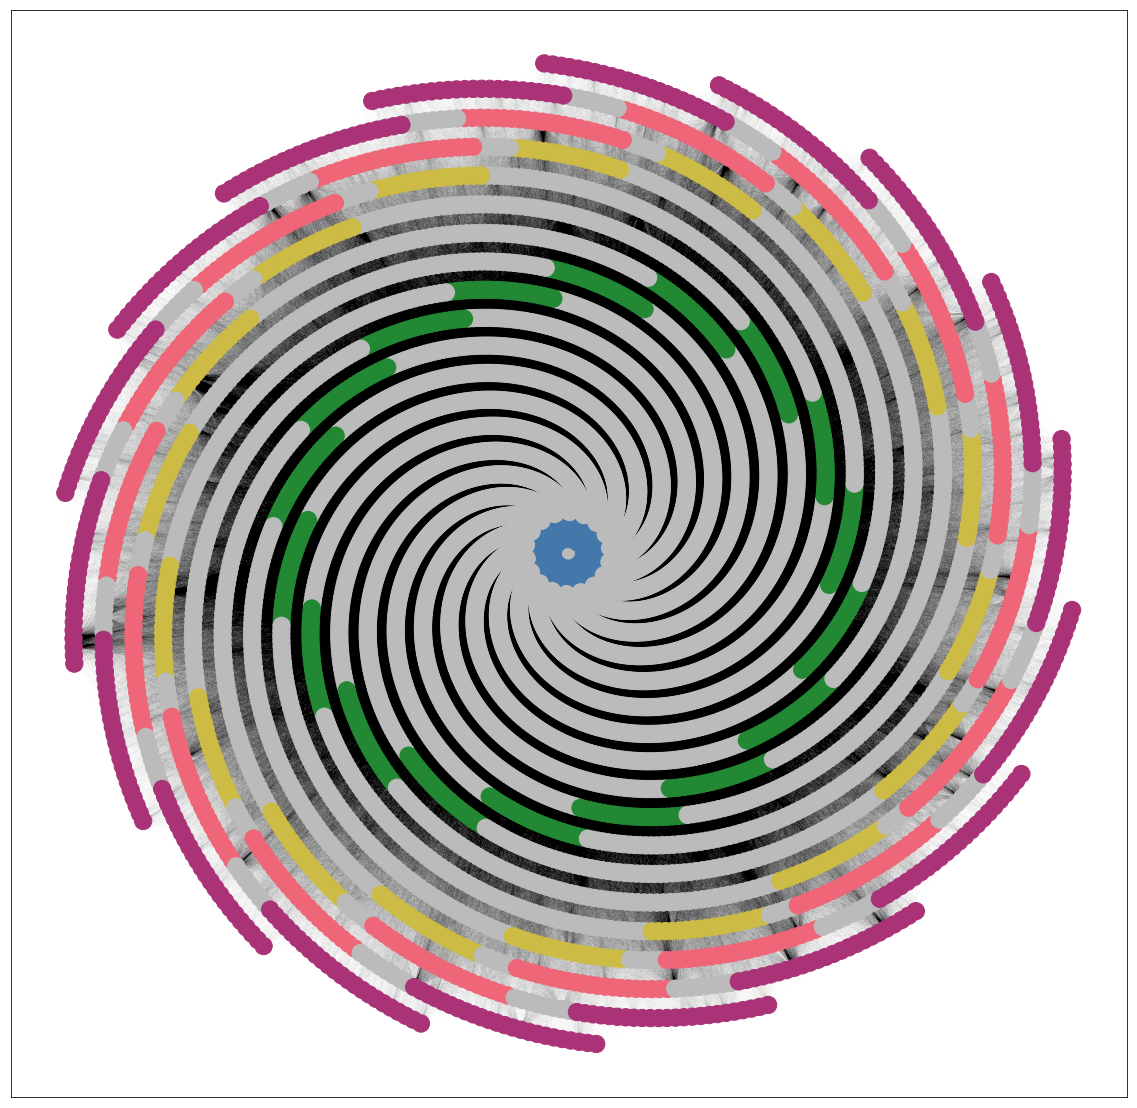

In [13]:
pos=nx.spiral_layout(g)
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(g, pos, node_color=node_col, alpha=1)
nx.draw_networkx_edges(g, pos, width=0.01, alpha=0.2)
#nx.draw_networkx_labels(g, pos, labels, font_size=5)
plt.savefig("/Users/advaitbalaji/Desktop/shakya_cores_spi_thin.png")

In [12]:
nx.__version__

'2.4'

In [17]:
corrected_shells[4147]

10

##### SHAKYA -c 25 -l 25

In [103]:
acc_dict = dict()
with open("../Data/index.txt","r") as inf:
    for line in inf:
        with open("../Data/Shakya_Headers/"+line.strip("\n"), "r") as ascf:
            for ascline in ascf:
                #print(ascline)
                acc_dict[ascline.split(' ')[0][1:]] = line.split(".")[0]
print(acc_dict)

{'NC_012483.1': 'Acidobacterium_capsulatum', 'NC_013926.1': 'Aciduliprofundum_boonei', 'NC_010655.1': 'Akkermansia_muciniphila', 'NC_000917.1': 'Archaeoglobus_fulgidus', 'NC_004663.1': 'Bacteroides_thetaiotaomicron', 'NC_004703.1': 'Bacteroides_thetaiotaomicron', 'NC_009614.1': 'Bacteroides_vulgatus', 'NC_019382.1': 'Bordetella_bronchiseptica', 'NC_007951.1': 'Burkholderia_xenovorans_LB400', 'NC_007952.1': 'Burkholderia_xenovorans_LB400', 'NC_007953.1': 'Burkholderia_xenovorans_LB400', 'NC_012034.1': 'Caldicellulosiruptor_bescii', 'NC_012036.1': 'Caldicellulosiruptor_bescii', 'NC_012037.1': 'Caldicellulosiruptor_bescii', 'NC_009437.1': 'Caldicellulosiruptor_saccharolyticus', 'NC_010803.1': 'Chlorobium_limicola', 'NC_010831.1': 'Chlorobium_phaeobacteroides', 'NC_009337.1': 'Chlorobium_phaeovibrioides', 'NC_002932.3': 'Chlorobium_tepidum', 'NC_010175.1': 'Chloroflexus_aurantiacus_J-10-fl', 'NC_009012.1': 'Clostridium_thermocellum', 'NC_001263.1': 'Deinococcus_radiodurans_R1', 'NC_001264.

In [11]:
pred_unitigs_oldlabel = [3, 4, 11, 13, 21, 34, 54, 61, 64, 68, 74, 87, 91, 101, 107, 152, 154, 155, 162, 164, 174, 176, 178, 192, 195, 197, 202, 203, 207, 210, 211, 213, 228, 236, 241, 244, 247, 251, 254, 283, 287, 300, 317, 321, 324, 333, 335, 336, 352, 355, 356, 370, 371, 372, 376, 379, 381, 387, 389, 392, 399, 410, 412, 420, 423, 428, 429, 431, 438, 440, 445, 446, 448, 457, 459, 466, 467, 469, 492, 495, 506, 512, 513, 524, 526, 528, 538, 543, 551, 557, 558, 566, 569, 570, 572, 578, 580, 583, 585, 587, 593, 596, 605, 614, 639, 641, 655, 657, 678, 683, 684, 689, 690, 696, 698, 703, 705, 707, 713, 714, 722, 724, 731, 734, 741, 742, 743, 747, 751, 755, 758, 759, 765, 777, 784, 785, 786, 791, 802, 805, 806, 807, 808, 816, 817, 822, 825, 835, 837, 845, 846, 849, 855, 856, 857, 858, 859, 861, 887, 892, 893, 901, 905, 907, 917, 921, 923, 932, 938, 941, 951, 952, 965, 969, 977, 980, 983, 986, 1005, 1009, 1011, 1014, 1022, 1028, 1029, 1032, 1037, 1043, 1044, 1045, 1046, 1047, 1057, 1061, 1064, 1066, 1086, 1089, 1100, 1104, 1109, 1113, 1124, 1135, 1141, 1142, 1144, 1148, 1150, 1158, 1161, 1162, 1165, 1168, 1174, 1178, 1184, 1210, 1211, 1219, 1228, 1229, 1230, 1233, 1235, 1245, 1247, 1254, 1256, 1266, 1268, 1282, 1283, 1291, 1296, 1297, 1298, 1302, 1316, 1317, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1332, 1334, 1339, 1342, 1353, 1356, 1367, 1382, 1394, 1398, 1400, 1403, 1406, 1407, 1409, 1412, 1422, 1432, 1439, 1445, 1446, 1447, 1458, 1481, 1482, 1484, 1485, 1487, 1493, 1496, 1507, 1512, 1519, 1527, 1530, 1532, 1535, 1536, 1538, 1541, 1542, 1553, 1558, 1561, 1568, 1585, 1594, 1597, 1599, 1601, 1605, 1606, 1616, 1617, 1620, 1622, 1625, 1627, 1630, 1631, 1634, 1637, 1645, 1646, 1657, 1659, 1661, 1675, 1679, 1680, 1683, 1684, 1694, 1696, 1706, 1707, 1710, 1716, 1717, 1736, 1737, 1744, 1745, 1750, 1751, 1765, 1766, 1767, 1769, 1786, 1792, 1796, 1806, 1810, 1815, 1816, 1818, 1828, 1829, 1831, 1845, 1846, 1855, 1856, 1857, 1864, 1870, 1871, 1893, 1895, 1896, 1897, 1899, 1903, 1911, 1919, 1921, 1922, 1926, 1939, 1940, 1942, 1944, 1945, 1958, 1991, 1994, 2003, 2005, 2010, 2017, 2020, 2023, 2024, 2040, 2044, 2051, 2058, 2064, 2071, 2073, 2074, 2080, 2083, 2084, 2087, 2091, 2092, 2095, 2098, 2104, 2110, 2123, 2124, 2128, 2131, 2140, 2154, 2155, 2158, 2159, 2168, 2169, 2171, 2174, 2176, 2178, 2186, 2188, 2192, 2194, 2205, 2208, 2210, 2215, 2223, 2233, 2234, 2235, 2237, 2244, 2259, 2263, 2281, 2288, 2289, 2290, 2292, 2294, 2298, 2302, 2308, 2317, 2320, 2325, 2329, 2332, 2336, 2340, 2342, 2345, 2347, 2349, 2355, 2363, 2376, 2379, 2389, 2393, 2400, 2406, 2413, 2414, 2416, 2432, 2436, 2437, 2447, 2448, 2453, 2469, 2470, 2471, 2473, 2479, 2481, 2484, 2485, 2486, 2487, 2501, 2504, 2505, 2509, 2513, 2515, 2517, 2520, 2526, 2531, 2536, 2542, 2543, 2547, 2551, 2553, 2557, 2567, 2568, 2573, 2583, 2592, 2602, 2604, 2617, 2621, 2629, 2634, 2637, 2653, 2654, 2656, 2667, 2673, 2679, 2690, 2699, 2701, 2705, 2710, 2727, 2728, 2729, 2730, 2735, 2736, 2737, 2741, 2745, 2755, 2765, 2768, 2773, 2774, 2794, 2797, 2813, 2820, 2832, 2841, 2842, 2846, 2847, 2848, 2853, 2854, 2863, 2864, 2867, 2868, 2869, 2871, 2872, 2873, 2874, 2881, 2895, 2896, 2900, 2901, 2905, 2907, 2911, 2913, 2915, 2931, 2939, 2948, 2953, 2956, 2958, 2964, 2970, 2976, 2977, 2979, 2982, 2984, 2989, 2996, 2998, 3009, 3014, 3015, 3016, 3017, 3018, 3022, 3024, 3025, 3027, 3030, 3032, 3036, 3038, 3039, 3045, 3047, 3057, 3066, 3074, 3083, 3088, 3098, 3103, 3105, 3107, 3113, 3120, 3121, 3131, 3133, 3134, 3135, 3137, 3140, 3142, 3143, 3146, 3170, 3175, 3177, 3183, 3193, 3207, 3208, 3209, 3210, 3219, 3240, 3242, 3244, 3248, 3252, 3255, 3256, 3260, 3261, 3277, 3292, 3294, 3295, 3296, 3309, 3311, 3348, 3349, 3359, 3363, 3369, 3371, 3372, 3378, 3382, 3402, 3408, 3418, 3419, 3426, 3428, 3434, 3438, 3455, 3456, 3462, 3467, 3472, 3476, 3478, 3481, 3496, 3499, 3505, 3512, 3535, 3537, 3543, 3547, 3567, 3579, 3584, 3587, 3605, 3617, 3621, 3624, 3627, 3631, 3632, 3634, 3643, 3653, 3668, 3669, 3670, 3680, 3681, 3683, 3686, 3687, 3688, 3696, 3706, 3712, 3714, 3717, 3720, 3731, 3736, 3739, 3744, 3745, 3755, 3758, 3761, 3764, 3770, 3771, 3772, 3773, 3774, 3775, 3783, 3792, 3795, 3799, 3801, 3809, 3810, 3819, 3837, 3851, 3861, 3866, 3876, 3883, 3894, 3898, 3899, 3901, 3902, 3907, 3917, 3920, 3939, 3947, 3956, 3957, 3958, 3962, 3964, 3981, 3982, 3995, 4005, 4008, 4018, 4020, 4032, 4041, 4042, 4046, 4056, 4057, 4058, 4062, 4068, 4074, 4077, 4078, 4079, 4081, 4082, 4083, 4090, 4095, 4101, 4107, 4112, 4115, 4122, 4123, 4124, 4126, 4129, 4148, 4152, 4155, 4158, 4169, 4170, 4176, 4186, 4188, 4191, 4193, 4194, 4197, 4203, 4204, 4205, 4211, 4219, 4223, 4227, 4228, 4231, 4233, 4239, 4245, 4251, 4252, 4253, 4259, 4260, 4265, 4282, 4283, 4285, 4295, 4306, 4308, 4315, 4324, 4325, 4327, 4328, 4342, 4344, 4352, 4382, 4385, 4393, 4394, 4400, 4401, 4406, 4408, 4412, 4413, 4415, 4416, 4417, 4418, 4420, 4424, 4426, 4428, 4431, 4437, 4438, 4439, 4440, 4442, 4443, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4461, 4462, 4463, 4469, 4481, 4499, 4501, 4502, 4504, 4513, 4515, 4518, 4519, 4520, 4533, 4537, 4541, 4549, 4550, 4551, 4552, 4558, 4567, 4568, 4577, 4587, 4626, 4627, 4631, 4632, 4634, 4639, 4648, 4649, 4652, 4659, 4664, 4665, 4668, 4677, 4678, 4679, 4688, 4690, 4692, 4695, 4698, 4707, 4725, 4729, 4730, 4735, 4741, 4745, 4746, 4748, 4749, 4751, 4752, 4754, 4755, 4756, 4759, 4786, 4791, 4795, 4811, 4823, 4828, 4838, 4839, 4840, 4849, 4854, 4856, 4861, 4883, 4889, 4899, 4911, 4912, 4913, 4914, 4915, 4919, 4921, 4922, 4947, 4952, 4953, 4955, 4966, 4967, 4969, 4981, 4998, 5001, 5002, 5007, 5008, 5016, 5017, 5018, 5021, 5025, 5033, 5037, 5040, 5041, 5042, 5047, 5057, 5067, 5077, 5078, 5082, 5085, 5087, 5088, 5089, 5094, 5098, 5103, 5105, 5107, 5113, 5128, 5129, 5130, 5133, 5134, 5139, 5140, 5141, 5143, 5144, 5147, 5150, 5160, 5166, 5167, 5170, 5175, 5176, 5178, 5183, 5191, 5203, 5204, 5206, 5209, 5212, 5228, 5230, 5236, 5244, 5245, 5252, 5255, 5260, 5265, 5266, 5269, 5271, 5272, 5275, 5311, 5321, 5322, 5325, 5330, 5332, 5335, 5336, 5340, 5341, 5347, 5349, 5356, 5371, 5372, 5373, 5374, 5383, 5385, 5389, 5391, 5396, 5407, 5410, 5428, 5429, 5430, 5432, 5434, 5437, 5439, 5440, 5441, 5442, 5443, 5446, 5449, 5453, 5467, 5481, 5482, 5487, 5493, 5503, 5507, 5515, 5528, 5539, 5540, 5552, 5569, 5570, 5571, 5572, 5575, 5576, 5585, 5586, 5587, 5590, 5598, 5605, 5611, 5616, 5617, 5621, 5630, 5631, 5639, 5647, 5648, 5649, 5650, 5652, 5657, 5658, 5663, 5672, 5676, 5680, 5682, 5691, 5702, 5715, 5719, 5725, 5727, 5736, 5738, 5739, 5747, 5748, 5749, 5750, 5776, 5777, 5779, 5786, 5790, 5803, 5806, 5810, 5818, 5836, 5838, 5840, 5841, 5843, 5850, 5851, 5854, 5858, 5861, 5862, 5864, 5865, 5870, 5877, 5881, 5882, 5889, 5897, 5898, 5899, 5901, 5903, 5905, 5907, 5908, 5909, 5912, 5915, 5925, 5930, 5934, 5940, 5952, 5962, 5964, 5968, 5976, 5990, 5993, 5994, 5996, 5997, 5999, 6001, 6003, 6005, 6008, 6011, 6013, 6029, 6039, 6040, 6044, 6071, 6082, 6092, 6098, 6103, 6104, 6109, 6110, 6111, 6114, 6115, 6125, 6129, 6133, 6136, 6142, 6147, 6156, 6174, 6177, 6179, 6181, 6187, 6188, 6200, 6202, 6204, 6209, 6214, 6217, 6221, 6224, 6226, 6228, 6231, 6232, 6236, 6245, 6267, 6269, 6270, 6273, 6281, 6284, 6294, 6295, 6297, 6302, 6309, 6314, 6319, 6320, 6329, 6330, 6331, 6332, 6335, 6336, 6344, 6363, 6369, 6380, 6383, 6395, 6402, 6407, 6408, 6410, 6419, 6421, 6430, 6437, 6438, 6441, 6448, 6451, 6457, 6467, 6468, 6476, 6483, 6485, 6486, 6488, 6495, 6500, 6506, 6518, 6519, 6527, 6532, 6539, 6541, 6543, 6545, 6547, 6548, 6549, 6551, 6558, 6559, 6565, 6567, 6569, 6572, 6595, 6618, 6636, 6645, 6648, 6652, 6653, 6654, 6655, 6667, 6669, 6670, 6672, 6676, 6679, 6682, 6683, 6692, 6709, 6721, 6724, 6725, 6727, 6729, 6742, 6767, 6769, 6770, 6772, 6775, 6787, 6801, 6804, 6809, 6819, 6823, 6827, 6828, 6832, 6838, 6840, 6841, 6843, 6844, 6848, 6849, 6852, 6856, 6863, 6872, 6875, 6881, 6882, 6885, 6889, 6897, 6898, 6899, 6901, 6903, 6909, 6913, 6914, 6915, 6921, 6931, 6934, 6935, 6938, 6946, 6949, 6955, 6961, 6963, 6967, 6977, 6985, 6986, 6989, 6997, 7003, 7011, 7013, 7016, 7021, 7032, 7040, 7042, 7048, 7051, 7058, 7061, 7064, 7066, 7067, 7068, 7084, 7085, 7094, 7096, 7098, 7100, 7102, 7108, 7112, 7114, 7123, 7128, 7131, 7148, 7150, 7151, 7165, 7172, 7173, 7174, 7179, 7188, 7195, 7200, 7212, 7213, 7217, 7218, 7220, 7225, 7227, 7230, 7231, 7235, 7243, 7249, 7250, 7265, 7270, 7273, 7284, 7297, 7300, 7303, 7313, 7317, 7320, 7325, 7338, 7339, 7340, 7344, 7345, 7358, 7363, 7387, 7391, 7393, 7394, 7395, 7397, 7399, 7404, 7406, 7407, 7417, 7421, 7438, 7452, 7453, 7455, 7461, 7462, 7468, 7477, 7489, 7496, 7497, 7500, 7506, 7508, 7513, 7517, 7522, 7524, 7525, 7526, 7527, 7529, 7532, 7535, 7536, 7539, 7542, 7546, 7547, 7553, 7562, 7566, 7569, 7581, 7586, 7590, 7602, 7612, 7619, 7620, 7622, 7623, 7629, 7646, 7647, 7649, 7651, 7654, 7656, 7662, 7663, 7675, 7677, 7683, 7686, 7691, 7699, 7716, 7717, 7720, 7723, 7724, 7725, 7726, 7728, 7729, 7734, 7738, 7742, 7743, 7746, 7747, 7749, 7752, 7754, 7758, 7776, 7780, 7781, 7783, 7790, 7805, 7809, 7817, 7818, 7821, 7826, 7829, 7831, 7841, 7850, 7852, 7860, 7866, 7872, 7876, 7881, 7883, 7890, 7893, 7903, 7913, 7917, 7920, 7921, 7924, 7931, 7937, 7948, 7952, 7962, 7965, 7966, 7967, 7970, 7971, 7975, 7977, 7978, 7981, 7988, 8002, 8005, 8020, 8033, 8034, 8037, 8039, 8040, 8044, 8049, 8050, 8081, 8087, 8090, 8091, 8093, 8094, 8106, 8107, 8108, 8124, 8132, 8136, 8142, 8145, 8147, 8163, 8165, 8170, 8171, 8172, 8180, 8182, 8199, 8204, 8210, 8211, 8212, 8214, 8215, 8251, 8257, 8258, 8267, 8274, 8277, 8279, 8281, 8286, 8293, 8294, 8297, 8298, 8306, 8309, 8326, 8327, 8340, 8341, 8357, 8362, 8365, 8370, 8371, 8377, 8379, 8388, 8390, 8407, 8408, 8409, 8416, 8430, 8438, 8444, 8446, 8451, 8470, 8471, 8479, 8480, 8486, 8489, 8490, 8491, 8502, 8503, 8505, 8506, 8512, 8517, 8518, 8519, 8533, 8550, 8553, 8556, 8557, 8558, 8564, 8571, 8578, 8582, 8586, 8592, 8593, 8606, 8609, 8613, 8615, 8616, 8619, 8636, 8641, 8645, 8657, 8665, 8679, 8680, 8682, 8687, 8688, 8693, 8696, 8714, 8720, 8725, 8738, 8744, 8748, 8750, 8773, 8780, 8786, 8787, 8788, 8793, 8798, 8804, 8805, 8806, 8812, 8813, 8816, 8824, 8828, 8829, 8830, 8833, 8835, 8836, 8838, 8842, 8856, 8861, 8864, 8871, 8873, 8875, 8876, 8880, 8884, 8886, 8888, 8889, 8891, 8908, 8914, 8928, 8932, 8938, 8939, 8945, 8946, 8947, 8954, 8958, 8968, 8987, 8991, 9006, 9012, 9021, 9028, 9031, 9032, 9034, 9035, 9036, 9038, 9040, 9041, 9043, 9047, 9048, 9055, 9058, 9064, 9080, 9081, 9099, 9101, 9110, 9113, 9115, 9119, 9121, 9133, 9134, 9135, 9137, 9138, 9144, 9151, 9165, 9176, 9179, 9187, 9190, 9192, 9193, 9194, 9197, 9203, 9207, 9211, 9219, 9223, 9226, 9227, 9232, 9233, 9235, 9239, 9247, 9248, 9250, 9254, 9261, 9262, 9263, 9264, 9270, 9285, 9287, 9297, 9299, 9305, 9306, 9309, 9315, 9316, 9317, 9320, 9326, 9329, 9330, 9363, 9374, 9376, 9385, 9390, 9391, 9395, 9396, 9399, 9400, 9401, 9417, 9427, 9428, 9431, 9432, 9436, 9438, 9439, 9440, 9442, 9449, 9451, 9452, 9454, 9461, 9465, 9471, 9472, 9474, 9476, 9477, 9483, 9486, 9487, 9499, 9503, 9510, 9513, 9518, 9523, 9526, 9536, 9543, 9547, 9553, 9558, 9559, 9565, 9566, 9571, 9575, 9581, 9591, 9592, 9598, 9600, 9604, 9607, 9609, 9610, 9616, 9618, 9619, 9620, 9621, 9622, 9623, 9624, 9626, 9633, 9636, 9642, 9646, 9651, 9661, 9667, 9674, 9678, 9679, 9686, 9694, 9701, 9704, 9711, 9718, 9720, 9727, 9728, 9735, 9737, 9739, 9751, 9768, 9769, 9771, 9780, 9784, 9785, 9787, 9794, 9801, 9803, 9804, 9806, 9810, 9821, 9822, 9827, 9838, 9843, 9857, 9858, 9862, 9868, 9875, 9877, 9879, 9880, 9889, 9890, 9905, 9906, 9908, 9909, 9910, 9912, 9913, 9915, 9921, 9929, 9930, 9931, 9947, 9954, 9958, 9971, 9978, 9982, 9989, 9992, 9994, 10002, 10008, 10012, 10013, 10014, 10015, 10050, 10060, 10062, 10065, 10070, 10081, 10084, 10090, 10091, 10092, 10098, 10101, 10108, 10111, 10120, 10133, 10145, 10149, 10150, 10151, 10155, 10156, 10159, 10163, 10166, 10173, 10174, 10177, 10182, 10184, 10187, 10188, 10192, 10198, 10202, 10207, 10209, 10210, 10211, 10214, 10215, 10218, 10223, 10225, 10232, 10234, 10237, 10238, 10239, 10240, 10243, 10246, 10248, 10255, 10259, 10279, 10282, 10287, 10299, 10303, 10305, 10317, 10323, 10328, 10334, 10341, 10344, 10347, 10348, 10350, 10356, 10362, 10371, 10372, 10376, 10389, 10401, 10407, 10413, 10432, 10438, 10441, 10445, 10469, 10470, 10481, 10483, 10484, 10485, 10492, 10493, 10498, 10502, 10504, 10506, 10511, 10514, 10520, 10521, 10533, 10534, 10536, 10537, 10548, 10562, 10563, 10566, 10571, 10573, 10576, 10579, 10587, 10589, 10593, 10597, 10606, 10611, 10620, 10621, 10624, 10625, 10626, 10630, 10635, 10637, 10647, 10650, 10652, 10660, 10672, 10683, 10686, 10692, 10695, 10701, 10702, 10703, 10709, 10710, 10713, 10728, 10729, 10733, 10735, 10737, 10750, 10752, 10755, 10760, 10772, 10790, 10796, 10800, 10802, 10814, 10819, 10821, 10822, 10824, 10826, 10857, 10864, 10869, 10872, 10873, 10882, 10908, 10915, 10933, 10944, 10946, 10959, 10971, 10973, 10978, 10981, 10982, 10986, 10994, 10995, 11010, 11012, 11017, 11019, 11022, 11023, 11030, 11031, 11044, 11050, 11057, 11060, 11063, 11064, 11071, 11083, 11091, 11093, 11096, 11101, 11102, 11105, 11109, 11111, 11113, 11119, 11137, 11156, 11158, 11160, 11167, 11168, 11173, 11174, 11177, 11188, 11189, 11192, 11194, 11199, 11207, 11216, 11220, 11221, 11223, 11232, 11252, 11253, 11255, 11258, 11262, 11263, 11266, 11270, 11272, 11277, 11280, 11282, 11287, 11289, 11294, 11299, 11303, 11308, 11311, 11312, 11315, 11327, 11344, 11346, 11352, 11363, 11372, 11378, 11380, 11381, 11385, 11386, 11387, 11390, 11391, 11401, 11406, 11409, 11416, 11417, 11427, 11430, 11433, 11435, 11440, 11443, 11448, 11452, 11453, 11460, 11463, 11464, 11467, 11478, 11479, 11498, 11526, 11528, 11530, 11535, 11536, 11551, 11572, 11573, 11576, 11580, 11581, 11583, 11604, 11606, 11608, 11612, 11613, 11615, 11618, 11630, 11632, 11633, 11634, 11640, 11644, 11646, 11647, 11649, 11662, 11663, 11669, 11670, 11671, 11675, 11676, 11678, 11684, 11687, 11692, 11694, 11695, 11700, 11711, 11712, 11714, 11723, 11725, 11731, 11735, 11737, 11739, 11741, 11754, 11764, 11797, 11806, 11810, 11812, 11813, 11834, 11836, 11839, 11841, 11844, 11862, 11867, 11868, 11869, 11870, 11872, 11881, 11888, 11892, 11904, 11907, 11913, 11914, 11917, 11927, 11928, 11930, 11933, 11934, 11936, 11937, 11949, 11959, 11960, 11961, 11968, 11972, 11978, 11983, 11988, 11996, 11999, 12001, 12004, 12010, 12017, 12018, 12019, 12023, 12028, 12035, 12064, 12067, 12070, 12085, 12091, 12095, 12096, 12098, 12100, 12103, 12115, 12116, 12117, 12136, 12146, 12156, 12164, 12165, 12171, 12175, 12181, 12182, 12183, 12184, 12185, 12189, 12190, 12194, 12195, 12220, 12221, 12230, 12231, 12236, 12245, 12254, 12255, 12256, 12262, 12266, 12267, 12269, 12273, 12275, 12292, 12300, 12308, 12309, 12310, 12312, 12313, 12315, 12316, 12317, 12323, 12324, 12335, 12339, 12342, 12349, 12357, 12370, 12374, 12377, 12378, 12381, 12383, 12385, 12388, 12391, 12393, 12409, 12411, 12429, 12443, 12446, 12459, 12473, 12477, 12479, 12480, 12483, 12504, 12505, 12517, 12518, 12526, 12528, 12529, 12537, 12564, 12566, 12567, 12579, 12580, 12599, 12610, 12615, 12617, 12622, 12628, 12640, 12643, 12649, 12650, 12658, 12660, 12674, 12676, 12687, 12693, 12699, 12701, 12704, 12706, 12718, 12719, 12723, 12725, 12734, 12736, 12737, 12738, 12740, 12741, 12742, 12744, 12746, 12755, 12764, 12766, 12772, 12773, 12786, 12791, 12794, 12801, 12802, 12807, 12811, 12816, 12819, 12829, 12830, 12835, 12840, 12843, 12844, 12863, 12864, 12868, 12871, 12873, 12876, 12878, 12884, 12891, 12897, 12901, 12905, 12908, 12914, 12917, 12918, 12919, 12932, 12940, 12946, 12947, 12951, 12952, 12953, 12961, 12962, 12963, 12968, 12969, 12975, 12977, 12979, 12980, 12981, 12983, 12984, 12995, 13000, 13001, 13002, 13005, 13008, 13015, 13018, 13019, 13020, 13023, 13024, 13025, 13027, 13031, 13036, 13041, 13045, 13050, 13052, 13057, 13065, 13066, 13068, 13070, 13084, 13092, 13095, 13101, 13108, 13117, 13123, 13134, 13135, 13139, 13142, 13154, 13155, 13161, 13162, 13164, 13166, 13172, 13177, 13180, 13201, 13204, 13209, 13216, 13221, 13226, 13230, 13235, 13242, 13243, 13248, 13251, 13257, 13271, 13274, 13280, 13283, 13284, 13286, 13287, 13295, 13301, 13305, 13308, 13319, 13321, 13332, 13336, 13346, 13353, 13356, 13360, 13369, 13370, 13379, 13386, 13390, 13391, 13393, 13399, 13404, 13413, 13414, 13424, 13431, 13440, 13441, 13442, 13443, 13444, 13456, 13457, 13460, 13461, 13462, 13465, 13469, 13473, 13482, 13485, 13491, 13509, 13518, 13521, 13524, 13536, 13542, 13543, 13546, 13551, 13568, 13575, 13577, 13578, 13579, 13584, 13587, 13593, 13597, 13604, 13606, 13610, 13615, 13616, 13626, 13627, 13635, 13637, 13638, 13640, 13641, 13645, 13652, 13653, 13655, 13656, 13658, 13660, 13667, 13678, 13684, 13689, 13701, 13713, 13715, 13716, 13720, 13739, 13742, 13744, 13748, 13749, 13750, 13759, 13767, 13769, 13775, 13785, 13788, 13800, 13802, 13809, 13824, 13827, 13833, 13842, 13845, 13846, 13849, 13851, 13852, 13854, 13855, 13861, 13865, 13872, 13882, 13883, 13890, 13892, 13896, 13898, 13900, 13903, 13915, 13922, 13924, 13945, 13946, 13950, 13954, 13958, 13962, 13963, 13965, 13973, 13978, 13981, 13986, 13987, 13988, 13994, 14005, 14008, 14018, 14020, 14023, 14032, 14044, 14053, 14061, 14070, 14071, 14080, 14087, 14089, 14103, 14105, 14112, 14124, 14128, 14136, 14141, 14151, 14159, 14164, 14171, 14173, 14174, 14185, 14186, 14200, 14201, 14202, 14208, 14221, 14224, 14226, 14227, 14231, 14235, 14236, 14242, 14245, 14248, 14251, 14266, 14268, 14269, 14270, 14273, 14275, 14276, 14277, 14281, 14285, 14287, 14288, 14290, 14309, 14313, 14322, 14328, 14338, 14347, 14359, 14365, 14371, 14376, 14381, 14386, 14388, 14389, 14390, 14394, 14400, 14402, 14412, 14416, 14418, 14426, 14445, 14446, 14448, 14449, 14460, 14461, 14464, 14467, 14469, 14472, 14479, 14480, 14482, 14489, 14492, 14493, 14494, 14495, 14503, 14506, 14508, 14510, 14512, 14519, 14523, 14532, 14535, 14537, 14538, 14542, 14548, 14553, 14554, 14561, 14570, 14581, 14582, 14595, 14597, 14598, 14601, 14608, 14618, 14623, 14625, 14627, 14630, 14631, 14639, 14642, 14645, 14658, 14662, 14681, 14682, 14683, 14684, 14685, 14687, 14694, 14707, 14708, 14710, 14721, 14722, 14724, 14725, 14726, 14727, 14737, 14738, 14741, 14744, 14749, 14750, 14771, 14778, 14780, 14781, 14790, 14798, 14802, 14804, 14807, 14808, 14816, 14823, 14828, 14831, 14842, 14844, 14847, 14850, 14851, 14852, 14859, 14860, 14865, 14879, 14881, 14885, 14888, 14890, 14892, 14895, 14896, 14900, 14901, 14906, 14910, 14915, 14917, 14926, 14927, 14931, 14933, 14935, 14937, 14941, 14943, 14946, 14951, 14954, 14959, 14960, 14961, 14971, 14972, 14973, 14984, 14986, 14987, 14988, 14994, 14998, 15000, 15002, 15008, 15013, 15023, 15025, 15027, 15029, 15037, 15038, 15040, 15049, 15050, 15057, 15088, 15105, 15109, 15111, 15114, 15115, 15120, 15127, 15137, 15139, 15144, 15147, 15149, 15156, 15157, 15159, 15161, 15166, 15171, 15174, 15175, 15176, 15179, 15180, 15184, 15196, 15197, 15199, 15208, 15215, 15218, 15219, 15222, 15234, 15279, 15280, 15283, 15284, 15290, 15294, 15308, 15314, 15317, 15336, 15341, 15346, 15351, 15365, 15366, 15372, 15376, 15379, 15384, 15388, 15389, 15390, 15395, 15396, 15423, 15424, 15432, 15437, 15449, 15456, 15460, 15469, 15478, 15486, 15489, 15490, 15495, 15501, 15502, 15507, 15511, 15515, 15516, 15520, 15522, 15534, 15535, 15546, 15569, 15572, 15574, 15586, 15587, 15593, 15594, 15599, 15601, 15609, 15610, 15611, 15617, 15618, 15619, 15627, 15630, 15634, 15636, 15639, 15641, 15642, 15644, 15645, 15648, 15653, 15656, 15661, 15667, 15668, 15671, 15680, 15683, 15691, 15694, 15706, 15715, 15725, 15726, 15727, 15741, 15742, 15747, 15748, 15763, 15765, 15777, 15779, 15781, 15782, 15783, 15787, 15788, 15789, 15792, 15797, 15798, 15801, 15817, 15819, 15842, 15849, 15850, 15851, 15862, 15879, 15880, 15883, 15898, 15899, 15900, 15910, 15911, 15915, 15916, 15929, 15936, 15937, 15938, 15955, 15957, 15966, 15968, 15970, 15973, 15974, 15979, 15988, 15989, 15990, 15993, 15996, 16018, 16020, 16030, 16031, 16049, 16054, 16057, 16070, 16078, 16092, 16097, 16098, 16107, 16108, 16114, 16121, 16123, 16124, 16136, 16137, 16138, 16144, 16151, 16152, 16164, 16165, 16170, 16182, 16183, 16190, 16203, 16205, 16207, 16214, 16216, 16232, 16235, 16247, 16254, 16273, 16292, 16304, 16308, 16321, 16323, 16326, 16337, 16340, 16351, 16353, 16358, 16359, 16368, 16372, 16384, 16385, 16391, 16396, 16397, 16400, 16403, 16408, 16409, 16415, 16425, 16438, 16440, 16451, 16457, 16460, 16467, 16479, 16490, 16494, 16501, 16505, 16507, 16511, 16512, 16513, 16514, 16515, 16519, 16520, 16526, 16533, 16543, 16548, 16556, 16568, 16590, 16592, 16593, 16595, 16600, 16602, 16609, 16618, 16625, 16636, 16644, 16651, 16655, 16656, 16657, 16660, 16667, 16684, 16685, 16693, 16699, 16708, 16712, 16728, 16736, 16751, 16753, 16754, 16757, 16759, 16760, 16767, 16776, 16782, 16783, 16787, 16788, 16817, 16818, 16821, 16822, 16827, 16832, 16834, 16835, 16836, 16839, 16844, 16847, 16848, 16858, 16867, 16869, 16878, 16880, 16887, 16888, 16894, 16903, 16906, 16907, 16908, 16915, 16916, 16930, 16938, 16939, 16940, 16947, 16953, 16954, 16960, 16977, 16985, 16988, 16990, 16992, 17002, 17003, 17004, 17007, 17011, 17012, 17013, 17014, 17015, 17029, 17030, 17033, 17040, 17062, 17064, 17067, 17075, 17087, 17096, 17097, 17098, 17108, 17110, 17112, 17115, 17116, 17121, 17128, 17129, 17144, 17146, 17156, 17158, 17161, 17162, 17168, 17183, 17192, 17193, 17197, 17205, 17211, 17217, 17226, 17233, 17234, 17235, 17236, 17244, 17248, 17253, 17256, 17262, 17276, 17290, 17291, 17306, 17307, 17308, 17322, 17325, 17336, 17340, 17343, 17350, 17351, 17353, 17365, 17371, 17375, 17380, 17403, 17405, 17406, 17407, 17411, 17412, 17418, 17426, 17429, 17430, 17438, 17440, 17441, 17447, 17448, 17451, 17456, 17458, 17464, 17472, 17473, 17482, 17504, 17506, 17510, 17511, 17512, 17524, 17538, 17540, 17545, 17547, 17548, 17550, 17554, 17555, 17564, 17566, 17569, 17579, 17580, 17581, 17594, 17600, 17605, 17614, 17632, 17633, 17636, 17637, 17655, 17663, 17666, 17672, 17673, 17674, 17679, 17681, 17690, 17691, 17694, 17695, 17709, 17719, 17722, 17727, 17730, 17732, 17735, 17739, 17746, 17748, 17753, 17754, 17756, 17757, 17769, 17776, 17778, 17786, 17791, 17792, 17798, 17800, 17801, 17803, 17815, 17818, 17819, 17833, 17836, 17837, 17847, 17849, 17853, 17855, 17857, 17869, 17874, 17875, 17886, 17887, 17896, 17899, 17913, 17917, 17919, 17920, 17930, 17942, 17950, 17951, 17953, 17954, 17959, 17961, 17963, 17964, 17967, 17968, 17972, 17978, 17980, 17982, 17984, 17990, 17998, 18009, 18010, 18016, 18017, 18023, 18034, 18043, 18044, 18050, 18058, 18078, 18079, 18091, 18092, 18102, 18108, 18117, 18119, 18120, 18131, 18139, 18141, 18146, 18158, 18160, 18161, 18167, 18173, 18181, 18182, 18190, 18191, 18211, 18213, 18216, 18220, 18222, 18226, 18227, 18239, 18254, 18256, 18264, 18265, 18274, 18275, 18287, 18288, 18290, 18297, 18298, 18302, 18311, 18332, 18346, 18347, 18349, 18350, 18360, 18361, 18368, 18385, 18400, 18401, 18405, 18406, 18416, 18419, 18421, 18423, 18428, 18433, 18439, 18459, 18475, 18485, 18501, 18502, 18506, 18507, 18517, 18519, 18521, 18522, 18524, 18526, 18533, 18539, 18540, 18543, 18545, 18546, 18548, 18553, 18554, 18558, 18559, 18566, 18594, 18596, 18597, 18600, 18604, 18607, 18608, 18624, 18628, 18629, 18631, 18636, 18640, 18641, 18643, 18644, 18645, 18653, 18664, 18676, 18678, 18680, 18690, 18692, 18693, 18698, 18701, 18704, 18709, 18711, 18718, 18727, 18736, 18739, 18740, 18742, 18748, 18752, 18757, 18760, 18761, 18770, 18771, 18773, 18783, 18784, 18788, 18796, 18797, 18801, 18802, 18812, 18816, 18823, 18825, 18835, 18844, 18854, 18872, 18875, 18877, 18883, 18885, 18886, 18887, 18888, 18890, 18893, 18894, 18895, 18897, 18915, 18916, 18917, 18918, 18921, 18922, 18929, 18930, 18932, 18939, 18940, 18954, 18968, 18977, 18983, 18995, 19005, 19006, 19008, 19009, 19024, 19028, 19045, 19059, 19074, 19079, 19085, 19086, 19093, 19096, 19101, 19102, 19103, 19105, 19108, 19121, 19122, 19123, 19130, 19139, 19147, 19148, 19151, 19153, 19155, 19159, 19160, 19167, 19168, 19170, 19171, 19173, 19182, 19187, 19193, 19209, 19211, 19218, 19219, 19220, 19222, 19225, 19226, 19228, 19234, 19235, 19236, 19241, 19249, 19250, 19251, 19259, 19276, 19278, 19279, 19281, 19291, 19296, 19299, 19300, 19324, 19334, 19348, 19363, 19366, 19376, 19380, 19383, 19390, 19408, 19409, 19411, 19414, 19415, 19425, 19429, 19431, 19433, 19436, 19438, 19440, 19443, 19450, 19453, 19455, 19458, 19461, 19462, 19473, 19486, 19497, 19501, 19504, 19507, 19519, 19524, 19526, 19538, 19548, 19550, 19551, 19552, 19555, 19560, 19567, 19573, 19591, 19593, 19604, 19615, 19616, 19617, 19622, 19632, 19635, 19641, 19647, 19650, 19651, 19655, 19657, 19661, 19664, 19670, 19679, 19682, 19685, 19692, 19695, 19697, 19698, 19702, 19703, 19720, 19725, 19729, 19731, 19743, 19746, 19750, 19752, 19755, 19762, 19769, 19773, 19775, 19789, 19817, 19821, 19836, 19841, 19844, 19847, 19856, 19870, 19874, 19877, 19882, 19885, 19893, 19901, 19908, 19915, 19919, 19924, 19934, 19940, 19941, 19943, 19947, 19963, 19966, 19973, 19975, 19976, 19979, 19981, 19983, 19990, 19992, 19994, 19995, 20005, 20017, 20021, 20022, 20024, 20025, 20032, 20034, 20041, 20047, 20058, 20075, 20082, 20095, 20099, 20100, 20115, 20120, 20124, 20128, 20135, 20144, 20150, 20155, 20158, 20170, 20175, 20180, 20181, 20196, 20210, 20213, 20215, 20217, 20218, 20220, 20221, 20222, 20225, 20236, 20237, 20241, 20262, 20263, 20269, 20278, 20289, 20301, 20303, 20309, 20310, 20313, 20314, 20315, 20318, 20319, 20328, 20363, 20369, 20374, 20378, 20383, 20392, 20401, 20408, 20410, 20411, 20422, 20425, 20426, 20432, 20441, 20442, 20446, 20447, 20449, 20466, 20473, 20475, 20479, 20486, 20488, 20500, 20502, 20518, 20520, 20521, 20524, 20534, 20555, 20556, 20559, 20560, 20562, 20563, 20568, 20573, 20577, 20579, 20582, 20584, 20585, 20588, 20595, 20602, 20606, 20611, 20618, 20620, 20621, 20625, 20629, 20639, 20640, 20641, 20646, 20647, 20652, 20653, 20658, 20661, 20674, 20690, 20704, 20707, 20709, 20711, 20712, 20714, 20715, 20719, 20720, 20734, 20741, 20755, 20756, 20758, 20763, 20778, 20779, 20781, 20783, 20784, 20788, 20795, 20798, 20810, 20811, 20814, 20820, 20824, 20833, 20840, 20846, 20847, 20848, 20875, 20880, 20882, 20884, 20896, 20900, 20902, 20907, 20909, 20916, 20918, 20924, 20928, 20931, 20935, 20937, 20938, 20943, 20945, 20949, 20951, 20953, 20980, 20982, 20998, 21003, 21005, 21007, 21008, 21010, 21020, 21022, 21027, 21028, 21037, 21042, 21047, 21057, 21061, 21066, 21078, 21080, 21094, 21097, 21102, 21104, 21114, 21115, 21116, 21117, 21118, 21120, 21122, 21137, 21142, 21144, 21148, 21152, 21158, 21167, 21171, 21177, 21178, 21180, 21183, 21185, 21191, 21197, 21198, 21199, 21202, 21208, 21212, 21213, 21217, 21219, 21226, 21227, 21239, 21250, 21252, 21271, 21284, 21296, 21298, 21307, 21316, 21339, 21340, 21341, 21342, 21348, 21356, 21359, 21373, 21377, 21385, 21392, 21393, 21396, 21398, 21402, 21431, 21443, 21452, 21453, 21455, 21456, 21462, 21473, 21474, 21475, 21482, 21485, 21486, 21493, 21495, 21496, 21501, 21503, 21517, 21519, 21520, 21524, 21525, 21537, 21539, 21544, 21560, 21567, 21568, 21581, 21594, 21595, 21598, 21600, 21616, 21617, 21620, 21622, 21624, 21627, 21633, 21635, 21638, 21654, 21655, 21663, 21665, 21675, 21676, 21677, 21678, 21682, 21683, 21686, 21695, 21696, 21697, 21704, 21712, 21713, 21718, 21719, 21724, 21729, 21736, 21739, 21740, 21741, 21749, 21751, 21766, 21769, 21772, 21775, 21781, 21792, 21795, 21810, 21811, 21813, 21815, 21819, 21829, 21833, 21842, 21851, 21854, 21856, 21864, 21877, 21881, 21882, 21885, 21889, 21892, 21894, 21917, 21928, 21931, 21933, 21937, 21940, 21957, 21964, 21965, 21966, 21967, 21980, 21983, 21992, 22002, 22012, 22026, 22030, 22034, 22045, 22052, 22054, 22061, 22064, 22065, 22066, 22071, 22075, 22076, 22082, 22084, 22092, 22103, 22104, 22122, 22123, 22132, 22140, 22141, 22151, 22152, 22156, 22170, 22171, 22173, 22182, 22184, 22186, 22187, 22189, 22190, 22191, 22198, 22199, 22213, 22215, 22223, 22226, 22228, 22235, 22245, 22250, 22251, 22252, 22255, 22279, 22289, 22290, 22296, 22298, 22302, 22315, 22324, 22334, 22339, 22361, 22362, 22363, 22364, 22366, 22377, 22378, 22382, 22384, 22385, 22387, 22390, 22395, 22398, 22432, 22447, 22454, 22460, 22463, 22470, 22471, 22487, 22490, 22492, 22497, 22499, 22503, 22504, 22506, 22508, 22510, 22517, 22525, 22535, 22539, 22546, 22549, 22551, 22552, 22553, 22556, 22589, 22591, 22603, 22610, 22616, 22618, 22619, 22622, 22625, 22629, 22639, 22641, 22646, 22647, 22654, 22656, 22674, 22677, 22678, 22688, 22691, 22692, 22694, 22697, 22704, 22707, 22708, 22722, 22725, 22738, 22739, 22742, 22745, 22746, 22750, 22768, 22778, 22785, 22788, 22789, 22800, 22801, 22802, 22810, 22811, 22814, 22818, 22824, 22829, 22830, 22842, 22853, 22868, 22871, 22880, 22882, 22884, 22885, 22886, 22895, 22903, 22906, 22911, 22914, 22919, 22929, 22935, 22946, 22967, 22972, 22973, 22974, 22975, 22976, 23007, 23010, 23014, 23020, 23036, 23037, 23043, 23051, 23052, 23064, 23074, 23075, 23083, 23084, 23085, 23090, 23092, 23094, 23102, 23103, 23105, 23106, 23120, 23122, 23127, 23136, 23143, 23148, 23149, 23164, 23190, 23198, 23200, 23205, 23207, 23215, 23217, 23223, 23226, 23228, 23235, 23240, 23243, 23251, 23252, 23256, 23263, 23265, 23268, 23270, 23275, 23276, 23283, 23288, 23289, 23299, 23303, 23304, 23306, 23311, 23313, 23316, 23319, 23324, 23329, 23357, 23374, 23376, 23386, 23387, 23390, 23395, 23396, 23397, 23401, 23402, 23403, 23405, 23409, 23414, 23418, 23420, 23422, 23423, 23431, 23435, 23467, 23480, 23487, 23488, 23500, 23504, 23506, 23508, 23510, 23512, 23514, 23515, 23525, 23528, 23531, 23536, 23540, 23542, 23544, 23546, 23555, 23563, 23568, 23573, 23576, 23579, 23580, 23581, 23587, 23591, 23600, 23602, 23609, 23615, 23626, 23630, 23672, 23673, 23677, 23681, 23687, 23691, 23692, 23698, 23718, 23719, 23725, 23728, 23729, 23743, 23749, 23752, 23755, 23757, 23763, 23766, 23767, 23769, 23790, 23817, 23823, 23827, 23837, 23842, 23846, 23850, 23851, 23856, 23857, 23859, 23862, 23871, 23878, 23883, 23884, 23896, 23906, 23907, 23908, 23912, 23913, 23914, 23915, 23916, 23918, 23919, 23920, 23930, 23934, 23939, 23943, 23949, 23957, 23958, 23964, 23965, 23967, 23973, 23974, 23982, 23984, 23999, 24003, 24007, 24011, 24013, 24014, 24015, 24017, 24020, 24027, 24028, 24029, 24030, 24031, 24046, 24048, 24058, 24070, 24073, 24074, 24075, 24081, 24082, 24083, 24093, 24096, 24099, 24101, 24105, 24108, 24116, 24119, 24120, 24121, 24130, 24131, 24132, 24133, 24135, 24148, 24153, 24158, 24159, 24160, 24162, 24165, 24166, 24167, 24168, 24169, 24170, 24172, 24174, 24181, 24187, 24192, 24199, 24202, 24205, 24212, 24216, 24224, 24230, 24232, 24239, 24242, 24253, 24259, 24260, 24266, 24279, 24293, 24294, 24298, 24301, 24302, 24303, 24306, 24317, 24321, 24332, 24333, 24340, 24341, 24346, 24350, 24357, 24381, 24394, 24405, 24409, 24410, 24411, 24417, 24418, 24433, 24446, 24448, 24456, 24465, 24469, 24471, 24479, 24496, 24500, 24501, 24512, 24518, 24519, 24525, 24543, 24548, 24550, 24557, 24560, 24570, 24576, 24577, 24578, 24583, 24587, 24589, 24596, 24599, 24618, 24637, 24643, 24650, 24654, 24658, 24659, 24662, 24663, 24665, 24668, 24669, 24686, 24688, 24696, 24701, 24703, 24715, 24716, 24718, 24720, 24721, 24724, 24725, 24728, 24729, 24730, 24733, 24738, 24739, 24741, 24747, 24749, 24753, 24766, 24770, 24772, 24777, 24779, 24789, 24798, 24814, 24816, 24817, 24819, 24830, 24836, 24839, 24844, 24860, 24865, 24870, 24876, 24883, 24889, 24891, 24892, 24895, 24896, 24898, 24903, 24905, 24906, 24908, 24912, 24917, 24918, 24926, 24927, 24928, 24929, 24932, 24933, 24934, 24936, 24937, 24959, 24963, 24968, 24969, 24975, 24976, 24978, 24986, 24993, 24994, 24995, 24999, 25005, 25008, 25010, 25012, 25022, 25027, 25030, 25032, 25035, 25036, 25037, 25053, 25054, 25056, 25058, 25059, 25065, 25071, 25072, 25090, 25095, 25099, 25100, 25102, 25105, 25118, 25119, 25122, 25129, 25141, 25143, 25167, 25169, 25170, 25175, 25176, 25179, 25181, 25182, 25184, 25191, 25201, 25210, 25214, 25216, 25217, 25219, 25233, 25234, 25240, 25256, 25258, 25266, 25268, 25291, 25301, 25302, 25304, 25309, 25314, 25315, 25324, 25334, 25335, 25337, 25347, 25348, 25353, 25356, 25358, 25385, 25397, 25403, 25405, 25406, 25409, 25419, 25423, 25424, 25428, 25429, 25441, 25445, 25461, 25469, 25480, 25485, 25489, 25490, 25499, 25513, 25523, 25524, 25529, 25531, 25546, 25559, 25564, 25565, 25570, 25573, 25575, 25577, 25578, 25579, 25584, 25586, 25599, 25600, 25602, 25607, 25608, 25616, 25619, 25621, 25625, 25626, 25628, 25632, 25647, 25649, 25650, 25655, 25659, 25678, 25681, 25685, 25687, 25690, 25706, 25713, 25717, 25720, 25723, 25733, 25735, 25743, 25752, 25753, 25757, 25768, 25783, 25796, 25797, 25799, 25802, 25812, 25816, 25819, 25824, 25825, 25829, 25832, 25835, 25851, 25852, 25853, 25857, 25858, 25860, 25866, 25876, 25879, 25885, 25894, 25896, 25905, 25915, 25916, 25919, 25923, 25924, 25932, 25940, 25946, 25947, 25950, 25951, 25954, 25956, 25958, 25965, 25980, 25997, 26009, 26010, 26011, 26012, 26022, 26029, 26031, 26049, 26053, 26059, 26060, 26062, 26068, 26069, 26075, 26080, 26082, 26086, 26090, 26099, 26104, 26105, 26116, 26128, 26129, 26135, 26137, 26139, 26157, 26163, 26164, 26167, 26187, 26199, 26200, 26201, 26204, 26214, 26217, 26220, 26221, 26226, 26235, 26236, 26240, 26248, 26251, 26256, 26259, 26265, 26269, 26273, 26283, 26284, 26285, 26286, 26288, 26290, 26301, 26304, 26315, 26317, 26321, 26334, 26340, 26350, 26361, 26363, 26366, 26373, 26384, 26386, 26388, 26391, 26400, 26404, 26406, 26409, 26414, 26415, 26418, 26426, 26427, 26430, 26433, 26438, 26443, 26447, 26448, 26449, 26450, 26464, 26465, 26473, 26474, 26476, 26488, 26490, 26491, 26494, 26512, 26519, 26520, 26521, 26530, 26531, 26534, 26535, 26543, 26554, 26561, 26562, 26563, 26565, 26571, 26572, 26575, 26586, 26591, 26592, 26593, 26599, 26614, 26616, 26631, 26632, 26639, 26649, 26651, 26660, 26661, 26662, 26663, 26664, 26665, 26666, 26667, 26677, 26678, 26685, 26686, 26698, 26704, 26707, 26708, 26709, 26718, 26719, 26733, 26738, 26745, 26766, 26769, 26772, 26773, 26782, 26784, 26788, 26808, 26810, 26821, 26823, 26831, 26837, 26838, 26848, 26867, 26868, 26874, 26876, 26877, 26888, 26889, 26893, 26899, 26905, 26908, 26917, 26922, 26929, 26951, 26952, 26953, 26954, 26962, 26964, 26971, 26975, 26983, 26988, 26995, 26997, 26998, 27001, 27002, 27005, 27007, 27011, 27017, 27018, 27021, 27026, 27028, 27033, 27041, 27044, 27048, 27049, 27061, 27066, 27068, 27069, 27070, 27078, 27080, 27082, 27088, 27089, 27092, 27099, 27101, 27109, 27127, 27138, 27141, 27165, 27166, 27172, 27177, 27183, 27187, 27188, 27189, 27194, 27195, 27214, 27230, 27232, 27233, 27235, 27243, 27246, 27249, 27253, 27258, 27266, 27281, 27303, 27306, 27315, 27323, 27331, 27332, 27334, 27335, 27344, 27350, 27351, 27357, 27359, 27360, 27364, 27374, 27375, 27381, 27384, 27390, 27404, 27413, 27424, 27425, 27436, 27437, 27438, 27446, 27451, 27453, 27458, 27460, 27465, 27472, 27484, 27487, 27490, 27502, 27507, 27511, 27517, 27518, 27522, 27534, 27535, 27544, 27547, 27549, 27550, 27553, 27555, 27565, 27570, 27582, 27586, 27588, 27589, 27590, 27591, 27604, 27609, 27613, 27617, 27619, 27622, 27624, 27634, 27637, 27638, 27639, 27641, 27642, 27658, 27660, 27673, 27688, 27690, 27698, 27704, 27714, 27716, 27721, 27722, 27724, 27726, 27728, 27729, 27747, 27751, 27758, 27761, 27762, 27765, 27766, 27767, 27768, 27769, 27771, 27805, 27809, 27811, 27812, 27813, 27817, 27822, 27823, 27826, 27838, 27845, 27847, 27851, 27852, 27856, 27860, 27861, 27866, 27874, 27878, 27883, 27885, 27895, 27904, 27913, 27930, 27932, 27939, 27943, 27946, 27957, 27959, 27960, 27964, 27973, 27975, 27980, 27995, 27996, 27997, 27999, 28000, 28001, 28010, 28023, 28036, 28039, 28041, 28043, 28048, 28049, 28051, 28052, 28054, 28063, 28066, 28069, 28080, 28096, 28104, 28105, 28111, 28129, 28143, 28158, 28178, 28179, 28184, 28190, 28192, 28193, 28194, 28195, 28201, 28204, 28205, 28206, 28207, 28208, 28223, 28225, 28226, 28231, 28232, 28235, 28239, 28240, 28241, 28253, 28268, 28269, 28270, 28271, 28275, 28300, 28303, 28320, 28325, 28326, 28345, 28355, 28356, 28357, 28361, 28363, 28385, 28389, 28391, 28393, 28397, 28400, 28401, 28402, 28403, 28406, 28407, 28413, 28421, 28427, 28437, 28441, 28450, 28461, 28462, 28464, 28465, 28467, 28468, 28470, 28476, 28479, 28483, 28485, 28502, 28521, 28528, 28529, 28538, 28541, 28546, 28551, 28559, 28575, 28578, 28579, 28581, 28582, 28585, 28586, 28587, 28592, 28595, 28606, 28608, 28617, 28622, 28630, 28631, 28636, 28637, 28648, 28658, 28670, 28674, 28675, 28691, 28692, 28695, 28700, 28702, 28706, 28709, 28710, 28732, 28737, 28744, 28747, 28748, 28754, 28762, 28767, 28774, 28781, 28782, 28784, 28787, 28788, 28790, 28803, 28807, 28808, 28811, 28818, 28820, 28825, 28840, 28842, 28850, 28856, 28858, 28861, 28863, 28864, 28874, 28878, 28888, 28889, 28892, 28895, 28896, 28898, 28899, 28912, 28915, 28935, 28938, 28939, 28956, 28967, 28970, 28972, 28973, 28974, 28977, 28984, 28985, 28986, 28990, 28991, 28992, 28998, 29001, 29005, 29007, 29012, 29016, 29018, 29049, 29052, 29056, 29060, 29064, 29068, 29069, 29079, 29097, 29100, 29103, 29104, 29108, 29112, 29114, 29125, 29126, 29129, 29130, 29134, 29148, 29149, 29156, 29158, 29161, 29168, 29181, 29186, 29187, 29193, 29196, 29199, 29200, 29215, 29220, 29227, 29228, 29230, 29246, 29247, 29248, 29249, 29250, 29251, 29252, 29253, 29254, 29255, 29274, 29283, 29298, 29300, 29303, 29316, 29317, 29323, 29328, 29336, 29344, 29346, 29352, 29367, 29376, 29378, 29379, 29383, 29389, 29398, 29403, 29409, 29412, 29414, 29417, 29421, 29428, 29430, 29443, 29452, 29459, 29470, 29472, 29477, 29483, 29486, 29494, 29507, 29508, 29520, 29521, 29525, 29539, 29541, 29543, 29545, 29552, 29553, 29561, 29567, 29568, 29581, 29582, 29585, 29587, 29588, 29592, 29597, 29603, 29612, 29620, 29621, 29632, 29638, 29639, 29641, 29642, 29658, 29663, 29665, 29669, 29670, 29679, 29688, 29693, 29695, 29696, 29708, 29709, 29715, 29723, 29725, 29733, 29738, 29741, 29744, 29747, 29752, 29755, 29760, 29765, 29769, 29772, 29779, 29780, 29787, 29795, 29800, 29801, 29807, 29810, 29824, 29831, 29840, 29844, 29845, 29855, 29856, 29857, 29860, 29861, 29863, 29864, 29865, 29867, 29868, 29872, 29875, 29877, 29883, 29890, 29903, 29904, 29911, 29916, 29929, 29931, 29941, 29946, 29947, 29948, 29956, 29979, 29992, 29994, 29996, 30007, 30013, 30015, 30020, 30022, 30025, 30031, 30037, 30042, 30048, 30051, 30059, 30068, 30076, 30092, 30099, 30100, 30105, 30108, 30119, 30128, 30134, 30137, 30138, 30140, 30152, 30153, 30156, 30158, 30170, 30171, 30174, 30176, 30186, 30196, 30200, 30205, 30209, 30211, 30215, 30229, 30231, 30234, 30245, 30257, 30258, 30263, 30274, 30275, 30280, 30286, 30287, 30288, 30289, 30298, 30304, 30308, 30323, 30331, 30338, 30341, 30346, 30350, 30351, 30364, 30372, 30387, 30389, 30390, 30394, 30396, 30397, 30404, 30422, 30425, 30435, 30453, 30454, 30460, 30464, 30465, 30476, 30477, 30485, 30487, 30491, 30493, 30497, 30498, 30501, 30513, 30516, 30517, 30518, 30528, 30538, 30542, 30545, 30547, 30550, 30551, 30569, 30570, 30575, 30578, 30588, 30591, 30602, 30605, 30609, 30610, 30612, 30614, 30619, 30621, 30623, 30626, 30627, 30629, 30630, 30634, 30646, 30650, 30654, 30659, 30665, 30666, 30667, 30668, 30669, 30670, 30673, 30686, 30687, 30698, 30725, 30727, 30728, 30732, 30739, 30743, 30744, 30770, 30771, 30775, 30788, 30789, 30799, 30802, 30821, 30825, 30833, 30835, 30838, 30839, 30843, 30845, 30847, 30855, 30869, 30875, 30877, 30880, 30882, 30897, 30906, 30908, 30909, 30914, 30919, 30926, 30935, 30936, 30939, 30940, 30944, 30945, 30947, 30953, 30955, 30958, 30969, 30970, 30972, 30988, 30992, 31001, 31002, 31004, 31015, 31018, 31020, 31027, 31029, 31033, 31042, 31050, 31054, 31060, 31064, 31066, 31067, 31069, 31073, 31080, 31094, 31119, 31120, 31121, 31125, 31129, 31136, 31139, 31141, 31151, 31163, 31166, 31173, 31176, 31185, 31186, 31196, 31197, 31198, 31199, 31200, 31203, 31207, 31214, 31215, 31221, 31225, 31235, 31238, 31242, 31247, 31250, 31269, 31271, 31273, 31274, 31276, 31289, 31291, 31292, 31299, 31311, 31319, 31324, 31326, 31330, 31331, 31340, 31341, 31342, 31343, 31348, 31354, 31355, 31368, 31379, 31387, 31390, 31391, 31394, 31400, 31425, 31438, 31443, 31447, 31448, 31449, 31454, 31455, 31459, 31466, 31470, 31477, 31485, 31487, 31488, 31489, 31509, 31514, 31520, 31527, 31528, 31530, 31540, 31541, 31560, 31572, 31574, 31581, 31591, 31593, 31594, 31597, 31598, 31600, 31602, 31605, 31609, 31627, 31629, 31630, 31635, 31640, 31650, 31651, 31653, 31658, 31662, 31663, 31669, 31671, 31681, 31690, 31695, 31698, 31700, 31702, 31707, 31709, 31721, 31726, 31727, 31729, 31733, 31741, 31742, 31744, 31746, 31749, 31755, 31757, 31761, 31774, 31776, 31790, 31793, 31807, 31808, 31812, 31814, 31821, 31823, 31824, 31831, 31837, 31861, 31880, 31881, 31893, 31902, 31909, 31910, 31915, 31922, 31929, 31930, 31932, 31945, 31951, 31953, 31955, 31961, 31973, 31976, 31980, 31984, 31985, 31992, 31994, 32007, 32010, 32013, 32025, 32029, 32032, 32034, 32035, 32040, 32044, 32045, 32048, 32049, 32053, 32058, 32060, 32075, 32077, 32085, 32088, 32103, 32107, 32109, 32114, 32115, 32121, 32131, 32141, 32147, 32151, 32154, 32160, 32170, 32171, 32176, 32181, 32186, 32189, 32190, 32191, 32193, 32221, 32222, 32235, 32237, 32246, 32253, 32255, 32257, 32259, 32260, 32261, 32266, 32278, 32280, 32286, 32291, 32292, 32295, 32297, 32307, 32311, 32313, 32314, 32318, 32329, 32330, 32336, 32347, 32352, 32353, 32359, 32367, 32368, 32372, 32381, 32401, 32419, 32429, 32431, 32433, 32435, 32439, 32441, 32455, 32457, 32458, 32464, 32469, 32478, 32485, 32491, 32495, 32496, 32509, 32510, 32522, 32525, 32534, 32537, 32538, 32541, 32543, 32545, 32559, 32565, 32569, 32575, 32576, 32585, 32586, 32587, 32588, 32592, 32598, 32610, 32614, 32621, 32624, 32625, 32626, 32632, 32637, 32639, 32643, 32646, 32653, 32656, 32661, 32663, 32665, 32666, 32686, 32687, 32697, 32711, 32735, 32739, 32748, 32763, 32764, 32769, 32770, 32794, 32801, 32811, 32823, 32827, 32829, 32830, 32832, 32834, 32835, 32837, 32838, 32847, 32851, 32854, 32859, 32870, 32885, 32886, 32887, 32899, 32908, 32911, 32916, 32925, 32927, 32935, 32936, 32937, 32940, 32941, 32942, 32947, 32948, 32952, 32961, 32970, 32974, 32981, 32984, 32985, 32987, 32989, 32992, 32993, 32997, 32999, 33006, 33007, 33013, 33024, 33030, 33033, 33050, 33058, 33059, 33060, 33061, 33080, 33082, 33088, 33091, 33093, 33095, 33100, 33104, 33107, 33122, 33124, 33140, 33154, 33164, 33174, 33179, 33182, 33186, 33187, 33189, 33195, 33201, 33203, 33208, 33216, 33225, 33230, 33238, 33240, 33241, 33243, 33245, 33247, 33257, 33268, 33282, 33284, 33285, 33288, 33304, 33308, 33310, 33312, 33319, 33321, 33325, 33332, 33365, 33367, 33370, 33381, 33391, 33405, 33407, 33414, 33421, 33422, 33428, 33429, 33435, 33437, 33438, 33440, 33444, 33453, 33457, 33459, 33460, 33475, 33481, 33483, 33484, 33491, 33492, 33493, 33516, 33525, 33528, 33533, 33535, 33542, 33549, 33557, 33564, 33577, 33583, 33585, 33595, 33601, 33603, 33611, 33613, 33614, 33619, 33628, 33629, 33655, 33660, 33664, 33675, 33685, 33687, 33691, 33693, 33700, 33703, 33710, 33713, 33714, 33715, 33716, 33717, 33726, 33728, 33729, 33732, 33739, 33749, 33753, 33756, 33761, 33770, 33776, 33777, 33783, 33785, 33792, 33796, 33798, 33804, 33806, 33812, 33813, 33826, 33831, 33832, 33837, 33839, 33841, 33844, 33863, 33866, 33869, 33873, 33882, 33888, 33890, 33892, 33919, 33925, 33932, 33939, 33940, 33944, 33950, 33956, 33957, 33965, 33972, 33973, 33984, 34003, 34010, 34018, 34023, 34032, 34033, 34042, 34043, 34044, 34047, 34048, 34049, 34056, 34071, 34075, 34079, 34085, 34086, 34104, 34118, 34120, 34137, 34146, 34147, 34149, 34152, 34161, 34162, 34167, 34169, 34173, 34178, 34183, 34184, 34186, 34187, 34191, 34199, 34212, 34218, 34222, 34223, 34233, 34245, 34253, 34257, 34260, 34267, 34268, 34279, 34280, 34281, 34283, 34284, 34288, 34290, 34298, 34313, 34314, 34315, 34316, 34324, 34325, 34326, 34329, 34330, 34351, 34355, 34369, 34381, 34387, 34388, 34392, 34393, 34395, 34399, 34405, 34411, 34416, 34421, 34423, 34429, 34436, 34441, 34453, 34454, 34457, 34458, 34460, 34463, 34478, 34481, 34491, 34496, 34498, 34510, 34511, 34514, 34519, 34520, 34535, 34537, 34544, 34548, 34551, 34564, 34569, 34572, 34575, 34577, 34578, 34579, 34588, 34602, 34610, 34611, 34612, 34617, 34627, 34628, 34632, 34639, 34650, 34653, 34655, 34670, 34675, 34682, 34683, 34694, 34702, 34705, 34706, 34718, 34722, 34735, 34737, 34739, 34744, 34748, 34750, 34754, 34761, 34765, 34770, 34771, 34772, 34776, 34787, 34788, 34798, 34819, 34827, 34829, 34831, 34832, 34833, 34834, 34838, 34841, 34845, 34860, 34862, 34863, 34878, 34879, 34880, 34883, 34887, 34897, 34901, 34907, 34912, 34913, 34919, 34921, 34944, 34947, 34957, 34962, 34968, 34970, 34972, 34975, 34981, 34983, 34990, 34993, 34996, 35007, 35013, 35021, 35023, 35025, 35032, 35034, 35038, 35044, 35059, 35070, 35074, 35081, 35096, 35099, 35108, 35118, 35124, 35129, 35134, 35139, 35140, 35141, 35142, 35143, 35144, 35152, 35156, 35159, 35162, 35165, 35169, 35178, 35179, 35185, 35196, 35205, 35209, 35210, 35211, 35224, 35231, 35237, 35247, 35250, 35256, 35259, 35262, 35270, 35290, 35299, 35312, 35333, 35334, 35345, 35353, 35355, 35363, 35365, 35366, 35375, 35378, 35380, 35386, 35393, 35394, 35402, 35403, 35409, 35410, 35413, 35417, 35419, 35431, 35438, 35440, 35447, 35451, 35452, 35460, 35461, 35464, 35465, 35468, 35477, 35480, 35481, 35482, 35491, 35492, 35494, 35496, 35501, 35504, 35506, 35508, 35509, 35526, 35533, 35538, 35553, 35560, 35568, 35571, 35577, 35579, 35586, 35592, 35599, 35601, 35604, 35607, 35609, 35610, 35618, 35620, 35634, 35642, 35644, 35645, 35646, 35652, 35655, 35660, 35681, 35682, 35697, 35704, 35707, 35713, 35714, 35720, 35722, 35724, 35726, 35728, 35733, 35736, 35746, 35750, 35759, 35766, 35768, 35769, 35783, 35787, 35793, 35798, 35803, 35807, 35812, 35816, 35828, 35856, 35861, 35869, 35876, 35885, 35889, 35911, 35918, 35919, 35925, 35944, 35945, 35951, 35958, 35961, 35966, 35983, 35986, 35990, 35997, 35999, 36000, 36003, 36006, 36007, 36011, 36012, 36017, 36020, 36035, 36047, 36048, 36068, 36075, 36086, 36096, 36101, 36104, 36110, 36112, 36118, 36126, 36131, 36140, 36149, 36152, 36154, 36155, 36168, 36169, 36178, 36179, 36187, 36188, 36189, 36202, 36203, 36204, 36211, 36212, 36214, 36225, 36226, 36233, 36238, 36241, 36244, 36247, 36249, 36254, 36258, 36267, 36270, 36271, 36272, 36273, 36274, 36293, 36303, 36306, 36308, 36309, 36315, 36326, 36329, 36335, 36341, 36342, 36346, 36348, 36350, 36351, 36357, 36359, 36372, 36376, 36383, 36387, 36397, 36403, 36405, 36410, 36411, 36414, 36420, 36424, 36426, 36435, 36442, 36447, 36448, 36449, 36450, 36451, 36462, 36467, 36491, 36497, 36506, 36507, 36528, 36529, 36530, 36532, 36536, 36538, 36541, 36547, 36562, 36564, 36568, 36575, 36578, 36580, 36591, 36592, 36596, 36598, 36599, 36609, 36610, 36611, 36613, 36614, 36615, 36623, 36627, 36632, 36640, 36644, 36645, 36649, 36654, 36656, 36660, 36671, 36690, 36693, 36703, 36714, 36717, 36724, 36734, 36737, 36743, 36753, 36756, 36758, 36759, 36778, 36779, 36782, 36783, 36784, 36787, 36790, 36801, 36811, 36813, 36824, 36827, 36831, 36834, 36851, 36852, 36864, 36868, 36874, 36879, 36889, 36901, 36903, 36905, 36910, 36911, 36915, 36919, 36927, 36928, 36929, 36931, 36937, 36939, 36940, 36941, 36956, 36964, 36967, 36971, 36977, 36981, 36989, 36990, 36994, 36996, 37014, 37017, 37019, 37028, 37031, 37036, 37042, 37053, 37054, 37065, 37066, 37072, 37077, 37089, 37096, 37099, 37103, 37110, 37114, 37115, 37117, 37135, 37141, 37142, 37145, 37147, 37149, 37151, 37155, 37166, 37170, 37176, 37177, 37180, 37185, 37186, 37201, 37203, 37204, 37205, 37215, 37220, 37221, 37223, 37231, 37241, 37246, 37250, 37257, 37259, 37262, 37266, 37267, 37270, 37277, 37283, 37288, 37292, 37296, 37297, 37300, 37310, 37317, 37318, 37320, 37325, 37327, 37339, 37343, 37350, 37351, 37352, 37353, 37355, 37358, 37366, 37372, 37378, 37380, 37382, 37386, 37390, 37391, 37394, 37399, 37401, 37408, 37410, 37420, 37425, 37432, 37434, 37447, 37453, 37455, 37467, 37474, 37477, 37483, 37495, 37522, 37524, 37525, 37542, 37546, 37547, 37552, 37559, 37573, 37575, 37580, 37582, 37592, 37608, 37609, 37628, 37629, 37635, 37638, 37642, 37644, 37645, 37646, 37647, 37662, 37665, 37676, 37680, 37689, 37696, 37699, 37701, 37702, 37704, 37707, 37713, 37715, 37722, 37728, 37735, 37750, 37752, 37755, 37772, 37786, 37788, 37795, 37800, 37807, 37825, 37834, 37841, 37842, 37843, 37844, 37848, 37850, 37851, 37852, 37853, 37854, 37861, 37863, 37868, 37870, 37879, 37894, 37896, 37903, 37907, 37908, 37913, 37916, 37923, 37926, 37937, 37939, 37944, 37946, 37950, 37954, 37957, 37962, 37963, 37971, 37975, 37979, 37985, 37995, 38001, 38003, 38015, 38016, 38018, 38029, 38031, 38032, 38037, 38044, 38045, 38079, 38093, 38094, 38096, 38097, 38098, 38107, 38108, 38109, 38110, 38113, 38127, 38130, 38134, 38145, 38156, 38159, 38164, 38173, 38182, 38185, 38190, 38192, 38193, 38213, 38235, 38244, 38245, 38246, 38249, 38251, 38257, 38263, 38267, 38268, 38272, 38282, 38288, 38300, 38306, 38310, 38311, 38313, 38314, 38317, 38334, 38340, 38343, 38350, 38352, 38356, 38360, 38365, 38370, 38371, 38380, 38381, 38385, 38392, 38400, 38413, 38417, 38421, 38422, 38423, 38454, 38458, 38468, 38469, 38471, 38479, 38481, 38484, 38489, 38490, 38495, 38497, 38498, 38502, 38504, 38505, 38506, 38507, 38510, 38512, 38513, 38534, 38537, 38540, 38545, 38546, 38547, 38548, 38551, 38560, 38562, 38571, 38579, 38582, 38591, 38592, 38602, 38603, 38608, 38610, 38612, 38613, 38615, 38631, 38634, 38636, 38647, 38653, 38654, 38655, 38660, 38664, 38677, 38679, 38680, 38685, 38688, 38691, 38694, 38705, 38717, 38723, 38726, 38747, 38751, 38757, 38758, 38759, 38772, 38785, 38799, 38800, 38804, 38807, 38828, 38834, 38838, 38851, 38852, 38858, 38859, 38866, 38874, 38880, 38886, 38901, 38908, 38919, 38934, 38939, 38948, 38951, 38954, 38957, 38967, 38971, 38975, 38981, 38984, 38988, 38991, 38993, 38994, 39001, 39014, 39017, 39027, 39030, 39045, 39057, 39058, 39063, 39087, 39111, 39112, 39115, 39116, 39120, 39121, 39136, 39150, 39153, 39156, 39157, 39158, 39159, 39169, 39170, 39174, 39176, 39180, 39186, 39187, 39190, 39191, 39193, 39201, 39205, 39206, 39214, 39218, 39219, 39229, 39231, 39235, 39239, 39240, 39246, 39249, 39252, 39265, 39268, 39270, 39271, 39276, 39282, 39283, 39285, 39286, 39289, 39296, 39297, 39311, 39318, 39321, 39326, 39330, 39346, 39350, 39351, 39355, 39356, 39368, 39371, 39373, 39380, 39381, 39382, 39395, 39405, 39412, 39413, 39414, 39419, 39421, 39422, 39425, 39429, 39447, 39448, 39454, 39459, 39460, 39462, 39472, 39473, 39474, 39483, 39493, 39494, 39498, 39499, 39500, 39503, 39504, 39510, 39514, 39518, 39523, 39527, 39530, 39532, 39537, 39538, 39544, 39550, 39555, 39556, 39567, 39571, 39573, 39578, 39598, 39607, 39608, 39615, 39627, 39633, 39638, 39640, 39642, 39643, 39647, 39648, 39651, 39660, 39665, 39673, 39677, 39680, 39686, 39688, 39689, 39696, 39698, 39702, 39703, 39704, 39705, 39708, 39709, 39714, 39717, 39719, 39721, 39735, 39749, 39760, 39779, 39780, 39782, 39794, 39800, 39804, 39806, 39809, 39818, 39830, 39832, 39839, 39841, 39843, 39847, 39849, 39850, 39853, 39859, 39862, 39864, 39869, 39872, 39885, 39887, 39888, 39896, 39901, 39903, 39906, 39908, 39909, 39910, 39916, 39918, 39920, 39921, 39931, 39933, 39943, 39949, 39956, 39996, 39999, 40001, 40002, 40004, 40006, 40007, 40013, 40014, 40016, 40017, 40021, 40024, 40028, 40036, 40040, 40043, 40044, 40052, 40056, 40063, 40065, 40066, 40068, 40071, 40072, 40077, 40080, 40081, 40088, 40090, 40091, 40094, 40110, 40112, 40115, 40116, 40122, 40131, 40136, 40146, 40151, 40165, 40168, 40169, 40170, 40172, 40174, 40177, 40192, 40193, 40194, 40207, 40214, 40221, 40225, 40228, 40230, 40232, 40241, 40243, 40262, 40269, 40275, 40305, 40313, 40315, 40332, 40334, 40336, 40340, 40342, 40348, 40358, 40372, 40374, 40387, 40389, 40390, 40406, 40408, 40409, 40413, 40423, 40439, 40442, 40452, 40464, 40466, 40468, 40470, 40494, 40498, 40499, 40507, 40509, 40513, 40529, 40531, 40535, 40541, 40543, 40548, 40553, 40562, 40565, 40569, 40570, 40581, 40584, 40592, 40594, 40606, 40608, 40609, 40610, 40611, 40612, 40613, 40630, 40640, 40642, 40644, 40645, 40651, 40652, 40657, 40659, 40662, 40665, 40669, 40683, 40692, 40697, 40701, 40704, 40709, 40710, 40714, 40715, 40727, 40732, 40739, 40740, 40745, 40748, 40752, 40753, 40756, 40764, 40788, 40794, 40808, 40815, 40817, 40821, 40828, 40830, 40832, 40837, 40843, 40852, 40861, 40865, 40868, 40873, 40876, 40878, 40887, 40891, 40894, 40912, 40915, 40929, 40940, 40942, 40943, 40944, 40945, 40946, 40949, 40950, 40957, 40961, 40970, 40985, 41002, 41005, 41006, 41007, 41008, 41016, 41020, 41032, 41033, 41036, 41045, 41046, 41050, 41060, 41061, 41077, 41091, 41092, 41099, 41109, 41113, 41115, 41124, 41126, 41129, 41130, 41132, 41137, 41142, 41147, 41150, 41159, 41163, 41173, 41186, 41196, 41197, 41205, 41219, 41224, 41236, 41238, 41243, 41244, 41245, 41246, 41256, 41266, 41267, 41272, 41277, 41287, 41288, 41291, 41292, 41293, 41303, 41305, 41315, 41323, 41324, 41332, 41344, 41349, 41351, 41354, 41356, 41364, 41366, 41369, 41386, 41394, 41395, 41396, 41397, 41398, 41399, 41413, 41417, 41438, 41440, 41452, 41453, 41454, 41461, 41475, 41476, 41479, 41483, 41486, 41487, 41491, 41494, 41498, 41502, 41508, 41516, 41523, 41528, 41541, 41565, 41566, 41577, 41578, 41583, 41586, 41588, 41590, 41594, 41597, 41603, 41610, 41611, 41616, 41617, 41621, 41622, 41624, 41629, 41630, 41636, 41639, 41640, 41644, 41646, 41649, 41651, 41661, 41663, 41667, 41672, 41678, 41679, 41687, 41689, 41710, 41711, 41714, 41720, 41722, 41729, 41730, 41731, 41732, 41735, 41736, 41753, 41760, 41762, 41765, 41772, 41780, 41784, 41785, 41792, 41799, 41804, 41807, 41813, 41818, 41820, 41821, 41849, 41855, 41861, 41862, 41869, 41889, 41894, 41904, 41913, 41915, 41928, 41947, 41948, 41952, 41961, 41963, 41965, 41967, 41981, 41985, 41986, 41988, 41995, 41996, 42007, 42010, 42011, 42020, 42022, 42023, 42024, 42025, 42027, 42039, 42041, 42042, 42045, 42059, 42062, 42065, 42066, 42091, 42096, 42102, 42106, 42107, 42110, 42123, 42124, 42126, 42131, 42136, 42148, 42154, 42155, 42159, 42175, 42190, 42193, 42194, 42199, 42204, 42206, 42207, 42216, 42217, 42218, 42219, 42233, 42237, 42242, 42243, 42246, 42262, 42266, 42269, 42274, 42280, 42283, 42287, 42300, 42309, 42310, 42319, 42334, 42345, 42346, 42350, 42351, 42358, 42359, 42367, 42375, 42376, 42380, 42382, 42385, 42408, 42414, 42416, 42417, 42424, 42443, 42452, 42454, 42461, 42462, 42466, 42479, 42486, 42499, 42502, 42511, 42514, 42517, 42518, 42525, 42543, 42558, 42559, 42587, 42605, 42606, 42608, 42619, 42630, 42631, 42632, 42636, 42637, 42638, 42656, 42660, 42663, 42666, 42667, 42668, 42669, 42671, 42699, 42700, 42701, 42702, 42703, 42708, 42718, 42720, 42721, 42726, 42738, 42740, 42743, 42756, 42775, 42778, 42781, 42783, 42786, 42796, 42803, 42808, 42809, 42814, 42821, 42822, 42826, 42835, 42848, 42854, 42857, 42860, 42867, 42870, 42874, 42876, 42879, 42880, 42885, 42886, 42892, 42901, 42903, 42907, 42937, 42950, 42958, 42959, 42963, 42978, 42979, 42988, 42989, 42990, 42998, 43002, 43005, 43012, 43013, 43033, 43035, 43038, 43040, 43047, 43049, 43050, 43054, 43056, 43067, 43070, 43082, 43089, 43104, 43106, 43107, 43108, 43114, 43118, 43120, 43128, 43131, 43133, 43137, 43140, 43146, 43156, 43175, 43186, 43194, 43197, 43202, 43203, 43210, 43214, 43216, 43235, 43236, 43237, 43240, 43247, 43251, 43254, 43255, 43257, 43258, 43262, 43263, 43265, 43269, 43279, 43282, 43283, 43288, 43294, 43298, 43299, 43301, 43304, 43307, 43308, 43309, 43319, 43320, 43329, 43340, 43341, 43350, 43351, 43352, 43353, 43357, 43359, 43362, 43368, 43370, 43371, 43373, 43376, 43399, 43405, 43409, 43417, 43422, 43432, 43435, 43436, 43459, 43460, 43462, 43463, 43466, 43470, 43471, 43484, 43488, 43492, 43493, 43495, 43497, 43498, 43499, 43501, 43503, 43505, 43509, 43510, 43511, 43520, 43526, 43529, 43541, 43542, 43549, 43555, 43556, 43564, 43566, 43567, 43578, 43587, 43588, 43589, 43591, 43600, 43607, 43618, 43626, 43634, 43649, 43651, 43652, 43668, 43681, 43682, 43686, 43687, 43688, 43689, 43690, 43696, 43699, 43701, 43703, 43708, 43712, 43718, 43722, 43724, 43725, 43733, 43739, 43770, 43773, 43774, 43779, 43788, 43789, 43794, 43800, 43801, 43810, 43827, 43829, 43834, 43836, 43841, 43843, 43844, 43846, 43852, 43861, 43864, 43866, 43867, 43869, 43870, 43871, 43880, 43881, 43888, 43889, 43903, 43930, 43936, 43939, 43941, 43951, 43965, 43967, 43973, 43979, 43982, 43986, 43996, 43997, 43999, 44000, 44001, 44005, 44010, 44011, 44012, 44017, 44020, 44035, 44038, 44057, 44065, 44066, 44072, 44076, 44077, 44088, 44091, 44107, 44119, 44125, 44129, 44139, 44153, 44159, 44165, 44166, 44173, 44175, 44176, 44199, 44200, 44201, 44208, 44215, 44221, 44222, 44225, 44226, 44227, 44229, 44232, 44239, 44243, 44252, 44257, 44259, 44262, 44264, 44265, 44266, 44267, 44272, 44276, 44279, 44282, 44283, 44290, 44294, 44299, 44307, 44308, 44309, 44310, 44321, 44348, 44360, 44361, 44364, 44376, 44381, 44383, 44385, 44390, 44399, 44400, 44415, 44427, 44428, 44436, 44437, 44444, 44446, 44452, 44461, 44466, 44469, 44479, 44483, 44487, 44501, 44504, 44505, 44506, 44507, 44508, 44510, 44512, 44514, 44521, 44526, 44532, 44536, 44537, 44543, 44550, 44552, 44558, 44559, 44568, 44580, 44581, 44588, 44594, 44611, 44624, 44637, 44642, 44648, 44651, 44662, 44684, 44689, 44690, 44697, 44699, 44704, 44705, 44710, 44721, 44730, 44735, 44736, 44738, 44740, 44761, 44765, 44767, 44781, 44783, 44784, 44785, 44789, 44795, 44800, 44824, 44834, 44840, 44845, 44850, 44852, 44866, 44869, 44873, 44877, 44879, 44883, 44886, 44895, 44901, 44902, 44903, 44904, 44906, 44920, 44922, 44924, 44925, 44929, 44933, 44935, 44939, 44940, 44944, 44945, 44947, 44961, 44977, 44983, 44985, 44988, 44990, 45000, 45004, 45011, 45012, 45017, 45024, 45028, 45034, 45035, 45047, 45048, 45051, 45058, 45064, 45083, 45084, 45091, 45100, 45107, 45116, 45121, 45123, 45124, 45126, 45139, 45141, 45149, 45152, 45153, 45164, 45171, 45175, 45183, 45184, 45188, 45191, 45192, 45199, 45202, 45203, 45204, 45209, 45215, 45220, 45222, 45226, 45233, 45242, 45246, 45247, 45253, 45257, 45262, 45268, 45272, 45274, 45275, 45277, 45288, 45289, 45291, 45292, 45293, 45303, 45315, 45325, 45329, 45330, 45333, 45334, 45336, 45347, 45352, 45356, 45360, 45365, 45377, 45384, 45385, 45391, 45393, 45394, 45395, 45400, 45410, 45412, 45413, 45420, 45428, 45429, 45436, 45455, 45460, 45472, 45477, 45478, 45479, 45480, 45481, 45485, 45493, 45494, 45495, 45496, 45505, 45520, 45521, 45525, 45528, 45529, 45531, 45540, 45547, 45548, 45554, 45560, 45565, 45566, 45567, 45572, 45574, 45580, 45581, 45586, 45594, 45595, 45598, 45618, 45619, 45621, 45631, 45642, 45652, 45655, 45659, 45666, 45676, 45677, 45682, 45686, 45687, 45700, 45705, 45706, 45722, 45724, 45725, 45739, 45741, 45753, 45754, 45755, 45757, 45760, 45763, 45765, 45774, 45794, 45797, 45801, 45811, 45817, 45830, 45840, 45843, 45852, 45859, 45866, 45874, 45881, 45883, 45897, 45900, 45914, 45920, 45921, 45926, 45929, 45934, 45939, 45952, 45953, 45956, 45957, 45958, 45961, 45966, 45968, 45970, 45973, 45975, 45976, 45977, 45993, 46004, 46015, 46017, 46018, 46019, 46022, 46027, 46033, 46042, 46043, 46044, 46047, 46069, 46070, 46071, 46080, 46091, 46092, 46100, 46109, 46114, 46115, 46129, 46139, 46142, 46155, 46158, 46163, 46184, 46188, 46191, 46192, 46197, 46199, 46200, 46201, 46218, 46219, 46228, 46230, 46231, 46236, 46237, 46242, 46243, 46248, 46256, 46257, 46262, 46267, 46273, 46283, 46284, 46286, 46288, 46290, 46295, 46296, 46297, 46298, 46307, 46317, 46324, 46334, 46348, 46363, 46364, 46375, 46376, 46389, 46405, 46409, 46411, 46418, 46423, 46424, 46443, 46444, 46451, 46452, 46453, 46470, 46482, 46483, 46485, 46487, 46489, 46491, 46494, 46499, 46505, 46506, 46511, 46512, 46514, 46515, 46520, 46524, 46526, 46536, 46539, 46552, 46555, 46556, 46561, 46562, 46573, 46582, 46589, 46591, 46602, 46606, 46614, 46618, 46619, 46622, 46624, 46629, 46630, 46634, 46637, 46639, 46643, 46648, 46650, 46651, 46659, 46664, 46680, 46693, 46700, 46701, 46703, 46709, 46710, 46712, 46724, 46726, 46732, 46739, 46741, 46751, 46752, 46755, 46759, 46760, 46765, 46769, 46770, 46771, 46772, 46773, 46774, 46782, 46788, 46791, 46793, 46799, 46800, 46805, 46811, 46812, 46814, 46820, 46821, 46824, 46829, 46832, 46835, 46836, 46850, 46861, 46862, 46864, 46868, 46874, 46888, 46898, 46899, 46902, 46908, 46911, 46913, 46915, 46921, 46931, 46965, 46966, 46974, 46975, 46976, 46979, 46983, 46990, 47001, 47012, 47013, 47021, 47024, 47027, 47028, 47029, 47039, 47042, 47044, 47067, 47075, 47082, 47083, 47090, 47093, 47094, 47108, 47110, 47125, 47126, 47127, 47128, 47130, 47131, 47132, 47144, 47145, 47147, 47164, 47167, 47170, 47172, 47174, 47177, 47191, 47194, 47196, 47205, 47208, 47216, 47222, 47237, 47249, 47251, 47254, 47258, 47260, 47261, 47273, 47278, 47283, 47286, 47290, 47305, 47309, 47319, 47323, 47335, 47345, 47353, 47364, 47365, 47368, 47375, 47376, 47388, 47389, 47390, 47391, 47395, 47400, 47411, 47413, 47423, 47433, 47435, 47436, 47438, 47440, 47441, 47443, 47446, 47447, 47448, 47458, 47467, 47469, 47473, 47475, 47484, 47487, 47494, 47496, 47499, 47519, 47527, 47528, 47538, 47547, 47548, 47553, 47567, 47573, 47578, 47587, 47589, 47590, 47594, 47596, 47597, 47599, 47602, 47605, 47610, 47611, 47619, 47620, 47621, 47623, 47629, 47630, 47632, 47638, 47639, 47649, 47651, 47652, 47654, 47672, 47681, 47684, 47686, 47687, 47706, 47707, 47708, 47709, 47716, 47718, 47720, 47725, 47739, 47742, 47757, 47758, 47759, 47760, 47764, 47777, 47785, 47789, 47806, 47807, 47816, 47817, 47818, 47821, 47826, 47839, 47840, 47842, 47843, 47848, 47849, 47864, 47866, 47890, 47904, 47907, 47911, 47923, 47924, 47943, 47948, 47953, 47954, 47965, 47967, 47973, 47974, 47992, 47993, 47999, 48002, 48011, 48016, 48026, 48027, 48031, 48032, 48039, 48043, 48045, 48057, 48062, 48066, 48089, 48091, 48092, 48095, 48098, 48103, 48104, 48112, 48114, 48116, 48120, 48121, 48124, 48129, 48133, 48141, 48146, 48152, 48161, 48164, 48178, 48188, 48190, 48206, 48207, 48211, 48216, 48221, 48225, 48229, 48233, 48234, 48241, 48247, 48253, 48255, 48266, 48268, 48270, 48274, 48283, 48284, 48286, 48290, 48293, 48294, 48316, 48333, 48337, 48341, 48347, 48366, 48372, 48373, 48378, 48382, 48385, 48386, 48394, 48395, 48396, 48397, 48403, 48409, 48414, 48416, 48429, 48434, 48438, 48442, 48444, 48451, 48455, 48468, 48470, 48472, 48477, 48483, 48485, 48493, 48504, 48507, 48510, 48513, 48514, 48521, 48523, 48525, 48530, 48540, 48547, 48554, 48556, 48557, 48559, 48566, 48567, 48569, 48574, 48587, 48588, 48590, 48595, 48598, 48599, 48604, 48606, 48607, 48624, 48629, 48631, 48637, 48643, 48645, 48658, 48665, 48667, 48671, 48683, 48686, 48690, 48702, 48704, 48716, 48717, 48719, 48720, 48726, 48727, 48728, 48731, 48733, 48740, 48743, 48757, 48763, 48766, 48774, 48778, 48788, 48816, 48819, 48825, 48826, 48827, 48832, 48836, 48837, 48843, 48845, 48854, 48856, 48857, 48861, 48863, 48864, 48866, 48867, 48877, 48879, 48884, 48891, 48901, 48903, 48904, 48905, 48909, 48920, 48924, 48927, 48933, 48936, 48937, 48957, 48959, 48961, 48963, 48964, 48965, 48966, 48969, 48984, 48987, 48992, 48995, 48998, 49001, 49012, 49018, 49031, 49032, 49045, 49050, 49052, 49054, 49060, 49061, 49065, 49082, 49083, 49086, 49090, 49091, 49113, 49116, 49124, 49126, 49127, 49138, 49145, 49151, 49153, 49154, 49164, 49166, 49171, 49172, 49190, 49203, 49205, 49208, 49212, 49215, 49227, 49244, 49256, 49263, 49264, 49270, 49275, 49276, 49277, 49278, 49287, 49288, 49305, 49306, 49309, 49312, 49317, 49320, 49321, 49339, 49345, 49350, 49352, 49354, 49355, 49363, 49368, 49369, 49381, 49386, 49390, 49393, 49396, 49413, 49419, 49424, 49429, 49434, 49444, 49451, 49452, 49462, 49467, 49469, 49477, 49481, 49483, 49485, 49496, 49497, 49503, 49513, 49518, 49524, 49527, 49528, 49540, 49542, 49543, 49544, 49553, 49565, 49572, 49591, 49594, 49600, 49607, 49613, 49627, 49630, 49631, 49632, 49639, 49641, 49652, 49662, 49663, 49669, 49673, 49675, 49684, 49689, 49692, 49697, 49701, 49717, 49724, 49727, 49737, 49738, 49749, 49754, 49768, 49772, 49777, 49783, 49784, 49787, 49806, 49808, 49809, 49811, 49828, 49830, 49831, 49841, 49843, 49844, 49849, 49850, 49858, 49860, 49861, 49862, 49866, 49875, 49880, 49881, 49896, 49910, 49913, 49922, 49925, 49931, 49932, 49934, 49935, 49947, 49955, 49959, 49964, 49965, 49966, 49968, 49969, 49981, 49984, 49985, 50000, 50002, 50004, 50006, 50007, 50011, 50016, 50017, 50020, 50037, 50040, 50041, 50055, 50061, 50066, 50078, 50079, 50083, 50093, 50098, 50099, 50101, 50105, 50128, 50155, 50169, 50174, 50176, 50177, 50178, 50192, 50194, 50199, 50201, 50203, 50213, 50215, 50217, 50220, 50221, 50238, 50243, 50244, 50248, 50255, 50276, 50282, 50289, 50292, 50293, 50295, 50296, 50302, 50311, 50318, 50325, 50328, 50337, 50343, 50345, 50346, 50350, 50353, 50355, 50364, 50375, 50376, 50380, 50382, 50385, 50398, 50399, 50400, 50404, 50405, 50406, 50427, 50430, 50434, 50444, 50461, 50471, 50473, 50480, 50482, 50483, 50486, 50495, 50512, 50514, 50518, 50522, 50535, 50546, 50553, 50554, 50558, 50563, 50564, 50566, 50570, 50571, 50574, 50575, 50583, 50586, 50594, 50597, 50598, 50603, 50604, 50609, 50625, 50627, 50629, 50657, 50660, 50663, 50670, 50682, 50684, 50689, 50698, 50699, 50703, 50704, 50705, 50708, 50709, 50711, 50716, 50727, 50728, 50729, 50741, 50750, 50759, 50763, 50764, 50783, 50784, 50790, 50793, 50794, 50798, 50801, 50802, 50804, 50806, 50807, 50810, 50817, 50821, 50822, 50823, 50832, 50846, 50847, 50853, 50854, 50861, 50876, 50882, 50884, 50886, 50896, 50901, 50922, 50934, 50938, 50944, 50948, 50950, 50951, 50954, 50955, 50969, 50970, 50974, 50975, 50987, 50990, 50993, 51003, 51022, 51025, 51030, 51031, 51039, 51052, 51056, 51062, 51071, 51073, 51082, 51086, 51087, 51088, 51092, 51097, 51106, 51107, 51110, 51115, 51127, 51128, 51136, 51142, 51144, 51145, 51162, 51164, 51166, 51167, 51168, 51185, 51187, 51192, 51195, 51198, 51199, 51200, 51204, 51209, 51218, 51221, 51226, 51251, 51252, 51253, 51254, 51255, 51267, 51276, 51286, 51295, 51298, 51320, 51326, 51327, 51335, 51336, 51357, 51362, 51364, 51365, 51366, 51372, 51376, 51378, 51385, 51392, 51394, 51397, 51398, 51399, 51402, 51404, 51420, 51421, 51424, 51428, 51433, 51434, 51445, 51448, 51455, 51464, 51468, 51472, 51478, 51485, 51486, 51487, 51492, 51493, 51498, 51499, 51506, 51508, 51513, 51515, 51526, 51528, 51529, 51531, 51538, 51549, 51556, 51559, 51560, 51562, 51565, 51571, 51573, 51579, 51583, 51586, 51592, 51593, 51599, 51602, 51610, 51618, 51620, 51630, 51631, 51646, 51650, 51664, 51674, 51675, 51676, 51694, 51695, 51696, 51697, 51701, 51708, 51710, 51711, 51723, 51726, 51727, 51730, 51731, 51739, 51749, 51752, 51768, 51777, 51781, 51791, 51800, 51805, 51806, 51811, 51817, 51818, 51826, 51830, 51833, 51834, 51845, 51846, 51857, 51862, 51865, 51892, 51893, 51901, 51915, 51916, 51924, 51929, 51930, 51931, 51932, 51933, 51934, 51937, 51943, 51949, 51950, 51957, 51963, 51976, 51978, 51981, 51990, 51991, 51992, 52004, 52005, 52006, 52007, 52009, 52026, 52030, 52042, 52044, 52049, 52050, 52051, 52058, 52061, 52063, 52065, 52069, 52071, 52076, 52077, 52081, 52083, 52085, 52093, 52096, 52108, 52112, 52115, 52126, 52134, 52136, 52137, 52147, 52152, 52155, 52156, 52157, 52163, 52170, 52181, 52182, 52187, 52192, 52194, 52195, 52196, 52197, 52204, 52207, 52212, 52215, 52220, 52226, 52228, 52230, 52237, 52239, 52252, 52253, 52256, 52260, 52262, 52278, 52280, 52282, 52286, 52288, 52295, 52297, 52303, 52309, 52313, 52315, 52319, 52326, 52327, 52331, 52335, 52344, 52350, 52352, 52353, 52354, 52361, 52366, 52367, 52383, 52386, 52388, 52389, 52390, 52396, 52403, 52408, 52417, 52418, 52419, 52420, 52421, 52422, 52425, 52436, 52441, 52443, 52444, 52446, 52448, 52457, 52459, 52463, 52466, 52468, 52470, 52473, 52477, 52478, 52485, 52487, 52495, 52497, 52499, 52504, 52520, 52521, 52523, 52539, 52544, 52547, 52553, 52557, 52562, 52585, 52586, 52587, 52608, 52622, 52625, 52629, 52631, 52632, 52642, 52643, 52644, 52645, 52658, 52660, 52663, 52675, 52688, 52689, 52691, 52698, 52713, 52730, 52738, 52739, 52758, 52759, 52764, 52765, 52767, 52768, 52769, 52770, 52772, 52777, 52783, 52790, 52793, 52795, 52796, 52800, 52805, 52807, 52808, 52810, 52815, 52816, 52818, 52819, 52825, 52827, 52828, 52831, 52832, 52857, 52858, 52873, 52893, 52907, 52909, 52924, 52928, 52933, 52937, 52944, 52945, 52946, 52947, 52952, 52955, 52962, 52971, 52979, 53013, 53023, 53024, 53031, 53034, 53035, 53042, 53052, 53054, 53056, 53074, 53087, 53091, 53098, 53099, 53101, 53108, 53110, 53111, 53124, 53127, 53131, 53136, 53137, 53141, 53142, 53144, 53145, 53147, 53155, 53167, 53173, 53175, 53178, 53180, 53189, 53191, 53192, 53196, 53216, 53225, 53227, 53229, 53238, 53241, 53244, 53247, 53250, 53255, 53257, 53258, 53263, 53266, 53269, 53272, 53278, 53294, 53305, 53306, 53307, 53309, 53313, 53314, 53322, 53325, 53328, 53334, 53353, 53354, 53363, 53365, 53368, 53370, 53371, 53375, 53386, 53391, 53395, 53407, 53408, 53409, 53411, 53415, 53420, 53421, 53422, 53428, 53430, 53442, 53444, 53451, 53462, 53464, 53473, 53474, 53479, 53480, 53485, 53489, 53490, 53491, 53501, 53504, 53506, 53511, 53527, 53545, 53555, 53566, 53568, 53572, 53576, 53577, 53582, 53583, 53584, 53589, 53599, 53601, 53602, 53604, 53605, 53606, 53608, 53609, 53612, 53614, 53616, 53620, 53623, 53627, 53628, 53646, 53654, 53656, 53661, 53666, 53670, 53671, 53680, 53684, 53687, 53690, 53705, 53706, 53712, 53713, 53714, 53715, 53716, 53718, 53720, 53725, 53728, 53730, 53731, 53733, 53736, 53747, 53760, 53762, 53768, 53770, 53773, 53779, 53780, 53781, 53794, 53798, 53799, 53800, 53809, 53813, 53818, 53821, 53823, 53829, 53835, 53838, 53841, 53845, 53846, 53852, 53855, 53860, 53862, 53866, 53869, 53871, 53906, 53917, 53923, 53929, 53935, 53944, 53945, 53948, 53954, 53956, 53957, 53964, 53971, 53977, 53983, 53986, 53988, 53994, 53996, 53999, 54013, 54018, 54022, 54027, 54032, 54033, 54047, 54061, 54062, 54064, 54069, 54070, 54078, 54081, 54082, 54084, 54093, 54096, 54104, 54133, 54150, 54155, 54161, 54165, 54173, 54196, 54204, 54211, 54216, 54218, 54222, 54236, 54237, 54240, 54253, 54255, 54259, 54260, 54266, 54267, 54269, 54270, 54279, 54285, 54291, 54297, 54298, 54300, 54302, 54310, 54311, 54317, 54318, 54321, 54324, 54325, 54327, 54333, 54341, 54344, 54349, 54350, 54351, 54355, 54365, 54369, 54375, 54377, 54378, 54379, 54381, 54382, 54389, 54397, 54404, 54406, 54407, 54409, 54411, 54424, 54428, 54433, 54437, 54444, 54452, 54460, 54475, 54483, 54484, 54485, 54493, 54498, 54504, 54508, 54510, 54524, 54528, 54537, 54541, 54548, 54553, 54554, 54559, 54564, 54568, 54571, 54575, 54578, 54583, 54591, 54594, 54595, 54601, 54603, 54604, 54611, 54615, 54618, 54619, 54628, 54630, 54632, 54635, 54646, 54654, 54659, 54664, 54666, 54668, 54670, 54691, 54694, 54696, 54700, 54705, 54709, 54715, 54726, 54727, 54733, 54739, 54740, 54744, 54756, 54761, 54767, 54772, 54775, 54781, 54783, 54808, 54815, 54820, 54831, 54834, 54835, 54837, 54839, 54846, 54850, 54859, 54871, 54875, 54880, 54890, 54895, 54899, 54903, 54905, 54938, 54951, 54955, 54969, 54975, 54994, 54999, 55000, 55001, 55002, 55008, 55009, 55016, 55017, 55018, 55029, 55037, 55039, 55040, 55042, 55043, 55044, 55046, 55047, 55067, 55068, 55069, 55083, 55085, 55088, 55098, 55104, 55112, 55113, 55129, 55134, 55142, 55149, 55166, 55173, 55178, 55179, 55183, 55186, 55189, 55194, 55195, 55199, 55205, 55215, 55217, 55225, 55235, 55236, 55242, 55259, 55283, 55284, 55289, 55311, 55313, 55320, 55338, 55341, 55372, 55396, 55402, 55403, 55413, 55419, 55421, 55424, 55445, 55450, 55452, 55460, 55488, 55494, 55512, 55525, 55527, 55529, 55533, 55536, 55538, 55554, 55556, 55564, 55567, 55574, 55577, 55579, 55581, 55592, 55595, 55598, 55607, 55615, 55619, 55623, 55626, 55627, 55628, 55629, 55630, 55632, 55633, 55638, 55643, 55645, 55658, 55664, 55672, 55674, 55680, 55691, 55695, 55701, 55704, 55705, 55708, 55710, 55718, 55723, 55724, 55727, 55730, 55731, 55744, 55746, 55747, 55756, 55763, 55782, 55784, 55791, 55794, 55796, 55803, 55809, 55831, 55833, 55836, 55839, 55848, 55853, 55854, 55855, 55856, 55867, 55868, 55870, 55871, 55872, 55881, 55882, 55884, 55885, 55892, 55905, 55907, 55909, 55935, 55938, 55940, 55944, 55948, 55956, 55957, 55963, 55965, 55966, 55967, 55971, 55976, 55981, 55985, 55995, 56002, 56005, 56006, 56013, 56021, 56024, 56026, 56036, 56039, 56045, 56046, 56061, 56064, 56068, 56071, 56084, 56093, 56096, 56097, 56098, 56100, 56101, 56104, 56106, 56112, 56114, 56120, 56136, 56144, 56146, 56149, 56152, 56153, 56162, 56163, 56165, 56176, 56179, 56181, 56182, 56183, 56184, 56186, 56188, 56189, 56193, 56201, 56207, 56217, 56220, 56227, 56242, 56246, 56247, 56249, 56252, 56255, 56264, 56270, 56272, 56279, 56282, 56287, 56298, 56299, 56302, 56309, 56334, 56356, 56357, 56358, 56367, 56370, 56383, 56389, 56393, 56397, 56399, 56408, 56409, 56414, 56417, 56418, 56423, 56426, 56432, 56442, 56444, 56448, 56451, 56453, 56454, 56457, 56460, 56470, 56473, 56479, 56480, 56499, 56503, 56504, 56506, 56508, 56532, 56536, 56537, 56538, 56544, 56549, 56556, 56559, 56561, 56567, 56568, 56570, 56578, 56582, 56595, 56596, 56604, 56608, 56612, 56613, 56624, 56630, 56633, 56639, 56641, 56643, 56644, 56660, 56661, 56662, 56666, 56668, 56670, 56678, 56684, 56692, 56694, 56720, 56721, 56723, 56724, 56729, 56736, 56737, 56739, 56740, 56741, 56743, 56746, 56748, 56754, 56765, 56766, 56785, 56786, 56791, 56804, 56805, 56807, 56810, 56813, 56817, 56818, 56821, 56822, 56824, 56835, 56839, 56846, 56857, 56858, 56869, 56870, 56874, 56877, 56879, 56881, 56899, 56903, 56904, 56908, 56909, 56910, 56914, 56928, 56929, 56934, 56937, 56941, 56951, 56958, 56964, 56967, 56970, 56971, 56976, 56979, 56981, 56993, 56994, 56995, 56996, 56997, 56999, 57006, 57008, 57013, 57015, 57016, 57020, 57022, 57033, 57038, 57039, 57041, 57045, 57049, 57050, 57051, 57055, 57071, 57076, 57078, 57086, 57092, 57098, 57111, 57116, 57125, 57127, 57129, 57135, 57136, 57139, 57146, 57152, 57164, 57166, 57169, 57170, 57179, 57182, 57189, 57193, 57194, 57198, 57208, 57210, 57212, 57213, 57233, 57238, 57242, 57244, 57245, 57249, 57253, 57256, 57262, 57263, 57264, 57271, 57274, 57279, 57283, 57290, 57297, 57304, 57315, 57318, 57323, 57340, 57344, 57346, 57347, 57349, 57358, 57364, 57379, 57382, 57384, 57403, 57410, 57418, 57432, 57433, 57434, 57445, 57450, 57463, 57466, 57468, 57469, 57472, 57476, 57478, 57491, 57492, 57495, 57499, 57509, 57516, 57524, 57526, 57529, 57530, 57532, 57536, 57539, 57540, 57542, 57550, 57555, 57563, 57568, 57572, 57574, 57576, 57581, 57582, 57585, 57586, 57589, 57592, 57596, 57609, 57611, 57617, 57618, 57631, 57636, 57640, 57646, 57649, 57656, 57661, 57671, 57674, 57684, 57709, 57712, 57717, 57723, 57728, 57731, 57735, 57745, 57747, 57748, 57749, 57754, 57758, 57760, 57761, 57765, 57766, 57770, 57777, 57778, 57781, 57782, 57787, 57796, 57801, 57808, 57813, 57821, 57825, 57826, 57829, 57838, 57842, 57850, 57860, 57861, 57862, 57877, 57878, 57892, 57903, 57904, 57909, 57922, 57936, 57941, 57943, 57956, 57966, 57967, 57984, 57985, 57994, 58006, 58010, 58011, 58014, 58015, 58021, 58023, 58025, 58029, 58036, 58038, 58040, 58042, 58044, 58051, 58055, 58058, 58066, 58083, 58089, 58092, 58093, 58095, 58097, 58110, 58113, 58123, 58124, 58127, 58128, 58129, 58140, 58141, 58153, 58155, 58158, 58162, 58164, 58174, 58178, 58192, 58193, 58198, 58203, 58204, 58208, 58209, 58214, 58215, 58217, 58224, 58225, 58226, 58238, 58242, 58264, 58272, 58273, 58274, 58277, 58289, 58303, 58307, 58309, 58313, 58318, 58327, 58329, 58331, 58333, 58334, 58336, 58345, 58347, 58351, 58356, 58361, 58365, 58385, 58388, 58400, 58403, 58410, 58414, 58415, 58417, 58418, 58419, 58421, 58423, 58424, 58426, 58429, 58440, 58442, 58446, 58452, 58453, 58457, 58458, 58459, 58463, 58465, 58468, 58473, 58474, 58478, 58479, 58485, 58491, 58500, 58513, 58515, 58528, 58534, 58539, 58545, 58548, 58550, 58584, 58592, 58598, 58607, 58618, 58626, 58629, 58650, 58651, 58652, 58654, 58655, 58665, 58666, 58669, 58671, 58682, 58687, 58688, 58692, 58693, 58712, 58713, 58715, 58718, 58723, 58737, 58756, 58762, 58765, 58766, 58768, 58770, 58771, 58773, 58784, 58787, 58791, 58800, 58807, 58811, 58815, 58821, 58825, 58830, 58840, 58845, 58853, 58860, 58864, 58868, 58882, 58883, 58894, 58895, 58896, 58897, 58898, 58907, 58916, 58928, 58933, 58934, 58936, 58953, 58965, 58977, 58978, 58979, 58981, 59000, 59005, 59008, 59020, 59022, 59042, 59044, 59058, 59059, 59060, 59061, 59064, 59066, 59078, 59083, 59085, 59087, 59090, 59093, 59094, 59102, 59115, 59122, 59124, 59126, 59143, 59157, 59161, 59182, 59183, 59184, 59191, 59196, 59202, 59209, 59214, 59218, 59220, 59221, 59223, 59233, 59234, 59235, 59238, 59243, 59264, 59279, 59280, 59281, 59293, 59296, 59305, 59322, 59333, 59334, 59335, 59339, 59343, 59346, 59359, 59360, 59362, 59363, 59367, 59368, 59370, 59375, 59378, 59379, 59383, 59386, 59391, 59394, 59413, 59417, 59423, 59424, 59425, 59426, 59429, 59434, 59435, 59436, 59445, 59453, 59461, 59467, 59478, 59482, 59483, 59485, 59501, 59506, 59508, 59522, 59549, 59550, 59556, 59559, 59560, 59565, 59573, 59578, 59582, 59591, 59592, 59601, 59604, 59607, 59618, 59631, 59632, 59637, 59643, 59646, 59647, 59651, 59652, 59654, 59662, 59663, 59666, 59675, 59676, 59679, 59681, 59684, 59689, 59695, 59701, 59703, 59709, 59710, 59712, 59715, 59718, 59726, 59727, 59736, 59737, 59739, 59746, 59747, 59750, 59752, 59757, 59771, 59778, 59782, 59783, 59798, 59800, 59801, 59805, 59819, 59822, 59823, 59836, 59851, 59854, 59855, 59862, 59875, 59880, 59881, 59885, 59886, 59892, 59897, 59902, 59906, 59907, 59908, 59912, 59919, 59920, 59922, 59923, 59929, 59930, 59931, 59935, 59945, 59949, 59950, 59955, 59962, 59964, 59968, 59969, 59986, 59997, 59999, 60007, 60012, 60017, 60028, 60033, 60040, 60041, 60042, 60043, 60058, 60066, 60069, 60078, 60079, 60085, 60089, 60091, 60094, 60107, 60115, 60122, 60123, 60137, 60153, 60163, 60173, 60183, 60188, 60189, 60191, 60207, 60210, 60211, 60220, 60223, 60232, 60237, 60242, 60250, 60251, 60253, 60257, 60260, 60261, 60269, 60278, 60287, 60293, 60294, 60295, 60296, 60334, 60340, 60343, 60366, 60367, 60387, 60393, 60396, 60397, 60398, 60410, 60411, 60413, 60420, 60423, 60432, 60444, 60446, 60447, 60448, 60451, 60459, 60469, 60476, 60486, 60493, 60497, 60507, 60510, 60512, 60513, 60514, 60530, 60532, 60533, 60534, 60537, 60539, 60542, 60550, 60552, 60553, 60555, 60563, 60570, 60572, 60575, 60576, 60579, 60582, 60591, 60594, 60602, 60603, 60604, 60609, 60613, 60622, 60624, 60625, 60629, 60643, 60645, 60669, 60673, 60676, 60680, 60681, 60685, 60689, 60691, 60698, 60700, 60707, 60719, 60726, 60729, 60731, 60748, 60749, 60750, 60756, 60760, 60771, 60776, 60778, 60780, 60782, 60783, 60784, 60785, 60790, 60791, 60793, 60818, 60819, 60820, 60821, 60822, 60827, 60830, 60832, 60833, 60834, 60837, 60841, 60857, 60865, 60869, 60877, 60878, 60887, 60888, 60897, 60905, 60915, 60922, 60925, 60926, 60927, 60930, 60941, 60946, 60951, 60952, 60955, 60957, 60958, 60961, 60965, 60966, 60974, 60976, 60977, 60979, 60981, 60983, 60984, 60994, 60999, 61000, 61015, 61016, 61021, 61028, 61033, 61034, 61035, 61048, 61050, 61053, 61054, 61063, 61068, 61080, 61081, 61092, 61095, 61118, 61123, 61125, 61130, 61135, 61149, 61150, 61154, 61157, 61162, 61170, 61172, 61173, 61176, 61184, 61185, 61188, 61197, 61199, 61201, 61205, 61228, 61229, 61243, 61254, 61255, 61259, 61272, 61276, 61278, 61279, 61282, 61294, 61295, 61298, 61303, 61321, 61323, 61328, 61329, 61332, 61333, 61335, 61337, 61341, 61345, 61347, 61355, 61356, 61357, 61364, 61373, 61379, 61383, 61387, 61393, 61394, 61395, 61413, 61443, 61446, 61448, 61449, 61454, 61460, 61462, 61465, 61468, 61472, 61482, 61490, 61492, 61500, 61501, 61504, 61506, 61510, 61536, 61540, 61549, 61553, 61563, 61566, 61578, 61579, 61580, 61584, 61591, 61593, 61594, 61595, 61599, 61603, 61604, 61610, 61616, 61617, 61618, 61636, 61637, 61642, 61643, 61645, 61651, 61684, 61690, 61694, 61697, 61698, 61700, 61701, 61704, 61714, 61717, 61726, 61728, 61729, 61730, 61734, 61743, 61745, 61750, 61759, 61761, 61765, 61769, 61774, 61776, 61782, 61786, 61789, 61800, 61802, 61808, 61809, 61816, 61819, 61831, 61832, 61833, 61834, 61836, 61844, 61845, 61856, 61859, 61863, 61869, 61872, 61876, 61880, 61887, 61888, 61896, 61900, 61901, 61902, 61903, 61906, 61913, 61918, 61929, 61930, 61931, 61932, 61940, 61949, 61951, 61952, 61955, 61957, 61958, 61966, 61976, 61978, 61979, 61991, 62000, 62005, 62007, 62009, 62020, 62025, 62035, 62043, 62044, 62047, 62064, 62068, 62070, 62078, 62089, 62090, 62091, 62100, 62109, 62115, 62116, 62124, 62133, 62137, 62139, 62145, 62146, 62156, 62172, 62185, 62192, 62197, 62203, 62204, 62206, 62210, 62215, 62216, 62220, 62227, 62231, 62233, 62236, 62237, 62247, 62250, 62258, 62262, 62263, 62273, 62282, 62284, 62285, 62286, 62287, 62288, 62289, 62290, 62303, 62306, 62314, 62315, 62323, 62326, 62327, 62331, 62335, 62346, 62362, 62363, 62364, 62366, 62367, 62373, 62387, 62388, 62400, 62415, 62423, 62426, 62430, 62432, 62433, 62441, 62445, 62458, 62460, 62465, 62493, 62494, 62499, 62506, 62508, 62519, 62523, 62525, 62528, 62529, 62531, 62538, 62543, 62557, 62565, 62570, 62578, 62582, 62595, 62602, 62603, 62604, 62607, 62609, 62622, 62627, 62634, 62639, 62642, 62644, 62645, 62646, 62647, 62649, 62653, 62654, 62659, 62678, 62683, 62688, 62694, 62695, 62696, 62699, 62703, 62705, 62707, 62709, 62714, 62718, 62720, 62723, 62725, 62726, 62727, 62732, 62742, 62758, 62759, 62762, 62768, 62775, 62778, 62784, 62785, 62787, 62799, 62802, 62805, 62807, 62810, 62812, 62816, 62817, 62820, 62821, 62824, 62825, 62831, 62843, 62851, 62855, 62856, 62857, 62859, 62863, 62865, 62866, 62869, 62871, 62873, 62874, 62876, 62883, 62884, 62888, 62891, 62896, 62904, 62907, 62927, 62936, 62940, 62951, 62956, 62966, 62968, 62991, 62994, 62996, 62999, 63001, 63013, 63022, 63030, 63031, 63037, 63040, 63045, 63048, 63054, 63055, 63059, 63063, 63065, 63070, 63071, 63076, 63077, 63078, 63080, 63082, 63092, 63094, 63096, 63103, 63104, 63111, 63117, 63122, 63126, 63138, 63139, 63144, 63149, 63153, 63154, 63157, 63175, 63185, 63190, 63192, 63193, 63194, 63197, 63198, 63199, 63204, 63206, 63210, 63211, 63212, 63215, 63219, 63224, 63225, 63227, 63231, 63234, 63245, 63255, 63256, 63260, 63261, 63264, 63266, 63272, 63274, 63284, 63287, 63299, 63302, 63308, 63312, 63317, 63319, 63326, 63334, 63337, 63338, 63340, 63342, 63349, 63354, 63360, 63365, 63376, 63395, 63400, 63402, 63405, 63409, 63410, 63413, 63417, 63418, 63420, 63421, 63426, 63433, 63435, 63436, 63442, 63455, 63456, 63460, 63461, 63473, 63477, 63483, 63493, 63495, 63499, 63501, 63515, 63521, 63524, 63527, 63534, 63538, 63539, 63541, 63543, 63546, 63548, 63551, 63552, 63555, 63568, 63569, 63571, 63574, 63576, 63582, 63585, 63591, 63597, 63598, 63600, 63601, 63606, 63609, 63611, 63614, 63615, 63618, 63619, 63631, 63635, 63639, 63644, 63651, 63672, 63678, 63680, 63684, 63686, 63687, 63688, 63696, 63703, 63704, 63707, 63708, 63715, 63732, 63735, 63743, 63753, 63760, 63761, 63763, 63771, 63774, 63780, 63791, 63798, 63808, 63812, 63818, 63825, 63826, 63828, 63848, 63856, 63864, 63868, 63869, 63871, 63884, 63885, 63886, 63887, 63891, 63901, 63902, 63907, 63915, 63917, 63918, 63919, 63920, 63924, 63933, 63940, 63947, 63948, 63957, 63968, 63973, 63975, 63976, 63977, 63986, 63991, 63993, 63994, 63998, 63999, 64003, 64007, 64010, 64022, 64038, 64039, 64043, 64046, 64049, 64050, 64054, 64058, 64060, 64071, 64072, 64075, 64091, 64098, 64101, 64114, 64115, 64133, 64134, 64142, 64150, 64153, 64154, 64155, 64156, 64161, 64170, 64174, 64175, 64178, 64180, 64185, 64193, 64196, 64204, 64205, 64208, 64210, 64211, 64213, 64215, 64217, 64224, 64228, 64230, 64231, 64232, 64233, 64234, 64237, 64250, 64263, 64275, 64279, 64284, 64285, 64300, 64301, 64312, 64325, 64326, 64329, 64333, 64340, 64342, 64343, 64351, 64354, 64364, 64365, 64379, 64384, 64388, 64391, 64407, 64414, 64419, 64420, 64421, 64432, 64440, 64450, 64451, 64459, 64469, 64497, 64502, 64507, 64508, 64511, 64522, 64530, 64534, 64547, 64563, 64566, 64567, 64571, 64575, 64583, 64591, 64597, 64600, 64605, 64610, 64621, 64630, 64631, 64638, 64642, 64644, 64645, 64657, 64663, 64669, 64670, 64678, 64683, 64685, 64686, 64687, 64690, 64695, 64698, 64712, 64723, 64728, 64733, 64740, 64742, 64745, 64754, 64762, 64763, 64766, 64771, 64779, 64788, 64790, 64791, 64804, 64807, 64808, 64821, 64824, 64828, 64831, 64852, 64858, 64859, 64875, 64876, 64883, 64885, 64891, 64898, 64902, 64904, 64906, 64913, 64917, 64918, 64920, 64926, 64935, 64951, 64959, 64961, 64963, 64967, 64974, 64977, 64982, 64984, 64985, 64986, 64988, 64991, 64992, 64995, 64997, 65017, 65018, 65033, 65037, 65038, 65043, 65044, 65046, 65051, 65058, 65062, 65064, 65072, 65075, 65081, 65084, 65086, 65087, 65091, 65093, 65100, 65103, 65115, 65124, 65126, 65127, 65128, 65133, 65134, 65144, 65146, 65155, 65160, 65170, 65175, 65176, 65177, 65203, 65209, 65211, 65219, 65220, 65226, 65231, 65237, 65240, 65241, 65255, 65260, 65266, 65291, 65296, 65298, 65306, 65307, 65309, 65310, 65326, 65328, 65336, 65343, 65344, 65345, 65352, 65356, 65357, 65359, 65377, 65378, 65379, 65381, 65386, 65394, 65415, 65419, 65422, 65429, 65433, 65437, 65438, 65461, 65463, 65464, 65466, 65472, 65485, 65497, 65499, 65500, 65505, 65506, 65507, 65512, 65513, 65519, 65520, 65523, 65529, 65531, 65532, 65534, 65536, 65546, 65552, 65553, 65557, 65562, 65563, 65565, 65575, 65579, 65581, 65582, 65583, 65584, 65589, 65592, 65601, 65610, 65627, 65630, 65632, 65633, 65636, 65647, 65653, 65661, 65663, 65667, 65672, 65689, 65690, 65695, 65700, 65712, 65716, 65717, 65719, 65727, 65733, 65734, 65742, 65745, 65755, 65763, 65772, 65773, 65776, 65777, 65779, 65783, 65786, 65790, 65795, 65805, 65810, 65814, 65817, 65818, 65820, 65821, 65830, 65831, 65833, 65838, 65840, 65844, 65847, 65849, 65857, 65859, 65871, 65873, 65874, 65881, 65884, 65894, 65897, 65908, 65914, 65920, 65926, 65938, 65940, 65943, 65945, 65946, 65963, 65964, 65965, 65985, 65991, 65993, 65994, 65996, 66001, 66003, 66007, 66011, 66012, 66013, 66018, 66020, 66034, 66037, 66048, 66052, 66054, 66062, 66066, 66067, 66071, 66073, 66074, 66081, 66098, 66101, 66104, 66105, 66110, 66111, 66113, 66115, 66121, 66122, 66123, 66130, 66136, 66143, 66147, 66152, 66160, 66163, 66164, 66172, 66191, 66192, 66193, 66194, 66196, 66197, 66202, 66209, 66210, 66211, 66212, 66216, 66221, 66226, 66228, 66234, 66245, 66247, 66248, 66276, 66289, 66294, 66313, 66319, 66322, 66326, 66333, 66334, 66335, 66339, 66347, 66348, 66368, 66369, 66370, 66372, 66374, 66402, 66407, 66408, 66421, 66424, 66436, 66438, 66440, 66441, 66444, 66445, 66452, 66454, 66458, 66460, 66465, 66466, 66467, 66476, 66481, 66489, 66493, 66494, 66504, 66505, 66511, 66515, 66517, 66518, 66519, 66536, 66540, 66541, 66553, 66555, 66556, 66562, 66567, 66568, 66570, 66579, 66580, 66581, 66582, 66587, 66590, 66594, 66596, 66597, 66599, 66608, 66617, 66620, 66621, 66622, 66623, 66624, 66626, 66632, 66640, 66644, 66653, 66654, 66658, 66660, 66662, 66663, 66664, 66668, 66670, 66682, 66683, 66684, 66691, 66695, 66707, 66708, 66709, 66716, 66718, 66720, 66724, 66737, 66744, 66746, 66747, 66756, 66757, 66761, 66764, 66765, 66766, 66767, 66771, 66777, 66787, 66790, 66792, 66801, 66803, 66809, 66812, 66818, 66825, 66828, 66835, 66837, 66841, 66862, 66869, 66877, 66878, 66879, 66883, 66886, 66893, 66895, 66898, 66899, 66909, 66930, 66938, 66939, 66943, 66944, 66947, 66972, 66975, 66977, 66982, 66983, 66986, 66994, 67000, 67003, 67006, 67009, 67020, 67024, 67064, 67074, 67077, 67091, 67095, 67104, 67105, 67121, 67122, 67125, 67145, 67149, 67153, 67157, 67159, 67163, 67175, 67189, 67191, 67203, 67205, 67206, 67208, 67217, 67227, 67232, 67237, 67238, 67239, 67241, 67245, 67252, 67259, 67273, 67274, 67275, 67283, 67295, 67304, 67321, 67322, 67333, 67334, 67335, 67336, 67337, 67349, 67351, 67362, 67363, 67364, 67365, 67376, 67378, 67380, 67386, 67388, 67389, 67395, 67397, 67399, 67407, 67408, 67411, 67412, 67414, 67426, 67427, 67428, 67430, 67440, 67442, 67445, 67460, 67471, 67472, 67473, 67474, 67486, 67488, 67495, 67496, 67501, 67504, 67505, 67507, 67526, 67528, 67533, 67535, 67536, 67538, 67551, 67562, 67570, 67572, 67578, 67580, 67581, 67583, 67588, 67591, 67600, 67601, 67605, 67607, 67608, 67614, 67617, 67627, 67629, 67632, 67646, 67653, 67655, 67656, 67658, 67660, 67666, 67670, 67673, 67707, 67718, 67727, 67733, 67736, 67740, 67743, 67745, 67750, 67753, 67758, 67761, 67764, 67766, 67779, 67793, 67795, 67800, 67816, 67818, 67824, 67825, 67826, 67830, 67833, 67834, 67845, 67848, 67857, 67865, 67867, 67868, 67869, 67870, 67873, 67882, 67884, 67886, 67887, 67888, 67889, 67890, 67891, 67892, 67895, 67896, 67899, 67904, 67906, 67915, 67919, 67922, 67929, 67937, 67938, 67943, 67963, 67969, 67971, 67975, 67977, 67980, 67981, 67988, 67989, 67993, 67994, 67995, 67999, 68001, 68006, 68009, 68016, 68018, 68022, 68023, 68027, 68028, 68033, 68034, 68036, 68037, 68044, 68048, 68049, 68052, 68063, 68066, 68073, 68076, 68088, 68092, 68104, 68106, 68120, 68123, 68130, 68131, 68141, 68159, 68160, 68168, 68182, 68185, 68191, 68192, 68201, 68208, 68211, 68222, 68225, 68227, 68233, 68238, 68241, 68242, 68243, 68244, 68271, 68275, 68283, 68284, 68287, 68292, 68293, 68302, 68315, 68318, 68321, 68323, 68324, 68326, 68332, 68333, 68334, 68336, 68342, 68343, 68344, 68346, 68352, 68355, 68369, 68372, 68378, 68383, 68385, 68386, 68390, 68391, 68393, 68409, 68413, 68433, 68434, 68435, 68438, 68440, 68448, 68451, 68455, 68465, 68469, 68473, 68476, 68498, 68499, 68511, 68518, 68520, 68540, 68543, 68549, 68551, 68554, 68559, 68571, 68577, 68582, 68586, 68598, 68606, 68607, 68610, 68611, 68616, 68620, 68623, 68647, 68652, 68654, 68663, 68682, 68686, 68687, 68688, 68706, 68716, 68719, 68720, 68722, 68730, 68735, 68751, 68759, 68770, 68773, 68777, 68785, 68786, 68797, 68801, 68808, 68811, 68819, 68820, 68826, 68845, 68855, 68857, 68860, 68862, 68863, 68869, 68876, 68878, 68891, 68893, 68896, 68903, 68906, 68914, 68916, 68917, 68920, 68922, 68924, 68929, 68930, 68934, 68935, 68942, 68984, 68991, 68994, 69000, 69006, 69008, 69013, 69014, 69021, 69036, 69039, 69048, 69049, 69053, 69056, 69065, 69067, 69071, 69076, 69077, 69078, 69081, 69092, 69094, 69105, 69109, 69111, 69113, 69117, 69118, 69122, 69125, 69138, 69140, 69141, 69142, 69143, 69148, 69165, 69169, 69173, 69178, 69182, 69183, 69207, 69221, 69225, 69228, 69233, 69241, 69242, 69248, 69250, 69252, 69258, 69260, 69264, 69271, 69275, 69280, 69296, 69297, 69306, 69312, 69314, 69322, 69331, 69333, 69335, 69336, 69341, 69346, 69354, 69355, 69366, 69367, 69368, 69372, 69374, 69403, 69408, 69415, 69427, 69428, 69430, 69442, 69451, 69455, 69458, 69461, 69467, 69468, 69473, 69474, 69479, 69482, 69488, 69497, 69502, 69513, 69515, 69524, 69527, 69531, 69538, 69540, 69541, 69542, 69544, 69553, 69555, 69556, 69558, 69577, 69578, 69586, 69592, 69596, 69600, 69605, 69611, 69612, 69624, 69626, 69629, 69641, 69647, 69651, 69654, 69658, 69674, 69675, 69681, 69690, 69720, 69723, 69730, 69731, 69738, 69767, 69770, 69775, 69779, 69783, 69789, 69790, 69805, 69807, 69808, 69810, 69811, 69812, 69815, 69816, 69820, 69840, 69843, 69844, 69845, 69849, 69856, 69871, 69873, 69880, 69886, 69887, 69889, 69905, 69906, 69915, 69933, 69934, 69942, 69950, 69953, 69957, 69965, 69968, 69969, 69971, 69973, 69976, 69977, 69978, 69995, 69997, 69998, 70003, 70016, 70019, 70022, 70030, 70037, 70040, 70043, 70048, 70049, 70051, 70060, 70062, 70063, 70067, 70068, 70076, 70085, 70089, 70093, 70100, 70106, 70109, 70112, 70118, 70121, 70123, 70124, 70133, 70136, 70148, 70154, 70156, 70166, 70170, 70182, 70183, 70193, 70198, 70203, 70208, 70213, 70217, 70218, 70229, 70236, 70239, 70240, 70242, 70243, 70244, 70254, 70260, 70264, 70266, 70279, 70288, 70290, 70294, 70300, 70308, 70322, 70341, 70344, 70356, 70363, 70368, 70373, 70376, 70380, 70381, 70395, 70396, 70397, 70400, 70405, 70419, 70420, 70421, 70423, 70425, 70431, 70433, 70444, 70445, 70446, 70447, 70458, 70459, 70463, 70467, 70473, 70477, 70479, 70490, 70499, 70500, 70502, 70520, 70522, 70523, 70524, 70534, 70540, 70545, 70547, 70548, 70553, 70560, 70564, 70566, 70567, 70572, 70592, 70593, 70594, 70596, 70615, 70628, 70629, 70630, 70631, 70632, 70633, 70649, 70650, 70664, 70666, 70672, 70674, 70675, 70684, 70688, 70707, 70713, 70715, 70719, 70734, 70738, 70739, 70758, 70759, 70761, 70762, 70764, 70771, 70772, 70778, 70787, 70788, 70789, 70790, 70798, 70802, 70811, 70825, 70834, 70838, 70840, 70847, 70848, 70855, 70858, 70859, 70860, 70861, 70862, 70864, 70871, 70885, 70888, 70901, 70902, 70907, 70917, 70920, 70926, 70927, 70940, 70947, 70949, 70966, 70968, 70969, 70996, 70999, 71000, 71012, 71024, 71029, 71035, 71048, 71049, 71052, 71058, 71059, 71075, 71091, 71093, 71094, 71097, 71103, 71104, 71105, 71107, 71110, 71125, 71127, 71139, 71141, 71148, 71156, 71157, 71160, 71165, 71170, 71171, 71172, 71176, 71177, 71190, 71200, 71212, 71220, 71222, 71226, 71229, 71235, 71238, 71252, 71255, 71264, 71265, 71266, 71268, 71269, 71278, 71283, 71286, 71291, 71300, 71309, 71316, 71317, 71321, 71322, 71325, 71327, 71329, 71333, 71343, 71345, 71346, 71348, 71355, 71356, 71366, 71380, 71392, 71393, 71395, 71411, 71415, 71416, 71420, 71422, 71430, 71431, 71434, 71438, 71439, 71443, 71447, 71451, 71460, 71470, 71472, 71476, 71477, 71480, 71485, 71490, 71500, 71520, 71524, 71525, 71526, 71535, 71541, 71548, 71549, 71551, 71556, 71557, 71565, 71573, 71577, 71580, 71588, 71589, 71591, 71593, 71602, 71604, 71605, 71607, 71609, 71610, 71622, 71629, 71641, 71648, 71649, 71668, 71670, 71680, 71682, 71699, 71705, 71710, 71713, 71720, 71723, 71724, 71735, 71748, 71756, 71766, 71768, 71772, 71773, 71774, 71775, 71778, 71799, 71801, 71804, 71807, 71808, 71816, 71826, 71829, 71834, 71836, 71837, 71839, 71844, 71852, 71853, 71854, 71859, 71867, 71868, 71876, 71885, 71886, 71894, 71896, 71903, 71904, 71905, 71909, 71930, 71935, 71938, 71947, 71957, 71962, 71965, 71967, 71970, 71977, 71985, 71989, 71993, 72007, 72020, 72033, 72034, 72036, 72041, 72050, 72054, 72055, 72058, 72059, 72062, 72068, 72074, 72084, 72085, 72087, 72090, 72101, 72104, 72122, 72123, 72124, 72126, 72127, 72129, 72134, 72146, 72149, 72152, 72168, 72174, 72177, 72196, 72198, 72200, 72214, 72215, 72226, 72231, 72238, 72239, 72242, 72247, 72252, 72256, 72260, 72271, 72274, 72278, 72279, 72280, 72281, 72286, 72291, 72304, 72306, 72311, 72316, 72319, 72327, 72329, 72331, 72332, 72336, 72340, 72349, 72350, 72351, 72375, 72376, 72377, 72378, 72390, 72393, 72395, 72410, 72413, 72414, 72426, 72433, 72434, 72442, 72447, 72448, 72450, 72451, 72462, 72469, 72470, 72471, 72473, 72489, 72493, 72498, 72502, 72510, 72513, 72525, 72526, 72527, 72528, 72532, 72534, 72539, 72544, 72559, 72564, 72566, 72575, 72577, 72579, 72582, 72583, 72587, 72591, 72594, 72617, 72620, 72621, 72622, 72638, 72651, 72654, 72662, 72664, 72668, 72681, 72682, 72683, 72684, 72695, 72698, 72700, 72701, 72704, 72711, 72715, 72728, 72732, 72735, 72742, 72744, 72747, 72748, 72749, 72750, 72752, 72754, 72755, 72756, 72757, 72760, 72762, 72769, 72774, 72780, 72785, 72790, 72794, 72797, 72799, 72800, 72801, 72803, 72809, 72817, 72829, 72831, 72840, 72850, 72854, 72858, 72868, 72869, 72875, 72879, 72885, 72892, 72897, 72904, 72905, 72909, 72914, 72917, 72929, 72931, 72934, 72935, 72938, 72947, 72950, 72964, 72967, 72969, 72970, 72971, 72982, 72993, 72995, 73003, 73004, 73005, 73008, 73017, 73029, 73037, 73038, 73040, 73046, 73054, 73055, 73059, 73071, 73089, 73090, 73091, 73093, 73109, 73111, 73118, 73124, 73125, 73139, 73140, 73155, 73159, 73160, 73161, 73162, 73171, 73172, 73177, 73178, 73179, 73186, 73187, 73207, 73208, 73209, 73211, 73213, 73223, 73231, 73235, 73240, 73246, 73247, 73248, 73251, 73255, 73256, 73260, 73263, 73270, 73273, 73283, 73289, 73297, 73298, 73304, 73305, 73308, 73313, 73328, 73331, 73332, 73333, 73334, 73341, 73345, 73348, 73355, 73356, 73358, 73359, 73361, 73362, 73363, 73366, 73369, 73371, 73377, 73381, 73383, 73394, 73402, 73405, 73416, 73417, 73426, 73435, 73438, 73444, 73446, 73454, 73467, 73468, 73469, 73473, 73474, 73479, 73480, 73490, 73495, 73499, 73505, 73508, 73510, 73512, 73515, 73517, 73518, 73519, 73532, 73539, 73545, 73557, 73563, 73564, 73579, 73583, 73584, 73604, 73605, 73606, 73607, 73613, 73625, 73631, 73642, 73644, 73645, 73646, 73647, 73650, 73656, 73658, 73662, 73663, 73666, 73669, 73673, 73676, 73679, 73696, 73698, 73703, 73710, 73717, 73721, 73731, 73743, 73755, 73757, 73758, 73762, 73764, 73773, 73774, 73786, 73790, 73794, 73795, 73796, 73797, 73814, 73820, 73821, 73823, 73825, 73837, 73838, 73842, 73853, 73857, 73862, 73864, 73871, 73884, 73891, 73893, 73894, 73896, 73900, 73907, 73923, 73925, 73926, 73933, 73939, 73942, 73943, 73951, 73953, 73957, 73958, 73959, 73966, 73968, 73979, 73981, 73986, 73988, 74018, 74021, 74025, 74026, 74027, 74031, 74034, 74045, 74046, 74052, 74053, 74054, 74068, 74092, 74102, 74132, 74140, 74150, 74166, 74171, 74173, 74182, 74183, 74184, 74188, 74193, 74199, 74203, 74208, 74210, 74214, 74215, 74219, 74232, 74233, 74241, 74244, 74265, 74275, 74285, 74287, 74288, 74289, 74304, 74312, 74314, 74316, 74323, 74326, 74328, 74332, 74341, 74349, 74353, 74356, 74364, 74386, 74388, 74389, 74392, 74398, 74412, 74425, 74433, 74438, 74440, 74453, 74462, 74464, 74466, 74472, 74474, 74488, 74492, 74502, 74503, 74504, 74507, 74519, 74520, 74525, 74527, 74528, 74530, 74531, 74532, 74537, 74553, 74565, 74568, 74580, 74583, 74584, 74585, 74586, 74588, 74592, 74593, 74595, 74603, 74606, 74611, 74612, 74617, 74618, 74622, 74629, 74631, 74643, 74644, 74651, 74664, 74665, 74666, 74669, 74670, 74676, 74683, 74691, 74700, 74702, 74729, 74734, 74744, 74745, 74751, 74760, 74763, 74781, 74782, 74791, 74793, 74806, 74812, 74814, 74817, 74823, 74827, 74828, 74830, 74840, 74844, 74845, 74854, 74860, 74862, 74870, 74871, 74876, 74881, 74883, 74891, 74897, 74908, 74912, 74921, 74938, 74940, 74946, 74956, 74959, 74960, 74961, 74977, 74989, 74990, 74994, 74999, 75002, 75007, 75012, 75014, 75019, 75020, 75025, 75030, 75033, 75040, 75055, 75056, 75069, 75070, 75073, 75076, 75079, 75080, 75093, 75098, 75099, 75106, 75108, 75124, 75130, 75135, 75136, 75150, 75152, 75153, 75155, 75162, 75166, 75168, 75169, 75170, 75171, 75172, 75175, 75176, 75177, 75178, 75181, 75185, 75193, 75198, 75199, 75201, 75202, 75204, 75205, 75208, 75209, 75213, 75217, 75218, 75221, 75234, 75239, 75241, 75245, 75246, 75253, 75258, 75259, 75260, 75265, 75277, 75278, 75279, 75290, 75296, 75315, 75318, 75321, 75322, 75332, 75335, 75337, 75340, 75342, 75347, 75352, 75355, 75362, 75368, 75378, 75380, 75382, 75383, 75386, 75388, 75395, 75397, 75402, 75419, 75433, 75434, 75439, 75441, 75448, 75458, 75471, 75475, 75487, 75489, 75496, 75497, 75503, 75511, 75512, 75516, 75532, 75538, 75545, 75548, 75568, 75571, 75573, 75574, 75575, 75577, 75583, 75591, 75596, 75599, 75603, 75608, 75616, 75619, 75621, 75625, 75627, 75628, 75631, 75638, 75644, 75647, 75652, 75653, 75655, 75663, 75666, 75675, 75691, 75692, 75695, 75696, 75698, 75699, 75701, 75704, 75706, 75707, 75708, 75709, 75721, 75722, 75725, 75728, 75736, 75748, 75757, 75770, 75778, 75782, 75785, 75792, 75797, 75798, 75802, 75803, 75804, 75807, 75808, 75819, 75823, 75827, 75836, 75840, 75841, 75846, 75848, 75849, 75851, 75854, 75861, 75862, 75869, 75872, 75873, 75875, 75894, 75895, 75902, 75909, 75912, 75921, 75922, 75923, 75924, 75925, 75926, 75936, 75944, 75949, 75951, 75958, 75962, 75964, 75965, 75966, 75975, 75982, 75983, 75993, 76000, 76003, 76006, 76018, 76027, 76030, 76032, 76033, 76035, 76036, 76048, 76050, 76054, 76057, 76070, 76074, 76076, 76078, 76079, 76080, 76082, 76083, 76085, 76086, 76096, 76111, 76124, 76126, 76129, 76130, 76136, 76139, 76143, 76149, 76155, 76158, 76184, 76188, 76196, 76199, 76207, 76208, 76220, 76234, 76238, 76241, 76243, 76244, 76256, 76275, 76281, 76283, 76287, 76291, 76299, 76302, 76303, 76304, 76305, 76306, 76311, 76319, 76331, 76332, 76335, 76336, 76345, 76347, 76350, 76351, 76352, 76354, 76373, 76376, 76384, 76386, 76387, 76393, 76399, 76402, 76418, 76435, 76438, 76453, 76454, 76461, 76462, 76465, 76466, 76478, 76479, 76481, 76483, 76491, 76493, 76495, 76496, 76498, 76507, 76509, 76512, 76520, 76524, 76525, 76535, 76537, 76543, 76551, 76565, 76573, 76575, 76580, 76585, 76597, 76606, 76623, 76627, 76629, 76630, 76631, 76632, 76633, 76634, 76635, 76648, 76657, 76661, 76668, 76670, 76692, 76694, 76700, 76703, 76717, 76722, 76733, 76737, 76739, 76744, 76745, 76748, 76752, 76753, 76755, 76757, 76759, 76762, 76792, 76795, 76817, 76821, 76822, 76826, 76830, 76834, 76835, 76839, 76845, 76846, 76849, 76857, 76858, 76859, 76860, 76867, 76868, 76869, 76876, 76883, 76886, 76902, 76907, 76911, 76921, 76944, 76945, 76954, 76957, 76961, 76963, 76966, 76973, 76976, 76980, 76983, 76989, 76993, 76994, 77001, 77003, 77004, 77011, 77016, 77017, 77018, 77022, 77023, 77028, 77047, 77051, 77053, 77054, 77056, 77057, 77066, 77085, 77086, 77088, 77103, 77105, 77111, 77112, 77114, 77118, 77124, 77128, 77130, 77139, 77142, 77145, 77146, 77150, 77155, 77156, 77159, 77161, 77175, 77178, 77180, 77184, 77186, 77187, 77188, 77190, 77202, 77204, 77214, 77220, 77225, 77226, 77228, 77229, 77233, 77236, 77239, 77241, 77244, 77245, 77248, 77250, 77253, 77254, 77258, 77259, 77266, 77267, 77270, 77278, 77283, 77291, 77293, 77297, 77303, 77306, 77312, 77314, 77319, 77323, 77328, 77336, 77341, 77347, 77348, 77350, 77352, 77354, 77357, 77362, 77365, 77371, 77375, 77381, 77390, 77394, 77397, 77410, 77418, 77419, 77424, 77428, 77429, 77435, 77447, 77448, 77452, 77453, 77463, 77481, 77485, 77492, 77499, 77503, 77505, 77507, 77510, 77511, 77519, 77540, 77554, 77562, 77576, 77580, 77584, 77606, 77621, 77635, 77636, 77640, 77664, 77666, 77668, 77681, 77683, 77685, 77689, 77691, 77694, 77697, 77704, 77707, 77715, 77716, 77719, 77728, 77729, 77732, 77736, 77742, 77752, 77756, 77760, 77764, 77774, 77780, 77789, 77795, 77796, 77799, 77805, 77811, 77813, 77814, 77826, 77827, 77832, 77839, 77842, 77844, 77845, 77846, 77850, 77854, 77859, 77862, 77869, 77872, 77875, 77884, 77895, 77912, 77916, 77917, 77918, 77919, 77929, 77938, 77943, 77971, 77978, 77979, 77980, 77983, 77986, 78000, 78002, 78006, 78015, 78019, 78024, 78028, 78030, 78035, 78040, 78043, 78049, 78053, 78054, 78055, 78056, 78058, 78067, 78068, 78091, 78104, 78105, 78114, 78120, 78121, 78122, 78129, 78130, 78131, 78141, 78147, 78154, 78162, 78168, 78170, 78180, 78188, 78190, 78195, 78201, 78220, 78222, 78223, 78225, 78228, 78232, 78234, 78238, 78242, 78245, 78247, 78256, 78263, 78271, 78279, 78281, 78294, 78300, 78301, 78304, 78339, 78348, 78350, 78356, 78358, 78365, 78368, 78373, 78375, 78385, 78386, 78390, 78392, 78393, 78396, 78399, 78401, 78402, 78409, 78411, 78417, 78426, 78430, 78445, 78446, 78448, 78452, 78464, 78466, 78467, 78468, 78469, 78478, 78479, 78488, 78490, 78493, 78494, 78496, 78509, 78516, 78518, 78520, 78529, 78551, 78557, 78560, 78570, 78572, 78576, 78580, 78581, 78582, 78604, 78610, 78617, 78629, 78635, 78638, 78655, 78672, 78673, 78681, 78692, 78695, 78698, 78701, 78714, 78720, 78723, 78737, 78741, 78753, 78763, 78771, 78784, 78788, 78793, 78794, 78816, 78823, 78826, 78828, 78851, 78853, 78854, 78857, 78858, 78859, 78862, 78865, 78868, 78872, 78883, 78884, 78894, 78895, 78897, 78921, 78922, 78934, 78935, 78940, 78943, 78947, 78949, 78953, 78966, 78967, 78968, 78978, 78980, 78983, 78985, 78987, 78992, 79001, 79005, 79006, 79007, 79018, 79032, 79041, 79045, 79046, 79062, 79075, 79078, 79079, 79082, 79085, 79091, 79095, 79097, 79099, 79100, 79101, 79102, 79104, 79110, 79113, 79115, 79123, 79133, 79134, 79141, 79147, 79152, 79162, 79163, 79167, 79168, 79170, 79175, 79184, 79197, 79202, 79203, 79213, 79216, 79219, 79220, 79226, 79228, 79233, 79242, 79243, 79249, 79251, 79252, 79255, 79260, 79262, 79266, 79277, 79278, 79284, 79291, 79292, 79301, 79306, 79310, 79321, 79323, 79324, 79325, 79326, 79337, 79343, 79344, 79346, 79357, 79360, 79367, 79369, 79370, 79378, 79400, 79412, 79426, 79431, 79439, 79470, 79471, 79476, 79481, 79482, 79492, 79495, 79498, 79504, 79507, 79508, 79509, 79514, 79524, 79525, 79529, 79530, 79535, 79537, 79538, 79542, 79547, 79548, 79550, 79554, 79558, 79568, 79573, 79588, 79591, 79592, 79594, 79597, 79598, 79606, 79608, 79617, 79624, 79627, 79630, 79632, 79635, 79636, 79639, 79646, 79647, 79649, 79652, 79653, 79654, 79657, 79660, 79661, 79662, 79665, 79669, 79677, 79684, 79685, 79687, 79690, 79691, 79693, 79698, 79701, 79705, 79706, 79708, 79713, 79719, 79738, 79740, 79741, 79744, 79746, 79754, 79760, 79765, 79768, 79770, 79773, 79776, 79777, 79779, 79780, 79781, 79782, 79788, 79789, 79790, 79792, 79794, 79809, 79814, 79817, 79819, 79823, 79824, 79831, 79838, 79842, 79846, 79853, 79857, 79859, 79861, 79862, 79868, 79871, 79879, 79890, 79892, 79903, 79906, 79913, 79914, 79916, 79922, 79928, 79931, 79933, 79936, 79937, 79941, 79949, 79951, 79953, 79954, 79955, 79956, 79957, 79968, 79972, 79973, 79976, 79997, 80004, 80006, 80013, 80014, 80015, 80021, 80022, 80033, 80037, 80048, 80060, 80066, 80067, 80071, 80079, 80086, 80087, 80090, 80091, 80093, 80099, 80100, 80105, 80114, 80118, 80119, 80127, 80134, 80137, 80140, 80145, 80146, 80150, 80153, 80157, 80160, 80164, 80170, 80173, 80174, 80193, 80197, 80198, 80242, 80243, 80246, 80252, 80253, 80257, 80264, 80271, 80272, 80273, 80286, 80289, 80293, 80295, 80297, 80302, 80314, 80315, 80316, 80322, 80327, 80332, 80341, 80348, 80363, 80370, 80382, 80394, 80397, 80398, 80404, 80405, 80406, 80413, 80423, 80426, 80427, 80429, 80430, 80436, 80439, 80441, 80444, 80449, 80450, 80464, 80465, 80468, 80474, 80482, 80485, 80493, 80502, 80505, 80512, 80513, 80521, 80522, 80523, 80526, 80530, 80531, 80542, 80544, 80546, 80562, 80563, 80566, 80571, 80573, 80579, 80581, 80582, 80589, 80597, 80599, 80601, 80602, 80603, 80605, 80614, 80617, 80619, 80630, 80648, 80649, 80650, 80654, 80660, 80664, 80666, 80670, 80674, 80679, 80680, 80683, 80688, 80689, 80690, 80692, 80695, 80717, 80718, 80720, 80721, 80726, 80729, 80732, 80739, 80745, 80751, 80757, 80762, 80763, 80767, 80774, 80784, 80786, 80790, 80796, 80801, 80814, 80823, 80828, 80842, 80845, 80847, 80849, 80852, 80853, 80854, 80855, 80867, 80870, 80880, 80882, 80887, 80892, 80897, 80903, 80904, 80918, 80926, 80935, 80940, 80970, 80972, 80974, 80979, 80980, 80985, 80989, 80991, 81010, 81022, 81027, 81040, 81042, 81045, 81049, 81058, 81060, 81068, 81076, 81089, 81101, 81102, 81105, 81115, 81125, 81131, 81141, 81142, 81147, 81152, 81157, 81159, 81161, 81162, 81171, 81172, 81173, 81175, 81178, 81180, 81182, 81183, 81185, 81188, 81191, 81193, 81196, 81198, 81203, 81207, 81208, 81212, 81217, 81230, 81233, 81241, 81269, 81270, 81279, 81283, 81285, 81290, 81292, 81294, 81301, 81304, 81311, 81312, 81318, 81320, 81329, 81332, 81333, 81337, 81338, 81342, 81344, 81350, 81369, 81378, 81379, 81382, 81390, 81395, 81398, 81402, 81405, 81408, 81414, 81419, 81422, 81429, 81438, 81439, 81445, 81446, 81447, 81449, 81450, 81451, 81455, 81456, 81464, 81467, 81469, 81471, 81472, 81474, 81483, 81500, 81515, 81517, 81523, 81526, 81527, 81532, 81540, 81544, 81547, 81550, 81554, 81557, 81570, 81582, 81584, 81588, 81592, 81619, 81635, 81639, 81647, 81648, 81649, 81661, 81665, 81670, 81671, 81684, 81688, 81701, 81706, 81712, 81719, 81739, 81740, 81742, 81743, 81744, 81745, 81755, 81756, 81758, 81772, 81779, 81780, 81784, 81786, 81802, 81810, 81811, 81812, 81814, 81815, 81822, 81830, 81832, 81845, 81851, 81855, 81859, 81860, 81862, 81872, 81878, 81879, 81880, 81889, 81890, 81892, 81893, 81896, 81897, 81903, 81911, 81912, 81928, 81934, 81935, 81939, 81942, 81951, 81960, 81962, 81964, 81968, 81978, 81987, 81995, 81998, 82006, 82007, 82008, 82012, 82027, 82032, 82038, 82040, 82041, 82042, 82043, 82045, 82055, 82056, 82063, 82065, 82066, 82067, 82072, 82083, 82088, 82094, 82100, 82106, 82110, 82116, 82121, 82134, 82149, 82154, 82172, 82191, 82195, 82201, 82202, 82211, 82216, 82219, 82223, 82228, 82234, 82239, 82242, 82243, 82245, 82251, 82252, 82255, 82259, 82261, 82267, 82268, 82279, 82287, 82291, 82295, 82298, 82299, 82314, 82315, 82317, 82328, 82344, 82345, 82350, 82352, 82356, 82357, 82358, 82367, 82389, 82394, 82397, 82399, 82410, 82411, 82412, 82413, 82414, 82421, 82422, 82429, 82436, 82438, 82448, 82449, 82455, 82461, 82465, 82472, 82473, 82477, 82478, 82483, 82492, 82494, 82499, 82504, 82506, 82510, 82516, 82520, 82521, 82523, 82528, 82542, 82546, 82553, 82562, 82564, 82572, 82577, 82579, 82583, 82585, 82592, 82594, 82595, 82602, 82606, 82608, 82617, 82619, 82622, 82636, 82642, 82644, 82645, 82647, 82648, 82650, 82655, 82656, 82657, 82658, 82662, 82663, 82667, 82668, 82672, 82673, 82674, 82675, 82689, 82693, 82694, 82702, 82718, 82720, 82738, 82739, 82740, 82745, 82754, 82762, 82763, 82767, 82768, 82769, 82771, 82775, 82778, 82799, 82806, 82807, 82808, 82818, 82819, 82824, 82826, 82844, 82845, 82847, 82848, 82851, 82866, 82867, 82881, 82884, 82892, 82896, 82898, 82902, 82904, 82906, 82912, 82922, 82933, 82949, 82950, 82951, 82959, 82966, 82976, 82977, 82980, 82991, 82992, 82995, 83014, 83015, 83021, 83023, 83024, 83026, 83037, 83052, 83055, 83056, 83059, 83061, 83062, 83063, 83066, 83073, 83113, 83117, 83120, 83121, 83122, 83123, 83137, 83144, 83145, 83152, 83154, 83168, 83175, 83177, 83180, 83185, 83186, 83205, 83206, 83217, 83221, 83225, 83227, 83228, 83229, 83232, 83241, 83244, 83246, 83261, 83263, 83274, 83290, 83310, 83312, 83323, 83331, 83332, 83335, 83353, 83358, 83366, 83374, 83376, 83380, 83381, 83384, 83385, 83407, 83419, 83425, 83433, 83451, 83462, 83465, 83473, 83479, 83493, 83509, 83511, 83514, 83515, 83529, 83530, 83540, 83545, 83552, 83556, 83557, 83572, 83573, 83581, 83585, 83588, 83593, 83594, 83599, 83610, 83612, 83613, 83615, 83616, 83620, 83625, 83626, 83644, 83651, 83655, 83656, 83660, 83666, 83677, 83679, 83689, 83691, 83704, 83710, 83720, 83726, 83741, 83742, 83749, 83752, 83760, 83778, 83781, 83785, 83786, 83797, 83798, 83799, 83801, 83806, 83814, 83818, 83820, 83823, 83824, 83830, 83831, 83844, 83854, 83856, 83858, 83860, 83865, 83868, 83869, 83874, 83876, 83884, 83885, 83892, 83897, 83907, 83908, 83911, 83913, 83916, 83925, 83932, 83937, 83952, 83954, 83961, 83975, 83977, 83978, 83982, 83985, 83993, 84003, 84014, 84018, 84023, 84025, 84026, 84027, 84028, 84029, 84030, 84031, 84032, 84033, 84035, 84037, 84043, 84048, 84050, 84063, 84067, 84073, 84084, 84085, 84098, 84100, 84105, 84113, 84118, 84124, 84126, 84129, 84133, 84137, 84139, 84144, 84145, 84151, 84152, 84153, 84154, 84156, 84157, 84166, 84170, 84174, 84178, 84180, 84184, 84188, 84190, 84203, 84205, 84207, 84214, 84224, 84226, 84231, 84232, 84241, 84244, 84246, 84256, 84261, 84274, 84275, 84278, 84280, 84285, 84294, 84300, 84305, 84306, 84307, 84310, 84313, 84315, 84318, 84322, 84331, 84338, 84340, 84343, 84344, 84350, 84356, 84358, 84374, 84387, 84400, 84406, 84413, 84420, 84424, 84426, 84427, 84433, 84438, 84445, 84455, 84464, 84470, 84471, 84472, 84473, 84475, 84476, 84478, 84480, 84485, 84487, 84490, 84492, 84517, 84536, 84545, 84547, 84555, 84559, 84564, 84577, 84580, 84581, 84593, 84594, 84600, 84606, 84627, 84629, 84630, 84645, 84646, 84649, 84655, 84660, 84665, 84668, 84670, 84672, 84677, 84685, 84695, 84696, 84697, 84698, 84701, 84719, 84724, 84727, 84730, 84731, 84735, 84737, 84756, 84764, 84777, 84800, 84808, 84809, 84822, 84824, 84828, 84829, 84831, 84832, 84839, 84841, 84847, 84850, 84874, 84880, 84891, 84894, 84897, 84906, 84910, 84914, 84929, 84931, 84938, 84943, 84947, 84949, 84950, 84951, 84960, 84962, 84984, 84993, 84994, 84998, 85002, 85003, 85015, 85020, 85024, 85027, 85028, 85029, 85031, 85048, 85049, 85056, 85061, 85063, 85068, 85074, 85081, 85093, 85095, 85102, 85104, 85105, 85109, 85114, 85125, 85138, 85139, 85143, 85144, 85154, 85159, 85161, 85174, 85176, 85180, 85185, 85190, 85201, 85204, 85217, 85219, 85234, 85238, 85243, 85246, 85247, 85249, 85251, 85253, 85258, 85268, 85271, 85283, 85285, 85290, 85308, 85313, 85315, 85322, 85323, 85330, 85339, 85348, 85352, 85360, 85364, 85365, 85366, 85388, 85389, 85391, 85392, 85394, 85400, 85419, 85422, 85424, 85426, 85428, 85432, 85434, 85439, 85443, 85446, 85448, 85456, 85457, 85458, 85473, 85476, 85477, 85478, 85480, 85481, 85482, 85493, 85496, 85497, 85501, 85512, 85517, 85520, 85524, 85532, 85535, 85541, 85543, 85551, 85559, 85562, 85564, 85569, 85572, 85574, 85580, 85581, 85585, 85592, 85596, 85618, 85619, 85620, 85624, 85630, 85644, 85650, 85654, 85673, 85680, 85681, 85688, 85690, 85695, 85696, 85701, 85703, 85720, 85736, 85737, 85738, 85747, 85749, 85753, 85754, 85761, 85767, 85774, 85788, 85809, 85812, 85817, 85818, 85823, 85832, 85833, 85839, 85845, 85850, 85854, 85855, 85860, 85862, 85864, 85867, 85868, 85869, 85871, 85874, 85877, 85904, 85913, 85915, 85921, 85928, 85929, 85931, 85933, 85946, 85949, 85972, 85974, 85978, 85980, 85983, 85984, 85991, 86001, 86007, 86020, 86022, 86024, 86028, 86034, 86036, 86038, 86041, 86042, 86043, 86050, 86051, 86056, 86058, 86060, 86064, 86069, 86076, 86081, 86087, 86092, 86102, 86103, 86116, 86122, 86130, 86131, 86136, 86150, 86152, 86156, 86160, 86161, 86166, 86185, 86190, 86191, 86192, 86193, 86204, 86205, 86215, 86218, 86221, 86224, 86229, 86230, 86231, 86233, 86234, 86237, 86242, 86245, 86256, 86260, 86263, 86265, 86276, 86278, 86286, 86292, 86300, 86302, 86307, 86311, 86316, 86318, 86324, 86327, 86332, 86338, 86341, 86345, 86354, 86367, 86370, 86378, 86382, 86389, 86394, 86400, 86415, 86429, 86433, 86446, 86447, 86448, 86449, 86450, 86455, 86459, 86463, 86469, 86470, 86475, 86485, 86487, 86490, 86493, 86495, 86499, 86516, 86524, 86526, 86527, 86532, 86534, 86535, 86539, 86540, 86542, 86544, 86547, 86548, 86553, 86557, 86560, 86562, 86565, 86566, 86568, 86569, 86570, 86576, 86583, 86599, 86600, 86614, 86616, 86633, 86634, 86635, 86637, 86642, 86643, 86645, 86655, 86662, 86664, 86665, 86668, 86669, 86671, 86672, 86681, 86685, 86687, 86705, 86710, 86711, 86717, 86723, 86727, 86730, 86743, 86744, 86769, 86771, 86778, 86786, 86797, 86799, 86800, 86823, 86829, 86853, 86856, 86859, 86865, 86866, 86867, 86868, 86870, 86873, 86878, 86886, 86901, 86905, 86911, 86912, 86915, 86929, 86932, 86941, 86952, 86954, 86965, 86966, 86970, 86972, 86976, 86979, 86997, 86998, 87003, 87004, 87009, 87010, 87018, 87019, 87020, 87030, 87039, 87050, 87053, 87060, 87062, 87066, 87067, 87070, 87071, 87073, 87074, 87078, 87079, 87080, 87081, 87091, 87099, 87104, 87105, 87116, 87123, 87125, 87126, 87131, 87142, 87146, 87150, 87153, 87154, 87155, 87160, 87161, 87168, 87170, 87171, 87173, 87175, 87183, 87206, 87211, 87224, 87226, 87227, 87228, 87229, 87232, 87233, 87236, 87237, 87238, 87240, 87241, 87256, 87257, 87263, 87275, 87281, 87285, 87288, 87293, 87305, 87308, 87314, 87317, 87319, 87328, 87335, 87336, 87337, 87346, 87347, 87348, 87350, 87351, 87361, 87363, 87367, 87371, 87374, 87376, 87379, 87380, 87381, 87393, 87396, 87400, 87403, 87410, 87411, 87420, 87423, 87425, 87426, 87433, 87436, 87439, 87440, 87446, 87447, 87448, 87449, 87451, 87458, 87460, 87465, 87474, 87486, 87489, 87490, 87499, 87500, 87503, 87505, 87507, 87508, 87512, 87514, 87531, 87534, 87537, 87539, 87543, 87547, 87549, 87550, 87556, 87557, 87560, 87571, 87572, 87575, 87578, 87581, 87584, 87585, 87588, 87635, 87641, 87642, 87643, 87646, 87650, 87665, 87670, 87673, 87674, 87675, 87677, 87679, 87694, 87695, 87696, 87698, 87699, 87721, 87722, 87723, 87724, 87737, 87738, 87750, 87753, 87754, 87762, 87764, 87780, 87783, 87786, 87788, 87794, 87796, 87809, 87810, 87815, 87834, 87836, 87840, 87850, 87852, 87854, 87863, 87864, 87871, 87893, 87894, 87898, 87901, 87909, 87912, 87924, 87925, 87927, 87928, 87930, 87936, 87979, 87983, 87989, 87993, 87995, 87999, 88001, 88004, 88009, 88011, 88038, 88047, 88054, 88057, 88060, 88064, 88080, 88086, 88099, 88105, 88112, 88113, 88119, 88122, 88123, 88132, 88140, 88145, 88150, 88153, 88156, 88168, 88175, 88184, 88186, 88192, 88215, 88219, 88222, 88223, 88246, 88251, 88252, 88259, 88274, 88289, 88292, 88298, 88299, 88300, 88305, 88314, 88319, 88326, 88328, 88330, 88334, 88336, 88341, 88346, 88352, 88355, 88368, 88376, 88387, 88398, 88408, 88410, 88414, 88416, 88427, 88444, 88447, 88454, 88458, 88459, 88461, 88462, 88465, 88468, 88477, 88483, 88487, 88488, 88491, 88494, 88495, 88496, 88497, 88499, 88502, 88505, 88515, 88526, 88529, 88531, 88532, 88533, 88547, 88549, 88550, 88551, 88557, 88559, 88561, 88562, 88574, 88575, 88584, 88586, 88591, 88592, 88597, 88615, 88618, 88619, 88627, 88644, 88654, 88656, 88659, 88661, 88668, 88669, 88679, 88688, 88689, 88696, 88712, 88716, 88725, 88729, 88740, 88744, 88745, 88746, 88747, 88748, 88749, 88750, 88751, 88755, 88769, 88774, 88776, 88778, 88779, 88784, 88789, 88795, 88804, 88807, 88811, 88812, 88818, 88832, 88834, 88837, 88850, 88857, 88868, 88876, 88877, 88883, 88889, 88897, 88906, 88909, 88912, 88926, 88930, 88931, 88934, 88936, 88949, 88950, 88952, 88959, 88960, 88968, 88970, 88977, 88981, 88984, 88986, 88995, 89000, 89001, 89006, 89007, 89010, 89012, 89013, 89015, 89018, 89044, 89045, 89046, 89061, 89075, 89083, 89090, 89091, 89093, 89095, 89105, 89112, 89114, 89117, 89126, 89128, 89140, 89142, 89159, 89161, 89173, 89176, 89178, 89183, 89184, 89186, 89187, 89188, 89190, 89197, 89198, 89199, 89200, 89202, 89203, 89217, 89230, 89234, 89236, 89237, 89243, 89250, 89260, 89265, 89278, 89287, 89290, 89295, 89302, 89303, 89306, 89312, 89315, 89325, 89333, 89334, 89340, 89341, 89357, 89358, 89359, 89360, 89368, 89369, 89375, 89376, 89378, 89380, 89381, 89382, 89389, 89390, 89391, 89399, 89403, 89404, 89424, 89426, 89430, 89443, 89444, 89446, 89451, 89452, 89456, 89465, 89467, 89468, 89473, 89475, 89482, 89484, 89488, 89494, 89498, 89499, 89515, 89516, 89524, 89529, 89537, 89541, 89545, 89546, 89551, 89564, 89570, 89574, 89575, 89578, 89582, 89594, 89595, 89596, 89602, 89603, 89605, 89606, 89615, 89616, 89619, 89629, 89637, 89646, 89658, 89665, 89669, 89670, 89672, 89684, 89690, 89701, 89703, 89707, 89709, 89710, 89711, 89713, 89722, 89723, 89726, 89733, 89739, 89741, 89755, 89757, 89758, 89761, 89765, 89767, 89773, 89775, 89779, 89785, 89790, 89798, 89802, 89808, 89811, 89819, 89825, 89830, 89834, 89855, 89857, 89872, 89876, 89885, 89891, 89892, 89896, 89901, 89902, 89907, 89928, 89933, 89934, 89939, 89947, 89948, 89951, 89960, 89962, 89974, 89986, 89988, 89990, 89991, 90001, 90013, 90015, 90016, 90017, 90020, 90022, 90028, 90034, 90048, 90049, 90054, 90057, 90061, 90076, 90082, 90083, 90086, 90091, 90093, 90094, 90095, 90097, 90099, 90107, 90109, 90115, 90122, 90123, 90125, 90126, 90127, 90132, 90134, 90141, 90142, 90144, 90149, 90159, 90160, 90168, 90181, 90200, 90207, 90217, 90226, 90234, 90241, 90242, 90245, 90247, 90261, 90262, 90264, 90267, 90268, 90271, 90273, 90276, 90281, 90305, 90306, 90309, 90316, 90319, 90325, 90333, 90337, 90338, 90340, 90346, 90350, 90353, 90355, 90375, 90379, 90380, 90385, 90390, 90393, 90397, 90400, 90403, 90407, 90411, 90419, 90423, 90426, 90441, 90446, 90451, 90452, 90453, 90467, 90468, 90470, 90471, 90476, 90490, 90492, 90494, 90497, 90498, 90535, 90536, 90544, 90562, 90569, 90572, 90582, 90593, 90609, 90610, 90611, 90612, 90614, 90615, 90621, 90624, 90625, 90627, 90632, 90639, 90647, 90659, 90661, 90675, 90677, 90678, 90684, 90685, 90686, 90694, 90709, 90711, 90713, 90718, 90725, 90729, 90730, 90733, 90735, 90740, 90741, 90749, 90750, 90757, 90761, 90769, 90791, 90794, 90796, 90797, 90808, 90814, 90839, 90840, 90846, 90849, 90854, 90855, 90863, 90883, 90887, 90892, 90898, 90899, 90909, 90916, 90931, 90934, 90935, 90950, 90951, 90953, 90958, 90960, 90961, 90962, 90964, 90969, 90980, 90984, 90999, 91000, 91001, 91003, 91008, 91009, 91022, 91031, 91035, 91036, 91050, 91056, 91069, 91070, 91072, 91078, 91081, 91083, 91098, 91099, 91100, 91105, 91106, 91111, 91115, 91119, 91126, 91135, 91142, 91144, 91145, 91147, 91149, 91154, 91157, 91161, 91164, 91169, 91172, 91178, 91179, 91180, 91181, 91182, 91184, 91185, 91186, 91188, 91190, 91205, 91208, 91212, 91216, 91217, 91223, 91226, 91230, 91231, 91234, 91249, 91258, 91259, 91260, 91262, 91264, 91266, 91268, 91274, 91279, 91283, 91286, 91299, 91300, 91301, 91306, 91313, 91318, 91326, 91334, 91338, 91345, 91346, 91353, 91359, 91385, 91391, 91394, 91412, 91414, 91418, 91424, 91433, 91435, 91436, 91437, 91442, 91450, 91457, 91458, 91459, 91460, 91465, 91470, 91477, 91496, 91500, 91506, 91508, 91509, 91510, 91513, 91527, 91529, 91534, 91538, 91541, 91542, 91543, 91545, 91555, 91557, 91560, 91565, 91567, 91569, 91572, 91581, 91585, 91592, 91596, 91597, 91614, 91617, 91618, 91630, 91645, 91650, 91657, 91667, 91669, 91670, 91672, 91673, 91676, 91677, 91679, 91683, 91686, 91709, 91711, 91718, 91719, 91722, 91725, 91726, 91738, 91741, 91752, 91754, 91757, 91763, 91764, 91765, 91769, 91770, 91771, 91781, 91794, 91796, 91805, 91829, 91834, 91850, 91854, 91855, 91861, 91862, 91876, 91878, 91881, 91883, 91901, 91902, 91904, 91908, 91918, 91927, 91931, 91939, 91942, 91943, 91946, 91947, 91952, 91953, 91956, 91957, 91961, 91963, 91973, 91984, 91985, 92007, 92016, 92017, 92020, 92028, 92036, 92038, 92053, 92073, 92075, 92077, 92078, 92081, 92084, 92104, 92107, 92109, 92110, 92111, 92112, 92118, 92131, 92137, 92158, 92172, 92174, 92177, 92189, 92193, 92203, 92207, 92215, 92221, 92224, 92226, 92232, 92244, 92246, 92249, 92252, 92261, 92265, 92284, 92304, 92306, 92307, 92308, 92310, 92311, 92313, 92323, 92326, 92339, 92350, 92352, 92353, 92354, 92357, 92362, 92363, 92367, 92368, 92376, 92379, 92386, 92391, 92393, 92397, 92409, 92413, 92421, 92431, 92432, 92439, 92442, 92452, 92455, 92465, 92466, 92473, 92479, 92483, 92489, 92495, 92498, 92504, 92505, 92506, 92509, 92511, 92518, 92521, 92523, 92524, 92525, 92527, 92530, 92536, 92542, 92544, 92549, 92554, 92555, 92557, 92561, 92579, 92582, 92593, 92599, 92603, 92605, 92616, 92623, 92625, 92626, 92631, 92636, 92645, 92646, 92648, 92650, 92662, 92674, 92676, 92680, 92682, 92687, 92690, 92704, 92708, 92710, 92720, 92723, 92725, 92730, 92736, 92741, 92746, 92771, 92775, 92780, 92781, 92782, 92794, 92795, 92796, 92799, 92801, 92802, 92815, 92820, 92832, 92849, 92857, 92858, 92872, 92875, 92876, 92877, 92882, 92884, 92886, 92887, 92893, 92907, 92910, 92915, 92917, 92925, 92928, 92929, 92931, 92936, 92953, 92962, 92964, 92966, 92967, 92970, 92971, 92973, 92980, 92983, 92986, 92987, 92994, 92995, 93001, 93002, 93010, 93011, 93012, 93013, 93023, 93031, 93041, 93049, 93052, 93054, 93057, 93063, 93067, 93071, 93075, 93086, 93088, 93089, 93091, 93099, 93107, 93112, 93113, 93114, 93119, 93121, 93130, 93142, 93149, 93150, 93170, 93173, 93179, 93181, 93182, 93187, 93198, 93202, 93205, 93206, 93214, 93221, 93222, 93223, 93225, 93236, 93239, 93242, 93243, 93253, 93263, 93264, 93265, 93277, 93284, 93287, 93290, 93293, 93294, 93295, 93304, 93314, 93330, 93334, 93335, 93346, 93360, 93363, 93364, 93372, 93374, 93385, 93387, 93389, 93391, 93397, 93408, 93421, 93422, 93430, 93432, 93437, 93443, 93452, 93456, 93461, 93462, 93472, 93473, 93475, 93479, 93480, 93490, 93495, 93501, 93504, 93507, 93509, 93510, 93512, 93526, 93531, 93536, 93537, 93542, 93543, 93555, 93558, 93563, 93564, 93565, 93570, 93576, 93577, 93580, 93590, 93597, 93611, 93616, 93617, 93618, 93622, 93630, 93634, 93651, 93653, 93656, 93657, 93659, 93663, 93665, 93667, 93673, 93679, 93680, 93687, 93688, 93691, 93696, 93700, 93733, 93741, 93747, 93752, 93758, 93763, 93764, 93769, 93772, 93778, 93779, 93781, 93788, 93789, 93792, 93794, 93796, 93800, 93805, 93807, 93812, 93817, 93818, 93819, 93828, 93837, 93839, 93843, 93850, 93864, 93874, 93885, 93890, 93892, 93904, 93905, 93910, 93913, 93919, 93921, 93928, 93938, 93940, 93943, 93945, 93948, 93951, 93959, 93961, 93962, 93969, 93973, 93979, 93981, 93982, 93984, 93985, 93986, 93988, 93994, 94000, 94006, 94008, 94011, 94018, 94022, 94024, 94040, 94046, 94058, 94065, 94066, 94073, 94075, 94083, 94084, 94085, 94086, 94091, 94102, 94104, 94107, 94110, 94119, 94148, 94150, 94152, 94156, 94159, 94176, 94191, 94194, 94197, 94201, 94207, 94212, 94223, 94224, 94233, 94237, 94240, 94242, 94243, 94251, 94262, 94273, 94276, 94287, 94290, 94292, 94293, 94294, 94309, 94315, 94331, 94345, 94348, 94349, 94352, 94356, 94357, 94358, 94359, 94361, 94365, 94372, 94377, 94379, 94383, 94406, 94413, 94414, 94415, 94417, 94419, 94420, 94422, 94425, 94427, 94428, 94432, 94433, 94438, 94440, 94465, 94467, 94468, 94474, 94476, 94478, 94485, 94491, 94492, 94493, 94497, 94498, 94509, 94510, 94517, 94539, 94541, 94542, 94552, 94555, 94556, 94561, 94562, 94567, 94568, 94570, 94590, 94600, 94601, 94608, 94613, 94626, 94628, 94629, 94633, 94638, 94644, 94657, 94664, 94668, 94669, 94675, 94676, 94690, 94691, 94694, 94696, 94697, 94698, 94703, 94714, 94717, 94718, 94721, 94722, 94723, 94724, 94737, 94739, 94744, 94751, 94752, 94755, 94757, 94759, 94763, 94764, 94770, 94781, 94797, 94801, 94802, 94803, 94806, 94809, 94836, 94838, 94849, 94855, 94859, 94863, 94881, 94885, 94893, 94895, 94897, 94901, 94904, 94921, 94923, 94924, 94932, 94937, 94938, 94939, 94940, 94941, 94960, 94962, 94966, 94975, 94982, 94985, 94990, 94991, 95004, 95015, 95027, 95030, 95037, 95041, 95043, 95057, 95058, 95060, 95087, 95090, 95103, 95108, 95111, 95112, 95113, 95125, 95130, 95137, 95143, 95153, 95156, 95159, 95162, 95168, 95173, 95175, 95178, 95188, 95192, 95199, 95204, 95224, 95229, 95230, 95233, 95235, 95237, 95238, 95240, 95246, 95251, 95255, 95258, 95262, 95271, 95281, 95284, 95286, 95290, 95296, 95298, 95299, 95300, 95301, 95302, 95314, 95317, 95324, 95341, 95347, 95350, 95353, 95356, 95375, 95398, 95399, 95408, 95414, 95415, 95433, 95436, 95442, 95444, 95453, 95458, 95475, 95476, 95477, 95482, 95485, 95486, 95487, 95488, 95493, 95509, 95513, 95525, 95528, 95532, 95538, 95545, 95547, 95554, 95558, 95561, 95567, 95582, 95590, 95594, 95598, 95603, 95605, 95621, 95622, 95624, 95637, 95655, 95662, 95665, 95667, 95668, 95669, 95670, 95673, 95676, 95677, 95680, 95684, 95690, 95693, 95699, 95709, 95714, 95732, 95739, 95753, 95754, 95759, 95765, 95766, 95767, 95772, 95783, 95794, 95806, 95810, 95813, 95815, 95817, 95821, 95823, 95837, 95838, 95841, 95842, 95853, 95860, 95861, 95865, 95868, 95870, 95878, 95879, 95881, 95899, 95901, 95903, 95904, 95906, 95907, 95908, 95913, 95914, 95916, 95934, 95949, 95953, 95957, 95958, 95962, 95968, 95969, 95972, 95973, 95997, 96000, 96006, 96014, 96023, 96032, 96033, 96036, 96045, 96046, 96053, 96057, 96064, 96068, 96075, 96076, 96080, 96086, 96090, 96093, 96104, 96114, 96141, 96147, 96149, 96151, 96161, 96162, 96174, 96185, 96186, 96187, 96197, 96199, 96202, 96215, 96228, 96234, 96247, 96251, 96253, 96254, 96266, 96277, 96283, 96284, 96290, 96295, 96308, 96309, 96310, 96313, 96316, 96319, 96324, 96326, 96330, 96331, 96335, 96336, 96340, 96346, 96348, 96349, 96350, 96351, 96353, 96354, 96356, 96358, 96359, 96360, 96361, 96362, 96363, 96383, 96389, 96392, 96401, 96402, 96407, 96417, 96428, 96430, 96434, 96442, 96443, 96444, 96447, 96448, 96449, 96459, 96460, 96463, 96468, 96469, 96478, 96479, 96490, 96492, 96494, 96496, 96498, 96499, 96504, 96505, 96509, 96513, 96518, 96520, 96521, 96522, 96526, 96559, 96560, 96568, 96582, 96588, 96590, 96607, 96609, 96614, 96621, 96627, 96630, 96632, 96638, 96640, 96642, 96652, 96655, 96656, 96659, 96660, 96663, 96665, 96682, 96695, 96704, 96707, 96708, 96720, 96747, 96748, 96749, 96764, 96765, 96773, 96780, 96781, 96785, 96795, 96805, 96808, 96812, 96813, 96827, 96828, 96829, 96831, 96832, 96833, 96834, 96844, 96855, 96863, 96864, 96865, 96869, 96880, 96881, 96908, 96909, 96910, 96925, 96941, 96944, 96946, 96954, 96955, 96957, 96962, 96963, 96968, 96983, 96984, 96992, 97009, 97023, 97044, 97049, 97056, 97062, 97069, 97076, 97086, 97098, 97099, 97110, 97116, 97129, 97132, 97140, 97142, 97144, 97160, 97161, 97173, 97181, 97182, 97184, 97187, 97188, 97189, 97212, 97217, 97218, 97220, 97230, 97233, 97234, 97243, 97252, 97274, 97284, 97285, 97286, 97289, 97291, 97299, 97304, 97311, 97315, 97326, 97327, 97328, 97329, 97331, 97340, 97349, 97364, 97366, 97367, 97393, 97396, 97401, 97403, 97404, 97405, 97414, 97415, 97423, 97426, 97427, 97439, 97450, 97468, 97473, 97476, 97477, 97478, 97479, 97480, 97484, 97496, 97499, 97502, 97503, 97506, 97507, 97515, 97517, 97519, 97521, 97523, 97525, 97526, 97527, 97528, 97531, 97535, 97550, 97551, 97552, 97553, 97555, 97563, 97569, 97570, 97589, 97594, 97595, 97603, 97609, 97615, 97618, 97620, 97621, 97632, 97638, 97643, 97657, 97664, 97666, 97677, 97680, 97682, 97691, 97693, 97695, 97700, 97711, 97713, 97717, 97721, 97723, 97726, 97729, 97732, 97736, 97738, 97739, 97744, 97745, 97749, 97755, 97759, 97760, 97761, 97762, 97771, 97773, 97778, 97797, 97807, 97813, 97814, 97817, 97819, 97822, 97825, 97828, 97829, 97833, 97834, 97843, 97848, 97852, 97853, 97855, 97859, 97868, 97869, 97894, 97895, 97896, 97898, 97900, 97904, 97906, 97909, 97917, 97918, 97923, 97924, 97926, 97928, 97932, 97935, 97942, 97943, 97955, 97958, 97960, 97963, 97972, 97973, 97974, 97978, 97979, 97984, 98003, 98005, 98008, 98010, 98013, 98017, 98018, 98039, 98045, 98047, 98063, 98069, 98070, 98079, 98081, 98086, 98099, 98109, 98120, 98122, 98132, 98137, 98138, 98141, 98146, 98152, 98154, 98158, 98164, 98166, 98169, 98171, 98173, 98177, 98178, 98181, 98192, 98194, 98214, 98217, 98221, 98235, 98239, 98253, 98257, 98260, 98263, 98264, 98266, 98267, 98271, 98273, 98278, 98284, 98289, 98292, 98300, 98308, 98309, 98313, 98314, 98317, 98319, 98326, 98327, 98328, 98329, 98331, 98332, 98333, 98334, 98337, 98338, 98340, 98347, 98360, 98362, 98363, 98367, 98368, 98370, 98374, 98377, 98381, 98383, 98389, 98390, 98396, 98397, 98401, 98409, 98412, 98415, 98417, 98427, 98440, 98441, 98442, 98445, 98453, 98455, 98456, 98457, 98471, 98472, 98474, 98490, 98497, 98502, 98504, 98508, 98513, 98522, 98523, 98541, 98544, 98545, 98547, 98554, 98557, 98559, 98560, 98564, 98570, 98576, 98581, 98584, 98593, 98598, 98609, 98612, 98618, 98644, 98646, 98648, 98649, 98657, 98658, 98660, 98661, 98664, 98665, 98666, 98672, 98673, 98677, 98689, 98693, 98696, 98697, 98710, 98714, 98715, 98716, 98719, 98720, 98721, 98727, 98728, 98729, 98731, 98732, 98736, 98745, 98750, 98751, 98758, 98765, 98768, 98770, 98773, 98780, 98781, 98782, 98784, 98785, 98792, 98794, 98803, 98815, 98824, 98829, 98837, 98838, 98839, 98864, 98868, 98870, 98872, 98880, 98884, 98885, 98898, 98902, 98905, 98907, 98912, 98918, 98919, 98921, 98923, 98925, 98926, 98938, 98946, 98950, 98959, 98963, 98971, 98974, 98979, 98980, 98981, 98996, 98997, 99004, 99006, 99007, 99008, 99009, 99010, 99012, 99014, 99017, 99018, 99022, 99028, 99032, 99034, 99048, 99051, 99056, 99058, 99063, 99070, 99072, 99077, 99084, 99091, 99096, 99101, 99137, 99139, 99145, 99148, 99159, 99163, 99167, 99171, 99178, 99191, 99201, 99204, 99208, 99210, 99219, 99220, 99221, 99230, 99231, 99233, 99251, 99252, 99257, 99276, 99278, 99279, 99280, 99283, 99284, 99290, 99295, 99296, 99299, 99301, 99302, 99308, 99309, 99311, 99316, 99322, 99323, 99329, 99332, 99336, 99337, 99338, 99343, 99344, 99353, 99354, 99355, 99356, 99360, 99362, 99373, 99376, 99381, 99386, 99388, 99392, 99396, 99399, 99402, 99403, 99405, 99409, 99415, 99416, 99419, 99424, 99426, 99429, 99436, 99438, 99443, 99444, 99459, 99486, 99489, 99495, 99498, 99509, 99511, 99512, 99520, 99527, 99529, 99531, 99532, 99533, 99535, 99536, 99548, 99549, 99564, 99565, 99567, 99577, 99583, 99585, 99589, 99590, 99602, 99611, 99629, 99632, 99633, 99642, 99644, 99647, 99663, 99666, 99670, 99674, 99681, 99682, 99688, 99692, 99693, 99696, 99709, 99730, 99731, 99732, 99740, 99749, 99752, 99754, 99762, 99763, 99767, 99786, 99787, 99789, 99810, 99816, 99817, 99820, 99832, 99839, 99849, 99855, 99860, 99865, 99874, 99875, 99878, 99898, 99899, 99912, 99923, 99924, 99932, 99943, 99944, 99949, 99950, 99952, 99960, 99963, 99964, 99965, 99967, 99968, 99974, 99975, 99976, 99979, 99983, 99984, 99997, 100004, 100005, 100006, 100011, 100019, 100023, 100025, 100026, 100030, 100034, 100045, 100048, 100051, 100067, 100068, 100069, 100071, 100086, 100092, 100096, 100100, 100108, 100115, 100118, 100119, 100120, 100123, 100129, 100131, 100137, 100141, 100143, 100149, 100150, 100157, 100175, 100177, 100180, 100181, 100183, 100186, 100188, 100196, 100197, 100199, 100201, 100202, 100203, 100207, 100218, 100220, 100226, 100231, 100235, 100236, 100238, 100240, 100241, 100252, 100262, 100265, 100266, 100269, 100273, 100275, 100276, 100281, 100285, 100291, 100297, 100298, 100318, 100319, 100326, 100331, 100337, 100343, 100347, 100348, 100357, 100361, 100362, 100363, 100370, 100381, 100394, 100395, 100402, 100405, 100406, 100409, 100410, 100413, 100414, 100422, 100428, 100432, 100434, 100435, 100436, 100443, 100444, 100459, 100460, 100466, 100468, 100471, 100478, 100493, 100495, 100497, 100518, 100521, 100526, 100555, 100562, 100569, 100576, 100580, 100583, 100601, 100602, 100604, 100608, 100611, 100615, 100625, 100642, 100645, 100648, 100650, 100653, 100667, 100668, 100669, 100685, 100688, 100690, 100693, 100701, 100708, 100709, 100714, 100716, 100722, 100725, 100730, 100734, 100739, 100746, 100747, 100752, 100757, 100759, 100760, 100763, 100768, 100769, 100770, 100771, 100775, 100779, 100780, 100784, 100786, 100788, 100790, 100798, 100815, 100817, 100819, 100826, 100829, 100836, 100838, 100843, 100844, 100845, 100846, 100847, 100848, 100852, 100860, 100864, 100874, 100875, 100881, 100899, 100900, 100906, 100908, 100912, 100913, 100918, 100928, 100938, 100944, 100945, 100946, 100948, 100969, 100978, 100987, 100990, 100997, 100998, 101002, 101018, 101028, 101036, 101037, 101040, 101047, 101052, 101054, 101068, 101070, 101072, 101074, 101083, 101089, 101091, 101092, 101096, 101099, 101101, 101104, 101105, 101110, 101120, 101123, 101127, 101134, 101135, 101136, 101140, 101141, 101142, 101144, 101147, 101148, 101159, 101167, 101168, 101177, 101179, 101183, 101187, 101188, 101190, 101191, 101192, 101196, 101197, 101198, 101199, 101203, 101210, 101211, 101212, 101221, 101231, 101234, 101235, 101236, 101237, 101239, 101243, 101249, 101255, 101258, 101261, 101272, 101274, 101280, 101287, 101288, 101289, 101291, 101292, 101293, 101294, 101295, 101296, 101297, 101307, 101309, 101326, 101327, 101336, 101340, 101353, 101356, 101360, 101364, 101373, 101380, 101385, 101386, 101387, 101390, 101393, 101398, 101401, 101402, 101407, 101408, 101424, 101429, 101431, 101435, 101448, 101450, 101456, 101472, 101473, 101488, 101489, 101490, 101503, 101508, 101515, 101516, 101527, 101536, 101541, 101543, 101546, 101556, 101559, 101563, 101565, 101569, 101577, 101578, 101579, 101588, 101589, 101592, 101596, 101599, 101601, 101602, 101606, 101614, 101618, 101635, 101642, 101643, 101645, 101647, 101651, 101652, 101656, 101662, 101664, 101665, 101667, 101672, 101674, 101675, 101679, 101687, 101688, 101692, 101705, 101707, 101710, 101727, 101729, 101731, 101734, 101736, 101737, 101739, 101740, 101748, 101753, 101760, 101761, 101765, 101767, 101770, 101777, 101779, 101780, 101793, 101803, 101820, 101834, 101835, 101841, 101842, 101849, 101863, 101864, 101868, 101872, 101886, 101897, 101898, 101903, 101904, 101908, 101914, 101934, 101947, 101958, 101959, 101960, 101976, 101977, 101984, 101990, 101992, 101993, 102005, 102011, 102018, 102026, 102028, 102029, 102031, 102034, 102036, 102037, 102046, 102051, 102054, 102057, 102060, 102061, 102065, 102066, 102075, 102077, 102080, 102081, 102082, 102087, 102089, 102094, 102095, 102097, 102108, 102109, 102118, 102123, 102124, 102128, 102129, 102130, 102131, 102133, 102138, 102140, 102141, 102154, 102176, 102187, 102188, 102191, 102194, 102201, 102212, 102223, 102230, 102242, 102246, 102249, 102251, 102258, 102259, 102262, 102279, 102285, 102287, 102289, 102293, 102295, 102297, 102298, 102301, 102319, 102323, 102324, 102328, 102330, 102331, 102333, 102338, 102344, 102363, 102366, 102369, 102370, 102379, 102380, 102393, 102394, 102408, 102409, 102413, 102417, 102418, 102419, 102429, 102433, 102443, 102445, 102446, 102447, 102449, 102451, 102455, 102459, 102461, 102462, 102471, 102472, 102487, 102488, 102489, 102490, 102491, 102492, 102499, 102502, 102503, 102509, 102518, 102519, 102524, 102529, 102534, 102541, 102545, 102548, 102549, 102551, 102552, 102555, 102571, 102583, 102584, 102596, 102598, 102632, 102633, 102635, 102639, 102640, 102641, 102644, 102649, 102654, 102658, 102661, 102663, 102671, 102675, 102682, 102687, 102694, 102707, 102726, 102728, 102730, 102737, 102754, 102758, 102759, 102771, 102774, 102777, 102785, 102789, 102797, 102801, 102804, 102811, 102825, 102835, 102841, 102848, 102853, 102858, 102865, 102892, 102900, 102907, 102912, 102927, 102931, 102944, 102948, 102953, 102960, 102961, 102962, 102965, 102969, 102982, 102985, 102989, 103002, 103032, 103038, 103044, 103056, 103063, 103066, 103074, 103079, 103084, 103090, 103091, 103098, 103103, 103112, 103114, 103118, 103119, 103120, 103122, 103126, 103134, 103150, 103151, 103152, 103156, 103160, 103170, 103187, 103188, 103199, 103200, 103205, 103206, 103211, 103215, 103217, 103224, 103225, 103227, 103233, 103236, 103248, 103254, 103255, 103257, 103265, 103267, 103272, 103275, 103276, 103277, 103279, 103280, 103282, 103291, 103292, 103300, 103305, 103308, 103309, 103320, 103323, 103324, 103326, 103343, 103346, 103349, 103364, 103379, 103388, 103396, 103405, 103409, 103414, 103418, 103425, 103430, 103433, 103434, 103437, 103448, 103450, 103460, 103463, 103483, 103484, 103489, 103491, 103496, 103503, 103507, 103516, 103528, 103530, 103542, 103554, 103555, 103556, 103558, 103564, 103577, 103580, 103581, 103583, 103588, 103591, 103596, 103598, 103599, 103600, 103605, 103613, 103624, 103630, 103634, 103635, 103636, 103644, 103647, 103650, 103651, 103653, 103658, 103659, 103662, 103681, 103686, 103693, 103695, 103699, 103707, 103714, 103715, 103717, 103718, 103726, 103727, 103730, 103739, 103742, 103744, 103747, 103755, 103759, 103765, 103794, 103803, 103809, 103810, 103812, 103816, 103828, 103833, 103842, 103845, 103850, 103860, 103862, 103864, 103870, 103872, 103873, 103876, 103887, 103891, 103904, 103906, 103910, 103920, 103923, 103947, 103956, 103957, 103958, 103960, 103962, 103963, 103964, 103976, 103977, 103979, 103980, 103990, 103991, 103996, 103997, 103998, 104002, 104008, 104011, 104013, 104019, 104022, 104025, 104026, 104027, 104028, 104040, 104047, 104050, 104052, 104054, 104057, 104062, 104070, 104071, 104081, 104084, 104095, 104096, 104107, 104109, 104116, 104117, 104129, 104133, 104134, 104138, 104140, 104144, 104152, 104167, 104172, 104178, 104184, 104192, 104197, 104198, 104202, 104211, 104224, 104228, 104230, 104237, 104241, 104245, 104253, 104271, 104278, 104281, 104291, 104293, 104303, 104308, 104328, 104329, 104341, 104348, 104355, 104356, 104364, 104369, 104371, 104377, 104400, 104406, 104412, 104414, 104415, 104419, 104429, 104432, 104433, 104440, 104450, 104452, 104472, 104479, 104483, 104485, 104498, 104499, 104500, 104502, 104513, 104526, 104528, 104529, 104534, 104536, 104545, 104546, 104555, 104563, 104569, 104572, 104573, 104577, 104578, 104583, 104587, 104591, 104593, 104594, 104601, 104605, 104606, 104610, 104614, 104615, 104619, 104620, 104624, 104625, 104633, 104635, 104637, 104640, 104642, 104643, 104644, 104645, 104657, 104662, 104663, 104685, 104697, 104700, 104702, 104703, 104711, 104719, 104731, 104733, 104739, 104751, 104754, 104756, 104757, 104759, 104766, 104772, 104778, 104785, 104786, 104791, 104797, 104798, 104802, 104805, 104808, 104810, 104811, 104820, 104823, 104842, 104844, 104846, 104847, 104856, 104857, 104859, 104860, 104862, 104866, 104869, 104875, 104877, 104892, 104896, 104899, 104902, 104908, 104910, 104917, 104921, 104923, 104930, 104938, 104940, 104961, 104965, 104966, 104967, 104969, 104972, 104973, 104974, 104984, 104999, 105004, 105008, 105013, 105017, 105037, 105045, 105046, 105058, 105061, 105066, 105068, 105076, 105077, 105081, 105083, 105084, 105094, 105102, 105104, 105116, 105118, 105124, 105130, 105141, 105146, 105148, 105150, 105154, 105155, 105157, 105161, 105168, 105174, 105183, 105187, 105203, 105204, 105207, 105210, 105214, 105217, 105234, 105240, 105246, 105249, 105251, 105271, 105272, 105276, 105277, 105285, 105287, 105288, 105289, 105292, 105293, 105330, 105332, 105333, 105334, 105335, 105336, 105340, 105342, 105349, 105353, 105355, 105356, 105359, 105364, 105368, 105371, 105373, 105383, 105384, 105388, 105402, 105407, 105408, 105417, 105424, 105429, 105431, 105439, 105448, 105449, 105469, 105472, 105473, 105474, 105475, 105479, 105482, 105486, 105487, 105488, 105500, 105506, 105509, 105518, 105534, 105544, 105553, 105563, 105569, 105570, 105581, 105582, 105584, 105587, 105588, 105592, 105598, 105611, 105623, 105628, 105630, 105635, 105644, 105647, 105652, 105659, 105665, 105674, 105677, 105678, 105683, 105686, 105701, 105703, 105708, 105718, 105721, 105723, 105725, 105739, 105744, 105746, 105750, 105754, 105755, 105758, 105762, 105765, 105766, 105768, 105769, 105770, 105771, 105805, 105806, 105812, 105816, 105817, 105819, 105829, 105830, 105835, 105849, 105854, 105867, 105871, 105875, 105877, 105884, 105891, 105892, 105896, 105897, 105909, 105910, 105918, 105930, 105932, 105935, 105936, 105937, 105938, 105957, 105960, 105970, 105975, 105979, 105984, 105988, 106002, 106012, 106015, 106017, 106020, 106033, 106035, 106043, 106054, 106056, 106067, 106073, 106077, 106079, 106086, 106089, 106092, 106102, 106112, 106114, 106117, 106125, 106129, 106133, 106155, 106159, 106160, 106198, 106202, 106205, 106209, 106215, 106217, 106219, 106223, 106237, 106246, 106250, 106255, 106266, 106267, 106269, 106275, 106277, 106282, 106283, 106299, 106323, 106334, 106340, 106345, 106354, 106367, 106378, 106383, 106405, 106427, 106428, 106438, 106443, 106455, 106473, 106480, 106481, 106483, 106493, 106503, 106513, 106514, 106519, 106529, 106531, 106549, 106561, 106566, 106569, 106573, 106580, 106592, 106596, 106599, 106607, 106608, 106610, 106614, 106633, 106636, 106637, 106644, 106647, 106650, 106652, 106653, 106661, 106664, 106676, 106680, 106682, 106687, 106692, 106699, 106708, 106716, 106723, 106726, 106729, 106737, 106739, 106741, 106742, 106745, 106748, 106776, 106781, 106783, 106784, 106787, 106791, 106793, 106797, 106800, 106818, 106831, 106843, 106844, 106846, 106848, 106849, 106854, 106858, 106870, 106879, 106881, 106887, 106897, 106899, 106900, 106903, 106904, 106913, 106916, 106927, 106928, 106929, 106933, 106935, 106943, 106945, 106947, 106963, 106964, 106966, 106972, 106974, 106980, 106982, 106988, 106991, 106997, 107007, 107021, 107026, 107028, 107037, 107050, 107063, 107065, 107071, 107073, 107076, 107078, 107083, 107084, 107085, 107094, 107095, 107105, 107110, 107114, 107116, 107119, 107126, 107129, 107137, 107140, 107144, 107145, 107147, 107159, 107167, 107169, 107171, 107173, 107183, 107194, 107199, 107201, 107203, 107204, 107230, 107233, 107236, 107244, 107251, 107261, 107264, 107268, 107272, 107275, 107278, 107281, 107282, 107287, 107296, 107297, 107305, 107320, 107330, 107333, 107351, 107352, 107353, 107355, 107357, 107363, 107365, 107367, 107376, 107383, 107384, 107385, 107386, 107387, 107389, 107390, 107397, 107402, 107411, 107412, 107414, 107417, 107424, 107427, 107434, 107436, 107439, 107442, 107461, 107462, 107466, 107467, 107471, 107478, 107480, 107481, 107482, 107494, 107500, 107505, 107509, 107510, 107512, 107521, 107534, 107546, 107547, 107553, 107558, 107568, 107569, 107585, 107587, 107589, 107604, 107609, 107614, 107617, 107621, 107624, 107631, 107635, 107639, 107644, 107654, 107664, 107668, 107669, 107680, 107682, 107691, 107696, 107709, 107710, 107715, 107717, 107721, 107730, 107736, 107737, 107738, 107742, 107748, 107758, 107759, 107760, 107765, 107766, 107772, 107773, 107783, 107786, 107795, 107796, 107802, 107803, 107807, 107810, 107815, 107826, 107830, 107833, 107834, 107835, 107836, 107842, 107843, 107844, 107846, 107858, 107868, 107870, 107875, 107876, 107878, 107879, 107885, 107900, 107908, 107915, 107920, 107938, 107960, 107964, 107966, 107970, 107977, 107978, 107992, 107993, 107995, 107997, 107999, 108004, 108007, 108014, 108018, 108032, 108039, 108042, 108047, 108048, 108052, 108054, 108071, 108073, 108075, 108079, 108084, 108087, 108090, 108092, 108093, 108097, 108103, 108105, 108111, 108116, 108122, 108124, 108136, 108140, 108148, 108155, 108165, 108182, 108186, 108190, 108198, 108201, 108204, 108208, 108215, 108216, 108218, 108219, 108222, 108224, 108230, 108231, 108232, 108235, 108239, 108240, 108241, 108251, 108252, 108260, 108261, 108262, 108266, 108281, 108287, 108288, 108300, 108308, 108309, 108312, 108326, 108328, 108330, 108339, 108340, 108351, 108352, 108363, 108365, 108366, 108369, 108370, 108379, 108383, 108386, 108388, 108418, 108420, 108432, 108437, 108456, 108459, 108460, 108476, 108477, 108483, 108489, 108492, 108508, 108515, 108516, 108519, 108534, 108536, 108543, 108548, 108551, 108553, 108562, 108565, 108569, 108571, 108572, 108573, 108578, 108579, 108586, 108594, 108605, 108609, 108613, 108619, 108621, 108626, 108634, 108640, 108643, 108645, 108654, 108673, 108674, 108679, 108681, 108685, 108686, 108687, 108688, 108697, 108699, 108706, 108716, 108719, 108721, 108725, 108729, 108733, 108751, 108765, 108766, 108769, 108770, 108771, 108774, 108777, 108792, 108810, 108816, 108818, 108824, 108825, 108832, 108855, 108857, 108862, 108871, 108874, 108881, 108884, 108885, 108894, 108898, 108899, 108902, 108924, 108926, 108928, 108930, 108933, 108939, 108940, 108941, 108943, 108944, 108948, 108953, 108955, 108973, 108985, 108987, 108997, 109000, 109001, 109003, 109020, 109028, 109031, 109032, 109033, 109037, 109039, 109051, 109063, 109065, 109067, 109068, 109069, 109070, 109071, 109072, 109074, 109076, 109103, 109106, 109108, 109117, 109121, 109129, 109130, 109141, 109142, 109144, 109146, 109153, 109160, 109170, 109190, 109197, 109229, 109231, 109233, 109235, 109236, 109238, 109246, 109249, 109250, 109251, 109252, 109254, 109258, 109269, 109270, 109275, 109296, 109314, 109317, 109319, 109321, 109330, 109349, 109353, 109357, 109358, 109361, 109363, 109367, 109374, 109386, 109387, 109390, 109391, 109407, 109416, 109427, 109438, 109439, 109440, 109441, 109445, 109448, 109449, 109455, 109456, 109460, 109473, 109474, 109475, 109480, 109483, 109491, 109493, 109495, 109508, 109510, 109511, 109513, 109514, 109515, 109516, 109517, 109518, 109523, 109530, 109539, 109547, 109548, 109555, 109569, 109577, 109582, 109583, 109585, 109595, 109604, 109614, 109624, 109625, 109630, 109632, 109635, 109636, 109642, 109643, 109665, 109668, 109669, 109686, 109693, 109706, 109716, 109721, 109729, 109737, 109738, 109744, 109745, 109746, 109753, 109757, 109761, 109764, 109784, 109790, 109797, 109813, 109829, 109836, 109845, 109848, 109852, 109858, 109862, 109864, 109868, 109871, 109873, 109883, 109886, 109888, 109896, 109927, 109929, 109932, 109948, 109951, 109954, 109955, 109958, 109966, 109970, 109978, 109998, 110000, 110003, 110011, 110023, 110024, 110035, 110036, 110037, 110039, 110042, 110043, 110044, 110046, 110051, 110060, 110068, 110075, 110077, 110080, 110081, 110084, 110087, 110103, 110106, 110110, 110112, 110113, 110119, 110121, 110134, 110149, 110150, 110158, 110162, 110165, 110166, 110168, 110183, 110190, 110198, 110199, 110202, 110204, 110206, 110211, 110219, 110225, 110228, 110234, 110262, 110272, 110291, 110292, 110296, 110299, 110301, 110302, 110313, 110316, 110318, 110340, 110342, 110343, 110345, 110346, 110365, 110366, 110367, 110368, 110370, 110371, 110384, 110389, 110392, 110395, 110398, 110403, 110410, 110414, 110422, 110428, 110430, 110433, 110440, 110448, 110459, 110464, 110474, 110485, 110493, 110496, 110498, 110500, 110501, 110516, 110523, 110524, 110525, 110527, 110536, 110538, 110539, 110545, 110547, 110549, 110550, 110553, 110561, 110565, 110576, 110577, 110580, 110590, 110603, 110606, 110614, 110615, 110621, 110622, 110625, 110632, 110634, 110637, 110639, 110647, 110655, 110660, 110663, 110670, 110691, 110692, 110699, 110708, 110709, 110712, 110713, 110714, 110720, 110723, 110726, 110727, 110728, 110729, 110732, 110733, 110734, 110746, 110747, 110756, 110757, 110762, 110779, 110784, 110785, 110786, 110796, 110797, 110799, 110800, 110809, 110813, 110817, 110818, 110821, 110834, 110839, 110842, 110845, 110850, 110860, 110864, 110869, 110870, 110877, 110883, 110885, 110887, 110889, 110899, 110907, 110908, 110916, 110921, 110924, 110925, 110932, 110936, 110960, 110967, 110979, 110985, 110986, 110987, 110990, 110996, 110997, 110998, 111000, 111004, 111034, 111035, 111042, 111045, 111046, 111053, 111061, 111062, 111071, 111080, 111081, 111090, 111102, 111104, 111112, 111113, 111116, 111118, 111122, 111124, 111141, 111142, 111143, 111144, 111150, 111153, 111158, 111163, 111169, 111170, 111171, 111172, 111185, 111191, 111194, 111197, 111200, 111201, 111202, 111203, 111204, 111207, 111214, 111217, 111219, 111220, 111222, 111223, 111233, 111237, 111238, 111242, 111243, 111249, 111251, 111271, 111278, 111297, 111312, 111313, 111319, 111320, 111324, 111327, 111328, 111330, 111331, 111355, 111356, 111361, 111362, 111364, 111373, 111375, 111381, 111393, 111394, 111396, 111400, 111405, 111409, 111411, 111413, 111415, 111426, 111429, 111439, 111451, 111452, 111453, 111454, 111469, 111478, 111480, 111484, 111485, 111488, 111490, 111491, 111494, 111499, 111514, 111535, 111536, 111537, 111541, 111543, 111570, 111577, 111578, 111579, 111592, 111597, 111603, 111613, 111624, 111631, 111632, 111634, 111642, 111645, 111646, 111648, 111654, 111670, 111693, 111709, 111736, 111742, 111747, 111749, 111750, 111756, 111757, 111763, 111764, 111768, 111778, 111782, 111783, 111785, 111788, 111789, 111792, 111797, 111801, 111805, 111815, 111817, 111822, 111826, 111835, 111836, 111842, 111845, 111849, 111879, 111880, 111884, 111890, 111903, 111904, 111912, 111918, 111928, 111929, 111935, 111944, 111949, 111956, 111957, 111966, 111969, 111992, 111994, 112001, 112010, 112013, 112020, 112022, 112041, 112048, 112049, 112054, 112077, 112084, 112085, 112089, 112091, 112094, 112095, 112096, 112097, 112105, 112118, 112120, 112122, 112123, 112124, 112130, 112133, 112141, 112148, 112149, 112154, 112156, 112157, 112158, 112170, 112188, 112189, 112192, 112193, 112199, 112201, 112202, 112204, 112209, 112212, 112214, 112217, 112242, 112244, 112250, 112255, 112257, 112258, 112260, 112264, 112266, 112277, 112278, 112282, 112283, 112295, 112296, 112302, 112327, 112329, 112330, 112331, 112342, 112354, 112360, 112366, 112372, 112386, 112387, 112392, 112397, 112399, 112401, 112402, 112404, 112406, 112407, 112413, 112415, 112419, 112426, 112435, 112444, 112461, 112467, 112482, 112483, 112488, 112494, 112498, 112500, 112501, 112503, 112505, 112507, 112520, 112523, 112524, 112528, 112536, 112540, 112542, 112553, 112560, 112566, 112568, 112572, 112577, 112585, 112588, 112589, 112598, 112599, 112603, 112608, 112614, 112622, 112630, 112635, 112636, 112638, 112639, 112650, 112655, 112656, 112657, 112659, 112664, 112670, 112694, 112701, 112712, 112713, 112718, 112726, 112728, 112730, 112732, 112760, 112762, 112780, 112781, 112787, 112798, 112801, 112803, 112804, 112806, 112810, 112814, 112815, 112822, 112824, 112825, 112829, 112837, 112841, 112865, 112878, 112887, 112890, 112899, 112921, 112933, 112934, 112935, 112946, 112956, 112961, 112971, 112976, 112977, 112979, 112986, 113001, 113002, 113003, 113007, 113012, 113020, 113044, 113046, 113054, 113056, 113057, 113060, 113061, 113073, 113075, 113080, 113086, 113091, 113092, 113110, 113118, 113120, 113122, 113130, 113137, 113138, 113144, 113145, 113146, 113151, 113153, 113156, 113157, 113159, 113168, 113174, 113178, 113184, 113187, 113191, 113204, 113217, 113224, 113227, 113229, 113233, 113243, 113244, 113247, 113269, 113270, 113273, 113274, 113282, 113284, 113286, 113293, 113294, 113305, 113322, 113328, 113336, 113343, 113351, 113357, 113368, 113374, 113377, 113379, 113380, 113382, 113383, 113396, 113397, 113412, 113415, 113430, 113451, 113458, 113461, 113478, 113481, 113485, 113488, 113490, 113505, 113506, 113509, 113514, 113523, 113524, 113526, 113554, 113556, 113569, 113575, 113576, 113579, 113585, 113603, 113608, 113617, 113622, 113625, 113629, 113630, 113644, 113645, 113646, 113647, 113649, 113652, 113654, 113672, 113680, 113682, 113683, 113686, 113691, 113697, 113711, 113716, 113723, 113728, 113730, 113733, 113742, 113745, 113746, 113750, 113753, 113758, 113777, 113778, 113787, 113790, 113797, 113800, 113804, 113813, 113817, 113821, 113831, 113835, 113842, 113851, 113852, 113853, 113855, 113859, 113861, 113872, 113874, 113879, 113884, 113888, 113891, 113900, 113901, 113915, 113920, 113933, 113936, 113939, 113940, 113942, 113943, 113948, 113951, 113969, 113978, 113979, 113980, 113981, 113998, 113999, 114007, 114013, 114016, 114017, 114019, 114020, 114022, 114036, 114049, 114056, 114083, 114085, 114086, 114089, 114093, 114100, 114104, 114107, 114113, 114116, 114126, 114130, 114132, 114134, 114161, 114163, 114170, 114171, 114180, 114188, 114228, 114230, 114240, 114243, 114245, 114248, 114250, 114259, 114262, 114266, 114267, 114269, 114275, 114280, 114284, 114293, 114301, 114305, 114311, 114315, 114322, 114345, 114361, 114365, 114368, 114371, 114385, 114386, 114392, 114394, 114396, 114404, 114415, 114426, 114434, 114437, 114446, 114450, 114460, 114468, 114469, 114470, 114473, 114476, 114477, 114479, 114480, 114484, 114490, 114491, 114506, 114507, 114515, 114518, 114528, 114529, 114537, 114548, 114549, 114553, 114556, 114562, 114565, 114577, 114587, 114590, 114596, 114601, 114602, 114609, 114623, 114626, 114655, 114656, 114670, 114682, 114686, 114688, 114689, 114690, 114691, 114693, 114697, 114704, 114722, 114726, 114729, 114742, 114748, 114749, 114768, 114771, 114774, 114789, 114798, 114799, 114800, 114804, 114805, 114820, 114821, 114823, 114824, 114825, 114826, 114833, 114836, 114852, 114855, 114860, 114872, 114876, 114877, 114889, 114895, 114898, 114899, 114912, 114914, 114916, 114920, 114932, 114933, 114937, 114940, 114949, 114955, 114959, 114962, 114967, 114970, 114972, 114974, 114979, 114982, 114991, 114996, 115003, 115005, 115019, 115022, 115031, 115044, 115048, 115052, 115055, 115060, 115062, 115066, 115087, 115093, 115098, 115099, 115112, 115113, 115114, 115116, 115117, 115118, 115131, 115134, 115159, 115161, 115163, 115164, 115168, 115169, 115187, 115189, 115200, 115210, 115212, 115215, 115220, 115221, 115223, 115224, 115225, 115233, 115241, 115249, 115255, 115263, 115271, 115274, 115289, 115293, 115295, 115304, 115318, 115320, 115335, 115339, 115342, 115343, 115349, 115356, 115357, 115364, 115365, 115367, 115368, 115369, 115377, 115386, 115387, 115390, 115397, 115398, 115399, 115408, 115413, 115416, 115422, 115424, 115427, 115436, 115438, 115444, 115446, 115450, 115455, 115462, 115463, 115474, 115475, 115477, 115480, 115484, 115487, 115489, 115492, 115493, 115497, 115500, 115505, 115515, 115523, 115528, 115530, 115540, 115541, 115551, 115553, 115556, 115562, 115575, 115577, 115581, 115582, 115597, 115599, 115603, 115611, 115618, 115619, 115620, 115624, 115633, 115638, 115643, 115649, 115651, 115656, 115666, 115670, 115671, 115678, 115680, 115688, 115689, 115695, 115697, 115699, 115700, 115701, 115702, 115704, 115723, 115728, 115729, 115732, 115733, 115739, 115742, 115749, 115750, 115752, 115764, 115765, 115767, 115768, 115773, 115782, 115783, 115784, 115787, 115788, 115790, 115795, 115798, 115802, 115804, 115813, 115814, 115824, 115825, 115830, 115841, 115843, 115854, 115857, 115858, 115867, 115879, 115882, 115884, 115886, 115894, 115899, 115900, 115901, 115906, 115908, 115925, 115944, 115950, 115951, 115969, 115978, 115979, 115983, 115985, 115995, 116001, 116006, 116008, 116019, 116020, 116023, 116024, 116031, 116040, 116041, 116042, 116049, 116065, 116078, 116083, 116086, 116091, 116095, 116105, 116111, 116113, 116115, 116121, 116123, 116131, 116144, 116149, 116153, 116154, 116157, 116163, 116165, 116170, 116171, 116172, 116173, 116174, 116175, 116183, 116189, 116192, 116200, 116209, 116210, 116230, 116238, 116250, 116267, 116273, 116281, 116288, 116293, 116298, 116312, 116320, 116332, 116336, 116337, 116338, 116339, 116342, 116344, 116351, 116353, 116367, 116371, 116373, 116377, 116382, 116390, 116391, 116394, 116397, 116417, 116443, 116449, 116452, 116456, 116458, 116463, 116485, 116489, 116499, 116504, 116519, 116521, 116522, 116523, 116526, 116542, 116552, 116554, 116555, 116559, 116561, 116562, 116563, 116565, 116566, 116572, 116574, 116575, 116576, 116577, 116578, 116583, 116587, 116598, 116599, 116609, 116616, 116623, 116625, 116628, 116629, 116631, 116632, 116637, 116643, 116648, 116651, 116661, 116664, 116665, 116667, 116672, 116674, 116676, 116682, 116683, 116690, 116695, 116712, 116716, 116718, 116720, 116721, 116722, 116728, 116733, 116736, 116738, 116747, 116753, 116764, 116765, 116791, 116792, 116794, 116810, 116811, 116813, 116815, 116825, 116826, 116832, 116852, 116857, 116859, 116863, 116864, 116870, 116876, 116879, 116881, 116886, 116887, 116889, 116890, 116908, 116912, 116916, 116923, 116926, 116937, 116941, 116950, 116965, 116969, 116978, 116987, 116989, 116992, 116993, 116994, 117003, 117005, 117015, 117020, 117022, 117024, 117025, 117029, 117034, 117043, 117052, 117054, 117061, 117063, 117066, 117069, 117087, 117114, 117116, 117118, 117119, 117124, 117125, 117131, 117136, 117142, 117144, 117145, 117148, 117150, 117160, 117162, 117166, 117180, 117181, 117187, 117189, 117190, 117196, 117201, 117207, 117208, 117211, 117221, 117226, 117231, 117235, 117237, 117239, 117240, 117242, 117252, 117256, 117258, 117260, 117262, 117263, 117277, 117285, 117286, 117289, 117292, 117293, 117302, 117307, 117314, 117316, 117317, 117321, 117326, 117331, 117332, 117338, 117342, 117346, 117348, 117352, 117355, 117360, 117361, 117368, 117372, 117373, 117381, 117390, 117394, 117399, 117400, 117402, 117403, 117411, 117418, 117419, 117421, 117422, 117423, 117424, 117431, 117445, 117448, 117462, 117477, 117480, 117481, 117489, 117496, 117497, 117498, 117509, 117512, 117516, 117526, 117529, 117533, 117536, 117538, 117544, 117556, 117558, 117563, 117567, 117568, 117577, 117578, 117595, 117596, 117603, 117605, 117606, 117615, 117623, 117625, 117628, 117636, 117640, 117642, 117646, 117648, 117651, 117655, 117664, 117675, 117678, 117682, 117683, 117687, 117694, 117697, 117700, 117703, 117707, 117710, 117715, 117724, 117729, 117750, 117765, 117770, 117773, 117790, 117791, 117793, 117796, 117802, 117806, 117808, 117809, 117823, 117824, 117826, 117827, 117834, 117835, 117845, 117846, 117847, 117857, 117860, 117861, 117863, 117865, 117877, 117880, 117886, 117887, 117888, 117891, 117895, 117905, 117907, 117908, 117909, 117913, 117917, 117921, 117922, 117929, 117946, 117947, 117951, 117953, 117954, 117962, 117963, 117967, 117970, 117975, 117986, 117987, 117996, 117998, 118001, 118002, 118003, 118006, 118011, 118014, 118016, 118018, 118025, 118031, 118033, 118038, 118048, 118049, 118057, 118063, 118064, 118066, 118072, 118074, 118075, 118078, 118082, 118086, 118103, 118105, 118112, 118114, 118122, 118127, 118134, 118141, 118143, 118146, 118148, 118151, 118169, 118179, 118202, 118205, 118211, 118213, 118220, 118222, 118223, 118227, 118232, 118233, 118236, 118240, 118247, 118251, 118254, 118256, 118264, 118284, 118288, 118289, 118290, 118292, 118293, 118302, 118315, 118324, 118328, 118332, 118340, 118341, 118343, 118348, 118351, 118354, 118358, 118365, 118367, 118380, 118384, 118385, 118386, 118389, 118393, 118394, 118399, 118409, 118410, 118411, 118423, 118424, 118439, 118440, 118441, 118449, 118452, 118455, 118458, 118461, 118471, 118476, 118478, 118486, 118489, 118490, 118495, 118508, 118520, 118524, 118533, 118534, 118536, 118537, 118539, 118541, 118543, 118547, 118548, 118550, 118553, 118556, 118558, 118562, 118570, 118575, 118576, 118594, 118596, 118597, 118598, 118605, 118608, 118615, 118632, 118634, 118638, 118642, 118643, 118646, 118657, 118664, 118666, 118692, 118694, 118695, 118696, 118701, 118707, 118708, 118712, 118714, 118722, 118723, 118724, 118725, 118728, 118729, 118734, 118747, 118748, 118754, 118770, 118783, 118789, 118790, 118797, 118809, 118813, 118824, 118826, 118828, 118836, 118842, 118844, 118849, 118850, 118852, 118860, 118861, 118863, 118875, 118877, 118894, 118912, 118914, 118915, 118919, 118921, 118922, 118929, 118934, 118952, 118955, 118958, 118961, 118983, 118985, 118989, 118990, 118993, 118995, 119007, 119011, 119012, 119015, 119023, 119026, 119035, 119054, 119055, 119056, 119058, 119060, 119062, 119063, 119064, 119075, 119077, 119084, 119095, 119102, 119105, 119109, 119112, 119121, 119131, 119141, 119142, 119152, 119153, 119159, 119169, 119172, 119174, 119178, 119179, 119187, 119192, 119193, 119194, 119201, 119207, 119218, 119219, 119220, 119221, 119222, 119228, 119229, 119234, 119238, 119250, 119265, 119267, 119275, 119295, 119301, 119304, 119306, 119307, 119313, 119316, 119318, 119327, 119328, 119330, 119332, 119340, 119342, 119344, 119366, 119374, 119375, 119376, 119378, 119380, 119386, 119392, 119398, 119401, 119404, 119406, 119407, 119408, 119409, 119413, 119415, 119418, 119437, 119441, 119442, 119445, 119454, 119464, 119467, 119470, 119473, 119474, 119479, 119484, 119492, 119499, 119503, 119505, 119513, 119518, 119520, 119531, 119535, 119539, 119541, 119542, 119547, 119549, 119554, 119557, 119570, 119571, 119574, 119590, 119595, 119599, 119600, 119607, 119612, 119618, 119619, 119620, 119621, 119624, 119625, 119627, 119631, 119635, 119636, 119642, 119645, 119648, 119658, 119660, 119665, 119674, 119678, 119679, 119685, 119700, 119705, 119708, 119712, 119727, 119731, 119734, 119746, 119747, 119751, 119753, 119759, 119760, 119763, 119767, 119768, 119772, 119776, 119778, 119786, 119789, 119792, 119799, 119804, 119807, 119823, 119824, 119826, 119828, 119835, 119836, 119837, 119839, 119856, 119870, 119878, 119887, 119889, 119894, 119895, 119896, 119902, 119904, 119907, 119922, 119931, 119935, 119937, 119957, 119962, 119963, 119964, 119965, 119966, 119976, 119977, 119990, 119993, 119999, 120005, 120011, 120012, 120013, 120016, 120019, 120041, 120042, 120057, 120060, 120068, 120075, 120076, 120077, 120086, 120087, 120088, 120093, 120096, 120101, 120110, 120120, 120130, 120134, 120135, 120141, 120147, 120150, 120151, 120153, 120157, 120158, 120163, 120170, 120171, 120179, 120180, 120181, 120190, 120198, 120205, 120210, 120214, 120215, 120216, 120219, 120227, 120230, 120236, 120246, 120249, 120257, 120268, 120272, 120274, 120275, 120281, 120286, 120292, 120294, 120296, 120305, 120311, 120318, 120324, 120327, 120328, 120329, 120334, 120343, 120350, 120352, 120354, 120358, 120364, 120376, 120388, 120392, 120395, 120397, 120406, 120407, 120409, 120413, 120414, 120417, 120432, 120434, 120447, 120448, 120450, 120451, 120453, 120463, 120468, 120476, 120477, 120480, 120486, 120487, 120489, 120491, 120498, 120500, 120508, 120510, 120512, 120513, 120514, 120519, 120520, 120522, 120526, 120530, 120531, 120547, 120554, 120560, 120561, 120563, 120564, 120571, 120578, 120579, 120594, 120595, 120596, 120597, 120598, 120600, 120604, 120612, 120614, 120629, 120635, 120638, 120642, 120643, 120648, 120656, 120657, 120663, 120664, 120671, 120677, 120691, 120693, 120695, 120697, 120698, 120714, 120737, 120738, 120739, 120742, 120745, 120748, 120749, 120759, 120763, 120774, 120775, 120777, 120779, 120787, 120802, 120804, 120806, 120807, 120808, 120817, 120821, 120822, 120833, 120842, 120844, 120849, 120850, 120852, 120854, 120869, 120872, 120890, 120895, 120897, 120903, 120906, 120907, 120913, 120919, 120924, 120927, 120928, 120929, 120933, 120944, 120959, 120963, 120968, 120973, 120974, 120982, 120983, 120987, 120995, 120999, 121020, 121023, 121026, 121032, 121035, 121040, 121042, 121043, 121045, 121050, 121052, 121073, 121078, 121079, 121081, 121082, 121083, 121086, 121097, 121104, 121109, 121111, 121113, 121118, 121120, 121121, 121125, 121148, 121170, 121176, 121177, 121178, 121182, 121192, 121197, 121198, 121204, 121206, 121214, 121215, 121217, 121221, 121227, 121240, 121259, 121260, 121271, 121272, 121273, 121280, 121283, 121294, 121296, 121305, 121319, 121320, 121322, 121326, 121327, 121331, 121333, 121340, 121342, 121343, 121346, 121364, 121369, 121378, 121392, 121398, 121402, 121404, 121407, 121417, 121420, 121433, 121437, 121440, 121441, 121448, 121450, 121454, 121457, 121463, 121479, 121482, 121483, 121484, 121495, 121498, 121501, 121506, 121510, 121527, 121533, 121535, 121536, 121539, 121540, 121542, 121544, 121549, 121555, 121558, 121559, 121562, 121563, 121565, 121566, 121576, 121578, 121582, 121583, 121591, 121597, 121600, 121607, 121614, 121617, 121619, 121620, 121622, 121626, 121627, 121634, 121647, 121649, 121650, 121651, 121654, 121655, 121659, 121685, 121688, 121689, 121690, 121699, 121703, 121705, 121707, 121713, 121718, 121725, 121727, 121729, 121731, 121734, 121737, 121745, 121751, 121752, 121756, 121757, 121764, 121768, 121770, 121774, 121781, 121782, 121783, 121786, 121789, 121790, 121797, 121798, 121800, 121806, 121807, 121816, 121817, 121820, 121828, 121831, 121839, 121846, 121850, 121853, 121855, 121865, 121867, 121877, 121884, 121885, 121886, 121888, 121892, 121896, 121908, 121910, 121911, 121918, 121926, 121929, 121932, 121935, 121936, 121938, 121941, 121945, 121952, 121959, 121960, 121962, 121968, 121969, 121971, 121984, 121992, 121997, 122003, 122004, 122005, 122009, 122027, 122031, 122033, 122035, 122037, 122038, 122043, 122044, 122046, 122060, 122071, 122086, 122091, 122092, 122095, 122096, 122100, 122104, 122108, 122113, 122115, 122128, 122129, 122132, 122140, 122144, 122148, 122168, 122169, 122172, 122174, 122179, 122188, 122200, 122201, 122202, 122203, 122208, 122214, 122221, 122235, 122238, 122244, 122245, 122248, 122260, 122263, 122266, 122276, 122289, 122291, 122303, 122312, 122314, 122321, 122322, 122323, 122326, 122329, 122344, 122347, 122348, 122350, 122355, 122362, 122367, 122368, 122370, 122371, 122377, 122388, 122391, 122392, 122396, 122398, 122399, 122402, 122403, 122404, 122406, 122414, 122418, 122421, 122426, 122427, 122431, 122433, 122437, 122440, 122444, 122445, 122449, 122450, 122460, 122461, 122464, 122468, 122469, 122471, 122478, 122490, 122495, 122499, 122500, 122506, 122511, 122516, 122517, 122519, 122520, 122521, 122522, 122530, 122533, 122538, 122540, 122545, 122555, 122557, 122558, 122563, 122568, 122580, 122581, 122587, 122603, 122606, 122609, 122610, 122613, 122617, 122618, 122625, 122639, 122650, 122653, 122658, 122661, 122663, 122666, 122669, 122672, 122673, 122676, 122688, 122689, 122697, 122702, 122707, 122708, 122716, 122720, 122722, 122746, 122747, 122752, 122753, 122762, 122768, 122783, 122785, 122814, 122822, 122825, 122829, 122835, 122846, 122850, 122856, 122860, 122862, 122863, 122873, 122874, 122876, 122891, 122893, 122895, 122898, 122900, 122909, 122910, 122917, 122927, 122928, 122933, 122952, 122954, 122956, 122958, 122962, 122963, 122964, 122978, 122983, 122985, 122996, 123006, 123023, 123028, 123029, 123031, 123035, 123041, 123042, 123044, 123045, 123049, 123050, 123061, 123067, 123074, 123075, 123076, 123078, 123081, 123084, 123089, 123091, 123094, 123100, 123111, 123112, 123114, 123116, 123129, 123132, 123133, 123134, 123142, 123148, 123151, 123154, 123155, 123168, 123169, 123171, 123172, 123179, 123193, 123194, 123201, 123204, 123216, 123217, 123222, 123229, 123230, 123231, 123236, 123240, 123241, 123242, 123243, 123245, 123250, 123252, 123253, 123256, 123271, 123275, 123280, 123282, 123283, 123284, 123289, 123292, 123294, 123302, 123305, 123316, 123319, 123337, 123338, 123340, 123341, 123344, 123350, 123360, 123367, 123378, 123379, 123394, 123401, 123409, 123422, 123425, 123428, 123431, 123436, 123439, 123441, 123443, 123459, 123472, 123473, 123479, 123488, 123492, 123496, 123502, 123512, 123518, 123528, 123529, 123534, 123536, 123543, 123548, 123554, 123563, 123568, 123572, 123575, 123578, 123579, 123590, 123593, 123596, 123597, 123598, 123599, 123600, 123606, 123607, 123610, 123612, 123615, 123618, 123629, 123631, 123646, 123647, 123648, 123651, 123654, 123657, 123659, 123660, 123661, 123662, 123668, 123672, 123675, 123678, 123683, 123698, 123705, 123709, 123713, 123716, 123717, 123719, 123745, 123747, 123759, 123760, 123761, 123767, 123775, 123777, 123782, 123784, 123795, 123800, 123805, 123806, 123814, 123822, 123830, 123832, 123835, 123838, 123839, 123848, 123856, 123869, 123870, 123872, 123873, 123875, 123894, 123903, 123904, 123908, 123910, 123912, 123920, 123921, 123932, 123933, 123935, 123936, 123941, 123944, 123967, 123972, 123979, 123981, 123984, 123987, 123993, 123994, 123997, 124008, 124011, 124012, 124017, 124019, 124024, 124025, 124031, 124042, 124045, 124046, 124050, 124052, 124053, 124054, 124055, 124068, 124077, 124078, 124083, 124086, 124089, 124090, 124092, 124101, 124104, 124112, 124121, 124128, 124129, 124141, 124142, 124145, 124146, 124149, 124150, 124151, 124153, 124154, 124157, 124166, 124169, 124177, 124184, 124187, 124194, 124195, 124205, 124209, 124226, 124233, 124238, 124241, 124253, 124254, 124266, 124278, 124286, 124291, 124292, 124294, 124298, 124300, 124302, 124309, 124325, 124326, 124328, 124335, 124336, 124363, 124365, 124366, 124375, 124377, 124384, 124386, 124390, 124393, 124396, 124397, 124407, 124415, 124430, 124433, 124435, 124437, 124438, 124451, 124452, 124463, 124468, 124470, 124472, 124491, 124497, 124507, 124509, 124510, 124523, 124525, 124530, 124533, 124536, 124537, 124540, 124547, 124552, 124557, 124560, 124571, 124577, 124580, 124586, 124599, 124601, 124602, 124614, 124616, 124620, 124626, 124632, 124637, 124641, 124643, 124654, 124676, 124682, 124685, 124686, 124688, 124690, 124691, 124692, 124693, 124702, 124715, 124724, 124735, 124737, 124738, 124742, 124755, 124756, 124762, 124763, 124770, 124772, 124777, 124781, 124783, 124791, 124794, 124796, 124801, 124810, 124811, 124813, 124814, 124815, 124825, 124844, 124853, 124858, 124859, 124863, 124866, 124879, 124881, 124884, 124893, 124898, 124903, 124916, 124928, 124936, 124941, 124953, 124954, 124967, 124968, 124970, 124973, 124977, 124978, 124990, 124994, 124997, 125002, 125003, 125009, 125010, 125011, 125012, 125013, 125017, 125018, 125019, 125020, 125021, 125032, 125033, 125044, 125050, 125052, 125054, 125055, 125060, 125062, 125063, 125066, 125071, 125072, 125073, 125075, 125079, 125089, 125092, 125093, 125096, 125097, 125098, 125099, 125102, 125108, 125115, 125130, 125132, 125139, 125141, 125149, 125154, 125155, 125164, 125171, 125182, 125186, 125187, 125207, 125225, 125230, 125231, 125238, 125241, 125246, 125260, 125261, 125262, 125265, 125274, 125279, 125281, 125283, 125284, 125302, 125306, 125317, 125320, 125322, 125324, 125332, 125339, 125341, 125347, 125348, 125350, 125352, 125363, 125367, 125368, 125370, 125371, 125393, 125398, 125399, 125408, 125414, 125418, 125424, 125427, 125431, 125432, 125443, 125452, 125456, 125462, 125480, 125485, 125488, 125492, 125496, 125499, 125504, 125505, 125506, 125511, 125517, 125518, 125521, 125526, 125531, 125537, 125538, 125540, 125542, 125543, 125547, 125548, 125551, 125553, 125557, 125562, 125565, 125566, 125571, 125574, 125578, 125583, 125584, 125597, 125608, 125610, 125612, 125614, 125615, 125620, 125628, 125629, 125633, 125639, 125667, 125678, 125682, 125686, 125689, 125710, 125713, 125722, 125731, 125746, 125747, 125748, 125764, 125766, 125778, 125779, 125781, 125783, 125804, 125812, 125819, 125820, 125821, 125833, 125835, 125842, 125844, 125845, 125847, 125854, 125864, 125865, 125872, 125887, 125888, 125889, 125891, 125900, 125902, 125904, 125908, 125909, 125913, 125914, 125915, 125917, 125925, 125931, 125934, 125949, 125952, 125953, 125957, 125958, 125961, 125963, 125968, 125976, 125980, 125984, 125992, 125993, 125994, 125995, 125997, 126004, 126006, 126011, 126015, 126022, 126024, 126026, 126045, 126060, 126062, 126067, 126072, 126075, 126080, 126083, 126087, 126093, 126100, 126108, 126115, 126116, 126117, 126130, 126133, 126134, 126172, 126174, 126175, 126180, 126190, 126194, 126195, 126201, 126206, 126224, 126238, 126239, 126262, 126264, 126265, 126269, 126272, 126273, 126274, 126280, 126286, 126287, 126291, 126296, 126303, 126305, 126315, 126321, 126333, 126338, 126342, 126346, 126347, 126358, 126360, 126362, 126365, 126367, 126375, 126380, 126383, 126384, 126386, 126393, 126394, 126403, 126405, 126416, 126419, 126420, 126432, 126434, 126437, 126438, 126449, 126456, 126457, 126458, 126460, 126463, 126465, 126468, 126470, 126482, 126483, 126495, 126509, 126511, 126517, 126519, 126520, 126523, 126545, 126548, 126553, 126562, 126566, 126568, 126569, 126573, 126590, 126613, 126615, 126616, 126621, 126628, 126629, 126641, 126653, 126656, 126657, 126659, 126664, 126667, 126672, 126674, 126676, 126690, 126692, 126693, 126705, 126708, 126709, 126710, 126711, 126714, 126716, 126719, 126725, 126730, 126732, 126737, 126739, 126760, 126767, 126770, 126773, 126784, 126788, 126792, 126797, 126798, 126800, 126801, 126802, 126804, 126810, 126815, 126821, 126827, 126829, 126830, 126831, 126835, 126837, 126838, 126846, 126851, 126854, 126865, 126866, 126872, 126896, 126907, 126912, 126913, 126916, 126919, 126943, 126945, 126952, 126960, 126962, 126968, 126972, 126974, 126983, 126995, 127005, 127013, 127016, 127022, 127024, 127040, 127051, 127060, 127061, 127062, 127066, 127067, 127070, 127081, 127087, 127089, 127091, 127093, 127103, 127108, 127109, 127113, 127114, 127122, 127129, 127143, 127146, 127151, 127157, 127159, 127160, 127162, 127163, 127169, 127178, 127183, 127187, 127197, 127200, 127208, 127212, 127219, 127222, 127223, 127237, 127239, 127260, 127266, 127271, 127272, 127273, 127280, 127293, 127295, 127297, 127300, 127301, 127309, 127315, 127327, 127330, 127332, 127336, 127341, 127344, 127358, 127360, 127362, 127365, 127366, 127382, 127383, 127385, 127389, 127390, 127400, 127402, 127416, 127420, 127423, 127424, 127427, 127428, 127431, 127439, 127440, 127441, 127442, 127443, 127447, 127451, 127453, 127473, 127476, 127477, 127483, 127489, 127500, 127501, 127502, 127518, 127519, 127531, 127533, 127538, 127539, 127558, 127559, 127562, 127565, 127568, 127569, 127571, 127581, 127589, 127591, 127592, 127595, 127596, 127598, 127600, 127601, 127618, 127623, 127625, 127627, 127628, 127632, 127638, 127641, 127643, 127659, 127660, 127662, 127668, 127678, 127681, 127685, 127692, 127698, 127711, 127714, 127733, 127738, 127742, 127747, 127761, 127762, 127791, 127792, 127803, 127805, 127806, 127807, 127808, 127820, 127824, 127826, 127832, 127836, 127839, 127847, 127848, 127851, 127857, 127860, 127862, 127863, 127866, 127869, 127870, 127879, 127887, 127888, 127892, 127897, 127900, 127907, 127910, 127915, 127918, 127920, 127923, 127933, 127939, 127943, 127946, 127947, 127953, 127955, 127957, 127959, 127962, 127963, 127969, 127978, 127981, 127989, 127992, 127993, 128003, 128018, 128032, 128033, 128035, 128036, 128037, 128059, 128061, 128062, 128069, 128078, 128080, 128084, 128088, 128090, 128092, 128095, 128099, 128102, 128103, 128111, 128115, 128121, 128126, 128128, 128132, 128141, 128144, 128146, 128151, 128152, 128153, 128154, 128161, 128163, 128166, 128172, 128173, 128174, 128180, 128185, 128186, 128193, 128195, 128197, 128202, 128206, 128207, 128208, 128211, 128224, 128228, 128233, 128242, 128246, 128249, 128270, 128272, 128274, 128275, 128277, 128287, 128288, 128292, 128293, 128299, 128302, 128304, 128314, 128323, 128327, 128329, 128339, 128343, 128353, 128362, 128364, 128374, 128382, 128383, 128389, 128396, 128398, 128404, 128412, 128415, 128417, 128421, 128424, 128426, 128430, 128444, 128450, 128455, 128457, 128496, 128509, 128518, 128520, 128540, 128544, 128545, 128557, 128559, 128560, 128569, 128574, 128586, 128592, 128599, 128610, 128618, 128619, 128632, 128638, 128640, 128644, 128646, 128647, 128648, 128663, 128664, 128667, 128668, 128669, 128670, 128679, 128685, 128696, 128703, 128709, 128723, 128726, 128734, 128740, 128743, 128767, 128773, 128774, 128775, 128776, 128777, 128778, 128780, 128783, 128785, 128798, 128799, 128800, 128805, 128806, 128807, 128818, 128822, 128828, 128831, 128835, 128847, 128850, 128852, 128855, 128865, 128867, 128869, 128871, 128872, 128873, 128892, 128894, 128897, 128898, 128899, 128903, 128905, 128907, 128909, 128910, 128913, 128926, 128931, 128936, 128937, 128940, 128941, 128967, 128981, 128996, 128999, 129000, 129005, 129009, 129010, 129013, 129014, 129015, 129032, 129041, 129049, 129053, 129056, 129073, 129080, 129086, 129087, 129090, 129096, 129105, 129106, 129111, 129114, 129115, 129116, 129124, 129132, 129144, 129146, 129147, 129149, 129153, 129156, 129176, 129178, 129180, 129189, 129191, 129192, 129197, 129211, 129217, 129222, 129223, 129232, 129239, 129243, 129246, 129247, 129248, 129253, 129260, 129263, 129275, 129281, 129285, 129289, 129298, 129305, 129318, 129323, 129324, 129325, 129337, 129348, 129350, 129351, 129354, 129356, 129357, 129358, 129359, 129369, 129370, 129373, 129377, 129381, 129389, 129401, 129404, 129411, 129417, 129422, 129425, 129428, 129437, 129445, 129447, 129448, 129450, 129455, 129456, 129466, 129468, 129472, 129473, 129484, 129485, 129487, 129496, 129510, 129511, 129514, 129516, 129518, 129526, 129527, 129536, 129540, 129541, 129544, 129546, 129547, 129552, 129553, 129565, 129567, 129571, 129572, 129586, 129595, 129599, 129600, 129602, 129608, 129616, 129617, 129619, 129621, 129624, 129627, 129637, 129640, 129642, 129645, 129654, 129666, 129670, 129671, 129678, 129680, 129681, 129682, 129695, 129699, 129703, 129704, 129717, 129719, 129733, 129745, 129746, 129756, 129758, 129762, 129767, 129776, 129805, 129817, 129824, 129841, 129843, 129844, 129846, 129848, 129849, 129859, 129863, 129871, 129874, 129877, 129878, 129879, 129884, 129900, 129913, 129916, 129917, 129927, 129936, 129937, 129940, 129943, 129948, 129967, 129982, 129989, 129994, 129997, 130003, 130007, 130008, 130015, 130024, 130029, 130033, 130034, 130044, 130052, 130056, 130057, 130070, 130086, 130093, 130095, 130105, 130113, 130115, 130118, 130120, 130125, 130128, 130132, 130138, 130140, 130151, 130156, 130159, 130165, 130169, 130170, 130171, 130172, 130185, 130190, 130191, 130198, 130199, 130200, 130201, 130202, 130203, 130206, 130207, 130222, 130228, 130235, 130240, 130252, 130256, 130265, 130271, 130277, 130281, 130286, 130287, 130289, 130290, 130296, 130301, 130304, 130306, 130307, 130313, 130325, 130331, 130340, 130355, 130358, 130360, 130364, 130368, 130369, 130370, 130371, 130372, 130374, 130377, 130378, 130390, 130396, 130397, 130405, 130406, 130407, 130408, 130411, 130412, 130418, 130420, 130427, 130431, 130434, 130435, 130443, 130458, 130468, 130469, 130472, 130486, 130489, 130490, 130498, 130501, 130508, 130514, 130528, 130530, 130531, 130532, 130536, 130546, 130553, 130555, 130562, 130569, 130571, 130575, 130582, 130586, 130604, 130607, 130612, 130613, 130617, 130624, 130626, 130627, 130639, 130643, 130651, 130662, 130673, 130674, 130682, 130684, 130701, 130706, 130708, 130709, 130714, 130715, 130716, 130718, 130719, 130720, 130738, 130742, 130743, 130747, 130748, 130752, 130762, 130766, 130769, 130776, 130781, 130782, 130789, 130791, 130794, 130810, 130827, 130828, 130833, 130835, 130845, 130851, 130852, 130861, 130882, 130884, 130885, 130892, 130893, 130899, 130930, 130931, 130941, 130944, 130947, 130948, 130956, 130972, 130974, 130986, 130987, 130989, 131012, 131014, 131030, 131032, 131033, 131034, 131035, 131038, 131042, 131045, 131046, 131047, 131048, 131064, 131077, 131079, 131083, 131088, 131093, 131098, 131101, 131103, 131109, 131116, 131125, 131127, 131136, 131137, 131142, 131150, 131152, 131154, 131155, 131165, 131176, 131182, 131184, 131188, 131195, 131201, 131205, 131206, 131215, 131217, 131220, 131231, 131235, 131238, 131240, 131245, 131246, 131249, 131254, 131262, 131268, 131270, 131279, 131281, 131283, 131284, 131290, 131291, 131300, 131303, 131304, 131305, 131308, 131314, 131317, 131320, 131321, 131327, 131329, 131334, 131342, 131358, 131361, 131362, 131367, 131373, 131384, 131389, 131397, 131400, 131402, 131403, 131409, 131411, 131414, 131423, 131443, 131468, 131474, 131480, 131490, 131496, 131510, 131523, 131528, 131533, 131538, 131549, 131551, 131559, 131567, 131570, 131571, 131572, 131575, 131576, 131579, 131581, 131588, 131590, 131594, 131605, 131608, 131610, 131611, 131614, 131616, 131619, 131621, 131622, 131623, 131625, 131626, 131628, 131629, 131633, 131641, 131642, 131647, 131653, 131654, 131665, 131668, 131674, 131676, 131682, 131692, 131696, 131702, 131703, 131709, 131711, 131716, 131725, 131726, 131729, 131736, 131738, 131742, 131744, 131747, 131763, 131765, 131772, 131782, 131790, 131791, 131793, 131802, 131806, 131815, 131816, 131817, 131827, 131831, 131832, 131834, 131839, 131849, 131855, 131856, 131859, 131862, 131865, 131869, 131871, 131877, 131878, 131892, 131894, 131900, 131918, 131921, 131925, 131928, 131931, 131944, 131947, 131948, 131950, 131966, 131967, 131969, 131970, 131981, 131995, 131997, 132008, 132009, 132013, 132015, 132017, 132021, 132025, 132028, 132034, 132035, 132042, 132051, 132054, 132055, 132056, 132057, 132067, 132068, 132069, 132073, 132076, 132081, 132084, 132085, 132094, 132099, 132100, 132110, 132111, 132116, 132119, 132129, 132131, 132145, 132146, 132150, 132157, 132158, 132165, 132167, 132192, 132200, 132203, 132205, 132212, 132217, 132225, 132228, 132230, 132234, 132236, 132237, 132239, 132251, 132253, 132260, 132267, 132276, 132281, 132285, 132291, 132302, 132305, 132312, 132324, 132339, 132343, 132345, 132348, 132349, 132350, 132351, 132352, 132363, 132365, 132367, 132370, 132371, 132392, 132398, 132419, 132425, 132426, 132427, 132428, 132453, 132454, 132455, 132457, 132460, 132461, 132462, 132473, 132474, 132475, 132476, 132477, 132483, 132484, 132495, 132504, 132508, 132510, 132512, 132532, 132534, 132538, 132551, 132554, 132555, 132556, 132560, 132565, 132568, 132577, 132579, 132585, 132592, 132593, 132594, 132602, 132606, 132607, 132612, 132621, 132627, 132628, 132634, 132646, 132653, 132656, 132659, 132664, 132683, 132684, 132687, 132693, 132694, 132697, 132698, 132699, 132701, 132702, 132703, 132704, 132708, 132712, 132718, 132721, 132728, 132729, 132730, 132731, 132734, 132740, 132752, 132754, 132758, 132761, 132769, 132771, 132772, 132773, 132781, 132786, 132789, 132796, 132803, 132807, 132808, 132809, 132812, 132815, 132816, 132817, 132820, 132828, 132829, 132836, 132843, 132845, 132847, 132866, 132877, 132879, 132901, 132902, 132903, 132905, 132909, 132913, 132915, 132917, 132920, 132928, 132931, 132939, 132942, 132943, 132945, 132949, 132954, 132957, 132960, 132963, 132966, 132974, 132982, 132986, 132991, 132999, 133014, 133015, 133020, 133024, 133036, 133038, 133054, 133062, 133069, 133074, 133075, 133082, 133099, 133102, 133103, 133110, 133119, 133138, 133140, 133144, 133149, 133155, 133158, 133165, 133166, 133170, 133171, 133172, 133185, 133194, 133203, 133206, 133207, 133216, 133219, 133220, 133221, 133224, 133228, 133230, 133237, 133240, 133241, 133248, 133249, 133257, 133259, 133274, 133282, 133286, 133288, 133290, 133292, 133298, 133302, 133305, 133306, 133321, 133322, 133323, 133324, 133333, 133338, 133339, 133340, 133356, 133357, 133360, 133365, 133366, 133368, 133374, 133378, 133380, 133385, 133391, 133393, 133401, 133405, 133406, 133407, 133410, 133420, 133422, 133434, 133443, 133446, 133454, 133455, 133460, 133471, 133485, 133498, 133499, 133505, 133512, 133515, 133522, 133523, 133537, 133551, 133555, 133557, 133558, 133563, 133570, 133573, 133575, 133576, 133580, 133591, 133592, 133607, 133614, 133635, 133646, 133648, 133661, 133665, 133671, 133672, 133673, 133674, 133676, 133679, 133683, 133687, 133692, 133696, 133700, 133704, 133705, 133709, 133711, 133718, 133719, 133720, 133725, 133726, 133727, 133735, 133738, 133748, 133755, 133759, 133762, 133764, 133765, 133771, 133772, 133774, 133777, 133786, 133787, 133788, 133789, 133801, 133805, 133814, 133815, 133821, 133822, 133823, 133832, 133837, 133838, 133849, 133870, 133879, 133880, 133885, 133892, 133893, 133899, 133905, 133906, 133908, 133915, 133930, 133934, 133937, 133939, 133940, 133941, 133960, 133971, 133972, 133974, 133983, 133996, 134009, 134018, 134027, 134028, 134033, 134034, 134035, 134036, 134037, 134046, 134051, 134068, 134076, 134078, 134083, 134084, 134094, 134098, 134106, 134115, 134119, 134121, 134122, 134127, 134146, 134148, 134149, 134151, 134153, 134154, 134171, 134172, 134174, 134178, 134181, 134188, 134192, 134194, 134206, 134217, 134231, 134236, 134250, 134251, 134252, 134253, 134261, 134262, 134263, 134269, 134272, 134277, 134291, 134293, 134302, 134304, 134309, 134314, 134316, 134319, 134322, 134332, 134335, 134337, 134339, 134346, 134349, 134356, 134360, 134368, 134380, 134381, 134382, 134389, 134391, 134393, 134394, 134402, 134407, 134419, 134422, 134423, 134424, 134429, 134430, 134433, 134438, 134442, 134455, 134474, 134488, 134490, 134491, 134498, 134505, 134507, 134513, 134526, 134536, 134537, 134540, 134541, 134543, 134548, 134551, 134557, 134562, 134563, 134567, 134569, 134571, 134576, 134577, 134579, 134580, 134581, 134582, 134601, 134602, 134604, 134615, 134620, 134624, 134625, 134626, 134635, 134640, 134646, 134647, 134650, 134655, 134660, 134665, 134675, 134690, 134691, 134700, 134707, 134722, 134726, 134743, 134748, 134751, 134759, 134765, 134767, 134769, 134775, 134778, 134791, 134802, 134811, 134812, 134825, 134827, 134831, 134850, 134851, 134862, 134863, 134867, 134874, 134876, 134877, 134878, 134880, 134888, 134892, 134894, 134895, 134903, 134906, 134912, 134914, 134922, 134929, 134932, 134938, 134940, 134942, 134945, 134947, 134953, 134956, 134957, 134966, 134967, 134968, 134969, 134981, 134984, 134985, 134990, 134992, 135001, 135004, 135005, 135007, 135008, 135009, 135026, 135034, 135040, 135041, 135046, 135048, 135059, 135063, 135073, 135077, 135094, 135095, 135099, 135101, 135105, 135109, 135113, 135114, 135115, 135118, 135123, 135127, 135150, 135154, 135155, 135158, 135166, 135167, 135170, 135172, 135179, 135181, 135207, 135212, 135220, 135238, 135246, 135249, 135251, 135252, 135257, 135267, 135274, 135275, 135276, 135295, 135297, 135306, 135308, 135309, 135314, 135317, 135348, 135357, 135359, 135361, 135364, 135365, 135367, 135368, 135370, 135371, 135372, 135374, 135375, 135384, 135394, 135396, 135397, 135398, 135399, 135405, 135415, 135435, 135443, 135450, 135456, 135465, 135466, 135471, 135476, 135477, 135478, 135485, 135487, 135488, 135490, 135493, 135494, 135495, 135498, 135502, 135518, 135526, 135534, 135540, 135543, 135546, 135548, 135549, 135550, 135551, 135555, 135556, 135557, 135558, 135567, 135585, 135599, 135600, 135603, 135623, 135637, 135647, 135662, 135665, 135669, 135671, 135676, 135680, 135681, 135682, 135687, 135695, 135696, 135709, 135712, 135714, 135715, 135717, 135722, 135733, 135738, 135739, 135744, 135758, 135763, 135765, 135775, 135776, 135777, 135780, 135782, 135797, 135799, 135800, 135804, 135807, 135811, 135816, 135827, 135834, 135839, 135846, 135852, 135855, 135864, 135867, 135868, 135877, 135882, 135885, 135886, 135887, 135892, 135898, 135902, 135906, 135919, 135927, 135928, 135932, 135940, 135941, 135946, 135952, 135961, 135968, 135972, 135976, 135978, 135989, 135990, 135997, 135998, 136001, 136003, 136011, 136016, 136017, 136024, 136026, 136047, 136052, 136056, 136077, 136090, 136094, 136099, 136100, 136103, 136105, 136111, 136113, 136116, 136128, 136147, 136155, 136156, 136159, 136163, 136167, 136168, 136177, 136179, 136180, 136185, 136187, 136197, 136198, 136201, 136203, 136204, 136206, 136207, 136208, 136209, 136211, 136212, 136215, 136217, 136218, 136221, 136222, 136224, 136226, 136227, 136230, 136232, 136233, 136236, 136237, 136239, 136242, 136243, 136244, 136247, 136255, 136275, 136276, 136282, 136290, 136301, 136318, 136320, 136339, 136341, 136352, 136354, 136355, 136357, 136366, 136367, 136373, 136377, 136381, 136388, 136393, 136396, 136399, 136407, 136415, 136418, 136425, 136426, 136434, 136437, 136446, 136448, 136450, 136452, 136456, 136460, 136462, 136476, 136499, 136502, 136510, 136519, 136520, 136527, 136534, 136536, 136538, 136542, 136543, 136552, 136568, 136570, 136572, 136580, 136581, 136589, 136596, 136604, 136607, 136609, 136611, 136617, 136622, 136628, 136631, 136633, 136634, 136643, 136644, 136645, 136646, 136653, 136658, 136665, 136668, 136669, 136671, 136672, 136689, 136694, 136699, 136714, 136715, 136717, 136720, 136722, 136724, 136725, 136727, 136741, 136748, 136751, 136753, 136754, 136757, 136766, 136770, 136771, 136783, 136786, 136788, 136801, 136805, 136820, 136832, 136835, 136849, 136853, 136854, 136855, 136860, 136873, 136875, 136876, 136880, 136886, 136887, 136890, 136896, 136899, 136900, 136902, 136905, 136907, 136908, 136911, 136914, 136915, 136919, 136923, 136929, 136932, 136939, 136961, 136966, 136970, 136985, 136986, 136987, 136993, 137007, 137008, 137010, 137020, 137021, 137022, 137024, 137032, 137040, 137059, 137070, 137079, 137087, 137090, 137091, 137100, 137105, 137119, 137133, 137137, 137150, 137154, 137156, 137167, 137168, 137171, 137186, 137187, 137190, 137195, 137196, 137197, 137203, 137211, 137220, 137221, 137232, 137234, 137241, 137245, 137261, 137262, 137266, 137271, 137272, 137273, 137278, 137280, 137289, 137290, 137292, 137294, 137302, 137303, 137305, 137306, 137309, 137313, 137314, 137318, 137322, 137333, 137336, 137340, 137359, 137400, 137402, 137423, 137426, 137440, 137443, 137445, 137449, 137453, 137459, 137465, 137470, 137473, 137477, 137478, 137480, 137481, 137483, 137500, 137501, 137506, 137513, 137525, 137526, 137535, 137539, 137544, 137548, 137554, 137558, 137566, 137567, 137568, 137570, 137576, 137578, 137582, 137590, 137591, 137592, 137593, 137601, 137615, 137617, 137619, 137623, 137624, 137629, 137638, 137639, 137647, 137652, 137668, 137675, 137683, 137695, 137709, 137714, 137715, 137719, 137728, 137730, 137735, 137740, 137743, 137750, 137752, 137753, 137760, 137761, 137764, 137771, 137775, 137776, 137786, 137792, 137793, 137797, 137815, 137820, 137824, 137826, 137827, 137829, 137830, 137833, 137835, 137852, 137857, 137866, 137877, 137880, 137881, 137882, 137889, 137897, 137900, 137906, 137909, 137914, 137926, 137929, 137931, 137933, 137939, 137945, 137947, 137967, 137972, 137978, 137987, 137989, 137991, 137992, 137999, 138010, 138013, 138025, 138029, 138039, 138044, 138048, 138050, 138051, 138052, 138053, 138058, 138074, 138087, 138106, 138115, 138116, 138119, 138123, 138135, 138137, 138141, 138145, 138149, 138156, 138162, 138163, 138172, 138178, 138193, 138208, 138216, 138224, 138234, 138239, 138249, 138252, 138260, 138266, 138269, 138273, 138275, 138277, 138278, 138279, 138289, 138292, 138294, 138302, 138303, 138306, 138310, 138313, 138314, 138318, 138321, 138322, 138323, 138324, 138325, 138332, 138336, 138342, 138346, 138349, 138351, 138353, 138356, 138357, 138366, 138371, 138381, 138384, 138386, 138392, 138397, 138398, 138413, 138416, 138428, 138430, 138435, 138436, 138439, 138452, 138462, 138463, 138466, 138478, 138485, 138500, 138504, 138506, 138522, 138527, 138530, 138534, 138535, 138537, 138545, 138559, 138565, 138575, 138577, 138578, 138585, 138586, 138588, 138590, 138591, 138592, 138594, 138602, 138604, 138622, 138626, 138629, 138639, 138644, 138649, 138652, 138673, 138674, 138682, 138686, 138687, 138690, 138699, 138711, 138719, 138720, 138722, 138725, 138726, 138727, 138730, 138735, 138749, 138754, 138756, 138758, 138764, 138774, 138780, 138796, 138799, 138803, 138805, 138807, 138821, 138835, 138844, 138859, 138864, 138872, 138873, 138883, 138886, 138887, 138888, 138892, 138898, 138905, 138908, 138924, 138925, 138931, 138936, 138940, 138945, 138964, 138976, 138978, 138990, 138999, 139000, 139017, 139018, 139019, 139020, 139022, 139027, 139029, 139033, 139039, 139046, 139056, 139058, 139063, 139068, 139069, 139072, 139087, 139095, 139101, 139102, 139106, 139108, 139110, 139114, 139116, 139120, 139122, 139123, 139131, 139139, 139141, 139153, 139175, 139176, 139179, 139182, 139185, 139192, 139202, 139209, 139227, 139230, 139239, 139248, 139249, 139264, 139268, 139270, 139272, 139276, 139288, 139290, 139294, 139299, 139305, 139307, 139312, 139317, 139318, 139319, 139328, 139335, 139341, 139344, 139349, 139350, 139363, 139376, 139382, 139383, 139391, 139402, 139412, 139415, 139420, 139422, 139429, 139430, 139433, 139436, 139451, 139453, 139473, 139475, 139478, 139481, 139492, 139498, 139513, 139517, 139533, 139535, 139541, 139545, 139550, 139553, 139560, 139561, 139569, 139573, 139594, 139605, 139611, 139616, 139629, 139630, 139634, 139639, 139641, 139646, 139649, 139650, 139677, 139679, 139680, 139681, 139689, 139691, 139695, 139705, 139706, 139711, 139713, 139715, 139725, 139728, 139733, 139739, 139748, 139758, 139761, 139763, 139764, 139765, 139766, 139769, 139787, 139788, 139789, 139791, 139794, 139801, 139806, 139807, 139808, 139814, 139818, 139829, 139837, 139841, 139842, 139844, 139845, 139848, 139852, 139853, 139858, 139866, 139869, 139872, 139875, 139886, 139893, 139894, 139897, 139902, 139903, 139906, 139911, 139912, 139913, 139918, 139923, 139924, 139939, 139952, 139953, 139957, 139960, 139961, 139963, 139977, 139979, 139988, 139989, 139991, 139993, 139994, 139996, 140002, 140003, 140004, 140010, 140012, 140014, 140015, 140020, 140025, 140028, 140035, 140040, 140041, 140051, 140052, 140054, 140059, 140061, 140067, 140068, 140091, 140093, 140094, 140096, 140100, 140114, 140120, 140128, 140132, 140134, 140135, 140140, 140148, 140156, 140173, 140183, 140190, 140203, 140208, 140212, 140213, 140215, 140218, 140237, 140240, 140241, 140244, 140245, 140247, 140251, 140255, 140258, 140260, 140261, 140262, 140279, 140283, 140287, 140288, 140292, 140317, 140322, 140332, 140334, 140345, 140346, 140348, 140353, 140355, 140363, 140370, 140377, 140379, 140385, 140397, 140399, 140400, 140401, 140419, 140431, 140433, 140436, 140452, 140453, 140454, 140455, 140456, 140464, 140467, 140471, 140492, 140505, 140522, 140523, 140524, 140529, 140534, 140537, 140553, 140555, 140558, 140562, 140563, 140571, 140573, 140582, 140585, 140586, 140588, 140589, 140590, 140591, 140599, 140600, 140603, 140610, 140614, 140617, 140620, 140622, 140626, 140627, 140639, 140642, 140650, 140651, 140653, 140655, 140656, 140658, 140666, 140668, 140673, 140679, 140680, 140684, 140685, 140693, 140704, 140713, 140721, 140726, 140741, 140754, 140757, 140759, 140760, 140762, 140765, 140769, 140770, 140771, 140785, 140787, 140789, 140791, 140799, 140803, 140805, 140811, 140822, 140831, 140835, 140836, 140839, 140840, 140845, 140846, 140848, 140856, 140857, 140858, 140863, 140867, 140889, 140891, 140896, 140900, 140908, 140912, 140916, 140917, 140918, 140920, 140923, 140925, 140931, 140940, 140953, 140954, 140955, 140959, 140960, 140962, 140963, 140988, 140995, 140996, 140997, 140998, 141006, 141007, 141020, 141024, 141025, 141026, 141029, 141044, 141045, 141049, 141051, 141083, 141084, 141089, 141097, 141098, 141099, 141100, 141101, 141103, 141108, 141109, 141115, 141124, 141126, 141127, 141130, 141136, 141155, 141172, 141183, 141192, 141199, 141204, 141207, 141208, 141210, 141223, 141226, 141227, 141230, 141243, 141247, 141249, 141250, 141251, 141258, 141268, 141282, 141287, 141292, 141296, 141304, 141305, 141310, 141314, 141315, 141318, 141333, 141346, 141349, 141350, 141352, 141353, 141358, 141364, 141365, 141369, 141384, 141385, 141390, 141400, 141401, 141402, 141403, 141404, 141405, 141410, 141411, 141416, 141417, 141428, 141433, 141442, 141448, 141450, 141455, 141463, 141468, 141469, 141470, 141490, 141497, 141498, 141499, 141501, 141502, 141505, 141506, 141514, 141515, 141521, 141525, 141530, 141537, 141555, 141558, 141561, 141564, 141579, 141585, 141600, 141606, 141610, 141612, 141617, 141627, 141629, 141631, 141634, 141636, 141637, 141648, 141651, 141657, 141667, 141673, 141680, 141681, 141683, 141693, 141702, 141710, 141720, 141723, 141729, 141733, 141740, 141741, 141750, 141753, 141754, 141764, 141773, 141776, 141790, 141802, 141806, 141808, 141809, 141818, 141822, 141825, 141827, 141829, 141830, 141831, 141832, 141838, 141841, 141843, 141844, 141846, 141855, 141877, 141886, 141888, 141891, 141894, 141913, 141915, 141916, 141918, 141922, 141923, 141924, 141936, 141939, 141947, 141955, 141968, 141973, 141981, 141990, 141991, 142000, 142001, 142003, 142007, 142009, 142012, 142013, 142014, 142022, 142026, 142030, 142032, 142038, 142042, 142064, 142067, 142079, 142080, 142084, 142086, 142093, 142095, 142100, 142101, 142103, 142109, 142113, 142121, 142125, 142137, 142138, 142139, 142141, 142151, 142153, 142154, 142168, 142201, 142212, 142222, 142228, 142229, 142233, 142240, 142243, 142248, 142271, 142272, 142273, 142293, 142295, 142299, 142304, 142309, 142315, 142318, 142323, 142326, 142330, 142352, 142356, 142357, 142361, 142363, 142365, 142367, 142372, 142374, 142381, 142391, 142395, 142397, 142402, 142405, 142416, 142417, 142425, 142437, 142440, 142441, 142445, 142448, 142454, 142456, 142462, 142468, 142469, 142470, 142472, 142473, 142474, 142483, 142486, 142488, 142490, 142499, 142502, 142508, 142510, 142513, 142518, 142528, 142533, 142539, 142542, 142547, 142553, 142560, 142564, 142574, 142576, 142577, 142584, 142591, 142594, 142601, 142603, 142610, 142611, 142616, 142623, 142628, 142633, 142641, 142646, 142661, 142668, 142669, 142670, 142671, 142672, 142673, 142695, 142716, 142723, 142725, 142748, 142752, 142757, 142758, 142759, 142763, 142769, 142771, 142776, 142790, 142791, 142807, 142812, 142814, 142817, 142820, 142822, 142827, 142829, 142831, 142842, 142844, 142846, 142848, 142850, 142867, 142868, 142871, 142872, 142875, 142879, 142885, 142890, 142893, 142896, 142899, 142900, 142905, 142910, 142912, 142914, 142918, 142932, 142935, 142938, 142941, 142942, 142949, 142958, 142962, 142974, 142980, 142988, 143000, 143011, 143023, 143024, 143025, 143026, 143027, 143028, 143036, 143056, 143058, 143077, 143079, 143080, 143082, 143103, 143104, 143105, 143110, 143125, 143130, 143131, 143132, 143135, 143140, 143149, 143157, 143160, 143163, 143164, 143165, 143166, 143167, 143172, 143176, 143181, 143197, 143199, 143204, 143217, 143221, 143227, 143230, 143232, 143233, 143240, 143241, 143245, 143249, 143255, 143263, 143273, 143281, 143293, 143295, 143302, 143307, 143310, 143311, 143312, 143323, 143328, 143331, 143347, 143357, 143358, 143361, 143363, 143367, 143369, 143371, 143373, 143384, 143400, 143408, 143418, 143421, 143428, 143438, 143439, 143440, 143446, 143468, 143470, 143480, 143481, 143498, 143500, 143506, 143512, 143513, 143520, 143522, 143531, 143537, 143544, 143551, 143554, 143555, 143563, 143564, 143576, 143577, 143581, 143588, 143594, 143602, 143608, 143621, 143622, 143623, 143624, 143630, 143639, 143648, 143650, 143651, 143652, 143654, 143667, 143674, 143680, 143681, 143691, 143692, 143693, 143697, 143702, 143703, 143717, 143722, 143727, 143729, 143732, 143736, 143737, 143738, 143750, 143753, 143760, 143762, 143764, 143777, 143782, 143785, 143795, 143797, 143798, 143799, 143807, 143810, 143821, 143823, 143827, 143831, 143850, 143852, 143855, 143862, 143866, 143872, 143875, 143881, 143891, 143901, 143906, 143907, 143909, 143925, 143926, 143931, 143932, 143935, 143939, 143941, 143955, 143964, 143966, 143970, 143972, 143973, 143974, 143984, 143985, 143986, 143998, 143999, 144001, 144004, 144009, 144020, 144021, 144023, 144025, 144028, 144032, 144041, 144045, 144046, 144050, 144052, 144056, 144064, 144066, 144079, 144087, 144089, 144094, 144100, 144102, 144109, 144110, 144123, 144129, 144133, 144152, 144155, 144156, 144161, 144167, 144178, 144182, 144186, 144187, 144188, 144204, 144205, 144207, 144212, 144216, 144217, 144219, 144225, 144234, 144238, 144240, 144255, 144262, 144271, 144275, 144280, 144287, 144293, 144294, 144297, 144300, 144318, 144326, 144327, 144334, 144337, 144351, 144353, 144354, 144359, 144360, 144366, 144371, 144376, 144380, 144390, 144393, 144399, 144402, 144403, 144413, 144416, 144418, 144419, 144425, 144427, 144430, 144433, 144439, 144444, 144447, 144461, 144464, 144467, 144473, 144475, 144476, 144477, 144478, 144490, 144499, 144500, 144501, 144503, 144510, 144512, 144523, 144526, 144534, 144536, 144548, 144562, 144572, 144573, 144577, 144583, 144584, 144589, 144593, 144605, 144610, 144612, 144620, 144625, 144629, 144633, 144634, 144635, 144637, 144644, 144647, 144648, 144659, 144662, 144669, 144672, 144680, 144688, 144690, 144697, 144701, 144710, 144727, 144730, 144732, 144745, 144748, 144757, 144769, 144773, 144775, 144780, 144783, 144786, 144788, 144789, 144790, 144796, 144799, 144806, 144815, 144818, 144819, 144824, 144825, 144827, 144828, 144836, 144837, 144838, 144839, 144849, 144853, 144854, 144855, 144858, 144864, 144865, 144872, 144874, 144875, 144882, 144898, 144919, 144923, 144926, 144931, 144934, 144945, 144946, 144952, 144955, 144963, 144967, 144969, 144972, 144974, 144978, 144979, 144994, 145001, 145005, 145011, 145016, 145018, 145025, 145027, 145037, 145038, 145039, 145043, 145048, 145050, 145054, 145055, 145058, 145069, 145071, 145072, 145074, 145075, 145076, 145080, 145081, 145088, 145097, 145110, 145113, 145114, 145115, 145116, 145122, 145123, 145137, 145142, 145146, 145165, 145168, 145172, 145173, 145178, 145180, 145182, 145200, 145226, 145232, 145234, 145235, 145238, 145239, 145245, 145248, 145249, 145254, 145255, 145256, 145258, 145262, 145276, 145277, 145278, 145287, 145294, 145301, 145302, 145308, 145312, 145314, 145315, 145320, 145326, 145351, 145356, 145368, 145372, 145376, 145382, 145384, 145385, 145386, 145387, 145391, 145392, 145393, 145395, 145400, 145405, 145407, 145417, 145429, 145437, 145438, 145439, 145440, 145444, 145447, 145448, 145452, 145454, 145455, 145459, 145463, 145464, 145475, 145482, 145484, 145497, 145501, 145504, 145507, 145513, 145519, 145520, 145521, 145528, 145531, 145537, 145539, 145557, 145562, 145563, 145564, 145565, 145566, 145579, 145580, 145607, 145612, 145618, 145619, 145622, 145623, 145624, 145629, 145641, 145643, 145651, 145657, 145662, 145666, 145668, 145671, 145672, 145674, 145678, 145682, 145695, 145702, 145703, 145707, 145718, 145724, 145727, 145729, 145734, 145735, 145747, 145754, 145763, 145764, 145767, 145768, 145769, 145777, 145780, 145785, 145795, 145798, 145805, 145810, 145819, 145822, 145825, 145829, 145831, 145844, 145851, 145855, 145862, 145864, 145872, 145877, 145880, 145881, 145896, 145897, 145898, 145899, 145919, 145923, 145924, 145925, 145927, 145930, 145933, 145942, 145945, 145946, 145948, 145957, 145961, 145965, 145966, 145967, 145971, 145974, 145977, 145978, 145998, 146005, 146006, 146011, 146013, 146016, 146017, 146029, 146035, 146043, 146052, 146054, 146063, 146068, 146080, 146093, 146096, 146097, 146102, 146104, 146106, 146107, 146110, 146111, 146118, 146121, 146130, 146135, 146137, 146141, 146142, 146153, 146155, 146156, 146165, 146179, 146183, 146223, 146224, 146231, 146238, 146248, 146250, 146251, 146261, 146266, 146267, 146269, 146275, 146281, 146283, 146284, 146285, 146291, 146296, 146304, 146314, 146317, 146320, 146324, 146326, 146332, 146354, 146363, 146364, 146368, 146369, 146374, 146380, 146381, 146382, 146397, 146398, 146402, 146409, 146411, 146421, 146429, 146431, 146443, 146448, 146455, 146468, 146469, 146470, 146483, 146485, 146488, 146492, 146496, 146503, 146506, 146515, 146516, 146525, 146527, 146539, 146542, 146561, 146565, 146571, 146573, 146575, 146578, 146579, 146594, 146599, 146600, 146602, 146616, 146624, 146626, 146641, 146653, 146658, 146662, 146663, 146667, 146670, 146679, 146686, 146708, 146711, 146714, 146724, 146739, 146746, 146758, 146759, 146767, 146769, 146776, 146784, 146795, 146800, 146803, 146811, 146823, 146826, 146827, 146837, 146838, 146846, 146847, 146852, 146856, 146857, 146860, 146861, 146864, 146867, 146874, 146875, 146879, 146880, 146887, 146889, 146890, 146891, 146900, 146908, 146910, 146924, 146943, 146948, 146949, 146951, 146963, 146974, 146977, 146979, 146984, 146991, 146992, 146995, 147008, 147010, 147016, 147022, 147027, 147032, 147033, 147041, 147042, 147053, 147059, 147061, 147062, 147063, 147064, 147065, 147067, 147074, 147083, 147085, 147106, 147116, 147118, 147128, 147147, 147153, 147155, 147158, 147163, 147164, 147170, 147173, 147174, 147184, 147197, 147200, 147205, 147214, 147217, 147218, 147220, 147229, 147236, 147237, 147240, 147244, 147247, 147251, 147256, 147257, 147258, 147259, 147262, 147274, 147275, 147293, 147300, 147323, 147344, 147346, 147348, 147359, 147371, 147378, 147389, 147393, 147395, 147396, 147399, 147404, 147421, 147423, 147436, 147446, 147447, 147448, 147450, 147454, 147456, 147459, 147463, 147476, 147489, 147493, 147494, 147495, 147496, 147497, 147501, 147503, 147505, 147513, 147540, 147545, 147559, 147568, 147571, 147573, 147584, 147587, 147588, 147621, 147623, 147624, 147625, 147627, 147638, 147639, 147649, 147674, 147682, 147684, 147685, 147687, 147691, 147702, 147705, 147709, 147710, 147712, 147713, 147720, 147755, 147757, 147762, 147763, 147770, 147777, 147783, 147788, 147794, 147797, 147806, 147820, 147824, 147832, 147836, 147837, 147840, 147841, 147846, 147849, 147852, 147858, 147861, 147862, 147869, 147875, 147884, 147890, 147894, 147901, 147906, 147907, 147908, 147910, 147913, 147928, 147936, 147938, 147944, 147947, 147953, 147962, 147975, 147976, 147980, 148004, 148008, 148009, 148012, 148013, 148022, 148024, 148055, 148068, 148079, 148091, 148114, 148115, 148121, 148123, 148125, 148130, 148132, 148135, 148137, 148141, 148144, 148161, 148169, 148170, 148171, 148181, 148182, 148183, 148184, 148186, 148187, 148189, 148190, 148191, 148204, 148206, 148207, 148216, 148219, 148225, 148227, 148250, 148255, 148257, 148262, 148265, 148278, 148279, 148280, 148287, 148289, 148295, 148298, 148302, 148304, 148305, 148307, 148308, 148310, 148317, 148337, 148350, 148353, 148356, 148362, 148364, 148365, 148377, 148378, 148379, 148382, 148383, 148385, 148400, 148405, 148409, 148411, 148413, 148422, 148431, 148442, 148450, 148469, 148472, 148475, 148480, 148493, 148500, 148501, 148532, 148535, 148540, 148545, 148547, 148567, 148568, 148573, 148574, 148576, 148586, 148591, 148594, 148623, 148643, 148645, 148653, 148655, 148657, 148666, 148668, 148672, 148675, 148680, 148681, 148687, 148691, 148712, 148713, 148716, 148731, 148736, 148739, 148742, 148743, 148763, 148764, 148775, 148778, 148788, 148795, 148796, 148802, 148805, 148809, 148815, 148816, 148824, 148834, 148844, 148848, 148852, 148853, 148863, 148865, 148866, 148869, 148871, 148893, 148902, 148919, 148922, 148923, 148924, 148925, 148927, 148930, 148933, 148945, 148952, 148961, 148969, 148979, 148980, 148986, 148990, 148991, 149002, 149010, 149023, 149035, 149045, 149062, 149063, 149064, 149069, 149070, 149080, 149085, 149094, 149095, 149099, 149100, 149101, 149103, 149107, 149108, 149115, 149125, 149134, 149138, 149140, 149141, 149153, 149185, 149205, 149210, 149214, 149215, 149222, 149224, 149230, 149234, 149237, 149238, 149242, 149244, 149253, 149256, 149265, 149267, 149269, 149273, 149275, 149276, 149278, 149284, 149288, 149300, 149309, 149311, 149315, 149316, 149319, 149321, 149325, 149330, 149332, 149333, 149346, 149354, 149355, 149359, 149390, 149394, 149395, 149401, 149403, 149413, 149414, 149428, 149441, 149447, 149452, 149457, 149459, 149464, 149466, 149469, 149477, 149480, 149481, 149482, 149484, 149485, 149490, 149491, 149495, 149500, 149509, 149532, 149540, 149543, 149547, 149560, 149568, 149587, 149598, 149599, 149600, 149604, 149605, 149612, 149616, 149619, 149621, 149624, 149644, 149647, 149653, 149654, 149659, 149665, 149675, 149686, 149687, 149698, 149707, 149708, 149715, 149717, 149719, 149720, 149723, 149725, 149732, 149739, 149741, 149747, 149757, 149762, 149767, 149768, 149769, 149772, 149773, 149776, 149782, 149787, 149792, 149801, 149802, 149803, 149805, 149812, 149820, 149821, 149823, 149831, 149832, 149835, 149846, 149848, 149853, 149856, 149857, 149869, 149874, 149889, 149890, 149891, 149895, 149896, 149901, 149902, 149907, 149916, 149921, 149922, 149929, 149954, 149968, 149983, 149990, 149997, 150000, 150004, 150015, 150041, 150044, 150062, 150064, 150070, 150083, 150088, 150097, 150106, 150107, 150108, 150129, 150134, 150139, 150146, 150149, 150162, 150164, 150168, 150173, 150177, 150205, 150207, 150213, 150214, 150215, 150220, 150222, 150232, 150233, 150235, 150239, 150240, 150245, 150247, 150248, 150259, 150260, 150274, 150278, 150283, 150284, 150287, 150289, 150292, 150293, 150297, 150298, 150312, 150318, 150328, 150339, 150341, 150344, 150345, 150351, 150362, 150363, 150366, 150371, 150375, 150383, 150390, 150394, 150396, 150397, 150399, 150414, 150425, 150426, 150428, 150442, 150459, 150460, 150462, 150473, 150474, 150475, 150481, 150482, 150493, 150496, 150497, 150499, 150500, 150502, 150519, 150530, 150532, 150537, 150538, 150545, 150551, 150552, 150557, 150559, 150562, 150567, 150572, 150575, 150583, 150611, 150612, 150615, 150619, 150624, 150625, 150631, 150637, 150638, 150641, 150643, 150647, 150653, 150655, 150656, 150676, 150677, 150692, 150694, 150695, 150696, 150702, 150709, 150711, 150712, 150714, 150722, 150726, 150730, 150733, 150734, 150737, 150750, 150751, 150752, 150758, 150760, 150763, 150766, 150779, 150781, 150783, 150785, 150789, 150799, 150805, 150807, 150813, 150818, 150825, 150828, 150834, 150835, 150839, 150841, 150842, 150843, 150845, 150846, 150851, 150852, 150865, 150869, 150872, 150876, 150882, 150890, 150893, 150900, 150902, 150908, 150910, 150913, 150916, 150917, 150919, 150922, 150923, 150924, 150929, 150937, 150943, 150948, 150957, 150978, 150986, 150987, 150992, 150997, 150999, 151000, 151005, 151011, 151015, 151016, 151019, 151026, 151029, 151031, 151040, 151043, 151045, 151049, 151058, 151062, 151063, 151065, 151067, 151076, 151079, 151087, 151088, 151094, 151096, 151098, 151100, 151104, 151125, 151127, 151151, 151152, 151153, 151154, 151155, 151156, 151170, 151175, 151180, 151181, 151186, 151206, 151208, 151210, 151212, 151213, 151217, 151218, 151232, 151249, 151256, 151259, 151272, 151275, 151282, 151286, 151299, 151312, 151313, 151330, 151335, 151336, 151341, 151343, 151344, 151351, 151367, 151368, 151373, 151374, 151392, 151394, 151395, 151401, 151406, 151407, 151408, 151409, 151414, 151421, 151424, 151433, 151435, 151437, 151438, 151439, 151441, 151449, 151451, 151452, 151457, 151458, 151466, 151484, 151487, 151496, 151503, 151513, 151522, 151527, 151529, 151530, 151531, 151534, 151543, 151547, 151548, 151551, 151552, 151555, 151559, 151565, 151584, 151589, 151592, 151617, 151620, 151623, 151625, 151627, 151628, 151629, 151640, 151642, 151648, 151651, 151656, 151658, 151660, 151661, 151663, 151664, 151667, 151671, 151676, 151681, 151682, 151683, 151686, 151690, 151694, 151697, 151703, 151715, 151717, 151718, 151721, 151724, 151730, 151733, 151743, 151750, 151752, 151755, 151758, 151766, 151769, 151774, 151776, 151781, 151784, 151789, 151801, 151802, 151807, 151808, 151810, 151817, 151820, 151822, 151838, 151844, 151861, 151864, 151870, 151872, 151885, 151892, 151895, 151896, 151902, 151916, 151924, 151925, 151933, 151936, 151940, 151946, 151951, 151952, 151969, 151973, 151976, 151979, 151988, 151990, 151995, 151996, 151998, 151999, 152005, 152011, 152026, 152041, 152045, 152046, 152051, 152056, 152058, 152065, 152074, 152077, 152086, 152095, 152096, 152098, 152100, 152104, 152106, 152107, 152108, 152109, 152113, 152120, 152121, 152122, 152124, 152143, 152144, 152148, 152155, 152159, 152162, 152167, 152182, 152189, 152197, 152198, 152203, 152209, 152211, 152218, 152220, 152230, 152231, 152234, 152236, 152256, 152271, 152274, 152281, 152295, 152301, 152305, 152312, 152315, 152316, 152338, 152345, 152376, 152380, 152381, 152391, 152392, 152397, 152399, 152405, 152409, 152411, 152414, 152416, 152431, 152435, 152437, 152448, 152450, 152466, 152483, 152484, 152502, 152503, 152506, 152508, 152514, 152533, 152535, 152536, 152537, 152538, 152540, 152543, 152547, 152550, 152551, 152552, 152554, 152556, 152562, 152579, 152585, 152586, 152592, 152603, 152607, 152616, 152617, 152619, 152635, 152636, 152651, 152654, 152659, 152660, 152668, 152669, 152673, 152684, 152688, 152696, 152700, 152705, 152707, 152710, 152711, 152712, 152713, 152714, 152716, 152717, 152721, 152728, 152732, 152754, 152757, 152759, 152764, 152770, 152776, 152777, 152783, 152790, 152794, 152806, 152807, 152808, 152812, 152814, 152816, 152821, 152828, 152829, 152833, 152834, 152836, 152838, 152849, 152852, 152853, 152859, 152860, 152867, 152888, 152889, 152891, 152896, 152903, 152906, 152909, 152914, 152928, 152932, 152933, 152934, 152948, 152949, 152951, 152957, 152958, 152960, 152961, 152962, 152967, 152968, 152970, 152974, 152975, 152980, 152981, 152983, 152993, 152997, 153000, 153010, 153017, 153032, 153034, 153062, 153063, 153066, 153070, 153073, 153074, 153076, 153085, 153087, 153092, 153097, 153098, 153103, 153111, 153112, 153113, 153115, 153126, 153136, 153139, 153140, 153146, 153163, 153182, 153188, 153193, 153197, 153203, 153210, 153222, 153234, 153238, 153240, 153243, 153248, 153249, 153252, 153253, 153255, 153262, 153263, 153268, 153270, 153275, 153277, 153278, 153286, 153288, 153299, 153300, 153301, 153304, 153309, 153316, 153327, 153328, 153332, 153335, 153336, 153342, 153345, 153348, 153358, 153360, 153364, 153374, 153379, 153380, 153385, 153396, 153397, 153401, 153404, 153419, 153421, 153423, 153424, 153425, 153427, 153428, 153430, 153436, 153440, 153449, 153457, 153464, 153477, 153483, 153484, 153486, 153489, 153499, 153504, 153517, 153522, 153523, 153525, 153531, 153534, 153543, 153554, 153573, 153575, 153577, 153583, 153587, 153596, 153597, 153599, 153601, 153607, 153610, 153615, 153632, 153635, 153645, 153649, 153653, 153659, 153661, 153669, 153670, 153678, 153683, 153688, 153703, 153706, 153710, 153719, 153734, 153736, 153737, 153747, 153749, 153750, 153751, 153753, 153770, 153777, 153778, 153781, 153794, 153804, 153811, 153812, 153817, 153819, 153827, 153828, 153840, 153851, 153852, 153855, 153861, 153886, 153887, 153893, 153894, 153899, 153904, 153909, 153913, 153916, 153919, 153930, 153932, 153936, 153942, 153943, 153945, 153952, 153958, 153969, 153984, 153985, 153997, 153998, 154000, 154002, 154003, 154006, 154007, 154010, 154011, 154019, 154025, 154043, 154050, 154057, 154058, 154066, 154067, 154072, 154073, 154079, 154080, 154083, 154098, 154106, 154107, 154109, 154120, 154123, 154128, 154130, 154148, 154161, 154166, 154176, 154177, 154186, 154197, 154201, 154210, 154219, 154220, 154221, 154230, 154234, 154240, 154244, 154247, 154251, 154256, 154266, 154267, 154275, 154276, 154282, 154287, 154289, 154290, 154301, 154304, 154306, 154308, 154309, 154311, 154318, 154333, 154334, 154335, 154336, 154337, 154339, 154340, 154344, 154345, 154351, 154353, 154354, 154366, 154368, 154369, 154388, 154390, 154395, 154396, 154400, 154402, 154405, 154408, 154412, 154420, 154421, 154423, 154440, 154444, 154454, 154460, 154467, 154468, 154470, 154472, 154479, 154492, 154494, 154501, 154507, 154508, 154510, 154523, 154530, 154552, 154554, 154556, 154563, 154587, 154590, 154598, 154607, 154608, 154610, 154639, 154641, 154646, 154653, 154660, 154673, 154676, 154679, 154686, 154690, 154691, 154693, 154697, 154700, 154704, 154708, 154713, 154716, 154722, 154725, 154731, 154733, 154734, 154735, 154754, 154762, 154765, 154766, 154767, 154772, 154776, 154784, 154786, 154793, 154803, 154808, 154815, 154816, 154822, 154824, 154831, 154838, 154839, 154841, 154842, 154847, 154852, 154860, 154864, 154878, 154885, 154888, 154890, 154912, 154915, 154925, 154933, 154938, 154942, 154947, 154950, 154952, 154956, 154960, 154963, 154966, 154967, 154976, 154977, 154981, 154982, 154988, 154999, 155001, 155010, 155022, 155026, 155034, 155035, 155036, 155037, 155039, 155042, 155043, 155044, 155052, 155053, 155063, 155067, 155071, 155087, 155088, 155089, 155090, 155105, 155118, 155125, 155127, 155131, 155132, 155141, 155148, 155149, 155152, 155153, 155156, 155160, 155164, 155165, 155172, 155184, 155187, 155198, 155203, 155213, 155216, 155222, 155238, 155242, 155246, 155258, 155263, 155269, 155281, 155286, 155291, 155295, 155296, 155297, 155303, 155309, 155324, 155325, 155326, 155327, 155343, 155344, 155346, 155349, 155350, 155352, 155357, 155363, 155364, 155369, 155370, 155372, 155373, 155375, 155384, 155390, 155394, 155397, 155398, 155399, 155401, 155402, 155414, 155416, 155420, 155421, 155423, 155427, 155428, 155429, 155442, 155456, 155457, 155464, 155465, 155470, 155475, 155476, 155478, 155479, 155481, 155488, 155502, 155505, 155510, 155521, 155526, 155529, 155547, 155548, 155549, 155551, 155556, 155561, 155568, 155573, 155577, 155581, 155586, 155593, 155598, 155612, 155615, 155616, 155618, 155620, 155621, 155626, 155627, 155628, 155633, 155636, 155637, 155644, 155659, 155673, 155674, 155680, 155683, 155688, 155691, 155696, 155702, 155706, 155712, 155713, 155715, 155718, 155722, 155724, 155725, 155726, 155727, 155728, 155730, 155732, 155734, 155737, 155742, 155743, 155749, 155751, 155753, 155754, 155757, 155761, 155762, 155766, 155771, 155772, 155774, 155775, 155776, 155783, 155788, 155790, 155798, 155800, 155806, 155808, 155809, 155811, 155813, 155814, 155823, 155830, 155831, 155833, 155834, 155836, 155837, 155838, 155840, 155841, 155844, 155845, 155846, 155848, 155851, 155865, 155868, 155869, 155874, 155875, 155878, 155883, 155887, 155890, 155891, 155895, 155898, 155902, 155909, 155910, 155911, 155914, 155916, 155917, 155919, 155920, 155921, 155923, 155926, 155930, 155931, 155934, 155937, 155939, 155940, 155942, 155943, 155945, 155950, 155951, 155952, 155958, 155963, 155966, 155967, 155970, 155971, 155980, 155982, 155985, 155987, 155988, 155989, 155991, 155994, 155995, 155999, 156001, 156013, 156015, 156016, 156019, 156021, 156022, 156023, 156027, 156034, 156035, 156036, 156041, 156042, 156045, 156046, 156052, 156053, 156054, 156057, 156058, 156060, 156064, 156069, 156076, 156080, 156081, 156083, 156091, 156099, 156100, 156105, 156108, 156111, 156117, 156118, 156121, 156122, 156123, 156135, 156138, 156142, 156146, 156147, 156149, 156152, 156153, 156155, 156160, 156161, 156163, 156164, 156166, 156169, 156170, 156174, 156175, 156176, 156181, 156182, 156186, 156190, 156191, 156194, 156200, 156202, 156203, 156204, 156205, 156207, 156210, 156211, 156212, 156216, 156222, 156231, 156232, 156234, 156240, 156245, 156246, 156247, 156249, 156252, 156256, 156261, 156264, 156266, 156267, 156268, 156272, 156274, 156275, 156280, 156301, 156304, 156308, 156312, 156315, 156316, 156317, 156320, 156321, 156325, 156332, 156337, 156338, 156343, 156349, 156352, 156354, 156355, 156358, 156362, 156368, 156371, 156372, 156377, 156382, 156385, 156388, 156394, 156395, 156396, 156397, 156398, 156403, 156406, 156407, 156409, 156421, 156423, 156424, 156430, 156434, 156435, 156436, 156440, 156444, 156447, 156452, 156453, 156462, 156466, 156467, 156470, 156475, 156477, 156485, 156487, 156490, 156491, 156494, 156497, 156499, 156501, 156504, 156512, 156514, 156517, 156518, 156522, 156523, 156527, 156529, 156534, 156537, 156544, 156550, 156553, 156558, 156560, 156562, 156568, 156573, 156575, 156579, 156584, 156585, 156586, 156589, 156592, 156597, 156605, 156607, 156612, 156617, 156624, 156628, 156631, 156633, 156634, 156640, 156641, 156648, 156649, 156650, 156651, 156653, 156656, 156658, 156665, 156672, 156677, 156679, 156681, 156684, 156692, 156694, 156695, 156696, 156701, 156704, 156708, 156710, 156713, 156715, 156722, 156724, 156727, 156729, 156732, 156733, 156736, 156746, 156748, 156756, 156757, 156764, 156769, 156770, 156771, 156774, 156776, 156778, 156779, 156780, 156783, 156785, 156792, 156793, 156795, 156800, 156803, 156806, 156807, 156810, 156815, 156816, 156819, 156823, 156824, 156826, 156828, 156838, 156839, 156841, 156842, 156843, 156846, 156848, 156849, 156851, 156853, 156854, 156857, 156860, 156867, 156868, 156874, 156875, 156876, 156879, 156882, 156884, 156886, 156887, 156893, 156896, 156899, 156903, 156908, 156909, 156920, 156930, 156933, 156935, 156936, 156938, 156939, 156944, 156946, 156948, 156956, 156959, 156961, 156963, 156967, 156970, 156972, 156980, 156983, 156984, 156985, 156988, 156991, 156992, 156995, 156998, 156999, 157003, 157004, 157007, 157008, 157011, 157017, 157020, 157021, 157030, 157031, 157034, 157035, 157037, 157039, 157041, 157048, 157050, 157052, 157053, 157057, 157058, 157061, 157062, 157066, 157071, 157073, 157075, 157076, 157078, 157079, 157083, 157085, 157096, 157101, 157116, 157120, 157121, 157125, 157127, 157134, 157135, 157139, 157140, 157141, 157142, 157145, 157148, 157149, 157152, 157155, 157158, 157162, 157163, 157166, 157170, 157173, 157174, 157180, 157185, 157186, 157188, 157189, 157190, 157195, 157201, 157204, 157205, 157219, 157222, 157223, 157224, 157231, 157237, 157238, 157242, 157245, 157246, 157247, 157248, 157249, 157250, 157252, 157253, 157254, 157255, 157257, 157258, 157262, 157264, 157266, 157272, 157281, 157284, 157287, 157288, 157291, 157292, 157296, 157303, 157305, 157310, 157311, 157312, 157322, 157329, 157330, 157333, 157335, 157339, 157340, 157342, 157348, 157353, 157354, 157357, 157358, 157359, 157360, 157368, 157370, 157374, 157376, 157379, 157380, 157381, 157383, 157388, 157389, 157392, 157394, 157395, 157396, 157397, 157403, 157404, 157405, 157408, 157412, 157417, 157418, 157419, 157424, 157425, 157428, 157432, 157434, 157445, 157452, 157456, 157459, 157469, 157470, 157473, 157474, 157477, 157478, 157479, 157480, 157487, 157488, 157490, 157491, 157493, 157495, 157496, 157499, 157507, 157508, 157516, 157518, 157522, 157523, 157526, 157527, 157531, 157535, 157537, 157539, 157541, 157542, 157543, 157544, 157546, 157547, 157548, 157550, 157551, 157553, 157554, 157563, 157567, 157569, 157572, 157577, 157592, 157596, 157604, 157605, 157608, 157609, 157611, 157613, 157615, 157622, 157623, 157628, 157629, 157637, 157647, 157648, 157649, 157651, 157653, 157655, 157656, 157657, 157658, 157659, 157664, 157666, 157668, 157670, 157679, 157681, 157682, 157686, 157689, 157695, 157697, 157702, 157708, 157709, 157713, 157716, 157717, 157718, 157719, 157720, 157721, 157726, 157731, 157732, 157736, 157744, 157747, 157749, 157751, 157752, 157755, 157757, 157761, 157762, 157764, 157765, 157766, 157769, 157771, 157774, 157780, 157781, 157782, 157787, 157795, 157796, 157801, 157804, 157807, 157809, 157811, 157816, 157818, 157821, 157824, 157828, 157830, 157832, 157834, 157836, 157838, 157839, 157840, 157842, 157846, 157848, 157856, 157857, 157859, 157860, 157863, 157867, 157868, 157874, 157875, 157876, 157884, 157885, 157888, 157892, 157895, 157897, 157898, 157902, 157903, 157907, 157909, 157911, 157912, 157916, 157918, 157920, 157929, 157931, 157935, 157943, 157945, 157950, 157959, 157960, 157965, 157966, 157970, 157974, 157978, 157980, 157989, 157990, 157993, 157995, 157996, 157998, 157999, 158002, 158004, 158011, 158015, 158019, 158023, 158024, 158025, 158035, 158036, 158038, 158041, 158043, 158050, 158051, 158052, 158055, 158056, 158058, 158059, 158060, 158061, 158062, 158064, 158065, 158066, 158069, 158071, 158072, 158087, 158092, 158094, 158098, 158099, 158100, 158102, 158103, 158110, 158111, 158112, 158113, 158114, 158116, 158123, 158125, 158126, 158127, 158131, 158136, 158149, 158151, 158152, 158153, 158154, 158160, 158161, 158166, 158168, 158169, 158171, 158172, 158173, 158174, 158175, 158179, 158183, 158184, 158188, 158189, 158190, 158196, 158197, 158198, 158203, 158207, 158212, 158213, 158214, 158228, 158232, 158233, 158235, 158236, 158237, 158240, 158241, 158242, 158251, 158252, 158259, 158264, 158267, 158268, 158283, 158285, 158290, 158291, 158306, 158307, 158308, 158313, 158316, 158317, 158319, 158323, 158327, 158328, 158333, 158339, 158340, 158343, 158344, 158352, 158354, 158355, 158357, 158360, 158363, 158368, 158369, 158372, 158376, 158377, 158378, 158379, 158385, 158388, 158389, 158392, 158395, 158396, 158397, 158399, 158400, 158401, 158402, 158403, 158405, 158406, 158412, 158413, 158415, 158423, 158433, 158438, 158440, 158453, 158458, 158461, 158464, 158465, 158470, 158472, 158473, 158474, 158478, 158479, 158481, 158482, 158491, 158492, 158495, 158502, 158503, 158504, 158509, 158515, 158517, 158518, 158520, 158521, 158524, 158526, 158531, 158537, 158547, 158548, 158549, 158558, 158565, 158567, 158568, 158569, 158574, 158575, 158576, 158583, 158590, 158591, 158594, 158599, 158601, 158606, 158607, 158608, 158610, 158611, 158618, 158619, 158621, 158622, 158623, 158630, 158631, 158632, 158643, 158644, 158645, 158654, 158661, 158662, 158663, 158667, 158668, 158672, 158673, 158674, 158676, 158686, 158688, 158691, 158692, 158693, 158697, 158700, 158702, 158705, 158707, 158714, 158718, 158724, 158727, 158728, 158730, 158731, 158733, 158734, 158735, 158740, 158741, 158750, 158753, 158756, 158760, 158765, 158767, 158769, 158772, 158774, 158778, 158779, 158781, 158789, 158791, 158798, 158799, 158801, 158802, 158804, 158808, 158810, 158813, 158815, 158817, 158821, 158824, 158827, 158828, 158831, 158832, 158834, 158837, 158838, 158839, 158847, 158863, 158864, 158868, 158869, 158871, 158875, 158876, 158880, 158882, 158883, 158885, 158887, 158888, 158893, 158894, 158895, 158896, 158902, 158903, 158906, 158907, 158913, 158914, 158915, 158916, 158917, 158918, 158923, 158929, 158930, 158931, 158935, 158938, 158939, 158945, 158947, 158955, 158961, 158966, 158972, 158975, 158977, 158980, 158983, 158984, 158992, 158994, 158996, 158999, 159008, 159009, 159011, 159012, 159014, 159016, 159017, 159020, 159022, 159023, 159025, 159026, 159031, 159039, 159041, 159043, 159045, 159046, 159051, 159052, 159060, 159068, 159072, 159077, 159078, 159079, 159083, 159085, 159091, 159092, 159093, 159094, 159095, 159103, 159104, 159108, 159109, 159113, 159117, 159120, 159121, 159125, 159130, 159135, 159136, 159141, 159146, 159150, 159151, 159154, 159158, 159159, 159166, 159170, 159176, 159178, 159179, 159180, 159185, 159190, 159192, 159197, 159206, 159209, 159210, 159212, 159214, 159215, 159221, 159230, 159233, 159235, 159237, 159238, 159239, 159240, 159242, 159245, 159248, 159253, 159256, 159257, 159260, 159261, 159264, 159267, 159272, 159273, 159279, 159280, 159282, 159287, 159291, 159293, 159295, 159297, 159303, 159305, 159307, 159310, 159312, 159315, 159316, 159318, 159323, 159325, 159334, 159339, 159347, 159349, 159350, 159355, 159356, 159359, 159365, 159373, 159374, 159375, 159378, 159379, 159380, 159387, 159392, 159394, 159395, 159396, 159398, 159399, 159400, 159401, 159402, 159403, 159405, 159406, 159407, 159414, 159415, 159418, 159419, 159423, 159426, 159431, 159432, 159433, 159434, 159437, 159440, 159447, 159448, 159449, 159464, 159465, 159466, 159476, 159478, 159479, 159480, 159485, 159493, 159494, 159500, 159501, 159505, 159506, 159509, 159510, 159511, 159513, 159515, 159517, 159519, 159523, 159525, 159526, 159527, 159528, 159530, 159532, 159534, 159537, 159539, 159542, 159547, 159548, 159550, 159555, 159558, 159562, 159563, 159565, 159566, 159570, 159573, 159574, 159576, 159588, 159592, 159600, 159611, 159616, 159621, 159622, 159623, 159624, 159625, 159626, 159630, 159632, 159636, 159644, 159646, 159648, 159651, 159652, 159656, 159657, 159660, 159663, 159664, 159666, 159670, 159673, 159674, 159675, 159682, 159685, 159689, 159695, 159696, 159699, 159700, 159701, 159703, 159711, 159715, 159716, 159720, 159723, 159725, 159726, 159727, 159728, 159733, 159737, 159743, 159747, 159756, 159757, 159758, 159761, 159764, 159766, 159771, 159772, 159776, 159777, 159778, 159779, 159781, 159782, 159783, 159785, 159788, 159792, 159796, 159797, 159798, 159800, 159802, 159805, 159808, 159809, 159813, 159822, 159828, 159830, 159832, 159839, 159844, 159845, 159846, 159848, 159850, 159853, 159855, 159858, 159859, 159860, 159864, 159867, 159872, 159879, 159883, 159885, 159888, 159889, 159891, 159892, 159895, 159898, 159899, 159900, 159901, 159903, 159905, 159906, 159911, 159912, 159915, 159919, 159920, 159926, 159929, 159935, 159942, 159946, 159947, 159949, 159957, 159961, 159963, 159964, 159968, 159970, 159971, 159974, 159976, 159985, 159992, 159993, 159999, 160007, 160011, 160012, 160018, 160019, 160021, 160025, 160026, 160028, 160029, 160033, 160037, 160039, 160040, 160042, 160045, 160047, 160055, 160061, 160066, 160074, 160075, 160079, 160082]

In [12]:
len(pred_unitigs_oldlabel)

31212

In [13]:
test_unitigs = []
for k in unitigs_per_shell:
    if k >= 50:
        test_unitigs.extend(unitigs_per_shell[k])
len(test_unitigs)

10679

In [14]:
len(unitigs_per_shell[344])

5

In [15]:
unitig_rep_counts = {3: 164, 4: 6, 11: 4, 13: 231, 21: 8, 34: 11, 54: 4, 61: 6, 64: 4, 68: 8, 74: 6, 87: 34, 91: 4, 101: 223, 107: 114, 152: 203, 154: 696, 155: 664, 162: 4, 164: 8, 174: 30, 176: 7, 178: 12, 192: 248, 195: 18, 197: 4, 202: 148, 203: 467, 207: 10, 210: 8, 211: 4, 213: 4, 228: 4, 236: 62, 241: 16, 244: 4, 247: 24, 251: 214, 254: 66, 283: 122, 287: 8, 300: 131, 317: 4, 321: 4, 324: 4, 333: 197, 335: 51, 336: 560, 352: 38, 355: 5, 356: 16, 370: 120, 371: 28, 372: 12, 376: 34, 379: 39, 381: 26, 387: 4, 389: 4, 392: 174, 399: 26, 410: 19, 412: 342, 420: 114, 423: 8, 428: 84, 429: 17, 431: 28, 438: 302, 440: 121, 445: 4, 446: 4, 448: 4, 457: 8, 459: 2, 466: 4, 467: 4, 469: 64, 492: 4, 495: 32, 506: 208, 512: 4, 513: 4, 524: 210, 526: 10, 528: 16, 538: 4, 543: 6, 551: 4, 557: 6, 558: 16, 566: 46, 569: 14, 570: 12, 572: 113, 578: 3, 580: 9, 583: 4, 585: 2, 587: 62, 593: 2, 596: 16, 605: 4, 614: 132, 639: 4, 641: 20, 655: 212, 657: 36, 678: 17, 683: 273, 684: 8, 689: 13, 690: 2, 696: 78, 698: 6, 703: 6, 705: 8, 707: 26, 713: 194, 714: 105, 722: 12, 724: 2, 731: 28, 734: 1, 741: 3, 742: 4, 743: 4, 747: 33, 751: 109, 755: 98, 758: 27, 759: 8, 765: 8, 777: 44, 784: 4, 785: 24, 786: 2, 791: 6, 802: 8, 805: 4, 806: 4, 807: 2, 808: 240, 816: 82, 817: 4, 822: 4, 825: 4, 835: 105, 837: 164, 845: 4, 846: 48, 849: 234, 855: 8, 856: 2, 857: 23, 858: 4, 859: 14, 861: 37, 887: 4, 892: 152, 893: 46, 901: 4, 905: 14, 907: 176, 917: 4, 921: 4, 923: 19, 932: 1, 938: 4, 941: 36, 951: 8, 952: 24, 965: 4, 969: 8, 977: 2, 980: 12, 983: 86, 986: 4, 1005: 14, 1009: 2, 1011: 11, 1014: 441, 1022: 4, 1028: 3, 1029: 4, 1032: 17, 1037: 12, 1043: 10, 1044: 28, 1045: 8, 1046: 99, 1047: 146, 1057: 164, 1061: 92, 1064: 14, 1066: 2, 1086: 99, 1089: 112, 1100: 10, 1104: 12, 1109: 10, 1113: 20, 1124: 340, 1135: 58, 1141: 10, 1142: 14, 1144: 129, 1148: 4, 1150: 395, 1158: 244, 1161: 313, 1162: 4, 1165: 6, 1168: 8, 1174: 8, 1178: 6, 1184: 119, 1210: 14, 1211: 1, 1219: 12, 1228: 7, 1229: 561, 1230: 4, 1233: 4, 1235: 4, 1245: 55, 1247: 18, 1254: 4, 1256: 4, 1266: 25, 1268: 43, 1282: 8, 1283: 14, 1291: 4, 1296: 4, 1297: 81, 1298: 12, 1302: 25, 1316: 4, 1317: 4, 1323: 48, 1324: 4, 1325: 4, 1326: 4, 1327: 146, 1328: 4, 1329: 10, 1332: 8, 1334: 6, 1339: 27, 1342: 4, 1353: 20, 1356: 4, 1367: 83, 1382: 76, 1394: 18, 1398: 18, 1400: 38, 1403: 1, 1406: 546, 1407: 29, 1409: 4, 1412: 4, 1422: 36, 1432: 4, 1439: 32, 1445: 10, 1446: 86, 1447: 192, 1458: 28, 1481: 20, 1482: 16, 1484: 157, 1485: 119, 1487: 5, 1493: 4, 1496: 313, 1507: 1, 1512: 3, 1519: 4, 1527: 78, 1530: 9, 1532: 191, 1535: 34, 1536: 40, 1538: 15, 1541: 4, 1542: 18, 1553: 74, 1558: 4, 1561: 4, 1568: 136, 1585: 13, 1594: 2, 1597: 4, 1599: 44, 1601: 6, 1605: 2, 1606: 2, 1616: 47, 1617: 4, 1620: 4, 1622: 469, 1625: 4, 1627: 19, 1630: 14, 1631: 22, 1634: 6, 1637: 106, 1645: 33, 1646: 6, 1657: 4, 1659: 2, 1661: 60, 1675: 4, 1679: 94, 1680: 4, 1683: 54, 1684: 4, 1694: 352, 1696: 9, 1706: 15, 1707: 4, 1710: 4, 1716: 8, 1717: 4, 1736: 1, 1737: 46, 1744: 4, 1745: 383, 1750: 26, 1751: 65, 1765: 4, 1766: 420, 1767: 4, 1769: 4, 1786: 150, 1792: 11, 1796: 26, 1806: 108, 1810: 120, 1815: 152, 1816: 4, 1818: 18, 1828: 4, 1829: 54, 1831: 2, 1845: 4, 1846: 4, 1855: 3, 1856: 3, 1857: 8, 1864: 13, 1870: 4, 1871: 65, 1893: 22, 1895: 20, 1896: 28, 1897: 24, 1899: 8, 1903: 33, 1911: 48, 1919: 8, 1921: 4, 1922: 1, 1926: 4, 1939: 22, 1940: 16, 1942: 234, 1944: 202, 1945: 4, 1958: 24, 1991: 17, 1994: 22, 2003: 1, 2005: 4, 2010: 4, 2017: 22, 2020: 10, 2023: 100, 2024: 48, 2040: 89, 2044: 4, 2051: 37, 2058: 4, 2064: 10, 2071: 14, 2073: 18, 2074: 21, 2080: 9, 2083: 184, 2084: 28, 2087: 43, 2091: 10, 2092: 10, 2095: 71, 2098: 6, 2104: 4, 2110: 16, 2123: 254, 2124: 326, 2128: 14, 2131: 86, 2140: 4, 2154: 12, 2155: 2, 2158: 15, 2159: 17, 2168: 16, 2169: 16, 2171: 4, 2174: 28, 2176: 14, 2178: 10, 2186: 6, 2188: 11, 2192: 4, 2194: 1, 2205: 13, 2208: 8, 2210: 18, 2215: 8, 2223: 19, 2233: 4, 2234: 4, 2235: 196, 2237: 46, 2244: 4, 2259: 24, 2263: 18, 2281: 16, 2288: 839, 2289: 10, 2290: 72, 2292: 16, 2294: 4, 2298: 8, 2302: 4, 2308: 4, 2317: 24, 2320: 4, 2325: 20, 2329: 4, 2332: 4, 2336: 4, 2340: 29, 2342: 16, 2345: 17, 2347: 16, 2349: 10, 2355: 187, 2363: 4, 2376: 6, 2379: 2, 2389: 93, 2393: 352, 2400: 13, 2406: 78, 2413: 4, 2414: 36, 2416: 4, 2432: 2, 2436: 4, 2437: 4, 2447: 6, 2448: 8, 2453: 4, 2469: 158, 2470: 95, 2471: 206, 2473: 4, 2479: 4, 2481: 2, 2484: 86, 2485: 59, 2486: 27, 2487: 5, 2501: 4, 2504: 4, 2505: 402, 2509: 4, 2513: 23, 2515: 85, 2517: 43, 2520: 28, 2526: 6, 2531: 29, 2536: 4, 2542: 4, 2543: 5, 2547: 2, 2551: 4, 2553: 6, 2557: 10, 2567: 44, 2568: 208, 2573: 24, 2583: 431, 2592: 298, 2602: 4, 2604: 98, 2617: 9, 2621: 4, 2629: 11, 2634: 18, 2637: 21, 2653: 16, 2654: 6, 2656: 4, 2667: 18, 2673: 48, 2679: 123, 2690: 141, 2699: 6, 2701: 4, 2705: 6, 2710: 67, 2727: 110, 2728: 10, 2729: 104, 2730: 4, 2735: 2, 2736: 8, 2737: 4, 2741: 288, 2745: 10, 2755: 175, 2765: 4, 2768: 3, 2773: 76, 2774: 193, 2794: 10, 2797: 152, 2813: 11, 2820: 12, 2832: 12, 2841: 10, 2842: 12, 2846: 632, 2847: 4, 2848: 4, 2853: 4, 2854: 4, 2863: 4, 2864: 1, 2867: 2, 2868: 77, 2869: 27, 2871: 23, 2872: 5, 2873: 88, 2874: 4, 2881: 4, 2895: 17, 2896: 6, 2900: 3840, 2901: 24, 2905: 26, 2907: 204, 2911: 8, 2913: 22, 2915: 12, 2931: 8, 2939: 114, 2948: 23, 2953: 10, 2956: 12, 2958: 10, 2964: 4, 2970: 10, 2976: 4, 2977: 4, 2979: 4, 2982: 2459, 2984: 20, 2989: 200, 2996: 46, 2998: 10, 3009: 2, 3014: 4, 3015: 4, 3016: 426, 3017: 34, 3018: 62, 3022: 126, 3024: 17, 3025: 20, 3027: 6, 3030: 44, 3032: 4, 3036: 4, 3038: 4, 3039: 65, 3045: 6, 3047: 34, 3057: 46, 3066: 1, 3074: 32, 3083: 60, 3088: 410, 3098: 22, 3103: 12, 3105: 24, 3107: 18, 3113: 4, 3120: 2, 3121: 4, 3131: 54, 3133: 4, 3134: 50, 3135: 4, 3137: 266, 3140: 98, 3142: 40, 3143: 48, 3146: 6, 3170: 4, 3175: 8, 3177: 436, 3183: 40, 3193: 20, 3207: 8, 3208: 371, 3209: 16, 3210: 164, 3219: 260, 3240: 8, 3242: 19, 3244: 12, 3248: 6, 3252: 274, 3255: 14, 3256: 111, 3260: 8, 3261: 28, 3277: 4, 3292: 4, 3294: 4, 3295: 337, 3296: 1, 3309: 11, 3311: 108, 3348: 6, 3349: 4, 3359: 8, 3363: 2, 3369: 4, 3371: 34, 3372: 34, 3378: 11, 3382: 4, 3402: 4, 3408: 167, 3418: 27, 3419: 71, 3426: 4, 3428: 10, 3434: 9, 3438: 4, 3455: 138, 3456: 138, 3462: 4, 3467: 172, 3472: 52, 3476: 4, 3478: 32, 3481: 6, 3496: 20, 3499: 4, 3505: 22, 3512: 4, 3535: 4, 3537: 4, 3543: 4, 3547: 4, 3567: 6, 3579: 4, 3584: 9, 3587: 4, 3605: 6, 3617: 12, 3621: 4, 3624: 35, 3627: 4, 3631: 51, 3632: 8, 3634: 4, 3643: 42, 3653: 4, 3668: 136, 3669: 112, 3670: 4, 3680: 40, 3681: 4, 3683: 10, 3686: 43, 3687: 2, 3688: 10, 3696: 540, 3706: 4, 3712: 558, 3714: 2, 3717: 41, 3720: 8, 3731: 4, 3736: 8, 3739: 97, 3744: 20, 3745: 29, 3755: 2, 3758: 9, 3761: 2, 3764: 2, 3770: 50, 3771: 445, 3772: 4, 3773: 2, 3774: 4, 3775: 4, 3783: 2, 3792: 328, 3795: 4, 3799: 4, 3801: 60, 3809: 4, 3810: 310, 3819: 4, 3837: 76, 3851: 4, 3861: 27, 3866: 16, 3876: 6, 3883: 4, 3894: 2, 3898: 67, 3899: 8, 3901: 4, 3902: 26, 3907: 14, 3917: 12, 3920: 4, 3939: 2, 3947: 90, 3956: 4, 3957: 36, 3958: 578, 3962: 18, 3964: 109, 3981: 4, 3982: 136, 3995: 8, 4005: 3, 4008: 26, 4018: 1, 4020: 4, 4032: 1386, 4041: 32, 4042: 10, 4046: 4, 4056: 387, 4057: 90, 4058: 89, 4062: 4, 4068: 4, 4074: 4, 4077: 2, 4078: 6, 4079: 4, 4081: 231, 4082: 4, 4083: 14, 4090: 8, 4095: 4, 4101: 61, 4107: 66, 4112: 4, 4115: 4, 4122: 12, 4123: 28, 4124: 149, 4126: 35, 4129: 1, 4148: 37, 4152: 15, 4155: 12, 4158: 244, 4169: 4, 4170: 4, 4176: 153, 4186: 490, 4188: 4, 4191: 16, 4193: 67, 4194: 4, 4197: 7, 4203: 48, 4204: 4, 4205: 52, 4211: 24, 4219: 48, 4223: 185, 4227: 84, 4228: 26, 4231: 92, 4233: 4, 4239: 142, 4245: 426, 4251: 23, 4252: 2, 4253: 10, 4259: 20, 4260: 162, 4265: 20, 4282: 292, 4283: 4, 4285: 6, 4295: 6, 4306: 150, 4308: 47, 4315: 22, 4324: 4, 4325: 12, 4327: 2, 4328: 4, 4342: 14, 4344: 87, 4352: 4, 4382: 340, 4385: 52, 4393: 4, 4394: 1, 4400: 4, 4401: 48, 4406: 16, 4408: 4, 4412: 4, 4413: 7, 4415: 11, 4416: 8, 4417: 15, 4418: 6, 4420: 4, 4424: 4, 4426: 420, 4428: 4, 4431: 6, 4437: 8, 4438: 33, 4439: 4, 4440: 4, 4442: 96, 4443: 4, 4445: 24, 4446: 8, 4447: 82, 4448: 96, 4449: 8, 4450: 8, 4451: 153, 4461: 8, 4462: 46, 4463: 2, 4469: 2, 4481: 20, 4499: 4, 4501: 19, 4502: 4, 4504: 54, 4513: 129, 4515: 4, 4518: 10, 4519: 4, 4520: 7, 4533: 10, 4537: 1, 4541: 51, 4549: 48, 4550: 48, 4551: 309, 4552: 4, 4558: 4, 4567: 4, 4568: 8, 4577: 14, 4587: 4, 4626: 4, 4627: 4, 4631: 4, 4632: 12, 4634: 4, 4639: 4, 4648: 66, 4649: 51, 4652: 25, 4659: 111, 4664: 4, 4665: 8, 4668: 28, 4677: 4, 4678: 54, 4679: 10, 4688: 4, 4690: 4, 4692: 24, 4695: 26, 4698: 4, 4707: 45, 4725: 10, 4729: 4, 4730: 149, 4735: 4, 4741: 4, 4745: 2, 4746: 4, 4748: 63, 4749: 20, 4751: 326, 4752: 6, 4754: 8, 4755: 19, 4756: 4, 4759: 10, 4786: 45, 4791: 136, 4795: 4, 4811: 128, 4823: 147, 4828: 219, 4838: 128, 4839: 46, 4840: 1, 4849: 16, 4854: 2, 4856: 6, 4861: 4, 4883: 4, 4889: 4, 4899: 20, 4911: 2, 4912: 634, 4913: 4, 4914: 4, 4915: 16, 4919: 18, 4921: 4, 4922: 100, 4947: 16, 4952: 13, 4953: 220, 4955: 15390, 4966: 4, 4967: 760, 4969: 6, 4981: 83, 4998: 4, 5001: 107, 5002: 2, 5007: 150, 5008: 2, 5016: 135, 5017: 4, 5018: 526, 5021: 8, 5025: 66, 5033: 16, 5037: 16, 5040: 4, 5041: 16, 5042: 23, 5047: 62, 5057: 420, 5067: 12, 5077: 388, 5078: 4, 5082: 4, 5085: 4, 5087: 4, 5088: 2, 5089: 10, 5094: 6, 5098: 6, 5103: 18, 5105: 8, 5107: 336, 5113: 22, 5128: 152, 5129: 4, 5130: 4, 5133: 128, 5134: 4, 5139: 8, 5140: 55, 5141: 55, 5143: 57, 5144: 42, 5147: 4, 5150: 2, 5160: 90, 5166: 2, 5167: 4, 5170: 242, 5175: 374, 5176: 11, 5178: 4, 5183: 16, 5191: 4, 5203: 974, 5204: 38, 5206: 6616, 5209: 45, 5212: 2, 5228: 2, 5230: 14, 5236: 4, 5244: 10, 5245: 16, 5252: 555, 5255: 8, 5260: 4, 5265: 6, 5266: 4, 5269: 8, 5271: 4, 5272: 90, 5275: 4, 5311: 8, 5321: 8, 5322: 84, 5325: 4, 5330: 3, 5332: 10, 5335: 66, 5336: 243, 5340: 4, 5341: 8, 5347: 356, 5349: 4, 5356: 28, 5371: 420, 5372: 16, 5373: 4, 5374: 2, 5383: 66, 5385: 4, 5389: 24, 5391: 16, 5396: 91, 5407: 194, 5410: 4, 5428: 472, 5429: 117, 5430: 3, 5432: 4, 5434: 12, 5437: 6, 5439: 535, 5440: 4, 5441: 50, 5442: 22, 5443: 89, 5446: 412, 5449: 4, 5453: 152, 5467: 128, 5481: 8, 5482: 8, 5487: 2, 5493: 4, 5503: 2, 5507: 166, 5515: 1, 5528: 4, 5539: 344, 5540: 109, 5552: 10, 5569: 296, 5570: 51, 5571: 9, 5572: 4, 5575: 109, 5576: 4, 5585: 54, 5586: 98, 5587: 13, 5590: 30, 5598: 129, 5605: 4, 5611: 4, 5616: 16, 5617: 16, 5621: 404, 5630: 4, 5631: 4, 5639: 4, 5647: 14, 5648: 18, 5649: 257, 5650: 505, 5652: 32, 5657: 52, 5658: 52, 5663: 2, 5672: 2, 5676: 4, 5680: 6, 5682: 22, 5691: 182, 5702: 13, 5715: 8, 5719: 8, 5725: 30, 5727: 32, 5736: 66, 5738: 34, 5739: 8, 5747: 19, 5748: 10, 5749: 5, 5750: 182, 5776: 4, 5777: 556, 5779: 65, 5786: 24, 5790: 4, 5803: 46, 5806: 4, 5810: 24, 5818: 4, 5836: 6, 5838: 2, 5840: 4, 5841: 72, 5843: 16, 5850: 78, 5851: 140, 5854: 4, 5858: 16, 5861: 2, 5862: 417, 5864: 16, 5865: 4, 5870: 24, 5877: 4, 5881: 4, 5882: 46, 5889: 49, 5897: 8, 5898: 4, 5899: 4, 5901: 4, 5903: 18, 5905: 473, 5907: 139, 5908: 2, 5909: 59, 5912: 70, 5915: 2, 5925: 210, 5930: 4, 5934: 138, 5940: 10, 5952: 135, 5962: 15, 5964: 4, 5968: 95, 5976: 327, 5990: 20, 5993: 64, 5994: 6, 5996: 14, 5997: 64, 5999: 57, 6001: 12, 6003: 4, 6005: 3, 6008: 8, 6011: 77, 6013: 12, 6029: 77, 6039: 4, 6040: 10, 6044: 3, 6071: 2, 6082: 83, 6092: 26, 6098: 22, 6103: 4, 6104: 26, 6109: 127, 6110: 43, 6111: 11, 6114: 129, 6115: 141, 6125: 4, 6129: 49, 6133: 20, 6136: 3990, 6142: 28, 6147: 4, 6156: 12, 6174: 17, 6177: 20, 6179: 73, 6181: 18, 6187: 14, 6188: 8, 6200: 198, 6202: 243, 6204: 103, 6209: 16, 6214: 2, 6217: 2, 6221: 14, 6224: 4, 6226: 12, 6228: 29, 6231: 12, 6232: 12, 6236: 3, 6245: 137, 6267: 4, 6269: 6, 6270: 2, 6273: 4, 6281: 4, 6284: 4, 6294: 4, 6295: 12, 6297: 414, 6302: 432, 6309: 49, 6314: 4, 6319: 4, 6320: 4, 6329: 12, 6330: 4, 6331: 136, 6332: 700, 6335: 25, 6336: 8, 6344: 25, 6363: 4, 6369: 54, 6380: 12, 6383: 8, 6395: 4, 6402: 4, 6407: 4, 6408: 21, 6410: 12, 6419: 556, 6421: 6, 6430: 4, 6437: 176, 6438: 749, 6441: 38, 6448: 4, 6451: 24, 6457: 14, 6467: 34, 6468: 4, 6476: 11, 6483: 23, 6485: 620, 6486: 8, 6488: 2, 6495: 108, 6500: 4, 6506: 70, 6518: 4, 6519: 215, 6527: 4, 6532: 62, 6539: 4, 6541: 14, 6543: 54, 6545: 6, 6547: 2, 6548: 547, 6549: 1137, 6551: 102, 6558: 22, 6559: 4, 6565: 4, 6567: 4, 6569: 4, 6572: 4, 6595: 52, 6618: 8, 6636: 44, 6645: 4, 6648: 4, 6652: 20, 6653: 20, 6654: 8, 6655: 64, 6667: 4, 6669: 46, 6670: 10, 6672: 220, 6676: 47, 6679: 9, 6682: 4, 6683: 9, 6692: 116, 6709: 110, 6721: 6, 6724: 12, 6725: 8, 6727: 40, 6729: 4, 6742: 8, 6767: 87, 6769: 4, 6770: 4, 6772: 50, 6775: 6, 6787: 12, 6801: 22, 6804: 84, 6809: 98, 6819: 2, 6823: 25, 6827: 196, 6828: 4, 6832: 18, 6838: 46, 6840: 14, 6841: 18, 6843: 11, 6844: 4, 6848: 92, 6849: 6, 6852: 4, 6856: 6, 6863: 15, 6872: 326, 6875: 22, 6881: 206, 6882: 4, 6885: 4, 6889: 6, 6897: 4, 6898: 41, 6899: 76, 6901: 325, 6903: 12, 6909: 4, 6913: 22, 6914: 24, 6915: 154, 6921: 10, 6931: 4, 6934: 316, 6935: 4, 6938: 59, 6946: 8, 6949: 14, 6955: 51, 6961: 26, 6963: 9, 6967: 20, 6977: 50, 6985: 77, 6986: 152, 6989: 28, 6997: 9, 7003: 6, 7011: 15, 7013: 12, 7016: 4, 7021: 4, 7032: 12, 7040: 153, 7042: 4, 7048: 4, 7051: 51, 7058: 6, 7061: 53, 7064: 340, 7066: 4, 7067: 40, 7068: 20, 7084: 2, 7085: 4, 7094: 36, 7096: 6, 7098: 4, 7100: 10, 7102: 16, 7108: 236, 7112: 70, 7114: 4, 7123: 172, 7128: 26, 7131: 6, 7148: 15, 7150: 4, 7151: 53, 7165: 2, 7172: 199, 7173: 4, 7174: 33, 7179: 4, 7188: 52, 7195: 7, 7200: 76, 7212: 10, 7213: 10, 7217: 465, 7218: 116, 7220: 2, 7225: 6, 7227: 48, 7230: 31, 7231: 408, 7235: 28, 7243: 4, 7249: 409, 7250: 9, 7265: 6, 7270: 8, 7273: 156, 7284: 4, 7297: 4, 7300: 96, 7303: 9, 7313: 22, 7317: 25, 7320: 4, 7325: 349, 7338: 42, 7339: 21, 7340: 54, 7344: 124, 7345: 6, 7358: 98, 7363: 4, 7387: 541, 7391: 4, 7393: 83, 7394: 4, 7395: 4, 7397: 49, 7399: 4, 7404: 12, 7406: 183, 7407: 8, 7417: 60, 7421: 134, 7438: 15, 7452: 4, 7453: 14, 7455: 12, 7461: 43, 7462: 62, 7468: 4, 7477: 148, 7489: 423, 7496: 4, 7497: 30, 7500: 48, 7506: 46, 7508: 78, 7513: 4, 7517: 308, 7522: 2, 7524: 4, 7525: 10, 7526: 4, 7527: 32, 7529: 44, 7532: 31, 7535: 21, 7536: 4, 7539: 4, 7542: 7, 7546: 4, 7547: 4, 7553: 4, 7562: 7, 7566: 4, 7569: 16, 7581: 4, 7586: 4, 7590: 22, 7602: 16, 7612: 6, 7619: 4, 7620: 18, 7622: 22, 7623: 298, 7629: 76, 7646: 10, 7647: 4, 7649: 6, 7651: 4, 7654: 24, 7656: 2, 7662: 4, 7663: 14, 7675: 147, 7677: 88, 7683: 10, 7686: 4, 7691: 8, 7699: 6, 7716: 4, 7717: 16, 7720: 4, 7723: 22, 7724: 4, 7725: 4, 7726: 16, 7728: 6, 7729: 4, 7734: 19, 7738: 166, 7742: 103, 7743: 4, 7746: 2, 7747: 1, 7749: 458, 7752: 474, 7754: 28, 7758: 18, 7776: 4, 7780: 25, 7781: 2, 7783: 38, 7790: 4, 7805: 24, 7809: 8, 7817: 457, 7818: 4, 7821: 377, 7826: 14, 7829: 2, 7831: 32, 7841: 10, 7850: 78, 7852: 14, 7860: 10, 7866: 54, 7872: 410, 7876: 2, 7881: 26, 7883: 4, 7890: 20, 7893: 7, 7903: 4, 7913: 84, 7917: 19, 7920: 20, 7921: 176, 7924: 37, 7931: 14, 7937: 20, 7948: 26, 7952: 16, 7962: 4, 7965: 4, 7966: 22, 7967: 2, 7970: 107, 7971: 29, 7975: 10, 7977: 3, 7978: 185, 7981: 162, 7988: 31, 8002: 4, 8005: 262, 8020: 153, 8033: 2, 8034: 9, 8037: 2, 8039: 69, 8040: 4, 8044: 24, 8049: 126, 8050: 123, 8081: 8, 8087: 6, 8090: 4, 8091: 14, 8093: 4, 8094: 2, 8106: 20, 8107: 2, 8108: 22, 8124: 58, 8132: 16, 8136: 22, 8142: 4, 8145: 4, 8147: 6, 8163: 6, 8165: 154, 8170: 1, 8171: 14, 8172: 98, 8180: 6, 8182: 14, 8199: 10, 8204: 6, 8210: 9, 8211: 4, 8212: 38, 8214: 4, 8215: 420, 8251: 4, 8257: 8, 8258: 4, 8267: 58, 8274: 4, 8277: 4, 8279: 34, 8281: 20, 8286: 12, 8293: 55, 8294: 136, 8297: 56, 8298: 70, 8306: 4, 8309: 8, 8326: 10, 8327: 4, 8340: 9, 8341: 1, 8357: 2, 8362: 10, 8365: 16, 8370: 4, 8371: 13, 8377: 24, 8379: 139, 8388: 16, 8390: 4, 8407: 8, 8408: 12, 8409: 176, 8416: 38, 8430: 192, 8438: 66, 8444: 121, 8446: 2, 8451: 30, 8470: 14, 8471: 27, 8479: 171, 8480: 4, 8486: 4, 8489: 17, 8490: 4, 8491: 10, 8502: 5, 8503: 18, 8505: 4, 8506: 4, 8512: 10, 8517: 7, 8518: 2, 8519: 11, 8533: 6, 8550: 4, 8553: 7, 8556: 523, 8557: 119, 8558: 8, 8564: 220, 8571: 19, 8578: 46, 8582: 4, 8586: 2, 8592: 4, 8593: 4, 8606: 18, 8609: 10, 8613: 22, 8615: 22, 8616: 78, 8619: 3, 8636: 6, 8641: 18, 8645: 16, 8657: 21, 8665: 12, 8679: 10, 8680: 10, 8682: 4, 8687: 417, 8688: 422, 8693: 331, 8696: 12, 8714: 1, 8720: 8, 8725: 11, 8738: 1, 8744: 4, 8748: 10, 8750: 52, 8773: 4, 8780: 8, 8786: 190, 8787: 4, 8788: 2, 8793: 4, 8798: 4, 8804: 9, 8805: 4, 8806: 26, 8812: 4, 8813: 11, 8816: 4, 8824: 188, 8828: 16, 8829: 4, 8830: 4, 8833: 44, 8835: 4, 8836: 98, 8838: 261, 8842: 12, 8856: 48, 8861: 4, 8864: 34, 8871: 238, 8873: 63, 8875: 66, 8876: 49, 8880: 46, 8884: 4, 8886: 12, 8888: 9, 8889: 70, 8891: 97, 8908: 22, 8914: 8, 8928: 4, 8932: 37, 8938: 4, 8939: 4, 8945: 400, 8946: 164, 8947: 15, 8954: 440, 8958: 82, 8968: 2, 8987: 4, 8991: 6, 9006: 14, 9012: 60, 9021: 4, 9028: 6, 9031: 103, 9032: 4, 9034: 8, 9035: 4, 9036: 2, 9038: 176, 9040: 4, 9041: 188, 9043: 16, 9047: 8, 9048: 38, 9055: 4, 9058: 2, 9064: 16, 9080: 4, 9081: 8, 9099: 96, 9101: 8, 9110: 12, 9113: 25, 9115: 6, 9119: 4, 9121: 28, 9133: 89, 9134: 60, 9135: 14, 9137: 24, 9138: 4, 9144: 2, 9151: 326, 9165: 237, 9176: 4, 9179: 4, 9187: 97, 9190: 60, 9192: 8, 9193: 31, 9194: 71, 9197: 14, 9203: 8, 9207: 15, 9211: 4, 9219: 414, 9223: 6, 9226: 129, 9227: 8, 9232: 442, 9233: 4, 9235: 4, 9239: 4, 9247: 29, 9248: 9, 9250: 21, 9254: 4, 9261: 2, 9262: 6, 9263: 2, 9264: 20, 9270: 2, 9285: 12, 9287: 486, 9297: 4, 9299: 8, 9305: 2, 9306: 41, 9309: 8, 9315: 20, 9316: 4, 9317: 104, 9320: 4, 9326: 4, 9329: 198, 9330: 4, 9363: 15, 9374: 7, 9376: 4, 9385: 87, 9390: 14, 9391: 381, 9395: 4, 9396: 8, 9399: 10, 9400: 23, 9401: 75, 9417: 6, 9427: 35, 9428: 4, 9431: 100, 9432: 71, 9436: 12, 9438: 3, 9439: 35, 9440: 2, 9442: 110, 9449: 50, 9451: 12, 9452: 2, 9454: 216, 9461: 43, 9465: 8, 9471: 20, 9472: 216, 9474: 8, 9476: 210, 9477: 4, 9483: 75, 9486: 4, 9487: 25, 9499: 12, 9503: 380, 9510: 216, 9513: 42, 9518: 176, 9523: 4, 9526: 2, 9536: 4, 9543: 426, 9547: 8, 9553: 6, 9558: 46, 9559: 25, 9565: 16, 9566: 135, 9571: 4, 9575: 10, 9581: 2, 9591: 44, 9592: 4, 9598: 36, 9600: 13, 9604: 216, 9607: 4, 9609: 4, 9610: 3, 9616: 412, 9618: 24, 9619: 11, 9620: 52, 9621: 4, 9622: 255, 9623: 553, 9624: 6, 9626: 1, 9633: 4, 9636: 28, 9642: 175, 9646: 10, 9651: 4, 9661: 194, 9667: 48, 9674: 2, 9678: 7, 9679: 4, 9686: 24, 9694: 3, 9701: 67, 9704: 4, 9711: 17, 9718: 291, 9720: 4, 9727: 5, 9728: 37, 9735: 17, 9737: 4, 9739: 10, 9751: 2, 9768: 8, 9769: 4, 9771: 6, 9780: 18, 9784: 105, 9785: 4, 9787: 4, 9794: 97, 9801: 43, 9803: 23, 9804: 26, 9806: 8, 9810: 35, 9821: 2, 9822: 426, 9827: 119, 9838: 4, 9843: 4, 9857: 4, 9858: 13, 9862: 4, 9868: 4, 9875: 8, 9877: 758, 9879: 28, 9880: 30, 9889: 28, 9890: 4, 9905: 59, 9906: 15, 9908: 90, 9909: 4, 9910: 2, 9912: 4, 9913: 4, 9915: 8, 9921: 4, 9929: 14, 9930: 40, 9931: 23, 9947: 15, 9954: 6, 9958: 28, 9971: 4, 9978: 4, 9982: 56, 9989: 18, 9992: 93, 9994: 14, 10002: 4, 10008: 10, 10012: 2, 10013: 12, 10014: 118, 10015: 93, 10050: 4, 10060: 4, 10062: 4, 10065: 216, 10070: 4, 10081: 178, 10084: 4, 10090: 2, 10091: 4, 10092: 8, 10098: 10, 10101: 32, 10108: 4, 10111: 24, 10120: 110, 10133: 4, 10145: 1, 10149: 43, 10150: 1, 10151: 125, 10155: 6, 10156: 12, 10159: 4, 10163: 16, 10166: 183, 10173: 332, 10174: 38, 10177: 13, 10182: 27, 10184: 2, 10187: 4, 10188: 6, 10192: 4, 10198: 18, 10202: 16, 10207: 6, 10209: 6, 10210: 29, 10211: 4, 10214: 13, 10215: 16, 10218: 54, 10223: 2, 10225: 4, 10232: 425, 10234: 424, 10237: 14, 10238: 11, 10239: 4, 10240: 12, 10243: 8, 10246: 4, 10248: 46, 10255: 16, 10259: 4, 10279: 6, 10282: 4, 10287: 4, 10299: 4, 10303: 4, 10305: 7, 10317: 4, 10323: 4, 10328: 415, 10334: 28, 10341: 12, 10344: 221, 10347: 6, 10348: 4, 10350: 48, 10356: 4, 10362: 4, 10371: 91, 10372: 21, 10376: 139, 10389: 22, 10401: 4, 10407: 66, 10413: 4, 10432: 20, 10438: 6, 10441: 195, 10445: 88, 10469: 4, 10470: 4, 10481: 4, 10483: 56, 10484: 12, 10485: 2, 10492: 26, 10493: 4, 10498: 16, 10502: 4, 10504: 48, 10506: 18, 10511: 36, 10514: 4, 10520: 2, 10521: 4, 10533: 16, 10534: 34, 10536: 4, 10537: 8, 10548: 4, 10562: 6, 10563: 6, 10566: 4, 10571: 4, 10573: 1040, 10576: 12, 10579: 4, 10587: 4, 10589: 4, 10593: 210, 10597: 76, 10606: 4, 10611: 20, 10620: 10, 10621: 2, 10624: 2, 10625: 50, 10626: 4, 10630: 4, 10635: 4, 10637: 4, 10647: 33, 10650: 35, 10652: 34, 10660: 2, 10672: 15, 10683: 225, 10686: 12, 10692: 8, 10695: 4, 10701: 6, 10702: 111, 10703: 4, 10709: 10, 10710: 10, 10713: 842, 10728: 20, 10729: 242, 10733: 64, 10735: 2, 10737: 130, 10750: 4, 10752: 357, 10755: 4, 10760: 76, 10772: 70, 10790: 86, 10796: 20, 10800: 124, 10802: 4, 10814: 3, 10819: 4, 10821: 4, 10822: 4, 10824: 4, 10826: 4, 10857: 4, 10864: 38, 10869: 18, 10872: 4, 10873: 67, 10882: 4, 10908: 160, 10915: 92, 10933: 4, 10944: 4, 10946: 147, 10959: 4, 10971: 4, 10973: 10, 10978: 4, 10981: 4, 10982: 12, 10986: 4, 10994: 16, 10995: 486, 11010: 89, 11012: 124, 11017: 6, 11019: 409, 11022: 35, 11023: 142, 11030: 24, 11031: 56, 11044: 7, 11050: 409, 11057: 15, 11060: 462, 11063: 410, 11064: 10, 11071: 500, 11083: 8, 11091: 12, 11093: 10, 11096: 10, 11101: 84, 11102: 4, 11105: 89, 11109: 24, 11111: 152, 11113: 60, 11119: 50, 11137: 6, 11156: 38, 11158: 35, 11160: 7, 11167: 4, 11168: 4, 11173: 292, 11174: 4, 11177: 6, 11188: 6, 11189: 34, 11192: 23, 11194: 34, 11199: 79, 11207: 3, 11216: 18, 11220: 63, 11221: 123, 11223: 408, 11232: 63, 11252: 10, 11253: 10, 11255: 4, 11258: 9, 11262: 12, 11263: 2, 11266: 44, 11270: 2, 11272: 4, 11277: 10, 11280: 21, 11282: 149, 11287: 6, 11289: 5, 11294: 60, 11299: 84, 11303: 51, 11308: 13, 11311: 2, 11312: 148, 11315: 120, 11327: 52, 11344: 4, 11346: 365, 11352: 32, 11363: 116, 11372: 8, 11378: 19, 11380: 2, 11381: 59, 11385: 46, 11386: 8, 11387: 4, 11390: 12, 11391: 10, 11401: 4, 11406: 2, 11409: 400, 11416: 2, 11417: 44, 11427: 62, 11430: 8, 11433: 10, 11435: 4, 11440: 38, 11443: 323, 11448: 4, 11452: 19, 11453: 30, 11460: 46, 11463: 4, 11464: 12, 11467: 34, 11478: 4, 11479: 6, 11498: 76, 11526: 105, 11528: 105, 11530: 273, 11535: 19, 11536: 4, 11551: 18, 11572: 11, 11573: 4, 11576: 25, 11580: 138, 11581: 174, 11583: 4, 11604: 1, 11606: 280, 11608: 3, 11612: 260, 11613: 260, 11615: 3, 11618: 361, 11630: 4, 11632: 4, 11633: 44, 11634: 14, 11640: 50, 11644: 146, 11646: 6, 11647: 4, 11649: 180, 11662: 4, 11663: 34, 11669: 4, 11670: 35, 11671: 2, 11675: 260, 11676: 6, 11678: 12, 11684: 4, 11687: 148, 11692: 4, 11694: 6, 11695: 8, 11700: 57, 11711: 10, 11712: 32, 11714: 4, 11723: 88, 11725: 36, 11731: 8, 11735: 2, 11737: 47, 11739: 1, 11741: 8, 11754: 4, 11764: 18, 11797: 4, 11806: 10, 11810: 26, 11812: 67, 11813: 10, 11834: 43, 11836: 16, 11839: 4, 11841: 2, 11844: 8, 11862: 4, 11867: 7, 11868: 105, 11869: 139, 11870: 10, 11872: 4, 11881: 20, 11888: 4, 11892: 33, 11904: 196, 11907: 1, 11913: 162, 11914: 1, 11917: 6, 11927: 4, 11928: 88, 11930: 30, 11933: 8, 11934: 4, 11936: 88, 11937: 4, 11949: 14, 11959: 8, 11960: 124, 11961: 16, 11968: 497, 11972: 81, 11978: 12, 11983: 96, 11988: 126, 11996: 4, 11999: 4, 12001: 12, 12004: 25, 12010: 8, 12017: 4, 12018: 80, 12019: 66, 12023: 435, 12028: 531, 12035: 4, 12064: 8, 12067: 9, 12070: 5, 12085: 4, 12091: 4, 12095: 11, 12096: 5, 12098: 4, 12100: 157, 12103: 11, 12115: 2, 12116: 4, 12117: 4, 12136: 12, 12146: 17, 12156: 50, 12164: 25, 12165: 132, 12171: 4, 12175: 18, 12181: 8, 12182: 3, 12183: 47, 12184: 112, 12185: 357, 12189: 12, 12190: 23, 12194: 408, 12195: 10, 12220: 4, 12221: 4, 12230: 4, 12231: 454, 12236: 4, 12245: 4, 12254: 4, 12255: 26, 12256: 4, 12262: 17, 12266: 48, 12267: 4, 12269: 4, 12273: 71, 12275: 39, 12292: 4, 12300: 47, 12308: 222, 12309: 4, 12310: 6, 12312: 396, 12313: 434, 12315: 46, 12316: 4, 12317: 10, 12323: 4, 12324: 2, 12335: 3, 12339: 214, 12342: 2, 12349: 60, 12357: 196, 12370: 118, 12374: 28, 12377: 6, 12378: 4, 12381: 12, 12383: 16, 12385: 26, 12388: 18, 12391: 8, 12393: 83, 12409: 72, 12411: 29, 12429: 20, 12443: 8, 12446: 6, 12459: 61, 12473: 4, 12477: 4, 12479: 2, 12480: 43, 12483: 76, 12504: 5, 12505: 4, 12517: 227, 12518: 4, 12526: 20, 12528: 11, 12529: 4, 12537: 90, 12564: 264, 12566: 14, 12567: 62, 12579: 50, 12580: 4, 12599: 140, 12610: 4, 12615: 63, 12617: 31, 12622: 4, 12628: 67, 12640: 2, 12643: 1, 12649: 23, 12650: 2, 12658: 8, 12660: 4, 12674: 766, 12676: 74, 12687: 6, 12693: 4, 12699: 312, 12701: 4, 12704: 159, 12706: 6, 12718: 2, 12719: 41, 12723: 14, 12725: 4, 12734: 8, 12736: 12, 12737: 8, 12738: 10, 12740: 6, 12741: 16, 12742: 4, 12744: 14, 12746: 21, 12755: 6, 12764: 16, 12766: 4, 12772: 4, 12773: 4, 12786: 11, 12791: 4, 12794: 3, 12801: 26, 12802: 18, 12807: 20, 12811: 4, 12816: 6, 12819: 199, 12829: 4, 12830: 2, 12835: 12, 12840: 24, 12843: 66, 12844: 78, 12863: 4, 12864: 4, 12868: 4, 12871: 4, 12873: 4, 12876: 220, 12878: 108, 12884: 40, 12891: 2, 12897: 10, 12901: 21, 12905: 37, 12908: 6, 12914: 6493, 12917: 4, 12918: 24, 12919: 146, 12932: 519, 12940: 305, 12946: 6, 12947: 4, 12951: 10, 12952: 3, 12953: 4, 12961: 143, 12962: 185, 12963: 145, 12968: 4, 12969: 8, 12975: 287, 12977: 8, 12979: 4, 12980: 4, 12981: 15, 12983: 7, 12984: 185, 12995: 6, 13000: 200, 13001: 198, 13002: 83, 13005: 191, 13008: 36, 13015: 12, 13018: 12, 13019: 6, 13020: 357, 13023: 401, 13024: 14, 13025: 4, 13027: 153, 13031: 6, 13036: 4, 13041: 18, 13045: 8, 13050: 3, 13052: 46, 13057: 78, 13065: 2, 13066: 408, 13068: 6, 13070: 22, 13084: 349, 13092: 8, 13095: 125, 13101: 41, 13108: 6, 13117: 48, 13123: 20, 13134: 4, 13135: 4, 13139: 6, 13142: 5, 13154: 4, 13155: 410, 13161: 4, 13162: 4, 13164: 11, 13166: 9, 13172: 10, 13177: 4, 13180: 11, 13201: 4, 13204: 74, 13209: 230, 13216: 4, 13221: 4, 13226: 59, 13230: 4, 13235: 4, 13242: 4, 13243: 18, 13248: 70, 13251: 10, 13257: 326, 13271: 38, 13274: 12, 13280: 4, 13283: 6, 13284: 4, 13286: 17, 13287: 12, 13295: 8, 13301: 4, 13305: 4, 13308: 8, 13319: 4, 13321: 221, 13332: 28, 13336: 4, 13346: 4, 13353: 6, 13356: 4, 13360: 125, 13369: 26, 13370: 22, 13379: 8, 13386: 36, 13390: 15, 13391: 63, 13393: 10, 13399: 146, 13404: 246, 13413: 4, 13414: 10, 13424: 6, 13431: 4, 13440: 31, 13441: 18, 13442: 4, 13443: 58, 13444: 207, 13456: 8, 13457: 8, 13460: 4, 13461: 450, 13462: 9, 13465: 10, 13469: 8, 13473: 4, 13482: 4, 13485: 54, 13491: 45, 13509: 4, 13518: 11, 13521: 4, 13524: 4, 13536: 1, 13542: 3, 13543: 441, 13546: 46, 13551: 410, 13568: 4, 13575: 33, 13577: 14, 13578: 8, 13579: 2, 13584: 31, 13587: 4, 13593: 9, 13597: 18, 13604: 71, 13606: 8, 13610: 12, 13615: 4, 13616: 4, 13626: 4, 13627: 4, 13635: 20, 13637: 19, 13638: 4, 13640: 10, 13641: 10, 13645: 8, 13652: 4, 13653: 8, 13655: 83, 13656: 67, 13658: 2, 13660: 148, 13667: 4, 13678: 4, 13684: 4, 13689: 28, 13701: 2, 13713: 2, 13715: 51, 13716: 158, 13720: 4, 13739: 1, 13742: 4, 13744: 94, 13748: 8, 13749: 20, 13750: 8, 13759: 2, 13767: 1, 13769: 2, 13775: 91, 13785: 98, 13788: 10, 13800: 108, 13802: 74, 13809: 48, 13824: 69, 13827: 15, 13833: 14, 13842: 26, 13845: 4, 13846: 23, 13849: 48, 13851: 8, 13852: 5, 13854: 13, 13855: 31, 13861: 32, 13865: 4, 13872: 4, 13882: 4, 13883: 220, 13890: 137, 13892: 20, 13896: 4, 13898: 1, 13900: 4, 13903: 4, 13915: 4, 13922: 2, 13924: 4, 13945: 4, 13946: 4, 13950: 4, 13954: 126, 13958: 6, 13962: 175, 13963: 22, 13965: 8, 13973: 4, 13978: 4, 13981: 33, 13986: 4, 13987: 6, 13988: 200, 13994: 34, 14005: 81, 14008: 4, 14018: 87, 14020: 26, 14023: 8, 14032: 4, 14044: 4, 14053: 22, 14061: 4, 14070: 54, 14071: 12, 14080: 16, 14087: 4, 14089: 116, 14103: 78, 14105: 4, 14112: 335, 14124: 107, 14128: 8, 14136: 115, 14141: 8, 14151: 164, 14159: 78, 14164: 431, 14171: 21, 14173: 8, 14174: 9, 14185: 34, 14186: 4, 14200: 3, 14201: 8, 14202: 10, 14208: 4, 14221: 6, 14224: 167, 14226: 4, 14227: 16, 14231: 2, 14235: 105, 14236: 4, 14242: 67, 14245: 252, 14248: 22, 14251: 4, 14266: 4, 14268: 4, 14269: 132, 14270: 10, 14273: 100, 14275: 10, 14276: 4, 14277: 4, 14281: 4, 14285: 4, 14287: 28, 14288: 4, 14290: 4, 14309: 4, 14313: 4, 14322: 4, 14328: 220, 14338: 10, 14347: 24, 14359: 4, 14365: 16, 14371: 4, 14376: 433, 14381: 196, 14386: 1, 14388: 911, 14389: 4, 14390: 4, 14394: 50, 14400: 4, 14402: 4, 14412: 998, 14416: 4, 14418: 4, 14426: 4, 14445: 87, 14446: 37, 14448: 218, 14449: 4, 14460: 10, 14461: 32, 14464: 4, 14467: 29, 14469: 6, 14472: 4, 14479: 4, 14480: 8, 14482: 457, 14489: 333, 14492: 23, 14493: 63, 14494: 162, 14495: 190, 14503: 4, 14506: 6, 14508: 26, 14510: 369, 14512: 28, 14519: 82, 14523: 4, 14532: 12, 14535: 8, 14537: 8, 14538: 19, 14542: 32, 14548: 16, 14553: 4, 14554: 4, 14561: 5, 14570: 408, 14581: 99, 14582: 6, 14595: 2, 14597: 77, 14598: 22, 14601: 146, 14608: 4, 14618: 6, 14623: 6, 14625: 26, 14627: 58, 14630: 82, 14631: 6, 14639: 4, 14642: 22, 14645: 10, 14658: 73, 14662: 123, 14681: 6, 14682: 4, 14683: 384, 14684: 6, 14685: 8, 14687: 4, 14694: 20, 14707: 4, 14708: 8, 14710: 61, 14721: 6, 14722: 6, 14724: 4, 14725: 89, 14726: 4, 14727: 10, 14737: 3, 14738: 20, 14741: 2, 14744: 2, 14749: 10, 14750: 4, 14771: 8, 14778: 2, 14780: 2, 14781: 458, 14790: 4, 14798: 4, 14802: 215, 14804: 23, 14807: 4, 14808: 26, 14816: 75, 14823: 112, 14828: 4, 14831: 8, 14842: 1, 14844: 25, 14847: 1, 14850: 5, 14851: 4, 14852: 4, 14859: 14, 14860: 17, 14865: 110, 14879: 8, 14881: 164, 14885: 22, 14888: 409, 14890: 33, 14892: 4, 14895: 8, 14896: 8, 14900: 4, 14901: 195, 14906: 22, 14910: 57, 14915: 371, 14917: 128, 14926: 39, 14927: 4, 14931: 21, 14933: 4, 14935: 4, 14937: 4, 14941: 4, 14943: 9, 14946: 12, 14951: 208, 14954: 4, 14959: 44, 14960: 4, 14961: 207, 14971: 3, 14972: 20, 14973: 164, 14984: 4, 14986: 42, 14987: 90, 14988: 7, 14994: 22, 14998: 5, 15000: 26, 15002: 10, 15008: 4, 15013: 9, 15023: 57, 15025: 18, 15027: 44, 15029: 4, 15037: 127, 15038: 60, 15040: 215, 15049: 4, 15050: 8, 15057: 32, 15088: 218, 15105: 126, 15109: 4, 15111: 4, 15114: 18, 15115: 30, 15120: 4, 15127: 4, 15137: 8, 15139: 123, 15144: 4, 15147: 44, 15149: 4, 15156: 85, 15157: 12, 15159: 4, 15161: 538, 15166: 16, 15171: 4, 15174: 21, 15175: 12, 15176: 4, 15179: 10, 15180: 8, 15184: 24, 15196: 4, 15197: 87, 15199: 9, 15208: 8, 15215: 4, 15218: 50, 15219: 72, 15222: 46, 15234: 88, 15279: 86, 15280: 4, 15283: 4, 15284: 22, 15290: 66, 15294: 12, 15308: 25, 15314: 6, 15317: 4, 15336: 2, 15341: 4, 15346: 19, 15351: 10, 15365: 4, 15366: 198, 15372: 4, 15376: 4, 15379: 117, 15384: 4, 15388: 4, 15389: 4, 15390: 4, 15395: 115, 15396: 9, 15423: 42, 15424: 34, 15432: 75, 15437: 102, 15449: 4, 15456: 4, 15460: 466, 15469: 4, 15478: 63, 15486: 36, 15489: 6, 15490: 10, 15495: 26, 15501: 132, 15502: 4, 15507: 14, 15511: 4, 15515: 46, 15516: 36, 15520: 48, 15522: 4, 15534: 30, 15535: 3, 15546: 4, 15569: 5, 15572: 333, 15574: 19, 15586: 4, 15587: 4, 15593: 62, 15594: 36, 15599: 12, 15601: 8, 15609: 4, 15610: 4, 15611: 56, 15617: 56, 15618: 285, 15619: 20, 15627: 152, 15630: 33, 15634: 408, 15636: 239, 15639: 6, 15641: 99, 15642: 230, 15644: 10, 15645: 90, 15648: 16, 15653: 36, 15656: 158, 15661: 63, 15667: 183, 15668: 4, 15671: 83, 15680: 209, 15683: 2, 15691: 4, 15694: 39, 15706: 88, 15715: 11, 15725: 2, 15726: 4, 15727: 2, 15741: 26, 15742: 4, 15747: 33, 15748: 2, 15763: 10, 15765: 8, 15777: 230, 15779: 57, 15781: 45, 15782: 2, 15783: 6, 15787: 28, 15788: 12, 15789: 11, 15792: 4, 15797: 56, 15798: 88, 15801: 10, 15817: 26, 15819: 7, 15842: 21, 15849: 8, 15850: 88, 15851: 64, 15862: 160, 15879: 6, 15880: 4, 15883: 5, 15898: 319, 15899: 25, 15900: 6, 15910: 12, 15911: 1250, 15915: 144, 15916: 114, 15929: 4, 15936: 52, 15937: 2, 15938: 4, 15955: 26, 15957: 96, 15966: 62, 15968: 134, 15970: 127, 15973: 5177, 15974: 6, 15979: 27, 15988: 96, 15989: 33, 15990: 116, 15993: 4, 15996: 410, 16018: 4, 16020: 2, 16030: 54, 16031: 3, 16049: 24, 16054: 198, 16057: 28, 16070: 48, 16078: 12, 16092: 4, 16097: 102, 16098: 42, 16107: 4, 16108: 12, 16114: 4, 16121: 1, 16123: 170, 16124: 67, 16136: 24, 16137: 12, 16138: 10, 16144: 155, 16151: 4, 16152: 14, 16164: 560, 16165: 394, 16170: 4, 16182: 40, 16183: 105, 16190: 4, 16203: 45, 16205: 19, 16207: 4, 16214: 94, 16216: 82, 16232: 4, 16235: 88, 16247: 4, 16254: 16, 16273: 18, 16292: 4, 16304: 200, 16308: 53, 16321: 6, 16323: 41, 16326: 20, 16337: 4, 16340: 4, 16351: 78, 16353: 7, 16358: 4, 16359: 346, 16368: 4, 16372: 4, 16384: 4, 16385: 28, 16391: 16, 16396: 28, 16397: 201, 16400: 53, 16403: 110, 16408: 2, 16409: 103, 16415: 260, 16425: 72, 16438: 4, 16440: 3, 16451: 8, 16457: 2, 16460: 4, 16467: 4, 16479: 24, 16490: 46, 16494: 7, 16501: 490, 16505: 4, 16507: 506, 16511: 27, 16512: 24, 16513: 1102, 16514: 8, 16515: 48, 16519: 198, 16520: 16, 16526: 63, 16533: 4, 16543: 177, 16548: 7, 16556: 125, 16568: 26, 16590: 21, 16592: 2, 16593: 2, 16595: 4, 16600: 102, 16602: 8, 16609: 91, 16618: 76, 16625: 48, 16636: 10, 16644: 6, 16651: 174, 16655: 131, 16656: 22, 16657: 22, 16660: 211, 16667: 2, 16684: 88, 16685: 4, 16693: 48, 16699: 14, 16708: 6, 16712: 4, 16728: 88, 16736: 4, 16751: 10, 16753: 14, 16754: 4, 16757: 6, 16759: 46, 16760: 32, 16767: 23, 16776: 59, 16782: 33, 16783: 15, 16787: 48, 16788: 166, 16817: 685, 16818: 4, 16821: 105, 16822: 4, 16827: 4, 16832: 4, 16834: 46, 16835: 12, 16836: 80, 16839: 4, 16844: 75, 16847: 89, 16848: 9, 16858: 14, 16867: 67, 16869: 8, 16878: 4, 16880: 4, 16887: 2, 16888: 43, 16894: 4, 16903: 218, 16906: 28, 16907: 28, 16908: 22, 16915: 3, 16916: 81, 16930: 4, 16938: 120, 16939: 4, 16940: 4, 16947: 8, 16953: 4, 16954: 6, 16960: 4, 16977: 6, 16985: 11, 16988: 4, 16990: 4, 16992: 4, 17002: 196, 17003: 109, 17004: 8, 17007: 4, 17011: 52, 17012: 328, 17013: 446, 17014: 105, 17015: 55, 17029: 6, 17030: 650, 17033: 12, 17040: 45, 17062: 178, 17064: 4, 17067: 6, 17075: 4, 17087: 23, 17096: 287, 17097: 91, 17098: 4, 17108: 76, 17110: 133, 17112: 4, 17115: 470, 17116: 62, 17121: 3, 17128: 37, 17129: 44, 17144: 101, 17146: 12, 17156: 4, 17158: 10, 17161: 10, 17162: 4, 17168: 68, 17183: 14, 17192: 8, 17193: 4, 17197: 10, 17205: 14, 17211: 47, 17217: 4, 17226: 6, 17233: 22, 17234: 4, 17235: 12, 17236: 2, 17244: 6, 17248: 106, 17253: 4, 17256: 13, 17262: 6, 17276: 6, 17290: 122, 17291: 307, 17306: 12, 17307: 20, 17308: 9, 17322: 8, 17325: 1, 17336: 10, 17340: 10, 17343: 12, 17350: 15, 17351: 4, 17353: 28, 17365: 62, 17371: 4, 17375: 2, 17380: 12, 17403: 4, 17405: 21, 17406: 35, 17407: 104, 17411: 2, 17412: 152, 17418: 4, 17426: 4, 17429: 16, 17430: 38, 17438: 82, 17440: 151, 17441: 302, 17447: 85, 17448: 4, 17451: 4, 17456: 4, 17458: 4, 17464: 410, 17472: 57, 17473: 14, 17482: 6, 17504: 4, 17506: 8, 17510: 63, 17511: 53, 17512: 62, 17524: 140, 17538: 88, 17540: 4, 17545: 4, 17547: 48, 17548: 31, 17550: 6, 17554: 115, 17555: 8, 17564: 4, 17566: 4, 17569: 14, 17579: 282, 17580: 23, 17581: 12, 17594: 123, 17600: 10, 17605: 2, 17614: 8, 17632: 20, 17633: 6, 17636: 1, 17637: 8, 17655: 12, 17663: 48, 17666: 4, 17672: 6, 17673: 46, 17674: 2, 17679: 114, 17681: 72, 17690: 12, 17691: 8, 17694: 4, 17695: 16, 17709: 14, 17719: 266, 17722: 26, 17727: 4, 17730: 185, 17732: 5, 17735: 82, 17739: 4, 17746: 86, 17748: 713, 17753: 2, 17754: 1, 17756: 8, 17757: 115, 17769: 4, 17776: 12, 17778: 20, 17786: 2, 17791: 6, 17792: 6, 17798: 4, 17800: 172, 17801: 4, 17803: 262, 17815: 8, 17818: 42, 17819: 50, 17833: 4, 17836: 4, 17837: 134, 17847: 4, 17849: 80, 17853: 202, 17855: 6, 17857: 18, 17869: 4, 17874: 23, 17875: 4, 17886: 12, 17887: 12, 17896: 409, 17899: 4, 17913: 4, 17917: 4, 17919: 15, 17920: 33, 17930: 410, 17942: 59, 17950: 166, 17951: 2, 17953: 50, 17954: 4, 17959: 46, 17961: 36, 17963: 30, 17964: 1, 17967: 10, 17968: 8, 17972: 30, 17978: 213, 17980: 164, 17982: 220, 17984: 48, 17990: 258, 17998: 2, 18009: 4, 18010: 4, 18016: 709, 18017: 173, 18023: 4, 18034: 34, 18043: 22, 18044: 2, 18050: 141, 18058: 102, 18078: 16, 18079: 11, 18091: 4, 18092: 1166, 18102: 70, 18108: 28, 18117: 8, 18119: 8, 18120: 76, 18131: 99, 18139: 334, 18141: 65, 18146: 4, 18158: 4, 18160: 8, 18161: 4, 18167: 18, 18173: 62, 18181: 82, 18182: 10, 18190: 4, 18191: 62, 18211: 4, 18213: 60, 18216: 4, 18220: 2, 18222: 1, 18226: 12, 18227: 350, 18239: 4, 18254: 4, 18256: 32, 18264: 28, 18265: 430, 18274: 10, 18275: 4, 18287: 43, 18288: 4, 18290: 16, 18297: 4, 18298: 4, 18302: 43, 18311: 28, 18332: 22, 18346: 20, 18347: 4, 18349: 19, 18350: 240, 18360: 16, 18361: 29, 18368: 26, 18385: 15, 18400: 8, 18401: 240, 18405: 30, 18406: 124, 18416: 31, 18419: 4, 18421: 4, 18423: 4, 18428: 4, 18433: 8, 18439: 10, 18459: 410, 18475: 2, 18485: 35, 18501: 54, 18502: 4, 18506: 4, 18507: 4, 18517: 4, 18519: 21, 18521: 13, 18522: 38, 18524: 38, 18526: 81, 18533: 190, 18539: 4, 18540: 66, 18543: 4, 18545: 413, 18546: 30, 18548: 2, 18553: 126, 18554: 73, 18558: 4, 18559: 10, 18566: 6, 18594: 236, 18596: 6, 18597: 91, 18600: 227, 18604: 41, 18607: 92, 18608: 4, 18624: 22, 18628: 14, 18629: 7, 18631: 26, 18636: 12, 18640: 36, 18641: 6, 18643: 4, 18644: 4, 18645: 4, 18653: 5, 18664: 4, 18676: 37, 18678: 2, 18680: 181, 18690: 298, 18692: 287, 18693: 4, 18698: 4, 18701: 4, 18704: 12, 18709: 6, 18711: 12, 18718: 4, 18727: 4, 18736: 4, 18739: 4, 18740: 22, 18742: 2, 18748: 5, 18752: 15, 18757: 4, 18760: 4, 18761: 6, 18770: 50, 18771: 4, 18773: 188, 18783: 46, 18784: 8, 18788: 80, 18796: 82, 18797: 9, 18801: 4, 18802: 4, 18812: 17, 18816: 4, 18823: 2, 18825: 10, 18835: 46, 18844: 8, 18854: 44, 18872: 143, 18875: 70, 18877: 82, 18883: 47, 18885: 6, 18886: 9, 18887: 26, 18888: 4, 18890: 81, 18893: 227, 18894: 55, 18895: 151, 18897: 34, 18915: 25, 18916: 8, 18917: 110, 18918: 205, 18921: 82, 18922: 62, 18929: 4, 18930: 18, 18932: 4, 18939: 441, 18940: 459, 18954: 30, 18968: 11, 18977: 62, 18983: 7, 18995: 4, 19005: 26, 19006: 8, 19008: 37, 19009: 1, 19024: 4, 19028: 6, 19045: 22, 19059: 4, 19074: 16, 19079: 366, 19085: 4, 19086: 451, 19093: 20, 19096: 4, 19101: 24, 19102: 9, 19103: 349, 19105: 4, 19108: 4, 19121: 22, 19122: 166, 19123: 220, 19130: 242, 19139: 32, 19147: 128, 19148: 6, 19151: 20, 19153: 14, 19155: 26, 19159: 77, 19160: 6, 19167: 18, 19168: 8, 19170: 4, 19171: 10, 19173: 3, 19182: 44, 19187: 120, 19193: 1, 19209: 8, 19211: 10, 19218: 99, 19219: 6, 19220: 343, 19222: 28, 19225: 4, 19226: 20, 19228: 92, 19234: 8, 19235: 4, 19236: 124, 19241: 1, 19249: 4, 19250: 4, 19251: 20, 19259: 4, 19276: 52, 19278: 12, 19279: 117, 19281: 4, 19291: 4, 19296: 34, 19299: 4, 19300: 4, 19324: 187, 19334: 12, 19348: 4, 19363: 1, 19366: 22, 19376: 6, 19380: 4, 19383: 4, 19390: 2, 19408: 2, 19409: 4, 19411: 14, 19414: 48, 19415: 6, 19425: 48, 19429: 22, 19431: 6, 19433: 4, 19436: 2, 19438: 1, 19440: 24, 19443: 260, 19450: 11, 19453: 52, 19455: 4, 19458: 1, 19461: 6, 19462: 12, 19473: 19, 19486: 20, 19497: 2, 19501: 24, 19504: 49, 19507: 4, 19519: 210, 19524: 2, 19526: 38, 19538: 94, 19548: 62, 19550: 6, 19551: 20, 19552: 4, 19555: 137, 19560: 12, 19567: 12, 19573: 4, 19591: 8, 19593: 222, 19604: 18, 19615: 4, 19616: 2259, 19617: 4, 19622: 78, 19632: 4, 19635: 7380, 19641: 4, 19647: 34, 19650: 39, 19651: 79, 19655: 28, 19657: 4, 19661: 170, 19664: 414, 19670: 400, 19679: 172, 19682: 4, 19685: 32, 19692: 112, 19695: 4, 19697: 135, 19698: 4, 19702: 6, 19703: 8, 19720: 91, 19725: 4, 19729: 436, 19731: 14, 19743: 7, 19746: 344, 19750: 189, 19752: 18, 19755: 18, 19762: 8, 19769: 4, 19773: 46, 19775: 334, 19789: 10, 19817: 6, 19821: 2, 19836: 4, 19841: 47, 19844: 4, 19847: 4, 19856: 12, 19870: 4, 19874: 126, 19877: 4, 19882: 4, 19885: 4, 19893: 125, 19901: 4, 19908: 26, 19915: 16, 19919: 20, 19924: 183, 19934: 75, 19940: 38, 19941: 209, 19943: 27, 19947: 9, 19963: 8, 19966: 4, 19973: 19, 19975: 324, 19976: 2, 19979: 207, 19981: 4, 19983: 171, 19990: 7, 19992: 23, 19994: 10, 19995: 56, 20005: 10, 20017: 1, 20021: 2, 20022: 6, 20024: 18, 20025: 192, 20032: 28, 20034: 77, 20041: 107, 20047: 10, 20058: 8, 20075: 10, 20082: 98, 20095: 6, 20099: 118, 20100: 13, 20115: 4, 20120: 238, 20124: 16, 20128: 8, 20135: 12, 20144: 401, 20150: 92, 20155: 4, 20158: 8, 20170: 14, 20175: 4, 20180: 1, 20181: 186, 20196: 30, 20210: 4, 20213: 6, 20215: 29, 20217: 161, 20218: 2, 20220: 504, 20221: 8, 20222: 88, 20225: 4, 20236: 6, 20237: 25, 20241: 28, 20262: 24, 20263: 4, 20269: 160, 20278: 4, 20289: 8, 20301: 8, 20303: 3, 20309: 4, 20310: 4, 20313: 8, 20314: 9, 20315: 75, 20318: 26, 20319: 36, 20328: 123, 20363: 28, 20369: 22, 20374: 20, 20378: 18, 20383: 8, 20392: 43, 20401: 25, 20408: 10, 20410: 4, 20411: 4, 20422: 10, 20425: 8, 20426: 53, 20432: 26, 20441: 16, 20442: 6, 20446: 32, 20447: 184, 20449: 2, 20466: 20, 20473: 91, 20475: 4, 20479: 12, 20486: 8, 20488: 8, 20500: 4, 20502: 12, 20518: 33, 20520: 4, 20521: 15, 20524: 10, 20534: 8, 20555: 4, 20556: 27, 20559: 4, 20560: 12, 20562: 4, 20563: 17, 20568: 2, 20573: 74, 20577: 4, 20579: 19, 20582: 14, 20584: 4, 20585: 61, 20588: 4, 20595: 150, 20602: 4, 20606: 6, 20611: 6, 20618: 47, 20620: 122, 20621: 150, 20625: 746, 20629: 4, 20639: 12, 20640: 12, 20641: 10, 20646: 22, 20647: 196, 20652: 36, 20653: 4, 20658: 51, 20661: 4, 20674: 4, 20690: 4, 20704: 158, 20707: 4, 20709: 4, 20711: 16, 20712: 20, 20714: 101, 20715: 35, 20719: 44, 20720: 14, 20734: 2, 20741: 4, 20755: 4, 20756: 434, 20758: 26, 20763: 176, 20778: 4, 20779: 22, 20781: 4, 20783: 75, 20784: 55, 20788: 17, 20795: 12, 20798: 8, 20810: 221, 20811: 50, 20814: 361, 20820: 16, 20824: 44, 20833: 2, 20840: 33, 20846: 4, 20847: 293, 20848: 58, 20875: 4, 20880: 24, 20882: 12, 20884: 8, 20896: 33, 20900: 7, 20902: 10, 20907: 4, 20909: 33, 20916: 96, 20918: 4, 20924: 1, 20928: 4, 20931: 78, 20935: 1, 20937: 106, 20938: 406, 20943: 167, 20945: 483, 20949: 4, 20951: 8, 20953: 8, 20980: 4, 20982: 22, 20998: 4, 21003: 4, 21005: 12, 21007: 6, 21008: 79, 21010: 26, 21020: 277, 21022: 4, 21027: 3, 21028: 4, 21037: 4, 21042: 2, 21047: 112, 21057: 44, 21061: 2, 21066: 15, 21078: 129, 21080: 439, 21094: 27, 21097: 22, 21102: 181, 21104: 46, 21114: 1, 21115: 31, 21116: 8, 21117: 198, 21118: 5, 21120: 4, 21122: 191, 21137: 50, 21142: 4, 21144: 496, 21148: 4, 21152: 13, 21158: 156, 21167: 4, 21171: 2, 21177: 32, 21178: 48, 21180: 427, 21183: 4, 21185: 100, 21191: 4, 21197: 4, 21198: 17, 21199: 4, 21202: 18, 21208: 139, 21212: 16, 21213: 231, 21217: 13, 21219: 116, 21226: 4, 21227: 5, 21239: 26, 21250: 88, 21252: 8, 21271: 78, 21284: 10, 21296: 8, 21298: 8, 21307: 62, 21316: 204, 21339: 126, 21340: 126, 21341: 14, 21342: 8, 21348: 14, 21356: 235, 21359: 133, 21373: 14, 21377: 202, 21385: 21, 21392: 4, 21393: 4, 21396: 4, 21398: 18, 21402: 4, 21431: 4, 21443: 36, 21452: 4, 21453: 411, 21455: 2428, 21456: 20, 21462: 24, 21473: 22, 21474: 4, 21475: 4, 21482: 4, 21485: 4, 21486: 4, 21493: 15, 21495: 117, 21496: 4, 21501: 4, 21503: 8, 21517: 417, 21519: 7, 21520: 6, 21524: 8, 21525: 42, 21537: 2, 21539: 40, 21544: 126, 21560: 77, 21567: 15, 21568: 4, 21581: 53, 21594: 72, 21595: 6, 21598: 24, 21600: 58, 21616: 73, 21617: 6, 21620: 204, 21622: 20, 21624: 132, 21627: 6, 21633: 10, 21635: 126, 21638: 94, 21654: 131, 21655: 14, 21663: 12, 21665: 20, 21675: 16, 21676: 4, 21677: 4, 21678: 10, 21682: 4, 21683: 18, 21686: 4, 21695: 4, 21696: 8, 21697: 12, 21704: 87, 21712: 4, 21713: 4, 21718: 6, 21719: 4, 21724: 4, 21729: 8, 21736: 14, 21739: 17, 21740: 11, 21741: 4, 21749: 14, 21751: 13771, 21766: 8, 21769: 9, 21772: 206, 21775: 4, 21781: 2, 21792: 3, 21795: 33, 21810: 208, 21811: 38, 21813: 4, 21815: 16, 21819: 34, 21829: 4, 21833: 105, 21842: 6, 21851: 16, 21854: 2, 21856: 36, 21864: 6, 21877: 172, 21881: 310, 21882: 3, 21885: 3, 21889: 12, 21892: 25, 21894: 4, 21917: 50, 21928: 4, 21931: 446, 21933: 14, 21937: 5, 21940: 337, 21957: 4, 21964: 121, 21965: 19, 21966: 4, 21967: 221, 21980: 196, 21983: 544, 21992: 4, 22002: 46, 22012: 273, 22026: 4, 22030: 152, 22034: 4, 22045: 44, 22052: 153, 22054: 4, 22061: 2, 22064: 24, 22065: 1208, 22066: 4, 22071: 6, 22075: 2, 22076: 6, 22082: 220, 22084: 13, 22092: 4, 22103: 4, 22104: 45, 22122: 18, 22123: 46, 22132: 4, 22140: 131, 22141: 4, 22151: 31, 22152: 4, 22156: 10, 22170: 4, 22171: 17, 22173: 46, 22182: 4, 22184: 4, 22186: 4, 22187: 4, 22189: 26, 22190: 21, 22191: 58, 22198: 16, 22199: 4, 22213: 19, 22215: 4, 22223: 4, 22226: 4, 22228: 18, 22235: 38, 22245: 183, 22250: 4, 22251: 4, 22252: 8, 22255: 4, 22279: 8, 22289: 46, 22290: 152, 22296: 440, 22298: 27, 22302: 72, 22315: 4, 22324: 4, 22334: 4, 22339: 4, 22361: 114, 22362: 10, 22363: 88, 22364: 2, 22366: 6, 22377: 4, 22378: 23, 22382: 4, 22384: 16, 22385: 82, 22387: 28, 22390: 26, 22395: 15, 22398: 4, 22432: 72, 22447: 78, 22454: 4, 22460: 4, 22463: 10, 22470: 22, 22471: 12, 22487: 2, 22490: 2, 22492: 10, 22497: 3, 22499: 45, 22503: 6, 22504: 161, 22506: 4, 22508: 4, 22510: 14, 22517: 2, 22525: 4, 22535: 276, 22539: 12, 22546: 368, 22549: 8, 22551: 119, 22552: 147, 22553: 1, 22556: 12, 22589: 8, 22591: 4, 22603: 22, 22610: 670, 22616: 18, 22618: 1792, 22619: 179, 22622: 56, 22625: 18, 22629: 2, 22639: 4, 22641: 16, 22646: 9, 22647: 6, 22654: 28, 22656: 17, 22674: 14, 22677: 2, 22678: 436, 22688: 6, 22691: 6, 22692: 26, 22694: 4, 22697: 4, 22704: 4, 22707: 8, 22708: 8, 22722: 4, 22725: 20, 22738: 4, 22739: 17, 22742: 25, 22745: 61, 22746: 4, 22750: 4, 22768: 61, 22778: 6, 22785: 145, 22788: 34, 22789: 101, 22800: 169, 22801: 4, 22802: 10, 22810: 174, 22811: 68, 22814: 10, 22818: 198, 22824: 206, 22829: 166, 22830: 8, 22842: 80, 22853: 12, 22868: 46, 22871: 25, 22880: 158, 22882: 29, 22884: 260, 22885: 156, 22886: 13, 22895: 100, 22903: 44, 22906: 327, 22911: 18, 22914: 5, 22919: 361, 22929: 65, 22935: 9, 22946: 16, 22967: 74, 22972: 4, 22973: 8, 22974: 274, 22975: 61, 22976: 4, 23007: 4, 23010: 8, 23014: 2, 23020: 108, 23036: 4, 23037: 4, 23043: 2, 23051: 4, 23052: 20, 23064: 179, 23074: 4, 23075: 2, 23083: 10, 23084: 8, 23085: 2, 23090: 64, 23092: 4, 23094: 10, 23102: 4, 23103: 46, 23105: 12, 23106: 92, 23120: 4, 23122: 54, 23127: 4, 23136: 12, 23143: 6, 23148: 8, 23149: 165, 23164: 52, 23190: 4, 23198: 20, 23200: 4, 23205: 4, 23207: 8, 23215: 18, 23217: 6, 23223: 220, 23226: 126, 23228: 116, 23235: 180, 23240: 14, 23243: 206, 23251: 1, 23252: 4, 23256: 4, 23263: 6, 23265: 11, 23268: 150, 23270: 4, 23275: 177, 23276: 4, 23283: 4, 23288: 4, 23289: 20, 23299: 6, 23303: 9, 23304: 15, 23306: 8, 23311: 4, 23313: 70, 23316: 10, 23319: 80, 23324: 4, 23329: 4, 23357: 14, 23374: 16, 23376: 16, 23386: 58, 23387: 2, 23390: 6, 23395: 4, 23396: 14, 23397: 216, 23401: 159, 23402: 420, 23403: 135, 23405: 4, 23409: 137, 23414: 6, 23418: 2, 23420: 132, 23422: 27, 23423: 6, 23431: 4, 23435: 4, 23467: 6, 23480: 38, 23487: 377, 23488: 4, 23500: 3, 23504: 24, 23506: 12, 23508: 19, 23510: 126, 23512: 13, 23514: 4, 23515: 4, 23525: 22, 23528: 7, 23531: 4, 23536: 4, 23540: 10, 23542: 27, 23544: 110, 23546: 36, 23555: 193, 23563: 2, 23568: 19, 23573: 46, 23576: 111, 23579: 1, 23580: 4, 23581: 4, 23587: 4, 23591: 4, 23600: 6, 23602: 3, 23609: 4, 23615: 5, 23626: 61, 23630: 6, 23672: 4, 23673: 177, 23677: 6, 23681: 4, 23687: 258, 23691: 4, 23692: 10, 23698: 12, 23718: 230, 23719: 4, 23725: 96, 23728: 98, 23729: 20, 23743: 8, 23749: 14, 23752: 173, 23755: 4, 23757: 4, 23763: 251, 23766: 14, 23767: 249, 23769: 17, 23790: 4, 23817: 4, 23823: 16, 23827: 44, 23837: 4, 23842: 6, 23846: 16, 23850: 72, 23851: 87, 23856: 21, 23857: 22, 23859: 4, 23862: 223, 23871: 162, 23878: 8, 23883: 12, 23884: 105, 23896: 68, 23906: 56, 23907: 16, 23908: 6, 23912: 34, 23913: 192, 23914: 31, 23915: 4, 23916: 104, 23918: 2, 23919: 61, 23920: 2, 23930: 568, 23934: 4, 23939: 4, 23943: 18, 23949: 66, 23957: 40, 23958: 28, 23964: 8, 23965: 7, 23967: 7, 23973: 16, 23974: 71, 23982: 10, 23984: 18, 23999: 16, 24003: 83, 24007: 4, 24011: 179, 24013: 4, 24014: 40, 24015: 80, 24017: 117, 24020: 2, 24027: 16, 24028: 24, 24029: 421, 24030: 24, 24031: 13, 24046: 35, 24048: 1, 24058: 6, 24070: 4, 24073: 14, 24074: 56, 24075: 25, 24081: 6, 24082: 36, 24083: 59, 24093: 52, 24096: 76, 24099: 13, 24101: 15, 24105: 17, 24108: 17, 24116: 42, 24119: 2, 24120: 49, 24121: 58, 24130: 24, 24131: 4, 24132: 4, 24133: 91, 24135: 34, 24148: 10, 24153: 4, 24158: 4, 24159: 4, 24160: 10, 24162: 4, 24165: 176, 24166: 6, 24167: 102, 24168: 12, 24169: 10, 24170: 146, 24172: 4, 24174: 4, 24181: 8, 24187: 4, 24192: 29, 24199: 4, 24202: 6, 24205: 2041, 24212: 12, 24216: 2, 24224: 42, 24230: 16, 24232: 4, 24239: 324, 24242: 12, 24253: 8, 24259: 4, 24260: 4, 24266: 76, 24279: 18, 24293: 166, 24294: 3, 24298: 72, 24301: 94, 24302: 4, 24303: 4, 24306: 4, 24317: 4, 24321: 27, 24332: 4, 24333: 4, 24340: 277, 24341: 4, 24346: 4, 24350: 23, 24357: 4, 24381: 10, 24394: 20, 24405: 19, 24409: 4, 24410: 1, 24411: 2, 24417: 363, 24418: 2, 24433: 6, 24446: 4, 24448: 2, 24456: 2, 24465: 5, 24469: 28, 24471: 48, 24479: 200, 24496: 8, 24500: 118, 24501: 92, 24512: 4, 24518: 52, 24519: 22, 24525: 10, 24543: 16, 24548: 4, 24550: 4, 24557: 66, 24560: 16, 24570: 134, 24576: 21, 24577: 24, 24578: 6, 24583: 12, 24587: 16, 24589: 6, 24596: 28, 24599: 44, 24618: 182, 24637: 30, 24643: 41, 24650: 50, 24654: 150, 24658: 152, 24659: 34, 24662: 43, 24663: 83, 24665: 378, 24668: 69, 24669: 4, 24686: 4, 24688: 14, 24696: 4, 24701: 119, 24703: 12, 24715: 4, 24716: 361, 24718: 33, 24720: 29, 24721: 476, 24724: 4, 24725: 25, 24728: 10, 24729: 414, 24730: 150, 24733: 27, 24738: 227, 24739: 8, 24741: 2, 24747: 54, 24749: 28, 24753: 45, 24766: 4, 24770: 4, 24772: 4, 24777: 16, 24779: 58, 24789: 46, 24798: 9757, 24814: 12, 24816: 4, 24817: 4, 24819: 238, 24830: 440, 24836: 4, 24839: 47, 24844: 20, 24860: 147, 24865: 4, 24870: 8, 24876: 222, 24883: 4, 24889: 90, 24891: 27, 24892: 33, 24895: 1, 24896: 13, 24898: 14, 24903: 26, 24905: 12, 24906: 12, 24908: 20, 24912: 31, 24917: 12, 24918: 67, 24926: 8, 24927: 4, 24928: 4, 24929: 12, 24932: 8, 24933: 26, 24934: 6, 24936: 50, 24937: 540, 24959: 18, 24963: 12, 24968: 1, 24969: 6, 24975: 28, 24976: 158, 24978: 84, 24986: 8, 24993: 6, 24994: 125, 24995: 48, 24999: 1, 25005: 5, 25008: 20, 25010: 26, 25012: 294, 25022: 155, 25027: 6, 25030: 12, 25032: 11, 25035: 8, 25036: 4, 25037: 34, 25053: 6, 25054: 2, 25056: 4, 25058: 20, 25059: 24, 25065: 42, 25071: 3, 25072: 323, 25090: 12, 25095: 449, 25099: 153, 25100: 507, 25102: 4, 25105: 211, 25118: 94, 25119: 12, 25122: 343, 25129: 117, 25141: 43, 25143: 12, 25167: 182, 25169: 18, 25170: 88, 25175: 8, 25176: 194, 25179: 64, 25181: 2, 25182: 31, 25184: 38, 25191: 10, 25201: 137, 25210: 205, 25214: 42, 25216: 8, 25217: 10, 25219: 250, 25233: 4, 25234: 6687, 25240: 87, 25256: 16, 25258: 4, 25266: 4, 25268: 6, 25291: 12, 25301: 202, 25302: 44, 25304: 19, 25309: 4, 25314: 4, 25315: 4, 25324: 52, 25334: 65, 25335: 410, 25337: 4, 25347: 4, 25348: 72, 25353: 40, 25356: 21, 25358: 12, 25385: 26, 25397: 2, 25403: 24, 25405: 1, 25406: 1, 25409: 16, 25419: 44, 25423: 4, 25424: 28, 25428: 141, 25429: 10, 25441: 18, 25445: 112, 25461: 50, 25469: 24, 25480: 14, 25485: 4, 25489: 4, 25490: 55, 25499: 4, 25513: 4, 25523: 4, 25524: 4, 25529: 4, 25531: 4, 25546: 90, 25559: 28, 25564: 12, 25565: 4, 25570: 10, 25573: 7, 25575: 8, 25577: 15, 25578: 54, 25579: 4, 25584: 470, 25586: 57, 25599: 426, 25600: 4, 25602: 4, 25607: 18, 25608: 4, 25616: 4, 25619: 4, 25621: 4, 25625: 14, 25626: 2, 25628: 76, 25632: 4, 25647: 4, 25649: 94, 25650: 16, 25655: 10, 25659: 913, 25678: 177, 25681: 497, 25685: 4, 25687: 290, 25690: 4, 25706: 18, 25713: 21, 25717: 54, 25720: 4, 25723: 4, 25733: 4, 25735: 72, 25743: 66, 25752: 31, 25753: 26, 25757: 4, 25768: 4, 25783: 8, 25796: 141, 25797: 70, 25799: 22, 25802: 12, 25812: 8, 25816: 218, 25819: 4, 25824: 180, 25825: 17, 25829: 39, 25832: 4, 25835: 4, 25851: 4, 25852: 12, 25853: 40, 25857: 10, 25858: 10, 25860: 4, 25866: 4, 25876: 173, 25879: 4, 25885: 4, 25894: 4, 25896: 28, 25905: 26, 25915: 88, 25916: 8, 25919: 18, 25923: 24, 25924: 52, 25932: 14, 25940: 4, 25946: 36, 25947: 10, 25950: 4, 25951: 8, 25954: 186, 25956: 4, 25958: 4, 25965: 25, 25980: 4, 25997: 22, 26009: 8, 26010: 1, 26011: 32, 26012: 44, 26022: 155, 26029: 4, 26031: 22, 26049: 18, 26053: 59, 26059: 100, 26060: 4, 26062: 4, 26068: 235, 26069: 6, 26075: 20, 26080: 46, 26082: 17, 26086: 4, 26090: 4, 26099: 12, 26104: 4, 26105: 4, 26116: 4, 26128: 4, 26129: 20, 26135: 4, 26137: 4, 26139: 4, 26157: 36, 26163: 143, 26164: 4, 26167: 11, 26187: 6, 26199: 111, 26200: 16, 26201: 21, 26204: 16, 26214: 16, 26217: 4, 26220: 4, 26221: 4, 26226: 4, 26235: 4, 26236: 5, 26240: 71, 26248: 66, 26251: 222, 26256: 36, 26259: 4, 26265: 2, 26269: 44, 26273: 112, 26283: 2, 26284: 189, 26285: 51, 26286: 36, 26288: 96, 26290: 18, 26301: 2, 26304: 24, 26315: 2, 26317: 6, 26321: 291, 26334: 1, 26340: 41, 26350: 2, 26361: 5, 26363: 4, 26366: 93, 26373: 20, 26384: 4, 26386: 246, 26388: 78, 26391: 226, 26400: 4, 26404: 420, 26406: 16, 26409: 6, 26414: 23, 26415: 121, 26418: 62, 26426: 4, 26427: 4, 26430: 4, 26433: 12, 26438: 4, 26443: 43, 26447: 2, 26448: 196, 26449: 2, 26450: 90, 26464: 16, 26465: 4, 26473: 11, 26474: 18, 26476: 84, 26488: 15, 26490: 4, 26491: 10, 26494: 4, 26512: 4, 26519: 19, 26520: 5, 26521: 2, 26530: 39, 26531: 11, 26534: 8, 26535: 93, 26543: 8, 26554: 16, 26561: 120, 26562: 6, 26563: 4, 26565: 10, 26571: 10, 26572: 26, 26575: 14, 26586: 18, 26591: 4, 26592: 16, 26593: 55, 26599: 52, 26614: 4, 26616: 95, 26631: 36, 26632: 4, 26639: 10, 26649: 4, 26651: 8, 26660: 4, 26661: 10, 26662: 8, 26663: 8, 26664: 89, 26665: 1, 26666: 27, 26667: 16, 26677: 8, 26678: 8, 26685: 36, 26686: 50, 26698: 2, 26704: 4, 26707: 23, 26708: 2388, 26709: 18, 26718: 10, 26719: 80, 26733: 62, 26738: 99, 26745: 8, 26766: 34, 26769: 6, 26772: 4, 26773: 12, 26782: 10, 26784: 8, 26788: 10, 26808: 4, 26810: 68, 26821: 4, 26823: 139, 26831: 4, 26837: 4, 26838: 11, 26848: 2, 26867: 262, 26868: 4, 26874: 4, 26876: 104, 26877: 4, 26888: 438, 26889: 94, 26893: 4, 26899: 12, 26905: 212, 26908: 20, 26917: 236, 26922: 20, 26929: 2, 26951: 46, 26952: 25, 26953: 35, 26954: 4, 26962: 12, 26964: 470, 26971: 6, 26975: 172, 26983: 4, 26988: 195, 26995: 12, 26997: 394, 26998: 15, 27001: 10, 27002: 4, 27005: 16, 27007: 4, 27011: 2, 27017: 410, 27018: 4, 27021: 22, 27026: 159, 27028: 11, 27033: 10, 27041: 2, 27044: 2, 27048: 8, 27049: 8, 27061: 8, 27066: 2, 27068: 211, 27069: 25, 27070: 4, 27078: 11, 27080: 8, 27082: 4, 27088: 12, 27089: 9, 27092: 39, 27099: 6, 27101: 14, 27109: 47, 27127: 51, 27138: 48, 27141: 336, 27165: 6, 27166: 8, 27172: 8, 27177: 16, 27183: 142, 27187: 6, 27188: 89, 27189: 28, 27194: 34, 27195: 194, 27214: 568, 27230: 274, 27232: 8, 27233: 212, 27235: 4, 27243: 4, 27246: 4, 27249: 403, 27253: 235, 27258: 197, 27266: 47, 27281: 54, 27303: 6, 27306: 113, 27315: 28, 27323: 40, 27331: 5, 27332: 2, 27334: 10, 27335: 6, 27344: 4, 27350: 14, 27351: 20, 27357: 22, 27359: 44, 27360: 24, 27364: 254, 27374: 34, 27375: 4, 27381: 4, 27384: 6, 27390: 8, 27404: 6, 27413: 4, 27424: 4, 27425: 56, 27436: 26, 27437: 26, 27438: 26, 27446: 4, 27451: 16, 27453: 12, 27458: 6, 27460: 4, 27465: 4, 27472: 4, 27484: 4, 27487: 210, 27490: 4, 27502: 4, 27507: 12, 27511: 177, 27517: 419, 27518: 4, 27522: 1, 27534: 4, 27535: 90, 27544: 4, 27547: 12, 27549: 66, 27550: 166, 27553: 2, 27555: 15, 27565: 8, 27570: 4, 27582: 4, 27586: 4, 27588: 126, 27589: 126, 27590: 198, 27591: 71, 27604: 3, 27609: 10, 27613: 143, 27617: 6, 27619: 31, 27622: 4, 27624: 82, 27634: 4, 27637: 6, 27638: 6, 27639: 21, 27641: 32, 27642: 33, 27658: 126, 27660: 4, 27673: 4, 27688: 48, 27690: 4, 27698: 8, 27704: 34, 27714: 4, 27716: 235, 27721: 92, 27722: 4, 27724: 65, 27726: 7754, 27728: 2, 27729: 2, 27747: 212, 27751: 81, 27758: 1, 27761: 56, 27762: 6, 27765: 119, 27766: 959, 27767: 726, 27768: 12, 27769: 94, 27771: 12, 27805: 4, 27809: 24, 27811: 4, 27812: 4, 27813: 4, 27817: 144, 27822: 88, 27823: 360, 27826: 8, 27838: 8, 27845: 132, 27847: 4, 27851: 179, 27852: 6, 27856: 88, 27860: 109, 27861: 2, 27866: 74, 27874: 16, 27878: 16, 27883: 4, 27885: 4, 27895: 51, 27904: 46, 27913: 35, 27930: 2, 27932: 40, 27939: 14, 27943: 7, 27946: 24, 27957: 8, 27959: 20, 27960: 4, 27964: 10, 27973: 1, 27975: 35, 27980: 6, 27995: 2, 27996: 11, 27997: 26, 27999: 20, 28000: 6, 28001: 8, 28010: 8, 28023: 4, 28036: 4, 28039: 36, 28041: 4, 28043: 981, 28048: 168, 28049: 1, 28051: 8, 28052: 2, 28054: 36, 28063: 4, 28066: 15, 28069: 4, 28080: 12, 28096: 293, 28104: 4, 28105: 118, 28111: 16, 28129: 4, 28143: 27, 28158: 8, 28178: 81, 28179: 132, 28184: 1, 28190: 20, 28192: 9, 28193: 13, 28194: 67, 28195: 28, 28201: 84, 28204: 106, 28205: 4, 28206: 28, 28207: 86, 28208: 12, 28223: 10, 28225: 28, 28226: 22, 28231: 10, 28232: 8, 28235: 8, 28239: 4, 28240: 55, 28241: 125, 28253: 4, 28268: 11, 28269: 4, 28270: 101, 28271: 140, 28275: 4, 28300: 271, 28303: 4, 28320: 12, 28325: 6858, 28326: 33, 28345: 49, 28355: 43, 28356: 50, 28357: 56, 28361: 4, 28363: 4, 28385: 4, 28389: 4, 28391: 556, 28393: 4, 28397: 10, 28400: 198, 28401: 4, 28402: 16, 28403: 4, 28406: 89, 28407: 4, 28413: 12, 28421: 454, 28427: 4, 28437: 58, 28441: 18, 28450: 4, 28461: 29, 28462: 14, 28464: 14, 28465: 4, 28467: 4, 28468: 188, 28470: 254, 28476: 6, 28479: 100, 28483: 4, 28485: 420, 28502: 382, 28521: 86, 28528: 285, 28529: 130, 28538: 2, 28541: 6, 28546: 61, 28551: 29, 28559: 8, 28575: 10, 28578: 5, 28579: 4, 28581: 8, 28582: 144, 28585: 81, 28586: 63, 28587: 4, 28592: 4, 28595: 4, 28606: 149, 28608: 36, 28617: 118, 28622: 208, 28630: 16, 28631: 8, 28636: 16, 28637: 4, 28648: 17, 28658: 12, 28670: 4, 28674: 421, 28675: 2, 28691: 56, 28692: 38, 28695: 6, 28700: 54, 28702: 20, 28706: 42, 28709: 40, 28710: 4, 28732: 4, 28737: 4, 28744: 4, 28747: 10, 28748: 123, 28754: 4, 28762: 156, 28767: 40, 28774: 775, 28781: 12, 28782: 2, 28784: 4, 28787: 20, 28788: 20, 28790: 1, 28803: 6, 28807: 5, 28808: 6, 28811: 20, 28818: 4, 28820: 10, 28825: 18, 28840: 1, 28842: 4, 28850: 4, 28856: 44, 28858: 4, 28861: 13, 28863: 204, 28864: 4, 28874: 72, 28878: 126, 28888: 32, 28889: 4, 28892: 16, 28895: 45, 28896: 13, 28898: 10, 28899: 11, 28912: 4, 28915: 18, 28935: 66, 28938: 6, 28939: 4, 28956: 18, 28967: 18, 28970: 58, 28972: 15, 28973: 5, 28974: 120, 28977: 144, 28984: 150, 28985: 2, 28986: 39, 28990: 4, 28991: 48, 28992: 4, 28998: 5, 29001: 6, 29005: 20, 29007: 4, 29012: 87, 29016: 18, 29018: 6, 29049: 20, 29052: 4, 29056: 2, 29060: 4, 29064: 7, 29068: 26, 29069: 4, 29079: 28, 29097: 230, 29100: 36, 29103: 244, 29104: 212, 29108: 11, 29112: 6, 29114: 4, 29125: 42, 29126: 31, 29129: 45, 29130: 14, 29134: 6, 29148: 4, 29149: 53, 29156: 46, 29158: 104, 29161: 10, 29168: 2, 29181: 24, 29186: 32, 29187: 15, 29193: 103, 29196: 446, 29199: 52, 29200: 26, 29215: 46, 29220: 8, 29227: 6, 29228: 13, 29230: 10, 29246: 111, 29247: 42, 29248: 4, 29249: 18, 29250: 28, 29251: 712, 29252: 87, 29253: 192, 29254: 334, 29255: 4, 29274: 137, 29283: 4, 29298: 4, 29300: 6, 29303: 83, 29316: 18, 29317: 4, 29323: 19, 29328: 4, 29336: 617, 29344: 265, 29346: 4, 29352: 22, 29367: 11, 29376: 13, 29378: 3, 29379: 408, 29383: 450, 29389: 4, 29398: 14, 29403: 450, 29409: 2, 29412: 4, 29414: 25, 29417: 6, 29421: 4, 29428: 35, 29430: 73, 29443: 8, 29452: 20, 29459: 22, 29470: 499, 29472: 48, 29477: 46, 29483: 4, 29486: 4, 29494: 8, 29507: 4, 29508: 4, 29520: 8, 29521: 4, 29525: 62, 29539: 2, 29541: 32, 29543: 4, 29545: 6, 29552: 10, 29553: 4, 29561: 4, 29567: 34, 29568: 47, 29581: 80, 29582: 4, 29585: 98, 29587: 2, 29588: 4, 29592: 8, 29597: 140, 29603: 24, 29612: 2, 29620: 28, 29621: 4, 29632: 30, 29638: 5, 29639: 12, 29641: 12, 29642: 186, 29658: 12, 29663: 18, 29665: 72, 29669: 42, 29670: 4, 29679: 62, 29688: 173, 29693: 4, 29695: 20, 29696: 20, 29708: 4, 29709: 9, 29715: 10, 29723: 4, 29725: 28, 29733: 10, 29738: 173, 29741: 4, 29744: 18, 29747: 20, 29752: 4, 29755: 4, 29760: 73, 29765: 8, 29769: 4, 29772: 5938, 29779: 52, 29780: 4, 29787: 16, 29795: 10, 29800: 12, 29801: 111, 29807: 8, 29810: 48, 29824: 4, 29831: 10, 29840: 524, 29844: 13, 29845: 2, 29855: 12, 29856: 8, 29857: 61, 29860: 57, 29861: 4, 29863: 98, 29864: 1, 29865: 18, 29867: 12, 29868: 22, 29872: 1, 29875: 64, 29877: 8, 29883: 4, 29890: 27, 29903: 8, 29904: 4, 29911: 4, 29916: 4, 29929: 4, 29931: 26, 29941: 2, 29946: 25, 29947: 4, 29948: 4, 29956: 14, 29979: 4, 29992: 6, 29994: 10, 29996: 8, 30007: 4, 30013: 46, 30015: 76, 30020: 2, 30022: 4, 30025: 9, 30031: 4, 30037: 34, 30042: 4, 30048: 4, 30051: 4, 30059: 32, 30068: 3, 30076: 4, 30092: 9, 30099: 12, 30100: 56, 30105: 4, 30108: 12, 30119: 4, 30128: 8, 30134: 4, 30137: 4, 30138: 197, 30140: 16, 30152: 4, 30153: 32, 30156: 6, 30158: 10, 30170: 4, 30171: 33, 30174: 3, 30176: 4, 30186: 4, 30196: 4, 30200: 2, 30205: 28, 30209: 24, 30211: 48, 30215: 39, 30229: 4, 30231: 12, 30234: 2, 30245: 10, 30257: 2, 30258: 296, 30263: 4, 30274: 1, 30275: 2, 30280: 25, 30286: 21, 30287: 12, 30288: 8, 30289: 30, 30298: 88, 30304: 8, 30308: 12, 30323: 4, 30331: 8, 30338: 6, 30341: 4, 30346: 8, 30350: 73, 30351: 2, 30364: 4, 30372: 2, 30387: 4, 30389: 2, 30390: 29, 30394: 19, 30396: 7, 30397: 4, 30404: 100, 30422: 271, 30425: 11, 30435: 37, 30453: 4, 30454: 74, 30460: 4, 30464: 18, 30465: 88, 30476: 4, 30477: 4, 30485: 4, 30487: 6, 30491: 4, 30493: 4, 30497: 202, 30498: 6, 30501: 2, 30513: 217, 30516: 14, 30517: 4, 30518: 1, 30528: 4, 30538: 16, 30542: 4, 30545: 4, 30547: 6, 30550: 8, 30551: 186, 30569: 61, 30570: 4, 30575: 4, 30578: 12, 30588: 6, 30591: 6, 30602: 32, 30605: 4, 30609: 6, 30610: 4, 30612: 114, 30614: 114, 30619: 8, 30621: 2, 30623: 4, 30626: 32, 30627: 206, 30629: 8, 30630: 279, 30634: 8, 30646: 84, 30650: 8, 30654: 288, 30659: 26, 30665: 27, 30666: 2, 30667: 18, 30668: 78, 30669: 410, 30670: 205, 30673: 279, 30686: 4, 30687: 28, 30698: 12, 30725: 82, 30727: 58, 30728: 4, 30732: 10, 30739: 22, 30743: 122, 30744: 4, 30770: 4, 30771: 4, 30775: 95, 30788: 6, 30789: 4, 30799: 4, 30802: 4, 30821: 18, 30825: 348, 30833: 13, 30835: 8, 30838: 332, 30839: 2, 30843: 4, 30845: 4, 30847: 2, 30855: 28, 30869: 8, 30875: 39, 30877: 14, 30880: 4, 30882: 4, 30897: 10, 30906: 2, 30908: 8, 30909: 16, 30914: 24, 30919: 16, 30926: 10, 30935: 14, 30936: 4, 30939: 8, 30940: 8, 30944: 472, 30945: 26, 30947: 6, 30953: 506, 30955: 94, 30958: 46, 30969: 2, 30970: 1, 30972: 97, 30988: 11, 30992: 133, 31001: 108, 31002: 46, 31004: 4, 31015: 20, 31018: 484, 31020: 464, 31027: 136, 31029: 9, 31033: 220, 31042: 8, 31050: 32, 31054: 6, 31060: 4, 31064: 4, 31066: 49, 31067: 9, 31069: 93, 31073: 11, 31080: 4, 31094: 8, 31119: 4, 31120: 528, 31121: 68, 31125: 4, 31129: 4, 31136: 126, 31139: 8, 31141: 6, 31151: 4, 31163: 12, 31166: 4, 31173: 24, 31176: 42, 31185: 109, 31186: 10, 31196: 4, 31197: 4, 31198: 136, 31199: 46, 31200: 4, 31203: 249, 31207: 20, 31214: 4, 31215: 8, 31221: 4, 31225: 4, 31235: 30, 31238: 1839, 31242: 15, 31247: 39, 31250: 4, 31269: 141, 31271: 15, 31273: 74, 31274: 4, 31276: 54, 31289: 2, 31291: 135, 31292: 116, 31299: 37, 31311: 4, 31319: 2, 31324: 6, 31326: 4, 31330: 4, 31331: 8, 31340: 164, 31341: 244, 31342: 2, 31343: 22, 31348: 4, 31354: 44, 31355: 4, 31368: 18, 31379: 6, 31387: 36, 31390: 10, 31391: 4, 31394: 1246, 31400: 77, 31425: 338, 31438: 5, 31443: 8, 31447: 4, 31448: 33, 31449: 8, 31454: 6, 31455: 6, 31459: 4, 31466: 29, 31470: 16, 31477: 9, 31485: 13, 31487: 46, 31488: 107, 31489: 8, 31509: 34, 31514: 4, 31520: 4, 31527: 486, 31528: 486, 31530: 4, 31540: 5, 31541: 4, 31560: 4, 31572: 6, 31574: 6, 31581: 84, 31591: 16, 31593: 408, 31594: 8, 31597: 4, 31598: 4, 31600: 46, 31602: 855, 31605: 8, 31609: 129, 31627: 4, 31629: 41, 31630: 104, 31635: 34, 31640: 45, 31650: 4, 31651: 3, 31653: 4, 31658: 4, 31662: 837, 31663: 8, 31669: 12, 31671: 4, 31681: 524, 31690: 4, 31695: 10, 31698: 7, 31700: 87, 31702: 18, 31707: 94, 31709: 4, 31721: 31, 31726: 8, 31727: 48, 31729: 157, 31733: 656, 31741: 4, 31742: 12, 31744: 26, 31746: 8, 31749: 43, 31755: 254, 31757: 6, 31761: 4, 31774: 267, 31776: 17, 31790: 2, 31793: 4, 31807: 32, 31808: 4, 31812: 6, 31814: 6, 31821: 13, 31823: 6, 31824: 160, 31831: 16, 31837: 545, 31861: 4, 31880: 18, 31881: 4, 31893: 22, 31902: 12, 31909: 202, 31910: 50, 31915: 55, 31922: 4, 31929: 6, 31930: 6, 31932: 6, 31945: 12, 31951: 4, 31953: 72, 31955: 4, 31961: 938, 31973: 1, 31976: 20, 31980: 8, 31984: 2, 31985: 4, 31992: 4, 31994: 4, 32007: 5, 32010: 4, 32013: 70, 32025: 164, 32029: 13, 32032: 113, 32034: 8, 32035: 100, 32040: 4, 32044: 23, 32045: 26, 32048: 4, 32049: 196, 32053: 3, 32058: 4, 32060: 4, 32075: 35, 32077: 8, 32085: 4, 32088: 4, 32103: 88, 32107: 32, 32109: 356, 32114: 4, 32115: 4, 32121: 28, 32131: 202, 32141: 4, 32147: 4, 32151: 4, 32154: 4, 32160: 4, 32170: 16, 32171: 4, 32176: 6, 32181: 4, 32186: 12, 32189: 1, 32190: 16, 32191: 10, 32193: 4, 32221: 241, 32222: 4, 32235: 4, 32237: 35, 32246: 24, 32253: 88, 32255: 20, 32257: 6, 32259: 24, 32260: 4, 32261: 6, 32266: 156, 32278: 8, 32280: 4, 32286: 18, 32291: 2, 32292: 4, 32295: 142, 32297: 4, 32307: 88, 32311: 212, 32313: 4, 32314: 4, 32318: 4, 32329: 59, 32330: 42, 32336: 4, 32347: 88, 32352: 73, 32353: 4, 32359: 299, 32367: 4, 32368: 8, 32372: 6, 32381: 397, 32401: 5, 32419: 23, 32429: 1, 32431: 46, 32433: 204, 32435: 96, 32439: 4, 32441: 56, 32455: 4, 32457: 8, 32458: 151, 32464: 153, 32469: 4, 32478: 4, 32485: 4, 32491: 6, 32495: 4, 32496: 4, 32509: 4, 32510: 174, 32522: 4, 32525: 105, 32534: 26, 32537: 30, 32538: 8, 32541: 2, 32543: 89, 32545: 4, 32559: 331, 32565: 4, 32569: 4, 32575: 4, 32576: 4, 32585: 4, 32586: 4, 32587: 47, 32588: 4, 32592: 4, 32598: 152, 32610: 6, 32614: 89, 32621: 18, 32624: 4, 32625: 68, 32626: 2, 32632: 6, 32637: 24, 32639: 4, 32643: 4, 32646: 38, 32653: 109, 32656: 4, 32661: 22, 32663: 4, 32665: 5, 32666: 90, 32686: 4, 32687: 36, 32697: 4, 32711: 87, 32735: 34, 32739: 10, 32748: 4, 32763: 8, 32764: 20, 32769: 148, 32770: 23, 32794: 4, 32801: 413, 32811: 12, 32823: 9, 32827: 42, 32829: 2, 32830: 178, 32832: 720, 32834: 85, 32835: 5, 32837: 12, 32838: 4, 32847: 94, 32851: 4, 32854: 12, 32859: 4, 32870: 4, 32885: 4, 32886: 207, 32887: 186, 32899: 4, 32908: 4, 32911: 6, 32916: 1, 32925: 163, 32927: 16, 32935: 10, 32936: 90, 32937: 4, 32940: 8, 32941: 4, 32942: 1, 32947: 32, 32948: 32, 32952: 6, 32961: 2, 32970: 12, 32974: 1, 32981: 18, 32984: 4, 32985: 32, 32987: 410, 32989: 22, 32992: 121, 32993: 74, 32997: 36, 32999: 4, 33006: 30, 33007: 30, 33013: 6, 33024: 16, 33030: 1, 33033: 154, 33050: 322, 33058: 31, 33059: 205, 33060: 2, 33061: 92, 33080: 4, 33082: 14, 33088: 5, 33091: 6, 33093: 41, 33095: 10, 33100: 2, 33104: 4, 33107: 4, 33122: 4, 33124: 67, 33140: 12, 33154: 442, 33164: 36, 33174: 54, 33179: 6, 33182: 106, 33186: 6, 33187: 39, 33189: 26, 33195: 192, 33201: 56, 33203: 456, 33208: 4, 33216: 2, 33225: 20, 33230: 4, 33238: 12, 33240: 369, 33241: 60, 33243: 18, 33245: 147, 33247: 23, 33257: 84, 33268: 78, 33282: 42, 33284: 18, 33285: 37, 33288: 8, 33304: 34, 33308: 166, 33310: 22, 33312: 4, 33319: 23, 33321: 67, 33325: 9, 33332: 6, 33365: 4, 33367: 208, 33370: 22, 33381: 4, 33391: 11, 33405: 10, 33407: 50, 33414: 4, 33421: 22, 33422: 1, 33428: 95, 33429: 12, 33435: 9, 33437: 18, 33438: 2, 33440: 39, 33444: 19, 33453: 4, 33457: 193, 33459: 238, 33460: 201, 33475: 8, 33481: 2, 33483: 20, 33484: 62, 33491: 14, 33492: 76, 33493: 4, 33516: 4, 33525: 32, 33528: 124, 33533: 27, 33535: 4, 33542: 26, 33549: 5, 33557: 4, 33564: 3, 33577: 10, 33583: 4, 33585: 8, 33595: 8, 33601: 4, 33603: 8, 33611: 10, 33613: 10, 33614: 29, 33619: 4, 33628: 8, 33629: 12, 33655: 4, 33660: 8, 33664: 74, 33675: 12, 33685: 26, 33687: 130, 33691: 12, 33693: 4, 33700: 4, 33703: 17, 33710: 4, 33713: 6, 33714: 6, 33715: 254, 33716: 4, 33717: 662, 33726: 156, 33728: 2, 33729: 4, 33732: 4, 33739: 72, 33749: 4, 33753: 20, 33756: 16, 33761: 435, 33770: 2, 33776: 10, 33777: 34, 33783: 89, 33785: 88, 33792: 6, 33796: 4, 33798: 4, 33804: 6, 33806: 4, 33812: 222, 33813: 2, 33826: 8, 33831: 8, 33832: 8, 33837: 450, 33839: 26, 33841: 119, 33844: 8, 33863: 681, 33866: 10, 33869: 2, 33873: 16, 33882: 2, 33888: 2, 33890: 128, 33892: 10, 33919: 16, 33925: 33, 33932: 295, 33939: 4, 33940: 4, 33944: 28, 33950: 987, 33956: 87, 33957: 27, 33965: 9, 33972: 433, 33973: 421, 33984: 4, 34003: 8, 34010: 4, 34018: 4, 34023: 4, 34032: 4, 34033: 181, 34042: 158, 34043: 23, 34044: 26, 34047: 21, 34048: 177, 34049: 8, 34056: 6, 34071: 6, 34075: 4, 34079: 23, 34085: 4, 34086: 12, 34104: 94, 34118: 12, 34120: 8, 34137: 76, 34146: 4, 34147: 5, 34149: 4, 34152: 13, 34161: 128, 34162: 14, 34167: 4, 34169: 4, 34173: 6, 34178: 8, 34183: 202, 34184: 8, 34186: 96, 34187: 212, 34191: 106, 34199: 2, 34212: 6, 34218: 14, 34222: 4, 34223: 4, 34233: 46, 34245: 1, 34253: 24, 34257: 133, 34260: 4, 34267: 6, 34268: 2, 34279: 4, 34280: 30, 34281: 83, 34283: 85, 34284: 197, 34288: 25, 34290: 8, 34298: 36, 34313: 4, 34314: 4, 34315: 27, 34316: 4, 34324: 8, 34325: 134, 34326: 6, 34329: 2, 34330: 120, 34351: 88, 34355: 6, 34369: 5, 34381: 4, 34387: 62, 34388: 36, 34392: 4, 34393: 4, 34395: 46, 34399: 4, 34405: 32, 34411: 32, 34416: 12, 34421: 10, 34423: 4, 34429: 10, 34436: 4, 34441: 36, 34453: 12, 34454: 13, 34457: 32, 34458: 506, 34460: 19, 34463: 6, 34478: 144, 34481: 4, 34491: 41, 34496: 577, 34498: 26, 34510: 528, 34511: 4, 34514: 254, 34519: 150, 34520: 14, 34535: 4, 34537: 14, 34544: 36, 34548: 46, 34551: 6, 34564: 4, 34569: 4, 34572: 12, 34575: 63, 34577: 53, 34578: 14, 34579: 8, 34588: 34, 34602: 6, 34610: 4, 34611: 4, 34612: 14, 34617: 39, 34627: 165, 34628: 14, 34632: 12, 34639: 18, 34650: 14, 34653: 6, 34655: 8, 34670: 84, 34675: 14, 34682: 14, 34683: 1, 34694: 14, 34702: 24, 34705: 10, 34706: 2, 34718: 2, 34722: 5, 34735: 4, 34737: 279, 34739: 119, 34744: 12, 34748: 16, 34750: 4, 34754: 57, 34761: 29, 34765: 12, 34770: 11, 34771: 11, 34772: 5, 34776: 16, 34787: 6, 34788: 6, 34798: 12, 34819: 44, 34827: 4, 34829: 4, 34831: 23, 34832: 4, 34833: 8, 34834: 197, 34838: 20, 34841: 42, 34845: 194, 34860: 4, 34862: 21, 34863: 222, 34878: 94, 34879: 4, 34880: 28, 34883: 54, 34887: 12, 34897: 8, 34901: 220, 34907: 8, 34912: 268, 34913: 186, 34919: 31, 34921: 987, 34944: 10, 34947: 100, 34957: 4, 34962: 4, 34968: 8, 34970: 14, 34972: 8, 34975: 42, 34981: 66, 34983: 92, 34990: 19, 34993: 2, 34996: 7, 35007: 112, 35013: 8, 35021: 73, 35023: 38, 35025: 106, 35032: 4, 35034: 4, 35038: 4, 35044: 2, 35059: 6, 35070: 18, 35074: 4, 35081: 6, 35096: 26, 35099: 157, 35108: 4, 35118: 4, 35124: 4, 35129: 6, 35134: 12, 35139: 12, 35140: 3, 35141: 4, 35142: 16, 35143: 4, 35144: 78, 35152: 3, 35156: 79, 35159: 172, 35162: 11, 35165: 4, 35169: 24, 35178: 18, 35179: 5, 35185: 28, 35196: 4, 35205: 8, 35209: 10, 35210: 4, 35211: 6, 35224: 4, 35231: 20, 35237: 226, 35247: 255, 35250: 54, 35256: 6, 35259: 46, 35262: 6, 35270: 20, 35290: 76, 35299: 55, 35312: 4, 35333: 12, 35334: 6, 35345: 2, 35353: 10, 35355: 10, 35363: 32, 35365: 2, 35366: 8, 35375: 8, 35378: 188, 35380: 6, 35386: 12, 35393: 412, 35394: 4, 35402: 2, 35403: 10770, 35409: 20, 35410: 20, 35413: 4, 35417: 8, 35419: 43, 35431: 152, 35438: 296, 35440: 673, 35447: 731, 35451: 4, 35452: 4, 35460: 8, 35461: 8, 35464: 16, 35465: 32, 35468: 4, 35477: 23, 35480: 28, 35481: 14, 35482: 509, 35491: 4, 35492: 4, 35494: 4, 35496: 8, 35501: 4, 35504: 6, 35506: 4, 35508: 29, 35509: 6, 35526: 112, 35533: 185, 35538: 124, 35553: 4, 35560: 4, 35568: 239, 35571: 4, 35577: 16, 35579: 4, 35586: 12, 35592: 210, 35599: 4, 35601: 8, 35604: 3, 35607: 154, 35609: 4, 35610: 8, 35618: 2, 35620: 67, 35634: 24, 35642: 80, 35644: 71, 35645: 14, 35646: 6, 35652: 4, 35655: 38, 35660: 33, 35681: 96, 35682: 210, 35697: 32, 35704: 194, 35707: 57, 35713: 4, 35714: 11, 35720: 32, 35722: 363, 35724: 94, 35726: 174, 35728: 29, 35733: 4, 35736: 48, 35746: 10, 35750: 6, 35759: 6, 35766: 50, 35768: 12, 35769: 95, 35783: 4, 35787: 26, 35793: 20, 35798: 4, 35803: 28, 35807: 78, 35812: 18, 35816: 12, 35828: 158, 35856: 4, 35861: 18, 35869: 2, 35876: 4, 35885: 4, 35889: 6, 35911: 140, 35918: 4, 35919: 204, 35925: 4, 35944: 6, 35945: 22, 35951: 4, 35958: 8, 35961: 73, 35966: 92, 35983: 117, 35986: 104, 35990: 394, 35997: 2, 35999: 4, 36000: 12, 36003: 40, 36006: 28, 36007: 46, 36011: 4, 36012: 5, 36017: 146, 36020: 178, 36035: 449, 36047: 14, 36048: 48, 36068: 44, 36075: 4, 36086: 16, 36096: 4, 36101: 4, 36104: 4, 36110: 568, 36112: 54, 36118: 32, 36126: 1, 36131: 22, 36140: 10, 36149: 4, 36152: 4, 36154: 10, 36155: 6, 36168: 4, 36169: 3, 36178: 163, 36179: 8, 36187: 6, 36188: 390, 36189: 69, 36202: 92, 36203: 99, 36204: 5, 36211: 12, 36212: 4, 36214: 41, 36225: 11, 36226: 92, 36233: 4, 36238: 4, 36241: 2, 36244: 4, 36247: 18, 36249: 4, 36254: 10, 36258: 24, 36267: 4, 36270: 62, 36271: 13, 36272: 294, 36273: 8, 36274: 4, 36293: 4, 36303: 4, 36306: 35, 36308: 4, 36309: 4, 36315: 4, 36326: 8, 36329: 4, 36335: 4, 36341: 4, 36342: 2, 36346: 212, 36348: 4, 36350: 163, 36351: 29, 36357: 95, 36359: 10, 36372: 6, 36376: 27, 36383: 773, 36387: 14, 36397: 14, 36403: 4, 36405: 4, 36410: 6, 36411: 143, 36414: 71, 36420: 77, 36424: 4, 36426: 179, 36435: 6, 36442: 4, 36447: 4, 36448: 103, 36449: 28, 36450: 2, 36451: 4, 36462: 404, 36467: 26, 36491: 143, 36497: 8, 36506: 4, 36507: 4, 36528: 1, 36529: 4, 36530: 6, 36532: 48, 36536: 4, 36538: 29, 36541: 89, 36547: 170, 36562: 4, 36564: 4, 36568: 6, 36575: 73, 36578: 2, 36580: 84, 36591: 2, 36592: 128, 36596: 4, 36598: 6, 36599: 4, 36609: 10, 36610: 14, 36611: 40, 36613: 60, 36614: 4, 36615: 36, 36623: 16, 36627: 4, 36632: 14, 36640: 164, 36644: 23, 36645: 8, 36649: 4, 36654: 3, 36656: 71, 36660: 6, 36671: 4, 36690: 1575, 36693: 129, 36703: 2, 36714: 4, 36717: 6, 36724: 8, 36734: 8, 36737: 8, 36743: 208, 36753: 8, 36756: 116, 36758: 149, 36759: 14, 36778: 4, 36779: 118, 36782: 6, 36783: 31, 36784: 6, 36787: 332, 36790: 4, 36801: 2, 36811: 4, 36813: 3, 36824: 6, 36827: 4, 36831: 19, 36834: 4, 36851: 4, 36852: 8, 36864: 6, 36868: 4, 36874: 4, 36879: 441, 36889: 16, 36901: 52, 36903: 6, 36905: 28, 36910: 16, 36911: 21, 36915: 80, 36919: 78, 36927: 15, 36928: 4, 36929: 154, 36931: 8, 36937: 8, 36939: 4, 36940: 4, 36941: 46, 36956: 71, 36964: 18, 36967: 390, 36971: 8, 36977: 4, 36981: 3, 36989: 30, 36990: 4, 36994: 45, 36996: 97, 37014: 7, 37017: 2, 37019: 6, 37028: 61, 37031: 4, 37036: 10, 37042: 4, 37053: 13, 37054: 88, 37065: 13, 37066: 48, 37072: 8, 37077: 4, 37089: 88, 37096: 29, 37099: 4, 37103: 63, 37110: 122, 37114: 170, 37115: 148, 37117: 186, 37135: 4, 37141: 8, 37142: 49, 37145: 6, 37147: 84, 37149: 28, 37151: 4, 37155: 19, 37166: 50, 37170: 322, 37176: 8, 37177: 22, 37180: 540, 37185: 4, 37186: 1, 37201: 4, 37203: 2, 37204: 18, 37205: 220, 37215: 386, 37220: 156, 37221: 2, 37223: 4, 37231: 4, 37241: 444, 37246: 4, 37250: 18, 37257: 20, 37259: 4, 37262: 9, 37266: 450, 37267: 118, 37270: 160, 37277: 4, 37283: 8, 37288: 109, 37292: 88, 37296: 764, 37297: 4, 37300: 90, 37310: 162, 37317: 4, 37318: 8, 37320: 1, 37325: 6, 37327: 4, 37339: 4, 37343: 4, 37350: 144, 37351: 27, 37352: 3, 37353: 8, 37355: 154, 37358: 5, 37366: 10, 37372: 9, 37378: 22, 37380: 6, 37382: 3, 37386: 619, 37390: 342, 37391: 4, 37394: 2, 37399: 18, 37401: 222, 37408: 20, 37410: 8, 37420: 293, 37425: 4, 37432: 4, 37434: 4, 37447: 4, 37453: 12, 37455: 14, 37467: 4, 37474: 4, 37477: 7, 37483: 13, 37495: 6, 37522: 450, 37524: 456, 37525: 450, 37542: 55, 37546: 89, 37547: 4, 37552: 53, 37559: 14, 37573: 10, 37575: 2, 37580: 4, 37582: 4, 37592: 4, 37608: 280, 37609: 62, 37628: 9, 37629: 129, 37635: 8, 37638: 6, 37642: 336, 37644: 4, 37645: 46, 37646: 162, 37647: 182, 37662: 4, 37665: 4, 37676: 4, 37680: 16, 37689: 8, 37696: 10, 37699: 4, 37701: 92, 37702: 4, 37704: 4, 37707: 4, 37713: 6, 37715: 178, 37722: 4, 37728: 46, 37735: 63, 37750: 4, 37752: 40, 37755: 10, 37772: 10, 37786: 149, 37788: 12, 37795: 6, 37800: 2, 37807: 80, 37825: 247, 37834: 8, 37841: 18, 37842: 25, 37843: 4, 37844: 7, 37848: 29, 37850: 4, 37851: 8, 37852: 14, 37853: 355, 37854: 214, 37861: 4, 37863: 4, 37868: 32, 37870: 216, 37879: 66, 37894: 105, 37896: 151, 37903: 6, 37907: 2, 37908: 8, 37913: 765, 37916: 146, 37923: 4, 37926: 123, 37937: 22, 37939: 4, 37944: 20, 37946: 28, 37950: 4, 37954: 4, 37957: 4, 37962: 38, 37963: 228, 37971: 153, 37975: 21, 37979: 204, 37985: 37, 37995: 6, 38001: 649, 38003: 442, 38015: 4, 38016: 51, 38018: 10, 38029: 4, 38031: 54, 38032: 2, 38037: 14, 38044: 18, 38045: 23, 38079: 21, 38093: 4, 38094: 62, 38096: 4, 38097: 4, 38098: 131, 38107: 3, 38108: 257, 38109: 46, 38110: 16, 38113: 1, 38127: 6, 38130: 28, 38134: 210, 38145: 4, 38156: 4, 38159: 1660, 38164: 308, 38173: 1, 38182: 20, 38185: 6, 38190: 10, 38192: 4, 38193: 48, 38213: 112, 38235: 6, 38244: 38, 38245: 12, 38246: 8, 38249: 36, 38251: 8, 38257: 8, 38263: 6, 38267: 4, 38268: 4, 38272: 1, 38282: 297, 38288: 102, 38300: 57, 38306: 23, 38310: 4, 38311: 2, 38313: 45, 38314: 158, 38317: 12, 38334: 179, 38340: 22, 38343: 4, 38350: 7, 38352: 10, 38356: 31, 38360: 166, 38365: 17, 38370: 6, 38371: 4, 38380: 4, 38381: 4, 38385: 4, 38392: 38, 38400: 4, 38413: 8, 38417: 247, 38421: 242, 38422: 121, 38423: 4, 38454: 4, 38458: 37, 38468: 123, 38469: 19, 38471: 367, 38479: 4, 38481: 30, 38484: 332, 38489: 4, 38490: 114, 38495: 240, 38497: 25, 38498: 4, 38502: 111, 38504: 17, 38505: 4, 38506: 4, 38507: 379, 38510: 685, 38512: 958, 38513: 4, 38534: 11, 38537: 78, 38540: 6, 38545: 30, 38546: 12, 38547: 36, 38548: 4, 38551: 425, 38560: 2, 38562: 96, 38571: 1666, 38579: 35, 38582: 29, 38591: 24, 38592: 4, 38602: 8, 38603: 6, 38608: 4, 38610: 764, 38612: 12, 38613: 12, 38615: 20, 38631: 66, 38634: 8, 38636: 15, 38647: 91, 38653: 68, 38654: 7, 38655: 180, 38660: 57, 38664: 92, 38677: 4, 38679: 2, 38680: 12, 38685: 10, 38688: 4, 38691: 151, 38694: 16, 38705: 70, 38717: 4, 38723: 18, 38726: 14, 38747: 27, 38751: 12, 38757: 24, 38758: 8, 38759: 46, 38772: 528, 38785: 273, 38799: 35, 38800: 221, 38804: 20, 38807: 84, 38828: 6, 38834: 4, 38838: 4, 38851: 29, 38852: 254, 38858: 4, 38859: 12, 38866: 219, 38874: 198, 38880: 8, 38886: 496, 38901: 9, 38908: 80, 38919: 16, 38934: 82, 38939: 4, 38948: 123, 38951: 6, 38954: 10, 38957: 2, 38967: 45, 38971: 4, 38975: 4, 38981: 21, 38984: 4, 38988: 80, 38991: 4, 38993: 18, 38994: 18, 39001: 8, 39014: 61, 39017: 62, 39027: 4, 39030: 35, 39045: 130, 39057: 54, 39058: 6, 39063: 20, 39087: 1, 39111: 4, 39112: 4, 39115: 142, 39116: 8, 39120: 175, 39121: 115, 39136: 302, 39150: 8, 39153: 4, 39156: 130, 39157: 8, 39158: 6, 39159: 6, 39169: 63, 39170: 8, 39174: 24, 39176: 6, 39180: 4, 39186: 4, 39187: 14, 39190: 68, 39191: 272, 39193: 120, 39201: 41, 39205: 173, 39206: 1, 39214: 11, 39218: 28, 39219: 12, 39229: 28, 39231: 8, 39235: 8, 39239: 4, 39240: 420, 39246: 4, 39249: 8, 39252: 5, 39265: 28, 39268: 6, 39270: 24, 39271: 2, 39276: 4, 39282: 4, 39283: 10, 39285: 8, 39286: 4, 39289: 2, 39296: 10, 39297: 4, 39311: 1, 39318: 4, 39321: 210, 39326: 60, 39330: 12, 39346: 4, 39350: 4, 39351: 4, 39355: 2, 39356: 2, 39368: 4, 39371: 2, 39373: 2, 39380: 560, 39381: 16, 39382: 205, 39395: 70, 39405: 4, 39412: 4, 39413: 4, 39414: 17, 39419: 10, 39421: 39, 39422: 4, 39425: 4, 39429: 22, 39447: 437, 39448: 210, 39454: 16, 39459: 36, 39460: 421, 39462: 4, 39472: 8, 39473: 23, 39474: 8, 39483: 4, 39493: 535, 39494: 4, 39498: 28, 39499: 8, 39500: 4, 39503: 4, 39504: 4, 39510: 6, 39514: 437, 39518: 37, 39523: 31, 39527: 4, 39530: 4, 39532: 4, 39537: 357, 39538: 4, 39544: 43, 39550: 4, 39555: 4, 39556: 4, 39567: 3, 39571: 73, 39573: 6, 39578: 4, 39598: 6, 39607: 6, 39608: 8, 39615: 8, 39627: 13, 39633: 199, 39638: 24, 39640: 8, 39642: 38, 39643: 68, 39647: 136, 39648: 4, 39651: 4, 39660: 10, 39665: 4, 39673: 78, 39677: 4, 39680: 4, 39686: 4, 39688: 27, 39689: 4, 39696: 8, 39698: 2, 39702: 15, 39703: 23, 39704: 35, 39705: 14, 39708: 8, 39709: 2, 39714: 35, 39717: 8, 39719: 50, 39721: 4, 39735: 4, 39749: 14, 39760: 4, 39779: 2, 39780: 5, 39782: 2, 39794: 46, 39800: 62, 39804: 26, 39806: 2, 39809: 374, 39818: 98, 39830: 18, 39832: 6, 39839: 12, 39841: 6, 39843: 8, 39847: 54, 39849: 70, 39850: 4, 39853: 4, 39859: 34, 39862: 20, 39864: 47, 39869: 4, 39872: 208, 39885: 2, 39887: 25, 39888: 4, 39896: 265, 39901: 4, 39903: 173, 39906: 4, 39908: 24, 39909: 182, 39910: 32, 39916: 4, 39918: 4, 39920: 32, 39921: 6, 39931: 10, 39933: 14, 39943: 23, 39949: 10, 39956: 4, 39996: 46, 39999: 20, 40001: 130, 40002: 106, 40004: 27, 40006: 60, 40007: 104, 40013: 14, 40014: 4, 40016: 8, 40017: 2, 40021: 141, 40024: 230, 40028: 6, 40036: 28, 40040: 8, 40043: 4, 40044: 50, 40052: 66, 40056: 22, 40063: 10, 40065: 85, 40066: 4, 40068: 118, 40071: 4, 40072: 136, 40077: 4, 40080: 89, 40081: 4, 40088: 14, 40090: 5, 40091: 14, 40094: 405, 40110: 30, 40112: 4, 40115: 18, 40116: 92, 40122: 86, 40131: 6, 40136: 49, 40146: 16, 40151: 133, 40165: 2, 40168: 11, 40169: 6, 40170: 64, 40172: 20, 40174: 4, 40177: 510, 40192: 147, 40193: 2, 40194: 24, 40207: 4, 40214: 46, 40221: 10, 40225: 301, 40228: 6179, 40230: 2, 40232: 2, 40241: 4, 40243: 4, 40262: 4, 40269: 23, 40275: 4, 40305: 4, 40313: 32, 40315: 4, 40332: 4, 40334: 89, 40336: 58, 40340: 36, 40342: 4, 40348: 2, 40358: 4, 40372: 410, 40374: 131, 40387: 4, 40389: 4, 40390: 6, 40406: 58, 40408: 245, 40409: 249, 40413: 18, 40423: 10, 40439: 4, 40442: 4, 40452: 26, 40464: 522, 40466: 188, 40468: 4, 40470: 8, 40494: 35, 40498: 14, 40499: 2, 40507: 32, 40509: 10, 40513: 155, 40529: 10, 40531: 8, 40535: 87, 40541: 175, 40543: 97, 40548: 34, 40553: 2, 40562: 18, 40565: 46, 40569: 44, 40570: 18, 40581: 36, 40584: 4287, 40592: 16, 40594: 16, 40606: 185, 40608: 240, 40609: 6, 40610: 4, 40611: 2, 40612: 617, 40613: 8, 40630: 14, 40640: 18, 40642: 4, 40644: 4, 40645: 422, 40651: 28, 40652: 28, 40657: 9, 40659: 470, 40662: 127, 40665: 4, 40669: 2, 40683: 21, 40692: 20, 40697: 126, 40701: 12, 40704: 4, 40709: 206, 40710: 32, 40714: 22, 40715: 24, 40727: 46, 40732: 4, 40739: 4, 40740: 42, 40745: 4, 40748: 58, 40752: 4, 40753: 4, 40756: 17, 40764: 15, 40788: 128, 40794: 16, 40808: 6, 40815: 24, 40817: 26, 40821: 169, 40828: 64, 40830: 10, 40832: 6, 40837: 4, 40843: 36, 40852: 11, 40861: 48, 40865: 4, 40868: 4, 40873: 38, 40876: 109, 40878: 28, 40887: 8, 40891: 74, 40894: 19, 40912: 104, 40915: 115, 40929: 1, 40940: 16, 40942: 11271, 40943: 116, 40944: 7, 40945: 4, 40946: 8, 40949: 18, 40950: 4, 40957: 10, 40961: 4, 40970: 46, 40985: 4, 41002: 10, 41005: 20, 41006: 32, 41007: 202, 41008: 26, 41016: 8, 41020: 1, 41032: 44, 41033: 4, 41036: 4, 41045: 24, 41046: 3, 41050: 10, 41060: 6, 41061: 2, 41077: 4, 41091: 8, 41092: 4, 41099: 4, 41109: 6, 41113: 55, 41115: 8, 41124: 10, 41126: 4, 41129: 4, 41130: 90, 41132: 185, 41137: 20, 41142: 215, 41147: 8, 41150: 218, 41159: 4, 41163: 1891, 41173: 6, 41186: 9, 41196: 4, 41197: 50, 41205: 14, 41219: 8, 41224: 2, 41236: 16, 41238: 19, 41243: 4, 41244: 4, 41245: 4, 41246: 4, 41256: 85, 41266: 4, 41267: 4, 41272: 4, 41277: 28, 41287: 8, 41288: 4, 41291: 4, 41292: 4, 41293: 4, 41303: 80, 41305: 216, 41315: 28, 41323: 8, 41324: 111, 41332: 10, 41344: 7, 41349: 2, 41351: 4, 41354: 247, 41356: 22, 41364: 144, 41366: 4, 41369: 4, 41386: 3194, 41394: 276, 41395: 4, 41396: 42, 41397: 4, 41398: 8, 41399: 10, 41413: 11, 41417: 64, 41438: 4, 41440: 8, 41452: 16, 41453: 2, 41454: 64, 41461: 4, 41475: 485, 41476: 12, 41479: 2, 41483: 20, 41486: 494, 41487: 80, 41491: 825, 41494: 4, 41498: 7, 41502: 75, 41508: 141, 41516: 192, 41523: 78, 41528: 10, 41541: 117, 41565: 4, 41566: 4, 41577: 26, 41578: 26, 41583: 89, 41586: 8, 41588: 22, 41590: 7, 41594: 4, 41597: 4, 41603: 10, 41610: 40, 41611: 84, 41616: 16, 41617: 163, 41621: 23, 41622: 28, 41624: 4, 41629: 4, 41630: 2, 41636: 8, 41639: 61, 41640: 2, 41644: 6, 41646: 48, 41649: 21, 41651: 4, 41661: 59, 41663: 6, 41667: 220, 41672: 8, 41678: 4, 41679: 4, 41687: 15, 41689: 176, 41710: 90, 41711: 6, 41714: 16, 41720: 100, 41722: 356, 41729: 4, 41730: 18, 41731: 18, 41732: 247, 41735: 4, 41736: 8, 41753: 170, 41760: 23, 41762: 4, 41765: 6, 41772: 19, 41780: 43, 41784: 7, 41785: 24, 41792: 2, 41799: 4, 41804: 6, 41807: 4, 41813: 4, 41818: 16, 41820: 130, 41821: 11, 41849: 8, 41855: 14, 41861: 350, 41862: 351, 41869: 117, 41889: 4, 41894: 4, 41904: 154, 41913: 8, 41915: 215, 41928: 188, 41947: 4, 41948: 356, 41952: 34, 41961: 181, 41963: 15, 41965: 4, 41967: 2, 41981: 4, 41985: 4, 41986: 10, 41988: 10, 41995: 222, 41996: 64, 42007: 4, 42010: 8, 42011: 30, 42020: 35, 42022: 4, 42023: 12, 42024: 40, 42025: 10, 42027: 4, 42039: 4, 42041: 20, 42042: 4, 42045: 86, 42059: 2, 42062: 8, 42065: 4, 42066: 4, 42091: 128, 42096: 24, 42102: 218, 42106: 290, 42107: 8, 42110: 29, 42123: 4, 42124: 18, 42126: 31, 42131: 21, 42136: 4, 42148: 1, 42154: 4, 42155: 16, 42159: 27, 42175: 2, 42190: 4, 42193: 6, 42194: 244, 42199: 489, 42204: 4, 42206: 772, 42207: 63, 42216: 148, 42217: 4, 42218: 14, 42219: 169, 42233: 26, 42237: 2, 42242: 4, 42243: 20, 42246: 4, 42262: 26, 42266: 2, 42269: 20, 42274: 8, 42280: 66, 42283: 43, 42287: 94, 42300: 4, 42309: 4, 42310: 4, 42319: 180, 42334: 1, 42345: 5, 42346: 136, 42350: 4, 42351: 4, 42358: 6, 42359: 396, 42367: 170, 42375: 12, 42376: 4, 42380: 4, 42382: 8, 42385: 4, 42408: 4, 42414: 12, 42416: 8, 42417: 4, 42424: 18, 42443: 4, 42452: 8, 42454: 452, 42461: 10, 42462: 4, 42466: 4, 42479: 4, 42486: 25, 42499: 8, 42502: 10, 42511: 72, 42514: 429, 42517: 4, 42518: 24, 42525: 4, 42543: 12, 42558: 2, 42559: 4, 42587: 29, 42605: 453, 42606: 55, 42608: 4, 42619: 9, 42630: 24, 42631: 39, 42632: 22, 42636: 64, 42637: 10, 42638: 4, 42656: 209, 42660: 34, 42663: 85, 42666: 21, 42667: 52, 42668: 4, 42669: 18, 42671: 12, 42699: 14, 42700: 32, 42701: 2, 42702: 4, 42703: 2, 42708: 11, 42718: 143, 42720: 4, 42721: 266, 42726: 19, 42738: 6, 42740: 309, 42743: 2, 42756: 105, 42775: 8, 42778: 4, 42781: 65, 42783: 4, 42786: 4, 42796: 8, 42803: 184, 42808: 10, 42809: 4, 42814: 18, 42821: 82, 42822: 6, 42826: 2, 42835: 36, 42848: 1, 42854: 60, 42857: 16, 42860: 181, 42867: 4, 42870: 2, 42874: 196, 42876: 7, 42879: 37, 42880: 215, 42885: 34, 42886: 220, 42892: 4, 42901: 27, 42903: 23, 42907: 4, 42937: 4, 42950: 4, 42958: 524, 42959: 2, 42963: 159, 42978: 51, 42979: 37, 42988: 1, 42989: 24, 42990: 28, 42998: 33, 43002: 4, 43005: 2, 43012: 100, 43013: 4, 43033: 4, 43035: 4, 43038: 477, 43040: 4, 43047: 138, 43049: 9, 43050: 8, 43054: 14, 43056: 26, 43067: 8, 43070: 411, 43082: 1, 43089: 116, 43104: 4, 43106: 4, 43107: 261, 43108: 20, 43114: 8, 43118: 40, 43120: 35, 43128: 4, 43131: 6, 43133: 6, 43137: 178, 43140: 19, 43146: 8, 43156: 47, 43175: 18, 43186: 198, 43194: 24, 43197: 8, 43202: 10, 43203: 202, 43210: 8, 43214: 12, 43216: 2, 43235: 27, 43236: 6, 43237: 6, 43240: 1010, 43247: 4, 43251: 98, 43254: 26, 43255: 8, 43257: 151, 43258: 8, 43262: 8, 43263: 16, 43265: 54, 43269: 10, 43279: 18, 43282: 4, 43283: 23, 43288: 4, 43294: 8, 43298: 4, 43299: 4, 43301: 12, 43304: 4, 43307: 142, 43308: 75, 43309: 4, 43319: 37, 43320: 8, 43329: 4, 43340: 4, 43341: 4, 43350: 152, 43351: 95, 43352: 44, 43353: 94, 43357: 36, 43359: 528, 43362: 6, 43368: 4, 43370: 52, 43371: 2, 43373: 201, 43376: 42, 43399: 4, 43405: 141, 43409: 8, 43417: 412, 43422: 4, 43432: 116, 43435: 60, 43436: 4, 43459: 5, 43460: 5, 43462: 164, 43463: 10, 43466: 10, 43470: 24, 43471: 103, 43484: 201, 43488: 23, 43492: 4, 43493: 271, 43495: 16, 43497: 4, 43498: 45, 43499: 4, 43501: 112, 43503: 22, 43505: 8, 43509: 2, 43510: 208, 43511: 8, 43520: 1455, 43526: 47, 43529: 8, 43541: 4, 43542: 4, 43549: 6, 43555: 15, 43556: 12, 43564: 116, 43566: 75, 43567: 4, 43578: 22, 43587: 4, 43588: 2, 43589: 4, 43591: 120, 43600: 181, 43607: 197, 43618: 8, 43626: 60, 43634: 6, 43649: 6, 43651: 4, 43652: 36, 43668: 14, 43681: 32, 43682: 4, 43686: 2, 43687: 4, 43688: 6, 43689: 1, 43690: 1, 43696: 356, 43699: 4, 43701: 410, 43703: 9, 43708: 105, 43712: 14, 43718: 195, 43722: 61, 43724: 72, 43725: 466, 43733: 10, 43739: 357, 43770: 2, 43773: 4, 43774: 4, 43779: 12, 43788: 30, 43789: 2, 43794: 11, 43800: 8, 43801: 10, 43810: 75, 43827: 4, 43829: 4, 43834: 10, 43836: 26, 43841: 527, 43843: 15, 43844: 4, 43846: 49, 43852: 155, 43861: 4, 43864: 4, 43866: 4, 43867: 34, 43869: 56, 43870: 97, 43871: 2, 43880: 42, 43881: 10, 43888: 32, 43889: 4, 43903: 87, 43930: 10, 43936: 13, 43939: 22, 43941: 54, 43951: 4, 43965: 18, 43967: 47, 43973: 4, 43979: 4, 43982: 10, 43986: 79, 43996: 11, 43997: 28, 43999: 94, 44000: 115, 44001: 214, 44005: 4, 44010: 58, 44011: 89, 44012: 239, 44017: 8, 44020: 210, 44035: 8, 44038: 4, 44057: 122, 44065: 4, 44066: 24, 44072: 4, 44076: 117, 44077: 18, 44088: 4, 44091: 24, 44107: 28, 44119: 46, 44125: 6, 44129: 2, 44139: 188, 44153: 2, 44159: 4, 44165: 16, 44166: 12, 44173: 22, 44175: 151, 44176: 6, 44199: 2, 44200: 20, 44201: 4, 44208: 12, 44215: 10, 44221: 428, 44222: 317, 44225: 24, 44226: 4, 44227: 128, 44229: 101, 44232: 13, 44239: 48, 44243: 50, 44252: 134, 44257: 4, 44259: 8, 44262: 4, 44264: 4, 44265: 4, 44266: 4, 44267: 84, 44272: 4, 44276: 66, 44279: 4, 44282: 20, 44283: 48, 44290: 68, 44294: 82, 44299: 4, 44307: 6, 44308: 4, 44309: 2, 44310: 51, 44321: 4, 44348: 4, 44360: 48, 44361: 10, 44364: 8, 44376: 2, 44381: 2, 44383: 4, 44385: 22, 44390: 16, 44399: 16, 44400: 9, 44415: 4, 44427: 4, 44428: 394, 44436: 4, 44437: 4, 44444: 164, 44446: 8, 44452: 54, 44461: 20, 44466: 4, 44469: 48, 44479: 138, 44483: 433, 44487: 8, 44501: 38, 44504: 48, 44505: 4, 44506: 85, 44507: 25, 44508: 220, 44510: 162, 44512: 72, 44514: 14, 44521: 2, 44526: 233, 44532: 4, 44536: 26, 44537: 18, 44543: 8, 44550: 4, 44552: 4, 44558: 52, 44559: 243, 44568: 7, 44580: 7, 44581: 59, 44588: 4, 44594: 14, 44611: 4, 44624: 141, 44637: 12, 44642: 16, 44648: 4, 44651: 505, 44662: 230, 44684: 6, 44689: 60, 44690: 8, 44697: 11, 44699: 4, 44704: 6, 44705: 4, 44710: 195, 44721: 4, 44730: 4, 44735: 10, 44736: 10, 44738: 4, 44740: 20, 44761: 29, 44765: 4, 44767: 265, 44781: 385, 44783: 89, 44784: 103, 44785: 12, 44789: 4, 44795: 258, 44800: 3, 44824: 4, 44834: 1, 44840: 4, 44845: 4, 44850: 276, 44852: 49, 44866: 14, 44869: 4, 44873: 22, 44877: 4, 44879: 8, 44883: 80, 44886: 6, 44895: 54, 44901: 30, 44902: 2, 44903: 19, 44904: 3, 44906: 8, 44920: 2, 44922: 4, 44924: 110, 44925: 40, 44929: 20, 44933: 75, 44935: 4, 44939: 103, 44940: 172, 44944: 57, 44945: 38, 44947: 4, 44961: 20, 44977: 43, 44983: 26, 44985: 4, 44988: 4, 44990: 404, 45000: 197, 45004: 356, 45011: 37, 45012: 6, 45017: 30, 45024: 4, 45028: 14, 45034: 8, 45035: 4, 45047: 165, 45048: 6, 45051: 4, 45058: 4, 45064: 12, 45083: 67, 45084: 100, 45091: 20, 45100: 75, 45107: 4, 45116: 26, 45121: 24, 45123: 120, 45124: 6, 45126: 220, 45139: 141, 45141: 12, 45149: 12, 45152: 8, 45153: 10, 45164: 40, 45171: 4, 45175: 10, 45183: 32, 45184: 32, 45188: 6, 45191: 147, 45192: 18, 45199: 100, 45202: 28, 45203: 111, 45204: 13, 45209: 113, 45215: 130, 45220: 8, 45222: 5, 45226: 4, 45233: 4, 45242: 46, 45246: 455, 45247: 13, 45253: 30, 45257: 73, 45262: 11, 45268: 6, 45272: 4, 45274: 4, 45275: 68, 45277: 54, 45288: 6, 45289: 6, 45291: 4, 45292: 33, 45293: 261, 45303: 9, 45315: 208, 45325: 53, 45329: 46, 45330: 2, 45333: 12, 45334: 8, 45336: 12, 45347: 117, 45352: 2, 45356: 3, 45360: 113, 45365: 426, 45377: 5, 45384: 8, 45385: 2, 45391: 70, 45393: 494, 45394: 8, 45395: 2, 45400: 203, 45410: 192, 45412: 112, 45413: 6, 45420: 92, 45428: 9, 45429: 415, 45436: 84, 45455: 11, 45460: 210, 45472: 172, 45477: 19, 45478: 12, 45479: 6, 45480: 152, 45481: 78, 45485: 4, 45493: 6, 45494: 4, 45495: 3, 45496: 194, 45505: 17, 45520: 14, 45521: 16, 45525: 4, 45528: 48, 45529: 66, 45531: 20, 45540: 4, 45547: 98, 45548: 50, 45554: 4, 45560: 50, 45565: 16, 45566: 6, 45567: 16, 45572: 50, 45574: 6, 45580: 4, 45581: 8, 45586: 4, 45594: 4, 45595: 23, 45598: 105, 45618: 50, 45619: 43, 45621: 26, 45631: 4, 45642: 111, 45652: 8, 45655: 4, 45659: 5, 45666: 61, 45676: 14, 45677: 150, 45682: 26, 45686: 6, 45687: 228, 45700: 4, 45705: 78, 45706: 78, 45722: 22, 45724: 4, 45725: 410, 45739: 36, 45741: 4, 45753: 23, 45754: 2, 45755: 4, 45757: 233, 45760: 141, 45763: 46, 45765: 51, 45774: 32, 45794: 32, 45797: 14, 45801: 32, 45811: 12, 45817: 14, 45830: 4, 45840: 31, 45843: 4, 45852: 2, 45859: 176, 45866: 12, 45874: 8, 45881: 4, 45883: 4, 45897: 32, 45900: 4, 45914: 248, 45920: 26, 45921: 10, 45926: 4, 45929: 7, 45934: 16, 45939: 8, 45952: 25, 45953: 30, 45956: 6, 45957: 24, 45958: 73, 45961: 2, 45966: 20, 45968: 674, 45970: 30, 45973: 82, 45975: 229, 45976: 52, 45977: 4, 45993: 6, 46004: 20, 46015: 4, 46017: 4, 46018: 2, 46019: 41, 46022: 12, 46027: 10, 46033: 4, 46042: 2, 46043: 1, 46044: 4, 46047: 220, 46069: 184, 46070: 167, 46071: 12, 46080: 4, 46091: 12, 46092: 62, 46100: 44, 46109: 4, 46114: 17, 46115: 22, 46129: 412, 46139: 6, 46142: 9, 46155: 24, 46158: 14, 46163: 2, 46184: 2, 46188: 8, 46191: 12, 46192: 4, 46197: 4, 46199: 328, 46200: 39, 46201: 4, 46218: 17, 46219: 205, 46228: 60, 46230: 34, 46231: 53, 46236: 56, 46237: 18, 46242: 107, 46243: 10, 46248: 160, 46256: 12, 46257: 15, 46262: 4, 46267: 128, 46273: 27, 46283: 10, 46284: 68, 46286: 12, 46288: 4, 46290: 45, 46295: 41, 46296: 322, 46297: 4, 46298: 414, 46307: 4, 46317: 205, 46324: 4, 46334: 48, 46348: 4, 46363: 4, 46364: 3, 46375: 4, 46376: 45, 46389: 151, 46405: 24, 46409: 122, 46411: 4, 46418: 267, 46423: 494, 46424: 88, 46443: 4, 46444: 428, 46451: 46, 46452: 84, 46453: 4, 46470: 12, 46482: 1, 46483: 205, 46485: 66, 46487: 8, 46489: 29, 46491: 461, 46494: 4, 46499: 4, 46505: 94, 46506: 19, 46511: 10, 46512: 194, 46514: 215, 46515: 8, 46520: 14, 46524: 4, 46526: 14, 46536: 16, 46539: 38, 46552: 22, 46555: 4, 46556: 8, 46561: 244, 46562: 4, 46573: 10, 46582: 43, 46589: 4, 46591: 4, 46602: 22, 46606: 4, 46614: 4, 46618: 24, 46619: 4, 46622: 4, 46624: 4, 46629: 18, 46630: 481, 46634: 18, 46637: 49, 46639: 4, 46643: 50, 46648: 64, 46650: 16, 46651: 4, 46659: 12, 46664: 48, 46680: 4, 46693: 4, 46700: 8, 46701: 281, 46703: 82, 46709: 109, 46710: 4, 46712: 8, 46724: 4, 46726: 4, 46732: 220, 46739: 8, 46741: 4, 46751: 7, 46752: 18, 46755: 24, 46759: 4, 46760: 14, 46765: 4, 46769: 28, 46770: 374, 46771: 14, 46772: 2, 46773: 8, 46774: 66, 46782: 40, 46788: 28, 46791: 4, 46793: 43, 46799: 10, 46800: 23, 46805: 24, 46811: 14, 46812: 14, 46814: 48, 46820: 11, 46821: 43, 46824: 8, 46829: 192, 46832: 72, 46835: 45, 46836: 46, 46850: 4, 46861: 4, 46862: 48, 46864: 4, 46868: 9, 46874: 158, 46888: 8, 46898: 386, 46899: 211, 46902: 10, 46908: 4, 46911: 325, 46913: 4, 46915: 4, 46921: 24, 46931: 4, 46965: 8, 46966: 5, 46974: 17, 46975: 2, 46976: 8, 46979: 34, 46983: 78, 46990: 4, 47001: 4, 47012: 14, 47013: 2, 47021: 196, 47024: 105, 47027: 22, 47028: 4, 47029: 4, 47039: 7, 47042: 16, 47044: 4, 47067: 4, 47075: 2, 47082: 92, 47083: 4, 47090: 4, 47093: 6, 47094: 363, 47108: 8, 47110: 4, 47125: 24, 47126: 118, 47127: 33, 47128: 25, 47130: 368, 47131: 134, 47132: 46, 47144: 8, 47145: 4, 47147: 64, 47164: 4, 47167: 4, 47170: 6, 47172: 4, 47174: 225, 47177: 36, 47191: 4, 47194: 22, 47196: 130, 47205: 4, 47208: 9, 47216: 1, 47222: 4, 47237: 138, 47249: 4, 47251: 4, 47254: 4, 47258: 31, 47260: 35, 47261: 3, 47273: 20, 47278: 4, 47283: 168, 47286: 4, 47290: 4, 47305: 4, 47309: 214, 47319: 2, 47323: 12, 47335: 26, 47345: 4, 47353: 60, 47364: 16, 47365: 1, 47368: 4, 47375: 240, 47376: 4, 47388: 4, 47389: 5, 47390: 4, 47391: 189, 47395: 404, 47400: 4, 47411: 4, 47413: 1, 47423: 166, 47433: 4, 47435: 10, 47436: 4, 47438: 4, 47440: 48, 47441: 4, 47443: 4, 47446: 73, 47447: 110, 47448: 4, 47458: 7, 47467: 1, 47469: 65, 47473: 10, 47475: 660, 47484: 50, 47487: 2, 47494: 4, 47496: 28, 47499: 708, 47519: 4, 47527: 2, 47528: 92, 47538: 4, 47547: 25, 47548: 886, 47553: 138, 47567: 4, 47573: 8, 47578: 6, 47587: 443, 47589: 4, 47590: 6, 47594: 128, 47596: 4, 47597: 64, 47599: 49, 47602: 18, 47605: 55, 47610: 98, 47611: 30, 47619: 2, 47620: 14, 47621: 64, 47623: 10, 47629: 52, 47630: 82, 47632: 87, 47638: 20, 47639: 10, 47649: 344, 47651: 4, 47652: 20, 47654: 8, 47672: 160, 47681: 36, 47684: 4, 47686: 74, 47687: 5, 47706: 41, 47707: 14, 47708: 20, 47709: 2, 47716: 23, 47718: 12, 47720: 6, 47725: 4, 47739: 10, 47742: 398, 47757: 4, 47758: 18, 47759: 4, 47760: 145, 47764: 4, 47777: 14, 47785: 4, 47789: 12, 47806: 222, 47807: 106, 47816: 78, 47817: 2, 47818: 86, 47821: 424, 47826: 14, 47839: 18, 47840: 4, 47842: 108, 47843: 81, 47848: 4, 47849: 4, 47864: 67, 47866: 28, 47890: 4, 47904: 14, 47907: 38, 47911: 4, 47923: 4, 47924: 12, 47943: 4, 47948: 10, 47953: 8, 47954: 82, 47965: 289, 47967: 4, 47973: 524, 47974: 64, 47992: 3, 47993: 28, 47999: 83, 48002: 83, 48011: 27, 48016: 4, 48026: 31, 48027: 2, 48031: 8, 48032: 4, 48039: 83, 48043: 6, 48045: 128, 48057: 10, 48062: 4, 48066: 7, 48089: 25, 48091: 23, 48092: 4, 48095: 44, 48098: 4, 48103: 4, 48104: 344, 48112: 4, 48114: 12, 48116: 128, 48120: 13, 48121: 46, 48124: 223, 48129: 4, 48133: 14, 48141: 124, 48146: 16, 48152: 225, 48161: 19, 48164: 134, 48178: 148, 48188: 72, 48190: 84, 48206: 8, 48207: 6, 48211: 1100, 48216: 7, 48221: 26, 48225: 186, 48229: 123, 48233: 6, 48234: 10, 48241: 1, 48247: 4, 48253: 6, 48255: 518, 48266: 4, 48268: 120, 48270: 470, 48274: 16, 48283: 10, 48284: 4, 48286: 6, 48290: 72, 48293: 20, 48294: 36, 48316: 8, 48333: 4, 48337: 59, 48341: 4, 48347: 4, 48366: 4, 48372: 12, 48373: 154, 48378: 58, 48382: 4, 48385: 220, 48386: 4, 48394: 166, 48395: 8, 48396: 8, 48397: 6, 48403: 4, 48409: 4, 48414: 401, 48416: 49, 48429: 10, 48434: 54, 48438: 6, 48442: 2, 48444: 20, 48451: 24, 48455: 4, 48468: 100, 48470: 4, 48472: 16, 48477: 5, 48483: 24, 48485: 22, 48493: 38, 48504: 299, 48507: 64, 48510: 141, 48513: 80, 48514: 16, 48521: 4, 48523: 8, 48525: 4, 48530: 33, 48540: 143, 48547: 12, 48554: 8, 48556: 55, 48557: 8, 48559: 322, 48566: 10, 48567: 14, 48569: 4, 48574: 4, 48587: 10, 48588: 4, 48590: 8, 48595: 4, 48598: 481, 48599: 4, 48604: 10, 48606: 73, 48607: 22, 48624: 2, 48629: 72, 48631: 12, 48637: 62, 48643: 164, 48645: 6, 48658: 142, 48665: 72, 48667: 2, 48671: 24, 48683: 68, 48686: 3, 48690: 334, 48702: 10, 48704: 4, 48716: 52, 48717: 1, 48719: 8, 48720: 4, 48726: 12, 48727: 6, 48728: 12, 48731: 29, 48733: 7, 48740: 4, 48743: 97, 48757: 6, 48763: 4, 48766: 22, 48774: 8, 48778: 74, 48788: 12, 48816: 8, 48819: 28, 48825: 50, 48826: 4, 48827: 2, 48832: 2, 48836: 85, 48837: 4, 48843: 48, 48845: 12, 48854: 175, 48856: 6, 48857: 4, 48861: 151, 48863: 2, 48864: 8, 48866: 4, 48867: 4, 48877: 16, 48879: 11, 48884: 4, 48891: 460, 48901: 22, 48903: 30, 48904: 4, 48905: 18, 48909: 15, 48920: 46, 48924: 9, 48927: 636, 48933: 4, 48936: 4, 48937: 14, 48957: 34, 48959: 42, 48961: 25, 48963: 16, 48964: 2, 48965: 4, 48966: 5336, 48969: 6, 48984: 172, 48987: 5, 48992: 29, 48995: 128, 48998: 4, 49001: 1, 49012: 11, 49018: 24, 49031: 76, 49032: 18, 49045: 154, 49050: 4, 49052: 4, 49054: 12, 49060: 17, 49061: 38, 49065: 118, 49082: 141, 49083: 1, 49086: 14, 49090: 6, 49091: 4, 49113: 62, 49116: 190, 49124: 1, 49126: 4, 49127: 6, 49138: 574, 49145: 16, 49151: 72, 49153: 72, 49154: 350, 49164: 4, 49166: 4, 49171: 10, 49172: 8, 49190: 78, 49203: 56, 49205: 4, 49208: 6, 49212: 222, 49215: 48, 49227: 18, 49244: 197, 49256: 28, 49263: 2, 49264: 4, 49270: 312, 49275: 164, 49276: 10, 49277: 82, 49278: 107, 49287: 14, 49288: 4, 49305: 10, 49306: 79, 49309: 54, 49312: 181, 49317: 4, 49320: 16, 49321: 31, 49339: 154, 49345: 4, 49350: 6, 49352: 5, 49354: 14, 49355: 2, 49363: 43, 49368: 4, 49369: 4, 49381: 26, 49386: 46, 49390: 31, 49393: 34, 49396: 6, 49413: 26, 49419: 883, 49424: 4, 49429: 96, 49434: 87, 49444: 4, 49451: 4, 49452: 8, 49462: 6, 49467: 12, 49469: 4, 49477: 28, 49481: 205, 49483: 267, 49485: 8, 49496: 184, 49497: 184, 49503: 1, 49513: 26, 49518: 4, 49524: 4, 49527: 17, 49528: 4, 49540: 20, 49542: 605, 49543: 62, 49544: 315, 49553: 8, 49565: 24, 49572: 4, 49591: 150, 49594: 16, 49600: 30, 49607: 4, 49613: 7, 49627: 2, 49630: 4, 49631: 10, 49632: 2, 49639: 50, 49641: 25, 49652: 209, 49662: 4, 49663: 4, 49669: 20, 49673: 25, 49675: 6, 49684: 8, 49689: 40, 49692: 34, 49697: 110, 49701: 100, 49717: 406, 49724: 45, 49727: 3, 49737: 8, 49738: 8, 49749: 14, 49754: 20, 49768: 8, 49772: 62, 49777: 10, 49783: 36, 49784: 6, 49787: 6, 49806: 72, 49808: 20, 49809: 424, 49811: 72, 49828: 31, 49830: 4, 49831: 4, 49841: 183, 49843: 8, 49844: 4, 49849: 13, 49850: 8, 49858: 7, 49860: 183, 49861: 24, 49862: 71, 49866: 102, 49875: 10, 49880: 17, 49881: 18, 49896: 10, 49910: 4, 49913: 20, 49922: 18, 49925: 715, 49931: 31, 49932: 4, 49934: 4, 49935: 92, 49947: 26, 49955: 386, 49959: 2, 49964: 4, 49965: 103, 49966: 8, 49968: 6, 49969: 464, 49981: 26, 49984: 959, 49985: 8, 50000: 46, 50002: 290, 50004: 186, 50006: 4, 50007: 4, 50011: 4, 50016: 26, 50017: 245, 50020: 46, 50037: 4, 50040: 4, 50041: 6, 50055: 168, 50061: 178, 50066: 10, 50078: 64, 50079: 181, 50083: 8, 50093: 12, 50098: 4, 50099: 135, 50101: 2, 50105: 10, 50128: 15, 50155: 488, 50169: 2, 50174: 4, 50176: 4, 50177: 4, 50178: 57, 50192: 408, 50194: 21, 50199: 8, 50201: 108, 50203: 285, 50213: 4, 50215: 409, 50217: 2, 50220: 46, 50221: 11, 50238: 105, 50243: 486, 50244: 24, 50248: 4, 50255: 14, 50276: 20, 50282: 76, 50289: 9, 50292: 223, 50293: 2, 50295: 8, 50296: 8, 50302: 127, 50311: 146, 50318: 29, 50325: 4, 50328: 6, 50337: 4, 50343: 87, 50345: 25, 50346: 4, 50350: 252, 50353: 110, 50355: 5, 50364: 3, 50375: 4, 50376: 4, 50380: 4, 50382: 8, 50385: 16, 50398: 68, 50399: 4, 50400: 32, 50404: 14, 50405: 10, 50406: 4, 50427: 142, 50430: 66, 50434: 12, 50444: 449, 50461: 5, 50471: 11, 50473: 1315, 50480: 16, 50482: 35, 50483: 38, 50486: 10, 50495: 4, 50512: 4, 50514: 821, 50518: 6, 50522: 134, 50535: 22, 50546: 4, 50553: 6, 50554: 4, 50558: 4, 50563: 13, 50564: 1, 50566: 61, 50570: 4, 50571: 4, 50574: 86, 50575: 220, 50583: 227, 50586: 74, 50594: 2, 50597: 79, 50598: 20, 50603: 20, 50604: 50, 50609: 6, 50625: 54, 50627: 215, 50629: 87, 50657: 4, 50660: 5, 50663: 52, 50670: 29, 50682: 12, 50684: 4, 50689: 48, 50698: 121, 50699: 2, 50703: 4, 50704: 8, 50705: 26, 50708: 4, 50709: 278, 50711: 5, 50716: 16, 50727: 138, 50728: 24, 50729: 22, 50741: 2, 50750: 80, 50759: 8, 50763: 719, 50764: 36, 50783: 921, 50784: 14, 50790: 4, 50793: 35, 50794: 14, 50798: 24, 50801: 18, 50802: 141, 50804: 4, 50806: 255, 50807: 4, 50810: 12, 50817: 12, 50821: 32, 50822: 32, 50823: 8, 50832: 2, 50846: 4, 50847: 4, 50853: 218, 50854: 6, 50861: 83, 50876: 2, 50882: 6, 50884: 24, 50886: 219, 50896: 20, 50901: 4, 50922: 8, 50934: 34, 50938: 4, 50944: 172, 50948: 282, 50950: 12, 50951: 17, 50954: 274, 50955: 184, 50969: 6, 50970: 34, 50974: 48, 50975: 5, 50987: 9, 50990: 3, 50993: 138, 51003: 110, 51022: 1, 51025: 68, 51030: 4, 51031: 4, 51039: 44, 51052: 36, 51056: 42, 51062: 521, 51071: 36, 51073: 117, 51082: 79, 51086: 4, 51087: 30, 51088: 78, 51092: 8, 51097: 48, 51106: 4, 51107: 4, 51110: 80, 51115: 4, 51127: 6, 51128: 8, 51136: 112, 51142: 31, 51144: 158, 51145: 4, 51162: 4, 51164: 12, 51166: 6, 51167: 26, 51168: 21, 51185: 4, 51187: 2, 51192: 4, 51195: 4, 51198: 16, 51199: 16, 51200: 2, 51204: 162, 51209: 4, 51218: 14, 51221: 379, 51226: 4, 51251: 8, 51252: 8, 51253: 2, 51254: 4, 51255: 4, 51267: 4, 51276: 4, 51286: 2, 51295: 24, 51298: 30, 51320: 2, 51326: 10, 51327: 43, 51335: 39, 51336: 13, 51357: 25, 51362: 15, 51364: 81, 51365: 41, 51366: 7, 51372: 133, 51376: 58, 51378: 4, 51385: 4, 51392: 24, 51394: 4, 51397: 4, 51398: 106, 51399: 10, 51402: 4, 51404: 37, 51420: 26, 51421: 25, 51424: 91, 51428: 76, 51433: 4, 51434: 2, 51445: 4, 51448: 4, 51455: 157, 51464: 2, 51468: 110, 51472: 4, 51478: 217, 51485: 99, 51486: 9, 51487: 8, 51492: 10, 51493: 233, 51498: 149, 51499: 160, 51506: 4, 51508: 4, 51513: 73, 51515: 740, 51526: 13, 51528: 152, 51529: 4, 51531: 26, 51538: 4, 51549: 18, 51556: 42, 51559: 117, 51560: 22, 51562: 4, 51565: 4, 51571: 6, 51573: 6, 51579: 36, 51583: 110, 51586: 10, 51592: 8, 51593: 2, 51599: 4, 51602: 4, 51610: 94, 51618: 22, 51620: 12, 51630: 8, 51631: 158, 51646: 2, 51650: 57, 51664: 117, 51674: 2, 51675: 25, 51676: 25, 51694: 8, 51695: 4, 51696: 60, 51697: 134, 51701: 80, 51708: 3, 51710: 85, 51711: 14, 51723: 14, 51726: 22, 51727: 47, 51730: 37, 51731: 21, 51739: 4, 51749: 6, 51752: 18, 51768: 184, 51777: 14, 51781: 13, 51791: 56, 51800: 4, 51805: 10, 51806: 10, 51811: 10, 51817: 8, 51818: 83, 51826: 166, 51830: 49, 51833: 26, 51834: 1, 51845: 5, 51846: 4, 51857: 39, 51862: 20, 51865: 5, 51892: 6, 51893: 4, 51901: 4, 51915: 4, 51916: 7, 51924: 6, 51929: 6, 51930: 12, 51931: 4, 51932: 25, 51933: 4, 51934: 1, 51937: 132, 51943: 2, 51949: 129, 51950: 8, 51957: 7688, 51963: 3, 51976: 24, 51978: 9, 51981: 4, 51990: 280, 51991: 27, 51992: 220, 52004: 47, 52005: 4, 52006: 8, 52007: 49, 52009: 1, 52026: 2, 52030: 65, 52042: 64, 52044: 30, 52049: 4, 52050: 120, 52051: 91, 52058: 4, 52061: 8, 52063: 28, 52065: 4, 52069: 31, 52071: 70, 52076: 42, 52077: 213, 52081: 24, 52083: 155, 52085: 4, 52093: 10, 52096: 84, 52108: 632, 52112: 2, 52115: 4, 52126: 31, 52134: 8, 52136: 4, 52137: 5, 52147: 220, 52152: 9, 52155: 52, 52156: 4, 52157: 4, 52163: 36, 52170: 154, 52181: 62, 52182: 17, 52187: 26, 52192: 9, 52194: 11, 52195: 85, 52196: 54, 52197: 24, 52204: 4, 52207: 4, 52212: 24, 52215: 10, 52220: 12, 52226: 18, 52228: 18, 52230: 5, 52237: 53, 52239: 2, 52252: 4, 52253: 4, 52256: 3, 52260: 124, 52262: 4, 52278: 32, 52280: 84, 52282: 13, 52286: 14, 52288: 38, 52295: 74, 52297: 4, 52303: 4, 52309: 36, 52313: 7, 52315: 8, 52319: 18, 52326: 4, 52327: 8, 52331: 28, 52335: 4, 52344: 19, 52350: 20, 52352: 4, 52353: 2, 52354: 4, 52361: 7, 52366: 4, 52367: 6, 52383: 26, 52386: 12, 52388: 4, 52389: 12, 52390: 560, 52396: 4, 52403: 1, 52408: 12, 52417: 1141, 52418: 160, 52419: 10, 52420: 5, 52421: 8, 52422: 46, 52425: 46, 52436: 274, 52441: 6843, 52443: 6, 52444: 4, 52446: 6, 52448: 5, 52457: 152, 52459: 2, 52463: 8, 52466: 54, 52468: 244, 52470: 6, 52473: 4, 52477: 41, 52478: 4, 52485: 401, 52487: 20, 52495: 98, 52497: 12, 52499: 4, 52504: 16, 52520: 10, 52521: 7, 52523: 48, 52539: 4, 52544: 54, 52547: 39, 52553: 4, 52557: 4, 52562: 6, 52585: 6, 52586: 4, 52587: 68, 52608: 298, 52622: 191, 52625: 28, 52629: 8, 52631: 10, 52632: 4, 52642: 12, 52643: 42, 52644: 18, 52645: 46, 52658: 120, 52660: 43, 52663: 32, 52675: 136, 52688: 52, 52689: 6, 52691: 6, 52698: 6, 52713: 554, 52730: 528, 52738: 26, 52739: 3, 52758: 2, 52759: 8, 52764: 4, 52765: 4, 52767: 34, 52768: 4, 52769: 8, 52770: 4, 52772: 4, 52777: 26, 52783: 6, 52790: 4, 52793: 6, 52795: 6, 52796: 22, 52800: 208, 52805: 4, 52807: 28, 52808: 18, 52810: 4, 52815: 12, 52816: 4, 52818: 4, 52819: 8, 52825: 4, 52827: 22, 52828: 494, 52831: 4, 52832: 4, 52857: 4, 52858: 42, 52873: 4, 52893: 47, 52907: 85, 52909: 37, 52924: 2, 52928: 22, 52933: 4, 52937: 31, 52944: 2, 52945: 4, 52946: 40, 52947: 2, 52952: 110, 52955: 16, 52962: 8, 52971: 62, 52979: 4, 53013: 46, 53023: 174, 53024: 4, 53031: 116, 53034: 222, 53035: 40, 53042: 15, 53052: 83, 53054: 16, 53056: 204, 53074: 14, 53087: 164, 53091: 49, 53098: 10, 53099: 32, 53101: 199, 53108: 4, 53110: 12, 53111: 4, 53124: 202, 53127: 4, 53131: 4, 53136: 8, 53137: 8, 53141: 10, 53142: 10, 53144: 4, 53145: 4, 53147: 88, 53155: 8, 53167: 2, 53173: 4, 53175: 4, 53178: 13, 53180: 6, 53189: 10, 53191: 12, 53192: 4, 53196: 14, 53216: 9, 53225: 5840, 53227: 2401, 53229: 4, 53238: 20, 53241: 8, 53244: 58, 53247: 16, 53250: 2, 53255: 36, 53257: 4, 53258: 4, 53263: 28, 53266: 6, 53269: 117, 53272: 4, 53278: 10, 53294: 6, 53305: 2, 53306: 6, 53307: 9, 53309: 18, 53313: 4, 53314: 2, 53322: 4, 53325: 4, 53328: 4, 53334: 4, 53353: 6, 53354: 4, 53363: 14, 53365: 28, 53368: 43, 53370: 4, 53371: 45, 53375: 6, 53386: 38, 53391: 52, 53395: 4, 53407: 4, 53408: 43, 53409: 4, 53411: 4, 53415: 1, 53420: 315, 53421: 370, 53422: 560, 53428: 3, 53430: 2, 53442: 5339, 53444: 4, 53451: 8, 53462: 24022, 53464: 4, 53473: 128, 53474: 7, 53479: 79, 53480: 5, 53485: 4, 53489: 37, 53490: 4, 53491: 4, 53501: 102, 53504: 36, 53506: 132, 53511: 4, 53527: 177, 53545: 103, 53555: 426, 53566: 160, 53568: 4, 53572: 71, 53576: 18, 53577: 4009, 53582: 4, 53583: 16, 53584: 4, 53589: 5, 53599: 106, 53601: 8, 53602: 221, 53604: 10, 53605: 56, 53606: 6, 53608: 22, 53609: 14, 53612: 119, 53614: 71, 53616: 4, 53620: 4, 53623: 1, 53627: 29, 53628: 24, 53646: 8, 53654: 34, 53656: 23, 53661: 56, 53666: 52, 53670: 34, 53671: 4, 53680: 4, 53684: 4, 53687: 4, 53690: 33, 53705: 13, 53706: 110, 53712: 10, 53713: 64, 53714: 26, 53715: 4, 53716: 4, 53718: 110, 53720: 4, 53725: 8, 53728: 8, 53730: 8, 53731: 4, 53733: 4, 53736: 187, 53747: 4, 53760: 12, 53762: 263, 53768: 4, 53770: 6, 53773: 4, 53779: 12, 53780: 21, 53781: 4, 53794: 2, 53798: 29, 53799: 36, 53800: 4, 53809: 9, 53813: 4, 53818: 12, 53821: 16, 53823: 108, 53829: 10, 53835: 41, 53838: 44, 53841: 2, 53845: 5, 53846: 128, 53852: 466, 53855: 4, 53860: 48, 53862: 4, 53866: 4, 53869: 26, 53871: 4, 53906: 4, 53917: 26, 53923: 29, 53929: 22, 53935: 7, 53944: 22, 53945: 4, 53948: 29, 53954: 88, 53956: 16, 53957: 151, 53964: 4, 53971: 73, 53977: 99, 53983: 1, 53986: 22, 53988: 4, 53994: 4, 53996: 405, 53999: 10, 54013: 4, 54018: 8, 54022: 199, 54027: 16, 54032: 2, 54033: 22, 54047: 4, 54061: 16, 54062: 14, 54064: 18, 54069: 102, 54070: 157, 54078: 24, 54081: 137, 54082: 4, 54084: 105, 54093: 2, 54096: 128, 54104: 10, 54133: 13, 54150: 4, 54155: 10, 54161: 80, 54165: 4, 54173: 4, 54196: 4, 54204: 8, 54211: 5, 54216: 20, 54218: 4, 54222: 2, 54236: 6, 54237: 10, 54240: 2, 54253: 177, 54255: 267, 54259: 4, 54260: 328, 54266: 121, 54267: 2, 54269: 10, 54270: 94, 54279: 2, 54285: 72, 54291: 10, 54297: 12, 54298: 4, 54300: 16, 54302: 4, 54310: 1, 54311: 2, 54317: 4, 54318: 4, 54321: 16, 54324: 26, 54325: 4, 54327: 14, 54333: 12, 54341: 4, 54344: 171, 54349: 228, 54350: 35, 54351: 40, 54355: 4, 54365: 6, 54369: 230, 54375: 18, 54377: 6, 54378: 95, 54379: 4, 54381: 17, 54382: 6, 54389: 4, 54397: 13, 54404: 4, 54406: 44, 54407: 10, 54409: 17, 54411: 722, 54424: 1091, 54428: 84, 54433: 1, 54437: 4, 54444: 6, 54452: 135, 54460: 6, 54475: 1, 54483: 20, 54484: 6, 54485: 61, 54493: 78, 54498: 154, 54504: 4, 54508: 4, 54510: 28, 54524: 8, 54528: 4, 54537: 52, 54541: 505, 54548: 18, 54553: 26, 54554: 10, 54559: 52, 54564: 100, 54568: 24, 54571: 20, 54575: 28, 54578: 1, 54583: 4, 54591: 22, 54594: 50, 54595: 31, 54601: 4, 54603: 4, 54604: 4, 54611: 2, 54615: 4, 54618: 2, 54619: 24, 54628: 145, 54630: 28, 54632: 4, 54635: 301, 54646: 17, 54654: 27, 54659: 123, 54664: 4, 54666: 4, 54668: 8, 54670: 12, 54691: 6, 54694: 2, 54696: 12, 54700: 39, 54705: 162, 54709: 206, 54715: 311, 54726: 78, 54727: 76, 54733: 4, 54739: 38, 54740: 64, 54744: 4, 54756: 202, 54761: 8, 54767: 20, 54772: 4, 54775: 4, 54781: 2, 54783: 64, 54808: 2, 54815: 276, 54820: 22, 54831: 26, 54834: 326, 54835: 181, 54837: 326, 54839: 1, 54846: 4, 54850: 37, 54859: 301, 54871: 28, 54875: 44, 54880: 4, 54890: 2, 54895: 4, 54899: 4, 54903: 16, 54905: 38, 54938: 4, 54951: 12, 54955: 49, 54969: 35, 54975: 42, 54994: 6, 54999: 4, 55000: 162, 55001: 2, 55002: 12, 55008: 20, 55009: 99, 55016: 8, 55017: 51, 55018: 174, 55029: 46, 55037: 2, 55039: 4, 55040: 16, 55042: 152, 55043: 4, 55044: 4, 55046: 8, 55047: 4, 55067: 2, 55068: 4, 55069: 192, 55083: 4, 55085: 85, 55088: 10, 55098: 4, 55104: 4, 55112: 123, 55113: 15, 55129: 30, 55134: 4, 55142: 4, 55149: 4, 55166: 209, 55173: 107, 55178: 4, 55179: 236, 55183: 4, 55186: 4, 55189: 16, 55194: 10, 55195: 8, 55199: 11, 55205: 207, 55215: 10, 55217: 8, 55225: 162, 55235: 4, 55236: 7, 55242: 4, 55259: 6, 55283: 32, 55284: 4, 55289: 69, 55311: 4, 55313: 12, 55320: 4, 55338: 448, 55341: 2, 55372: 4, 55396: 8, 55402: 28, 55403: 8, 55413: 40, 55419: 113, 55421: 17, 55424: 220, 55445: 122, 55450: 82, 55452: 26, 55460: 4, 55488: 38, 55494: 4, 55512: 2, 55525: 4, 55527: 596, 55529: 2, 55533: 4, 55536: 132, 55538: 4, 55554: 4, 55556: 77, 55564: 33, 55567: 8, 55574: 15, 55577: 4, 55579: 232, 55581: 10, 55592: 4, 55595: 4, 55598: 13, 55607: 4, 55615: 4, 55619: 4, 55623: 4, 55626: 4, 55627: 66, 55628: 10, 55629: 16, 55630: 2, 55632: 10, 55633: 30, 55638: 218, 55643: 4, 55645: 4, 55658: 12, 55664: 6, 55672: 2, 55674: 18, 55680: 4, 55691: 25, 55695: 4, 55701: 4, 55704: 4, 55705: 6, 55708: 47, 55710: 10, 55718: 12, 55723: 114, 55724: 17, 55727: 55, 55730: 20, 55731: 4, 55744: 12, 55746: 2, 55747: 71, 55756: 4, 55763: 20, 55782: 4, 55784: 20, 55791: 12, 55794: 175, 55796: 4, 55803: 4, 55809: 8, 55831: 282, 55833: 282, 55836: 28, 55839: 12, 55848: 4, 55853: 6, 55854: 4, 55855: 10, 55856: 92, 55867: 4, 55868: 4, 55870: 2, 55871: 4, 55872: 65, 55881: 17, 55882: 2, 55884: 15, 55885: 86, 55892: 106, 55905: 20, 55907: 6, 55909: 28, 55935: 6, 55938: 4, 55940: 81, 55944: 4, 55948: 4, 55956: 7, 55957: 4, 55963: 12, 55965: 6, 55966: 8, 55967: 38, 55971: 12, 55976: 23, 55981: 34, 55985: 154, 55995: 43, 56002: 16, 56005: 32, 56006: 22, 56013: 12, 56021: 8, 56024: 4, 56026: 369, 56036: 6, 56039: 8, 56045: 10, 56046: 4, 56061: 14, 56064: 44, 56068: 260, 56071: 6, 56084: 2, 56093: 60, 56096: 86, 56097: 55, 56098: 6, 56100: 4, 56101: 4, 56104: 55, 56106: 2, 56112: 14, 56114: 61, 56120: 88, 56136: 2, 56144: 10, 56146: 48, 56149: 4, 56152: 30, 56153: 2, 56162: 19, 56163: 126, 56165: 128, 56176: 52, 56179: 80, 56181: 40, 56182: 1, 56183: 4, 56184: 30, 56186: 259, 56188: 4, 56189: 13, 56193: 18, 56201: 72, 56207: 4, 56217: 28, 56220: 56, 56227: 11, 56242: 4, 56246: 117, 56247: 6, 56249: 2, 56252: 24, 56255: 24, 56264: 14, 56270: 99, 56272: 4, 56279: 2, 56282: 4, 56287: 1, 56298: 21, 56299: 1, 56302: 9, 56309: 27, 56334: 10, 56356: 8, 56357: 6, 56358: 7, 56367: 183, 56370: 151, 56383: 189, 56389: 54, 56393: 36, 56397: 15, 56399: 10, 56408: 4, 56409: 4, 56414: 10, 56417: 16, 56418: 14, 56423: 16, 56426: 4, 56432: 17, 56442: 39, 56444: 6, 56448: 41, 56451: 4, 56453: 8, 56454: 4, 56457: 4, 56460: 59, 56470: 18, 56473: 4, 56479: 2, 56480: 4, 56499: 76, 56503: 103, 56504: 4, 56506: 4, 56508: 4, 56532: 8, 56536: 2, 56537: 23, 56538: 268, 56544: 172, 56549: 8, 56556: 4, 56559: 467, 56561: 58, 56567: 2, 56568: 60, 56570: 57, 56578: 54, 56582: 8, 56595: 70, 56596: 496, 56604: 7, 56608: 28, 56612: 22, 56613: 4, 56624: 92, 56630: 5, 56633: 100, 56639: 43, 56641: 4, 56643: 8, 56644: 160, 56660: 4, 56661: 6, 56662: 10, 56666: 5, 56668: 7, 56670: 14, 56678: 4, 56684: 8, 56692: 26, 56694: 71, 56720: 47, 56721: 46, 56723: 10, 56724: 8, 56729: 236, 56736: 19, 56737: 4, 56739: 262, 56740: 1, 56741: 4, 56743: 145, 56746: 10, 56748: 184, 56754: 23, 56765: 4, 56766: 55, 56785: 26, 56786: 4, 56791: 4, 56804: 4, 56805: 4, 56807: 4, 56810: 8, 56813: 4, 56817: 145, 56818: 15, 56821: 1, 56822: 114, 56824: 56, 56835: 16, 56839: 8, 56846: 4, 56857: 12, 56858: 4, 56869: 4, 56870: 48, 56874: 88, 56877: 2, 56879: 82, 56881: 30, 56899: 374, 56903: 4, 56904: 14, 56908: 14, 56909: 12, 56910: 12, 56914: 88, 56928: 2, 56929: 4, 56934: 90, 56937: 12, 56941: 4, 56951: 24, 56958: 4, 56964: 22, 56967: 20, 56970: 77, 56971: 4, 56976: 397, 56979: 128, 56981: 4, 56993: 10, 56994: 383, 56995: 31, 56996: 22, 56997: 50, 56999: 4, 57006: 4, 57008: 26, 57013: 2, 57015: 48, 57016: 114, 57020: 2, 57022: 14, 57033: 22, 57038: 2, 57039: 78, 57041: 8, 57045: 12, 57049: 40, 57050: 166, 57051: 8, 57055: 20, 57071: 15, 57076: 4, 57078: 12, 57086: 39, 57092: 289, 57098: 240, 57111: 16, 57116: 20, 57125: 28, 57127: 8, 57129: 4, 57135: 6, 57136: 29, 57139: 4, 57146: 4, 57152: 102, 57164: 17, 57166: 4, 57169: 203, 57170: 10, 57179: 31, 57182: 16, 57189: 46, 57193: 7, 57194: 9, 57198: 4, 57208: 29, 57210: 3, 57212: 204, 57213: 6, 57233: 4, 57238: 4, 57242: 49, 57244: 20, 57245: 4, 57249: 141, 57253: 4, 57256: 2, 57262: 10, 57263: 90, 57264: 24, 57271: 117, 57274: 4, 57279: 2, 57283: 4, 57290: 4, 57297: 8, 57304: 4, 57315: 532, 57318: 154, 57323: 4, 57340: 4, 57344: 8, 57346: 2, 57347: 41, 57349: 74, 57358: 1, 57364: 10, 57379: 99, 57382: 4, 57384: 26, 57403: 528, 57410: 432, 57418: 8, 57432: 10, 57433: 67, 57434: 121, 57445: 8, 57450: 8, 57463: 142, 57466: 88, 57468: 8, 57469: 14, 57472: 4, 57476: 8, 57478: 3, 57491: 11, 57492: 1, 57495: 62, 57499: 140, 57509: 201, 57516: 80, 57524: 8, 57526: 69, 57529: 249, 57530: 4, 57532: 50, 57536: 4, 57539: 25, 57540: 22, 57542: 8, 57550: 6, 57555: 16, 57563: 4, 57568: 2, 57572: 6, 57574: 9, 57576: 4, 57581: 6, 57582: 14, 57585: 8, 57586: 5, 57589: 4, 57592: 48, 57596: 4, 57609: 4, 57611: 4, 57617: 4, 57618: 6, 57631: 4, 57636: 4, 57640: 321, 57646: 188, 57649: 4, 57656: 8, 57661: 26, 57671: 8, 57674: 2, 57684: 4, 57709: 128, 57712: 120, 57717: 4, 57723: 14, 57728: 2, 57731: 4, 57735: 2, 57745: 4, 57747: 2, 57748: 2, 57749: 2, 57754: 4, 57758: 38, 57760: 2, 57761: 23, 57765: 10, 57766: 10, 57770: 4, 57777: 6, 57778: 4, 57781: 4, 57782: 10, 57787: 20, 57796: 6, 57801: 8, 57808: 998, 57813: 4, 57821: 4, 57825: 109, 57826: 20, 57829: 4, 57838: 67, 57842: 408, 57850: 4, 57860: 192, 57861: 12, 57862: 12, 57877: 8, 57878: 95, 57892: 2, 57903: 8, 57904: 6, 57909: 199, 57922: 1032, 57936: 4, 57941: 2, 57943: 4, 57956: 4, 57966: 130, 57967: 9, 57984: 32, 57985: 4, 57994: 40, 58006: 2, 58010: 4, 58011: 4, 58014: 2, 58015: 221, 58021: 4, 58023: 16, 58025: 222, 58029: 8, 58036: 6, 58038: 356, 58040: 4, 58042: 5, 58044: 21, 58051: 192, 58055: 4, 58058: 4, 58066: 8, 58083: 4, 58089: 2, 58092: 4, 58093: 222, 58095: 102, 58097: 28, 58110: 54, 58113: 28, 58123: 8, 58124: 4, 58127: 10, 58128: 157, 58129: 4, 58140: 4, 58141: 4, 58153: 6, 58155: 34, 58158: 602, 58162: 4, 58164: 5, 58174: 126, 58178: 27, 58192: 29, 58193: 12, 58198: 292, 58203: 4, 58204: 6, 58208: 6, 58209: 32, 58214: 18, 58215: 195, 58217: 4, 58224: 24, 58225: 90, 58226: 16, 58238: 6, 58242: 36, 58264: 222, 58272: 4, 58273: 4, 58274: 16, 58277: 16, 58289: 4, 58303: 39, 58307: 4, 58309: 26, 58313: 50, 58318: 4, 58327: 8, 58329: 119, 58331: 8, 58333: 16, 58334: 6, 58336: 4, 58345: 2, 58347: 214, 58351: 22, 58356: 166, 58361: 97, 58365: 6, 58385: 2, 58388: 4, 58400: 4, 58403: 222, 58410: 48, 58414: 8, 58415: 4, 58417: 2, 58418: 8, 58419: 64, 58421: 4, 58423: 4, 58424: 20, 58426: 4, 58429: 4, 58440: 38, 58442: 10, 58446: 12, 58452: 4, 58453: 4, 58457: 90, 58458: 8, 58459: 2, 58463: 20, 58465: 276, 58468: 1, 58473: 114, 58474: 5, 58478: 298, 58479: 4, 58485: 6, 58491: 4, 58500: 13, 58513: 193, 58515: 198, 58528: 8, 58534: 54, 58539: 4, 58545: 90, 58548: 2, 58550: 18, 58584: 8, 58592: 2, 58598: 13, 58607: 350, 58618: 16, 58626: 79, 58629: 16, 58650: 2, 58651: 28, 58652: 10, 58654: 10, 58655: 8, 58665: 4, 58666: 4, 58669: 24, 58671: 456, 58682: 620, 58687: 4, 58688: 169, 58692: 4, 58693: 103, 58712: 163, 58713: 10, 58715: 243, 58718: 44, 58723: 107, 58737: 4, 58756: 4, 58762: 41, 58765: 20, 58766: 20, 58768: 7, 58770: 6, 58771: 362, 58773: 4, 58784: 4, 58787: 83, 58791: 28, 58800: 298, 58807: 2, 58811: 24, 58815: 217, 58821: 75, 58825: 4, 58830: 8, 58840: 6, 58845: 474, 58853: 4, 58860: 20, 58864: 33, 58868: 78, 58882: 1, 58883: 16, 58894: 141, 58895: 19, 58896: 4, 58897: 8, 58898: 52, 58907: 4, 58916: 4, 58928: 101, 58933: 38, 58934: 27, 58936: 71, 58953: 8, 58965: 20, 58977: 681, 58978: 9, 58979: 9, 58981: 4, 59000: 116, 59005: 302, 59008: 4, 59020: 119, 59022: 2, 59042: 76, 59044: 12, 59058: 4, 59059: 58, 59060: 192, 59061: 8, 59064: 1612, 59066: 116, 59078: 15, 59083: 8, 59085: 4, 59087: 10, 59090: 6, 59093: 4, 59094: 4, 59102: 2, 59115: 78, 59122: 4, 59124: 1, 59126: 4, 59143: 28, 59157: 4, 59161: 4, 59182: 4, 59183: 10, 59184: 4, 59191: 8, 59196: 5, 59202: 4, 59209: 16, 59214: 4, 59218: 12, 59220: 50, 59221: 172, 59223: 10, 59233: 88, 59234: 4, 59235: 4, 59238: 68, 59243: 4, 59264: 46, 59279: 1889, 59280: 245, 59281: 44, 59293: 2, 59296: 2, 59305: 10, 59322: 2, 59333: 6, 59334: 25, 59335: 12, 59339: 4, 59343: 4, 59346: 4, 59359: 10, 59360: 10, 59362: 85, 59363: 4, 59367: 22, 59368: 26, 59370: 404, 59375: 98, 59378: 2, 59379: 4, 59383: 8, 59386: 2, 59391: 14, 59394: 4, 59413: 2, 59417: 10, 59423: 20, 59424: 6, 59425: 4, 59426: 15, 59429: 4, 59434: 4, 59435: 56, 59436: 6, 59445: 6, 59453: 21, 59461: 12, 59467: 4, 59478: 88, 59482: 21, 59483: 244, 59485: 27, 59501: 4, 59506: 4, 59508: 2, 59522: 1, 59549: 2, 59550: 8, 59556: 453, 59559: 234, 59560: 12, 59565: 18, 59573: 127, 59578: 8, 59582: 4, 59591: 4, 59592: 4, 59601: 4, 59604: 65, 59607: 37, 59618: 92, 59631: 20, 59632: 14, 59637: 2, 59643: 218, 59646: 38, 59647: 4, 59651: 42, 59652: 117, 59654: 20, 59662: 6, 59663: 18, 59666: 89, 59675: 4, 59676: 2, 59679: 152, 59681: 10, 59684: 10, 59689: 122, 59695: 34, 59701: 4, 59703: 8, 59709: 6, 59710: 6, 59712: 4, 59715: 204, 59718: 27, 59726: 4, 59727: 16, 59736: 6, 59737: 80, 59739: 8, 59746: 96, 59747: 16, 59750: 120, 59752: 2, 59757: 10, 59771: 161, 59778: 100, 59782: 21, 59783: 36, 59798: 6, 59800: 2, 59801: 4, 59805: 13, 59819: 30, 59822: 12, 59823: 46, 59836: 141, 59851: 20, 59854: 468, 59855: 4, 59862: 6, 59875: 25, 59880: 2, 59881: 4, 59885: 8, 59886: 8, 59892: 7, 59897: 4, 59902: 4, 59906: 49, 59907: 2, 59908: 119, 59912: 10, 59919: 1, 59920: 4, 59922: 4, 59923: 112, 59929: 17, 59930: 129, 59931: 15, 59935: 8, 59945: 4, 59949: 71, 59950: 207, 59955: 4, 59962: 4, 59964: 4, 59968: 4, 59969: 6, 59986: 16, 59997: 4, 59999: 84, 60007: 6, 60012: 2, 60017: 220, 60028: 6, 60033: 4, 60040: 11, 60041: 4, 60042: 180, 60043: 128, 60058: 22, 60066: 20, 60069: 4, 60078: 285, 60079: 2, 60085: 4, 60089: 12, 60091: 26, 60094: 4, 60107: 111, 60115: 4, 60122: 10, 60123: 4, 60137: 4, 60153: 4, 60163: 82, 60173: 65, 60183: 2, 60188: 186, 60189: 190, 60191: 97, 60207: 10, 60210: 78, 60211: 4, 60220: 132, 60223: 4, 60232: 20, 60237: 128, 60242: 186, 60250: 196, 60251: 26, 60253: 2, 60257: 4, 60260: 6, 60261: 164, 60269: 34, 60278: 4, 60287: 4, 60293: 8, 60294: 6, 60295: 20, 60296: 50, 60334: 20, 60340: 344, 60343: 11, 60366: 4, 60367: 4, 60387: 78, 60393: 8, 60396: 4, 60397: 167, 60398: 236, 60410: 2, 60411: 85, 60413: 4, 60420: 6, 60423: 4, 60432: 22, 60444: 4, 60446: 4, 60447: 12, 60448: 432, 60451: 15, 60459: 205, 60469: 21, 60476: 8, 60486: 10, 60493: 9, 60497: 6, 60507: 4, 60510: 254, 60512: 20, 60513: 4, 60514: 106, 60530: 39, 60532: 55, 60533: 36, 60534: 72, 60537: 307, 60539: 382, 60542: 24, 60550: 4, 60552: 4, 60553: 28, 60555: 2, 60563: 10, 60570: 56, 60572: 4, 60575: 4, 60576: 5, 60579: 4, 60582: 4, 60591: 67, 60594: 4, 60602: 4, 60603: 21, 60604: 8, 60609: 4, 60613: 17, 60622: 480, 60624: 12, 60625: 52, 60629: 43, 60643: 114, 60645: 32, 60669: 238, 60673: 136, 60676: 4, 60680: 36, 60681: 39, 60685: 156, 60689: 10, 60691: 151, 60698: 20, 60700: 10, 60707: 4, 60719: 4, 60726: 3, 60729: 4, 60731: 4, 60748: 4, 60749: 20, 60750: 54, 60756: 4, 60760: 6, 60771: 33, 60776: 402, 60778: 4, 60780: 4, 60782: 12, 60783: 4, 60784: 320, 60785: 4, 60790: 28, 60791: 421, 60793: 16, 60818: 6, 60819: 47, 60820: 20, 60821: 5, 60822: 41, 60827: 24, 60830: 10, 60832: 4, 60833: 6, 60834: 5, 60837: 4, 60841: 12, 60857: 10, 60865: 4, 60869: 2, 60877: 4, 60878: 20, 60887: 4, 60888: 4, 60897: 56, 60905: 4, 60915: 8, 60922: 166, 60925: 144, 60926: 102, 60927: 12, 60930: 8, 60941: 326, 60946: 97, 60951: 62, 60952: 54, 60955: 4, 60957: 4, 60958: 81, 60961: 6, 60965: 36, 60966: 36, 60974: 16, 60976: 75, 60977: 14, 60979: 31, 60981: 220, 60983: 130, 60984: 16, 60994: 40, 60999: 4, 61000: 4, 61015: 8, 61016: 13, 61021: 3, 61028: 147, 61033: 243, 61034: 8, 61035: 194, 61048: 4, 61050: 8, 61053: 14, 61054: 4, 61063: 4, 61068: 498, 61080: 21, 61081: 8, 61092: 4, 61095: 10, 61118: 6, 61123: 158, 61125: 10, 61130: 8, 61135: 25, 61149: 18, 61150: 18, 61154: 53, 61157: 73, 61162: 2, 61170: 28, 61172: 4, 61173: 4, 61176: 886, 61184: 203, 61185: 17, 61188: 4, 61197: 12, 61199: 464, 61201: 2, 61205: 2, 61228: 124, 61229: 5, 61243: 64, 61254: 12, 61255: 8, 61259: 10, 61272: 10, 61276: 6, 61278: 5, 61279: 4, 61282: 4, 61294: 4, 61295: 87, 61298: 4, 61303: 4, 61321: 5, 61323: 10, 61328: 4, 61329: 2, 61332: 1, 61333: 4, 61335: 2, 61337: 18, 61341: 26, 61345: 14, 61347: 183, 61355: 98, 61356: 2, 61357: 10, 61364: 6, 61373: 129, 61379: 47, 61383: 4, 61387: 12, 61393: 26, 61394: 1, 61395: 8, 61413: 23, 61443: 6, 61446: 8, 61448: 6, 61449: 4, 61454: 102, 61460: 16, 61462: 543, 61465: 128, 61468: 98, 61472: 334, 61482: 6, 61490: 152, 61492: 4, 61500: 6, 61501: 22, 61504: 26, 61506: 12, 61510: 8, 61536: 8, 61540: 4, 61549: 2, 61553: 492, 61563: 11, 61566: 4, 61578: 4, 61579: 109, 61580: 4, 61584: 9, 61591: 1, 61593: 4, 61594: 5, 61595: 8, 61599: 4, 61603: 72, 61604: 41, 61610: 4, 61616: 8, 61617: 4, 61618: 42, 61636: 34, 61637: 18, 61642: 44, 61643: 38, 61645: 4, 61651: 18, 61684: 496, 61690: 7, 61694: 4, 61697: 1, 61698: 380, 61700: 46, 61701: 5, 61704: 4, 61714: 4, 61717: 89, 61726: 118, 61728: 20, 61729: 4, 61730: 12, 61734: 20, 61743: 26, 61745: 4, 61750: 10, 61759: 8, 61761: 57, 61765: 62, 61769: 5, 61774: 16, 61776: 14, 61782: 9, 61786: 16, 61789: 91, 61800: 4, 61802: 8, 61808: 17, 61809: 8, 61816: 4, 61819: 6, 61831: 8, 61832: 530, 61833: 12, 61834: 4, 61836: 10, 61844: 10, 61845: 10, 61856: 174, 61859: 2, 61863: 7, 61869: 4, 61872: 11, 61876: 4, 61880: 14, 61887: 4, 61888: 9, 61896: 2, 61900: 28, 61901: 28, 61902: 220, 61903: 34, 61906: 4, 61913: 4, 61918: 14, 61929: 4, 61930: 91, 61931: 4, 61932: 38, 61940: 6, 61949: 6, 61951: 394, 61952: 54, 61955: 14, 61957: 6, 61958: 18, 61966: 4, 61976: 44, 61978: 4, 61979: 4, 61991: 4, 62000: 421, 62005: 24, 62007: 2, 62009: 4, 62020: 14, 62025: 8, 62035: 92, 62043: 23, 62044: 85, 62047: 186, 62064: 37, 62068: 1, 62070: 386, 62078: 4, 62089: 8, 62090: 24, 62091: 4, 62100: 20, 62109: 6, 62115: 220, 62116: 94, 62124: 4, 62133: 4, 62137: 4, 62139: 28, 62145: 4, 62146: 10, 62156: 8, 62172: 10, 62185: 5, 62192: 4, 62197: 4, 62203: 8, 62204: 11, 62206: 4, 62210: 4, 62215: 282, 62216: 8, 62220: 4, 62227: 54, 62231: 128, 62233: 2, 62236: 2, 62237: 22, 62247: 292, 62250: 17, 62258: 13, 62262: 4, 62263: 2, 62273: 46, 62282: 32, 62284: 10, 62285: 42, 62286: 4, 62287: 129, 62288: 124, 62289: 4, 62290: 18, 62303: 8, 62306: 4, 62314: 190, 62315: 54, 62323: 4, 62326: 1, 62327: 32, 62331: 12, 62335: 10, 62346: 158, 62362: 8, 62363: 16, 62364: 13, 62366: 14, 62367: 6, 62373: 41, 62387: 6, 62388: 6, 62400: 4, 62415: 4, 62423: 2, 62426: 8, 62430: 119, 62432: 54, 62433: 4, 62441: 6, 62445: 4, 62458: 52, 62460: 4, 62465: 4, 62493: 10, 62494: 12, 62499: 4, 62506: 16, 62508: 10, 62519: 31, 62523: 1616, 62525: 154, 62528: 4, 62529: 138, 62531: 93, 62538: 207, 62543: 226, 62557: 37, 62565: 37, 62570: 32, 62578: 24, 62582: 28, 62595: 6, 62602: 22, 62603: 9, 62604: 57, 62607: 4, 62609: 8, 62622: 37, 62627: 4, 62634: 2, 62639: 4, 62642: 210, 62644: 31, 62645: 5, 62646: 137, 62647: 4, 62649: 20, 62653: 12, 62654: 29, 62659: 6, 62678: 4, 62683: 174, 62688: 17, 62694: 18, 62695: 2, 62696: 4, 62699: 35, 62703: 4, 62705: 3, 62707: 46, 62709: 4, 62714: 764, 62718: 4, 62720: 8, 62723: 707, 62725: 10, 62726: 24, 62727: 331, 62732: 4, 62742: 93, 62758: 6, 62759: 4, 62762: 4, 62768: 2, 62775: 4, 62778: 2, 62784: 2, 62785: 232, 62787: 4, 62799: 44, 62802: 5, 62805: 508, 62807: 128, 62810: 58, 62812: 8, 62816: 2, 62817: 65, 62820: 8, 62821: 8, 62824: 24, 62825: 4, 62831: 11, 62843: 5, 62851: 4, 62855: 17, 62856: 62, 62857: 32, 62859: 86, 62863: 2, 62865: 4, 62866: 4, 62869: 4, 62871: 138, 62873: 210, 62874: 78, 62876: 4, 62883: 170, 62884: 4, 62888: 16, 62891: 6, 62896: 27, 62904: 75, 62907: 4, 62927: 15, 62936: 14, 62940: 16, 62951: 4, 62956: 20, 62966: 2, 62968: 26, 62991: 4, 62994: 16, 62996: 18, 62999: 36, 63001: 8, 63013: 18, 63022: 190, 63030: 64, 63031: 6, 63037: 8, 63040: 14, 63045: 10, 63048: 24, 63054: 51, 63055: 16, 63059: 22, 63063: 14, 63065: 22, 63070: 74, 63071: 32, 63076: 141, 63077: 4, 63078: 8, 63080: 196, 63082: 92, 63092: 10, 63094: 14, 63096: 1, 63103: 52, 63104: 4, 63111: 118, 63117: 6, 63122: 8, 63126: 16, 63138: 14, 63139: 1, 63144: 4, 63149: 2, 63153: 43, 63154: 106, 63157: 64, 63175: 2, 63185: 67, 63190: 4, 63192: 20, 63193: 201, 63194: 3, 63197: 2, 63198: 12, 63199: 80, 63204: 5, 63206: 4, 63210: 83, 63211: 698, 63212: 93, 63215: 28, 63219: 12, 63224: 199, 63225: 27, 63227: 89, 63231: 4, 63234: 438, 63245: 4, 63255: 18, 63256: 172, 63260: 8, 63261: 8, 63264: 4, 63266: 191, 63272: 82, 63274: 220, 63284: 4, 63287: 4, 63299: 25, 63302: 4, 63308: 4, 63312: 4, 63317: 4, 63319: 4, 63326: 1, 63334: 218, 63337: 89, 63338: 4, 63340: 656, 63342: 38, 63349: 6, 63354: 10, 63360: 139, 63365: 8, 63376: 4, 63395: 6, 63400: 308, 63402: 4, 63405: 207, 63409: 6, 63410: 12, 63413: 6, 63417: 44, 63418: 4, 63420: 760, 63421: 4, 63426: 4, 63433: 6, 63435: 457, 63436: 4, 63442: 4, 63455: 59, 63456: 36, 63460: 337, 63461: 6, 63473: 2, 63477: 2, 63483: 18, 63493: 18, 63495: 203, 63499: 8, 63501: 4, 63515: 32, 63521: 156, 63524: 21, 63527: 4, 63534: 4, 63538: 33, 63539: 38, 63541: 4, 63543: 12, 63546: 67, 63548: 33, 63551: 8, 63552: 35, 63555: 14, 63568: 100, 63569: 18, 63571: 2, 63574: 16, 63576: 22, 63582: 4, 63585: 404, 63591: 4, 63597: 26, 63598: 4, 63600: 6, 63601: 4, 63606: 12, 63609: 16, 63611: 4, 63614: 4, 63615: 4, 63618: 192, 63619: 66, 63631: 28, 63635: 11, 63639: 27, 63644: 4, 63651: 52, 63672: 6, 63678: 6, 63680: 13, 63684: 62, 63686: 44, 63687: 12, 63688: 2, 63696: 62, 63703: 8, 63704: 11, 63707: 18, 63708: 4, 63715: 122, 63732: 2, 63735: 4, 63743: 2, 63753: 29, 63760: 4, 63761: 92, 63763: 3, 63771: 5, 63774: 87, 63780: 8, 63791: 8, 63798: 4, 63808: 38, 63812: 1, 63818: 8, 63825: 294, 63826: 22, 63828: 24, 63848: 4, 63856: 13, 63864: 4, 63868: 4, 63869: 36, 63871: 16, 63884: 6, 63885: 19, 63886: 46, 63887: 6, 63891: 182, 63901: 270, 63902: 4, 63907: 12, 63915: 124, 63917: 38, 63918: 17, 63919: 26, 63920: 4, 63924: 4, 63933: 4, 63940: 61, 63947: 4, 63948: 4, 63957: 4, 63968: 143, 63973: 198, 63975: 128, 63976: 9, 63977: 4, 63986: 2, 63991: 6, 63993: 47, 63994: 226, 63998: 4, 63999: 106, 64003: 54, 64007: 2, 64010: 64, 64022: 60, 64038: 4, 64039: 76, 64043: 116, 64046: 4, 64049: 10, 64050: 4, 64054: 4, 64058: 4, 64060: 2, 64071: 9, 64072: 130, 64075: 137, 64091: 233, 64098: 4, 64101: 19, 64114: 90, 64115: 106, 64133: 1332, 64134: 4, 64142: 4, 64150: 4, 64153: 4, 64154: 208, 64155: 25, 64156: 169, 64161: 20, 64170: 4, 64174: 4, 64175: 215, 64178: 36, 64180: 206, 64185: 2, 64193: 55, 64196: 6238, 64204: 8, 64205: 20, 64208: 23, 64210: 4, 64211: 4, 64213: 11, 64215: 6, 64217: 11, 64224: 12, 64228: 2, 64230: 20, 64231: 2, 64232: 25, 64233: 4, 64234: 111, 64237: 4, 64250: 4, 64263: 2, 64275: 8, 64279: 116, 64284: 8, 64285: 104, 64300: 213, 64301: 48, 64312: 4, 64325: 84, 64326: 286, 64329: 86, 64333: 36, 64340: 265, 64342: 8, 64343: 17, 64351: 2, 64354: 8, 64364: 6, 64365: 30, 64379: 2, 64384: 4, 64388: 26, 64391: 16, 64407: 2, 64414: 14, 64419: 6230, 64420: 4, 64421: 10, 64432: 2, 64440: 4, 64450: 14, 64451: 8, 64459: 10, 64469: 95, 64497: 4, 64502: 93, 64507: 65, 64508: 28, 64511: 6, 64522: 42, 64530: 32, 64534: 408, 64547: 27, 64563: 4, 64566: 278, 64567: 154, 64571: 4, 64575: 35, 64583: 55, 64591: 44, 64597: 22, 64600: 28, 64605: 11, 64610: 4, 64621: 12, 64630: 4, 64631: 4, 64638: 1, 64642: 4, 64644: 4, 64645: 4, 64657: 4, 64663: 4, 64669: 267, 64670: 175, 64678: 6, 64683: 4, 64685: 4, 64686: 10, 64687: 98, 64690: 64, 64695: 12, 64698: 152, 64712: 4, 64723: 4, 64728: 33, 64733: 6, 64740: 4, 64742: 276, 64745: 4, 64754: 254, 64762: 7, 64763: 169, 64766: 18, 64771: 54, 64779: 82, 64788: 7, 64790: 4, 64791: 46, 64804: 12, 64807: 4, 64808: 12, 64821: 4, 64824: 4, 64828: 4, 64831: 11, 64852: 2, 64858: 26, 64859: 98, 64875: 85, 64876: 2, 64883: 552, 64885: 26, 64891: 408, 64898: 4, 64902: 4, 64904: 4, 64906: 4, 64913: 118, 64917: 23, 64918: 4, 64920: 6, 64926: 12, 64935: 87, 64951: 26, 64959: 4, 64961: 4, 64963: 67, 64967: 11, 64974: 290, 64977: 1, 64982: 4, 64984: 48, 64985: 12, 64986: 13, 64988: 66, 64991: 77, 64992: 16, 64995: 25, 64997: 4, 65017: 181, 65018: 4, 65033: 4, 65037: 6, 65038: 4, 65043: 5, 65044: 356, 65046: 210, 65051: 148, 65058: 18, 65062: 31, 65064: 148, 65072: 16, 65075: 103, 65081: 34, 65084: 4, 65086: 75, 65087: 104, 65091: 69, 65093: 8, 65100: 2, 65103: 4, 65115: 4, 65124: 4, 65126: 16, 65127: 4, 65128: 12, 65133: 6, 65134: 462, 65144: 4, 65146: 12, 65155: 4, 65160: 6, 65170: 4, 65175: 123, 65176: 14, 65177: 69, 65203: 18, 65209: 6, 65211: 54, 65219: 16, 65220: 4, 65226: 10, 65231: 157, 65237: 4, 65240: 4, 65241: 4, 65255: 8, 65260: 23, 65266: 394, 65291: 280, 65296: 19, 65298: 167, 65306: 78, 65307: 82, 65309: 97, 65310: 4, 65326: 251, 65328: 340, 65336: 4, 65343: 520, 65344: 4, 65345: 10, 65352: 8, 65356: 4, 65357: 4, 65359: 4, 65377: 87, 65378: 4, 65379: 8, 65381: 37, 65386: 4, 65394: 4, 65415: 6, 65419: 4, 65422: 150, 65429: 26, 65433: 2, 65437: 4, 65438: 1, 65461: 66, 65463: 22, 65464: 121, 65466: 4, 65472: 4, 65485: 16, 65497: 4, 65499: 90, 65500: 65, 65505: 34, 65506: 10, 65507: 208, 65512: 16, 65513: 5, 65519: 136, 65520: 30, 65523: 4, 65529: 4, 65531: 6, 65532: 20, 65534: 38, 65536: 12, 65546: 4, 65552: 4, 65553: 110, 65557: 24, 65562: 18, 65563: 105, 65565: 17, 65575: 17, 65579: 4, 65581: 28, 65582: 4, 65583: 4, 65584: 2, 65589: 292, 65592: 56, 65601: 14, 65610: 324, 65627: 38, 65630: 4, 65632: 4, 65633: 6, 65636: 26, 65647: 2, 65653: 12, 65661: 206, 65663: 4, 65667: 206, 65672: 4, 65689: 56, 65690: 122, 65695: 4, 65700: 159, 65712: 4, 65716: 50, 65717: 82, 65719: 76, 65727: 56, 65733: 327, 65734: 91, 65742: 44, 65745: 7, 65755: 13, 65763: 8, 65772: 12, 65773: 2, 65776: 4, 65777: 4, 65779: 442, 65783: 26, 65786: 5, 65790: 1164, 65795: 105, 65805: 4, 65810: 1, 65814: 44, 65817: 30, 65818: 12, 65820: 4, 65821: 13, 65830: 22, 65831: 54, 65833: 46, 65838: 63, 65840: 13, 65844: 6, 65847: 20, 65849: 12, 65857: 369, 65859: 113, 65871: 18, 65873: 8, 65874: 30, 65881: 200, 65884: 180, 65894: 10, 65897: 142, 65908: 24, 65914: 92, 65920: 5, 65926: 38, 65938: 72, 65940: 8, 65943: 36, 65945: 3, 65946: 95, 65963: 28, 65964: 138, 65965: 422, 65985: 2, 65991: 30, 65993: 1, 65994: 6, 65996: 2, 66001: 179, 66003: 5, 66007: 266, 66011: 14, 66012: 16, 66013: 45, 66018: 6, 66020: 16, 66034: 97, 66037: 53, 66048: 8, 66052: 8, 66054: 4, 66062: 200, 66066: 164, 66067: 8, 66071: 4, 66073: 2, 66074: 4, 66081: 16, 66098: 134, 66101: 4, 66104: 6, 66105: 4, 66110: 283, 66111: 205, 66113: 4, 66115: 4, 66121: 2, 66122: 4, 66123: 12, 66130: 4, 66136: 4, 66143: 12, 66147: 6, 66152: 8, 66160: 46, 66163: 20, 66164: 4, 66172: 4, 66191: 10, 66192: 247, 66193: 6, 66194: 6, 66196: 4, 66197: 4, 66202: 64, 66209: 22, 66210: 4, 66211: 4, 66212: 18, 66216: 10, 66221: 26, 66226: 4, 66228: 4, 66234: 508, 66245: 4, 66247: 4, 66248: 4, 66276: 10, 66289: 32, 66294: 8, 66313: 1, 66319: 2, 66322: 4, 66326: 4, 66333: 154, 66334: 54, 66335: 54, 66339: 8, 66347: 172, 66348: 4, 66368: 4, 66369: 6, 66370: 4, 66372: 12, 66374: 4, 66402: 6, 66407: 8, 66408: 45, 66421: 28, 66424: 4, 66436: 8, 66438: 8, 66440: 2836, 66441: 8, 66444: 4, 66445: 4, 66452: 2012, 66454: 52, 66458: 146, 66460: 35, 66465: 4, 66466: 4, 66467: 2, 66476: 4, 66481: 12, 66489: 16, 66493: 4, 66494: 324, 66504: 308, 66505: 4, 66511: 208, 66515: 4, 66517: 10, 66518: 313, 66519: 14, 66536: 54, 66540: 22, 66541: 14, 66553: 10, 66555: 10, 66556: 26, 66562: 4, 66567: 55, 66568: 4, 66570: 6, 66579: 4, 66580: 137, 66581: 137, 66582: 2, 66587: 71, 66590: 12, 66594: 4, 66596: 4, 66597: 4, 66599: 4, 66608: 4, 66617: 24, 66620: 15, 66621: 43, 66622: 10, 66623: 171, 66624: 24, 66626: 4, 66632: 24, 66640: 26, 66644: 34, 66653: 121, 66654: 4, 66658: 714, 66660: 26, 66662: 4, 66663: 42, 66664: 12, 66668: 68, 66670: 65, 66682: 8, 66683: 62, 66684: 8, 66691: 233, 66695: 4, 66707: 16, 66708: 12, 66709: 35, 66716: 206, 66718: 14, 66720: 20, 66724: 794, 66737: 13, 66744: 19, 66746: 86, 66747: 15, 66756: 4, 66757: 12, 66761: 2230, 66764: 12, 66765: 4, 66766: 4, 66767: 15, 66771: 141, 66777: 6, 66787: 18, 66790: 4, 66792: 12, 66801: 10, 66803: 4, 66809: 6, 66812: 16, 66818: 4, 66825: 4, 66828: 60, 66835: 62, 66837: 8, 66841: 4, 66862: 56, 66869: 26, 66877: 8, 66878: 4, 66879: 2, 66883: 26, 66886: 2, 66893: 99, 66895: 4, 66898: 8, 66899: 21, 66909: 14, 66930: 36, 66938: 4, 66939: 4, 66943: 38, 66944: 1618, 66947: 4, 66972: 26, 66975: 4, 66977: 13, 66982: 32, 66983: 163, 66986: 20, 66994: 4, 67000: 2, 67003: 12, 67006: 24, 67009: 4, 67020: 43, 67024: 165, 67064: 46, 67074: 4, 67077: 27, 67091: 103, 67095: 150, 67104: 4, 67105: 15, 67121: 2, 67122: 4, 67125: 54, 67145: 10, 67149: 4, 67153: 10, 67157: 4, 67159: 7, 67163: 135, 67175: 4, 67189: 6, 67191: 9, 67203: 24, 67205: 6, 67206: 180, 67208: 8, 67217: 246, 67227: 16, 67232: 175, 67237: 73, 67238: 12, 67239: 8, 67241: 4, 67245: 8, 67252: 162, 67259: 23, 67273: 4, 67274: 4, 67275: 2, 67283: 188, 67295: 10, 67304: 7, 67321: 4, 67322: 2, 67333: 52, 67334: 2, 67335: 20, 67336: 64, 67337: 38, 67349: 59, 67351: 7, 67362: 28, 67363: 50, 67364: 63, 67365: 4, 67376: 34, 67378: 6, 67380: 4, 67386: 8, 67388: 16, 67389: 97, 67395: 18, 67397: 537, 67399: 8, 67407: 9, 67408: 2, 67411: 50, 67412: 13, 67414: 56, 67426: 28, 67427: 28, 67428: 4, 67430: 32, 67440: 4, 67442: 34, 67445: 4, 67460: 98, 67471: 4, 67472: 4, 67473: 404, 67474: 147, 67486: 48, 67488: 1, 67495: 4, 67496: 4, 67501: 176, 67504: 4, 67505: 208, 67507: 79, 67526: 121, 67528: 6, 67533: 2, 67535: 220, 67536: 4, 67538: 4, 67551: 192, 67562: 115, 67570: 4, 67572: 24, 67578: 10, 67580: 8, 67581: 199, 67583: 68, 67588: 153, 67591: 4, 67600: 127, 67601: 4, 67605: 2, 67607: 307, 67608: 4, 67614: 8, 67617: 2, 67627: 8, 67629: 4, 67632: 116, 67646: 4, 67653: 18, 67655: 111, 67656: 12, 67658: 4, 67660: 404, 67666: 4, 67670: 47, 67673: 34, 67707: 2, 67718: 88, 67727: 79, 67733: 4, 67736: 2, 67740: 4, 67743: 325, 67745: 4, 67750: 7, 67753: 13, 67758: 1, 67761: 4, 67764: 1, 67766: 10, 67779: 126, 67793: 4, 67795: 112, 67800: 6, 67816: 16, 67818: 4, 67824: 2, 67825: 5, 67826: 86, 67830: 4, 67833: 40, 67834: 4, 67845: 4, 67848: 164, 67857: 128, 67865: 6, 67867: 12, 67868: 113, 67869: 4, 67870: 85, 67873: 4, 67882: 4, 67884: 44, 67886: 110, 67887: 472, 67888: 7, 67889: 18, 67890: 18, 67891: 4, 67892: 8, 67895: 4, 67896: 134, 67899: 46, 67904: 152, 67906: 4, 67915: 6, 67919: 21, 67922: 18, 67929: 6, 67937: 64, 67938: 153, 67943: 17, 67963: 346, 67969: 60, 67971: 18, 67975: 20, 67977: 10, 67980: 4, 67981: 50, 67988: 4, 67989: 4, 67993: 164, 67994: 4, 67995: 16, 67999: 4, 68001: 4, 68006: 4, 68009: 71, 68016: 13, 68018: 50, 68022: 4, 68023: 10, 68027: 12, 68028: 4, 68033: 4, 68034: 4, 68036: 10, 68037: 348, 68044: 6, 68048: 99, 68049: 48, 68052: 4, 68063: 22, 68066: 4, 68073: 12, 68076: 4, 68088: 540, 68092: 4, 68104: 10, 68106: 9, 68120: 54, 68123: 4, 68130: 67, 68131: 4, 68141: 4, 68159: 4, 68160: 34, 68168: 44, 68182: 4, 68185: 18, 68191: 78, 68192: 4, 68201: 122, 68208: 45, 68211: 530, 68222: 54, 68225: 118, 68227: 4, 68233: 2, 68238: 5, 68241: 16, 68242: 80, 68243: 80, 68244: 8, 68271: 53, 68275: 4, 68283: 54, 68284: 31, 68287: 24, 68292: 23, 68293: 10, 68302: 46, 68315: 172, 68318: 10, 68321: 8, 68323: 123, 68324: 4, 68326: 2, 68332: 202, 68333: 24, 68334: 298, 68336: 222, 68342: 500, 68343: 4, 68344: 400, 68346: 4, 68352: 4, 68355: 4, 68369: 4, 68372: 8, 68378: 6, 68383: 4, 68385: 24, 68386: 4, 68390: 32, 68391: 16, 68393: 46, 68409: 10, 68413: 1, 68433: 4, 68434: 60, 68435: 56, 68438: 28, 68440: 4, 68448: 2, 68451: 12, 68455: 4, 68465: 8, 68469: 193, 68473: 4, 68476: 8, 68498: 4, 68499: 6, 68511: 6, 68518: 14, 68520: 220, 68540: 145, 68543: 41, 68549: 4, 68551: 12, 68554: 86, 68559: 18, 68571: 2, 68577: 84, 68582: 154, 68586: 4, 68598: 4, 68606: 341, 68607: 210, 68610: 6, 68611: 66, 68616: 58, 68620: 4, 68623: 4, 68647: 24, 68652: 50, 68654: 8, 68663: 99, 68682: 16, 68686: 4, 68687: 1013, 68688: 17, 68706: 486, 68716: 42, 68719: 4, 68720: 25, 68722: 4, 68730: 12, 68735: 4, 68751: 210, 68759: 62, 68770: 4, 68773: 10, 68777: 32, 68785: 178, 68786: 8, 68797: 6, 68801: 38, 68808: 10, 68811: 12, 68819: 9, 68820: 8, 68826: 2, 68845: 764, 68855: 22, 68857: 23, 68860: 119, 68862: 18, 68863: 50, 68869: 16, 68876: 4, 68878: 4, 68891: 47, 68893: 853, 68896: 2, 68903: 66, 68906: 12, 68914: 39, 68916: 77, 68917: 80, 68920: 7, 68922: 4, 68924: 4, 68929: 4, 68930: 4, 68934: 4, 68935: 4, 68942: 20, 68984: 58, 68991: 4, 68994: 32, 69000: 4, 69006: 174, 69008: 106, 69013: 4, 69014: 4, 69021: 4, 69036: 83, 69039: 6, 69048: 8, 69049: 204, 69053: 8, 69056: 12, 69065: 30, 69067: 12, 69071: 142, 69076: 26, 69077: 4, 69078: 32, 69081: 2, 69092: 6, 69094: 4, 69105: 4, 69109: 4, 69111: 10, 69113: 6, 69117: 154, 69118: 63, 69122: 4, 69125: 2, 69138: 4, 69140: 6, 69141: 17, 69142: 2, 69143: 4, 69148: 18, 69165: 44, 69169: 22, 69173: 18, 69178: 20, 69182: 6, 69183: 2, 69207: 4, 69221: 58, 69225: 8, 69228: 26, 69233: 20, 69241: 79, 69242: 35, 69248: 4, 69250: 303, 69252: 18, 69258: 8, 69260: 44, 69264: 6, 69271: 205, 69275: 56, 69280: 343, 69296: 166, 69297: 4, 69306: 8, 69312: 207, 69314: 335, 69322: 431, 69331: 8, 69333: 4, 69335: 16, 69336: 4, 69341: 20, 69346: 12, 69354: 36, 69355: 7, 69366: 578, 69367: 133, 69368: 18, 69372: 4, 69374: 24, 69403: 4, 69408: 16, 69415: 4, 69427: 4, 69428: 4, 69430: 48, 69442: 10, 69451: 30, 69455: 94, 69458: 4, 69461: 7, 69467: 4, 69468: 4, 69473: 8, 69474: 21, 69479: 2, 69482: 10, 69488: 32, 69497: 8361, 69502: 75, 69513: 5983, 69515: 38, 69524: 16, 69527: 552, 69531: 6, 69538: 4, 69540: 22, 69541: 8, 69542: 18, 69544: 4, 69553: 536, 69555: 18, 69556: 96, 69558: 72, 69577: 4, 69578: 47, 69586: 8, 69592: 8, 69596: 96, 69600: 9, 69605: 190, 69611: 22, 69612: 8, 69624: 7, 69626: 96, 69629: 20, 69641: 8, 69647: 37, 69651: 34, 69654: 20, 69658: 2, 69674: 8, 69675: 8, 69681: 25, 69690: 6, 69720: 57, 69723: 50, 69730: 29, 69731: 37, 69738: 585, 69767: 58, 69770: 64, 69775: 8, 69779: 10, 69783: 8, 69789: 1, 69790: 560, 69805: 16, 69807: 4, 69808: 2, 69810: 16, 69811: 2, 69812: 56, 69815: 4, 69816: 4, 69820: 4, 69840: 4, 69843: 8, 69844: 2, 69845: 56, 69849: 78, 69856: 8, 69871: 389, 69873: 8, 69880: 23, 69886: 244, 69887: 486, 69889: 11, 69905: 114, 69906: 94, 69915: 8, 69933: 4, 69934: 10, 69942: 26, 69950: 4, 69953: 4, 69957: 17, 69965: 4, 69968: 86, 69969: 12, 69971: 7, 69973: 44, 69976: 4, 69977: 20, 69978: 4, 69995: 4, 69997: 12, 69998: 8, 70003: 6, 70016: 4, 70019: 4, 70022: 10, 70030: 46, 70037: 20, 70040: 10, 70043: 4, 70048: 20, 70049: 36, 70051: 126, 70060: 4, 70062: 554, 70063: 4, 70067: 4, 70068: 4, 70076: 4, 70085: 4, 70089: 22, 70093: 10, 70100: 4, 70106: 4, 70109: 212, 70112: 109, 70118: 22, 70121: 4, 70123: 6, 70124: 10, 70133: 18, 70136: 94, 70148: 486, 70154: 6, 70156: 16, 70166: 2, 70170: 4, 70182: 23, 70183: 49, 70193: 6, 70198: 4, 70203: 4, 70208: 25, 70213: 24, 70217: 4, 70218: 22, 70229: 18, 70236: 48, 70239: 110, 70240: 18, 70242: 4, 70243: 47, 70244: 79, 70254: 14, 70260: 28, 70264: 47, 70266: 310, 70279: 11, 70288: 6, 70290: 4, 70294: 142, 70300: 18, 70308: 118, 70322: 2, 70341: 4, 70344: 4, 70356: 10, 70363: 371, 70368: 6, 70373: 6, 70376: 136, 70380: 311, 70381: 16, 70395: 4, 70396: 220, 70397: 94, 70400: 10, 70405: 38, 70419: 22, 70420: 8, 70421: 4, 70423: 23, 70425: 4, 70431: 2, 70433: 357, 70444: 98, 70445: 4, 70446: 4, 70447: 96, 70458: 4, 70459: 109, 70463: 356, 70467: 54, 70473: 75, 70477: 2, 70479: 105, 70490: 4, 70499: 6, 70500: 4, 70502: 19, 70520: 80, 70522: 26, 70523: 14, 70524: 109, 70534: 4, 70540: 16, 70545: 52, 70547: 4, 70548: 40, 70553: 6, 70560: 10, 70564: 9, 70566: 4, 70567: 4, 70572: 4, 70592: 4, 70593: 4, 70594: 8, 70596: 4, 70615: 409, 70628: 64, 70629: 8, 70630: 6, 70631: 40, 70632: 4, 70633: 4, 70649: 4, 70650: 2, 70664: 12, 70666: 2, 70672: 106, 70674: 16, 70675: 798, 70684: 4, 70688: 472, 70707: 85, 70713: 16, 70715: 10, 70719: 4, 70734: 103, 70738: 8, 70739: 68, 70758: 2, 70759: 357, 70761: 8, 70762: 130, 70764: 211, 70771: 76, 70772: 119, 70778: 12, 70787: 29, 70788: 4, 70789: 4, 70790: 10, 70798: 8, 70802: 9, 70811: 1241, 70825: 197, 70834: 200, 70838: 10, 70840: 5, 70847: 8, 70848: 6, 70855: 55, 70858: 162, 70859: 4, 70860: 26, 70861: 8, 70862: 259, 70864: 1, 70871: 2, 70885: 8, 70888: 123, 70901: 44, 70902: 41, 70907: 28, 70917: 6, 70920: 81, 70926: 43, 70927: 4, 70940: 4, 70947: 55, 70949: 7, 70966: 4, 70968: 43, 70969: 4, 70996: 4, 70999: 405, 71000: 2, 71012: 53, 71024: 65, 71029: 6, 71035: 8, 71048: 18, 71049: 78, 71052: 136, 71058: 22, 71059: 114, 71075: 216, 71091: 4, 71093: 11, 71094: 28, 71097: 29, 71103: 8, 71104: 34, 71105: 2, 71107: 12, 71110: 8, 71125: 46, 71127: 4, 71139: 98, 71141: 6, 71148: 12, 71156: 32, 71157: 6, 71160: 4, 71165: 1243, 71170: 6, 71171: 4, 71172: 173, 71176: 352, 71177: 66, 71190: 4, 71200: 32, 71212: 4, 71220: 54, 71222: 8, 71226: 14, 71229: 8, 71235: 48, 71238: 4, 71252: 4, 71255: 2, 71264: 4, 71265: 4, 71266: 24, 71268: 46, 71269: 4, 71278: 4, 71283: 16, 71286: 8, 71291: 77, 71300: 338, 71309: 4, 71316: 8, 71317: 102, 71321: 4, 71322: 411, 71325: 4, 71327: 529, 71329: 10, 71333: 25, 71343: 4, 71345: 2, 71346: 192, 71348: 19, 71355: 4, 71356: 4, 71366: 28, 71380: 64, 71392: 16, 71393: 6, 71395: 4, 71411: 28, 71415: 10, 71416: 4, 71420: 8, 71422: 20, 71430: 4, 71431: 3, 71434: 8, 71438: 4, 71439: 8, 71443: 4, 71447: 20, 71451: 34, 71460: 15, 71470: 8, 71472: 10, 71476: 26, 71477: 4, 71480: 22, 71485: 53, 71490: 4, 71500: 8, 71520: 26, 71524: 6, 71525: 2, 71526: 4, 71535: 408, 71541: 6, 71548: 2, 71549: 4, 71551: 34, 71556: 78, 71557: 6, 71565: 4, 71573: 14, 71577: 416, 71580: 4, 71588: 8, 71589: 153, 71591: 4, 71593: 9, 71602: 4, 71604: 34, 71605: 4, 71607: 50, 71609: 35, 71610: 35, 71622: 4, 71629: 18, 71641: 4, 71648: 22, 71649: 4, 71668: 16, 71670: 2, 71680: 105, 71682: 4, 71699: 4, 71705: 244, 71710: 4, 71713: 87, 71720: 44, 71723: 4, 71724: 114, 71735: 26, 71748: 6, 71756: 16, 71766: 9659, 71768: 4, 71772: 67, 71773: 6, 71774: 8, 71775: 4, 71778: 4, 71799: 8, 71801: 408, 71804: 4, 71807: 14, 71808: 8, 71816: 15, 71826: 4, 71829: 4, 71834: 52, 71836: 131, 71837: 4, 71839: 93, 71844: 99, 71852: 4, 71853: 6, 71854: 551, 71859: 225, 71867: 304, 71868: 2, 71876: 4, 71885: 10, 71886: 28, 71894: 225, 71896: 4, 71903: 4, 71904: 8, 71905: 116, 71909: 6, 71930: 4, 71935: 4, 71938: 4, 71947: 17, 71957: 20, 71962: 2, 71965: 4, 71967: 65, 71970: 14, 71977: 8, 71985: 12, 71989: 15, 71993: 4, 72007: 127, 72020: 4, 72033: 14, 72034: 2, 72036: 38, 72041: 6, 72050: 94, 72054: 4, 72055: 83, 72058: 24, 72059: 506, 72062: 38, 72068: 76, 72074: 12, 72084: 16, 72085: 34, 72087: 66, 72090: 4, 72101: 130, 72104: 100, 72122: 26, 72123: 25, 72124: 14, 72126: 18, 72127: 28, 72129: 10, 72134: 8, 72146: 4, 72149: 65, 72152: 26, 72168: 24, 72174: 8, 72177: 4, 72196: 7, 72198: 8, 72200: 4, 72214: 8, 72215: 4, 72226: 12, 72231: 3, 72238: 29, 72239: 4, 72242: 115, 72247: 10, 72252: 211, 72256: 4, 72260: 5, 72271: 42, 72274: 76, 72278: 539, 72279: 91, 72280: 34, 72281: 36, 72286: 31, 72291: 6, 72304: 2, 72306: 88, 72311: 4, 72316: 4, 72319: 4, 72327: 4, 72329: 8, 72331: 4, 72332: 4, 72336: 8, 72340: 126, 72349: 14, 72350: 50, 72351: 4, 72375: 4, 72376: 16, 72377: 16, 72378: 8, 72390: 62, 72393: 6, 72395: 19, 72410: 46, 72413: 4, 72414: 8, 72426: 4, 72433: 203, 72434: 6, 72442: 13, 72447: 2, 72448: 16, 72450: 10, 72451: 2, 72462: 45, 72469: 17, 72470: 6, 72471: 44, 72473: 2, 72489: 552, 72493: 92, 72498: 4, 72502: 4, 72510: 14, 72513: 120, 72525: 46, 72526: 19, 72527: 12, 72528: 10, 72532: 78, 72534: 10, 72539: 20, 72544: 4, 72559: 66, 72564: 4, 72566: 9, 72575: 4, 72577: 20, 72579: 363, 72582: 8, 72583: 85, 72587: 88, 72591: 72, 72594: 6, 72617: 7, 72620: 18, 72621: 12, 72622: 134, 72638: 9, 72651: 99, 72654: 181, 72662: 2, 72664: 16, 72668: 11, 72681: 12, 72682: 22, 72683: 22, 72684: 8, 72695: 4, 72698: 9, 72700: 210, 72701: 18, 72704: 18, 72711: 85, 72715: 408, 72728: 333, 72732: 111, 72735: 4, 72742: 4, 72744: 164, 72747: 12, 72748: 148, 72749: 54, 72750: 4, 72752: 10, 72754: 12, 72755: 10, 72756: 57, 72757: 15, 72760: 66, 72762: 2, 72769: 8, 72774: 140, 72780: 28, 72785: 10, 72790: 4, 72794: 18, 72797: 16, 72799: 4, 72800: 4, 72801: 16, 72803: 15, 72809: 206, 72817: 2, 72829: 4, 72831: 20, 72840: 4, 72850: 26, 72854: 13, 72858: 4, 72868: 10, 72869: 48, 72875: 20, 72879: 45, 72885: 4, 72892: 2, 72897: 4, 72904: 4, 72905: 26, 72909: 2, 72914: 4, 72917: 4, 72929: 8, 72931: 44, 72934: 16, 72935: 12, 72938: 8, 72947: 36, 72950: 4, 72964: 2, 72967: 6, 72969: 32, 72970: 12, 72971: 196, 72982: 4, 72993: 212, 72995: 38, 73003: 2, 73004: 149, 73005: 6, 73008: 206, 73017: 10, 73029: 8, 73037: 21, 73038: 2, 73040: 6, 73046: 112, 73054: 91, 73055: 6, 73059: 4, 73071: 32, 73089: 42, 73090: 22, 73091: 26, 73093: 4, 73109: 4, 73111: 206, 73118: 2, 73124: 5, 73125: 81, 73139: 2, 73140: 10, 73155: 39, 73159: 22, 73160: 24, 73161: 2, 73162: 16, 73171: 2, 73172: 42, 73177: 25, 73178: 12, 73179: 5, 73186: 18, 73187: 4, 73207: 2, 73208: 614, 73209: 4, 73211: 36, 73213: 83, 73223: 16, 73231: 72, 73235: 2, 73240: 20, 73246: 90, 73247: 7, 73248: 4, 73251: 2, 73255: 8, 73256: 4, 73260: 23, 73263: 4, 73270: 4, 73273: 287, 73283: 4, 73289: 18, 73297: 4, 73298: 12, 73304: 5, 73305: 14, 73308: 4, 73313: 462, 73328: 107, 73331: 4, 73332: 1, 73333: 4, 73334: 4, 73341: 6, 73345: 9, 73348: 8, 73355: 4, 73356: 7, 73358: 4, 73359: 9, 73361: 93, 73362: 97, 73363: 54, 73366: 156, 73369: 132, 73371: 2, 73377: 2, 73381: 18, 73383: 18, 73394: 87, 73402: 12, 73405: 98, 73416: 22, 73417: 2, 73426: 4, 73435: 8, 73438: 84, 73444: 209, 73446: 9, 73454: 4, 73467: 6, 73468: 4, 73469: 4, 73473: 1, 73474: 12, 73479: 4, 73480: 4, 73490: 4, 73495: 2, 73499: 4, 73505: 66, 73508: 6, 73510: 244, 73512: 9, 73515: 44, 73517: 1, 73518: 4, 73519: 43, 73532: 4, 73539: 22, 73545: 44, 73557: 4, 73563: 4, 73564: 4, 73579: 8, 73583: 4, 73584: 2, 73604: 8, 73605: 34, 73606: 109, 73607: 125, 73613: 4, 73625: 19, 73631: 194, 73642: 4, 73644: 4, 73645: 15, 73646: 123, 73647: 306, 73650: 6, 73656: 4, 73658: 102, 73662: 6, 73663: 14, 73666: 6, 73669: 16, 73673: 8, 73676: 299, 73679: 8, 73696: 4, 73698: 40, 73703: 43, 73710: 32, 73717: 21, 73721: 71, 73731: 8, 73743: 8, 73755: 2, 73757: 4, 73758: 4, 73762: 46, 73764: 8, 73773: 37, 73774: 8, 73786: 2, 73790: 12, 73794: 10, 73795: 6, 73796: 12, 73797: 14, 73814: 14, 73820: 2, 73821: 31, 73823: 6, 73825: 6, 73837: 275, 73838: 12, 73842: 4, 73853: 32, 73857: 12, 73862: 107, 73864: 4, 73871: 10, 73884: 1, 73891: 4, 73893: 2, 73894: 12, 73896: 4, 73900: 12, 73907: 48, 73923: 10, 73925: 15, 73926: 4, 73933: 4, 73939: 76, 73942: 2, 73943: 450, 73951: 178, 73953: 4, 73957: 4, 73958: 279, 73959: 4, 73966: 4, 73968: 4, 73979: 4, 73981: 152, 73986: 16, 73988: 4, 74018: 24, 74021: 5, 74025: 10, 74026: 14, 74027: 29, 74031: 77, 74034: 6, 74045: 29, 74046: 71, 74052: 8, 74053: 4, 74054: 4, 74068: 8, 74092: 8, 74102: 4, 74132: 14, 74140: 4, 74150: 4, 74166: 55, 74171: 19, 74173: 98, 74182: 35, 74183: 35, 74184: 35, 74188: 4, 74193: 4, 74199: 60, 74203: 2, 74208: 1, 74210: 152, 74214: 24, 74215: 17, 74219: 4, 74232: 92, 74233: 20, 74241: 96, 74244: 40, 74265: 4, 74275: 190, 74285: 4, 74287: 21, 74288: 5970, 74289: 4, 74304: 6, 74312: 7, 74314: 56, 74316: 154, 74323: 82, 74326: 2, 74328: 27, 74332: 8, 74341: 19, 74349: 4, 74353: 10, 74356: 195, 74364: 194, 74386: 6, 74388: 175, 74389: 2, 74392: 8, 74398: 4, 74412: 6, 74425: 131, 74433: 42, 74438: 68, 74440: 4, 74453: 8, 74462: 46, 74464: 54, 74466: 2, 74472: 6, 74474: 12, 74488: 4, 74492: 101, 74502: 84, 74503: 12, 74504: 4, 74507: 4, 74519: 8, 74520: 186, 74525: 4, 74527: 4, 74528: 4, 74530: 4, 74531: 375, 74532: 12, 74537: 4, 74553: 2, 74565: 20, 74568: 4, 74580: 8, 74583: 4, 74584: 4, 74585: 8, 74586: 173, 74588: 4, 74592: 36, 74593: 18, 74595: 147, 74603: 18, 74606: 12, 74611: 22, 74612: 10, 74617: 4, 74618: 2, 74622: 10, 74629: 16, 74631: 8, 74643: 20, 74644: 44, 74651: 4, 74664: 4, 74665: 125, 74666: 76, 74669: 210, 74670: 4, 74676: 289, 74683: 14, 74691: 8, 74700: 84, 74702: 182, 74729: 410, 74734: 22, 74744: 98, 74745: 4, 74751: 223, 74760: 5, 74763: 16, 74781: 4, 74782: 119, 74791: 6, 74793: 464, 74806: 14, 74812: 4, 74814: 124, 74817: 4, 74823: 20, 74827: 4, 74828: 73, 74830: 36, 74840: 8, 74844: 8, 74845: 88, 74854: 10, 74860: 158, 74862: 8, 74870: 4, 74871: 35, 74876: 348, 74881: 176, 74883: 12, 74891: 149, 74897: 131, 74908: 2, 74912: 55, 74921: 44, 74938: 58, 74940: 8, 74946: 142, 74956: 4, 74959: 4, 74960: 4, 74961: 4, 74977: 1, 74989: 4, 74990: 12, 74994: 214, 74999: 30, 75002: 16, 75007: 4, 75012: 16, 75014: 4, 75019: 4, 75020: 271, 75025: 12, 75030: 4, 75033: 2, 75040: 6, 75055: 8, 75056: 6, 75069: 10, 75070: 2, 75073: 12, 75076: 8, 75079: 4, 75080: 4, 75093: 44, 75098: 48, 75099: 20, 75106: 5, 75108: 34, 75124: 551, 75130: 42, 75135: 131, 75136: 128, 75150: 4, 75152: 108, 75153: 2, 75155: 22, 75162: 85, 75166: 4, 75168: 173, 75169: 10, 75170: 16, 75171: 32, 75172: 73, 75175: 77, 75176: 72, 75177: 9, 75178: 18, 75181: 67, 75185: 4, 75193: 4, 75198: 967, 75199: 4, 75201: 4, 75202: 8, 75204: 293, 75205: 4, 75208: 10, 75209: 11, 75213: 4, 75217: 4, 75218: 50, 75221: 20, 75234: 102, 75239: 4, 75241: 208, 75245: 120, 75246: 2, 75253: 123, 75258: 48, 75259: 6, 75260: 16, 75265: 4, 75277: 144, 75278: 6, 75279: 57, 75290: 4, 75296: 4, 75315: 2, 75318: 6, 75321: 72, 75322: 9, 75332: 4, 75335: 79, 75337: 4, 75340: 18, 75342: 8, 75347: 144, 75352: 2, 75355: 4, 75362: 4, 75368: 10, 75378: 9, 75380: 15, 75382: 42, 75383: 6796, 75386: 22, 75388: 14, 75395: 26, 75397: 4, 75402: 2, 75419: 6, 75433: 8, 75434: 8, 75439: 12, 75441: 32, 75448: 12, 75458: 3, 75471: 2, 75475: 28, 75487: 4, 75489: 4, 75496: 10, 75497: 194, 75503: 8, 75511: 2, 75512: 14, 75516: 90, 75532: 4, 75538: 4, 75545: 12, 75548: 7, 75568: 21, 75571: 155, 75573: 20, 75574: 4, 75575: 5, 75577: 27, 75583: 8, 75591: 4, 75596: 8, 75599: 20, 75603: 4, 75608: 36, 75616: 254, 75619: 4, 75621: 4, 75625: 15, 75627: 39, 75628: 126, 75631: 66, 75638: 4, 75644: 2, 75647: 271, 75652: 681, 75653: 4, 75655: 6, 75663: 116, 75666: 4, 75675: 4, 75691: 2, 75692: 8, 75695: 8, 75696: 4, 75698: 45, 75699: 4, 75701: 4, 75704: 4, 75706: 2, 75707: 452, 75708: 5, 75709: 142, 75721: 2, 75722: 46, 75725: 296, 75728: 97, 75736: 4, 75748: 73, 75757: 3, 75770: 87, 75778: 35, 75782: 16, 75785: 4, 75792: 14, 75797: 4, 75798: 2, 75802: 4, 75803: 8, 75804: 2, 75807: 156, 75808: 117, 75819: 8, 75823: 6, 75827: 219, 75836: 50, 75840: 9, 75841: 32, 75846: 20, 75848: 87, 75849: 42, 75851: 4, 75854: 51, 75861: 46, 75862: 371, 75869: 46, 75872: 210, 75873: 14, 75875: 4, 75894: 12, 75895: 219, 75902: 2, 75909: 234, 75912: 8, 75921: 4, 75922: 203, 75923: 6, 75924: 6, 75925: 2, 75926: 55, 75936: 2, 75944: 3, 75949: 74, 75951: 2, 75958: 8, 75962: 10, 75964: 106, 75965: 103, 75966: 510, 75975: 6, 75982: 4, 75983: 50, 75993: 16, 76000: 56, 76003: 4, 76006: 248, 76018: 19, 76027: 8, 76030: 2, 76032: 15, 76033: 56, 76035: 8, 76036: 106, 76048: 2, 76050: 8, 76054: 14, 76057: 20, 76070: 23, 76074: 28, 76076: 8, 76078: 92, 76079: 4, 76080: 4, 76082: 11, 76083: 10, 76085: 24, 76086: 2, 76096: 14, 76111: 20, 76124: 4, 76126: 26, 76129: 529, 76130: 10, 76136: 4, 76139: 8, 76143: 8, 76149: 6, 76155: 24, 76158: 8, 76184: 129, 76188: 18, 76196: 8, 76199: 2, 76207: 8, 76208: 23, 76220: 4, 76234: 4, 76238: 8, 76241: 225, 76243: 3, 76244: 3, 76256: 142, 76275: 2, 76281: 4, 76283: 331, 76287: 34, 76291: 2, 76299: 28, 76302: 4, 76303: 82, 76304: 180, 76305: 180, 76306: 12, 76311: 1, 76319: 36, 76331: 143, 76332: 4, 76335: 8, 76336: 9, 76345: 4, 76347: 8, 76350: 77, 76351: 103, 76352: 24, 76354: 88, 76373: 163, 76376: 1, 76384: 2, 76386: 19, 76387: 142, 76393: 8, 76399: 34, 76402: 4, 76418: 4, 76435: 2, 76438: 12, 76453: 103, 76454: 18, 76461: 4, 76462: 18, 76465: 68, 76466: 2, 76478: 4, 76479: 4, 76481: 10, 76483: 15, 76491: 14, 76493: 4, 76495: 11, 76496: 8, 76498: 4, 76507: 6, 76509: 583, 76512: 2, 76520: 62, 76524: 2, 76525: 10, 76535: 2, 76537: 82, 76543: 25, 76551: 4, 76565: 14, 76573: 4, 76575: 10, 76580: 14, 76585: 4, 76597: 2, 76606: 367, 76623: 2, 76627: 59, 76629: 82, 76630: 598, 76631: 79, 76632: 48, 76633: 4, 76634: 4, 76635: 41, 76648: 7, 76657: 199, 76661: 172, 76668: 4, 76670: 4, 76692: 10, 76694: 4, 76700: 4, 76703: 4, 76717: 4, 76722: 20, 76733: 8, 76737: 4, 76739: 6, 76744: 14, 76745: 84, 76748: 8, 76752: 10, 76753: 4, 76755: 33, 76757: 276, 76759: 20, 76762: 99, 76792: 3, 76795: 14, 76817: 4, 76821: 4, 76822: 58, 76826: 22, 76830: 6, 76834: 13, 76835: 8, 76839: 119, 76845: 1, 76846: 1, 76849: 4, 76857: 39, 76858: 135, 76859: 14, 76860: 32, 76867: 16, 76868: 67, 76869: 4, 76876: 13, 76883: 38, 76886: 4, 76902: 4, 76907: 8, 76911: 4, 76921: 28, 76944: 4, 76945: 6, 76954: 173, 76957: 4, 76961: 4, 76963: 8, 76966: 16, 76973: 52, 76976: 18, 76980: 16, 76983: 45, 76989: 8, 76993: 45, 76994: 11, 77001: 98, 77003: 4, 77004: 546, 77011: 18, 77016: 4, 77017: 4, 77018: 9, 77022: 8, 77023: 4, 77028: 4, 77047: 4, 77051: 4, 77053: 88, 77054: 141, 77056: 66, 77057: 76, 77066: 14, 77085: 265, 77086: 29, 77088: 22, 77103: 100, 77105: 372, 77111: 6, 77112: 8, 77114: 22, 77118: 16, 77124: 2, 77128: 8, 77130: 82, 77139: 8, 77142: 85, 77145: 186, 77146: 4, 77150: 356, 77155: 8, 77156: 4, 77159: 91, 77161: 2, 77175: 4, 77178: 3, 77180: 13, 77184: 4, 77186: 68, 77187: 71, 77188: 142, 77190: 1081, 77202: 95, 77204: 4, 77214: 59, 77220: 2, 77225: 32, 77226: 8, 77228: 8, 77229: 4, 77233: 2, 77236: 8, 77239: 41, 77241: 4, 77244: 4, 77245: 7, 77248: 6, 77250: 4, 77253: 61, 77254: 9, 77258: 4, 77259: 38, 77266: 2, 77267: 4, 77270: 14, 77278: 10, 77283: 2, 77291: 36, 77293: 12, 77297: 15, 77303: 4, 77306: 14, 77312: 16, 77314: 88, 77319: 6, 77323: 32, 77328: 109, 77336: 4, 77341: 5, 77347: 4, 77348: 8, 77350: 9, 77352: 4, 77354: 4, 77357: 13, 77362: 65, 77365: 6, 77371: 16, 77375: 8, 77381: 6, 77390: 4, 77394: 4, 77397: 10, 77410: 171, 77418: 4, 77419: 4, 77424: 9, 77428: 14, 77429: 4, 77435: 12, 77447: 16, 77448: 621, 77452: 4, 77453: 39, 77463: 4, 77481: 6, 77485: 2, 77492: 13, 77499: 45, 77503: 2, 77505: 4, 77507: 10, 77510: 151, 77511: 6, 77519: 6, 77540: 4, 77554: 27, 77562: 4, 77576: 2, 77580: 144, 77584: 3, 77606: 10, 77621: 40, 77635: 13, 77636: 12, 77640: 4, 77664: 2, 77666: 18, 77668: 128, 77681: 4, 77683: 311, 77685: 8, 77689: 16, 77691: 1, 77694: 46, 77697: 208, 77704: 22, 77707: 14, 77715: 18, 77716: 8, 77719: 4, 77728: 4, 77729: 4, 77732: 26, 77736: 10, 77742: 28, 77752: 4, 77756: 4, 77760: 5, 77764: 19, 77774: 4, 77780: 4, 77789: 124, 77795: 53, 77796: 1, 77799: 25, 77805: 144, 77811: 2, 77813: 4, 77814: 265, 77826: 500, 77827: 54, 77832: 4, 77839: 4, 77842: 4, 77844: 23, 77845: 6, 77846: 15, 77850: 13, 77854: 18, 77859: 4, 77862: 4, 77869: 213, 77872: 39, 77875: 394, 77884: 2, 77895: 6, 77912: 8, 77916: 48, 77917: 15, 77918: 4, 77919: 230, 77929: 36, 77938: 67, 77943: 46, 77971: 4, 77978: 46, 77979: 4, 77980: 108, 77983: 54, 77986: 4, 78000: 5, 78002: 38, 78006: 58, 78015: 10, 78019: 1, 78024: 10, 78028: 4, 78030: 16, 78035: 461, 78040: 42, 78043: 53, 78049: 4, 78053: 4, 78054: 78, 78055: 335, 78056: 28, 78058: 64, 78067: 132, 78068: 4, 78091: 12, 78104: 4, 78105: 4, 78114: 4, 78120: 6, 78121: 4, 78122: 4, 78129: 3, 78130: 3, 78131: 20, 78141: 2, 78147: 2, 78154: 4, 78162: 4, 78168: 20, 78170: 146, 78180: 20, 78188: 31, 78190: 446, 78195: 501, 78201: 2, 78220: 2, 78222: 60, 78223: 2, 78225: 26, 78228: 4, 78232: 22, 78234: 168, 78238: 51, 78242: 4, 78245: 3, 78247: 4, 78256: 4, 78263: 13, 78271: 8, 78279: 24, 78281: 6, 78294: 34, 78300: 32, 78301: 4, 78304: 11, 78339: 8, 78348: 554, 78350: 16, 78356: 38, 78358: 4, 78365: 4, 78368: 14, 78373: 10, 78375: 4, 78385: 18, 78386: 8, 78390: 4, 78392: 2838, 78393: 4, 78396: 192, 78399: 29, 78401: 2, 78402: 35, 78409: 6, 78411: 4, 78417: 14, 78426: 82, 78430: 10, 78445: 102, 78446: 17, 78448: 35, 78452: 58, 78464: 2, 78466: 38, 78467: 4, 78468: 4, 78469: 2, 78478: 4, 78479: 8, 78488: 112, 78490: 4, 78493: 15, 78494: 23, 78496: 220, 78509: 114, 78516: 7, 78518: 128, 78520: 4, 78529: 20, 78551: 189, 78557: 2, 78560: 2, 78570: 32, 78572: 103, 78576: 1, 78580: 157, 78581: 231, 78582: 30, 78604: 70, 78610: 16, 78617: 91, 78629: 28, 78635: 227, 78638: 19, 78655: 6, 78672: 474, 78673: 20, 78681: 15, 78692: 52, 78695: 9, 78698: 4, 78701: 15, 78714: 48, 78720: 43, 78723: 4, 78737: 38, 78741: 36, 78753: 98, 78763: 78, 78771: 4, 78784: 4, 78788: 16, 78793: 61, 78794: 6, 78816: 6, 78823: 160, 78826: 204, 78828: 241, 78851: 3, 78853: 48, 78854: 12, 78857: 8, 78858: 77, 78859: 23, 78862: 13, 78865: 4, 78868: 83, 78872: 10, 78883: 54, 78884: 60, 78894: 8, 78895: 2, 78897: 215, 78921: 11, 78922: 24, 78934: 4, 78935: 8, 78940: 24, 78943: 8, 78947: 4, 78949: 16, 78953: 12, 78966: 4, 78967: 26, 78968: 6, 78978: 4, 78980: 4, 78983: 550, 78985: 10, 78987: 10, 78992: 4, 79001: 12, 79005: 76, 79006: 4, 79007: 4, 79018: 75, 79032: 4, 79041: 8, 79045: 8, 79046: 4, 79062: 1, 79075: 2, 79078: 16, 79079: 2, 79082: 4, 79085: 25, 79091: 16, 79095: 38, 79097: 4, 79099: 8, 79100: 12, 79101: 82, 79102: 6, 79104: 23, 79110: 76, 79113: 17, 79115: 22, 79123: 16, 79133: 52, 79134: 60, 79141: 4, 79147: 263, 79152: 2, 79162: 4, 79163: 1, 79167: 4, 79168: 4, 79170: 33, 79175: 24, 79184: 18, 79197: 4, 79202: 2, 79203: 4, 79213: 4, 79216: 560, 79219: 6, 79220: 4, 79226: 13, 79228: 45, 79233: 2, 79242: 10, 79243: 4, 79249: 48, 79251: 4, 79252: 4, 79255: 2, 79260: 84, 79262: 4, 79266: 8, 79277: 9, 79278: 6, 79284: 373, 79291: 6, 79292: 37, 79301: 6, 79306: 10, 79310: 3, 79321: 4, 79323: 2, 79324: 71, 79325: 149, 79326: 8, 79337: 140, 79343: 24, 79344: 528, 79346: 551, 79357: 34, 79360: 4, 79367: 4, 79369: 20, 79370: 142, 79378: 6, 79400: 4, 79412: 10, 79426: 12, 79431: 14, 79439: 4, 79470: 6, 79471: 36, 79476: 16, 79481: 4, 79482: 44, 79492: 11, 79495: 164, 79498: 8, 79504: 98, 79507: 12, 79508: 10, 79509: 128, 79514: 125, 79524: 537, 79525: 17, 79529: 9, 79530: 302, 79535: 4, 79537: 124, 79538: 43, 79542: 28, 79547: 6, 79548: 48, 79550: 4, 79554: 4, 79558: 2, 79568: 10, 79573: 215, 79588: 4, 79591: 20, 79592: 8, 79594: 4, 79597: 8, 79598: 8, 79606: 61, 79608: 18, 79617: 9, 79624: 4, 79627: 44, 79630: 4, 79632: 10, 79635: 24, 79636: 24, 79639: 64, 79646: 12, 79647: 885, 79649: 8, 79652: 4, 79653: 6, 79654: 14, 79657: 23, 79660: 53, 79661: 174, 79662: 6, 79665: 4, 79669: 8, 79677: 4, 79684: 56, 79685: 4, 79687: 10, 79690: 227, 79691: 4, 79693: 4, 79698: 54, 79701: 4, 79705: 16, 79706: 486, 79708: 8, 79713: 109, 79719: 8, 79738: 2, 79740: 11, 79741: 91, 79744: 363, 79746: 14, 79754: 486, 79760: 103, 79765: 2, 79768: 4, 79770: 88, 79773: 174, 79776: 2, 79777: 4, 79779: 178, 79780: 70, 79781: 195, 79782: 236, 79788: 36, 79789: 54, 79790: 4, 79792: 4, 79794: 92, 79809: 4, 79814: 4, 79817: 4, 79819: 46, 79823: 153, 79824: 4, 79831: 4, 79838: 4, 79842: 4, 79846: 116, 79853: 125, 79857: 4, 79859: 50, 79861: 36, 79862: 4, 79868: 20, 79871: 14, 79879: 36, 79890: 36, 79892: 4, 79903: 4, 79906: 4, 79913: 8, 79914: 50, 79916: 22, 79922: 6, 79928: 16, 79931: 27, 79933: 22, 79936: 45, 79937: 4, 79941: 4, 79949: 60, 79951: 349, 79953: 7, 79954: 6, 79955: 2, 79956: 222, 79957: 12, 79968: 2, 79972: 24, 79973: 4, 79976: 8, 79997: 46, 80004: 4, 80006: 168, 80013: 54, 80014: 4, 80015: 43, 80021: 20, 80022: 4, 80033: 6, 80037: 4, 80048: 212, 80060: 162, 80066: 10, 80067: 4, 80071: 6, 80079: 8, 80086: 181, 80087: 24, 80090: 4, 80091: 4, 80093: 8, 80099: 316, 80100: 6, 80105: 4, 80114: 5, 80118: 4, 80119: 14, 80127: 20, 80134: 4, 80137: 4, 80140: 4, 80145: 434, 80146: 57, 80150: 57, 80153: 8, 80157: 253, 80160: 15, 80164: 4, 80170: 12, 80173: 32, 80174: 199, 80193: 52, 80197: 33, 80198: 32, 80242: 4, 80243: 48, 80246: 4, 80252: 8, 80253: 4, 80257: 18, 80264: 10, 80271: 4, 80272: 116, 80273: 88, 80286: 7, 80289: 4, 80293: 24, 80295: 334, 80297: 8, 80302: 175, 80314: 14, 80315: 62, 80316: 53, 80322: 22, 80327: 477, 80332: 4, 80341: 54, 80348: 4, 80363: 220, 80370: 2, 80382: 28, 80394: 6, 80397: 644, 80398: 10, 80404: 20, 80405: 33, 80406: 4, 80413: 1324, 80423: 4, 80426: 8, 80427: 81, 80429: 33, 80430: 48, 80436: 66, 80439: 12, 80441: 12, 80444: 4, 80449: 6, 80450: 8, 80464: 2, 80465: 19, 80468: 2, 80474: 158, 80482: 12, 80485: 4, 80493: 16, 80502: 6, 80505: 4, 80512: 287, 80513: 14, 80521: 53, 80522: 92, 80523: 34, 80526: 6, 80530: 2, 80531: 97, 80542: 10, 80544: 58, 80546: 20, 80562: 8, 80563: 4, 80566: 425, 80571: 28, 80573: 284, 80579: 20, 80581: 4, 80582: 480, 80589: 4, 80597: 77, 80599: 2, 80601: 54, 80602: 611, 80603: 14, 80605: 26, 80614: 4, 80617: 193, 80619: 60, 80630: 3, 80648: 4, 80649: 4, 80650: 8, 80654: 22, 80660: 2, 80664: 27, 80666: 52, 80670: 12, 80674: 23, 80679: 52, 80680: 84, 80683: 38, 80688: 2, 80689: 16, 80690: 4, 80692: 7, 80695: 10, 80717: 36, 80718: 6, 80720: 4, 80721: 4, 80726: 4, 80729: 49, 80732: 145, 80739: 70, 80745: 4, 80751: 4, 80757: 27, 80762: 20, 80763: 4, 80767: 4, 80774: 17, 80784: 10, 80786: 4, 80790: 88, 80796: 32, 80801: 9, 80814: 4, 80823: 14, 80828: 38, 80842: 30, 80845: 5, 80847: 6, 80849: 4, 80852: 4, 80853: 16, 80854: 15, 80855: 22, 80867: 23, 80870: 4, 80880: 17, 80882: 4, 80887: 8, 80892: 4, 80897: 4, 80903: 14, 80904: 6, 80918: 76, 80926: 41, 80935: 4, 80940: 4, 80970: 336, 80972: 20, 80974: 4, 80979: 4, 80980: 6, 80985: 19, 80989: 103, 80991: 36, 81010: 29, 81022: 152, 81027: 18, 81040: 49, 81042: 36, 81045: 25, 81049: 87, 81058: 26, 81060: 30, 81068: 12, 81076: 4, 81089: 26, 81101: 402, 81102: 155, 81105: 4, 81115: 10, 81125: 103, 81131: 9, 81141: 122, 81142: 4, 81147: 4, 81152: 42, 81157: 42, 81159: 1173, 81161: 1, 81162: 26, 81171: 2, 81172: 4, 81173: 7, 81175: 14, 81178: 156, 81180: 106, 81182: 4, 81183: 2, 81185: 431, 81188: 4, 81191: 4, 81193: 64, 81196: 31, 81198: 65, 81203: 82, 81207: 8, 81208: 169, 81212: 8, 81217: 6, 81230: 1, 81233: 6, 81241: 14, 81269: 24, 81270: 20, 81279: 4, 81283: 8, 81285: 42, 81290: 8, 81292: 23, 81294: 24, 81301: 36, 81304: 90, 81311: 4, 81312: 189, 81318: 24, 81320: 499, 81329: 75, 81332: 3, 81333: 253, 81337: 211, 81338: 910, 81342: 4, 81344: 14, 81350: 37, 81369: 126, 81378: 4, 81379: 282, 81382: 6, 81390: 94, 81395: 28, 81398: 560, 81402: 154, 81405: 2, 81408: 21, 81414: 4, 81419: 18, 81422: 2, 81429: 8, 81438: 44, 81439: 44, 81445: 25, 81446: 12, 81447: 2, 81449: 4, 81450: 1, 81451: 1, 81455: 139, 81456: 12, 81464: 26, 81467: 8, 81469: 4, 81471: 8, 81472: 15, 81474: 4, 81483: 8, 81500: 4, 81515: 15, 81517: 42, 81523: 29, 81526: 4, 81527: 4, 81532: 14, 81540: 4, 81544: 2, 81547: 206, 81550: 201, 81554: 210, 81557: 4, 81570: 37, 81582: 314, 81584: 8, 81588: 457, 81592: 30, 81619: 196, 81635: 9, 81639: 2, 81647: 2, 81648: 20, 81649: 4, 81661: 71, 81665: 10, 81670: 13, 81671: 4, 81684: 34, 81688: 8, 81701: 4, 81706: 2, 81712: 76, 81719: 4, 81739: 4, 81740: 6, 81742: 196, 81743: 12, 81744: 8, 81745: 6, 81755: 131, 81756: 4, 81758: 12, 81772: 1206, 81779: 29, 81780: 34, 81784: 90, 81786: 28, 81802: 4, 81810: 4, 81811: 32, 81812: 32, 81814: 2, 81815: 4, 81822: 26, 81830: 4, 81832: 4, 81845: 4, 81851: 77, 81855: 4, 81859: 4, 81860: 75, 81862: 1, 81872: 23, 81878: 161, 81879: 4, 81880: 122, 81889: 60, 81890: 11, 81892: 12, 81893: 4, 81896: 4, 81897: 500, 81903: 4, 81911: 4, 81912: 4, 81928: 4, 81934: 4, 81935: 4, 81939: 213, 81942: 2, 81951: 204, 81960: 8, 81962: 71, 81964: 12, 81968: 4, 81978: 15, 81987: 4, 81995: 5, 81998: 56, 82006: 4, 82007: 62, 82008: 4, 82012: 4, 82027: 4, 82032: 4, 82038: 4, 82040: 303, 82041: 50, 82042: 172, 82043: 28, 82045: 4, 82055: 24, 82056: 4, 82063: 4, 82065: 23, 82066: 10, 82067: 10, 82072: 8, 82083: 25, 82088: 221, 82094: 8, 82100: 4, 82106: 12, 82110: 8, 82116: 265, 82121: 8, 82134: 16, 82149: 46, 82154: 214, 82172: 2, 82191: 2, 82195: 4, 82201: 46, 82202: 34, 82211: 4, 82216: 51, 82219: 4, 82223: 6, 82228: 8, 82234: 42, 82239: 4, 82242: 18, 82243: 66, 82245: 645, 82251: 4, 82252: 11, 82255: 3, 82259: 12, 82261: 11, 82267: 4, 82268: 180, 82279: 4, 82287: 2, 82291: 4, 82295: 10, 82298: 34, 82299: 12, 82314: 36, 82315: 150, 82317: 4, 82328: 6, 82344: 115, 82345: 4, 82350: 560, 82352: 9, 82356: 24, 82357: 6, 82358: 4, 82367: 4, 82389: 128, 82394: 4, 82397: 981, 82399: 49, 82410: 12, 82411: 8, 82412: 4, 82413: 28, 82414: 15, 82421: 425, 82422: 6, 82429: 4, 82436: 5, 82438: 2, 82448: 373, 82449: 40, 82455: 74, 82461: 4, 82465: 104, 82472: 16, 82473: 4, 82477: 4, 82478: 22, 82483: 142, 82492: 2, 82494: 15, 82499: 2, 82504: 68, 82506: 4, 82510: 8, 82516: 128, 82520: 63, 82521: 8, 82523: 33, 82528: 341, 82542: 58, 82546: 8, 82553: 172, 82562: 36, 82564: 35, 82572: 12, 82577: 8, 82579: 5, 82583: 4, 82585: 261, 82592: 42, 82594: 32, 82595: 3, 82602: 8, 82606: 21, 82608: 54, 82617: 100, 82619: 5, 82622: 6, 82636: 40, 82642: 6, 82644: 12, 82645: 100, 82647: 4, 82648: 12, 82650: 4, 82655: 14, 82656: 6, 82657: 14, 82658: 408, 82662: 4, 82663: 156, 82667: 28, 82668: 4, 82672: 20, 82673: 93, 82674: 12, 82675: 300, 82689: 4, 82693: 104, 82694: 22, 82702: 42, 82718: 4, 82720: 10, 82738: 2, 82739: 246, 82740: 4, 82745: 119, 82754: 4, 82762: 2, 82763: 3, 82767: 5, 82768: 16, 82769: 4, 82771: 222, 82775: 18, 82778: 6, 82799: 4, 82806: 52, 82807: 465, 82808: 22, 82818: 32, 82819: 32, 82824: 44, 82826: 4, 82844: 8, 82845: 10, 82847: 24, 82848: 46, 82851: 402, 82866: 9, 82867: 78, 82881: 4, 82884: 3, 82892: 1659, 82896: 16, 82898: 23, 82902: 22, 82904: 10, 82906: 22, 82912: 95, 82922: 4, 82933: 99, 82949: 2, 82950: 244, 82951: 4, 82959: 410, 82966: 64, 82976: 4, 82977: 4, 82980: 22, 82991: 4, 82992: 4, 82995: 2, 83014: 14, 83015: 76, 83021: 4, 83023: 27, 83024: 120, 83026: 20, 83037: 43, 83052: 46, 83055: 24, 83056: 16, 83059: 61, 83061: 8, 83062: 4, 83063: 22, 83066: 76, 83073: 30, 83113: 4, 83117: 8, 83120: 66, 83121: 28, 83122: 20, 83123: 111, 83137: 132, 83144: 75, 83145: 6, 83152: 1, 83154: 23, 83168: 8, 83175: 4, 83177: 20, 83180: 4, 83185: 43, 83186: 38, 83205: 4, 83206: 4, 83217: 37, 83221: 4, 83225: 10, 83227: 55, 83228: 88, 83229: 159, 83232: 206, 83241: 358, 83244: 55, 83246: 16, 83261: 4, 83263: 255, 83274: 19, 83290: 162, 83310: 2, 83312: 139, 83323: 298, 83331: 311, 83332: 8, 83335: 20, 83353: 4, 83358: 135, 83366: 8, 83374: 6, 83376: 243, 83380: 4, 83381: 6, 83384: 4, 83385: 2, 83407: 59, 83419: 10, 83425: 138, 83433: 62, 83451: 16, 83462: 4, 83465: 1, 83473: 64, 83479: 4, 83493: 3, 83509: 28, 83511: 4, 83514: 160, 83515: 57, 83529: 4, 83530: 450, 83540: 4, 83545: 20, 83552: 4, 83556: 48, 83557: 76, 83572: 2, 83573: 48, 83581: 2, 83585: 4, 83588: 69, 83593: 19, 83594: 10, 83599: 364, 83610: 26, 83612: 10, 83613: 14, 83615: 4, 83616: 4, 83620: 8, 83625: 4, 83626: 4, 83644: 2, 83651: 10, 83655: 6, 83656: 258, 83660: 11, 83666: 10, 83677: 455, 83679: 24, 83689: 76, 83691: 125, 83704: 4, 83710: 33, 83720: 244, 83726: 4, 83741: 2, 83742: 8, 83749: 34, 83752: 4, 83760: 489, 83778: 20, 83781: 12, 83785: 4, 83786: 4, 83797: 4, 83798: 10, 83799: 4, 83801: 228, 83806: 58, 83814: 10, 83818: 25, 83820: 193, 83823: 20, 83824: 4, 83830: 61, 83831: 18, 83844: 102, 83854: 121, 83856: 111, 83858: 2, 83860: 2, 83865: 4, 83868: 2, 83869: 4, 83874: 6, 83876: 92, 83884: 308, 83885: 2128, 83892: 80, 83897: 4, 83907: 42, 83908: 4, 83911: 4, 83913: 7, 83916: 12, 83925: 4, 83932: 8, 83937: 88, 83952: 72, 83954: 55, 83961: 11, 83975: 8, 83977: 8, 83978: 4, 83982: 2, 83985: 9, 83993: 8, 84003: 73, 84014: 9, 84018: 6, 84023: 1, 84025: 24, 84026: 4, 84027: 2, 84028: 22, 84029: 20, 84030: 8, 84031: 76, 84032: 18, 84033: 4, 84035: 20, 84037: 4, 84043: 8, 84048: 4, 84050: 8, 84063: 18, 84067: 34, 84073: 4, 84084: 32, 84085: 8, 84098: 10, 84100: 55, 84105: 8, 84113: 90, 84118: 40, 84124: 4, 84126: 6, 84129: 32, 84133: 4, 84137: 48, 84139: 86, 84144: 6, 84145: 14, 84151: 4, 84152: 17, 84153: 4, 84154: 6, 84156: 4, 84157: 7, 84166: 4, 84170: 8, 84174: 4, 84178: 10, 84180: 16, 84184: 1220, 84188: 6, 84190: 6, 84203: 8, 84205: 22, 84207: 4, 84214: 192, 84224: 4, 84226: 2, 84231: 4, 84232: 12, 84241: 6, 84244: 38, 84246: 12, 84256: 44, 84261: 4, 84274: 442, 84275: 81, 84278: 4, 84280: 12, 84285: 6, 84294: 18, 84300: 286, 84305: 48, 84306: 273, 84307: 8, 84310: 4, 84313: 57, 84315: 95, 84318: 2, 84322: 4, 84331: 12, 84338: 18, 84340: 4, 84343: 4, 84344: 12, 84350: 8, 84356: 212, 84358: 4, 84374: 2, 84387: 12, 84400: 12, 84406: 4, 84413: 24, 84420: 124, 84424: 4, 84426: 28, 84427: 60, 84433: 8, 84438: 4, 84445: 2, 84455: 4, 84464: 52, 84470: 6, 84471: 23, 84472: 69, 84473: 112, 84475: 70, 84476: 18, 84478: 17, 84480: 4, 84485: 84, 84487: 239, 84490: 10, 84492: 10, 84517: 54, 84536: 66, 84545: 55, 84547: 14, 84555: 2, 84559: 44, 84564: 205, 84577: 110, 84580: 3, 84581: 12, 84593: 4, 84594: 16, 84600: 5, 84606: 2, 84627: 2, 84629: 16, 84630: 246, 84645: 2, 84646: 529, 84649: 16, 84655: 8, 84660: 4, 84665: 2, 84668: 1, 84670: 12, 84672: 246, 84677: 16, 84685: 18, 84695: 13, 84696: 6, 84697: 4, 84698: 243, 84701: 20, 84719: 1, 84724: 8, 84727: 4, 84730: 4, 84731: 4, 84735: 4, 84737: 70, 84756: 327, 84764: 57, 84777: 134, 84800: 166, 84808: 96, 84809: 2, 84822: 12, 84824: 193, 84828: 2, 84829: 4, 84831: 1, 84832: 20, 84839: 185, 84841: 4, 84847: 100, 84850: 12, 84874: 110, 84880: 12, 84891: 4, 84894: 16, 84897: 4, 84906: 118, 84910: 220, 84914: 72, 84929: 4, 84931: 34, 84938: 2, 84943: 8, 84947: 215, 84949: 84, 84950: 6, 84951: 22, 84960: 10, 84962: 10, 84984: 29, 84993: 32, 84994: 32, 84998: 4, 85002: 24, 85003: 8, 85015: 8, 85020: 4, 85024: 4, 85027: 61, 85028: 37, 85029: 4, 85031: 4, 85048: 10, 85049: 19, 85056: 2, 85061: 4, 85063: 1, 85068: 12, 85074: 6, 85081: 6, 85093: 8, 85095: 3, 85102: 210, 85104: 143, 85105: 4, 85109: 4, 85114: 4, 85125: 4, 85138: 252, 85139: 136, 85143: 1595, 85144: 4, 85154: 4, 85159: 31, 85161: 220, 85174: 42, 85176: 211, 85180: 153, 85185: 213, 85190: 16, 85201: 15, 85204: 4, 85217: 2, 85219: 2, 85234: 194, 85238: 160, 85243: 90, 85246: 3, 85247: 2, 85249: 4, 85251: 6, 85253: 4, 85258: 36, 85268: 8, 85271: 12, 85283: 2, 85285: 4, 85290: 90, 85308: 4, 85313: 20, 85315: 9, 85322: 85, 85323: 4, 85330: 12, 85339: 11, 85348: 8, 85352: 4, 85360: 20, 85364: 2, 85365: 2, 85366: 102, 85388: 4, 85389: 4, 85391: 309, 85392: 128, 85394: 24, 85400: 21, 85419: 46, 85422: 4, 85424: 4, 85426: 2, 85428: 11, 85432: 1, 85434: 172, 85439: 4, 85443: 4, 85446: 4, 85448: 4, 85456: 58, 85457: 54, 85458: 68, 85473: 107, 85476: 518, 85477: 2020, 85478: 4, 85480: 4, 85481: 63, 85482: 615, 85493: 127, 85496: 4, 85497: 4, 85501: 28, 85512: 4, 85517: 4, 85520: 18, 85524: 30, 85532: 64, 85535: 173, 85541: 332, 85543: 3, 85551: 5, 85559: 8, 85562: 2, 85564: 43, 85569: 47, 85572: 2, 85574: 117, 85580: 4, 85581: 4, 85585: 18, 85592: 8, 85596: 4, 85618: 2, 85619: 8, 85620: 170, 85624: 4, 85630: 8, 85644: 4, 85650: 32, 85654: 4, 85673: 4, 85680: 4, 85681: 32, 85688: 92, 85690: 24, 85695: 34, 85696: 4, 85701: 145, 85703: 52, 85720: 12, 85736: 2, 85737: 17, 85738: 127, 85747: 8, 85749: 4, 85753: 1, 85754: 172, 85761: 44, 85767: 12, 85774: 19, 85788: 208, 85809: 4, 85812: 8, 85817: 12, 85818: 4, 85823: 4, 85832: 4, 85833: 30, 85839: 22, 85845: 540, 85850: 848, 85854: 4, 85855: 72, 85860: 4, 85862: 380, 85864: 244, 85867: 2, 85868: 26, 85869: 1, 85871: 8, 85874: 6, 85877: 282, 85904: 4, 85913: 158, 85915: 10, 85921: 26, 85928: 8, 85929: 8, 85931: 38, 85933: 4, 85946: 14, 85949: 16, 85972: 4, 85974: 30, 85978: 5, 85980: 330, 85983: 26, 85984: 4, 85991: 4, 86001: 4, 86007: 104, 86020: 12, 86022: 4, 86024: 2, 86028: 4, 86034: 181, 86036: 105, 86038: 22, 86041: 33, 86042: 464, 86043: 55, 86050: 9, 86051: 4, 86056: 195, 86058: 125, 86060: 8, 86064: 18, 86069: 4, 86076: 12, 86081: 4, 86087: 12, 86092: 5, 86102: 7, 86103: 16, 86116: 4, 86122: 90, 86130: 4, 86131: 118, 86136: 2, 86150: 283, 86152: 4, 86156: 42, 86160: 17, 86161: 28, 86166: 22, 86185: 19, 86190: 109, 86191: 245, 86192: 2, 86193: 1, 86204: 8, 86205: 69, 86215: 4, 86218: 528, 86221: 477, 86224: 56, 86229: 14, 86230: 8, 86231: 4, 86233: 6, 86234: 4, 86237: 4, 86242: 4, 86245: 14, 86256: 8, 86260: 181, 86263: 2, 86265: 18, 86276: 7, 86278: 2, 86286: 14, 86292: 10, 86300: 8, 86302: 131, 86307: 4, 86311: 4, 86316: 4, 86318: 128, 86324: 54, 86327: 66, 86332: 705, 86338: 6, 86341: 34, 86345: 5, 86354: 112, 86367: 46, 86370: 4, 86378: 4, 86382: 4, 86389: 39, 86394: 14, 86400: 408, 86415: 149, 86429: 144, 86433: 4, 86446: 263, 86447: 12, 86448: 8, 86449: 168, 86450: 16, 86455: 6, 86459: 6, 86463: 8, 86469: 48, 86470: 32, 86475: 48, 86485: 41, 86487: 4, 86490: 147, 86493: 4, 86495: 20, 86499: 4, 86516: 28, 86524: 4, 86526: 73, 86527: 5, 86532: 197, 86534: 34, 86535: 69, 86539: 30, 86540: 2, 86542: 138, 86544: 591, 86547: 12, 86548: 78, 86553: 128, 86557: 462, 86560: 16, 86562: 18, 86565: 4, 86566: 8, 86568: 4, 86569: 4, 86570: 4, 86576: 4, 86583: 16, 86599: 7, 86600: 47, 86614: 18, 86616: 4, 86633: 37, 86634: 6, 86635: 10, 86637: 32, 86642: 16, 86643: 60, 86645: 4, 86655: 39, 86662: 560, 86664: 34, 86665: 4, 86668: 3, 86669: 106, 86671: 8, 86672: 29, 86681: 20, 86685: 4, 86687: 4, 86705: 85, 86710: 36, 86711: 36, 86717: 10, 86723: 44, 86727: 61, 86730: 2, 86743: 2, 86744: 3, 86769: 37, 86771: 72, 86778: 176, 86786: 4, 86797: 28, 86799: 4, 86800: 2, 86823: 367, 86829: 5, 86853: 7, 86856: 21, 86859: 15, 86865: 8, 86866: 4, 86867: 82, 86868: 8, 86870: 210, 86873: 78, 86878: 6, 86886: 4, 86901: 6, 86905: 14, 86911: 53, 86912: 4, 86915: 496, 86929: 4, 86932: 4, 86941: 4, 86952: 4, 86954: 8, 86965: 15, 86966: 92, 86970: 58, 86972: 2, 86976: 30, 86979: 1, 86997: 16, 86998: 50, 87003: 2, 87004: 4, 87009: 408, 87010: 2, 87018: 218, 87019: 18, 87020: 50, 87030: 144, 87039: 182, 87050: 12, 87053: 148, 87060: 38, 87062: 424, 87066: 2, 87067: 6, 87070: 8, 87071: 8, 87073: 4, 87074: 4, 87078: 3, 87079: 6, 87080: 8, 87081: 8, 87091: 4, 87099: 4, 87104: 14, 87105: 40, 87116: 2, 87123: 6, 87125: 7, 87126: 81, 87131: 410, 87142: 26, 87146: 4, 87150: 16, 87153: 8, 87154: 92, 87155: 4, 87160: 10, 87161: 89, 87168: 8, 87170: 9, 87171: 44, 87173: 14, 87175: 38, 87183: 8, 87206: 10, 87211: 233, 87224: 33, 87226: 25, 87227: 32, 87228: 12, 87229: 4, 87232: 813, 87233: 2, 87236: 40, 87237: 14, 87238: 8, 87240: 21, 87241: 74, 87256: 6, 87257: 12, 87263: 88, 87275: 165, 87281: 4, 87285: 123, 87288: 4, 87293: 4, 87305: 4, 87308: 44, 87314: 26, 87317: 72, 87319: 6, 87328: 103, 87335: 10, 87336: 2, 87337: 4, 87346: 48, 87347: 14, 87348: 14, 87350: 4, 87351: 19, 87361: 2, 87363: 6, 87367: 46, 87371: 7, 87374: 39, 87376: 10, 87379: 15, 87380: 94, 87381: 6, 87393: 106, 87396: 15, 87400: 317, 87403: 7, 87410: 48, 87411: 621, 87420: 4, 87423: 4, 87425: 7, 87426: 13, 87433: 80, 87436: 4, 87439: 52, 87440: 184, 87446: 10, 87447: 2, 87448: 94, 87449: 67, 87451: 1391, 87458: 12, 87460: 31, 87465: 2, 87474: 4, 87486: 4, 87489: 4, 87490: 2, 87499: 116, 87500: 32, 87503: 1, 87505: 79, 87507: 36, 87508: 4, 87512: 6, 87514: 65, 87531: 4, 87534: 1, 87537: 4, 87539: 1, 87543: 29, 87547: 4, 87549: 194, 87550: 86, 87556: 4, 87557: 4, 87560: 18, 87571: 4, 87572: 36, 87575: 109, 87578: 4, 87581: 4, 87584: 72, 87585: 8, 87588: 16, 87635: 40, 87641: 222, 87642: 222, 87643: 2, 87646: 4, 87650: 28, 87665: 7, 87670: 55, 87673: 4, 87674: 2, 87675: 15, 87677: 10, 87679: 108, 87694: 46, 87695: 28, 87696: 17, 87698: 152, 87699: 8, 87721: 4, 87722: 8, 87723: 62, 87724: 212, 87737: 57, 87738: 4, 87750: 4, 87753: 4, 87754: 4, 87762: 4, 87764: 2, 87780: 12, 87783: 192, 87786: 7, 87788: 4, 87794: 338, 87796: 6, 87809: 8, 87810: 4, 87815: 28, 87834: 44, 87836: 12, 87840: 6, 87850: 10, 87852: 23, 87854: 4, 87863: 4, 87864: 5, 87871: 6, 87893: 20, 87894: 12, 87898: 37, 87901: 4, 87909: 3, 87912: 4, 87924: 184, 87925: 16, 87927: 108, 87928: 4, 87930: 4, 87936: 4, 87979: 1, 87983: 196, 87989: 109, 87993: 88, 87995: 4, 87999: 4, 88001: 8, 88004: 8, 88009: 4, 88011: 10, 88038: 4, 88047: 303, 88054: 18, 88057: 4, 88060: 10, 88064: 10, 88080: 6, 88086: 2, 88099: 4, 88105: 4, 88112: 4, 88113: 4, 88119: 18, 88122: 4, 88123: 4, 88132: 4, 88140: 4, 88145: 268, 88150: 10, 88153: 12, 88156: 4, 88168: 4, 88175: 4, 88184: 8, 88186: 8, 88192: 8, 88215: 28, 88219: 545, 88222: 28, 88223: 2, 88246: 66, 88251: 38, 88252: 8, 88259: 38, 88274: 262, 88289: 4, 88292: 496, 88298: 8, 88299: 69, 88300: 4, 88305: 4, 88314: 2, 88319: 187, 88326: 16, 88328: 4, 88330: 4, 88334: 44, 88336: 38, 88341: 31, 88346: 67, 88352: 124, 88355: 1, 88368: 28, 88376: 202, 88387: 18, 88398: 6, 88408: 48, 88410: 47, 88414: 6, 88416: 187, 88427: 4, 88444: 2, 88447: 5, 88454: 5300, 88458: 4, 88459: 4, 88461: 65, 88462: 4, 88465: 8, 88468: 4, 88477: 16, 88483: 4, 88487: 422, 88488: 14388, 88491: 521, 88494: 10, 88495: 4, 88496: 2, 88497: 6, 88499: 16, 88502: 4, 88505: 4, 88515: 9, 88526: 506, 88529: 8, 88531: 2, 88532: 8, 88533: 10, 88547: 11, 88549: 121, 88550: 52, 88551: 26, 88557: 4, 88559: 12, 88561: 20, 88562: 4, 88574: 220, 88575: 346, 88584: 64, 88586: 112, 88591: 2, 88592: 4, 88597: 16, 88615: 4, 88618: 2, 88619: 4, 88627: 138, 88644: 128, 88654: 6, 88656: 342, 88659: 10, 88661: 6, 88668: 42, 88669: 42, 88679: 4, 88688: 1584, 88689: 17, 88696: 92, 88712: 6, 88716: 66, 88725: 4, 88729: 34, 88740: 8, 88744: 152, 88745: 23, 88746: 275, 88747: 18, 88748: 17, 88749: 8, 88750: 22, 88751: 12, 88755: 24, 88769: 4, 88774: 209, 88776: 4, 88778: 4, 88779: 22, 88784: 2, 88789: 95, 88795: 6, 88804: 4, 88807: 4, 88811: 4, 88812: 192, 88818: 4, 88832: 18, 88834: 2, 88837: 8, 88850: 4, 88857: 152, 88868: 21, 88876: 16, 88877: 302, 88883: 18, 88889: 55, 88897: 48, 88906: 4, 88909: 8, 88912: 285, 88926: 4, 88930: 8, 88931: 20, 88934: 232, 88936: 50, 88949: 12, 88950: 4, 88952: 4, 88959: 7, 88960: 456, 88968: 16, 88970: 56, 88977: 220, 88981: 52, 88984: 8, 88986: 8, 88995: 4, 89000: 22, 89001: 46, 89006: 242, 89007: 330, 89010: 4, 89012: 28, 89013: 2, 89015: 505, 89018: 10, 89044: 202, 89045: 4, 89046: 4, 89061: 236, 89075: 249, 89083: 4, 89090: 4, 89091: 4, 89093: 13, 89095: 56, 89105: 10, 89112: 95, 89114: 46, 89117: 4, 89126: 2, 89128: 4, 89140: 4, 89142: 26, 89159: 200, 89161: 6, 89173: 14, 89176: 100, 89178: 4, 89183: 4, 89184: 138, 89186: 14, 89187: 103, 89188: 4, 89190: 482, 89197: 65, 89198: 17, 89199: 33, 89200: 67, 89202: 122, 89203: 1, 89217: 127, 89230: 127, 89234: 141, 89236: 226, 89237: 4, 89243: 14, 89250: 4, 89260: 195, 89265: 8, 89278: 4, 89287: 4, 89290: 34, 89295: 2, 89302: 2, 89303: 4, 89306: 22, 89312: 27, 89315: 2, 89325: 14, 89333: 10, 89334: 4, 89340: 24, 89341: 34, 89357: 17, 89358: 4, 89359: 23, 89360: 208, 89368: 6, 89369: 10, 89375: 4, 89376: 4, 89378: 38, 89380: 46, 89381: 96, 89382: 83, 89389: 4, 89390: 20, 89391: 20, 89399: 21, 89403: 1, 89404: 2, 89424: 250, 89426: 8, 89430: 119, 89443: 566, 89444: 4, 89446: 4, 89451: 4, 89452: 191, 89456: 20, 89465: 8, 89467: 15, 89468: 6, 89473: 4, 89475: 4, 89482: 4, 89484: 4, 89488: 4, 89494: 2, 89498: 335, 89499: 2, 89515: 4, 89516: 12, 89524: 2, 89529: 2, 89537: 4, 89541: 8, 89545: 44, 89546: 78, 89551: 30, 89564: 4, 89570: 29, 89574: 4, 89575: 6, 89578: 8, 89582: 44, 89594: 2, 89595: 124, 89596: 6, 89602: 11, 89603: 25, 89605: 39, 89606: 6, 89615: 4, 89616: 19, 89619: 181, 89629: 520, 89637: 60, 89646: 27, 89658: 14, 89665: 13, 89669: 22, 89670: 4, 89672: 4, 89684: 324, 89690: 4, 89701: 4, 89703: 10, 89707: 213, 89709: 254, 89710: 12, 89711: 2, 89713: 4, 89722: 152, 89723: 100, 89726: 12, 89733: 37, 89739: 4, 89741: 152, 89755: 390, 89757: 18, 89758: 22, 89761: 27, 89765: 13, 89767: 73, 89773: 10, 89775: 1, 89779: 13, 89785: 80, 89790: 6, 89798: 75, 89802: 4, 89808: 279, 89811: 2, 89819: 42, 89825: 4, 89830: 4, 89834: 12, 89855: 8, 89857: 4, 89872: 41, 89876: 334, 89885: 4, 89891: 4, 89892: 466, 89896: 4, 89901: 815, 89902: 4, 89907: 4, 89928: 200, 89933: 4, 89934: 10, 89939: 4, 89947: 212, 89948: 2, 89951: 34, 89960: 17, 89962: 40, 89974: 2, 89986: 9, 89988: 36, 89990: 34, 89991: 4, 90001: 49, 90013: 262, 90015: 64, 90016: 346, 90017: 173, 90020: 46, 90022: 60, 90028: 4, 90034: 215, 90048: 192, 90049: 16, 90054: 4615, 90057: 28, 90061: 97, 90076: 2, 90082: 4, 90083: 84, 90086: 2, 90091: 192, 90093: 2, 90094: 4, 90095: 21, 90097: 4, 90099: 12, 90107: 4, 90109: 10, 90115: 6, 90122: 90, 90123: 4, 90125: 16, 90126: 106, 90127: 26, 90132: 103, 90134: 28, 90141: 6, 90142: 34, 90144: 3, 90149: 10, 90159: 16, 90160: 19, 90168: 2, 90181: 1, 90200: 4, 90207: 4, 90217: 16, 90226: 2, 90234: 9, 90241: 94, 90242: 11, 90245: 426, 90247: 4, 90261: 2, 90262: 62, 90264: 10, 90267: 29, 90268: 8, 90271: 4, 90273: 113, 90276: 88, 90281: 513, 90305: 505, 90306: 6, 90309: 359, 90316: 18, 90319: 121, 90325: 66, 90333: 10, 90337: 4, 90338: 21, 90340: 2, 90346: 9, 90350: 6, 90353: 165, 90355: 130, 90375: 606, 90379: 26, 90380: 120, 90385: 20, 90390: 48, 90393: 148, 90397: 4, 90400: 4, 90403: 2, 90407: 18, 90411: 166, 90419: 4, 90423: 532, 90426: 4, 90441: 6, 90446: 4, 90451: 4, 90452: 4, 90453: 66, 90467: 29, 90468: 28, 90470: 8, 90471: 137, 90476: 83, 90490: 19, 90492: 67, 90494: 34, 90497: 28, 90498: 8, 90535: 284, 90536: 4, 90544: 3, 90562: 2, 90569: 2, 90572: 512, 90582: 26, 90593: 27, 90609: 107, 90610: 4, 90611: 2, 90612: 32, 90614: 146, 90615: 6, 90621: 4, 90624: 4, 90625: 244, 90627: 194, 90632: 2, 90639: 8, 90647: 28, 90659: 10, 90661: 4, 90675: 1, 90677: 4, 90678: 4, 90684: 5, 90685: 6, 90686: 8, 90694: 97, 90709: 4, 90711: 171, 90713: 206, 90718: 69, 90725: 67, 90729: 22, 90730: 22, 90733: 2274, 90735: 6, 90740: 29, 90741: 178, 90749: 688, 90750: 4, 90757: 2, 90761: 6, 90769: 410, 90791: 42, 90794: 1, 90796: 408, 90797: 4, 90808: 14, 90814: 4, 90839: 8, 90840: 4, 90846: 4, 90849: 12, 90854: 4, 90855: 15, 90863: 8, 90883: 72, 90887: 243, 90892: 28, 90898: 2, 90899: 4, 90909: 156, 90916: 4, 90931: 4, 90934: 4, 90935: 22, 90950: 79, 90951: 91, 90953: 16, 90958: 6, 90960: 140, 90961: 4, 90962: 4, 90964: 33, 90969: 2, 90980: 92, 90984: 4, 90999: 2, 91000: 8, 91001: 20, 91003: 12, 91008: 4, 91009: 8, 91022: 8, 91031: 4, 91035: 10, 91036: 4, 91050: 16, 91056: 108, 91069: 49, 91070: 4, 91072: 4, 91078: 7, 91081: 9, 91083: 647, 91098: 4, 91099: 17, 91100: 186, 91105: 32, 91106: 64, 91111: 73, 91115: 12, 91119: 14, 91126: 89, 91135: 20, 91142: 6, 91144: 4, 91145: 4, 91147: 4, 91149: 13, 91154: 4, 91157: 4, 91161: 4, 91164: 12, 91169: 213, 91172: 4, 91178: 35, 91179: 463, 91180: 46, 91181: 4, 91182: 28, 91184: 14, 91185: 4, 91186: 4, 91188: 4, 91190: 4, 91205: 4, 91208: 4, 91212: 885, 91216: 4, 91217: 4, 91223: 56, 91226: 122, 91230: 4, 91231: 4, 91234: 128, 91249: 4, 91258: 32, 91259: 14, 91260: 43, 91262: 4, 91264: 8, 91266: 16, 91268: 1, 91274: 1459, 91279: 14, 91283: 18, 91286: 4, 91299: 6, 91300: 5, 91301: 87, 91306: 126, 91313: 4, 91318: 10, 91326: 14, 91334: 4, 91338: 2, 91345: 2, 91346: 6, 91353: 153, 91359: 18, 91385: 50, 91391: 7, 91394: 8, 91412: 19, 91414: 18, 91418: 60, 91424: 10, 91433: 220, 91435: 36, 91436: 51, 91437: 170, 91442: 6, 91450: 4, 91457: 42, 91458: 71, 91459: 18, 91460: 4, 91465: 34, 91470: 72, 91477: 22, 91496: 92, 91500: 8, 91506: 33, 91508: 8, 91509: 14, 91510: 14, 91513: 8, 91527: 10, 91529: 10, 91534: 4, 91538: 4, 91541: 57, 91542: 4, 91543: 2, 91545: 4, 91555: 10, 91557: 234, 91560: 6, 91565: 63, 91567: 69, 91569: 6, 91572: 4, 91581: 4, 91585: 243, 91592: 52, 91596: 13, 91597: 10, 91614: 30, 91617: 4, 91618: 18, 91630: 4, 91645: 4, 91650: 23, 91657: 110, 91667: 20, 91669: 4, 91670: 16, 91672: 4, 91673: 2, 91676: 30, 91677: 6, 91679: 174, 91683: 4, 91686: 106, 91709: 47, 91711: 36, 91718: 4, 91719: 4, 91722: 4, 91725: 10, 91726: 4, 91738: 6, 91741: 14, 91752: 12, 91754: 4, 91757: 101, 91763: 2, 91764: 92, 91765: 38, 91769: 1661, 91770: 8, 91771: 4, 91781: 152, 91794: 26, 91796: 4, 91805: 8, 91829: 101, 91834: 8, 91850: 14, 91854: 2, 91855: 18, 91861: 2, 91862: 4, 91876: 8, 91878: 4, 91881: 88, 91883: 14, 91901: 4, 91902: 175, 91904: 103, 91908: 1, 91918: 8, 91927: 67, 91931: 47, 91939: 160, 91942: 4, 91943: 88, 91946: 8, 91947: 4, 91952: 33, 91953: 14, 91956: 102, 91957: 39, 91961: 26, 91963: 2, 91973: 26, 91984: 4, 91985: 20, 92007: 24, 92016: 28, 92017: 78, 92020: 58, 92028: 8, 92036: 7, 92038: 15, 92053: 10, 92073: 2, 92075: 4, 92077: 20, 92078: 4, 92081: 44, 92084: 104, 92104: 19, 92107: 25, 92109: 88, 92110: 6, 92111: 6, 92112: 28, 92118: 48, 92131: 160, 92137: 83, 92158: 37, 92172: 34, 92174: 2, 92177: 4, 92189: 6, 92193: 12, 92203: 4, 92207: 58, 92215: 106, 92221: 4, 92224: 4, 92226: 8, 92232: 49, 92244: 9, 92246: 4, 92249: 39, 92252: 14, 92261: 2, 92265: 48, 92284: 14375, 92304: 4, 92306: 12, 92307: 22, 92308: 8, 92310: 30, 92311: 106, 92313: 6, 92323: 4, 92326: 2, 92339: 26, 92350: 4, 92352: 25, 92353: 2, 92354: 20, 92357: 319, 92362: 15, 92363: 100, 92367: 10, 92368: 18, 92376: 8, 92379: 4, 92386: 10, 92391: 76, 92393: 48, 92397: 41, 92409: 4, 92413: 38, 92421: 13, 92431: 16, 92432: 11, 92439: 12, 92442: 48, 92452: 4, 92455: 20, 92465: 10, 92466: 4, 92473: 4, 92479: 2, 92483: 496, 92489: 57, 92495: 26, 92498: 345, 92504: 56, 92505: 25, 92506: 8, 92509: 4, 92511: 4, 92518: 4, 92521: 15, 92523: 208, 92524: 60, 92525: 2, 92527: 14, 92530: 176, 92536: 4, 92542: 26, 92544: 8, 92549: 48, 92554: 4, 92555: 4, 92557: 22, 92561: 8, 92579: 4, 92582: 36, 92593: 38, 92599: 8, 92603: 75, 92605: 4, 92616: 84, 92623: 195, 92625: 195, 92626: 26, 92631: 232, 92636: 10, 92645: 20, 92646: 2, 92648: 6, 92650: 4, 92662: 60, 92674: 164, 92676: 130, 92680: 4, 92682: 254, 92687: 221, 92690: 50, 92704: 10, 92708: 6, 92710: 12, 92720: 12, 92723: 8, 92725: 16, 92730: 2, 92736: 8, 92741: 54, 92746: 4, 92771: 9, 92775: 530, 92780: 4, 92781: 48, 92782: 48, 92794: 4, 92795: 4, 92796: 3, 92799: 49, 92801: 11, 92802: 18, 92815: 342, 92820: 4, 92832: 58, 92849: 131, 92857: 20, 92858: 163, 92872: 10, 92875: 10, 92876: 4, 92877: 57, 92882: 182, 92884: 20, 92886: 333, 92887: 16, 92893: 92, 92907: 12, 92910: 24, 92915: 223, 92917: 19, 92925: 19, 92928: 48, 92929: 1, 92931: 6, 92936: 55, 92953: 10, 92962: 105, 92964: 4, 92966: 94, 92967: 32, 92970: 34, 92971: 4, 92973: 34, 92980: 6, 92983: 4, 92986: 99, 92987: 22, 92994: 6, 92995: 95, 93001: 3, 93002: 2, 93010: 109, 93011: 4, 93012: 4, 93013: 44, 93023: 174, 93031: 4, 93041: 12, 93049: 4, 93052: 4, 93054: 6, 93057: 30, 93063: 84, 93067: 4, 93071: 198, 93075: 548, 93086: 4, 93088: 2, 93089: 87, 93091: 62, 93099: 54, 93107: 50, 93112: 4, 93113: 1, 93114: 8, 93119: 8, 93121: 22, 93130: 16, 93142: 68, 93149: 18, 93150: 8, 93170: 2, 93173: 4, 93179: 14, 93181: 135, 93182: 6, 93187: 4, 93198: 8, 93202: 77, 93205: 22, 93206: 90, 93214: 85, 93221: 4, 93222: 16, 93223: 6, 93225: 4, 93236: 3, 93239: 4, 93242: 8, 93243: 8, 93253: 1, 93263: 78, 93264: 6, 93265: 4, 93277: 14, 93284: 10, 93287: 4, 93290: 177, 93293: 15, 93294: 95, 93295: 32, 93304: 12, 93314: 23, 93330: 6, 93334: 2, 93335: 8, 93346: 283, 93360: 4, 93363: 96, 93364: 41, 93372: 11, 93374: 10, 93385: 4, 93387: 6, 93389: 54, 93391: 12, 93397: 6, 93408: 2, 93421: 6, 93422: 135, 93430: 64, 93432: 14, 93437: 4, 93443: 8, 93452: 4, 93456: 4, 93461: 4, 93462: 47, 93472: 7, 93473: 8, 93475: 4, 93479: 50, 93480: 12, 93490: 108, 93495: 42, 93501: 4, 93504: 7, 93507: 8, 93509: 2, 93510: 4, 93512: 3, 93526: 26, 93531: 18, 93536: 7, 93537: 905, 93542: 20, 93543: 88, 93555: 10, 93558: 4, 93563: 38, 93564: 112, 93565: 10, 93570: 25, 93576: 4, 93577: 456, 93580: 12, 93590: 77, 93597: 12, 93611: 106, 93616: 72, 93617: 370, 93618: 4, 93622: 10, 93630: 4, 93634: 12, 93651: 8, 93653: 6, 93656: 22, 93657: 12, 93659: 11, 93663: 32, 93665: 2, 93667: 126, 93673: 12, 93679: 151, 93680: 39, 93687: 28, 93688: 255, 93691: 9, 93696: 8, 93700: 4, 93733: 4, 93741: 7, 93747: 164, 93752: 1, 93758: 171, 93763: 128, 93764: 8, 93769: 4, 93772: 6, 93778: 16, 93779: 2, 93781: 8, 93788: 139, 93789: 4, 93792: 6, 93794: 45, 93796: 37, 93800: 2, 93805: 34, 93807: 4, 93812: 18, 93817: 2, 93818: 4, 93819: 38, 93828: 26, 93837: 133, 93839: 71, 93843: 4, 93850: 4, 93864: 11024, 93874: 16, 93885: 4, 93890: 4, 93892: 18, 93904: 23, 93905: 4, 93910: 29, 93913: 32, 93919: 33, 93921: 4, 93928: 3, 93938: 54, 93940: 4, 93943: 4, 93945: 138, 93948: 6, 93951: 16, 93959: 34, 93961: 6, 93962: 20, 93969: 588, 93973: 4, 93979: 55, 93981: 1055, 93982: 83, 93984: 409, 93985: 167, 93986: 21, 93988: 8, 93994: 3, 94000: 4, 94006: 8, 94008: 5, 94011: 79, 94018: 143, 94022: 194, 94024: 44, 94040: 38, 94046: 26, 94058: 16, 94065: 4, 94066: 109, 94073: 90, 94075: 6, 94083: 16, 94084: 2, 94085: 98, 94086: 18, 94091: 5, 94102: 4, 94104: 2, 94107: 4, 94110: 4, 94119: 12, 94148: 8, 94150: 1, 94152: 2, 94156: 2, 94159: 8, 94176: 157, 94191: 4, 94194: 4, 94197: 26, 94201: 4, 94207: 33, 94212: 24, 94223: 4, 94224: 4, 94233: 4, 94237: 12, 94240: 16, 94242: 126, 94243: 86, 94251: 4, 94262: 39, 94273: 8, 94276: 8, 94287: 189, 94290: 38, 94292: 414, 94293: 12, 94294: 8, 94309: 4, 94315: 26, 94331: 4, 94345: 2, 94348: 8, 94349: 24, 94352: 4, 94356: 42, 94357: 2, 94358: 8, 94359: 28, 94361: 14, 94365: 6, 94372: 2, 94377: 4, 94379: 4, 94383: 287, 94406: 2, 94413: 45, 94414: 18, 94415: 332, 94417: 518, 94419: 4, 94420: 3, 94422: 4, 94425: 58, 94427: 8, 94428: 1, 94432: 8, 94433: 10, 94438: 113, 94440: 205, 94465: 118, 94467: 6, 94468: 4, 94474: 4, 94476: 8, 94478: 83, 94485: 390, 94491: 4, 94492: 4, 94493: 4, 94497: 33, 94498: 5, 94509: 11, 94510: 18, 94517: 38, 94539: 3, 94541: 6, 94542: 10, 94552: 10, 94555: 10, 94556: 16, 94561: 4, 94562: 32, 94567: 4, 94568: 4, 94570: 2, 94590: 414, 94600: 4, 94601: 12, 94608: 4, 94613: 36, 94626: 46, 94628: 4, 94629: 4, 94633: 4, 94638: 201, 94644: 16, 94657: 23, 94664: 19, 94668: 504, 94669: 2, 94675: 18, 94676: 12, 94690: 4, 94691: 4, 94694: 10, 94696: 10, 94697: 19, 94698: 8, 94703: 14, 94714: 4, 94717: 7, 94718: 1, 94721: 2, 94722: 12, 94723: 197, 94724: 4, 94737: 4, 94739: 4, 94744: 43, 94751: 22, 94752: 8, 94755: 14, 94757: 4, 94759: 134, 94763: 6, 94764: 2, 94770: 176, 94781: 50, 94797: 104, 94801: 224, 94802: 120, 94803: 10, 94806: 43, 94809: 29, 94836: 68, 94838: 20, 94849: 26, 94855: 1, 94859: 50, 94863: 4, 94881: 37, 94885: 5, 94893: 44, 94895: 50, 94897: 197, 94901: 67, 94904: 8, 94921: 92, 94923: 15, 94924: 4, 94932: 4, 94937: 15, 94938: 28, 94939: 8, 94940: 17, 94941: 57, 94960: 6, 94962: 67, 94966: 185, 94975: 20, 94982: 7, 94985: 2, 94990: 4, 94991: 34, 95004: 120, 95015: 46, 95027: 4, 95030: 8, 95037: 4, 95041: 4, 95043: 201, 95057: 4, 95058: 28, 95060: 21, 95087: 4, 95090: 4, 95103: 4, 95108: 4, 95111: 4, 95112: 8, 95113: 8, 95125: 2, 95130: 4, 95137: 150, 95143: 4, 95153: 4, 95156: 4, 95159: 4, 95162: 4, 95168: 33, 95173: 164, 95175: 5, 95178: 52, 95188: 4, 95192: 38, 95199: 15, 95204: 79, 95224: 4, 95229: 4, 95230: 4, 95233: 91, 95235: 10, 95237: 38, 95238: 305, 95240: 53, 95246: 16, 95251: 410, 95255: 4, 95258: 4, 95262: 4, 95271: 69, 95281: 27, 95284: 36, 95286: 2, 95290: 55, 95296: 18, 95298: 20, 95299: 4, 95300: 244, 95301: 271, 95302: 116, 95314: 4, 95317: 8, 95324: 178, 95341: 26, 95347: 4, 95350: 21, 95353: 250, 95356: 4, 95375: 56, 95398: 44, 95399: 64, 95408: 14, 95414: 46, 95415: 10, 95433: 4, 95436: 20, 95442: 8, 95444: 20, 95453: 2, 95458: 4, 95475: 4, 95476: 6, 95477: 4, 95482: 8, 95485: 452, 95486: 4, 95487: 25, 95488: 75, 95493: 18, 95509: 45, 95513: 46, 95525: 139, 95528: 333, 95532: 6, 95538: 4, 95545: 4, 95547: 25, 95554: 128, 95558: 6, 95561: 94, 95567: 136, 95582: 227, 95590: 18, 95594: 8, 95598: 228, 95603: 4, 95605: 8, 95621: 10, 95622: 1071, 95624: 4, 95637: 6, 95655: 2, 95662: 68, 95665: 83, 95667: 76, 95668: 226, 95669: 10, 95670: 46, 95673: 12, 95676: 191, 95677: 37, 95680: 4, 95684: 86, 95690: 102, 95693: 360, 95699: 4, 95709: 4, 95714: 7, 95732: 21, 95739: 12, 95753: 76, 95754: 4, 95759: 4, 95765: 6, 95766: 24, 95767: 4, 95772: 4, 95783: 4, 95794: 24, 95806: 4, 95810: 2, 95813: 4, 95815: 58, 95817: 1, 95821: 147, 95823: 4, 95837: 4, 95838: 6, 95841: 20, 95842: 10, 95853: 8, 95860: 46, 95861: 146, 95865: 4, 95868: 4, 95870: 6, 95878: 2, 95879: 32, 95881: 4, 95899: 41, 95901: 40, 95903: 10, 95904: 7, 95906: 5, 95907: 20, 95908: 4, 95913: 20, 95914: 18, 95916: 180, 95934: 185, 95949: 4, 95953: 20, 95957: 4, 95958: 103, 95962: 7, 95968: 86, 95969: 4, 95972: 922, 95973: 4, 95997: 12, 96000: 2, 96006: 4, 96014: 7, 96023: 15, 96032: 10, 96033: 210, 96036: 8, 96045: 8, 96046: 4, 96053: 2, 96057: 12, 96064: 1, 96068: 145, 96075: 8, 96076: 4, 96080: 123, 96086: 45, 96090: 4, 96093: 24, 96104: 92, 96114: 2, 96141: 4, 96147: 11, 96149: 67, 96151: 8, 96161: 4, 96162: 9, 96174: 4, 96185: 126, 96186: 22, 96187: 55, 96197: 4, 96199: 414, 96202: 6, 96215: 4, 96228: 770, 96234: 2, 96247: 4, 96251: 13, 96253: 4, 96254: 836, 96266: 26, 96277: 36, 96283: 34, 96284: 14, 96290: 4, 96295: 162, 96308: 106, 96309: 4, 96310: 10, 96313: 23, 96316: 8, 96319: 4, 96324: 6, 96326: 7, 96330: 12, 96331: 110, 96335: 468, 96336: 20, 96340: 380, 96346: 34, 96348: 224, 96349: 4, 96350: 2, 96351: 33, 96353: 2, 96354: 2, 96356: 4, 96358: 69, 96359: 28, 96360: 34, 96361: 4, 96362: 859, 96363: 501, 96383: 8, 96389: 78, 96392: 15, 96401: 4, 96402: 4, 96407: 120, 96417: 4, 96428: 2, 96430: 10, 96434: 6, 96442: 55, 96443: 2, 96444: 6, 96447: 6, 96448: 10, 96449: 41, 96459: 26, 96460: 5, 96463: 4, 96468: 18, 96469: 4, 96478: 2, 96479: 410, 96490: 220, 96492: 14, 96494: 52, 96496: 4, 96498: 54, 96499: 25, 96504: 14, 96505: 226, 96509: 90, 96513: 63, 96518: 78, 96520: 4, 96521: 82, 96522: 4, 96526: 49, 96559: 12, 96560: 8, 96568: 4, 96582: 290, 96588: 43, 96590: 58, 96607: 23, 96609: 6, 96614: 2, 96621: 1, 96627: 4, 96630: 53, 96632: 52, 96638: 18, 96640: 4, 96642: 85, 96652: 20, 96655: 3, 96656: 4, 96659: 14, 96660: 20, 96663: 299, 96665: 88, 96682: 1, 96695: 29, 96704: 333, 96707: 34, 96708: 4, 96720: 1, 96747: 11, 96748: 2, 96749: 6, 96764: 4, 96765: 2, 96773: 204, 96780: 11, 96781: 4, 96785: 11, 96795: 8, 96805: 12, 96808: 49, 96812: 30, 96813: 18, 96827: 8, 96828: 2, 96829: 52, 96831: 10, 96832: 8, 96833: 6, 96834: 42, 96844: 21, 96855: 4, 96863: 8, 96864: 4, 96865: 12, 96869: 24, 96880: 8, 96881: 59, 96908: 16, 96909: 8, 96910: 12, 96925: 193, 96941: 4, 96944: 10, 96946: 10, 96954: 64, 96955: 10, 96957: 56, 96962: 4, 96963: 4, 96968: 4, 96983: 4, 96984: 2, 96992: 76, 97009: 4, 97023: 56, 97044: 10, 97049: 225, 97056: 44, 97062: 28, 97069: 20, 97076: 135, 97086: 30, 97098: 28, 97099: 258, 97110: 4, 97116: 8, 97129: 4, 97132: 75, 97140: 22, 97142: 14, 97144: 4, 97160: 178, 97161: 22, 97173: 112, 97181: 24, 97182: 11, 97184: 76, 97187: 4, 97188: 4, 97189: 4, 97212: 100, 97217: 44, 97218: 367, 97220: 8, 97230: 2, 97233: 4, 97234: 6, 97243: 410, 97252: 4, 97274: 74, 97284: 24, 97285: 4, 97286: 48, 97289: 4, 97291: 15, 97299: 21, 97304: 6, 97311: 234, 97315: 54, 97326: 4, 97327: 7, 97328: 4, 97329: 4, 97331: 15, 97340: 24, 97349: 3, 97364: 8, 97366: 4, 97367: 2, 97393: 6, 97396: 169, 97401: 168, 97403: 13, 97404: 45, 97405: 12, 97414: 4, 97415: 3, 97423: 20, 97426: 4, 97427: 2, 97439: 48, 97450: 4, 97468: 8, 97473: 10, 97476: 4, 97477: 38, 97478: 8, 97479: 53, 97480: 8, 97484: 42, 97496: 52, 97499: 2, 97502: 78, 97503: 290, 97506: 4, 97507: 7, 97515: 7, 97517: 4, 97519: 4, 97521: 4, 97523: 8, 97525: 4, 97526: 48, 97527: 29, 97528: 281, 97531: 154, 97535: 88, 97550: 18, 97551: 468, 97552: 4, 97553: 400, 97555: 5, 97563: 2, 97569: 4, 97570: 22, 97589: 12, 97594: 4, 97595: 3, 97603: 14, 97609: 115, 97615: 4, 97618: 14, 97620: 20, 97621: 2, 97632: 55, 97638: 4, 97643: 8, 97657: 21, 97664: 48, 97666: 24, 97677: 4, 97680: 4, 97682: 18, 97691: 21, 97693: 94, 97695: 4, 97700: 15, 97711: 19, 97713: 48, 97717: 2, 97721: 8, 97723: 56, 97726: 437, 97729: 24, 97732: 4, 97736: 2, 97738: 165, 97739: 4, 97744: 10, 97745: 62, 97749: 4, 97755: 8, 97759: 2, 97760: 30, 97761: 34, 97762: 6, 97771: 12, 97773: 151, 97778: 4, 97797: 11, 97807: 57, 97813: 7, 97814: 4, 97817: 4, 97819: 4, 97822: 21, 97825: 91, 97828: 4, 97829: 4, 97833: 4, 97834: 4, 97843: 83, 97848: 2, 97852: 10, 97853: 4, 97855: 2, 97859: 365, 97868: 4, 97869: 4, 97894: 8, 97895: 35, 97896: 12, 97898: 36, 97900: 1, 97904: 6, 97906: 6, 97909: 58, 97917: 78, 97918: 5035, 97923: 4, 97924: 4, 97926: 18, 97928: 12, 97932: 8, 97935: 8, 97942: 18, 97943: 4, 97955: 4, 97958: 28, 97960: 101, 97963: 57, 97972: 4, 97973: 6, 97974: 19, 97978: 10, 97979: 234, 97984: 4, 98003: 6, 98005: 87, 98008: 220, 98010: 4, 98013: 8, 98017: 10, 98018: 20, 98039: 10, 98045: 220, 98047: 24, 98063: 4, 98069: 12, 98070: 12, 98079: 44, 98081: 2, 98086: 127, 98099: 42, 98109: 914, 98120: 16, 98122: 8, 98132: 176, 98137: 33, 98138: 17, 98141: 6, 98146: 8, 98152: 35, 98154: 52, 98158: 4, 98164: 3, 98166: 3, 98169: 4, 98171: 25, 98173: 4, 98177: 56, 98178: 312, 98181: 4, 98192: 170, 98194: 10, 98214: 4, 98217: 46, 98221: 4, 98235: 4, 98239: 6, 98253: 10, 98257: 38, 98260: 10, 98263: 215, 98264: 4, 98266: 4, 98267: 149, 98271: 2, 98273: 128, 98278: 4, 98284: 20, 98289: 129, 98292: 4, 98300: 4, 98308: 4, 98309: 4, 98313: 4, 98314: 96, 98317: 144, 98319: 6, 98326: 4, 98327: 4, 98328: 15, 98329: 3, 98331: 228, 98332: 8, 98333: 1, 98334: 43, 98337: 128, 98338: 126, 98340: 29, 98347: 128, 98360: 6, 98362: 339, 98363: 4, 98367: 426, 98368: 12, 98370: 24, 98374: 4, 98377: 78, 98381: 4, 98383: 100, 98389: 318, 98390: 4, 98396: 100, 98397: 8, 98401: 10, 98409: 20, 98412: 17, 98415: 8, 98417: 4, 98427: 12, 98440: 16, 98441: 12, 98442: 12, 98445: 8, 98453: 10, 98455: 20, 98456: 4, 98457: 4, 98471: 8, 98472: 4, 98474: 50, 98490: 1, 98497: 4, 98502: 173, 98504: 10, 98508: 6, 98513: 8, 98522: 60, 98523: 4, 98541: 21, 98544: 6, 98545: 6, 98547: 16, 98554: 12, 98557: 301, 98559: 4, 98560: 78, 98564: 11, 98570: 16, 98576: 126, 98581: 85, 98584: 782, 98593: 78, 98598: 11, 98609: 6, 98612: 97, 98618: 275, 98644: 46, 98646: 2, 98648: 1, 98649: 752, 98657: 4, 98658: 10, 98660: 423, 98661: 9, 98664: 27, 98665: 4, 98666: 149, 98672: 4, 98673: 8, 98677: 4, 98689: 6, 98693: 8, 98696: 10, 98697: 8, 98710: 12, 98714: 11, 98715: 61, 98716: 28, 98719: 4, 98720: 18, 98721: 4, 98727: 2, 98728: 4, 98729: 4, 98731: 10, 98732: 10, 98736: 3, 98745: 128, 98750: 130, 98751: 140, 98758: 283, 98765: 52, 98768: 80, 98770: 26, 98773: 1770, 98780: 168, 98781: 87, 98782: 4, 98784: 83, 98785: 138, 98792: 4, 98794: 367, 98803: 18, 98815: 4, 98824: 22, 98829: 26, 98837: 12, 98838: 12, 98839: 21, 98864: 20, 98868: 10, 98870: 8, 98872: 188, 98880: 8, 98884: 126, 98885: 64, 98898: 168, 98902: 4, 98905: 38, 98907: 181, 98912: 164, 98918: 252, 98919: 211, 98921: 4, 98923: 4, 98925: 1, 98926: 12, 98938: 2, 98946: 24, 98950: 10, 98959: 4, 98963: 71, 98971: 46, 98974: 4, 98979: 4, 98980: 17, 98981: 4, 98996: 49, 98997: 4, 99004: 6, 99006: 125, 99007: 7, 99008: 15, 99009: 7, 99010: 82, 99012: 306, 99014: 125, 99017: 4, 99018: 4, 99022: 8, 99028: 1684, 99032: 31, 99034: 10, 99048: 26, 99051: 414, 99056: 62, 99058: 50, 99063: 6, 99070: 14, 99072: 4, 99077: 171, 99084: 18, 99091: 22, 99096: 8, 99101: 56, 99137: 1, 99139: 2, 99145: 8, 99148: 44, 99159: 623, 99163: 46, 99167: 9, 99171: 15, 99178: 4, 99191: 16, 99201: 4, 99204: 14, 99208: 6, 99210: 14, 99219: 6, 99220: 170, 99221: 4, 99230: 676, 99231: 4, 99233: 37, 99251: 7, 99252: 2, 99257: 23, 99276: 8, 99278: 5, 99279: 5, 99280: 2, 99283: 24, 99284: 24, 99290: 4, 99295: 4, 99296: 4, 99299: 187, 99301: 18, 99302: 1, 99308: 16, 99309: 12, 99311: 4, 99316: 14, 99322: 4, 99323: 4, 99329: 40, 99332: 8, 99336: 14, 99337: 25, 99338: 17, 99343: 4, 99344: 4, 99353: 72, 99354: 8, 99355: 63, 99356: 4, 99360: 375, 99362: 106, 99373: 10, 99376: 292, 99381: 2, 99386: 4, 99388: 61, 99392: 4, 99396: 30, 99399: 12, 99402: 97, 99403: 12, 99405: 202, 99409: 4, 99415: 4, 99416: 404, 99419: 4, 99424: 48, 99426: 4, 99429: 8, 99436: 143, 99438: 71, 99443: 4, 99444: 54, 99459: 408, 99486: 79, 99489: 4, 99495: 3, 99498: 12, 99509: 124, 99511: 4, 99512: 4, 99520: 8, 99527: 190, 99529: 4, 99531: 2, 99532: 6, 99533: 7, 99535: 9, 99536: 10, 99548: 4, 99549: 12, 99564: 9, 99565: 48, 99567: 32, 99577: 6, 99583: 11, 99585: 11, 99589: 196, 99590: 212, 99602: 16, 99611: 4, 99629: 10, 99632: 1, 99633: 380, 99642: 28, 99644: 365, 99647: 127, 99663: 6, 99666: 80, 99670: 46, 99674: 14, 99681: 7, 99682: 22, 99688: 42, 99692: 43, 99693: 8, 99696: 4, 99709: 4, 99730: 38, 99731: 6, 99732: 16, 99740: 7, 99749: 38, 99752: 52, 99754: 42, 99762: 8, 99763: 160, 99767: 72, 99786: 84, 99787: 6, 99789: 15, 99810: 10, 99816: 4, 99817: 8, 99820: 62, 99832: 4, 99839: 4, 99849: 6, 99855: 10, 99860: 55, 99865: 8, 99874: 44, 99875: 8, 99878: 4, 99898: 8, 99899: 46, 99912: 209, 99923: 16, 99924: 15, 99932: 6, 99943: 32, 99944: 93, 99949: 89, 99950: 24, 99952: 10, 99960: 4, 99963: 20, 99964: 51, 99965: 78, 99967: 2, 99968: 72, 99974: 177, 99975: 112, 99976: 4, 99979: 4, 99983: 12, 99984: 4, 99997: 10, 100004: 36, 100005: 165, 100006: 4, 100011: 8, 100019: 4, 100023: 97, 100025: 6, 100026: 6, 100030: 4, 100034: 4, 100045: 66, 100048: 8, 100051: 16, 100067: 24, 100068: 6, 100069: 4, 100071: 325, 100086: 68, 100092: 98, 100096: 15, 100100: 4, 100108: 4, 100115: 1, 100118: 163, 100119: 10, 100120: 67, 100123: 3, 100129: 164, 100131: 4, 100137: 60, 100141: 30, 100143: 4, 100149: 317, 100150: 54, 100157: 18, 100175: 66, 100177: 152, 100180: 12, 100181: 4, 100183: 6, 100186: 10, 100188: 8, 100196: 32, 100197: 205, 100199: 46, 100201: 2, 100202: 4, 100203: 24, 100207: 9, 100218: 4, 100220: 26, 100226: 4, 100231: 94, 100235: 6, 100236: 2, 100238: 380, 100240: 31, 100241: 36, 100252: 131, 100262: 6, 100265: 9, 100266: 2, 100269: 1, 100273: 142, 100275: 5, 100276: 13, 100281: 20, 100285: 6, 100291: 8, 100297: 158, 100298: 164, 100318: 1, 100319: 4, 100326: 12, 100331: 14, 100337: 4, 100343: 20, 100347: 4, 100348: 10, 100357: 10, 100361: 16, 100362: 4, 100363: 646, 100370: 34, 100381: 4, 100394: 4, 100395: 4, 100402: 8, 100405: 4, 100406: 35, 100409: 32, 100410: 32, 100413: 2, 100414: 4, 100422: 4, 100428: 4, 100432: 162, 100434: 14, 100435: 402, 100436: 212, 100443: 152, 100444: 8, 100459: 132, 100460: 199, 100466: 4, 100468: 22, 100471: 8, 100478: 8, 100493: 20, 100495: 6, 100497: 2, 100518: 126, 100521: 320, 100526: 8, 100555: 12, 100562: 30, 100569: 460, 100576: 4, 100580: 4, 100583: 404, 100601: 32, 100602: 119, 100604: 57, 100608: 4, 100611: 4, 100615: 2, 100625: 46, 100642: 152, 100645: 3, 100648: 194, 100650: 218, 100653: 2, 100667: 6, 100668: 45, 100669: 77, 100685: 160, 100688: 4, 100690: 2, 100693: 4, 100701: 29, 100708: 4, 100709: 4, 100714: 38, 100716: 1293, 100722: 11, 100725: 4, 100730: 276, 100734: 12, 100739: 18, 100746: 20, 100747: 18, 100752: 4, 100757: 11, 100759: 4, 100760: 8, 100763: 3, 100768: 8, 100769: 6, 100770: 4, 100771: 6, 100775: 4, 100779: 86, 100780: 4, 100784: 36, 100786: 4, 100788: 8, 100790: 3, 100798: 152, 100815: 4, 100817: 29, 100819: 58, 100826: 14, 100829: 4, 100836: 14, 100838: 67, 100843: 4, 100844: 21, 100845: 22, 100846: 6, 100847: 10, 100848: 14, 100852: 72, 100860: 26, 100864: 455, 100874: 65, 100875: 34, 100881: 8, 100899: 4, 100900: 422, 100906: 2, 100908: 6, 100912: 1, 100913: 9, 100918: 78, 100928: 22, 100938: 163, 100944: 192, 100945: 16, 100946: 14, 100948: 6, 100969: 4, 100978: 145, 100987: 26, 100990: 56, 100997: 858, 100998: 4, 101002: 8, 101018: 6, 101028: 12, 101036: 52, 101037: 2, 101040: 72, 101047: 239, 101052: 39, 101054: 4, 101068: 28, 101070: 16, 101072: 10, 101074: 64, 101083: 6, 101089: 13, 101091: 39, 101092: 67, 101096: 243, 101099: 12, 101101: 8, 101104: 18, 101105: 44, 101110: 6, 101120: 241, 101123: 4, 101127: 344, 101134: 4, 101135: 72, 101136: 8, 101140: 306, 101141: 4, 101142: 14, 101144: 11, 101147: 152, 101148: 4, 101159: 6, 101167: 78, 101168: 2, 101177: 4, 101179: 8, 101183: 22, 101187: 188, 101188: 162, 101190: 4, 101191: 29, 101192: 4, 101196: 4, 101197: 12, 101198: 82, 101199: 194, 101203: 4, 101210: 8, 101211: 411, 101212: 10, 101221: 110, 101231: 9, 101234: 10, 101235: 7, 101236: 288, 101237: 103, 101239: 18, 101243: 11, 101249: 25, 101255: 39, 101258: 8, 101261: 6, 101272: 4, 101274: 16, 101280: 24, 101287: 154, 101288: 567, 101289: 4, 101291: 145, 101292: 154, 101293: 4, 101294: 217, 101295: 203, 101296: 11, 101297: 10, 101307: 321, 101309: 4, 101326: 4, 101327: 4, 101336: 60, 101340: 215, 101353: 4, 101356: 2, 101360: 34, 101364: 32, 101373: 178, 101380: 254, 101385: 171, 101386: 54, 101387: 86, 101390: 12, 101393: 2, 101398: 119, 101401: 5, 101402: 181, 101407: 33, 101408: 6, 101424: 4, 101429: 4, 101431: 4, 101435: 4, 101448: 90, 101450: 8, 101456: 8, 101472: 4, 101473: 2, 101488: 32, 101489: 4, 101490: 62, 101503: 180, 101508: 8, 101515: 8, 101516: 18, 101527: 132, 101536: 64, 101541: 140, 101543: 16, 101546: 22, 101556: 4, 101559: 18, 101563: 20, 101565: 38, 101569: 174, 101577: 10, 101578: 41, 101579: 132, 101588: 10, 101589: 16, 101592: 174, 101596: 449, 101599: 6, 101601: 5, 101602: 18, 101606: 188, 101614: 9, 101618: 2, 101635: 152, 101642: 16, 101643: 6, 101645: 10, 101647: 26, 101651: 5, 101652: 14, 101656: 92, 101662: 12, 101664: 4, 101665: 2, 101667: 8, 101672: 4, 101674: 2, 101675: 2, 101679: 4, 101687: 14, 101688: 29, 101692: 4, 101705: 4, 101707: 12, 101710: 8, 101727: 1, 101729: 16, 101731: 4, 101734: 4, 101736: 4, 101737: 4, 101739: 8, 101740: 2, 101748: 2, 101753: 4, 101760: 6, 101761: 88, 101765: 4, 101767: 4, 101770: 1, 101777: 4, 101779: 4, 101780: 471, 101793: 16, 101803: 16, 101820: 13, 101834: 4, 101835: 2, 101841: 14, 101842: 2, 101849: 4, 101863: 72, 101864: 4, 101868: 201, 101872: 6, 101886: 26, 101897: 4, 101898: 8, 101903: 12, 101904: 13, 101908: 68, 101914: 27, 101934: 126, 101947: 4, 101958: 4, 101959: 2, 101960: 3, 101976: 28, 101977: 4, 101984: 10, 101990: 24, 101992: 181, 101993: 12, 102005: 60, 102011: 11, 102018: 4, 102026: 4, 102028: 4, 102029: 4, 102031: 16, 102034: 88, 102036: 4, 102037: 14, 102046: 2, 102051: 19, 102054: 82, 102057: 18, 102060: 33, 102061: 227, 102065: 8, 102066: 235, 102075: 7, 102077: 4, 102080: 22, 102081: 8, 102082: 4, 102087: 4, 102089: 23, 102094: 8, 102095: 26, 102097: 12, 102108: 232, 102109: 4, 102118: 178, 102123: 4, 102124: 28, 102128: 8, 102129: 4, 102130: 72, 102131: 72, 102133: 35, 102138: 18, 102140: 4, 102141: 15, 102154: 40, 102176: 561, 102187: 4, 102188: 8, 102191: 34, 102194: 12, 102201: 174, 102212: 4, 102223: 62, 102230: 4, 102242: 26, 102246: 11, 102249: 94, 102251: 4, 102258: 2, 102259: 10, 102262: 17, 102279: 4, 102285: 166, 102287: 4, 102289: 102, 102293: 320, 102295: 26, 102297: 425, 102298: 4, 102301: 4, 102319: 4, 102323: 19, 102324: 4, 102328: 126, 102330: 14, 102331: 14, 102333: 100, 102338: 2, 102344: 18, 102363: 4, 102366: 4, 102369: 65, 102370: 20, 102379: 32, 102380: 10, 102393: 4, 102394: 3, 102408: 97, 102409: 89, 102413: 296, 102417: 3, 102418: 10, 102419: 65, 102429: 4, 102433: 41, 102443: 4, 102445: 310, 102446: 4, 102447: 12, 102449: 11, 102451: 2, 102455: 78, 102459: 232, 102461: 4, 102462: 4, 102471: 94, 102472: 160, 102487: 511, 102488: 4, 102489: 4, 102490: 8, 102491: 1, 102492: 93, 102499: 6, 102502: 176, 102503: 10, 102509: 8, 102518: 4, 102519: 8, 102524: 1104, 102529: 8, 102534: 12, 102541: 6, 102545: 89, 102548: 4, 102549: 4, 102551: 166, 102552: 150, 102555: 196, 102571: 12, 102583: 9, 102584: 2, 102596: 12, 102598: 33, 102632: 3, 102633: 112, 102635: 4, 102639: 132, 102640: 4, 102641: 66, 102644: 304, 102649: 4, 102654: 4, 102658: 9, 102661: 11, 102663: 8, 102671: 1, 102675: 26, 102682: 4, 102687: 475, 102694: 43, 102707: 189, 102726: 142, 102728: 3, 102730: 142, 102737: 189, 102754: 194, 102758: 4, 102759: 4, 102771: 10, 102774: 8, 102777: 4, 102785: 4, 102789: 4, 102797: 4, 102801: 9, 102804: 6, 102811: 6, 102825: 16, 102835: 43, 102841: 14, 102848: 14, 102853: 190, 102858: 148, 102865: 4, 102892: 6, 102900: 67, 102907: 84, 102912: 20, 102927: 8, 102931: 70, 102944: 4, 102948: 8, 102953: 8, 102960: 14, 102961: 20, 102962: 44, 102965: 34, 102969: 3, 102982: 4, 102985: 12, 102989: 62, 103002: 6, 103032: 80, 103038: 2, 103044: 4, 103056: 8, 103063: 67, 103066: 10, 103074: 4, 103079: 482, 103084: 18, 103090: 4, 103091: 173, 103098: 8, 103103: 15, 103112: 4, 103114: 55, 103118: 4, 103119: 4, 103120: 17, 103122: 183, 103126: 4, 103134: 206, 103150: 4, 103151: 20, 103152: 38, 103156: 4, 103160: 18, 103170: 6, 103187: 5, 103188: 4, 103199: 393, 103200: 4, 103205: 42, 103206: 30, 103211: 96, 103215: 590, 103217: 5, 103224: 2, 103225: 198, 103227: 298, 103233: 4, 103236: 6, 103248: 196, 103254: 25, 103255: 14, 103257: 82, 103265: 174, 103267: 10, 103272: 6, 103275: 91, 103276: 4, 103277: 11, 103279: 12, 103280: 18, 103282: 8, 103291: 4, 103292: 10, 103300: 74, 103305: 4, 103308: 4, 103309: 12, 103320: 320, 103323: 54, 103324: 4, 103326: 100, 103343: 4, 103346: 1, 103349: 42, 103364: 515, 103379: 2, 103388: 11, 103396: 28, 103405: 4, 103409: 409, 103414: 18, 103418: 27, 103425: 10, 103430: 16, 103433: 6, 103434: 4, 103437: 20, 103448: 4, 103450: 2, 103460: 20, 103463: 6, 103483: 4, 103484: 8, 103489: 4, 103491: 12, 103496: 2, 103503: 11, 103507: 35, 103516: 4, 103528: 4, 103530: 107, 103542: 4, 103554: 30, 103555: 4, 103556: 14, 103558: 344, 103564: 77, 103577: 261, 103580: 4, 103581: 28, 103583: 4, 103588: 16, 103591: 34, 103596: 179, 103598: 4, 103599: 4, 103600: 341, 103605: 50, 103613: 4, 103624: 16, 103630: 8, 103634: 1, 103635: 89, 103636: 58, 103644: 4, 103647: 2, 103650: 20, 103651: 43, 103653: 4, 103658: 97, 103659: 4, 103662: 172, 103681: 3, 103686: 42, 103693: 6, 103695: 135, 103699: 6, 103707: 46, 103714: 6, 103715: 5, 103717: 261, 103718: 4, 103726: 22, 103727: 16, 103730: 8, 103739: 4, 103742: 16, 103744: 98, 103747: 4, 103755: 287, 103759: 4, 103765: 1, 103794: 8, 103803: 166, 103809: 11, 103810: 10, 103812: 3, 103816: 189, 103828: 49, 103833: 9, 103842: 6, 103845: 10, 103850: 108, 103860: 4, 103862: 12, 103864: 8, 103870: 8, 103872: 11, 103873: 24, 103876: 102, 103887: 8, 103891: 4, 103904: 28, 103906: 211, 103910: 48, 103920: 18, 103923: 13, 103947: 6, 103956: 4, 103957: 4, 103958: 12, 103960: 12, 103962: 7, 103963: 8, 103964: 8, 103976: 10, 103977: 6, 103979: 14, 103980: 4, 103990: 181, 103991: 4, 103996: 25, 103997: 4, 103998: 323, 104002: 6, 104008: 2, 104011: 4, 104013: 4, 104019: 4, 104022: 369, 104025: 482, 104026: 119, 104027: 61, 104028: 6, 104040: 5, 104047: 166, 104050: 4, 104052: 4, 104054: 3, 104057: 12, 104062: 146, 104070: 85, 104071: 5, 104081: 394, 104084: 12, 104095: 143, 104096: 36, 104107: 40, 104109: 5, 104116: 16, 104117: 4, 104129: 26, 104133: 26, 104134: 44, 104138: 38, 104140: 43, 104144: 4, 104152: 4, 104167: 36, 104172: 80, 104178: 4, 104184: 14, 104192: 111, 104197: 24, 104198: 8, 104202: 602, 104211: 4, 104224: 8, 104228: 47, 104230: 5, 104237: 21, 104241: 36, 104245: 2, 104253: 55, 104271: 8, 104278: 27, 104281: 16, 104291: 5, 104293: 23, 104303: 4, 104308: 10, 104328: 4, 104329: 134, 104341: 8, 104348: 8, 104355: 70, 104356: 18, 104364: 6, 104369: 20, 104371: 62, 104377: 18, 104400: 84, 104406: 131, 104412: 4, 104414: 14, 104415: 12, 104419: 24, 104429: 18, 104432: 4, 104433: 83, 104440: 145, 104450: 3952, 104452: 18, 104472: 42, 104479: 4, 104483: 16, 104485: 8, 104498: 4, 104499: 4, 104500: 8, 104502: 10, 104513: 18, 104526: 4, 104528: 10, 104529: 12, 104534: 106, 104536: 4, 104545: 4, 104546: 4, 104555: 4, 104563: 78, 104569: 4, 104572: 77, 104573: 22, 104577: 12, 104578: 2, 104583: 83, 104587: 12, 104591: 20, 104593: 52, 104594: 19, 104601: 62, 104605: 12, 104606: 28, 104610: 8, 104614: 369, 104615: 216, 104619: 94, 104620: 28, 104624: 22, 104625: 4, 104633: 50, 104635: 4, 104637: 2, 104640: 9, 104642: 169, 104643: 6, 104644: 62, 104645: 62, 104657: 4, 104662: 69, 104663: 14, 104685: 4, 104697: 10, 104700: 4, 104702: 70, 104703: 56, 104711: 4, 104719: 77, 104731: 6, 104733: 1, 104739: 4, 104751: 4, 104754: 2, 104756: 4, 104757: 6, 104759: 20, 104766: 4, 104772: 12, 104778: 8, 104785: 100, 104786: 92, 104791: 21, 104797: 39, 104798: 4, 104802: 7, 104805: 6, 104808: 4, 104810: 4, 104811: 194, 104820: 206, 104823: 6, 104842: 4, 104844: 6, 104846: 16, 104847: 4, 104856: 5, 104857: 34, 104859: 12, 104860: 16, 104862: 32, 104866: 12, 104869: 4, 104875: 4, 104877: 7, 104892: 4, 104896: 4, 104899: 192, 104902: 222, 104908: 6, 104910: 4, 104917: 66, 104921: 136, 104923: 4, 104930: 180, 104938: 4, 104940: 322, 104961: 1, 104965: 4, 104966: 112, 104967: 15, 104969: 2, 104972: 10, 104973: 10, 104974: 69, 104984: 4, 104999: 7, 105004: 8, 105008: 31, 105013: 12, 105017: 6, 105037: 68, 105045: 4, 105046: 2, 105058: 4, 105061: 4, 105066: 18, 105068: 56, 105076: 53, 105077: 64, 105081: 92, 105083: 16, 105084: 220, 105094: 408, 105102: 126, 105104: 296, 105116: 6, 105118: 20, 105124: 16, 105130: 4, 105141: 81, 105146: 6, 105148: 42, 105150: 4, 105154: 30, 105155: 172, 105157: 4, 105161: 42, 105168: 4, 105174: 24, 105183: 28, 105187: 4, 105203: 9, 105204: 170, 105207: 18, 105210: 45, 105214: 64, 105217: 8, 105234: 4, 105240: 8, 105246: 8, 105249: 8, 105251: 73, 105271: 12, 105272: 8, 105276: 291, 105277: 34, 105285: 18, 105287: 18, 105288: 4, 105289: 34, 105292: 2, 105293: 21, 105330: 21, 105332: 21, 105333: 2, 105334: 4, 105335: 4, 105336: 56, 105340: 38, 105342: 44, 105349: 6, 105353: 6, 105355: 83, 105356: 6, 105359: 26, 105364: 4, 105368: 8, 105371: 6, 105373: 10, 105383: 4725, 105384: 6, 105388: 160, 105402: 16, 105407: 25, 105408: 9, 105417: 202, 105424: 1, 105429: 3, 105431: 1, 105439: 8, 105448: 4, 105449: 4, 105469: 4, 105472: 16, 105473: 4, 105474: 18, 105475: 18, 105479: 6, 105482: 10, 105486: 5, 105487: 279, 105488: 110, 105500: 8, 105506: 334, 105509: 12, 105518: 4, 105534: 40, 105544: 9, 105553: 28, 105563: 6, 105569: 202, 105570: 94, 105581: 20, 105582: 8, 105584: 121, 105587: 4, 105588: 4, 105592: 44, 105598: 14, 105611: 1, 105623: 8, 105628: 4, 105630: 4, 105635: 6, 105644: 1, 105647: 121, 105652: 12, 105659: 6, 105665: 6, 105674: 61, 105677: 5, 105678: 12, 105683: 4, 105686: 92, 105701: 4, 105703: 10, 105708: 55, 105718: 4, 105721: 433, 105723: 4, 105725: 411, 105739: 154, 105744: 4, 105746: 426, 105750: 72, 105754: 4, 105755: 9, 105758: 7, 105762: 394, 105765: 1, 105766: 30, 105768: 23, 105769: 44, 105770: 2, 105771: 6, 105805: 4, 105806: 4, 105812: 4, 105816: 4, 105817: 14, 105819: 1579, 105829: 451, 105830: 450, 105835: 4, 105849: 32, 105854: 2, 105867: 4, 105871: 42, 105875: 103, 105877: 111, 105884: 86, 105891: 4, 105892: 4, 105896: 16, 105897: 19, 105909: 22, 105910: 54, 105918: 12, 105930: 284, 105932: 1081, 105935: 1, 105936: 61, 105937: 18, 105938: 6, 105957: 87, 105960: 23, 105970: 4, 105975: 11, 105979: 208, 105984: 4, 105988: 33, 106002: 18, 106012: 242, 106015: 6, 106017: 4, 106020: 91, 106033: 7, 106035: 12, 106043: 72, 106054: 369, 106056: 34, 106067: 8, 106073: 11, 106077: 138, 106079: 16, 106086: 8, 106089: 20, 106092: 8, 106102: 49, 106112: 4, 106114: 4, 106117: 17, 106125: 4, 106129: 15, 106133: 4, 106155: 4, 106159: 86, 106160: 4, 106198: 24, 106202: 12, 106205: 93, 106209: 38, 106215: 2, 106217: 4, 106219: 8, 106223: 4, 106237: 12, 106246: 12, 106250: 7, 106255: 4, 106266: 1, 106267: 190, 106269: 14, 106275: 127, 106277: 4, 106282: 20, 106283: 4, 106299: 10, 106323: 157, 106334: 12, 106340: 2, 106345: 2, 106354: 93, 106367: 11, 106378: 44, 106383: 4, 106405: 8, 106427: 8, 106428: 5, 106438: 6, 106443: 8, 106455: 1, 106473: 76, 106480: 4, 106481: 32, 106483: 1, 106493: 8, 106503: 24, 106513: 24, 106514: 4, 106519: 4, 106529: 5, 106531: 4, 106549: 4, 106561: 46, 106566: 200, 106569: 17, 106573: 317, 106580: 6, 106592: 17, 106596: 44, 106599: 6, 106607: 4, 106608: 4, 106610: 14, 106614: 4, 106633: 10, 106636: 103, 106637: 4, 106644: 2, 106647: 11, 106650: 4, 106652: 8, 106653: 38, 106661: 7, 106664: 160, 106676: 217, 106680: 36, 106682: 3, 106687: 6, 106692: 34, 106699: 527, 106708: 2, 106716: 5, 106723: 12, 106726: 6, 106729: 90, 106737: 152, 106739: 6, 106741: 6, 106742: 954, 106745: 33, 106748: 76, 106776: 2, 106781: 8, 106783: 4, 106784: 4, 106787: 4, 106791: 24, 106793: 163, 106797: 537, 106800: 12, 106818: 11, 106831: 47, 106843: 4, 106844: 75, 106846: 4, 106848: 4, 106849: 4, 106854: 6, 106858: 4, 106870: 4, 106879: 4, 106881: 14, 106887: 450, 106897: 10, 106899: 11, 106900: 8, 106903: 447, 106904: 5, 106913: 166, 106916: 20, 106927: 10, 106928: 668, 106929: 8, 106933: 18, 106935: 33, 106943: 30, 106945: 192, 106947: 18, 106963: 2, 106964: 58, 106966: 70, 106972: 6, 106974: 12, 106980: 50, 106982: 14, 106988: 19, 106991: 24, 106997: 105, 107007: 2, 107021: 92, 107026: 18, 107028: 469, 107037: 18, 107050: 8, 107063: 4, 107065: 28, 107071: 13, 107073: 105, 107076: 4, 107078: 20, 107083: 123, 107084: 4, 107085: 4, 107094: 8, 107095: 8, 107105: 24, 107110: 2, 107114: 10, 107116: 81, 107119: 32, 107126: 20, 107129: 159, 107137: 35, 107140: 2, 107144: 128, 107145: 6, 107147: 8, 107159: 4, 107167: 12, 107169: 4, 107171: 20, 107173: 4, 107183: 14, 107194: 4, 107199: 4, 107201: 8, 107203: 235, 107204: 171, 107230: 54, 107233: 3, 107236: 1015, 107244: 240, 107251: 4, 107261: 8, 107264: 4, 107268: 4, 107272: 12, 107275: 48, 107278: 4, 107281: 2, 107282: 2, 107287: 2, 107296: 4, 107297: 10, 107305: 4, 107320: 6, 107330: 2, 107333: 446, 107351: 4, 107352: 63, 107353: 117, 107355: 376, 107357: 4, 107363: 42, 107365: 16, 107367: 2, 107376: 10, 107383: 44, 107384: 10, 107385: 46, 107386: 30, 107387: 7, 107389: 12, 107390: 206, 107397: 4, 107402: 6, 107411: 72, 107412: 88, 107414: 6, 107417: 16, 107424: 9, 107427: 16, 107434: 26, 107436: 8, 107439: 72, 107442: 8, 107461: 6, 107462: 4, 107466: 36, 107467: 36, 107471: 2, 107478: 4, 107480: 4, 107481: 4, 107482: 4, 107494: 88, 107500: 4, 107505: 125, 107509: 4, 107510: 4, 107512: 6, 107521: 4, 107534: 4, 107546: 7, 107547: 4, 107553: 2, 107558: 4, 107568: 2, 107569: 172, 107585: 114, 107587: 4, 107589: 14, 107604: 4, 107609: 4, 107614: 100, 107617: 4, 107621: 13, 107624: 4, 107631: 14, 107635: 4, 107639: 28, 107644: 124, 107654: 4, 107664: 73, 107668: 14, 107669: 4, 107680: 4, 107682: 6, 107691: 36, 107696: 4, 107709: 215, 107710: 204, 107715: 21, 107717: 8, 107721: 6, 107730: 8, 107736: 112, 107737: 183, 107738: 4, 107742: 22, 107748: 80, 107758: 4, 107759: 25, 107760: 202, 107765: 4, 107766: 5, 107772: 10, 107773: 8, 107783: 6, 107786: 6, 107795: 6, 107796: 22, 107802: 18, 107803: 4, 107807: 1, 107810: 4, 107815: 160, 107826: 50, 107830: 4, 107833: 4, 107834: 20, 107835: 4, 107836: 4, 107842: 4, 107843: 36, 107844: 103, 107846: 400, 107858: 64, 107868: 2, 107870: 4, 107875: 4, 107876: 89, 107878: 8, 107879: 6, 107885: 151, 107900: 4, 107908: 4, 107915: 4, 107920: 5, 107938: 122, 107960: 262, 107964: 10, 107966: 425, 107970: 44, 107977: 530, 107978: 35, 107992: 4, 107993: 4, 107995: 18, 107997: 4, 107999: 14, 108004: 28, 108007: 24, 108014: 2, 108018: 37, 108032: 140, 108039: 14, 108042: 4, 108047: 13, 108048: 2, 108052: 186, 108054: 50, 108071: 2, 108073: 5, 108075: 4, 108079: 4, 108084: 4, 108087: 21, 108090: 6, 108092: 22, 108093: 13, 108097: 6, 108103: 4, 108105: 8, 108111: 96, 108116: 6, 108122: 1064, 108124: 19, 108136: 4, 108140: 8, 108148: 8, 108155: 78, 108165: 46, 108182: 651, 108186: 8, 108190: 4, 108198: 1, 108201: 16, 108204: 11, 108208: 4, 108215: 4, 108216: 4, 108218: 11, 108219: 10, 108222: 80, 108224: 4, 108230: 4, 108231: 392, 108232: 12, 108235: 4, 108239: 6, 108240: 3, 108241: 18, 108251: 4, 108252: 8, 108260: 8, 108261: 4, 108262: 36, 108266: 4, 108281: 84, 108287: 46, 108288: 46, 108300: 16, 108308: 179, 108309: 68, 108312: 10, 108326: 31, 108328: 2, 108330: 4, 108339: 8, 108340: 4, 108351: 143, 108352: 91, 108363: 8, 108365: 4, 108366: 4, 108369: 4, 108370: 8, 108379: 14, 108383: 426, 108386: 4, 108388: 60, 108418: 2, 108420: 414, 108432: 42, 108437: 7, 108456: 4, 108459: 530, 108460: 530, 108476: 23, 108477: 18, 108483: 8, 108489: 35, 108492: 10, 108508: 4, 108515: 18, 108516: 63, 108519: 16, 108534: 4, 108536: 12, 108543: 4, 108548: 3, 108551: 3, 108553: 2, 108562: 18, 108565: 19, 108569: 83, 108571: 6, 108572: 82, 108573: 14, 108578: 46, 108579: 4, 108586: 6, 108594: 4, 108605: 84, 108609: 4, 108613: 74, 108619: 16, 108621: 411, 108626: 47, 108634: 21, 108640: 107, 108643: 157, 108645: 44, 108654: 3, 108673: 18, 108674: 24, 108679: 248, 108681: 4, 108685: 142, 108686: 4, 108687: 8, 108688: 14, 108697: 4, 108699: 1, 108706: 176, 108716: 94, 108719: 24, 108721: 16, 108725: 12, 108729: 24, 108733: 8, 108751: 29, 108765: 4, 108766: 8, 108769: 10, 108770: 36, 108771: 4, 108774: 6, 108777: 12, 108792: 4, 108810: 101, 108816: 2, 108818: 204, 108824: 63, 108825: 1, 108832: 194, 108855: 4, 108857: 3, 108862: 18, 108871: 8, 108874: 4, 108881: 6, 108884: 82, 108885: 12, 108894: 259, 108898: 48, 108899: 6, 108902: 48, 108924: 9, 108926: 8, 108928: 2, 108930: 4, 108933: 72, 108939: 173, 108940: 4, 108941: 175, 108943: 8, 108944: 14, 108948: 5, 108953: 20, 108955: 4, 108973: 32, 108985: 4, 108987: 134, 108997: 4, 109000: 91, 109001: 618, 109003: 4, 109020: 20, 109028: 458, 109031: 6, 109032: 4, 109033: 14, 109037: 2, 109039: 8, 109051: 8, 109063: 3, 109065: 20, 109067: 10, 109068: 1365, 109069: 12, 109070: 315, 109071: 309, 109072: 19, 109074: 4, 109076: 4, 109103: 2, 109106: 166, 109108: 18, 109117: 959, 109121: 10, 109129: 2, 109130: 408, 109141: 3, 109142: 448, 109144: 20, 109146: 35, 109153: 24, 109160: 10, 109170: 8, 109190: 4, 109197: 88, 109229: 4, 109231: 5, 109233: 23, 109235: 4, 109236: 37, 109238: 28, 109246: 17, 109249: 6, 109250: 3, 109251: 16, 109252: 6, 109254: 10, 109258: 4, 109269: 2, 109270: 10, 109275: 8, 109296: 13, 109314: 286, 109317: 8, 109319: 113, 109321: 643, 109330: 89, 109349: 198, 109353: 6, 109357: 101, 109358: 6, 109361: 4, 109363: 29, 109367: 61, 109374: 184, 109386: 8, 109387: 1687, 109390: 7, 109391: 467, 109407: 4, 109416: 134, 109427: 96, 109438: 6, 109439: 18, 109440: 4, 109441: 35, 109445: 8, 109448: 11, 109449: 11, 109455: 7, 109456: 77, 109460: 4, 109473: 4, 109474: 10, 109475: 4, 109480: 4, 109483: 6, 109491: 6, 109493: 10, 109495: 8, 109508: 4, 109510: 24, 109511: 12, 109513: 7, 109514: 24, 109515: 106, 109516: 19, 109517: 4, 109518: 22, 109523: 14, 109530: 26, 109539: 6, 109547: 48, 109548: 4, 109555: 26, 109569: 4, 109577: 8, 109582: 2, 109583: 176, 109585: 10, 109595: 253, 109604: 248, 109614: 32, 109624: 4, 109625: 7, 109630: 12, 109632: 8, 109635: 4, 109636: 4, 109642: 120, 109643: 153, 109665: 7, 109668: 14, 109669: 5, 109686: 64, 109693: 16, 109706: 50, 109716: 152, 109721: 109, 109729: 244, 109737: 18, 109738: 8, 109744: 2, 109745: 4, 109746: 4, 109753: 45, 109757: 4, 109761: 32, 109764: 438, 109784: 26, 109790: 20, 109797: 131, 109813: 44, 109829: 129, 109836: 26, 109845: 302, 109848: 6, 109852: 4, 109858: 27, 109862: 12, 109864: 2, 109868: 5, 109871: 42, 109873: 24, 109883: 4, 109886: 9, 109888: 4, 109896: 8, 109927: 4, 109929: 16, 109932: 4, 109948: 4, 109951: 90, 109954: 4, 109955: 92, 109958: 25, 109966: 45, 109970: 6, 109978: 63, 109998: 4, 110000: 4, 110003: 6, 110011: 4, 110023: 4, 110024: 312, 110035: 21, 110036: 339, 110037: 4, 110039: 4, 110042: 145, 110043: 4, 110044: 22, 110046: 4, 110051: 18, 110060: 4, 110068: 4, 110075: 4, 110077: 16, 110080: 8, 110081: 86, 110084: 64, 110087: 6, 110103: 11, 110106: 4, 110110: 4, 110112: 8, 110113: 4, 110119: 12, 110121: 51, 110134: 4, 110149: 72, 110150: 137, 110158: 4, 110162: 4, 110165: 5, 110166: 4, 110168: 152, 110183: 4, 110190: 8, 110198: 23, 110199: 8, 110202: 4, 110204: 6, 110206: 37, 110211: 6, 110219: 1, 110225: 4, 110228: 8, 110234: 4, 110262: 12, 110272: 4, 110291: 9, 110292: 4, 110296: 10, 110299: 86, 110301: 4, 110302: 12, 110313: 560, 110316: 28, 110318: 110, 110340: 4, 110342: 12, 110343: 109, 110345: 6, 110346: 45, 110365: 24, 110366: 24, 110367: 154, 110368: 94, 110370: 20, 110371: 28, 110384: 4, 110389: 4, 110392: 6, 110395: 6, 110398: 14, 110403: 8, 110410: 8, 110414: 8, 110422: 17, 110428: 43, 110430: 4, 110433: 4, 110440: 4, 110448: 145, 110459: 78, 110464: 64, 110474: 2, 110485: 52, 110493: 9, 110496: 4, 110498: 5, 110500: 2, 110501: 8, 110516: 4, 110523: 4, 110524: 96, 110525: 10, 110527: 19, 110536: 2, 110538: 426, 110539: 12, 110545: 123, 110547: 4, 110549: 71, 110550: 204, 110553: 4, 110561: 27, 110565: 4, 110576: 14, 110577: 4, 110580: 14, 110590: 4, 110603: 6, 110606: 4, 110614: 7, 110615: 2, 110621: 48, 110622: 21, 110625: 20, 110632: 4, 110634: 12, 110637: 12, 110639: 4, 110647: 16, 110655: 43, 110660: 748, 110663: 305, 110670: 37, 110691: 36, 110692: 36, 110699: 4, 110708: 2, 110709: 46, 110712: 16, 110713: 4, 110714: 4, 110720: 44, 110723: 81, 110726: 150, 110727: 4, 110728: 448, 110729: 14, 110732: 71, 110733: 65, 110734: 5, 110746: 4, 110747: 12, 110756: 179, 110757: 2, 110762: 36, 110779: 47, 110784: 2, 110785: 6, 110786: 10, 110796: 12, 110797: 4, 110799: 6, 110800: 6, 110809: 68, 110813: 4, 110817: 54, 110818: 76, 110821: 4, 110834: 6, 110839: 12, 110842: 61, 110845: 227, 110850: 30, 110860: 4, 110864: 7, 110869: 32, 110870: 24, 110877: 6, 110883: 2, 110885: 53, 110887: 16, 110889: 10, 110899: 8, 110907: 4, 110908: 64, 110916: 8, 110921: 4, 110924: 39, 110925: 203, 110932: 4, 110936: 231, 110960: 119, 110967: 4, 110979: 4, 110985: 4, 110986: 4, 110987: 4, 110990: 20, 110996: 24, 110997: 25, 110998: 24, 111000: 24, 111004: 4, 111034: 286, 111035: 36, 111042: 12, 111045: 8, 111046: 8, 111053: 119, 111061: 4, 111062: 5, 111071: 299, 111080: 12, 111081: 18, 111090: 4, 111102: 48, 111104: 48, 111112: 119, 111113: 169, 111116: 227, 111118: 14, 111122: 124, 111124: 14, 111141: 4, 111142: 20, 111143: 170, 111144: 16, 111150: 18, 111153: 71, 111158: 4, 111163: 1, 111169: 14, 111170: 5, 111171: 4, 111172: 8, 111185: 4, 111191: 7, 111194: 4, 111197: 4, 111200: 36, 111201: 6, 111202: 4, 111203: 12, 111204: 16, 111207: 302, 111214: 156, 111217: 5, 111219: 14, 111220: 103, 111222: 82, 111223: 18, 111233: 152, 111237: 82, 111238: 8, 111242: 10, 111243: 2, 111249: 4, 111251: 35, 111271: 27, 111278: 11, 111297: 4, 111312: 17, 111313: 4, 111319: 8, 111320: 8, 111324: 93, 111327: 10, 111328: 153, 111330: 90, 111331: 224, 111355: 10, 111356: 4, 111361: 99, 111362: 93, 111364: 10, 111373: 20, 111375: 88, 111381: 4, 111393: 1, 111394: 17, 111396: 80, 111400: 162, 111405: 108, 111409: 16, 111411: 15, 111413: 155, 111415: 62, 111426: 4, 111429: 4, 111439: 4, 111451: 47, 111452: 8, 111453: 44, 111454: 6, 111469: 128, 111478: 4, 111480: 2, 111484: 8, 111485: 4, 111488: 71, 111490: 24, 111491: 20, 111494: 2, 111499: 4, 111514: 184, 111535: 831, 111536: 4, 111537: 10, 111541: 3, 111543: 124, 111570: 72, 111577: 56, 111578: 8, 111579: 4, 111592: 4, 111597: 20, 111603: 4, 111613: 20, 111624: 8, 111631: 253, 111632: 4, 111634: 193, 111642: 87, 111645: 1, 111646: 29, 111648: 12, 111654: 8, 111670: 11, 111693: 16, 111709: 4, 111736: 33, 111742: 14, 111747: 15, 111749: 55, 111750: 28, 111756: 8, 111757: 402, 111763: 4, 111764: 30, 111768: 18, 111778: 2, 111782: 152, 111783: 50, 111785: 152, 111788: 158, 111789: 4, 111792: 4, 111797: 78, 111801: 8, 111805: 4, 111815: 36, 111817: 50, 111822: 3, 111826: 182, 111835: 12, 111836: 8, 111842: 4, 111845: 98, 111849: 202, 111879: 6, 111880: 3, 111884: 40, 111890: 4, 111903: 4, 111904: 6, 111912: 2, 111918: 223, 111928: 16, 111929: 18, 111935: 96, 111944: 4, 111949: 147, 111956: 128, 111957: 375, 111966: 8, 111969: 546, 111992: 16, 111994: 20, 112001: 212, 112010: 47, 112013: 14, 112020: 123, 112022: 464, 112041: 166, 112048: 4, 112049: 36, 112054: 46, 112077: 2, 112084: 36, 112085: 8, 112089: 26, 112091: 9, 112094: 8, 112095: 10, 112096: 70, 112097: 42, 112105: 4, 112118: 4, 112120: 116, 112122: 4, 112123: 19, 112124: 11, 112130: 15, 112133: 4, 112141: 4, 112148: 53, 112149: 8, 112154: 511, 112156: 4, 112157: 11, 112158: 116, 112170: 10, 112188: 4, 112189: 10, 112192: 6, 112193: 2, 112199: 8, 112201: 4, 112202: 111, 112204: 2, 112209: 166, 112212: 98, 112214: 18, 112217: 18, 112242: 15, 112244: 204, 112250: 8, 112255: 4, 112257: 58, 112258: 10, 112260: 4, 112264: 2, 112266: 60, 112277: 4, 112278: 6, 112282: 16, 112283: 252, 112295: 4, 112296: 103, 112302: 8, 112327: 4, 112329: 4, 112330: 4, 112331: 37, 112342: 30, 112354: 88, 112360: 158, 112366: 6, 112372: 13, 112386: 45, 112387: 4, 112392: 4, 112397: 2, 112399: 118, 112401: 16, 112402: 2, 112404: 4, 112406: 22, 112407: 4, 112413: 4, 112415: 14, 112419: 24, 112426: 4, 112435: 4, 112444: 8, 112461: 240, 112467: 4, 112482: 14, 112483: 20, 112488: 4, 112494: 10, 112498: 4, 112500: 76, 112501: 6, 112503: 49, 112505: 14, 112507: 4, 112520: 8, 112523: 4, 112524: 2, 112528: 477, 112536: 4, 112540: 4, 112542: 154, 112553: 24, 112560: 8, 112566: 4, 112568: 4, 112572: 11, 112577: 5, 112585: 4, 112588: 4, 112589: 4, 112598: 26, 112599: 80, 112603: 4, 112608: 91, 112614: 4, 112622: 4, 112630: 8, 112635: 66, 112636: 4, 112638: 3, 112639: 27, 112650: 20, 112655: 18, 112656: 6, 112657: 6, 112659: 6, 112664: 78, 112670: 6, 112694: 4, 112701: 12, 112712: 38, 112713: 28, 112718: 10, 112726: 4, 112728: 4, 112730: 4, 112732: 236, 112760: 4, 112762: 18, 112780: 6, 112781: 164, 112787: 8, 112798: 4, 112801: 18, 112803: 92, 112804: 22, 112806: 52, 112810: 10, 112814: 5, 112815: 4, 112822: 12, 112824: 145, 112825: 24, 112829: 84, 112837: 110, 112841: 62, 112865: 42, 112878: 4, 112887: 12, 112890: 4, 112899: 6, 112921: 38, 112933: 2202, 112934: 4, 112935: 18, 112946: 4, 112956: 4, 112961: 10, 112971: 4, 112976: 266, 112977: 9, 112979: 20, 112986: 4, 113001: 64, 113002: 24, 113003: 24, 113007: 194, 113012: 4, 113020: 16, 113044: 21, 113046: 3, 113054: 67, 113056: 160, 113057: 54, 113060: 131, 113061: 20, 113073: 8, 113075: 138, 113080: 4, 113086: 96, 113091: 14, 113092: 4, 113110: 10, 113118: 20, 113120: 8, 113122: 2, 113130: 8, 113137: 50, 113138: 64, 113144: 4, 113145: 6, 113146: 247, 113151: 8, 113153: 67, 113156: 12, 113157: 10, 113159: 16, 113168: 26, 113174: 6, 113178: 16, 113184: 4, 113187: 10, 113191: 105, 113204: 358, 113217: 62, 113224: 474, 113227: 11, 113229: 4, 113233: 6, 113243: 109, 113244: 16, 113247: 23, 113269: 4, 113270: 14, 113273: 4, 113274: 14, 113282: 4, 113284: 6, 113286: 4, 113293: 16, 113294: 4, 113305: 318, 113322: 150, 113328: 190, 113336: 32, 113343: 4, 113351: 14, 113357: 158, 113368: 2, 113374: 73, 113377: 113, 113379: 133, 113380: 549, 113382: 332, 113383: 4, 113396: 4, 113397: 1, 113412: 4, 113415: 2, 113430: 4, 113451: 53, 113458: 27, 113461: 52, 113478: 4, 113481: 64, 113485: 8, 113488: 414, 113490: 296, 113505: 4, 113506: 4, 113509: 12, 113514: 149, 113523: 28, 113524: 4, 113526: 66, 113554: 72, 113556: 32, 113569: 4, 113575: 4, 113576: 4, 113579: 76, 113585: 262, 113603: 171, 113608: 4, 113617: 4, 113622: 10, 113625: 4, 113629: 15, 113630: 16, 113644: 2, 113645: 251, 113646: 4, 113647: 4, 113649: 16, 113652: 26, 113654: 131, 113672: 4, 113680: 191, 113682: 6, 113683: 14, 113686: 4, 113691: 16, 113697: 4, 113711: 2, 113716: 4, 113723: 60, 113728: 4, 113730: 68, 113733: 194, 113742: 4, 113745: 85, 113746: 35, 113750: 24, 113753: 2, 113758: 54, 113777: 66, 113778: 12, 113787: 44, 113790: 8, 113797: 4, 113800: 17, 113804: 29, 113813: 24, 113817: 4, 113821: 178, 113831: 6, 113835: 25, 113842: 6, 113851: 8, 113852: 19, 113853: 19, 113855: 8, 113859: 193, 113861: 6, 113872: 4, 113874: 204, 113879: 8, 113884: 6, 113888: 12, 113891: 379, 113900: 90, 113901: 234, 113915: 155, 113920: 4, 113933: 75, 113936: 5, 113939: 58, 113940: 6, 113942: 304, 113943: 408, 113948: 4, 113951: 4, 113969: 3, 113978: 202, 113979: 127, 113980: 32, 113981: 196, 113998: 48, 113999: 36, 114007: 66, 114013: 7, 114016: 4, 114017: 10, 114019: 193, 114020: 82, 114022: 49, 114036: 9, 114049: 14, 114056: 2, 114083: 2, 114085: 4, 114086: 4, 114089: 530, 114093: 67, 114100: 122, 114104: 281, 114107: 8, 114113: 34, 114116: 4, 114126: 9, 114130: 28, 114132: 16, 114134: 26, 114161: 22, 114163: 4, 114170: 8, 114171: 103, 114180: 4, 114188: 114, 114228: 12, 114230: 140, 114240: 26, 114243: 2, 114245: 4, 114248: 76, 114250: 4, 114259: 6, 114262: 143, 114266: 4, 114267: 2, 114269: 2, 114275: 8, 114280: 99, 114284: 8, 114293: 21, 114301: 130, 114305: 4, 114311: 4, 114315: 4, 114322: 25, 114345: 16, 114361: 4, 114365: 18, 114368: 196, 114371: 8, 114385: 8, 114386: 4, 114392: 7, 114394: 38, 114396: 4, 114404: 4, 114415: 140, 114426: 128, 114434: 515, 114437: 101, 114446: 2, 114450: 41, 114460: 166, 114468: 4, 114469: 4, 114470: 4, 114473: 28, 114476: 351, 114477: 2, 114479: 196, 114480: 4, 114484: 26, 114490: 14, 114491: 20, 114506: 8, 114507: 34, 114515: 10, 114518: 414, 114528: 14, 114529: 4, 114537: 4, 114548: 15, 114549: 4, 114553: 4, 114556: 186, 114562: 1, 114565: 4, 114577: 161, 114587: 6, 114590: 4, 114596: 20, 114601: 3, 114602: 3, 114609: 4, 114623: 44, 114626: 4, 114655: 4, 114656: 72, 114670: 4, 114682: 72, 114686: 4, 114688: 2, 114689: 2, 114690: 84, 114691: 6, 114693: 19, 114697: 17, 114704: 41, 114722: 4, 114726: 621, 114729: 4, 114742: 10, 114748: 1, 114749: 149, 114768: 4, 114771: 4, 114774: 4, 114789: 78, 114798: 83, 114799: 12, 114800: 220, 114804: 5, 114805: 67, 114820: 251, 114821: 4, 114823: 13, 114824: 90, 114825: 165, 114826: 443, 114833: 12, 114836: 3, 114852: 2, 114855: 4, 114860: 4, 114872: 14, 114876: 12, 114877: 4, 114889: 89, 114895: 188, 114898: 138, 114899: 4, 114912: 13, 114914: 26, 114916: 164, 114920: 306, 114932: 57, 114933: 9, 114937: 4, 114940: 4, 114949: 9, 114955: 18, 114959: 4, 114962: 4, 114967: 4, 114970: 8, 114972: 98, 114974: 2, 114979: 6, 114982: 2, 114991: 16, 114996: 12, 115003: 6, 115005: 11, 115019: 4, 115022: 4, 115031: 8, 115044: 156, 115048: 4, 115052: 58, 115055: 4, 115060: 14, 115062: 126, 115066: 82, 115087: 14, 115093: 180, 115098: 10, 115099: 408, 115112: 6, 115113: 10, 115114: 4, 115116: 83, 115117: 62, 115118: 8, 115131: 10, 115134: 42, 115159: 4, 115161: 78, 115163: 436, 115164: 28, 115168: 5, 115169: 57, 115187: 6, 115189: 6, 115200: 94, 115210: 34, 115212: 2, 115215: 263, 115220: 33, 115221: 610, 115223: 2, 115224: 16, 115225: 114, 115233: 8, 115241: 12, 115249: 4, 115255: 18, 115263: 4, 115271: 26, 115274: 24, 115289: 4, 115293: 8, 115295: 4, 115304: 194, 115318: 208, 115320: 4, 115335: 4, 115339: 6, 115342: 864, 115343: 6, 115349: 24, 115356: 12, 115357: 210, 115364: 8, 115365: 24, 115367: 8, 115368: 8, 115369: 19, 115377: 572, 115386: 24, 115387: 4, 115390: 10, 115397: 1016, 115398: 12, 115399: 28, 115408: 2, 115413: 23, 115416: 530, 115422: 2, 115424: 4, 115427: 1, 115436: 79, 115438: 20, 115444: 4, 115446: 136, 115450: 227, 115455: 4, 115462: 56, 115463: 56, 115474: 4, 115475: 18, 115477: 30, 115480: 30, 115484: 18, 115487: 105, 115489: 4, 115492: 4, 115493: 4, 115497: 99, 115500: 4, 115505: 4, 115515: 5, 115523: 76, 115528: 10, 115530: 554, 115540: 92, 115541: 65, 115551: 551, 115553: 2, 115556: 8, 115562: 59, 115575: 371, 115577: 6, 115581: 8, 115582: 442, 115597: 6, 115599: 323, 115603: 4, 115611: 123, 115618: 8, 115619: 24, 115620: 30, 115624: 59, 115633: 4, 115638: 4, 115643: 4, 115649: 8, 115651: 4, 115656: 9, 115666: 5, 115670: 466, 115671: 18, 115678: 147, 115680: 4, 115688: 99, 115689: 4, 115695: 5, 115697: 16, 115699: 2, 115700: 6, 115701: 132, 115702: 21, 115704: 32, 115723: 8, 115728: 4, 115729: 16, 115732: 456, 115733: 265, 115739: 19, 115742: 506, 115749: 6, 115750: 10, 115752: 4, 115764: 25, 115765: 30, 115767: 4, 115768: 216, 115773: 28, 115782: 356, 115783: 28, 115784: 6, 115787: 4, 115788: 838, 115790: 67, 115795: 19, 115798: 36, 115802: 123, 115804: 12, 115813: 4, 115814: 68, 115824: 14, 115825: 4, 115830: 4, 115841: 4, 115843: 30, 115854: 316, 115857: 44, 115858: 4, 115867: 16, 115879: 18, 115882: 6, 115884: 10, 115886: 286, 115894: 811, 115899: 89, 115900: 6, 115901: 47, 115906: 152, 115908: 2, 115925: 16, 115944: 4, 115950: 8, 115951: 45, 115969: 72, 115978: 14, 115979: 6, 115983: 10, 115985: 8, 115995: 32, 116001: 75, 116006: 22, 116008: 116, 116019: 8, 116020: 8, 116023: 4, 116024: 4, 116031: 410, 116040: 178, 116041: 38, 116042: 280, 116049: 61, 116065: 4, 116078: 135, 116083: 6, 116086: 8, 116091: 1, 116095: 2, 116105: 60, 116111: 4, 116113: 64, 116115: 4, 116121: 2, 116123: 16, 116131: 8, 116144: 4, 116149: 1, 116153: 21, 116154: 260, 116157: 1, 116163: 8, 116165: 476, 116170: 136, 116171: 10, 116172: 2, 116173: 47, 116174: 10, 116175: 36, 116183: 38, 116189: 54, 116192: 20, 116200: 9, 116209: 38, 116210: 12, 116230: 4, 116238: 8, 116250: 4, 116267: 14, 116273: 23, 116281: 46, 116288: 4, 116293: 4, 116298: 6, 116312: 4, 116320: 8, 116332: 15, 116336: 142, 116337: 111, 116338: 4, 116339: 4, 116342: 8, 116344: 2, 116351: 15, 116353: 52, 116367: 9, 116371: 4, 116373: 4, 116377: 4, 116382: 166, 116390: 236, 116391: 182, 116394: 16, 116397: 162, 116417: 32, 116443: 4, 116449: 51, 116452: 5, 116456: 4, 116458: 57, 116463: 4, 116485: 28, 116489: 48, 116499: 16, 116504: 4, 116519: 19, 116521: 2, 116522: 4, 116523: 4, 116526: 210, 116542: 54, 116552: 20, 116554: 35, 116555: 35, 116559: 4, 116561: 119, 116562: 35, 116563: 35, 116565: 6, 116566: 4, 116572: 2, 116574: 16, 116575: 45, 116576: 214, 116577: 4, 116578: 6, 116583: 26, 116587: 232, 116598: 244, 116599: 4, 116609: 42, 116616: 8, 116623: 71, 116625: 366, 116628: 10, 116629: 48, 116631: 14, 116632: 82, 116637: 24, 116643: 115, 116648: 7, 116651: 210, 116661: 4, 116664: 6, 116665: 4, 116667: 38, 116672: 8, 116674: 63, 116676: 98, 116682: 22, 116683: 2, 116690: 1, 116695: 125, 116712: 121, 116716: 10, 116718: 538, 116720: 16, 116721: 4, 116722: 6, 116728: 12, 116733: 16, 116736: 4, 116738: 48, 116747: 4, 116753: 8, 116764: 4, 116765: 4, 116791: 9, 116792: 17, 116794: 12, 116810: 8, 116811: 146, 116813: 5, 116815: 17, 116825: 4, 116826: 14, 116832: 4, 116852: 12, 116857: 2, 116859: 21, 116863: 46, 116864: 78, 116870: 30, 116876: 4, 116879: 12, 116881: 30, 116886: 89, 116887: 16, 116889: 18, 116890: 7, 116908: 52, 116912: 204, 116916: 8, 116923: 4, 116926: 6, 116937: 118, 116941: 55, 116950: 296, 116965: 28, 116969: 6, 116978: 16, 116987: 4, 116989: 4, 116992: 10, 116993: 8, 116994: 4, 117003: 17, 117005: 926, 117015: 26, 117020: 168, 117022: 83, 117024: 137, 117025: 157, 117029: 16, 117034: 4, 117043: 48, 117052: 999, 117054: 4476, 117061: 10, 117063: 70, 117066: 4, 117069: 54, 117087: 6, 117114: 46, 117116: 36, 117118: 6, 117119: 6, 117124: 160, 117125: 30, 117131: 8, 117136: 34, 117142: 145, 117144: 4, 117145: 330, 117148: 32, 117150: 4, 117160: 4, 117162: 143, 117166: 2, 117180: 4, 117181: 282, 117187: 10, 117189: 4, 117190: 22, 117196: 2, 117201: 21, 117207: 18, 117208: 185, 117211: 4, 117221: 7, 117226: 174, 117231: 84, 117235: 42, 117237: 71, 117239: 4, 117240: 2, 117242: 76, 117252: 10, 117256: 4, 117258: 4, 117260: 8, 117262: 4, 117263: 8, 117277: 16, 117285: 17, 117286: 4, 117289: 4, 117292: 35, 117293: 16, 117302: 4, 117307: 112, 117314: 26, 117316: 12, 117317: 8, 117321: 8, 117326: 6, 117331: 346, 117332: 8, 117338: 17, 117342: 129, 117346: 4, 117348: 4, 117352: 4, 117355: 5, 117360: 13829, 117361: 9, 117368: 173, 117372: 31, 117373: 14, 117381: 17, 117390: 28, 117394: 79, 117399: 93, 117400: 14, 117402: 6, 117403: 112, 117411: 220, 117418: 4, 117419: 138, 117421: 4, 117422: 8, 117423: 80, 117424: 4, 117431: 48, 117445: 38, 117448: 26, 117462: 19, 117477: 214, 117480: 209, 117481: 341, 117489: 68, 117496: 2, 117497: 1, 117498: 43, 117509: 2, 117512: 73, 117516: 38, 117526: 4, 117529: 12, 117533: 8, 117536: 4, 117538: 4, 117544: 158, 117556: 11, 117558: 20, 117563: 92, 117567: 484, 117568: 295, 117577: 8, 117578: 2, 117595: 25, 117596: 8, 117603: 164, 117605: 4, 117606: 34, 117615: 4, 117623: 211, 117625: 4, 117628: 4, 117636: 11, 117640: 16, 117642: 28, 117646: 4, 117648: 77, 117651: 24, 117655: 25, 117664: 18, 117675: 4, 117678: 4, 117682: 3, 117683: 8, 117687: 10, 117694: 442, 117697: 4, 117700: 4, 117703: 73, 117707: 154, 117710: 4, 117715: 78, 117724: 4, 117729: 126, 117750: 2, 117765: 4, 117770: 4, 117773: 48, 117790: 32, 117791: 25, 117793: 128, 117796: 20, 117802: 171, 117806: 20, 117808: 18, 117809: 70, 117823: 13169, 117824: 4, 117826: 4, 117827: 4, 117834: 10, 117835: 4, 117845: 3, 117846: 26, 117847: 11, 117857: 166, 117860: 234, 117861: 2, 117863: 8, 117865: 227, 117877: 4, 117880: 2, 117886: 517, 117887: 2, 117888: 20, 117891: 18, 117895: 292, 117905: 4, 117907: 14, 117908: 12, 117909: 4, 117913: 3, 117917: 8, 117921: 4, 117922: 108, 117929: 18, 117946: 61, 117947: 211, 117951: 21, 117953: 4, 117954: 4, 117962: 8, 117963: 4, 117967: 14, 117970: 8, 117975: 46, 117986: 4, 117987: 5, 117996: 18, 117998: 31, 118001: 107, 118002: 113, 118003: 4, 118006: 4, 118011: 408, 118014: 88, 118016: 16, 118018: 4, 118025: 38, 118031: 4, 118033: 32, 118038: 6, 118048: 4, 118049: 48, 118057: 2, 118063: 4, 118064: 4, 118066: 10, 118072: 4, 118074: 4, 118075: 44, 118078: 31, 118082: 19, 118086: 21, 118103: 132, 118105: 2, 118112: 430, 118114: 59, 118122: 4, 118127: 22, 118134: 18, 118141: 4, 118143: 27, 118146: 22, 118148: 19, 118151: 2, 118169: 4, 118179: 420, 118202: 4, 118205: 14, 118211: 4, 118213: 34, 118220: 29, 118222: 4, 118223: 74, 118227: 4, 118232: 141, 118233: 12, 118236: 16, 118240: 11, 118247: 245, 118251: 14, 118254: 4, 118256: 16, 118264: 12, 118284: 4, 118288: 80, 118289: 30, 118290: 12, 118292: 29, 118293: 4, 118302: 4, 118315: 6, 118324: 4, 118328: 10, 118332: 142, 118340: 8, 118341: 8, 118343: 69, 118348: 4, 118351: 2, 118354: 2, 118358: 10, 118365: 72, 118367: 4, 118380: 145, 118384: 8, 118385: 4, 118386: 16, 118389: 94, 118393: 376, 118394: 12, 118399: 4, 118409: 4, 118410: 18, 118411: 46, 118423: 14, 118424: 10, 118439: 8, 118440: 3, 118441: 4, 118449: 4, 118452: 16, 118455: 14, 118458: 16, 118461: 1, 118471: 2, 118476: 20, 118478: 16, 118486: 32, 118489: 185, 118490: 70, 118495: 108, 118508: 110, 118520: 8, 118524: 1688, 118533: 16, 118534: 22, 118536: 28, 118537: 8, 118539: 10, 118541: 13, 118543: 4, 118547: 26, 118548: 19, 118550: 16, 118553: 4, 118556: 106, 118558: 325, 118562: 30, 118570: 47, 118575: 12, 118576: 70, 118594: 175, 118596: 8, 118597: 12, 118598: 380, 118605: 4, 118608: 97, 118615: 8, 118632: 6, 118634: 4, 118638: 6, 118642: 468, 118643: 10, 118646: 4, 118657: 4, 118664: 5, 118666: 51, 118692: 68, 118694: 33, 118695: 64, 118696: 4, 118701: 22, 118707: 168, 118708: 16, 118712: 3, 118714: 22, 118722: 4, 118723: 8, 118724: 4, 118725: 6, 118728: 26, 118729: 4, 118734: 4, 118747: 650, 118748: 4, 118754: 8, 118770: 44, 118783: 188, 118789: 24, 118790: 6, 118797: 1329, 118809: 203, 118813: 10, 118824: 18, 118826: 560, 118828: 258, 118836: 4, 118842: 100, 118844: 4, 118849: 15, 118850: 1297, 118852: 69, 118860: 4, 118861: 276, 118863: 12, 118875: 1, 118877: 8, 118894: 4, 118912: 16, 118914: 6, 118915: 12, 118919: 12, 118921: 137, 118922: 656, 118929: 196, 118934: 4, 118952: 8, 118955: 8, 118958: 4, 118961: 20, 118983: 8, 118985: 24, 118989: 8, 118990: 4, 118993: 4, 118995: 25, 119007: 4, 119011: 53, 119012: 5, 119015: 12, 119023: 29, 119026: 4, 119035: 4, 119054: 8, 119055: 4, 119056: 6, 119058: 16, 119060: 241, 119062: 220, 119063: 220, 119064: 4, 119075: 4, 119077: 4, 119084: 4, 119095: 116, 119102: 12, 119105: 41, 119109: 137, 119112: 108, 119121: 2, 119131: 560, 119141: 8, 119142: 1, 119152: 4, 119153: 169, 119159: 4, 119169: 206, 119172: 4, 119174: 612, 119178: 21, 119179: 21, 119187: 4, 119192: 16, 119193: 6, 119194: 39, 119201: 18, 119207: 6, 119218: 32, 119219: 8, 119220: 50, 119221: 4, 119222: 4, 119228: 4, 119229: 4, 119234: 39, 119238: 10, 119250: 4, 119265: 80, 119267: 13, 119275: 10, 119295: 8, 119301: 14, 119304: 2, 119306: 4, 119307: 4, 119313: 18, 119316: 16, 119318: 210, 119327: 292, 119328: 257, 119330: 32, 119332: 37, 119340: 8, 119342: 398, 119344: 96, 119366: 4, 119374: 253, 119375: 57, 119376: 156, 119378: 111, 119380: 203, 119386: 36, 119392: 4, 119398: 88, 119401: 4, 119404: 4, 119406: 21, 119407: 30, 119408: 12, 119409: 4, 119413: 14, 119415: 10, 119418: 103, 119437: 4, 119441: 8, 119442: 10, 119445: 4, 119454: 8, 119464: 1, 119467: 21, 119470: 283, 119473: 4, 119474: 185, 119479: 9, 119484: 18, 119492: 11, 119499: 4, 119503: 46, 119505: 31, 119513: 166, 119518: 20, 119520: 20, 119531: 10, 119535: 8, 119539: 17448, 119541: 4, 119542: 38, 119547: 4, 119549: 4, 119554: 836, 119557: 402, 119570: 47, 119571: 8, 119574: 13, 119590: 4, 119595: 16, 119599: 129, 119600: 149, 119607: 17, 119612: 2, 119618: 4, 119619: 95, 119620: 116, 119621: 6, 119624: 4, 119625: 16, 119627: 200, 119631: 4, 119635: 8, 119636: 357, 119642: 200, 119645: 2, 119648: 8, 119658: 4, 119660: 34, 119665: 14, 119674: 10, 119678: 14, 119679: 8, 119685: 8, 119700: 4, 119705: 108, 119708: 486, 119712: 2, 119727: 4, 119731: 1, 119734: 4, 119746: 115, 119747: 4, 119751: 10, 119753: 14, 119759: 106, 119760: 4, 119763: 157, 119767: 11, 119768: 2, 119772: 4, 119776: 4, 119778: 4, 119786: 6, 119789: 86, 119792: 30, 119799: 46, 119804: 25, 119807: 37, 119823: 96, 119824: 3, 119826: 4, 119828: 4, 119835: 4, 119836: 22, 119837: 24, 119839: 22, 119856: 56, 119870: 4, 119878: 179, 119887: 2, 119889: 20, 119894: 60, 119895: 510, 119896: 16, 119902: 4, 119904: 1, 119907: 176, 119922: 48, 119931: 11, 119935: 34, 119937: 6, 119957: 476, 119962: 4, 119963: 403, 119964: 2, 119965: 89, 119966: 10, 119976: 1, 119977: 1, 119990: 4, 119993: 82, 119999: 30, 120005: 22, 120011: 13, 120012: 202, 120013: 100, 120016: 372, 120019: 26, 120041: 4, 120042: 12, 120057: 1, 120060: 42, 120068: 118, 120075: 362, 120076: 58, 120077: 2, 120086: 15, 120087: 4, 120088: 4, 120093: 8, 120096: 51, 120101: 50, 120110: 76, 120120: 4, 120130: 16, 120134: 4, 120135: 46, 120141: 1, 120147: 4, 120150: 4, 120151: 56, 120153: 1, 120157: 14, 120158: 8, 120163: 59, 120170: 145, 120171: 514, 120179: 4, 120180: 46, 120181: 43, 120190: 12, 120198: 4, 120205: 4, 120210: 22, 120214: 4, 120215: 4, 120216: 46, 120219: 8, 120227: 34, 120230: 5, 120236: 4, 120246: 31, 120249: 24, 120257: 66, 120268: 4, 120272: 8, 120274: 67, 120275: 4, 120281: 181, 120286: 147, 120292: 6, 120294: 2, 120296: 4, 120305: 177, 120311: 1, 120318: 18, 120324: 10, 120327: 235, 120328: 7, 120329: 292, 120334: 63, 120343: 8, 120350: 4, 120352: 4, 120354: 7, 120358: 75, 120364: 4, 120376: 8, 120388: 147, 120392: 5, 120395: 8, 120397: 16, 120406: 4, 120407: 9, 120409: 46, 120413: 4, 120414: 28, 120417: 2, 120432: 128, 120434: 12, 120447: 4, 120448: 6, 120450: 6, 120451: 4, 120453: 324, 120463: 4, 120468: 102, 120476: 30, 120477: 48, 120480: 3, 120486: 4, 120487: 4, 120489: 132, 120491: 44, 120498: 4, 120500: 7, 120508: 2, 120510: 8, 120512: 4, 120513: 12, 120514: 20, 120519: 41, 120520: 4, 120522: 114, 120526: 15, 120530: 9, 120531: 1198, 120547: 2, 120554: 1, 120560: 10, 120561: 87, 120563: 26, 120564: 257, 120571: 4, 120578: 4, 120579: 2, 120594: 29, 120595: 56, 120596: 17, 120597: 62, 120598: 31, 120600: 4, 120604: 34, 120612: 503, 120614: 8, 120629: 4, 120635: 79, 120638: 6, 120642: 34, 120643: 10, 120648: 48, 120656: 9, 120657: 4, 120663: 4, 120664: 4, 120671: 46, 120677: 80, 120691: 222, 120693: 5, 120695: 28, 120697: 4, 120698: 32, 120714: 43, 120737: 92, 120738: 92, 120739: 12, 120742: 53, 120745: 129, 120748: 43, 120749: 48, 120759: 8, 120763: 88, 120774: 1, 120775: 2, 120777: 8, 120779: 12, 120787: 4, 120802: 19, 120804: 4, 120806: 4, 120807: 6, 120808: 4, 120817: 6, 120821: 4, 120822: 175, 120833: 8, 120842: 20, 120844: 12, 120849: 162, 120850: 124, 120852: 22, 120854: 4, 120869: 4, 120872: 62, 120890: 4, 120895: 8, 120897: 44, 120903: 95, 120906: 20, 120907: 4, 120913: 16, 120919: 36, 120924: 25, 120927: 16, 120928: 4, 120929: 9, 120933: 59, 120944: 10, 120959: 65, 120963: 8, 120968: 2, 120973: 10, 120974: 112, 120982: 50, 120983: 8, 120987: 4, 120995: 4, 120999: 4, 121020: 286, 121023: 4, 121026: 4, 121032: 14, 121035: 20, 121040: 80, 121042: 6, 121043: 12, 121045: 8, 121050: 4, 121052: 85, 121073: 48, 121078: 8, 121079: 44, 121081: 54, 121082: 20, 121083: 4, 121086: 42, 121097: 4, 121104: 54, 121109: 62, 121111: 53, 121113: 480, 121118: 154, 121120: 4, 121121: 58, 121125: 25, 121148: 10, 121170: 7, 121176: 4, 121177: 2, 121178: 21, 121182: 10, 121192: 4, 121197: 210, 121198: 4, 121204: 4, 121206: 118, 121214: 25, 121215: 11, 121217: 89, 121221: 8, 121227: 32, 121240: 4, 121259: 2, 121260: 16, 121271: 12, 121272: 89, 121273: 16, 121280: 506, 121283: 4, 121294: 111, 121296: 8, 121305: 80, 121319: 4, 121320: 197, 121322: 4, 121326: 83, 121327: 36, 121331: 37, 121333: 4, 121340: 24, 121342: 4, 121343: 37, 121346: 4, 121364: 4, 121369: 408, 121378: 47, 121392: 53, 121398: 525, 121402: 525, 121404: 171, 121407: 4, 121417: 4, 121420: 11, 121433: 4, 121437: 21, 121440: 20, 121441: 394, 121448: 10, 121450: 4, 121454: 2, 121457: 123, 121463: 34, 121479: 195, 121482: 16, 121483: 8, 121484: 18, 121495: 4, 121498: 4, 121501: 8, 121506: 15, 121510: 36, 121527: 6, 121533: 102, 121535: 2, 121536: 2, 121539: 170, 121540: 103, 121542: 4, 121544: 10, 121549: 4, 121555: 356, 121558: 418, 121559: 54, 121562: 296, 121563: 191, 121565: 161, 121566: 161, 121576: 119, 121578: 4, 121582: 10, 121583: 399, 121591: 2, 121597: 8, 121600: 24, 121607: 7, 121614: 24, 121617: 6, 121619: 10, 121620: 8, 121622: 28, 121626: 282, 121627: 24, 121634: 188, 121647: 10, 121649: 238, 121650: 47, 121651: 8, 121654: 25, 121655: 3, 121659: 127, 121685: 4, 121688: 47, 121689: 4, 121690: 4, 121699: 25, 121703: 766, 121705: 20, 121707: 170, 121713: 29, 121718: 24, 121725: 10, 121727: 46, 121729: 10, 121731: 70, 121734: 4, 121737: 12, 121745: 62, 121751: 2, 121752: 4, 121756: 158, 121757: 19, 121764: 34, 121768: 6, 121770: 4, 121774: 5, 121781: 9, 121782: 1990, 121783: 2, 121786: 4, 121789: 16, 121790: 8, 121797: 54, 121798: 29, 121800: 92, 121806: 8, 121807: 4, 121816: 3, 121817: 32, 121820: 12, 121828: 16, 121831: 4, 121839: 4, 121846: 6, 121850: 35, 121853: 4, 121855: 35, 121865: 32, 121867: 31, 121877: 4, 121884: 4, 121885: 4, 121886: 4, 121888: 4, 121892: 24, 121896: 31, 121908: 216, 121910: 6, 121911: 4, 121918: 92, 121926: 6, 121929: 4, 121932: 4, 121935: 5, 121936: 12, 121938: 10, 121941: 6, 121945: 87, 121952: 6, 121959: 226, 121960: 125, 121962: 22, 121968: 4, 121969: 4, 121971: 1, 121984: 16, 121992: 2, 121997: 46, 122003: 4, 122004: 492, 122005: 5, 122009: 4, 122027: 8, 122031: 10, 122033: 12, 122035: 4, 122037: 11, 122038: 10, 122043: 31, 122044: 16, 122046: 16, 122060: 68, 122071: 17, 122086: 4, 122091: 16, 122092: 8, 122095: 4, 122096: 8, 122100: 4, 122104: 4, 122108: 8, 122113: 10, 122115: 8, 122128: 8, 122129: 177, 122132: 150, 122140: 4, 122144: 10, 122148: 53, 122168: 2, 122169: 220, 122172: 2, 122174: 6, 122179: 227, 122188: 6, 122200: 14, 122201: 4, 122202: 114, 122203: 9, 122208: 5, 122214: 4, 122221: 3, 122235: 44, 122238: 30, 122244: 10, 122245: 192, 122248: 298, 122260: 4, 122263: 98, 122266: 7, 122276: 207, 122289: 12, 122291: 4, 122303: 2, 122312: 13, 122314: 2, 122321: 17, 122322: 220, 122323: 4, 122326: 4, 122329: 38, 122344: 224, 122347: 4, 122348: 10, 122350: 4, 122355: 4, 122362: 203, 122367: 8, 122368: 20, 122370: 181, 122371: 4, 122377: 32, 122388: 54, 122391: 4, 122392: 4, 122396: 4, 122398: 4, 122399: 2, 122402: 7, 122403: 10, 122404: 38, 122406: 4, 122414: 4, 122418: 4, 122421: 2, 122426: 11, 122427: 48, 122431: 1, 122433: 150, 122437: 234, 122440: 88, 122444: 4, 122445: 28, 122449: 4, 122450: 4, 122460: 8, 122461: 12, 122464: 93, 122468: 8, 122469: 12, 122471: 198, 122478: 4, 122490: 265, 122495: 32, 122499: 7, 122500: 139, 122506: 4, 122511: 124, 122516: 4, 122517: 158, 122519: 185, 122520: 4, 122521: 4, 122522: 44, 122530: 317, 122533: 2, 122538: 9, 122540: 9, 122545: 146, 122555: 4, 122557: 28, 122558: 4, 122563: 33, 122568: 4, 122580: 30, 122581: 51, 122587: 4, 122603: 160, 122606: 163, 122609: 24, 122610: 102, 122613: 4, 122617: 4, 122618: 4, 122625: 6, 122639: 10, 122650: 84, 122653: 10, 122658: 4, 122661: 6, 122663: 4, 122666: 4, 122669: 10, 122672: 147, 122673: 4, 122676: 44, 122688: 4, 122689: 17, 122697: 6, 122702: 49, 122707: 21, 122708: 10, 122716: 4, 122720: 14, 122722: 4, 122746: 10, 122747: 4, 122752: 207, 122753: 54, 122762: 447, 122768: 13, 122783: 6, 122785: 4, 122814: 49, 122822: 31, 122825: 2, 122829: 4, 122835: 4, 122846: 4, 122850: 95, 122856: 265, 122860: 4, 122862: 4, 122863: 4, 122873: 56, 122874: 42, 122876: 4, 122891: 4, 122893: 4, 122895: 10, 122898: 4, 122900: 4, 122909: 61, 122910: 88, 122917: 4, 122927: 21, 122928: 18, 122933: 4, 122952: 190, 122954: 4, 122956: 10, 122958: 4, 122962: 124, 122963: 21, 122964: 25, 122978: 2, 122983: 4, 122985: 2, 122996: 4, 123006: 4, 123023: 46, 123028: 4, 123029: 5, 123031: 518, 123035: 6, 123041: 2, 123042: 4, 123044: 402, 123045: 165, 123049: 364, 123050: 10, 123061: 76, 123067: 4, 123074: 17, 123075: 16, 123076: 157, 123078: 6, 123081: 7, 123084: 16, 123089: 4, 123091: 4, 123094: 8, 123100: 4, 123111: 30, 123112: 186, 123114: 17, 123116: 158, 123129: 16, 123132: 105, 123133: 46, 123134: 128, 123142: 18, 123148: 13, 123151: 18, 123154: 24, 123155: 8, 123168: 18, 123169: 4, 123171: 2, 123172: 4, 123179: 38, 123193: 20, 123194: 2, 123201: 27, 123204: 8, 123216: 4, 123217: 2, 123222: 30, 123229: 17, 123230: 4, 123231: 4, 123236: 4, 123240: 83, 123241: 8, 123242: 1, 123243: 18, 123245: 242, 123250: 4, 123252: 108, 123253: 72, 123256: 18, 123271: 22, 123275: 8, 123280: 13, 123282: 38, 123283: 2, 123284: 23, 123289: 8, 123292: 6, 123294: 11, 123302: 71, 123305: 382, 123316: 2, 123319: 4, 123337: 52, 123338: 67, 123340: 266, 123341: 20, 123344: 4, 123350: 46, 123360: 8, 123367: 4, 123378: 4, 123379: 299, 123394: 4, 123401: 57, 123409: 14, 123422: 4, 123425: 1, 123428: 26, 123431: 50, 123436: 71, 123439: 10, 123441: 6, 123443: 681, 123459: 24, 123472: 8, 123473: 4, 123479: 122, 123488: 4, 123492: 4, 123496: 10, 123502: 4, 123512: 12, 123518: 6, 123528: 5, 123529: 4, 123534: 4, 123536: 30, 123543: 4, 123548: 424, 123554: 4, 123563: 4, 123568: 1, 123572: 113, 123575: 4, 123578: 68, 123579: 4, 123590: 10, 123593: 29, 123596: 4, 123597: 32, 123598: 32, 123599: 18, 123600: 8, 123606: 26, 123607: 2, 123610: 331, 123612: 8, 123615: 3, 123618: 4, 123629: 103, 123631: 6, 123646: 42, 123647: 3, 123648: 17, 123651: 4, 123654: 14, 123657: 36, 123659: 4, 123660: 4, 123661: 5, 123662: 538, 123668: 37, 123672: 4, 123675: 209, 123678: 112, 123683: 205, 123698: 4, 123705: 4, 123709: 21, 123713: 4, 123716: 4, 123717: 4, 123719: 4, 123745: 4, 123747: 2, 123759: 56, 123760: 4, 123761: 475, 123767: 4, 123775: 6, 123777: 220, 123782: 10, 123784: 4, 123795: 4, 123800: 4, 123805: 10, 123806: 84, 123814: 4, 123822: 4, 123830: 26, 123832: 8, 123835: 8, 123838: 2, 123839: 416, 123848: 4, 123856: 46, 123869: 27, 123870: 317, 123872: 8, 123873: 1062, 123875: 46, 123894: 101, 123903: 105, 123904: 6, 123908: 4, 123910: 4, 123912: 220, 123920: 4, 123921: 4, 123932: 8, 123933: 6, 123935: 10, 123936: 2, 123941: 282, 123944: 23, 123967: 4, 123972: 12, 123979: 360, 123981: 15, 123984: 48, 123987: 26, 123993: 4, 123994: 8, 123997: 47, 124008: 27, 124011: 4, 124012: 4, 124017: 49, 124019: 10, 124024: 4, 124025: 14, 124031: 14, 124042: 10, 124045: 10, 124046: 4, 124050: 212, 124052: 17, 124053: 16, 124054: 26, 124055: 10, 124068: 17, 124077: 426, 124078: 48, 124083: 16, 124086: 6, 124089: 12, 124090: 2, 124092: 12, 124101: 90, 124104: 4, 124112: 14, 124121: 4, 124128: 10, 124129: 18, 124141: 183, 124142: 4, 124145: 2, 124146: 56, 124149: 22, 124150: 14, 124151: 121, 124153: 18, 124154: 4, 124157: 20, 124166: 8, 124169: 574, 124177: 4, 124184: 66, 124187: 929, 124194: 4, 124195: 44, 124205: 4, 124209: 29, 124226: 48, 124233: 71, 124238: 49, 124241: 6, 124253: 20, 124254: 5, 124266: 4, 124278: 4, 124286: 8, 124291: 32, 124292: 8, 124294: 4, 124298: 4, 124300: 2, 124302: 213, 124309: 12, 124325: 10, 124326: 28, 124328: 12, 124335: 112, 124336: 30, 124363: 4, 124365: 4, 124366: 4, 124375: 46, 124377: 4, 124384: 4, 124386: 76, 124390: 8, 124393: 4, 124396: 1, 124397: 311, 124407: 13, 124415: 2, 124430: 14, 124433: 456, 124435: 18, 124437: 32, 124438: 21, 124451: 4, 124452: 84, 124463: 14, 124468: 2, 124470: 90, 124472: 25, 124491: 28, 124497: 4, 124507: 38, 124509: 14, 124510: 43, 124523: 4, 124525: 4, 124530: 6, 124533: 9, 124536: 20, 124537: 40, 124540: 12, 124547: 4, 124552: 4, 124557: 20, 124560: 7, 124571: 14, 124577: 4, 124580: 16, 124586: 23, 124599: 12, 124601: 283, 124602: 3, 124614: 34, 124616: 16, 124620: 164, 124626: 8, 124632: 2, 124637: 4, 124641: 3, 124643: 127, 124654: 98, 124676: 8, 124682: 10, 124685: 66, 124686: 22, 124688: 12, 124690: 12, 124691: 4, 124692: 4, 124693: 22, 124702: 16, 124715: 20, 124724: 4, 124735: 16, 124737: 20, 124738: 63, 124742: 3, 124755: 4, 124756: 353, 124762: 179, 124763: 62, 124770: 2, 124772: 2, 124777: 14, 124781: 160, 124783: 4, 124791: 108, 124794: 4, 124796: 92, 124801: 4, 124810: 8, 124811: 30, 124813: 12, 124814: 4, 124815: 4, 124825: 51, 124844: 18, 124853: 4, 124858: 4, 124859: 60, 124863: 2, 124866: 4, 124879: 16, 124881: 4, 124884: 16, 124893: 4, 124898: 213, 124903: 89, 124916: 10, 124928: 16, 124936: 61, 124941: 5, 124953: 6, 124954: 267, 124967: 4, 124968: 6, 124970: 27, 124973: 1, 124977: 4, 124978: 2, 124990: 191, 124994: 10, 124997: 20, 125002: 9, 125003: 4, 125009: 64, 125010: 33, 125011: 6, 125012: 2, 125013: 111, 125017: 32, 125018: 8, 125019: 23, 125020: 12, 125021: 12, 125032: 8, 125033: 18, 125044: 213, 125050: 228, 125052: 8, 125054: 282, 125055: 8, 125060: 6, 125062: 4, 125063: 24, 125066: 26, 125071: 4, 125072: 18, 125073: 13, 125075: 3, 125079: 16, 125089: 9, 125092: 32, 125093: 127, 125096: 7, 125097: 32, 125098: 6, 125099: 12, 125102: 470, 125108: 413, 125115: 4, 125130: 15, 125132: 228, 125139: 96, 125141: 121, 125149: 128, 125154: 54, 125155: 4, 125164: 1030, 125171: 106, 125182: 4, 125186: 458, 125187: 82, 125207: 9, 125225: 4, 125230: 4, 125231: 89, 125238: 8, 125241: 17, 125246: 4, 125260: 8, 125261: 16, 125262: 949, 125265: 311, 125274: 7, 125279: 6, 125281: 160, 125283: 2, 125284: 2, 125302: 6, 125306: 6, 125317: 4, 125320: 4, 125322: 128, 125324: 4, 125332: 4, 125339: 4, 125341: 4, 125347: 4, 125348: 10, 125350: 4, 125352: 66, 125363: 12, 125367: 4, 125368: 8, 125370: 2, 125371: 25, 125393: 8, 125398: 4, 125399: 22, 125408: 12, 125414: 96, 125418: 7, 125424: 10, 125427: 161, 125431: 2, 125432: 4, 125443: 166, 125452: 238, 125456: 8, 125462: 4, 125480: 157, 125485: 2, 125488: 146, 125492: 30, 125496: 4, 125499: 12, 125504: 61, 125505: 75, 125506: 4, 125511: 19, 125517: 2908, 125518: 12, 125521: 262, 125526: 2, 125531: 4, 125537: 80, 125538: 24, 125540: 274, 125542: 182, 125543: 4, 125547: 8, 125548: 20, 125551: 8, 125553: 43, 125557: 4, 125562: 4, 125565: 128, 125566: 40, 125571: 4, 125574: 19, 125578: 32, 125583: 4, 125584: 42, 125597: 7, 125608: 4, 125610: 13, 125612: 14, 125614: 4, 125615: 4, 125620: 89, 125628: 15, 125629: 39, 125633: 1, 125639: 135, 125667: 34, 125678: 4, 125682: 4, 125686: 4, 125689: 2, 125710: 4, 125713: 47, 125722: 12, 125731: 9, 125746: 6, 125747: 13, 125748: 100, 125764: 8, 125766: 8, 125778: 25, 125779: 35, 125781: 2, 125783: 211, 125804: 33, 125812: 35, 125819: 4, 125820: 35, 125821: 39, 125833: 4, 125835: 2, 125842: 88, 125844: 3, 125845: 49, 125847: 8, 125854: 4, 125864: 4, 125865: 16, 125872: 24, 125887: 12, 125888: 18, 125889: 4, 125891: 5, 125900: 6, 125902: 4, 125904: 4, 125908: 74, 125909: 2, 125913: 143, 125914: 148, 125915: 208, 125917: 12, 125925: 106, 125931: 128, 125934: 12, 125949: 10, 125952: 44, 125953: 6, 125957: 25, 125958: 4, 125961: 4, 125963: 4, 125968: 76, 125976: 172, 125980: 215, 125984: 96, 125992: 99, 125993: 25, 125994: 20, 125995: 12, 125997: 8, 126004: 8, 126006: 4, 126011: 4, 126015: 8, 126022: 10, 126024: 37, 126026: 6, 126045: 24, 126060: 4, 126062: 326, 126067: 4, 126072: 287, 126075: 4, 126080: 4, 126083: 8, 126087: 4, 126093: 4, 126100: 8, 126108: 8, 126115: 6, 126116: 11, 126117: 4, 126130: 4, 126133: 32, 126134: 4, 126172: 14, 126174: 68, 126175: 363, 126180: 12, 126190: 14, 126194: 8, 126195: 15, 126201: 4, 126206: 60, 126224: 8, 126238: 8, 126239: 56, 126262: 560, 126264: 192, 126265: 398, 126269: 2, 126272: 8, 126273: 7, 126274: 10, 126280: 157, 126286: 100, 126287: 17, 126291: 48, 126296: 17, 126303: 4, 126305: 12, 126315: 8, 126321: 37, 126333: 100, 126338: 20, 126342: 2, 126346: 8, 126347: 2, 126358: 8, 126360: 25, 126362: 505, 126365: 4, 126367: 4, 126375: 10147, 126380: 137, 126383: 2, 126384: 19, 126386: 19, 126393: 220, 126394: 12, 126403: 20, 126405: 4, 126416: 1, 126419: 8, 126420: 8, 126432: 24, 126434: 112, 126437: 5, 126438: 8, 126449: 8, 126456: 29, 126457: 10, 126458: 4, 126460: 8, 126463: 310, 126465: 12, 126468: 410, 126470: 5, 126482: 2, 126483: 8, 126495: 301, 126509: 1, 126511: 10, 126517: 4, 126519: 28, 126520: 24, 126523: 58, 126545: 4, 126548: 369, 126553: 66, 126562: 4, 126566: 22, 126568: 52, 126569: 6, 126573: 123, 126590: 4, 126613: 8, 126615: 18, 126616: 102, 126621: 50, 126628: 16, 126629: 2, 126641: 4, 126653: 4, 126656: 8, 126657: 4, 126659: 4, 126664: 20, 126667: 8, 126672: 38, 126674: 4, 126676: 2, 126690: 4, 126692: 6, 126693: 4, 126705: 48, 126708: 4, 126709: 21, 126710: 10, 126711: 49, 126714: 36, 126716: 4, 126719: 4, 126725: 4, 126730: 16, 126732: 8, 126737: 4, 126739: 4, 126760: 4, 126767: 4, 126770: 185, 126773: 67, 126784: 3, 126788: 147, 126792: 18, 126797: 8, 126798: 151, 126800: 12, 126801: 4, 126802: 18, 126804: 2, 126810: 4, 126815: 18, 126821: 28, 126827: 2, 126829: 47, 126830: 79, 126831: 4, 126835: 122, 126837: 262, 126838: 430, 126846: 57, 126851: 3, 126854: 54, 126865: 4, 126866: 128, 126872: 128, 126896: 7, 126907: 26, 126912: 217, 126913: 2, 126916: 18, 126919: 6, 126943: 4, 126945: 23, 126952: 8, 126960: 4, 126962: 903, 126968: 28, 126972: 2, 126974: 17, 126983: 71, 126995: 130, 127005: 409, 127013: 12, 127016: 8, 127022: 4, 127024: 8, 127040: 12, 127051: 4, 127060: 8, 127061: 6, 127062: 3, 127066: 4, 127067: 36, 127070: 13, 127081: 12, 127087: 28, 127089: 4, 127091: 305, 127093: 59, 127103: 18, 127108: 4, 127109: 4, 127113: 4, 127114: 4, 127122: 8, 127129: 5, 127143: 240, 127146: 4, 127151: 12, 127157: 81, 127159: 26, 127160: 9, 127162: 2, 127163: 4, 127169: 30, 127178: 143, 127183: 4, 127187: 14, 127197: 35, 127200: 203, 127208: 859, 127212: 4, 127219: 168, 127222: 12, 127223: 8, 127237: 22, 127239: 20, 127260: 19, 127266: 1, 127271: 4, 127272: 27, 127273: 108, 127280: 10, 127293: 4, 127295: 4, 127297: 2, 127300: 6, 127301: 8, 127309: 20, 127315: 139, 127327: 4, 127330: 4, 127332: 4, 127336: 394, 127341: 46, 127344: 23, 127358: 47, 127360: 6, 127362: 47, 127365: 12, 127366: 6, 127382: 6, 127383: 10, 127385: 22, 127389: 4, 127390: 2, 127400: 8, 127402: 19, 127416: 10, 127420: 24, 127423: 10, 127424: 26, 127427: 247, 127428: 147, 127431: 4, 127439: 4, 127440: 41, 127441: 4, 127442: 20, 127443: 59, 127447: 16, 127451: 4, 127453: 34, 127473: 4, 127476: 11, 127477: 7, 127483: 2, 127489: 11, 127500: 12, 127501: 6, 127502: 4, 127518: 16, 127519: 26, 127531: 10, 127533: 16, 127538: 10, 127539: 9, 127558: 4, 127559: 22, 127562: 2, 127565: 1, 127568: 4, 127569: 2, 127571: 15, 127581: 36, 127589: 4, 127591: 49, 127592: 2, 127595: 6, 127596: 88, 127598: 366, 127600: 16, 127601: 22, 127618: 4, 127623: 60, 127625: 32, 127627: 66, 127628: 4, 127632: 38, 127638: 124, 127641: 9, 127643: 4, 127659: 2, 127660: 2, 127662: 170, 127668: 174, 127678: 8, 127681: 4, 127685: 4, 127692: 129, 127698: 11, 127711: 4, 127714: 20, 127733: 12, 127738: 4, 127742: 4, 127747: 260, 127761: 60, 127762: 4, 127791: 4, 127792: 197, 127803: 58, 127805: 50, 127806: 3, 127807: 4, 127808: 26, 127820: 497, 127824: 4, 127826: 120, 127832: 26, 127836: 1, 127839: 28, 127847: 26, 127848: 2, 127851: 4, 127857: 348, 127860: 5, 127862: 4, 127863: 4, 127866: 47, 127869: 220, 127870: 32, 127879: 29, 127887: 2, 127888: 16, 127892: 166, 127897: 1, 127900: 10, 127907: 4, 127910: 40, 127915: 4, 127918: 4, 127920: 30, 127923: 4, 127933: 14, 127939: 8, 127943: 4, 127946: 29, 127947: 8, 127953: 90, 127955: 22, 127957: 439, 127959: 4, 127962: 5, 127963: 2, 127969: 12, 127978: 26, 127981: 12, 127989: 6, 127992: 40, 127993: 4, 128003: 4, 128018: 4, 128032: 4, 128033: 32, 128035: 70, 128036: 73, 128037: 4, 128059: 28, 128061: 188, 128062: 47, 128069: 88, 128078: 4, 128080: 84, 128084: 34, 128088: 28, 128090: 4, 128092: 12, 128095: 4, 128099: 4, 128102: 378, 128103: 54, 128111: 60, 128115: 4, 128121: 25, 128126: 4, 128128: 4, 128132: 4, 128141: 13, 128144: 2, 128146: 2, 128151: 4, 128152: 95, 128153: 22, 128154: 12, 128161: 4, 128163: 15, 128166: 550, 128172: 2, 128173: 4, 128174: 7, 128180: 39, 128185: 17, 128186: 23, 128193: 8, 128195: 54, 128197: 4, 128202: 6, 128206: 14, 128207: 14, 128208: 4, 128211: 2, 128224: 437, 128228: 6, 128233: 1665, 128242: 5, 128246: 137, 128249: 10, 128270: 10, 128272: 4, 128274: 4, 128275: 172, 128277: 208, 128287: 126, 128288: 2, 128292: 25, 128293: 4, 128299: 215, 128302: 64, 128304: 4, 128314: 14, 128323: 249, 128327: 18, 128329: 24, 128339: 38, 128343: 168, 128353: 8, 128362: 8, 128364: 12, 128374: 19, 128382: 40, 128383: 25, 128389: 49, 128396: 4, 128398: 19, 128404: 24, 128412: 4, 128415: 14, 128417: 4, 128421: 24, 128424: 8, 128426: 417, 128430: 175, 128444: 22, 128450: 4, 128455: 101, 128457: 4, 128496: 4, 128509: 10, 128518: 6, 128520: 20, 128540: 2, 128544: 8, 128545: 6, 128557: 8, 128559: 107, 128560: 4, 128569: 4, 128574: 12, 128586: 33, 128592: 202, 128599: 54, 128610: 56, 128618: 8, 128619: 165, 128632: 6, 128638: 4, 128640: 338, 128644: 71, 128646: 44, 128647: 8, 128648: 14, 128663: 4, 128664: 4, 128667: 52, 128668: 864, 128669: 4, 128670: 8, 128679: 6, 128685: 204, 128696: 46, 128703: 4, 128709: 4, 128723: 24, 128726: 220, 128734: 4, 128740: 1, 128743: 4, 128767: 23, 128773: 6, 128774: 2, 128775: 40, 128776: 82, 128777: 10, 128778: 255, 128780: 80, 128783: 4, 128785: 2, 128798: 68, 128799: 20, 128800: 12, 128805: 4, 128806: 4, 128807: 194, 128818: 4, 128822: 2, 128828: 20, 128831: 43, 128835: 83, 128847: 8, 128850: 3, 128852: 4, 128855: 26, 128865: 2, 128867: 14, 128869: 14, 128871: 220, 128872: 7, 128873: 4, 128892: 20, 128894: 54, 128897: 14, 128898: 57, 128899: 6, 128903: 193, 128905: 4, 128907: 210, 128909: 37, 128910: 27, 128913: 33, 128926: 4, 128931: 56, 128936: 6, 128937: 8, 128940: 8, 128941: 188, 128967: 24, 128981: 5, 128996: 12, 128999: 298, 129000: 298, 129005: 25, 129009: 46, 129010: 3, 129013: 105, 129014: 8, 129015: 94, 129032: 8, 129041: 147, 129049: 9, 129053: 32, 129056: 124, 129073: 180, 129080: 6, 129086: 106, 129087: 56, 129090: 6, 129096: 1223, 129105: 46, 129106: 5, 129111: 8, 129114: 2, 129115: 60, 129116: 8, 129124: 48, 129132: 8, 129144: 2, 129146: 39, 129147: 71, 129149: 6, 129153: 70, 129156: 4, 129176: 5, 129178: 2, 129180: 2, 129189: 8, 129191: 83, 129192: 11, 129197: 4, 129211: 27, 129217: 152, 129222: 8, 129223: 197, 129232: 18, 129239: 14, 129243: 4, 129246: 2, 129247: 12, 129248: 4, 129253: 4, 129260: 24, 129263: 4, 129275: 4, 129281: 93, 129285: 19, 129289: 8, 129298: 27, 129305: 157, 129318: 2, 129323: 4, 129324: 137, 129325: 8, 129337: 4, 129348: 45, 129350: 4, 129351: 86, 129354: 77, 129356: 8, 129357: 76, 129358: 273, 129359: 24, 129369: 136, 129370: 211, 129373: 478, 129377: 2, 129381: 4, 129389: 162, 129401: 262, 129404: 3, 129411: 73, 129417: 7, 129422: 2, 129425: 8, 129428: 116, 129437: 8, 129445: 48, 129447: 6, 129448: 15, 129450: 4, 129455: 32, 129456: 32, 129466: 28, 129468: 16, 129472: 14, 129473: 14, 129484: 4, 129485: 68, 129487: 50, 129496: 4, 129510: 301, 129511: 16, 129514: 20, 129516: 112, 129518: 2, 129526: 32, 129527: 9, 129536: 4, 129540: 6, 129541: 10, 129544: 2, 129546: 4, 129547: 20, 129552: 4, 129553: 157, 129565: 24, 129567: 14, 129571: 8, 129572: 38, 129586: 40, 129595: 54, 129599: 34, 129600: 4, 129602: 72, 129608: 106, 129616: 155, 129617: 17, 129619: 29, 129621: 4, 129624: 6, 129627: 6, 129637: 8, 129640: 2228, 129642: 2, 129645: 41, 129654: 157, 129666: 8, 129670: 12, 129671: 60, 129678: 28, 129680: 2, 129681: 4, 129682: 10, 129695: 16, 129699: 531, 129703: 35, 129704: 30, 129717: 6, 129719: 2, 129733: 18, 129745: 6, 129746: 2, 129756: 10, 129758: 4, 129762: 4, 129767: 4, 129776: 8, 129805: 54, 129817: 221, 129824: 18, 129841: 4, 129843: 3, 129844: 79, 129846: 15, 129848: 17, 129849: 20, 129859: 62, 129863: 6, 129871: 215, 129874: 4, 129877: 46, 129878: 80, 129879: 19, 129884: 46, 129900: 17, 129913: 42, 129916: 91, 129917: 26, 129927: 6, 129936: 41, 129937: 4, 129940: 19, 129943: 141, 129948: 4, 129967: 4, 129982: 11, 129989: 425, 129994: 333, 129997: 220, 130003: 15, 130007: 408, 130008: 408, 130015: 4, 130024: 8, 130029: 60, 130033: 71, 130034: 4, 130044: 4, 130052: 20, 130056: 805, 130057: 4, 130070: 14, 130086: 4, 130093: 4, 130095: 8, 130105: 14, 130113: 18, 130115: 443, 130118: 4, 130120: 16, 130125: 1, 130128: 1, 130132: 92, 130138: 3956, 130140: 4, 130151: 530, 130156: 338, 130159: 32, 130165: 6, 130169: 72, 130170: 12, 130171: 2, 130172: 265, 130185: 8, 130190: 8, 130191: 55, 130198: 4, 130199: 6, 130200: 8, 130201: 12, 130202: 8, 130203: 2, 130206: 8, 130207: 22, 130222: 22, 130228: 368, 130235: 10, 130240: 50, 130252: 2, 130256: 8, 130265: 4, 130271: 71, 130277: 18, 130281: 2, 130286: 30, 130287: 6, 130289: 158, 130290: 4, 130296: 260, 130301: 471, 130304: 55, 130306: 7, 130307: 2, 130313: 2, 130325: 338, 130331: 6, 130340: 54, 130355: 18, 130358: 8, 130360: 29, 130364: 65, 130368: 8, 130369: 12, 130370: 130, 130371: 12, 130372: 64, 130374: 270, 130377: 18, 130378: 36, 130390: 54, 130396: 32, 130397: 4, 130405: 8, 130406: 33, 130407: 4, 130408: 56, 130411: 4, 130412: 1, 130418: 8, 130420: 32, 130427: 8, 130431: 29, 130434: 8, 130435: 8, 130443: 4, 130458: 32, 130468: 18, 130469: 20, 130472: 22, 130486: 4, 130489: 4, 130490: 4, 130498: 2, 130501: 31, 130508: 263, 130514: 4, 130528: 617, 130530: 18, 130531: 2, 130532: 4, 130536: 122, 130546: 49, 130553: 2, 130555: 35, 130562: 208, 130569: 10, 130571: 8, 130575: 12, 130582: 392, 130586: 76, 130604: 199, 130607: 37, 130612: 80, 130613: 4, 130617: 5, 130624: 9, 130626: 10, 130627: 6, 130639: 68, 130643: 6, 130651: 4, 130662: 20, 130673: 36, 130674: 4, 130682: 6, 130684: 22, 130701: 4, 130706: 232, 130708: 4, 130709: 232, 130714: 40, 130715: 672, 130716: 292, 130718: 135, 130719: 107, 130720: 4, 130738: 4, 130742: 2, 130743: 12, 130747: 150, 130748: 4, 130752: 10, 130762: 4, 130766: 4, 130769: 4, 130776: 201, 130781: 12, 130782: 12, 130789: 98, 130791: 4, 130794: 234, 130810: 4, 130827: 84, 130828: 86, 130833: 24, 130835: 506, 130845: 4, 130851: 166, 130852: 33, 130861: 4, 130882: 196, 130884: 18, 130885: 4, 130892: 4, 130893: 35, 130899: 28, 130930: 16, 130931: 36, 130941: 438, 130944: 361, 130947: 4, 130948: 18, 130956: 12, 130972: 28, 130974: 5, 130986: 16, 130987: 16, 130989: 6, 131012: 18, 131014: 4, 131030: 4, 131032: 4, 131033: 2, 131034: 53, 131035: 22, 131038: 4, 131042: 38, 131045: 126, 131046: 90, 131047: 78, 131048: 2, 131064: 12, 131077: 46, 131079: 4, 131083: 6, 131088: 4, 131093: 12, 131098: 33, 131101: 10, 131103: 220, 131109: 18, 131116: 6, 131125: 2, 131127: 4, 131136: 9, 131137: 25, 131142: 30, 131150: 38, 131152: 317, 131154: 4, 131155: 6, 131165: 4, 131176: 6, 131182: 4, 131184: 9, 131188: 60, 131195: 4, 131201: 4, 131205: 46, 131206: 173, 131215: 151, 131217: 159, 131220: 12, 131231: 3, 131235: 4, 131238: 19, 131240: 4, 131245: 4, 131246: 4, 131249: 154, 131254: 283, 131262: 12, 131268: 88, 131270: 4, 131279: 2, 131281: 4, 131283: 4, 131284: 9, 131290: 18, 131291: 14, 131300: 275, 131303: 4, 131304: 4, 131305: 34, 131308: 12, 131314: 83, 131317: 125, 131320: 4, 131321: 16, 131327: 76, 131329: 177, 131334: 2, 131342: 9, 131358: 1, 131361: 4, 131362: 44, 131367: 263, 131373: 26, 131384: 10, 131389: 4, 131397: 8, 131400: 212, 131402: 15, 131403: 661, 131409: 12, 131411: 4, 131414: 20, 131423: 30, 131443: 78, 131468: 10, 131474: 2, 131480: 84, 131490: 218, 131496: 22, 131510: 10, 131523: 166, 131528: 277, 131533: 8, 131538: 2, 131549: 4, 131551: 64, 131559: 20, 131567: 276, 131570: 1, 131571: 22, 131572: 1, 131575: 22, 131576: 7, 131579: 10, 131581: 8, 131588: 183, 131590: 16, 131594: 12, 131605: 194, 131608: 4, 131610: 6, 131611: 57, 131614: 14, 131616: 116, 131619: 35, 131621: 321, 131622: 4, 131623: 4, 131625: 8, 131626: 1, 131628: 148, 131629: 12, 131633: 8, 131641: 18, 131642: 218, 131647: 2, 131653: 8, 131654: 36, 131665: 56, 131668: 73, 131674: 4, 131676: 468, 131682: 129, 131692: 220, 131696: 4, 131702: 4, 131703: 4, 131709: 2, 131711: 52, 131716: 7, 131725: 16, 131726: 4, 131729: 12, 131736: 485, 131738: 4, 131742: 4, 131744: 22, 131747: 6, 131763: 4, 131765: 2, 131772: 4, 131782: 6, 131790: 4, 131791: 6, 131793: 4, 131802: 139, 131806: 12, 131815: 126, 131816: 16, 131817: 323, 131827: 12, 131831: 82, 131832: 286, 131834: 25, 131839: 26, 131849: 20, 131855: 4, 131856: 298, 131859: 20, 131862: 4, 131865: 38, 131869: 10, 131871: 89, 131877: 2, 131878: 82, 131892: 4, 131894: 418, 131900: 84, 131918: 4, 131921: 8, 131925: 2, 131928: 43, 131931: 29, 131944: 106, 131947: 4, 131948: 18, 131950: 20, 131966: 46, 131967: 8, 131969: 4, 131970: 4, 131981: 109, 131995: 4, 131997: 206, 132008: 7, 132009: 105, 132013: 4, 132015: 4, 132017: 8, 132021: 20, 132025: 51, 132028: 12, 132034: 20, 132035: 8, 132042: 4, 132051: 16, 132054: 8, 132055: 4, 132056: 12, 132057: 82, 132067: 9, 132068: 426, 132069: 12, 132073: 490, 132076: 1387, 132081: 4, 132084: 210, 132085: 4, 132094: 8, 132099: 88, 132100: 4, 132110: 4, 132111: 4, 132116: 10, 132119: 12, 132129: 12, 132131: 56, 132145: 12, 132146: 4, 132150: 4, 132157: 128, 132158: 200, 132165: 15, 132167: 5, 132192: 4, 132200: 17, 132203: 10, 132205: 4, 132212: 275, 132217: 20, 132225: 4, 132228: 376, 132230: 4, 132234: 34, 132236: 8, 132237: 220, 132239: 490, 132251: 4, 132253: 2, 132260: 6, 132267: 10, 132276: 26, 132281: 20, 132285: 55, 132291: 82, 132302: 4, 132305: 4, 132312: 168, 132324: 24, 132339: 18, 132343: 4, 132345: 1, 132348: 85, 132349: 75, 132350: 4, 132351: 6, 132352: 4, 132363: 4, 132365: 11, 132367: 126, 132370: 1, 132371: 168, 132392: 2, 132398: 4, 132419: 2, 132425: 4, 132426: 86, 132427: 15, 132428: 90, 132453: 4, 132454: 4, 132455: 16, 132457: 166, 132460: 36, 132461: 18, 132462: 18, 132473: 4, 132474: 1224, 132475: 384, 132476: 206, 132477: 28, 132483: 4, 132484: 17, 132495: 101, 132504: 1, 132508: 55, 132510: 26, 132512: 4, 132532: 2, 132534: 14, 132538: 4, 132551: 8, 132554: 12, 132555: 10, 132556: 469, 132560: 115, 132565: 4, 132568: 12, 132577: 4, 132579: 41, 132585: 4, 132592: 3, 132593: 4, 132594: 216, 132602: 4, 132606: 26, 132607: 7, 132612: 28, 132621: 17, 132627: 4, 132628: 297, 132634: 2, 132646: 142, 132653: 4, 132656: 42, 132659: 3, 132664: 4, 132683: 4, 132684: 43, 132687: 4, 132693: 14, 132694: 25, 132697: 4, 132698: 4, 132699: 710, 132701: 5, 132702: 14, 132703: 8, 132704: 4, 132708: 10, 132712: 43, 132718: 16, 132721: 8, 132728: 4, 132729: 83, 132730: 32, 132731: 1711, 132734: 124, 132740: 6, 132752: 26, 132754: 132, 132758: 4, 132761: 4, 132769: 254, 132771: 46, 132772: 223, 132773: 12, 132781: 527, 132786: 4, 132789: 52, 132796: 4, 132803: 67, 132807: 530, 132808: 4, 132809: 94, 132812: 4, 132815: 4, 132816: 4, 132817: 8, 132820: 8, 132828: 4, 132829: 5, 132836: 92, 132843: 8, 132845: 4, 132847: 4, 132866: 4, 132877: 58, 132879: 13, 132901: 28, 132902: 30, 132903: 2, 132905: 4, 132909: 8, 132913: 12, 132915: 28, 132917: 2, 132920: 42, 132928: 4, 132931: 34, 132939: 54, 132942: 77, 132943: 2, 132945: 22, 132949: 4, 132954: 238, 132957: 19, 132960: 104, 132963: 58, 132966: 4, 132974: 6, 132982: 4, 132986: 16, 132991: 8, 132999: 48, 133014: 318, 133015: 11, 133020: 8, 133024: 10, 133036: 210, 133038: 8, 133054: 14, 133062: 12, 133069: 8, 133074: 4, 133075: 18, 133082: 98, 133099: 2, 133102: 10, 133103: 61, 133110: 22, 133119: 319, 133138: 148, 133140: 28, 133144: 2, 133149: 6, 133155: 225, 133158: 20, 133165: 4, 133166: 192, 133170: 12, 133171: 20, 133172: 12, 133185: 239, 133194: 24, 133203: 8, 133206: 20, 133207: 50, 133216: 4, 133219: 17, 133220: 8, 133221: 11, 133224: 4, 133228: 4, 133230: 4, 133237: 440, 133240: 8, 133241: 67, 133248: 20, 133249: 40, 133257: 2, 133259: 38, 133274: 4, 133282: 50, 133286: 6, 133288: 4, 133290: 2, 133292: 2, 133298: 191, 133302: 80, 133305: 200, 133306: 462, 133321: 54, 133322: 7, 133323: 14, 133324: 108, 133333: 4, 133338: 16, 133339: 10, 133340: 8, 133356: 2, 133357: 8, 133360: 2, 133365: 10, 133366: 6, 133368: 28, 133374: 4, 133378: 16, 133380: 456, 133385: 2, 133391: 4, 133393: 4, 133401: 76, 133405: 8, 133406: 189, 133407: 4, 133410: 8, 133420: 6, 133422: 8, 133434: 6, 133443: 2, 133446: 282, 133454: 4, 133455: 1, 133460: 784, 133471: 4, 133485: 7, 133498: 4, 133499: 11, 133505: 5, 133512: 4, 133515: 28, 133522: 4, 133523: 12, 133537: 220, 133551: 10, 133555: 4, 133557: 24, 133558: 78, 133563: 1, 133570: 4, 133573: 4, 133575: 4, 133576: 137, 133580: 31, 133591: 16, 133592: 11, 133607: 32, 133614: 4, 133635: 44, 133646: 26, 133648: 46, 133661: 97, 133665: 1, 133671: 2, 133672: 98, 133673: 6, 133674: 16, 133676: 75, 133679: 8, 133683: 4, 133687: 192, 133692: 2, 133696: 4, 133700: 15, 133704: 4, 133705: 4, 133709: 4, 133711: 4, 133718: 18, 133719: 555, 133720: 14, 133725: 139, 133726: 6, 133727: 8, 133735: 154, 133738: 118, 133748: 6, 133755: 14, 133759: 8, 133762: 345, 133764: 100, 133765: 6, 133771: 34, 133772: 31, 133774: 83, 133777: 40, 133786: 4, 133787: 4, 133788: 42, 133789: 4, 133801: 16, 133805: 6, 133814: 96, 133815: 10, 133821: 83, 133822: 4, 133823: 4, 133832: 234, 133837: 4, 133838: 2, 133849: 45, 133870: 15, 133879: 162, 133880: 2, 133885: 4, 133892: 4, 133893: 4, 133899: 4, 133905: 35, 133906: 30, 133908: 50, 133915: 4, 133930: 130, 133934: 12, 133937: 58, 133939: 6, 133940: 14, 133941: 4, 133960: 649, 133971: 279, 133972: 1, 133974: 32, 133983: 52, 133996: 128, 134009: 8, 134018: 88, 134027: 69, 134028: 42, 134033: 10, 134034: 6, 134035: 158, 134036: 29, 134037: 4, 134046: 6, 134051: 8, 134068: 161, 134076: 207, 134078: 128, 134083: 18, 134084: 6, 134094: 4, 134098: 80, 134106: 58, 134115: 4, 134119: 4, 134121: 4, 134122: 4, 134127: 4, 134146: 4, 134148: 4, 134149: 4, 134151: 4, 134153: 14, 134154: 8, 134171: 12, 134172: 20, 134174: 7, 134178: 4, 134181: 4, 134188: 12, 134192: 26, 134194: 4, 134206: 123, 134217: 23, 134231: 36, 134236: 4, 134250: 1, 134251: 1, 134252: 6, 134253: 8, 134261: 6, 134262: 43, 134263: 11, 134269: 4, 134272: 8, 134277: 16, 134291: 6, 134293: 391, 134302: 8, 134304: 101, 134309: 6, 134314: 12, 134316: 39, 134319: 58, 134322: 343, 134332: 84, 134335: 4, 134337: 35, 134339: 135, 134346: 49, 134349: 4, 134356: 14, 134360: 4, 134368: 4, 134380: 156, 134381: 11, 134382: 4, 134389: 42, 134391: 4, 134393: 78, 134394: 8, 134402: 4, 134407: 8, 134419: 152, 134422: 4, 134423: 4, 134424: 70, 134429: 84, 134430: 4, 134433: 128, 134438: 20, 134442: 4, 134455: 1, 134474: 4, 134488: 38, 134490: 59, 134491: 8, 134498: 4, 134505: 4, 134507: 12, 134513: 12, 134526: 93, 134536: 8, 134537: 14, 134540: 8, 134541: 4, 134543: 27, 134548: 4, 134551: 4, 134557: 24, 134562: 10, 134563: 153, 134567: 167, 134569: 4, 134571: 8, 134576: 15, 134577: 4, 134579: 9, 134580: 18, 134581: 22, 134582: 13, 134601: 281, 134602: 557, 134604: 9, 134615: 282, 134620: 308, 134624: 5, 134625: 5, 134626: 10, 134635: 62, 134640: 4, 134646: 20, 134647: 10, 134650: 4, 134655: 6, 134660: 4, 134665: 4, 134675: 24, 134690: 4, 134691: 30, 134700: 7, 134707: 23, 134722: 44, 134726: 25, 134743: 13, 134748: 19, 134751: 194, 134759: 60, 134765: 14, 134767: 4, 134769: 72, 134775: 263, 134778: 208, 134791: 10, 134802: 17, 134811: 6, 134812: 23, 134825: 4, 134827: 4, 134831: 120, 134850: 62, 134851: 15, 134862: 12, 134863: 4, 134867: 22, 134874: 10, 134876: 87, 134877: 4, 134878: 4, 134880: 28, 134888: 31, 134892: 60, 134894: 4, 134895: 8, 134903: 262, 134906: 14, 134912: 4, 134914: 314, 134922: 211, 134929: 4, 134932: 548, 134938: 145, 134940: 57, 134942: 88, 134945: 7, 134947: 30, 134953: 12, 134956: 39, 134957: 18, 134966: 4, 134967: 10, 134968: 16, 134969: 4, 134981: 224, 134984: 4, 134985: 57, 134990: 14, 134992: 115, 135001: 62, 135004: 164, 135005: 196, 135007: 68, 135008: 34, 135009: 150, 135026: 10, 135034: 2, 135040: 4, 135041: 30, 135046: 17, 135048: 72, 135059: 4, 135063: 9, 135073: 2, 135077: 4, 135094: 8, 135095: 306, 135099: 115, 135101: 97, 135105: 10, 135109: 4, 135113: 93, 135114: 37, 135115: 164, 135118: 11, 135123: 17, 135127: 8, 135150: 72, 135154: 1, 135155: 4, 135158: 8, 135166: 4, 135167: 313, 135170: 4, 135172: 458, 135179: 60, 135181: 4, 135207: 4, 135212: 36, 135220: 4, 135238: 2, 135246: 1, 135249: 8, 135251: 24, 135252: 28, 135257: 4, 135267: 4, 135274: 10, 135275: 4, 135276: 34, 135295: 18, 135297: 6, 135306: 4, 135308: 88, 135309: 9, 135314: 138, 135317: 4, 135348: 4, 135357: 20, 135359: 4, 135361: 4, 135364: 6, 135365: 4, 135367: 4, 135368: 4, 135370: 336, 135371: 113, 135372: 83, 135374: 15, 135375: 24, 135384: 6, 135394: 12, 135396: 101, 135397: 16, 135398: 15, 135399: 4, 135405: 4, 135415: 4, 135435: 72, 135443: 10, 135450: 4, 135456: 200, 135465: 358, 135466: 4, 135471: 13, 135476: 6, 135477: 14, 135478: 12, 135485: 164, 135487: 4, 135488: 4, 135490: 16, 135493: 28, 135494: 95, 135495: 4, 135498: 88, 135502: 485, 135518: 10, 135526: 16, 135534: 16, 135540: 227, 135543: 4, 135546: 4, 135548: 3, 135549: 64, 135550: 56, 135551: 1, 135555: 84, 135556: 19, 135557: 12, 135558: 14, 135567: 97, 135585: 4, 135599: 6, 135600: 4, 135603: 49, 135623: 44, 135637: 213, 135647: 8, 135662: 8, 135665: 4, 135669: 6, 135671: 10, 135676: 4, 135680: 2, 135681: 25, 135682: 4, 135687: 4, 135695: 279, 135696: 283, 135709: 575, 135712: 123, 135714: 12, 135715: 31, 135717: 12, 135722: 14, 135733: 84, 135738: 86, 135739: 90, 135744: 21, 135758: 4, 135763: 40, 135765: 29, 135775: 128, 135776: 2, 135777: 8, 135780: 26, 135782: 8, 135797: 24, 135799: 1, 135800: 2, 135804: 13, 135807: 8, 135811: 4, 135816: 33, 135827: 51, 135834: 278, 135839: 18, 135846: 32, 135852: 49, 135855: 2, 135864: 10, 135867: 18, 135868: 6, 135877: 5, 135882: 4, 135885: 4, 135886: 55, 135887: 14, 135892: 4, 135898: 37, 135902: 78, 135906: 4, 135919: 4, 135927: 49, 135928: 4, 135932: 14, 135940: 25, 135941: 4, 135946: 456, 135952: 4, 135961: 290, 135968: 32, 135972: 166, 135976: 4, 135978: 4, 135989: 50, 135990: 4, 135997: 6, 135998: 10, 136001: 4, 136003: 155, 136011: 246, 136016: 64, 136017: 2, 136024: 49, 136026: 2, 136047: 67, 136052: 6, 136056: 7, 136077: 8, 136090: 269, 136094: 460, 136099: 329, 136100: 4, 136103: 1901, 136105: 116, 136111: 4, 136113: 32, 136116: 74, 136128: 208, 136147: 4, 136155: 36, 136156: 118, 136159: 11, 136163: 4, 136167: 43, 136168: 36, 136177: 4, 136179: 4, 136180: 57, 136185: 4, 136187: 24, 136197: 4, 136198: 4, 136201: 1, 136203: 3, 136204: 2, 136206: 8, 136207: 41, 136208: 54, 136209: 41, 136211: 12, 136212: 20, 136215: 258, 136217: 36, 136218: 14, 136221: 8, 136222: 545, 136224: 351, 136226: 1, 136227: 4, 136230: 52, 136232: 304, 136233: 55, 136236: 8, 136237: 2, 136239: 4, 136242: 4, 136243: 13, 136244: 2, 136247: 2, 136255: 338, 136275: 30, 136276: 46, 136282: 4, 136290: 26, 136301: 10, 136318: 4, 136320: 22, 136339: 4, 136341: 6, 136352: 14, 136354: 4, 136355: 4, 136357: 506, 136366: 4, 136367: 8, 136373: 64, 136377: 50, 136381: 8, 136388: 52, 136393: 220, 136396: 8, 136399: 60, 136407: 8, 136415: 4, 136418: 206, 136425: 10, 136426: 8, 136434: 84, 136437: 287, 136446: 45, 136448: 4, 136450: 4, 136452: 16, 136456: 28, 136460: 4, 136462: 66, 136476: 18, 136499: 4, 136502: 4, 136510: 57, 136519: 72, 136520: 8, 136527: 55, 136534: 84, 136536: 4, 136538: 4, 136542: 14, 136543: 27, 136552: 18, 136568: 6, 136570: 2, 136572: 6, 136580: 48, 136581: 6, 136589: 4, 136596: 4, 136604: 8, 136607: 2, 136609: 34, 136611: 20, 136617: 40, 136622: 12, 136628: 9, 136631: 20, 136633: 9, 136634: 43, 136643: 4, 136644: 20, 136645: 8, 136646: 4, 136653: 16, 136658: 4, 136665: 10, 136668: 8, 136669: 37, 136671: 6, 136672: 114, 136689: 4, 136694: 426, 136699: 72, 136714: 8, 136715: 46, 136717: 158, 136720: 8, 136722: 31, 136724: 6, 136725: 2, 136727: 11, 136741: 2, 136748: 4, 136751: 10, 136753: 12, 136754: 2, 136757: 90, 136766: 4, 136770: 4, 136771: 2, 136783: 12, 136786: 67, 136788: 6, 136801: 4, 136805: 16, 136820: 4, 136832: 4, 136835: 138, 136849: 212, 136853: 4, 136854: 4, 136855: 46, 136860: 14, 136873: 62, 136875: 4, 136876: 426, 136880: 4, 136886: 22, 136887: 4, 136890: 323, 136896: 8, 136899: 12, 136900: 71, 136902: 4, 136905: 130, 136907: 166, 136908: 8, 136911: 5, 136914: 4, 136915: 4, 136919: 17, 136923: 4, 136929: 8, 136932: 16, 136939: 46, 136961: 32, 136966: 4, 136970: 21, 136985: 4, 136986: 28, 136987: 95, 136993: 116, 137007: 30, 137008: 4, 137010: 422, 137020: 340, 137021: 4, 137022: 4, 137024: 4, 137032: 14, 137040: 7, 137059: 22, 137070: 2, 137079: 27, 137087: 6, 137090: 4, 137091: 8, 137100: 6, 137105: 967, 137119: 8, 137133: 25, 137137: 3, 137150: 46, 137154: 2, 137156: 25, 137167: 124, 137168: 4, 137171: 54, 137186: 6, 137187: 202, 137190: 4, 137195: 472, 137196: 4, 137197: 4, 137203: 4, 137211: 36, 137220: 14, 137221: 6, 137232: 10, 137234: 6, 137241: 4, 137245: 12, 137261: 173, 137262: 75, 137266: 26, 137271: 20, 137272: 20, 137273: 220, 137278: 4, 137280: 16, 137289: 37, 137290: 34, 137292: 4, 137294: 4, 137302: 27, 137303: 8, 137305: 11, 137306: 4, 137309: 4, 137313: 8, 137314: 10, 137318: 123, 137322: 18, 137333: 4, 137336: 4, 137340: 37, 137359: 210, 137400: 14, 137402: 4, 137423: 4, 137426: 28, 137440: 12, 137443: 9, 137445: 5, 137449: 89, 137453: 220, 137459: 4, 137465: 19, 137470: 2, 137473: 37, 137477: 42, 137478: 23, 137480: 28, 137481: 4, 137483: 20, 137500: 486, 137501: 4, 137506: 14, 137513: 496, 137525: 2, 137526: 140, 137535: 22, 137539: 22, 137544: 26, 137548: 4, 137554: 4, 137558: 215, 137566: 24, 137567: 2, 137568: 6, 137570: 4, 137576: 26, 137578: 14, 137582: 84, 137590: 197, 137591: 8, 137592: 153, 137593: 112, 137601: 226, 137615: 4, 137617: 6, 137619: 205, 137623: 4, 137624: 4, 137629: 10, 137638: 139, 137639: 141, 137647: 60, 137652: 4, 137668: 4, 137675: 7, 137683: 12, 137695: 4, 137709: 12, 137714: 9, 137715: 61, 137719: 3, 137728: 8, 137730: 19, 137735: 4, 137740: 24, 137743: 196, 137750: 404, 137752: 4, 137753: 226, 137760: 3, 137761: 4, 137764: 4, 137771: 394, 137775: 4, 137776: 5, 137786: 42, 137792: 122, 137793: 15, 137797: 12, 137815: 554, 137820: 127, 137824: 3926, 137826: 28, 137827: 13, 137829: 4, 137830: 4, 137833: 20, 137835: 4, 137852: 4, 137857: 19, 137866: 88, 137877: 88, 137880: 4, 137881: 4, 137882: 18, 137889: 4, 137897: 3, 137900: 20, 137906: 4, 137909: 34, 137914: 28, 137926: 29, 137929: 16, 137931: 277, 137933: 31, 137939: 26, 137945: 6, 137947: 34, 137967: 4, 137972: 4, 137978: 4, 137987: 78, 137989: 18, 137991: 4, 137992: 4, 137999: 5, 138010: 48, 138013: 16, 138025: 408, 138029: 70, 138039: 124, 138044: 185, 138048: 6, 138050: 8, 138051: 4, 138052: 4, 138053: 4, 138058: 251, 138074: 140, 138087: 8, 138106: 4, 138115: 14, 138116: 14, 138119: 30, 138123: 866, 138135: 4, 138137: 486, 138141: 340, 138145: 4, 138149: 91, 138156: 8, 138162: 7, 138163: 4, 138172: 8, 138178: 4, 138193: 4, 138208: 98, 138216: 11, 138224: 195, 138234: 20, 138239: 4, 138249: 20, 138252: 4, 138260: 4, 138266: 26, 138269: 6, 138273: 6, 138275: 20, 138277: 88, 138278: 46, 138279: 8, 138289: 44, 138292: 4, 138294: 44, 138302: 166, 138303: 451, 138306: 4, 138310: 73, 138313: 4, 138314: 439, 138318: 300, 138321: 28, 138322: 103, 138323: 77, 138324: 8, 138325: 10, 138332: 5, 138336: 409, 138342: 54, 138346: 4, 138349: 1, 138351: 94, 138353: 234, 138356: 170, 138357: 21, 138366: 7, 138371: 4, 138381: 8, 138384: 6, 138386: 4, 138392: 7, 138397: 32, 138398: 10, 138413: 6, 138416: 210, 138428: 14, 138430: 4, 138435: 49, 138436: 8, 138439: 26, 138452: 73, 138462: 204, 138463: 4, 138466: 2, 138478: 34, 138485: 24, 138500: 279, 138504: 168, 138506: 53, 138522: 8, 138527: 4, 138530: 32, 138534: 18, 138535: 16, 138537: 22, 138545: 2, 138559: 4, 138565: 124, 138575: 4, 138577: 156, 138578: 20, 138585: 26, 138586: 2, 138588: 4, 138590: 22, 138591: 29, 138592: 10, 138594: 24, 138602: 20, 138604: 4, 138622: 49, 138626: 2, 138629: 2, 138639: 12, 138644: 23, 138649: 6, 138652: 4, 138673: 28, 138674: 80, 138682: 8, 138686: 4, 138687: 60, 138690: 8, 138699: 76, 138711: 109, 138719: 22, 138720: 1, 138722: 160, 138725: 26, 138726: 5, 138727: 6, 138730: 4, 138735: 33, 138749: 4, 138754: 2, 138756: 4, 138758: 4, 138764: 16, 138774: 70, 138780: 296, 138796: 4, 138799: 88, 138803: 4, 138805: 4, 138807: 4, 138821: 4, 138835: 100, 138844: 55, 138859: 4, 138864: 4, 138872: 2, 138873: 4, 138883: 4, 138886: 195, 138887: 16, 138888: 10, 138892: 6, 138898: 223, 138905: 464, 138908: 82, 138924: 213, 138925: 19, 138931: 16, 138936: 4, 138940: 4, 138945: 4, 138964: 12, 138976: 4, 138978: 4, 138990: 8, 138999: 14, 139000: 6, 139017: 8, 139018: 12, 139019: 7, 139020: 14, 139022: 12, 139027: 13, 139029: 64, 139033: 20, 139039: 35, 139046: 14, 139056: 8, 139058: 46, 139063: 183, 139068: 4, 139069: 4, 139072: 4, 139087: 18, 139095: 4, 139101: 22, 139102: 72, 139106: 4, 139108: 4, 139110: 7, 139114: 16, 139116: 125, 139120: 8, 139122: 151, 139123: 10, 139131: 4, 139139: 2, 139141: 5, 139153: 4, 139175: 8, 139176: 92, 139179: 44, 139182: 179, 139185: 4, 139192: 79, 139202: 84, 139209: 6, 139227: 280, 139230: 285, 139239: 4, 139248: 4, 139249: 4, 139264: 91, 139268: 53, 139270: 4, 139272: 141, 139276: 18, 139288: 31, 139290: 4, 139294: 4, 139299: 96, 139305: 14, 139307: 34, 139312: 54, 139317: 9, 139318: 19, 139319: 6, 139328: 6, 139335: 37, 139341: 6, 139344: 4, 139349: 16, 139350: 32, 139363: 4, 139376: 53, 139382: 4, 139383: 4, 139391: 20, 139402: 17, 139412: 2, 139415: 44, 139420: 157, 139422: 28, 139429: 6, 139430: 8, 139433: 207, 139436: 8, 139451: 34, 139453: 251, 139473: 51, 139475: 13, 139478: 6, 139481: 2, 139492: 173, 139498: 61, 139513: 144, 139517: 8, 139533: 2, 139535: 4, 139541: 94, 139545: 277, 139550: 6, 139553: 4, 139560: 10, 139561: 85, 139569: 156, 139573: 4, 139594: 59, 139605: 6, 139611: 4, 139616: 48, 139629: 14, 139630: 86, 139634: 4, 139639: 8, 139641: 4, 139646: 3, 139649: 19, 139650: 5, 139677: 69, 139679: 152, 139680: 12, 139681: 4, 139689: 26, 139691: 18, 139695: 8, 139705: 4, 139706: 12, 139711: 8, 139713: 192, 139715: 4, 139725: 79, 139728: 54, 139733: 3, 139739: 5, 139748: 20, 139758: 6, 139761: 16, 139763: 8, 139764: 14, 139765: 16, 139766: 6, 139769: 13, 139787: 1641, 139788: 2, 139789: 4, 139791: 100, 139794: 2, 139801: 3, 139806: 16, 139807: 72, 139808: 51, 139814: 175, 139818: 4, 139829: 6, 139837: 4, 139841: 170, 139842: 1, 139844: 8, 139845: 36, 139848: 142, 139852: 147, 139853: 6, 139858: 1, 139866: 107, 139869: 7, 139872: 14, 139875: 4, 139886: 146, 139893: 4, 139894: 8, 139897: 18, 139902: 10, 139903: 4, 139906: 389, 139911: 28, 139912: 2, 139913: 220, 139918: 24, 139923: 192, 139924: 16, 139939: 4, 139952: 21, 139953: 88, 139957: 128, 139960: 4, 139961: 157, 139963: 14, 139977: 29, 139979: 44, 139988: 144, 139989: 99, 139991: 10, 139993: 15, 139994: 153, 139996: 50, 140002: 24, 140003: 5, 140004: 112, 140010: 30, 140012: 8, 140014: 4, 140015: 4, 140020: 4, 140025: 4, 140028: 45, 140035: 12, 140040: 10, 140041: 79, 140051: 14, 140052: 14, 140054: 4, 140059: 26, 140061: 375, 140067: 8, 140068: 6, 140091: 8, 140093: 12, 140094: 52, 140096: 6, 140100: 203, 140114: 25, 140120: 42, 140128: 6, 140132: 54, 140134: 12, 140135: 123, 140140: 4, 140148: 54, 140156: 10, 140173: 10, 140183: 17, 140190: 8, 140203: 7, 140208: 22, 140212: 2, 140213: 4, 140215: 2, 140218: 8, 140237: 47, 140240: 4, 140241: 159, 140244: 4, 140245: 4, 140247: 11, 140251: 9, 140255: 2, 140258: 16, 140260: 4, 140261: 243, 140262: 10, 140279: 4, 140283: 4, 140287: 2, 140288: 4, 140292: 78, 140317: 127, 140322: 26, 140332: 1, 140334: 119, 140345: 16, 140346: 92, 140348: 60, 140353: 157, 140355: 2470, 140363: 4, 140370: 342, 140377: 29, 140379: 1918, 140385: 11, 140397: 16, 140399: 4, 140400: 16, 140401: 4, 140419: 24, 140431: 18, 140433: 20, 140436: 42, 140452: 4, 140453: 37, 140454: 2, 140455: 4, 140456: 161, 140464: 46, 140467: 90, 140471: 134, 140492: 4, 140505: 30, 140522: 8, 140523: 8, 140524: 4, 140529: 327, 140534: 12, 140537: 20, 140553: 4, 140555: 3, 140558: 198, 140562: 9, 140563: 61, 140571: 4, 140573: 138, 140582: 41, 140585: 182, 140586: 96, 140588: 9, 140589: 10, 140590: 14, 140591: 146, 140599: 36, 140600: 217, 140603: 66, 140610: 4, 140614: 10, 140617: 6, 140620: 376, 140622: 4, 140626: 47, 140627: 220, 140639: 2, 140642: 16, 140650: 6, 140651: 23, 140653: 4, 140655: 11, 140656: 16, 140658: 10, 140666: 4, 140668: 11, 140673: 26, 140679: 20, 140680: 194, 140684: 21, 140685: 99, 140693: 4, 140704: 14, 140713: 687, 140721: 6, 140726: 162, 140741: 204, 140754: 4, 140757: 109, 140759: 88, 140760: 117, 140762: 24, 140765: 4, 140769: 16, 140770: 4, 140771: 4, 140785: 8, 140787: 8, 140789: 217, 140791: 4, 140799: 8, 140803: 79, 140805: 67, 140811: 35, 140822: 46, 140831: 10, 140835: 191, 140836: 358, 140839: 4, 140840: 10, 140845: 2, 140846: 506, 140848: 8, 140856: 19, 140857: 15, 140858: 202, 140863: 34, 140867: 4, 140889: 4, 140891: 1, 140896: 33, 140900: 4, 140908: 52, 140912: 11, 140916: 19, 140917: 35, 140918: 8, 140920: 4, 140923: 52, 140925: 4, 140931: 6, 140940: 156, 140953: 10, 140954: 72, 140955: 145, 140959: 4, 140960: 13, 140962: 150, 140963: 273, 140988: 4, 140995: 6, 140996: 4, 140997: 39, 140998: 152, 141006: 4, 141007: 210, 141020: 2, 141024: 60, 141025: 4, 141026: 57, 141029: 3, 141044: 220, 141045: 6, 141049: 4, 141051: 4, 141083: 28, 141084: 35, 141089: 62, 141097: 40, 141098: 4, 141099: 41, 141100: 551, 141101: 6, 141103: 4, 141108: 208, 141109: 208, 141115: 168, 141124: 90, 141126: 42, 141127: 4, 141130: 56, 141136: 20, 141155: 94, 141172: 4, 141183: 4, 141192: 16, 141199: 5, 141204: 50, 141207: 4, 141208: 136, 141210: 52, 141223: 4, 141226: 2, 141227: 2, 141230: 194, 141243: 2, 141247: 14, 141249: 4, 141250: 6, 141251: 5, 141258: 38, 141268: 5, 141282: 8, 141287: 15, 141292: 14, 141296: 4, 141304: 283, 141305: 4, 141310: 40, 141314: 2, 141315: 126, 141318: 50, 141333: 69, 141346: 4, 141349: 4, 141350: 26, 141352: 4, 141353: 12, 141358: 4, 141364: 102, 141365: 46, 141369: 18, 141384: 14, 141385: 13, 141390: 20, 141400: 6, 141401: 8, 141402: 25, 141403: 24, 141404: 376, 141405: 29, 141410: 10, 141411: 34, 141416: 621, 141417: 83, 141428: 12, 141433: 15, 141442: 4, 141448: 24, 141450: 37, 141455: 2, 141463: 44, 141468: 32, 141469: 7, 141470: 20, 141490: 4, 141497: 129, 141498: 6, 141499: 20, 141501: 46, 141502: 16, 141505: 14, 141506: 4, 141514: 19, 141515: 28, 141521: 4, 141525: 558, 141530: 587, 141537: 55, 141555: 18, 141558: 128, 141561: 12, 141564: 4, 141579: 185, 141585: 8, 141600: 4, 141606: 27, 141610: 5, 141612: 200, 141617: 4, 141627: 252, 141629: 7, 141631: 4, 141634: 2, 141636: 390, 141637: 10, 141648: 8, 141651: 222, 141657: 22, 141667: 6, 141673: 2, 141680: 4, 141681: 6, 141683: 4, 141693: 6, 141702: 506, 141710: 8, 141720: 2, 141723: 4, 141729: 8, 141733: 13, 141740: 4, 141741: 4, 141750: 8, 141753: 15, 141754: 157, 141764: 31, 141773: 6, 141776: 4, 141790: 4, 141802: 4, 141806: 113, 141808: 65, 141809: 9, 141818: 8, 141822: 76, 141825: 6, 141827: 9, 141829: 6, 141830: 76, 141831: 173, 141832: 12, 141838: 2, 141841: 8, 141843: 2, 141844: 10, 141846: 54, 141855: 6, 141877: 4, 141886: 5, 141888: 8, 141891: 122, 141894: 18, 141913: 20, 141915: 12, 141916: 145, 141918: 4, 141922: 4, 141923: 8, 141924: 4, 141936: 10, 141939: 98, 141947: 88, 141955: 76, 141968: 4, 141973: 4, 141981: 6, 141990: 42, 141991: 12, 142000: 76, 142001: 4, 142003: 194, 142007: 8, 142009: 59, 142012: 4, 142013: 10, 142014: 10, 142022: 4, 142026: 144, 142030: 12, 142032: 4, 142038: 21, 142042: 404, 142064: 4, 142067: 28, 142079: 60, 142080: 28, 142084: 21, 142086: 4, 142093: 2, 142095: 4, 142100: 12, 142101: 1, 142103: 110, 142109: 4, 142113: 4, 142121: 28, 142125: 23, 142137: 142, 142138: 3, 142139: 12, 142141: 14, 142151: 301, 142153: 4, 142154: 2, 142168: 4, 142201: 4, 142212: 25, 142222: 187, 142228: 584, 142229: 167, 142233: 7, 142240: 20, 142243: 101, 142248: 24, 142271: 4, 142272: 4, 142273: 4, 142293: 4, 142295: 2, 142299: 94, 142304: 146, 142309: 16, 142315: 14, 142318: 237, 142323: 109, 142326: 2, 142330: 4, 142352: 4, 142356: 137, 142357: 250, 142361: 6, 142363: 5, 142365: 12, 142367: 8, 142372: 4, 142374: 4, 142381: 39, 142391: 409, 142395: 5, 142397: 95, 142402: 8, 142405: 19, 142416: 20, 142417: 4, 142425: 20, 142437: 45, 142440: 8, 142441: 12, 142445: 8, 142448: 14, 142454: 24, 142456: 4, 142462: 4, 142468: 22, 142469: 18, 142470: 2, 142472: 5, 142473: 179, 142474: 92, 142483: 17, 142486: 16, 142488: 20, 142490: 4, 142499: 4, 142502: 2, 142508: 20, 142510: 18, 142513: 4, 142518: 16, 142528: 4, 142533: 242, 142539: 48, 142542: 16, 142547: 14, 142553: 4, 142560: 28, 142564: 2, 142574: 103, 142576: 198, 142577: 8, 142584: 80, 142591: 24, 142594: 7, 142601: 25, 142603: 6, 142610: 3, 142611: 128, 142616: 54, 142623: 16, 142628: 44, 142633: 30, 142641: 8, 142646: 39, 142661: 6, 142668: 11, 142669: 32, 142670: 32, 142671: 12, 142672: 20, 142673: 37, 142695: 17, 142716: 316, 142723: 131, 142725: 431, 142748: 44, 142752: 20, 142757: 463, 142758: 4, 142759: 24, 142763: 4, 142769: 402, 142771: 58, 142776: 10, 142790: 134, 142791: 4, 142807: 146, 142812: 4, 142814: 46, 142817: 6, 142820: 10, 142822: 220, 142827: 4, 142829: 4, 142831: 101, 142842: 46, 142844: 2, 142846: 4, 142848: 129, 142850: 12, 142867: 16, 142868: 4, 142871: 20, 142872: 4, 142875: 43, 142879: 13, 142885: 1, 142890: 4, 142893: 4, 142896: 486, 142899: 2, 142900: 8, 142905: 12, 142910: 2, 142912: 10, 142914: 12, 142918: 4, 142932: 156, 142935: 6, 142938: 186, 142941: 4, 142942: 61, 142949: 4, 142958: 5, 142962: 4, 142974: 172, 142980: 157, 142988: 23, 143000: 4, 143011: 4, 143023: 8, 143024: 10, 143025: 26, 143026: 6, 143027: 28, 143028: 4, 143036: 3, 143056: 4, 143058: 215, 143077: 4, 143079: 85, 143080: 9, 143082: 48, 143103: 33, 143104: 5, 143105: 35, 143110: 8, 143125: 4, 143130: 34, 143131: 68, 143132: 141, 143135: 28, 143140: 4, 143149: 88, 143157: 15, 143160: 10, 143163: 49, 143164: 2, 143165: 46, 143166: 12, 143167: 44, 143172: 4, 143176: 34, 143181: 61, 143197: 12, 143199: 6, 143204: 4, 143217: 2, 143221: 18, 143227: 10, 143230: 2, 143232: 2, 143233: 33, 143240: 230, 143241: 2, 143245: 2, 143249: 14, 143255: 10, 143263: 2, 143273: 144, 143281: 12, 143293: 2, 143295: 175, 143302: 6, 143307: 76, 143310: 1, 143311: 4, 143312: 58, 143323: 64, 143328: 8, 143331: 4, 143347: 10, 143357: 4, 143358: 46, 143361: 207, 143363: 14, 143367: 2, 143369: 4, 143371: 2, 143373: 12, 143384: 10, 143400: 4, 143408: 10, 143418: 91, 143421: 12, 143428: 129, 143438: 8, 143439: 19, 143440: 118, 143446: 8, 143468: 102, 143470: 26, 143480: 44, 143481: 9, 143498: 4, 143500: 46, 143506: 182, 143512: 4, 143513: 2, 143520: 20, 143522: 4, 143531: 2, 143537: 11, 143544: 8, 143551: 62, 143554: 58, 143555: 106, 143563: 185, 143564: 27, 143576: 54, 143577: 12, 143581: 370, 143588: 4, 143594: 14, 143602: 4, 143608: 52, 143621: 40, 143622: 85, 143623: 4, 143624: 18, 143630: 62, 143639: 2, 143648: 9, 143650: 97, 143651: 6, 143652: 82, 143654: 4, 143667: 269, 143674: 279, 143680: 4, 143681: 206, 143691: 25, 143692: 539, 143693: 88, 143697: 14, 143702: 6, 143703: 12, 143717: 4, 143722: 10, 143727: 426, 143729: 13, 143732: 188, 143736: 10, 143737: 13, 143738: 72, 143750: 12, 143753: 16, 143760: 12, 143762: 10, 143764: 17, 143777: 12, 143782: 10, 143785: 10, 143795: 6, 143797: 14, 143798: 55, 143799: 9, 143807: 20, 143810: 10, 143821: 4, 143823: 41, 143827: 4, 143831: 4, 143850: 18, 143852: 143, 143855: 466, 143862: 48, 143866: 6, 143872: 18, 143875: 23, 143881: 4, 143891: 12, 143901: 18, 143906: 144, 143907: 6, 143909: 723, 143925: 6, 143926: 18, 143931: 6, 143932: 29, 143935: 257, 143939: 21, 143941: 19, 143955: 12, 143964: 4, 143966: 504, 143970: 70, 143972: 12, 143973: 4, 143974: 6, 143984: 20, 143985: 4, 143986: 38, 143998: 4, 143999: 4, 144001: 20, 144004: 36, 144009: 10, 144020: 8, 144021: 183, 144023: 4, 144025: 4, 144028: 55, 144032: 502, 144041: 4, 144045: 4, 144046: 80, 144050: 8, 144052: 2, 144056: 147, 144064: 18, 144066: 2, 144079: 27, 144087: 4, 144089: 4, 144094: 54, 144100: 8, 144102: 172, 144109: 42, 144110: 24, 144123: 50, 144129: 245, 144133: 8, 144152: 14, 144155: 22, 144156: 10, 144161: 8, 144167: 4, 144178: 24, 144182: 16, 144186: 4, 144187: 171, 144188: 2, 144204: 4, 144205: 4, 144207: 149, 144212: 4, 144216: 94, 144217: 6, 144219: 4, 144225: 16, 144234: 23, 144238: 1, 144240: 67, 144255: 14, 144262: 14, 144271: 2, 144275: 10, 144280: 36, 144287: 20, 144293: 4, 144294: 4, 144297: 42, 144300: 4, 144318: 19, 144326: 12, 144327: 4, 144334: 10, 144337: 77, 144351: 14, 144353: 34, 144354: 33, 144359: 8, 144360: 4, 144366: 10, 144371: 9, 144376: 4, 144380: 55, 144390: 48, 144393: 8, 144399: 4, 144402: 2, 144403: 4, 144413: 4, 144416: 9, 144418: 4, 144419: 4, 144425: 4, 144427: 16, 144430: 26, 144433: 44, 144439: 14, 144444: 8, 144447: 73, 144461: 551, 144464: 42, 144467: 34, 144473: 19, 144475: 24, 144476: 46, 144477: 4, 144478: 20, 144490: 4, 144499: 29, 144500: 6, 144501: 10, 144503: 4, 144510: 4, 144512: 4, 144523: 110, 144526: 7, 144534: 14, 144536: 5, 144548: 4, 144562: 486, 144572: 44, 144573: 4, 144577: 68, 144583: 2, 144584: 12, 144589: 68, 144593: 4, 144605: 12, 144610: 4, 144612: 8, 144620: 502, 144625: 8, 144629: 4, 144633: 24, 144634: 4, 144635: 1, 144637: 15, 144644: 4, 144647: 44, 144648: 9, 144659: 4, 144662: 4, 144669: 219, 144672: 4, 144680: 4, 144688: 1, 144690: 11, 144697: 16, 144701: 6, 144710: 173, 144727: 4, 144730: 66, 144732: 8, 144745: 25, 144748: 198, 144757: 1, 144769: 4, 144773: 24, 144775: 88, 144780: 4, 144783: 4, 144786: 2, 144788: 4, 144789: 2, 144790: 187, 144796: 14, 144799: 2, 144806: 8, 144815: 103, 144818: 29, 144819: 2, 144824: 16, 144825: 318, 144827: 8, 144828: 4, 144836: 100, 144837: 307, 144838: 4, 144839: 5, 144849: 35, 144853: 8, 144854: 4, 144855: 4, 144858: 5, 144864: 70, 144865: 2, 144872: 4, 144874: 4, 144875: 28, 144882: 2, 144898: 8, 144919: 5, 144923: 12, 144926: 22, 144931: 85, 144934: 10, 144945: 57, 144946: 276, 144952: 4, 144955: 4, 144963: 4, 144967: 16, 144969: 52, 144972: 408, 144974: 43, 144978: 14, 144979: 29, 144994: 4, 145001: 4, 145005: 30, 145011: 122, 145016: 6, 145018: 4, 145025: 4, 145027: 12, 145037: 4, 145038: 4, 145039: 159, 145043: 8, 145048: 2, 145050: 93, 145054: 166, 145055: 6, 145058: 248, 145069: 33, 145071: 6, 145072: 12, 145074: 490, 145075: 6, 145076: 20, 145080: 26, 145081: 23, 145088: 10, 145097: 8, 145110: 12, 145113: 26, 145114: 4, 145115: 4, 145116: 8, 145122: 404, 145123: 47, 145137: 8, 145142: 20, 145146: 2, 145165: 6, 145168: 4, 145172: 90, 145173: 10, 145178: 465, 145180: 11, 145182: 2, 145200: 4, 145226: 32, 145232: 4, 145234: 65, 145235: 18, 145238: 58, 145239: 22, 145245: 8, 145248: 4, 145249: 8, 145254: 4, 145255: 4, 145256: 4, 145258: 11, 145262: 204, 145276: 1, 145277: 12, 145278: 44, 145287: 40, 145294: 16, 145301: 4, 145302: 36, 145308: 8, 145312: 4, 145314: 8, 145315: 24, 145320: 24, 145326: 4, 145351: 4, 145356: 6, 145368: 4, 145372: 16, 145376: 16, 145382: 84, 145384: 204, 145385: 12, 145386: 2, 145387: 5, 145391: 11, 145392: 4, 145393: 21, 145395: 18, 145400: 4, 145405: 1, 145407: 6, 145417: 37, 145429: 8, 145437: 40, 145438: 12, 145439: 172, 145440: 10, 145444: 333, 145447: 16, 145448: 5, 145452: 12, 145454: 9, 145455: 4, 145459: 4, 145463: 4, 145464: 8, 145475: 20, 145482: 4, 145484: 16, 145497: 181, 145501: 8, 145504: 44, 145507: 36, 145513: 239, 145519: 16, 145520: 4, 145521: 8, 145528: 10, 145531: 16, 145537: 31, 145539: 33, 145557: 78, 145562: 36, 145563: 88, 145564: 2, 145565: 4, 145566: 4, 145579: 4, 145580: 1, 145607: 4, 145612: 6, 145618: 22, 145619: 57, 145622: 4, 145623: 4, 145624: 8, 145629: 18, 145641: 164, 145643: 14, 145651: 4, 145657: 10, 145662: 138, 145666: 4, 145668: 19, 145671: 12, 145672: 164, 145674: 46, 145678: 4, 145682: 2, 145695: 152, 145702: 8, 145703: 8, 145707: 4, 145718: 10, 145724: 4, 145727: 8, 145729: 74, 145734: 6, 145735: 2, 145747: 4, 145754: 4, 145763: 42, 145764: 3, 145767: 2, 145768: 163, 145769: 4, 145777: 46, 145780: 16, 145785: 336, 145795: 4, 145798: 4, 145805: 81, 145810: 444, 145819: 20, 145822: 98, 145825: 8, 145829: 23, 145831: 6, 145844: 45, 145851: 16, 145855: 28, 145862: 58, 145864: 4, 145872: 78, 145877: 126, 145880: 5, 145881: 6, 145896: 5, 145897: 4, 145898: 880, 145899: 20, 145919: 4, 145923: 4, 145924: 10, 145925: 78, 145927: 16, 145930: 10, 145933: 30, 145942: 16, 145945: 12, 145946: 119, 145948: 4, 145957: 151, 145961: 18, 145965: 4, 145966: 36, 145967: 6, 145971: 4, 145974: 42, 145977: 36, 145978: 4, 145998: 18, 146005: 6, 146006: 6, 146011: 8, 146013: 49, 146016: 215, 146017: 4, 146029: 206, 146035: 4, 146043: 13, 146052: 107, 146054: 6, 146063: 18, 146068: 146, 146080: 20, 146093: 15, 146096: 4, 146097: 45, 146102: 101, 146104: 39, 146106: 112, 146107: 46, 146110: 4, 146111: 4, 146118: 89, 146121: 4, 146130: 18, 146135: 147, 146137: 8, 146141: 3, 146142: 3, 146153: 4, 146155: 464, 146156: 10, 146165: 16, 146179: 4, 146183: 4, 146223: 4, 146224: 52, 146231: 6, 146238: 96, 146248: 71, 146250: 94, 146251: 22, 146261: 3, 146266: 4, 146267: 27, 146269: 4, 146275: 2, 146281: 258, 146283: 8, 146284: 17, 146285: 1, 146291: 26, 146296: 25, 146304: 19, 146314: 4, 146317: 6, 146320: 117, 146324: 6, 146326: 36, 146332: 3, 146354: 8, 146363: 4, 146364: 4, 146368: 46, 146369: 7, 146374: 26, 146380: 12, 146381: 12, 146382: 66, 146397: 18, 146398: 18, 146402: 8, 146409: 4, 146411: 6, 146421: 4, 146429: 3, 146431: 15, 146443: 19, 146448: 54, 146455: 4, 146468: 4, 146469: 38, 146470: 29, 146483: 225, 146485: 4, 146488: 128, 146492: 33, 146496: 36, 146503: 6, 146506: 4, 146515: 4, 146516: 20, 146525: 58, 146527: 4, 146539: 38, 146542: 2, 146561: 37, 146565: 4, 146571: 8, 146573: 74, 146575: 10, 146578: 2, 146579: 4, 146594: 4, 146599: 8, 146600: 45, 146602: 4, 146616: 6, 146624: 69, 146626: 70, 146641: 46, 146653: 4, 146658: 9, 146662: 31, 146663: 6, 146667: 4, 146670: 49, 146679: 8, 146686: 136, 146708: 10, 146711: 4, 146714: 2, 146724: 27, 146739: 4, 146746: 10, 146758: 4, 146759: 215, 146767: 4, 146769: 14, 146776: 44, 146784: 92, 146795: 38, 146800: 33, 146803: 2, 146811: 35, 146823: 4, 146826: 4, 146827: 4, 146837: 4, 146838: 218, 146846: 10, 146847: 4, 146852: 405, 146856: 8, 146857: 8, 146860: 4, 146861: 2, 146864: 220, 146867: 4, 146874: 4, 146875: 398, 146879: 4, 146880: 24, 146887: 128, 146889: 10, 146890: 4, 146891: 4, 146900: 12, 146908: 14, 146910: 8, 146924: 4, 146943: 276, 146948: 12, 146949: 12, 146951: 14, 146963: 25, 146974: 6, 146977: 38, 146979: 20, 146984: 10, 146991: 4, 146992: 12, 146995: 1, 147008: 4, 147010: 30, 147016: 20, 147022: 4, 147027: 2, 147032: 410, 147033: 64, 147041: 4, 147042: 51, 147053: 9, 147059: 46, 147061: 2, 147062: 2, 147063: 108, 147064: 8, 147065: 7, 147067: 8, 147074: 94, 147083: 12, 147085: 106, 147106: 23, 147116: 16, 147118: 78, 147128: 224, 147147: 6, 147153: 12, 147155: 26, 147158: 63, 147163: 8, 147164: 20, 147170: 4, 147173: 8, 147174: 86, 147184: 24, 147197: 189, 147200: 20, 147205: 215, 147214: 8, 147217: 4, 147218: 34, 147220: 78, 147229: 46, 147236: 8, 147237: 87, 147240: 131, 147244: 4, 147247: 20, 147251: 35, 147256: 26, 147257: 38, 147258: 4, 147259: 37, 147262: 4, 147274: 372, 147275: 31, 147293: 34, 147300: 4, 147323: 35, 147344: 100, 147346: 355, 147348: 123, 147359: 4, 147371: 16, 147378: 4, 147389: 7, 147393: 4, 147395: 4, 147396: 4, 147399: 4, 147404: 4, 147421: 4, 147423: 23, 147436: 23, 147446: 18, 147447: 8, 147448: 8, 147450: 4, 147454: 794, 147456: 2, 147459: 265, 147463: 194, 147476: 4, 147489: 4, 147493: 15, 147494: 18, 147495: 6, 147496: 2, 147497: 18, 147501: 2, 147503: 82, 147505: 7, 147513: 4, 147540: 4, 147545: 38, 147559: 1, 147568: 181, 147571: 11, 147573: 23, 147584: 2, 147587: 197, 147588: 65, 147621: 2, 147623: 220, 147624: 48, 147625: 9, 147627: 6, 147638: 2, 147639: 20, 147649: 10, 147674: 4, 147682: 64, 147684: 2, 147685: 6, 147687: 2, 147691: 50, 147702: 6, 147705: 8, 147709: 24, 147710: 4, 147712: 4, 147713: 125, 147720: 12, 147755: 22, 147757: 112, 147762: 4, 147763: 4, 147770: 4, 147777: 13, 147783: 6, 147788: 17, 147794: 4, 147797: 72, 147806: 12, 147820: 201, 147824: 34, 147832: 4, 147836: 3790, 147837: 13, 147840: 6, 147841: 10, 147846: 49, 147849: 4, 147852: 2, 147858: 153, 147861: 4, 147862: 34, 147869: 54, 147875: 4, 147884: 64, 147890: 4, 147894: 4, 147901: 12, 147906: 298, 147907: 47, 147908: 41, 147910: 16, 147913: 4, 147928: 29, 147936: 20, 147938: 72, 147944: 4, 147947: 5, 147953: 34, 147962: 33, 147975: 18, 147976: 65, 147980: 4, 148004: 23, 148008: 16, 148009: 194, 148012: 18, 148013: 73, 148022: 8, 148024: 4, 148055: 47, 148068: 23, 148079: 4, 148091: 4057, 148114: 16, 148115: 12, 148121: 8, 148123: 116, 148125: 4, 148130: 8, 148132: 6, 148135: 14, 148137: 14, 148141: 8, 148144: 538, 148161: 16, 148169: 4, 148170: 4, 148171: 18, 148181: 72, 148182: 4, 148183: 25, 148184: 4, 148186: 43, 148187: 4, 148189: 4, 148190: 6, 148191: 38, 148204: 12, 148206: 111, 148207: 110, 148216: 1, 148219: 8, 148225: 41, 148227: 489, 148250: 166, 148255: 4, 148257: 6, 148262: 168, 148265: 4, 148278: 250, 148279: 2, 148280: 4, 148287: 35, 148289: 32, 148295: 46, 148298: 460, 148302: 4, 148304: 11, 148305: 8, 148307: 4, 148308: 1, 148310: 450, 148317: 6, 148337: 261, 148350: 52, 148353: 20, 148356: 7, 148362: 6, 148364: 4, 148365: 7, 148377: 156, 148378: 4, 148379: 4, 148382: 16, 148383: 89, 148385: 4, 148400: 6, 148405: 6, 148409: 13, 148411: 87, 148413: 18, 148422: 50, 148431: 4, 148442: 323, 148450: 4, 148469: 20, 148472: 4, 148475: 106, 148480: 54, 148493: 31, 148500: 5, 148501: 29, 148532: 30, 148535: 37, 148540: 5, 148545: 6, 148547: 148, 148567: 4, 148568: 2, 148573: 11, 148574: 4, 148576: 26, 148586: 8, 148591: 4, 148594: 2, 148623: 4, 148643: 4, 148645: 128, 148653: 2, 148655: 4, 148657: 6151, 148666: 60, 148668: 120, 148672: 44, 148675: 4, 148680: 10, 148681: 4, 148687: 317, 148691: 216, 148712: 6, 148713: 348, 148716: 32, 148731: 10, 148736: 16, 148739: 91, 148742: 390, 148743: 8, 148763: 3, 148764: 4, 148775: 4, 148778: 18, 148788: 1725, 148795: 50, 148796: 1, 148802: 20, 148805: 4, 148809: 4, 148815: 49, 148816: 4, 148824: 4, 148834: 48, 148844: 10, 148848: 9, 148852: 80, 148853: 4, 148863: 32, 148865: 1, 148866: 10, 148869: 44, 148871: 33, 148893: 4, 148902: 4, 148919: 10, 148922: 4, 148923: 164, 148924: 18, 148925: 4, 148927: 4, 148930: 2, 148933: 4, 148945: 2, 148952: 87, 148961: 6, 148969: 2, 148979: 137, 148980: 22, 148986: 8, 148990: 30, 148991: 16, 149002: 2, 149010: 248, 149023: 8, 149035: 116, 149045: 1, 149062: 32, 149063: 8, 149064: 66, 149069: 4, 149070: 4, 149080: 501, 149085: 4, 149094: 4, 149095: 35, 149099: 348, 149100: 9, 149101: 20, 149103: 34, 149107: 54, 149108: 4, 149115: 13, 149125: 101, 149134: 101, 149138: 45, 149140: 10, 149141: 16, 149153: 4, 149185: 192, 149205: 213, 149210: 38, 149214: 4, 149215: 6, 149222: 4, 149224: 38, 149230: 4, 149234: 4, 149237: 4, 149238: 4, 149242: 4, 149244: 4, 149253: 17, 149256: 166, 149265: 22, 149267: 72, 149269: 488, 149273: 4, 149275: 8, 149276: 39, 149278: 5, 149284: 4, 149288: 4, 149300: 8, 149309: 28, 149311: 394, 149315: 118, 149316: 947, 149319: 20, 149321: 8, 149325: 4, 149330: 4, 149332: 4, 149333: 630, 149346: 12, 149354: 22, 149355: 476, 149359: 137, 149390: 18, 149394: 6, 149395: 4, 149401: 16, 149403: 16, 149413: 8, 149414: 8, 149428: 83, 149441: 10, 149447: 78, 149452: 222, 149457: 4, 149459: 21, 149464: 4, 149466: 30, 149469: 8, 149477: 509, 149480: 6, 149481: 12, 149482: 4, 149484: 4, 149485: 45, 149490: 6, 149491: 77, 149495: 14, 149500: 323, 149509: 14, 149532: 1, 149540: 65, 149543: 46, 149547: 4, 149560: 2, 149568: 12, 149587: 85, 149598: 4, 149599: 414, 149600: 4, 149604: 6, 149605: 4, 149612: 4, 149616: 26, 149619: 12, 149621: 40, 149624: 54, 149644: 2, 149647: 89, 149653: 16, 149654: 16, 149659: 16, 149665: 6, 149675: 152, 149686: 36, 149687: 4, 149698: 9, 149707: 21, 149708: 4, 149715: 121, 149717: 7, 149719: 63, 149720: 50, 149723: 189, 149725: 8, 149732: 4, 149739: 6, 149741: 8, 149747: 2, 149757: 67, 149762: 31, 149767: 4, 149768: 4, 149769: 4, 149772: 36, 149773: 392, 149776: 34, 149782: 26, 149787: 4, 149792: 2, 149801: 171, 149802: 287, 149803: 20, 149805: 10, 149812: 4, 149820: 4, 149821: 4, 149823: 4, 149831: 560, 149832: 4, 149835: 8, 149846: 4, 149848: 133, 149853: 8, 149856: 3, 149857: 54, 149869: 267, 149874: 56, 149889: 4, 149890: 4, 149891: 4, 149895: 5, 149896: 20, 149901: 6, 149902: 12, 149907: 34, 149916: 178, 149921: 23, 149922: 16, 149929: 6, 149954: 2, 149968: 112, 149983: 51, 149990: 6, 149997: 16, 150000: 10, 150004: 2, 150015: 20, 150041: 6, 150044: 55, 150062: 4, 150064: 16, 150070: 20, 150083: 4, 150088: 26, 150097: 4, 150106: 535, 150107: 31, 150108: 1, 150129: 12, 150134: 4, 150139: 8, 150146: 12, 150149: 36, 150162: 7, 150164: 115, 150168: 4, 150173: 94, 150177: 92, 150205: 14, 150207: 4, 150213: 13, 150214: 4, 150215: 174, 150220: 4, 150222: 387, 150232: 2, 150233: 4, 150235: 8, 150239: 1, 150240: 248, 150245: 2, 150247: 2, 150248: 24, 150259: 165, 150260: 291, 150274: 8, 150278: 4, 150283: 13, 150284: 12, 150287: 4, 150289: 14, 150292: 6, 150293: 7, 150297: 11, 150298: 10, 150312: 4, 150318: 10, 150328: 66, 150339: 242, 150341: 8, 150344: 4, 150345: 6, 150351: 6, 150362: 214, 150363: 44, 150366: 54, 150371: 36, 150375: 14, 150383: 4, 150390: 203, 150394: 23, 150396: 20, 150397: 33, 150399: 11, 150414: 8, 150425: 4, 150426: 6, 150428: 54, 150442: 14, 150459: 4, 150460: 31, 150462: 2, 150473: 249, 150474: 12, 150475: 14, 150481: 36, 150482: 36, 150493: 4, 150496: 165, 150497: 76, 150499: 4, 150500: 129, 150502: 12, 150519: 2, 150530: 24, 150532: 6, 150537: 25, 150538: 25, 150545: 4, 150551: 31, 150552: 140, 150557: 94, 150559: 7, 150562: 151, 150567: 18, 150572: 4, 150575: 30, 150583: 9, 150611: 99, 150612: 4, 150615: 11, 150619: 121, 150624: 9, 150625: 6, 150631: 153, 150637: 142, 150638: 48, 150641: 14, 150643: 4, 150647: 4, 150653: 2, 150655: 3, 150656: 147, 150676: 7, 150677: 4, 150692: 4, 150694: 50, 150695: 19, 150696: 565, 150702: 19, 150709: 12, 150711: 79, 150712: 4, 150714: 123, 150722: 4, 150726: 4, 150730: 54, 150733: 6, 150734: 37, 150737: 64, 150750: 8, 150751: 16, 150752: 4, 150758: 9, 150760: 4, 150763: 55, 150766: 4, 150779: 6, 150781: 60, 150783: 216, 150785: 17, 150789: 20, 150799: 6, 150805: 12, 150807: 67, 150813: 88, 150818: 60, 150825: 4, 150828: 289, 150834: 18, 150835: 1, 150839: 4, 150841: 12, 150842: 34, 150843: 37, 150845: 20, 150846: 4, 150851: 6, 150852: 16, 150865: 4, 150869: 22, 150872: 72, 150876: 450, 150882: 4, 150890: 4, 150893: 345, 150900: 3, 150902: 466, 150908: 271, 150910: 2, 150913: 83, 150916: 231, 150917: 169, 150919: 69, 150922: 18, 150923: 18, 150924: 120, 150929: 99, 150937: 31, 150943: 12, 150948: 33, 150957: 3, 150978: 14, 150986: 24, 150987: 4, 150992: 4, 150997: 4, 150999: 36, 151000: 4, 151005: 6, 151011: 2, 151015: 129, 151016: 28, 151019: 12, 151026: 2, 151029: 4, 151031: 210, 151040: 6, 151043: 8, 151045: 16, 151049: 26, 151058: 4, 151062: 291, 151063: 10169, 151065: 4, 151067: 9, 151076: 4, 151079: 8, 151087: 313, 151088: 6, 151094: 2, 151096: 4, 151098: 14, 151100: 10, 151104: 52, 151125: 4, 151127: 33, 151151: 4, 151152: 1, 151153: 2, 151154: 17, 151155: 3, 151156: 95, 151170: 24, 151175: 4, 151180: 4, 151181: 53, 151186: 1, 151206: 521, 151208: 117, 151210: 1, 151212: 4, 151213: 4, 151217: 6, 151218: 468, 151232: 233, 151249: 16, 151256: 22, 151259: 90, 151272: 8, 151275: 60, 151282: 192, 151286: 72, 151299: 194, 151312: 8, 151313: 1, 151330: 3023, 151335: 37, 151336: 177, 151341: 12, 151343: 4, 151344: 44, 151351: 2, 151367: 4, 151368: 4, 151373: 152, 151374: 15, 151392: 303, 151394: 4, 151395: 4, 151401: 83, 151406: 4, 151407: 20, 151408: 1, 151409: 3, 151414: 2, 151421: 4, 151424: 2, 151433: 78, 151435: 6, 151437: 8, 151438: 18, 151439: 94, 151441: 6, 151449: 4, 151451: 1, 151452: 14, 151457: 82, 151458: 26, 151466: 72, 151484: 150, 151487: 2, 151496: 151, 151503: 16, 151513: 4, 151522: 4, 151527: 90, 151529: 37, 151530: 37, 151531: 60, 151534: 32, 151543: 3, 151547: 6, 151548: 4, 151551: 84, 151552: 4, 151555: 28, 151559: 75, 151565: 8, 151584: 20, 151589: 14, 151592: 4, 151617: 10, 151620: 9, 151623: 3, 151625: 28, 151627: 6, 151628: 128, 151629: 16, 151640: 10, 151642: 2, 151648: 175, 151651: 10, 151656: 3, 151658: 71, 151660: 16, 151661: 7, 151663: 3, 151664: 4, 151667: 24, 151671: 130, 151676: 521, 151681: 6, 151682: 291, 151683: 291, 151686: 2, 151690: 20, 151694: 53, 151697: 13, 151703: 4, 151715: 68, 151717: 358, 151718: 2, 151721: 12, 151724: 4, 151730: 4, 151733: 2, 151743: 264, 151750: 6, 151752: 12, 151755: 64, 151758: 50, 151766: 6, 151769: 12, 151774: 4, 151776: 4, 151781: 645, 151784: 26, 151789: 8, 151801: 4, 151802: 4, 151807: 10, 151808: 4, 151810: 8, 151817: 6, 151820: 4, 151822: 4, 151838: 21, 151844: 6, 151861: 2, 151864: 4, 151870: 4, 151872: 4, 151885: 8, 151892: 4, 151895: 46, 151896: 4, 151902: 2, 151916: 12, 151924: 38, 151925: 4, 151933: 2, 151936: 4, 151940: 14, 151946: 14, 151951: 16, 151952: 4, 151969: 55, 151973: 212, 151976: 6, 151979: 4, 151988: 20, 151990: 4, 151995: 40, 151996: 4, 151998: 4, 151999: 46, 152005: 4, 152011: 1, 152026: 12, 152041: 39, 152045: 8, 152046: 29, 152051: 10, 152056: 4, 152058: 4, 152065: 10, 152074: 7, 152077: 4, 152086: 8, 152095: 131, 152096: 7, 152098: 7, 152100: 49, 152104: 19, 152106: 2, 152107: 29, 152108: 4, 152109: 95, 152113: 4, 152120: 2, 152121: 16, 152122: 16, 152124: 78, 152143: 53, 152144: 122, 152148: 5, 152155: 169, 152159: 78, 152162: 4, 152167: 14, 152182: 4, 152189: 16, 152197: 5, 152198: 34, 152203: 114, 152209: 462, 152211: 4, 152218: 1, 152220: 41, 152230: 4, 152231: 14, 152234: 2, 152236: 36, 152256: 198, 152271: 4, 152274: 4, 152281: 4, 152295: 12, 152301: 4, 152305: 16, 152312: 12, 152315: 8, 152316: 9, 152338: 4, 152345: 2, 152376: 6, 152380: 31, 152381: 58, 152391: 6, 152392: 4, 152397: 8, 152399: 8, 152405: 41, 152409: 4, 152411: 63, 152414: 4, 152416: 39, 152431: 196, 152435: 27, 152437: 34, 152448: 36, 152450: 65, 152466: 4, 152483: 2, 152484: 4, 152502: 4, 152503: 26, 152506: 22, 152508: 4, 152514: 4, 152533: 173, 152535: 36, 152536: 120, 152537: 14, 152538: 178, 152540: 247, 152543: 4, 152547: 4, 152550: 4, 152551: 12, 152552: 4, 152554: 6, 152556: 6, 152562: 94, 152579: 40, 152585: 7, 152586: 16, 152592: 77, 152603: 3, 152607: 14, 152616: 12, 152617: 100, 152619: 10, 152635: 14, 152636: 90, 152651: 209, 152654: 4, 152659: 6, 152660: 6, 152668: 2, 152669: 2, 152673: 50, 152684: 4, 152688: 55, 152696: 269, 152700: 21, 152705: 4, 152707: 84, 152710: 8, 152711: 4, 152712: 2, 152713: 4, 152714: 17, 152716: 5, 152717: 44, 152721: 4, 152728: 28, 152732: 2, 152754: 18, 152757: 4, 152759: 46, 152764: 83, 152770: 54, 152776: 4, 152777: 239, 152783: 67, 152790: 7, 152794: 64, 152806: 4, 152807: 6, 152808: 6, 152812: 19, 152814: 4, 152816: 4, 152821: 49, 152828: 26, 152829: 46, 152833: 10, 152834: 12, 152836: 8, 152838: 76, 152849: 39, 152852: 189, 152853: 128, 152859: 6, 152860: 36, 152867: 426, 152888: 4, 152889: 8, 152891: 2, 152896: 4, 152903: 4, 152906: 26, 152909: 16, 152914: 34, 152928: 4, 152932: 191, 152933: 149, 152934: 82, 152948: 6, 152949: 14, 152951: 36, 152957: 40, 152958: 40, 152960: 49, 152961: 5, 152962: 160, 152967: 20, 152968: 4, 152970: 79, 152974: 37, 152975: 4, 152980: 4, 152981: 4, 152983: 4, 152993: 4, 152997: 53, 153000: 152, 153010: 25, 153017: 5, 153032: 24, 153034: 4, 153062: 4, 153063: 198, 153066: 6, 153070: 4, 153073: 4, 153074: 4, 153076: 16, 153085: 4, 153087: 4, 153092: 341, 153097: 4, 153098: 155, 153103: 24, 153111: 64, 153112: 35, 153113: 55, 153115: 56, 153126: 4, 153136: 4, 153139: 4, 153140: 88, 153146: 4, 153163: 54, 153182: 78, 153188: 8, 153193: 4, 153197: 4, 153203: 4, 153210: 2, 153222: 2, 153234: 99, 153238: 28, 153240: 4, 153243: 125, 153248: 4, 153249: 8, 153252: 15, 153253: 8, 153255: 6, 153262: 12, 153263: 14, 153268: 25, 153270: 6, 153275: 38, 153277: 4, 153278: 6, 153286: 4, 153288: 4, 153299: 6, 153300: 3195, 153301: 6, 153304: 4, 153309: 20, 153316: 2, 153327: 4, 153328: 129, 153332: 6, 153335: 71, 153336: 22, 153342: 4, 153345: 4, 153348: 4, 153358: 4, 153360: 20, 153364: 83, 153374: 22, 153379: 4, 153380: 4, 153385: 5, 153396: 404, 153397: 15, 153401: 10, 153404: 16, 153419: 91, 153421: 4, 153423: 1, 153424: 18, 153425: 6, 153427: 4, 153428: 8, 153430: 12, 153436: 4, 153440: 10, 153449: 6, 153457: 40, 153464: 3, 153477: 381, 153483: 611, 153484: 4, 153486: 79, 153489: 131, 153499: 8, 153504: 8, 153517: 48, 153522: 16, 153523: 4, 153525: 5, 153531: 54, 153534: 4, 153543: 8, 153554: 8, 153573: 8, 153575: 28, 153577: 2, 153583: 19, 153587: 10, 153596: 2, 153597: 305, 153599: 16, 153601: 12, 153607: 4, 153610: 24, 153615: 218, 153632: 4, 153635: 4, 153645: 8, 153649: 4, 153653: 426, 153659: 206, 153661: 6, 153669: 174, 153670: 101, 153678: 443, 153683: 8, 153688: 121, 153703: 6, 153706: 4, 153710: 30, 153719: 79, 153734: 4, 153736: 2, 153737: 22, 153747: 10, 153749: 12, 153750: 27, 153751: 207, 153753: 139, 153770: 44, 153777: 325, 153778: 4, 153781: 4, 153794: 164, 153804: 6, 153811: 137, 153812: 59, 153817: 15, 153819: 83, 153827: 13, 153828: 54, 153840: 10, 153851: 134, 153852: 9, 153855: 152, 153861: 44, 153886: 8, 153887: 5, 153893: 4, 153894: 4, 153899: 46, 153904: 4, 153909: 376, 153913: 13, 153916: 138, 153919: 144, 153930: 48, 153932: 51, 153936: 67, 153942: 58, 153943: 39, 153945: 2, 153952: 4, 153958: 4, 153969: 4, 153984: 27, 153985: 181, 153997: 4, 153998: 4, 154000: 4, 154002: 16, 154003: 36, 154006: 4, 154007: 38, 154010: 8, 154011: 14, 154019: 79, 154025: 408, 154043: 12, 154050: 12, 154057: 58, 154058: 210, 154066: 76, 154067: 4, 154072: 8, 154073: 540, 154079: 128, 154080: 34, 154083: 6, 154098: 8, 154106: 3, 154107: 51, 154109: 173, 154120: 208, 154123: 4, 154128: 6, 154130: 220, 154148: 4, 154161: 4, 154166: 256, 154176: 4, 154177: 100, 154186: 6, 154197: 4, 154201: 8, 154210: 4, 154219: 237, 154220: 2, 154221: 8, 154230: 4, 154234: 4, 154240: 85, 154244: 6, 154247: 8, 154251: 4, 154256: 6, 154266: 1, 154267: 10, 154275: 10, 154276: 4, 154282: 55, 154287: 12, 154289: 44, 154290: 24, 154301: 33, 154304: 548, 154306: 4, 154308: 4, 154309: 18, 154311: 11, 154318: 5935, 154333: 18, 154334: 4, 154335: 132, 154336: 4, 154337: 112, 154339: 4, 154340: 5, 154344: 12, 154345: 4, 154351: 4, 154353: 3, 154354: 23, 154366: 8, 154368: 94, 154369: 2, 154388: 222, 154390: 10, 154395: 4, 154396: 20, 154400: 273, 154402: 11, 154405: 2, 154408: 6, 154412: 4, 154420: 4, 154421: 12, 154423: 10, 154440: 4, 154444: 8, 154454: 506, 154460: 4, 154467: 15, 154468: 4, 154470: 223, 154472: 12, 154479: 4, 154492: 116, 154494: 36, 154501: 92, 154507: 60, 154508: 411, 154510: 14, 154523: 369, 154530: 206, 154552: 18, 154554: 4, 154556: 139, 154563: 213, 154587: 6, 154590: 89, 154598: 20, 154607: 6, 154608: 6, 154610: 17, 154639: 350, 154641: 36, 154646: 42, 154653: 28, 154660: 4, 154673: 63, 154676: 4, 154679: 3, 154686: 32, 154690: 164, 154691: 22, 154693: 16, 154697: 21, 154700: 2, 154704: 6, 154708: 119, 154713: 279, 154716: 233, 154722: 4, 154725: 220, 154731: 4, 154733: 38, 154734: 4, 154735: 4, 154754: 2, 154762: 120, 154765: 25, 154766: 4, 154767: 26, 154772: 4, 154776: 32, 154784: 4, 154786: 216, 154793: 4, 154803: 4, 154808: 135, 154815: 14, 154816: 19, 154822: 20, 154824: 6, 154831: 8, 154838: 4, 154839: 1, 154841: 111, 154842: 4, 154847: 4, 154852: 2, 154860: 4, 154864: 4, 154878: 39, 154885: 6, 154888: 4, 154890: 4, 154912: 7, 154915: 222, 154925: 4, 154933: 4, 154938: 2, 154942: 4, 154947: 60, 154950: 4, 154952: 6, 154956: 338, 154960: 39, 154963: 52, 154966: 111, 154967: 8, 154976: 22, 154977: 6, 154981: 838, 154982: 6, 154988: 4, 154999: 1011, 155001: 4, 155010: 4, 155022: 97, 155026: 4, 155034: 16, 155035: 12, 155036: 33, 155037: 4, 155039: 4, 155042: 12, 155043: 20, 155044: 4, 155052: 2, 155053: 15, 155063: 10, 155067: 80, 155071: 8, 155087: 587, 155088: 89, 155089: 21, 155090: 8, 155105: 172, 155118: 58, 155125: 8, 155127: 40, 155131: 4, 155132: 4, 155141: 94, 155148: 4, 155149: 20, 155152: 8, 155153: 109, 155156: 25, 155160: 4, 155164: 42, 155165: 42, 155172: 4, 155184: 4, 155187: 147, 155198: 8, 155203: 14, 155213: 10, 155216: 3, 155222: 4, 155238: 257, 155242: 4, 155246: 102, 155258: 4, 155263: 4, 155269: 12, 155281: 86, 155286: 4, 155291: 4, 155295: 184, 155296: 10, 155297: 2, 155303: 274, 155309: 103, 155324: 4, 155325: 6, 155326: 2, 155327: 59, 155343: 26, 155344: 4, 155346: 387, 155349: 6, 155350: 4, 155352: 4, 155357: 84, 155363: 8, 155364: 4, 155369: 14, 155370: 4, 155372: 4, 155373: 6, 155375: 2, 155384: 24, 155390: 4, 155394: 28, 155397: 28, 155398: 63, 155399: 4, 155401: 22, 155402: 10, 155414: 7, 155416: 4, 155420: 3, 155421: 18, 155423: 4, 155427: 4, 155428: 11, 155429: 5, 155442: 2, 155456: 8, 155457: 4, 155464: 18, 155465: 58, 155470: 4, 155475: 4, 155476: 1131, 155478: 4, 155479: 10, 155481: 2, 155488: 35, 155502: 4, 155505: 8, 155510: 4, 155521: 184, 155526: 10, 155529: 17, 155547: 168, 155548: 135, 155549: 12, 155551: 34, 155556: 1, 155561: 4, 155568: 17, 155573: 1103, 155577: 662, 155581: 9, 155586: 4, 155593: 36, 155598: 1, 155612: 11, 155615: 1, 155616: 8, 155618: 4, 155620: 28, 155621: 28, 155626: 12, 155627: 451, 155628: 496, 155633: 4, 155636: 47, 155637: 6, 155644: 8, 155659: 9, 155673: 54, 155674: 54, 155680: 422, 155683: 1, 155688: 2, 155691: 22, 155696: 8, 155702: 4, 155706: 4, 155712: 4, 155713: 8, 155715: 29, 155718: 4, 155722: 286, 155724: 16, 155725: 68, 155726: 11, 155727: 16, 155728: 10, 155730: 36, 155732: 4, 155734: 4, 155737: 4, 155742: 6, 155743: 2, 155749: 4, 155751: 18, 155753: 8, 155754: 4, 155757: 4, 155761: 2, 155762: 4, 155766: 2, 155771: 6, 155772: 10, 155774: 4, 155775: 4, 155776: 4, 155783: 6, 155788: 1, 155790: 4, 155798: 32, 155800: 4, 155806: 4, 155808: 4, 155809: 8, 155811: 4, 155813: 4, 155814: 20, 155823: 6, 155830: 4, 155831: 96, 155833: 10, 155834: 6, 155836: 4, 155837: 80, 155838: 4, 155840: 7, 155841: 3, 155844: 4, 155845: 4, 155846: 2, 155848: 420, 155851: 2, 155865: 8, 155868: 568, 155869: 4, 155874: 13, 155875: 4, 155878: 48, 155883: 4, 155887: 4, 155890: 8, 155891: 9, 155895: 100, 155898: 8, 155902: 8, 155909: 360, 155910: 4, 155911: 6, 155914: 20, 155916: 4, 155917: 4, 155919: 4, 155920: 4, 155921: 4, 155923: 4, 155926: 4, 155930: 31, 155931: 12, 155934: 8, 155937: 28, 155939: 4, 155940: 4, 155942: 472, 155943: 18, 155945: 8, 155950: 4, 155951: 4, 155952: 4, 155958: 4, 155963: 4, 155966: 8, 155967: 4, 155970: 44, 155971: 101, 155980: 14, 155982: 53, 155985: 8, 155987: 4, 155988: 4, 155989: 4, 155991: 217, 155994: 8, 155995: 13, 155999: 4, 156001: 4, 156013: 14, 156015: 4, 156016: 269, 156019: 4, 156021: 4, 156022: 8, 156023: 4, 156027: 2, 156034: 60, 156035: 4, 156036: 4, 156041: 4, 156042: 4, 156045: 10, 156046: 13, 156052: 4, 156053: 4, 156054: 4, 156057: 4, 156058: 35, 156060: 8, 156064: 2, 156069: 4, 156076: 4, 156080: 8, 156081: 4, 156083: 4, 156091: 4, 156099: 3, 156100: 32, 156105: 10, 156108: 4, 156111: 8, 156117: 14, 156118: 5, 156121: 8, 156122: 4, 156123: 29, 156135: 4, 156138: 4, 156142: 4, 156146: 4, 156147: 2, 156149: 8, 156152: 4, 156153: 108, 156155: 4, 156160: 2, 156161: 4, 156163: 4, 156164: 6, 156166: 4, 156169: 8, 156170: 3, 156174: 4, 156175: 8, 156176: 10, 156181: 2, 156182: 62, 156186: 14, 156190: 6, 156191: 8, 156194: 18, 156200: 4, 156202: 6, 156203: 6, 156204: 2, 156205: 2, 156207: 132, 156210: 2, 156211: 4, 156212: 4, 156216: 4, 156222: 4, 156231: 191, 156232: 13, 156234: 4, 156240: 22, 156245: 6, 156246: 4, 156247: 330, 156249: 10, 156252: 182, 156256: 4, 156261: 14, 156264: 2, 156266: 6, 156267: 4, 156268: 4, 156272: 8, 156274: 2, 156275: 2, 156280: 6, 156301: 2, 156304: 8, 156308: 4, 156312: 4, 156315: 2, 156316: 4, 156317: 4, 156320: 4, 156321: 4, 156325: 4, 156332: 4, 156337: 25, 156338: 8, 156343: 8, 156349: 12, 156352: 4, 156354: 3, 156355: 6, 156358: 4, 156362: 4, 156368: 4, 156371: 4, 156372: 4, 156377: 2, 156382: 6, 156385: 239, 156388: 4, 156394: 5, 156395: 4, 156396: 2, 156397: 344, 156398: 4, 156403: 17, 156406: 447, 156407: 4, 156409: 4, 156421: 181, 156423: 250, 156424: 4, 156430: 4, 156434: 4, 156435: 4, 156436: 4, 156440: 6, 156444: 4, 156447: 2, 156452: 4, 156453: 106, 156462: 2, 156466: 8, 156467: 8, 156470: 4, 156475: 4, 156477: 12, 156485: 4, 156487: 4, 156490: 4, 156491: 255, 156494: 4, 156497: 4, 156499: 59, 156501: 4, 156504: 14, 156512: 10, 156514: 4, 156517: 4, 156518: 4, 156522: 4, 156523: 43, 156527: 4, 156529: 4, 156534: 1, 156537: 4, 156544: 10, 156550: 4, 156553: 149, 156558: 8, 156560: 4, 156562: 4, 156568: 4, 156573: 2, 156575: 4, 156579: 6, 156584: 16, 156585: 11, 156586: 4, 156589: 920, 156592: 4, 156597: 4, 156605: 8, 156607: 6, 156612: 6, 156617: 4, 156624: 4, 156628: 16, 156631: 8, 156633: 32, 156634: 6, 156640: 4, 156641: 4, 156648: 4, 156649: 3, 156650: 8, 156651: 6, 156653: 4, 156656: 4, 156658: 4, 156665: 4, 156672: 4, 156677: 4, 156679: 4, 156681: 4, 156684: 4, 156692: 4, 156694: 4, 156695: 6, 156696: 4, 156701: 42, 156704: 2, 156708: 6, 156710: 66, 156713: 7, 156715: 13, 156722: 4, 156724: 4, 156727: 8, 156729: 4, 156732: 72, 156733: 10, 156736: 4, 156746: 4, 156748: 8, 156756: 4, 156757: 12, 156764: 4, 156769: 22, 156770: 7, 156771: 4, 156774: 16, 156776: 10, 156778: 4, 156779: 4, 156780: 2, 156783: 8, 156785: 4, 156792: 8, 156793: 4, 156795: 4, 156800: 4, 156803: 6, 156806: 560, 156807: 2, 156810: 4, 156815: 15, 156816: 6, 156819: 6, 156823: 4, 156824: 7, 156826: 4, 156828: 14, 156838: 2, 156839: 8, 156841: 4, 156842: 16, 156843: 43, 156846: 2, 156848: 6, 156849: 9, 156851: 4, 156853: 12, 156854: 78, 156857: 4, 156860: 8, 156867: 4, 156868: 12, 156874: 106, 156875: 8, 156876: 6, 156879: 23, 156882: 2, 156884: 4, 156886: 4, 156887: 98, 156893: 4, 156896: 4, 156899: 4, 156903: 4, 156908: 2, 156909: 4, 156920: 82, 156930: 8, 156933: 8, 156935: 4, 156936: 6, 156938: 2, 156939: 118, 156944: 3, 156946: 4, 156948: 2, 156956: 2, 156959: 4, 156961: 10, 156963: 7, 156967: 4, 156970: 1, 156972: 6, 156980: 4, 156983: 161, 156984: 4, 156985: 4, 156988: 4, 156991: 4, 156992: 10, 156995: 4, 156998: 4, 156999: 4, 157003: 10, 157004: 4, 157007: 4, 157008: 4, 157011: 4, 157017: 4, 157020: 4, 157021: 4, 157030: 8, 157031: 4, 157034: 4, 157035: 4, 157037: 789, 157039: 10, 157041: 4, 157048: 6, 157050: 4, 157052: 114, 157053: 8, 157057: 2, 157058: 6, 157061: 4, 157062: 2, 157066: 2, 157071: 8, 157073: 14, 157075: 4, 157076: 4, 157078: 4, 157079: 4, 157083: 4, 157085: 2, 157096: 4, 157101: 6, 157116: 6, 157120: 19, 157121: 4, 157125: 2, 157127: 4, 157134: 10, 157135: 4, 157139: 4, 157140: 4, 157141: 8, 157142: 6, 157145: 4, 157148: 4, 157149: 20, 157152: 4, 157155: 4, 157158: 4, 157162: 8, 157163: 4, 157166: 4, 157170: 8, 157173: 4, 157174: 2, 157180: 4, 157185: 46, 157186: 299, 157188: 16, 157189: 6, 157190: 4, 157195: 4, 157201: 4, 157204: 4, 157205: 4, 157219: 10, 157222: 4, 157223: 4, 157224: 5, 157231: 4, 157237: 4, 157238: 16, 157242: 24, 157245: 4, 157246: 6, 157247: 4, 157248: 4, 157249: 4, 157250: 10, 157252: 10, 157253: 2, 157254: 4, 157255: 16, 157257: 6, 157258: 4, 157262: 2, 157264: 19, 157266: 6, 157272: 4, 157281: 4, 157284: 4, 157287: 30, 157288: 224, 157291: 12, 157292: 4, 157296: 4, 157303: 9, 157305: 2, 157310: 19, 157311: 10, 157312: 3, 157322: 11, 157329: 4, 157330: 46, 157333: 4, 157335: 6, 157339: 16, 157340: 6, 157342: 4, 157348: 4, 157353: 4, 157354: 4, 157357: 2, 157358: 6, 157359: 4, 157360: 4, 157368: 2, 157370: 4, 157374: 4, 157376: 6, 157379: 106, 157380: 6, 157381: 12, 157383: 4, 157388: 4, 157389: 4, 157392: 4, 157394: 4, 157395: 4, 157396: 4, 157397: 4, 157403: 12, 157404: 4, 157405: 10, 157408: 199, 157412: 115, 157417: 4, 157418: 6, 157419: 12, 157424: 4, 157425: 4, 157428: 4, 157432: 4, 157434: 4, 157445: 8, 157452: 4, 157456: 205, 157459: 4, 157469: 4, 157470: 4, 157473: 4, 157474: 4, 157477: 6, 157478: 4, 157479: 14, 157480: 8, 157487: 3, 157488: 4, 157490: 40, 157491: 10, 157493: 6, 157495: 6, 157496: 180, 157499: 2, 157507: 4, 157508: 4, 157516: 4, 157518: 4, 157522: 4, 157523: 2, 157526: 4, 157527: 4, 157531: 4, 157535: 10, 157537: 4, 157539: 217, 157541: 4, 157542: 10, 157543: 1, 157544: 4, 157546: 4, 157547: 4, 157548: 4, 157550: 4, 157551: 4, 157553: 4, 157554: 5, 157563: 4, 157567: 358, 157569: 4, 157572: 4, 157577: 4, 157592: 4, 157596: 6, 157604: 4, 157605: 4, 157608: 10, 157609: 8, 157611: 45, 157613: 4, 157615: 8, 157622: 4, 157623: 8, 157628: 110, 157629: 174, 157637: 4, 157647: 4, 157648: 22, 157649: 8, 157651: 424, 157653: 4, 157655: 4, 157656: 4, 157657: 4, 157658: 4, 157659: 351, 157664: 6, 157666: 4, 157668: 4, 157670: 4, 157679: 10, 157681: 12, 157682: 4, 157686: 3, 157689: 20, 157695: 4, 157697: 4, 157702: 4, 157708: 6, 157709: 4, 157713: 18, 157716: 4, 157717: 50, 157718: 4, 157719: 8, 157720: 8, 157721: 3, 157726: 4, 157731: 4, 157732: 1, 157736: 8, 157744: 4, 157747: 4, 157749: 6, 157751: 55, 157752: 4, 157755: 12, 157757: 6, 157761: 58, 157762: 16, 157764: 4, 157765: 4, 157766: 4, 157769: 4, 157771: 4, 157774: 424, 157780: 4, 157781: 6, 157782: 1, 157787: 8, 157795: 6, 157796: 6, 157801: 4, 157804: 4, 157807: 4, 157809: 4, 157811: 338, 157816: 4, 157818: 15, 157821: 6, 157824: 4, 157828: 6, 157830: 4, 157832: 4, 157834: 4, 157836: 4, 157838: 2, 157839: 73, 157840: 90, 157842: 6, 157846: 4, 157848: 2, 157856: 2, 157857: 4, 157859: 6, 157860: 31, 157863: 4, 157867: 376, 157868: 8, 157874: 4, 157875: 4, 157876: 4, 157884: 2, 157885: 2, 157888: 4, 157892: 4, 157895: 2, 157897: 18, 157898: 4, 157902: 4, 157903: 4, 157907: 2, 157909: 8, 157911: 4, 157912: 4, 157916: 4, 157918: 4, 157920: 6, 157929: 2, 157931: 6, 157935: 4, 157943: 4, 157945: 26, 157950: 4, 157959: 4, 157960: 2, 157965: 4, 157966: 405, 157970: 4, 157974: 4, 157978: 2, 157980: 4, 157989: 4, 157990: 6, 157993: 4, 157995: 4, 157996: 4, 157998: 21, 157999: 5, 158002: 4, 158004: 20, 158011: 4, 158015: 4, 158019: 4, 158023: 4, 158024: 4, 158025: 4, 158035: 6, 158036: 4, 158038: 4, 158041: 4, 158043: 8, 158050: 4, 158051: 8, 158052: 4, 158055: 4, 158056: 6, 158058: 4, 158059: 4, 158060: 10, 158061: 4, 158062: 2, 158064: 4, 158065: 4, 158066: 8, 158069: 12, 158071: 18, 158072: 4, 158087: 6, 158092: 4, 158094: 4, 158098: 4, 158099: 4, 158100: 4, 158102: 8, 158103: 12, 158110: 48, 158111: 650, 158112: 4, 158113: 4, 158114: 4, 158116: 8, 158123: 31, 158125: 6, 158126: 8, 158127: 4, 158131: 2, 158136: 4, 158149: 4, 158151: 16, 158152: 4, 158153: 4, 158154: 8, 158160: 4, 158161: 128, 158166: 10, 158168: 55, 158169: 6, 158171: 4, 158172: 8, 158173: 4, 158174: 3, 158175: 4, 158179: 5, 158183: 4, 158184: 64, 158188: 6, 158189: 6, 158190: 4, 158196: 4, 158197: 5, 158198: 6, 158203: 4, 158207: 4, 158212: 4, 158213: 4, 158214: 75, 158228: 2, 158232: 10, 158233: 8, 158235: 4, 158236: 9, 158237: 4, 158240: 4, 158241: 6, 158242: 4, 158251: 4, 158252: 4, 158259: 4, 158264: 4, 158267: 2, 158268: 4, 158283: 4, 158285: 2, 158290: 4, 158291: 4, 158306: 4, 158307: 6, 158308: 16, 158313: 13, 158316: 5, 158317: 4, 158319: 4, 158323: 4, 158327: 4, 158328: 4, 158333: 62, 158339: 4, 158340: 12, 158343: 16, 158344: 4, 158352: 4, 158354: 4, 158355: 4, 158357: 6, 158360: 4, 158363: 4, 158368: 6, 158369: 4, 158372: 4, 158376: 4, 158377: 4, 158378: 4, 158379: 4, 158385: 4, 158388: 13, 158389: 4, 158392: 12, 158395: 4, 158396: 6, 158397: 4, 158399: 4, 158400: 4, 158401: 4, 158402: 14, 158403: 20, 158405: 10, 158406: 4, 158412: 9, 158413: 3, 158415: 8, 158423: 12, 158433: 10, 158438: 72, 158440: 4, 158453: 12, 158458: 5, 158461: 4, 158464: 4, 158465: 4, 158470: 4, 158472: 16, 158473: 4, 158474: 4, 158478: 4, 158479: 32, 158481: 4, 158482: 4, 158491: 4, 158492: 4, 158495: 4, 158502: 4, 158503: 4, 158504: 4, 158509: 4, 158515: 8, 158517: 6, 158518: 2, 158520: 1, 158521: 4, 158524: 125, 158526: 50, 158531: 4, 158537: 8, 158547: 4, 158548: 4, 158549: 4, 158558: 4, 158565: 4, 158567: 2, 158568: 144, 158569: 175, 158574: 4, 158575: 10, 158576: 4, 158583: 4, 158590: 6, 158591: 4, 158594: 4, 158599: 8, 158601: 14, 158606: 12, 158607: 2, 158608: 4, 158610: 18, 158611: 4, 158618: 4, 158619: 4, 158621: 8, 158622: 4, 158623: 4, 158630: 8, 158631: 38, 158632: 2, 158643: 4, 158644: 2, 158645: 2, 158654: 4, 158661: 8, 158662: 6, 158663: 4, 158667: 2, 158668: 578, 158672: 2, 158673: 4, 158674: 4, 158676: 4, 158686: 6, 158688: 4, 158691: 4, 158692: 4, 158693: 6, 158697: 4, 158700: 4, 158702: 4, 158705: 4, 158707: 4, 158714: 4, 158718: 4, 158724: 4, 158727: 8, 158728: 2, 158730: 4, 158731: 2, 158733: 556, 158734: 1, 158735: 12, 158740: 8, 158741: 70, 158750: 16, 158753: 4, 158756: 4, 158760: 11, 158765: 24, 158767: 4, 158769: 1, 158772: 4, 158774: 4, 158778: 22, 158779: 372, 158781: 4, 158789: 4, 158791: 2, 158798: 4, 158799: 12, 158801: 290, 158802: 2, 158804: 4, 158808: 4, 158810: 8, 158813: 4, 158815: 4, 158817: 4, 158821: 12, 158824: 48, 158827: 4, 158828: 4, 158831: 4, 158832: 4, 158834: 22, 158837: 4, 158838: 4, 158839: 4, 158847: 4, 158863: 14, 158864: 4, 158868: 1, 158869: 4, 158871: 1, 158875: 4, 158876: 14, 158880: 80, 158882: 5, 158883: 6, 158885: 4, 158887: 4, 158888: 4, 158893: 4, 158894: 4, 158895: 8, 158896: 4, 158902: 4, 158903: 6, 158906: 297, 158907: 4, 158913: 6, 158914: 4, 158915: 4, 158916: 4, 158917: 4, 158918: 4, 158923: 4, 158929: 4, 158930: 4, 158931: 4, 158935: 4, 158938: 4, 158939: 4, 158945: 4, 158947: 6, 158955: 4, 158961: 399, 158966: 6, 158972: 16, 158975: 18, 158977: 4, 158980: 4, 158983: 12, 158984: 4, 158992: 4, 158994: 4, 158996: 4, 158999: 23, 159008: 28, 159009: 4, 159011: 4, 159012: 26, 159014: 4, 159016: 9, 159017: 10, 159020: 6, 159022: 6, 159023: 2, 159025: 4, 159026: 16, 159031: 4, 159039: 4, 159041: 4, 159043: 4, 159045: 78, 159046: 4, 159051: 4, 159052: 4, 159060: 4, 159068: 6, 159072: 6, 159077: 4, 159078: 8, 159079: 6, 159083: 2, 159085: 8, 159091: 3, 159092: 4, 159093: 4, 159094: 4, 159095: 4, 159103: 8, 159104: 18, 159108: 4, 159109: 4, 159113: 2, 159117: 14, 159120: 4, 159121: 4, 159125: 2, 159130: 10, 159135: 12, 159136: 4, 159141: 6, 159146: 4, 159150: 4, 159151: 2, 159154: 6, 159158: 4, 159159: 2, 159166: 4, 159170: 7, 159176: 4, 159178: 4, 159179: 4, 159180: 4, 159185: 4, 159190: 24, 159192: 88, 159197: 3, 159206: 4, 159209: 53, 159210: 22, 159212: 8, 159214: 8, 159215: 4, 159221: 4, 159230: 6, 159233: 14, 159235: 4, 159237: 4, 159238: 4, 159239: 6, 159240: 4, 159242: 16, 159245: 4, 159248: 13, 159253: 4, 159256: 4, 159257: 2, 159260: 1, 159261: 4, 159264: 4, 159267: 12, 159272: 4, 159273: 4, 159279: 6, 159280: 4, 159282: 8, 159287: 8, 159291: 1, 159293: 4, 159295: 4, 159297: 2, 159303: 4, 159305: 4, 159307: 4, 159310: 126, 159312: 16, 159315: 560, 159316: 4, 159318: 2, 159323: 34, 159325: 10, 159334: 4, 159339: 4, 159347: 2, 159349: 4, 159350: 4, 159355: 7, 159356: 4, 159359: 13, 159365: 4, 159373: 4, 159374: 4, 159375: 4, 159378: 15, 159379: 5, 159380: 4, 159387: 10, 159392: 4, 159394: 4, 159395: 4, 159396: 4, 159398: 4, 159399: 2, 159400: 4, 159401: 6, 159402: 8, 159403: 6, 159405: 4, 159406: 4, 159407: 4, 159414: 4, 159415: 4, 159418: 2, 159419: 4, 159423: 448, 159426: 4, 159431: 499, 159432: 4, 159433: 4, 159434: 4, 159437: 8, 159440: 10, 159447: 4, 159448: 4, 159449: 4, 159464: 4, 159465: 4, 159466: 18, 159476: 2, 159478: 4, 159479: 4, 159480: 4, 159485: 4, 159493: 4, 159494: 4, 159500: 4, 159501: 4, 159505: 2, 159506: 4, 159509: 65, 159510: 6, 159511: 32, 159513: 4, 159515: 4, 159517: 4, 159519: 4, 159523: 3, 159525: 4, 159526: 8, 159527: 4, 159528: 12, 159530: 4, 159532: 10, 159534: 18, 159537: 4, 159539: 4, 159542: 4, 159547: 712, 159548: 4, 159550: 4, 159555: 4, 159558: 6, 159562: 4, 159563: 1, 159565: 4, 159566: 6, 159570: 4, 159573: 5, 159574: 4, 159576: 4, 159588: 16, 159592: 2, 159600: 4, 159611: 3, 159616: 13, 159621: 4, 159622: 4, 159623: 4, 159624: 4, 159625: 4, 159626: 4, 159630: 5, 159632: 6, 159636: 8, 159644: 2, 159646: 4, 159648: 4, 159651: 4, 159652: 12, 159656: 5, 159657: 4, 159660: 30, 159663: 6, 159664: 4, 159666: 1, 159670: 18, 159673: 4, 159674: 4, 159675: 4, 159682: 4, 159685: 4, 159689: 6, 159695: 10, 159696: 4, 159699: 6, 159700: 4, 159701: 4, 159703: 2, 159711: 4, 159715: 4, 159716: 8, 159720: 4, 159723: 4, 159725: 4, 159726: 8, 159727: 6, 159728: 12, 159733: 4, 159737: 2, 159743: 9, 159747: 8, 159756: 13, 159757: 76, 159758: 9, 159761: 4, 159764: 8, 159766: 4, 159771: 2, 159772: 4, 159776: 7, 159777: 4, 159778: 4, 159779: 4, 159781: 4, 159782: 4, 159783: 4, 159785: 4, 159788: 4, 159792: 4, 159796: 24, 159797: 4, 159798: 10, 159800: 4, 159802: 2, 159805: 4, 159808: 4, 159809: 4, 159813: 11, 159822: 4, 159828: 4, 159830: 10, 159832: 4, 159839: 2, 159844: 3, 159845: 16, 159846: 4, 159848: 4, 159850: 4, 159853: 2, 159855: 4, 159858: 4, 159859: 9, 159860: 4, 159864: 4, 159867: 2, 159872: 26, 159879: 8, 159883: 4, 159885: 22, 159888: 1, 159889: 2, 159891: 2, 159892: 4, 159895: 8, 159898: 18, 159899: 12, 159900: 394, 159901: 59, 159903: 4, 159905: 6, 159906: 4, 159911: 4, 159912: 4, 159915: 14, 159919: 28, 159920: 4, 159926: 214, 159929: 8, 159935: 4, 159942: 4, 159946: 4, 159947: 2, 159949: 563, 159957: 4, 159961: 32, 159963: 6, 159964: 4, 159968: 4, 159970: 10, 159971: 10, 159974: 4, 159976: 14, 159985: 4, 159992: 4, 159993: 2, 159999: 4, 160007: 4, 160011: 4, 160012: 4, 160018: 1, 160019: 10, 160021: 4, 160025: 36, 160026: 6, 160028: 6, 160029: 4, 160033: 4, 160037: 4, 160039: 6, 160040: 4, 160042: 2, 160045: 318, 160047: 4, 160055: 462, 160061: 4, 160066: 4, 160074: 4, 160075: 4, 160079: 4, 160082: 4}

In [20]:
pred_unitigs_label_corrected = []
unitig_rep_counts_corrected  = dict()
for unitig  in pred_unitigs_oldlabel:
    if str(unitig) in label_change:
        pred_unitigs_label_corrected.append(int(label_change[str(unitig)]))
        unitig_rep_counts_corrected[int(label_change[str(unitig)])] = unitig_rep_counts[unitig]

In [21]:
len(pred_unitigs_label_corrected)

30874

In [42]:
sorted_d = dict( sorted(unitig_rep_counts_corrected.items(), key=operator.itemgetter(1),reverse=True))

In [43]:
sorted_d

{27539: 24022,
 61547: 17448,
 2564: 15390,
 45641: 14388,
 47610: 14375,
 60416: 13829,
 11290: 13771,
 60660: 13169,
 21066: 11271,
 48399: 11024,
 18250: 10770,
 77875: 10169,
 65174: 10147,
 12845: 9757,
 36988: 9659,
 35883: 8361,
 14292: 7754,
 26752: 7688,
 10175: 7380,
 14621: 6858,
 27019: 6843,
 38841: 6796,
 13069: 6687,
 2707: 6616,
 6715: 6493,
 33153: 6238,
 33268: 6230,
 20719: 6179,
 76648: 6151,
 35888: 5983,
 38283: 5970,
 15380: 5938,
 79487: 5935,
 27412: 5840,
 27530: 5339,
 25208: 5336,
 45621: 5300,
 8343: 5177,
 50455: 5035,
 54349: 4725,
 46450: 4615,
 60265: 4476,
 20889: 4287,
 76360: 4057,
 27608: 4009,
 3186: 3990,
 67131: 3956,
 53850: 3952,
 71114: 3926,
 1505: 3840,
 76231: 3790,
 78997: 3195,
 21305: 3194,
 78008: 3023,
 64726: 2908,
 40402: 2838,
 34307: 2836,
 72366: 2470,
 1550: 2459,
 11114: 2428,
 27413: 2401,
 13795: 2388,
 46820: 2274,
 10166: 2259,
 34476: 2230,
 66875: 2228,
 58182: 2202,
 43245: 2128,
 12539: 2041,
 44046: 2020,
 34317: 2012,


In [44]:
max(corrected_shells)

84509

In [48]:
corrected_shells[8343]

11

In [41]:
unitig_rep_counts[53462]

24022

In [175]:
with open('/../Data/unitig_rep_count_dict.pkl', 'rb') as handle:
    unitig_rep_count_dict = pickle.load(handle)
unitig_rep_count_dict_corrected  = dict()
for unitig  in list(unitig_rep_count_dict.keys()):
    if str(unitig) in label_change:
        #pred_unitigs_label_corrected.append(int(label_change[str(unitig)]))
        unitig_rep_count_dict_corrected[int(label_change[str(unitig)])] = unitig_rep_count_dict[unitig]

#for unitig in unitig_rep_count_dict_corrected:
#    print(unitig, len(unitig_rep_count_dict_corrected[unitig]))

In [176]:
unitig_org = dict()
for unitig in unitig_rep_count_dict_corrected:
    temp_dict = defaultdict(int)
    for key in unitig_rep_count_dict_corrected[unitig]:
        temp_dict[acc_dict[key]] += unitig_rep_count_dict_corrected[unitig][key]
    unitig_org[unitig] = temp_dict

In [177]:
counts = []
shells = [101, 136, 264, 283, 345]
for shell in shells:
    tot = 0
    count = 0
    avg_ref_hit = 0
    for u in unitigs_per_shell[shell]:
        try:
            print(u, len(unitig_org[u]), sorted_d[u])
            avg_ref_hit += len(unitig_org[u])
            tot+=1
        except:
            count+=1
            pass
    counts.append((len(unitigs_per_shell[shell]),count, avg_ref_hit/tot))
print(counts)

188 2 174
208 15 84
232 6 64
332 22 273
1098 29 254
1099 36 326
2182 32 185
3143 2 4
4210 24 123
4585 2 4
4835 28 486
5271 2 110
5711 28 486
5753 32 500
6080 1 57
6655 1 18
6764 2 191
6971 1 246
7005 32 450
8443 1 105
8607 29 490
9256 12 262
9629 1 126
9790 9 70
9890 27 451
10060 1 4
12496 1 91
13005 36 507
13247 32 470
13944 26 159
14176 3 4
14502 3 4
15008 2 4
15177 32 450
15183 32 450
16015 32 484
16065 36 528
16287 28 486
16288 28 486
16923 14 148
17123 33 442
17453 31 450
17609 21 128
17789 39 528
18114 1 3
18171 26 226
18295 1 14
18296 35 509
18751 1 143
19194 32 450
19326 32 450
19327 33 456
19328 32 450
19768 1 4
19982 39 528
20023 29 254
20606 1 8
21227 1 85
21338 8 64
21641 6 20
22286 1 142
22355 28 412
22899 24 394
23144 1 57
23173 2 197
23776 5 56
23882 30 428
24258 3 4
24408 1 166
24847 38 518
25509 24 184
25750 30 464
26074 7 54
26236 24 184
27104 14 298
27187 1 34
27682 18 110
28117 1 100
28425 30 236
29137 9 70
29138 32 496
30213 33 456
30657 37 453
31258 28 238
31589 1

24768 1 344
24831 2 186
25362 1 197
25407 1 181
25649 1 62
25680 1 183
25768 1 186
25776 1 245
25816 1 135
25901 1 20
26159 1 24
26186 1 218
26427 1 133
26821 1 213
26885 1 85
27075 1 54
27161 4 554
27334 1 204
27704 1 187
27761 1 48
27837 1 199
27854 1 157
28022 1 4
28144 1 145
28210 1 202
28416 1 209
28421 1 107
28439 1 207
28576 2 596
28598 1 232
28874 1 2
29099 1 268
29212 2 262
29451 1 203
29472 1 204
29618 1 201
29950 2 602
29981 1 195
30681 1 65
30704 1 218
30865 1 207
31037 1 196
31532 1 203
31579 1 5
31649 1 23
31957 1 4
31983 1 14
32313 2 210
32405 2 232
32557 3 74
32717 1 6
32799 1 203
33010 1 124
33230 1 17
33926 1 206
34076 1 138
34384 1 2
34452 1 206
34639 1 27
35397 1 145
35643 1 204
35755 1 303
35784 4 335
36318 1 220
36505 1 211
36642 1 114
36649 1 216
37505 1 28
37521 1 206
37610 1 206
37806 1 156
37849 1 209
38118 1 4
38383 1 186
38626 1 30
38767 1 208
39131 1 203
39314 1 142
39340 1 180
39384 1 142
39436 1 15
39767 1 186
39790 1 68
40152 1 213
41092 1 363
41216 1 34

42


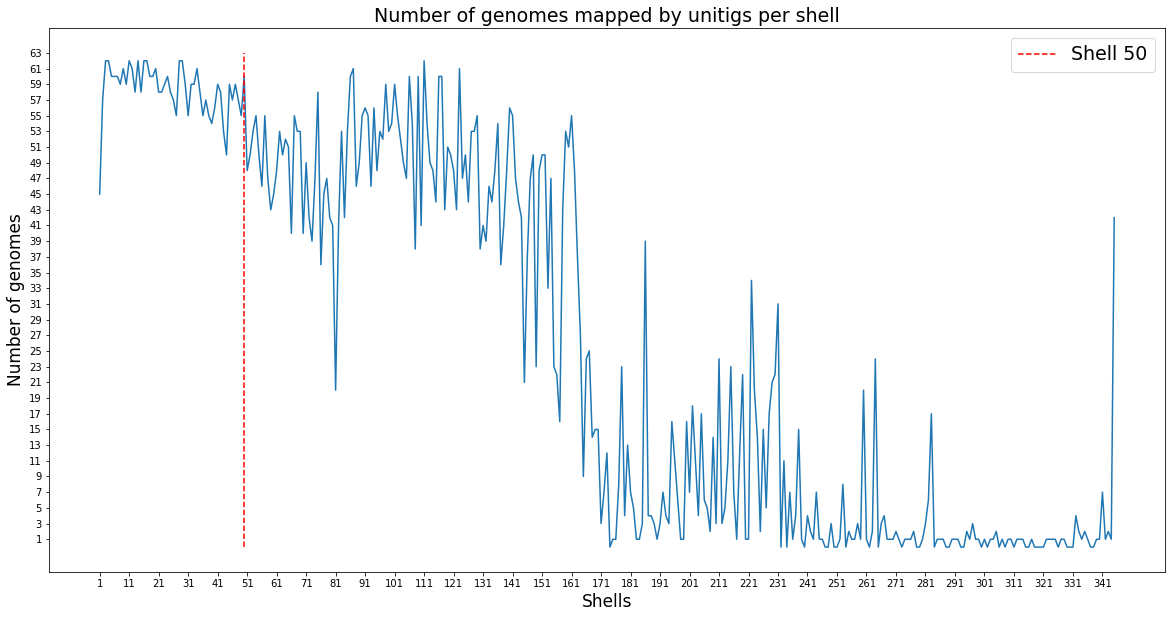

In [186]:
max_list = []
for i in range(1,len(unitigs_per_shell)+1):
    #tot = 0
    #count = 0
    #shell_hit  = [0]
    avg_ref_hit = 0
    set_ref = set()
    for u in unitigs_per_shell[i]:
        try:
            #print(u, len(
            unitig_org[u]
            #), sorted_d[u])
            #shell_hit.append(len(unitig_org[u]))
            for k in unitig_org[u]:
                set_ref.add(k)
            #tot+=1
        except:
            #count+=1
            pass
    max_list.append(len(set_ref))
    #counts.append((len(unitigs_per_shell[shell]),count, avg_ref_hit/tot))plt.
print(max_list[344])
plt.figure(figsize=(20,10))
plt.plot(range(1,len(unitigs_per_shell)+1), max_list)
plt.plot([50 for i in range(64)],range(64), '--r',label = "Shell 50")
plt.title("Number of genomes mapped by unitigs per shell", fontsize = 19)
plt.xlabel("Shells" , fontsize = 17)
plt.ylabel("Number of genomes", fontsize = 17)
plt.xticks(range(1,len(unitigs_per_shell)+1,10))
plt.yticks(range(1,65,2))
plt.legend(prop={'size': 19})
plt.show()
    

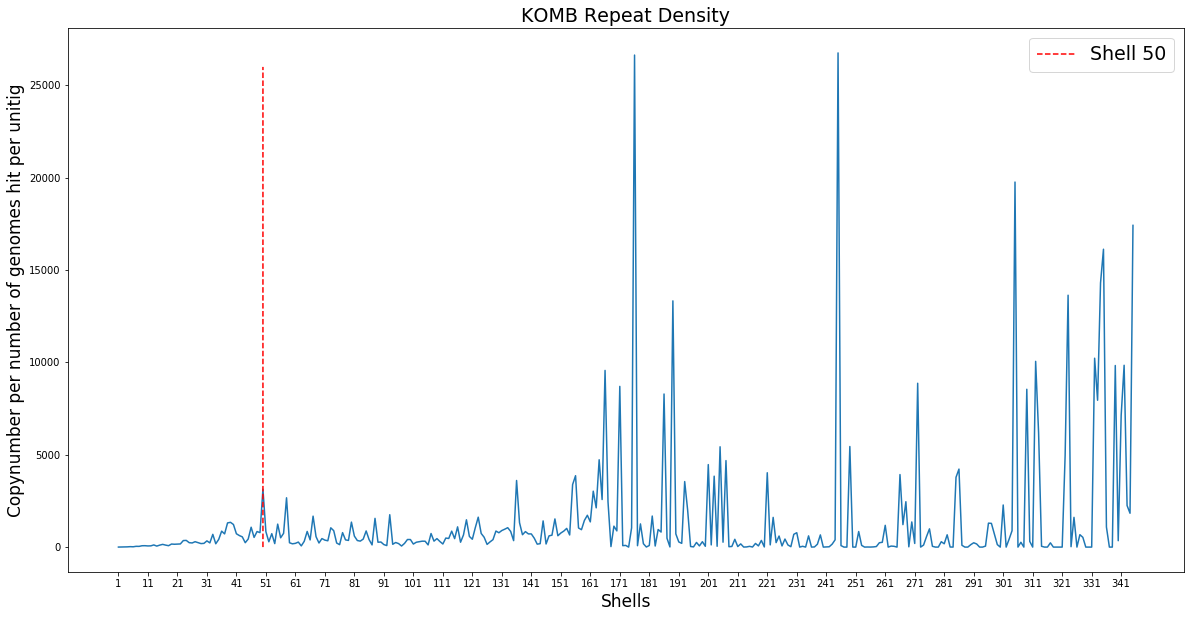

In [180]:
#Average Copy number per genome of each shell =  (Copynumber/genomes_hit by unitig)/Number of unitigs
metric = []
for i in range(1,len(unitigs_per_shell)+1):
    #tot = 0
    #count = 0
    sub_metric = []
    copy_num = 0
    for u in unitigs_per_shell[i]:   
        try:
            #print(u, len(
            unitig_org[u]
            #), sorted_d[u])
            copy_num = sum(list(unitig_org[u].values()))
            num_genomes = len(unitig_org[u])
            sub_metric.append(copy_num/num_genomes)
            #tot+=1
        except:
            #count+=1
            pass
    if unitigs_per_shell[i]:
        metric.append(sum(sub_metric)/len(unitigs_per_shell[i]))
    else:
        metric.append(0)
    #counts.append((len(unitigs_per_shell[shell]),count, avg_ref_hit/tot))plt.
plt.figure(figsize=(20,10))
plt.plot(range(1,len(unitigs_per_shell)+1), metric)
plt.plot([50 for i in range(26000)],range(26000), '--r',label = "Shell 50")
plt.title("KOMB Repeat Density", fontsize = 19)
plt.ylabel("Copynumber per number of genomes hit per unitig" , fontsize = 17)
plt.xlabel("Shells", fontsize = 17)
plt.xticks(range(1,len(unitigs_per_shell)+1,10))
plt.legend(prop={'size': 19})
plt.show()

### Shakya -c 50 -l 50 ( -c 25 - 25 picks repeats with greater length diversity)

In [134]:
with open('../Data/unitig_rep_count_dict_50.pkl', 'rb') as handle:
    unitig_rep_count_dict = pickle.load(handle)
unitig_rep_count_dict_corrected  = dict()
for unitig  in list(unitig_rep_count_dict.keys()):
    if str(unitig) in label_change:
        #pred_unitigs_label_corrected.append(int(label_change[str(unitig)]))
        unitig_rep_count_dict_corrected[int(label_change[str(unitig)])] = unitig_rep_count_dict[unitig]

#for unitig in unitig_rep_count_dict_corrected:
#    print(unitig, len(unitig_rep_count_dict_corrected[unitig]))

In [135]:
unitig_org = dict()
for unitig in unitig_rep_count_dict_corrected:
    temp_dict = defaultdict(int)
    for key in unitig_rep_count_dict_corrected[unitig]:
        temp_dict[acc_dict[key]] += unitig_rep_count_dict_corrected[unitig][key]
    unitig_org[unitig] = temp_dict

In [136]:
counts = []
shells = [101, 136, 264, 283, 345]
for shell in shells:
    tot = 0
    count = 0
    avg_ref_hit = 0
    for u in unitigs_per_shell[shell]:
        try:
            print(u, len(unitig_org[u]), sorted_d[u])
            avg_ref_hit += len(unitig_org[u])
            tot+=1
        except:
            count+=1
            pass
    counts.append((len(unitigs_per_shell[shell]),count, avg_ref_hit/tot))
print(counts)

188 2 174
208 15 84
232 6 64
332 22 273
1098 32 254
1099 39 326
2182 30 185
3143 1 4
4210 22 123
4835 28 486
5271 2 110
5711 28 486
5753 31 500
6080 1 57
6655 1 18
6764 2 191
6971 1 246
7005 35 450
8443 1 105
8607 29 490
9256 12 262
9629 1 126
9790 9 70
9890 26 451
12496 1 91
13005 36 507
13247 32 470
13944 24 159
14502 1 4
15177 35 450
15183 35 450
16015 32 484
16065 39 528
16287 28 486
16288 28 486
16923 14 148
17123 36 442
17453 34 450
17609 19 128
17789 42 528
18114 1 3
18171 26 226
18295 1 14
18296 35 509
18751 1 143
19194 35 450
19326 35 450
19327 36 456
19328 35 450
19982 42 528
20023 32 254
20606 1 8
21227 1 85
21338 8 64
21641 6 20
22286 1 142
22355 27 412
22899 24 394
23144 1 57
23173 2 197
23776 5 56
23882 30 428
24408 1 166
24847 38 518
25509 24 184
25750 30 464
26074 7 54
26236 24 184
27104 14 298
27187 1 34
27682 18 110
28117 1 100
28425 30 236
29137 9 70
29138 32 496
30213 36 456
30657 34 453
31258 28 238
31589 1 87
31791 32 496
31974 28 421
32164 1 13
32260 26 226
32360

32313 1 210
32405 1 232
32557 1 74
32717 1 6
32799 1 203
33010 1 124
33230 1 17
33926 1 206
34076 1 138
34384 1 2
34452 1 206
34639 1 27
35397 1 145
35643 1 204
35755 1 303
35784 2 335
36318 1 220
36505 1 211
36642 1 114
36649 1 216
37505 1 28
37521 1 206
37610 1 206
37806 1 156
37849 1 209
38118 1 4
38383 1 186
38626 1 30
38767 1 208
39131 1 203
39314 1 142
39340 1 180
39384 1 142
39436 1 15
39767 1 186
39790 1 68
40152 1 213
41092 1 363
41216 1 349
41356 1 32
42008 1 139
42225 1 213
42755 1 244
42923 1 255
43468 1 286
43590 1 205
43756 1 220
43854 1 210
43898 1 213
44337 1 105
44427 1 245
44460 1 181
45604 1 187
45643 2 521
45793 1 209
46090 1 208
46288 1 213
46289 16 254
46443 1 215
46473 1 192
46717 1 512
46740 1 146
47170 1 19
47520 1 104
47727 1 208
47784 1 232
47926 1 223
48152 1 283
48304 1 11
48314 1 151
48695 1 205
48865 1 176
48914 1 5
49131 1 244
49865 1 204
50136 1 234
50169 1 169
50242 3 281
50289 1 14
50633 1 215
51370 1 365
51507 1 209
51945 2 1293
51988 1 3
52198 1 12


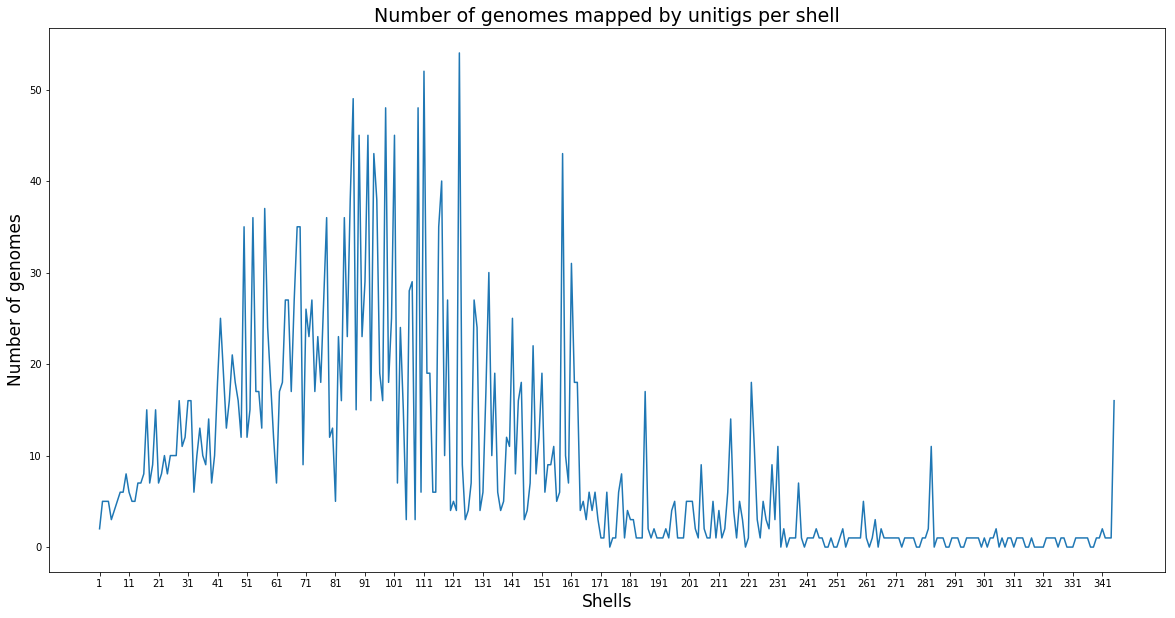

In [137]:
max_list = []
for i in range(1,len(unitigs_per_shell)+1):
    #tot = 0
    #count = 0
    shell_hit  = [0]
    avg_ref_hit = 0
    for u in unitigs_per_shell[i]:
        try:
            #print(u, len(
            unitig_org[u]
            #), sorted_d[u])
            shell_hit.append(len(unitig_org[u]))
            #tot+=1
        except:
            #count+=1
            pass
    max_list.append(max(shell_hit))
    #counts.append((len(unitigs_per_shell[shell]),count, avg_ref_hit/tot))plt.
plt.figure(figsize=(20,10))
plt.plot(range(1,len(unitigs_per_shell)+1), max_list)
plt.title("Number of genomes mapped by unitigs per shell", fontsize = 19)
plt.xlabel("Shells" , fontsize = 17)
plt.ylabel("Number of genomes", fontsize = 17)
plt.xticks(range(1,len(unitigs_per_shell)+1,10))
plt.show()

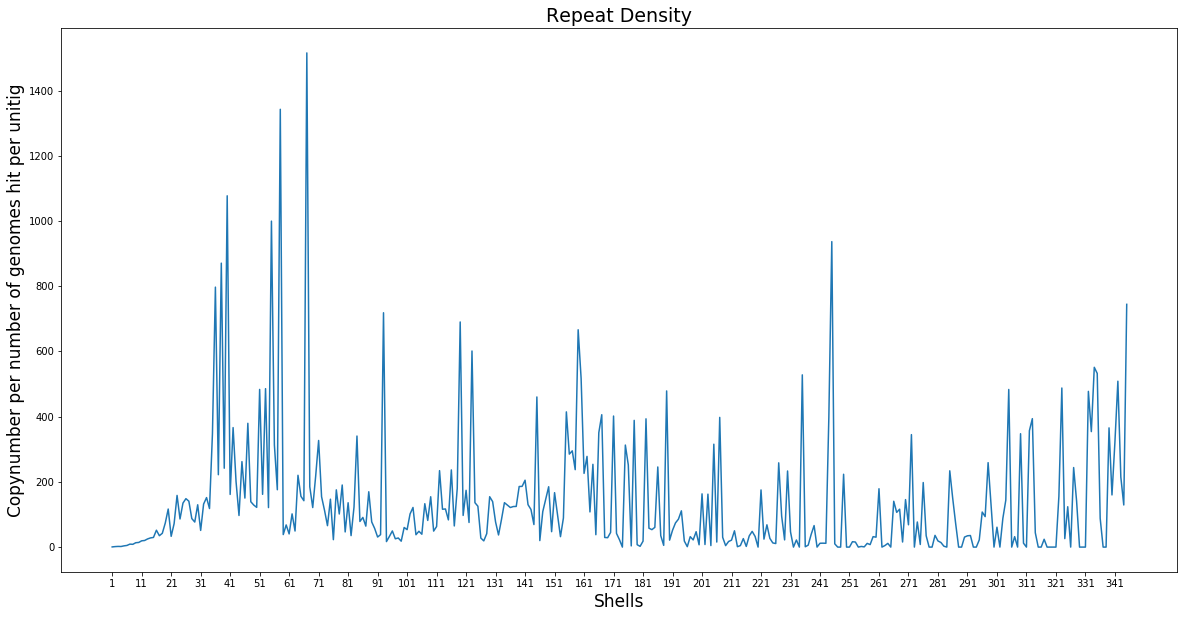

In [141]:
#Average Copy number per genome of each shell =  (Copynumber/genomes_hit by unitig)/Number of unitigs
metric = []
for i in range(1,len(unitigs_per_shell)+1):
    #tot = 0
    #count = 0
    sub_metric = []
    for u in unitigs_per_shell[i]:   
        try:
            #print(u, len(
            unitig_org[u]
            #), sorted_d[u])
            copy_num = sum(list(unitig_org[u].values()))
            num_genomes = len(unitig_org[u])
            sub_metric.append(copy_num/num_genomes)
            #tot+=1
        except:
            #count+=1
            pass
    if unitigs_per_shell[i]:
        metric.append(sum(sub_metric)/len(unitigs_per_shell[i]))
    else:
        metric.append(0)
    #counts.append((len(unitigs_per_shell[shell]),count, avg_ref_hit/tot))plt.
plt.figure(figsize=(20,10))
plt.plot(range(1,len(unitigs_per_shell)+1), metric)
plt.title("Repeat Density", fontsize = 19)
plt.ylabel("Copynumber per number of genomes hit per unitig" , fontsize = 17)
plt.xlabel("Shells", fontsize = 17)
plt.xticks(range(1,len(unitigs_per_shell)+1,10))
plt.show()